- Julia Noriko 
- Murilo Holtz Foltran

# Projeto 03 - Propagação em Rede

Nesse projeto, foi simulada uma rede aleatória (ER) com grau médio 4 e sua propagação dentre mais de 100 vértices. 

In [ ]:
import numpy as np
import matplotlib.pyplot as plt



---


## Simulação 01 - Geração da Rede

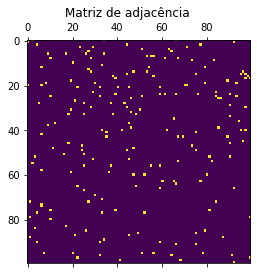

In [ ]:
#Parâmetros do grafo
N=100       #Número de vértices
grauMedio=4 #Grau médio
a = grauMedio*N//2 #número de arestas

matriz = np.zeros((N,N), dtype=int)

numeroArestas=0
while (numeroArestas <= a):
  vertice1 = np.random.randint(0, N)
  vertice2 = np.random.randint(0, N)
  matriz[vertice1, vertice2] = 1
  numeroArestas+=1


plt.matshow(matriz)
plt.suptitle('Matriz de adjacência')
plt.show()

Matriz de adjacência gerada com grau médio 4 e de forma aleatória.

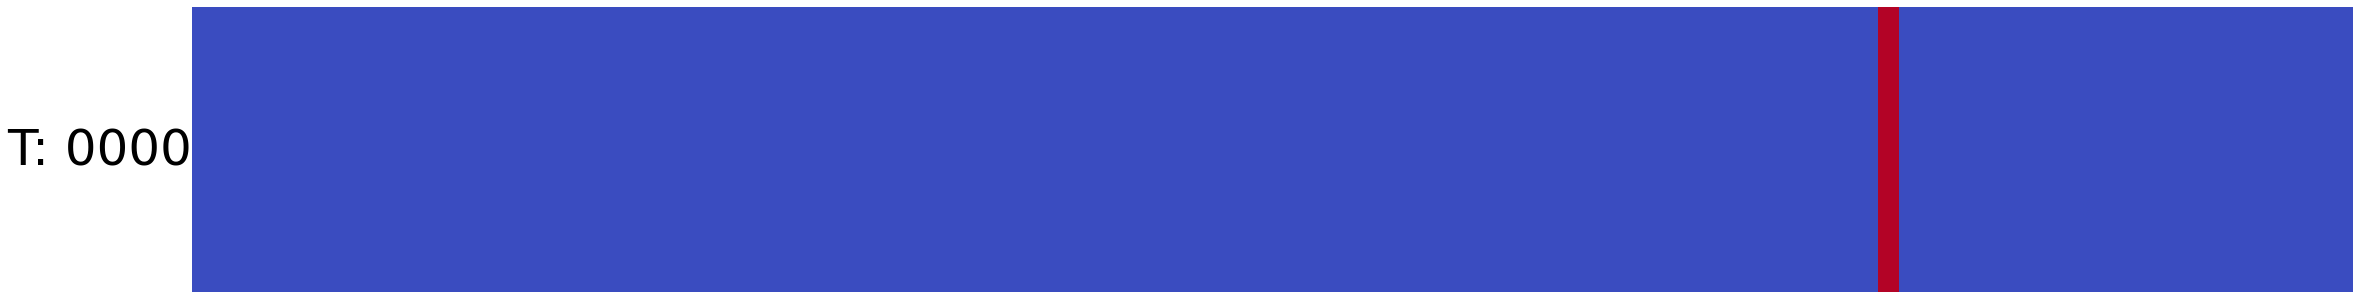

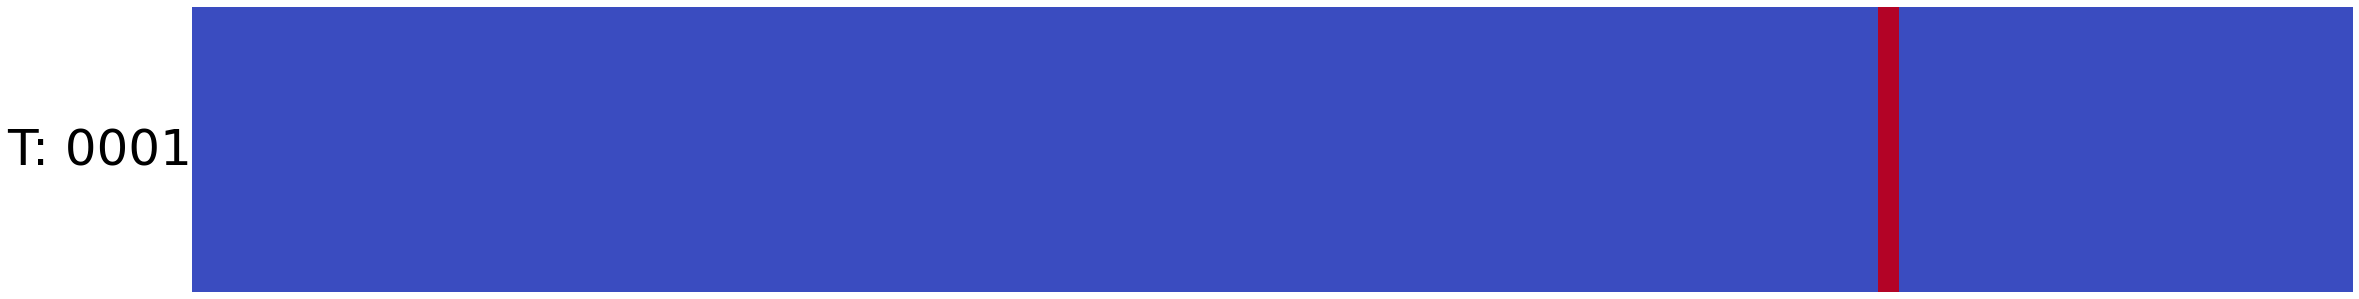

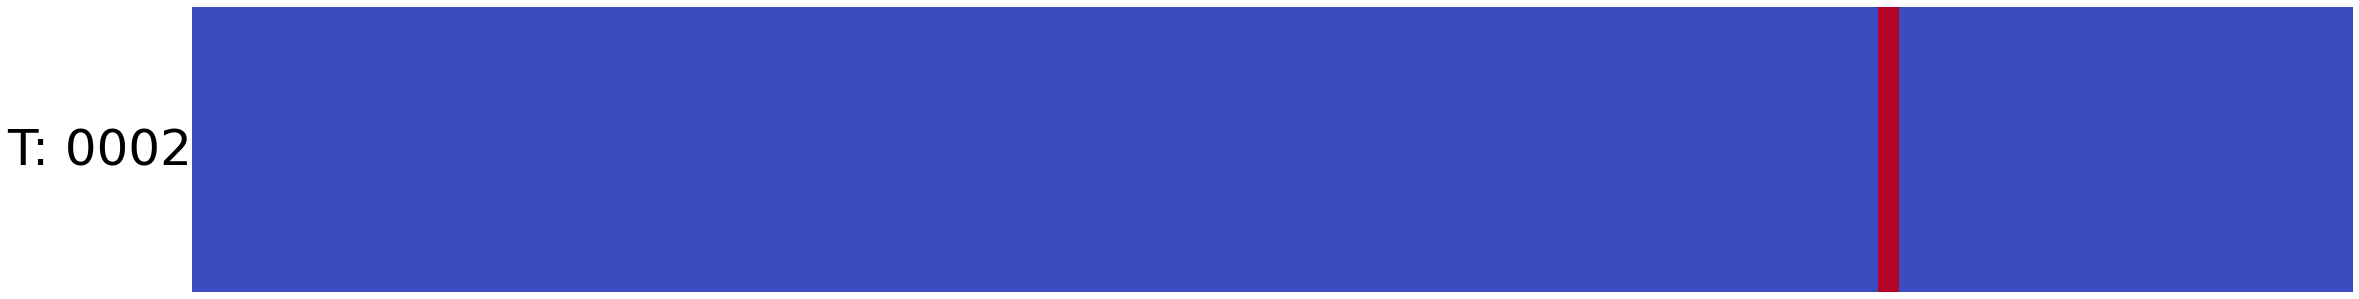

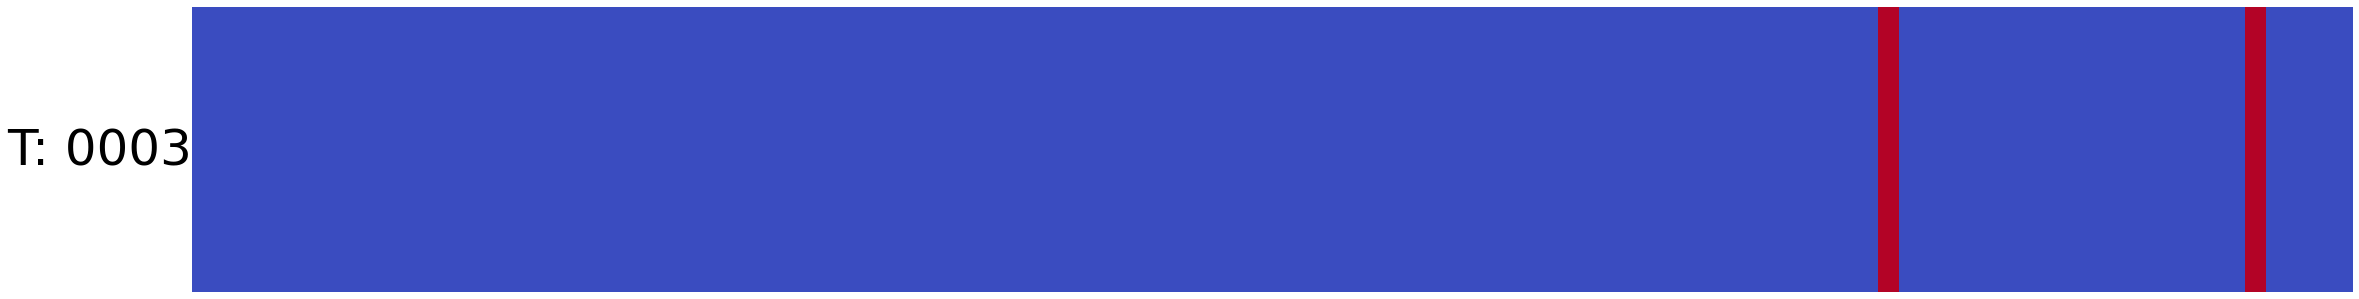

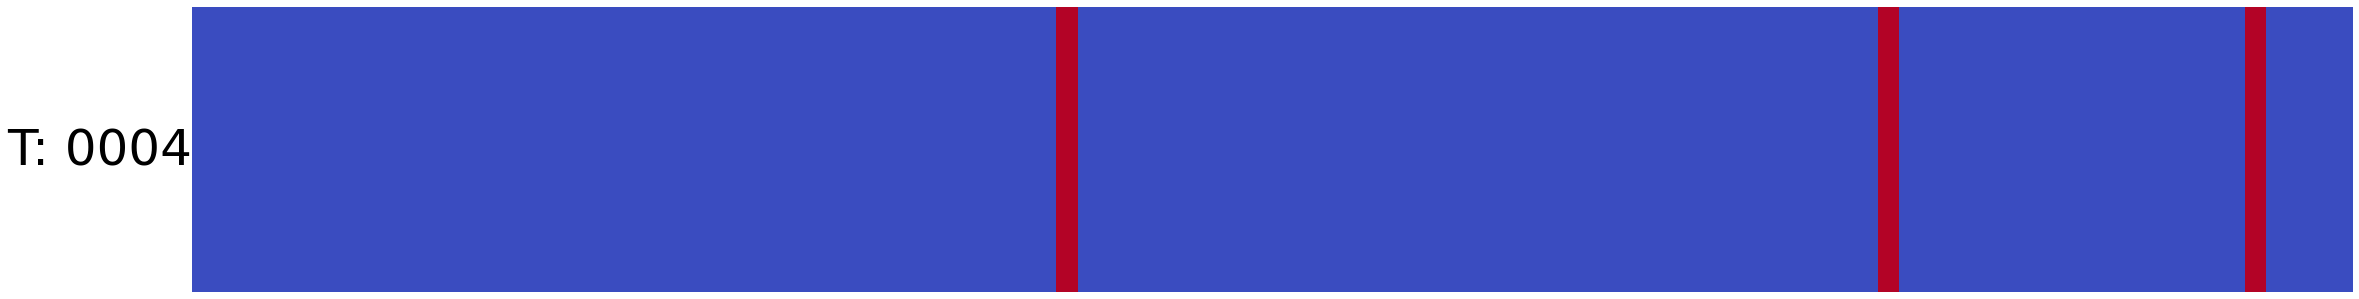

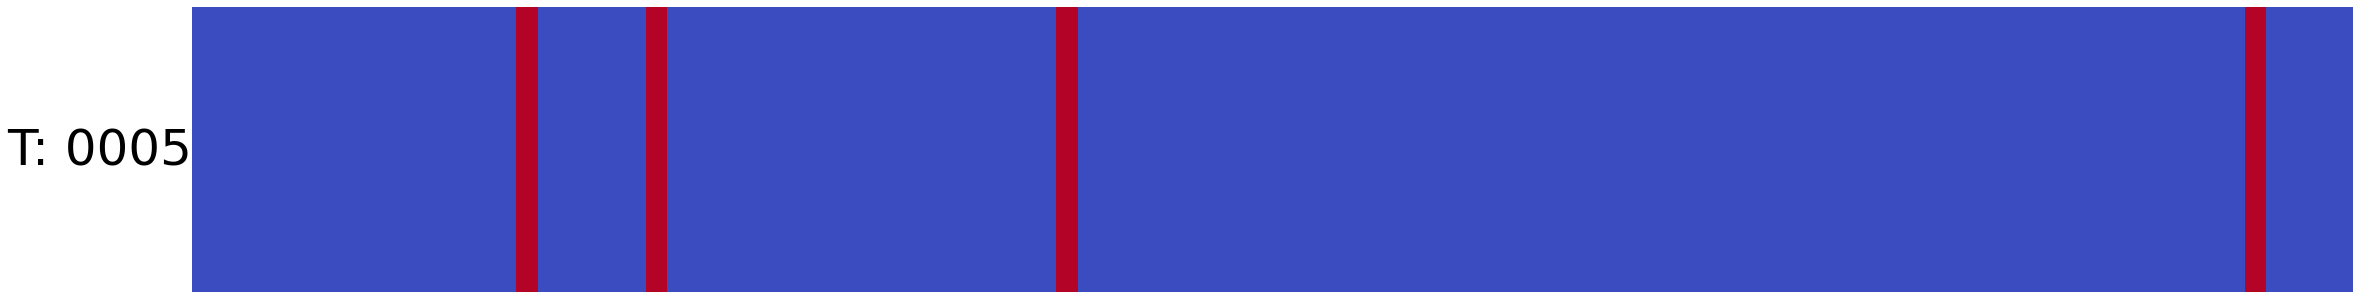

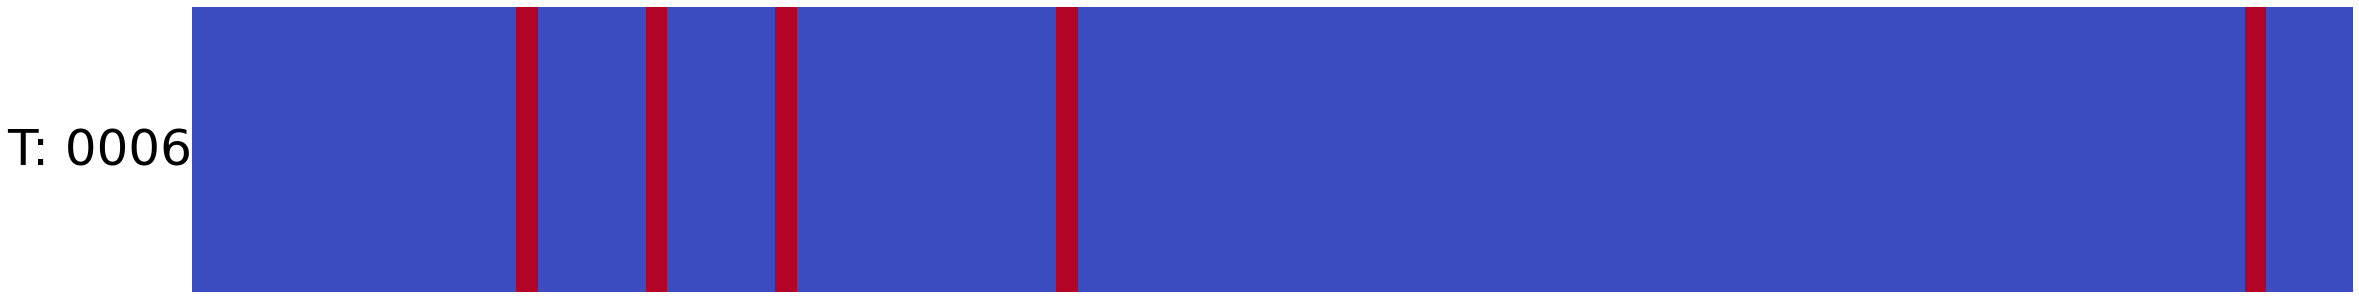

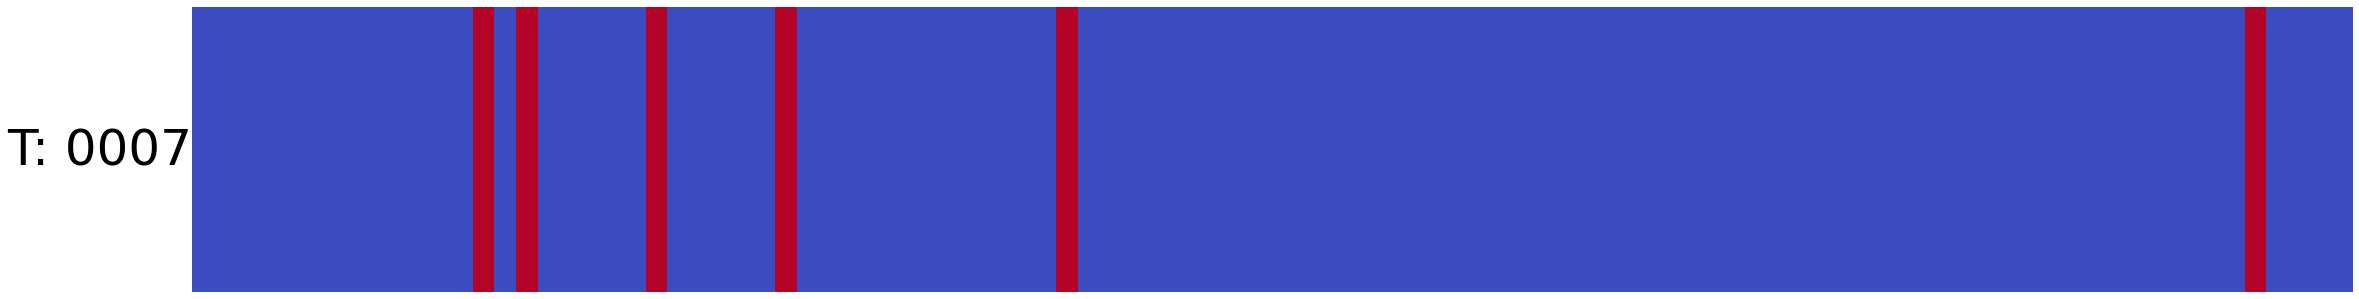

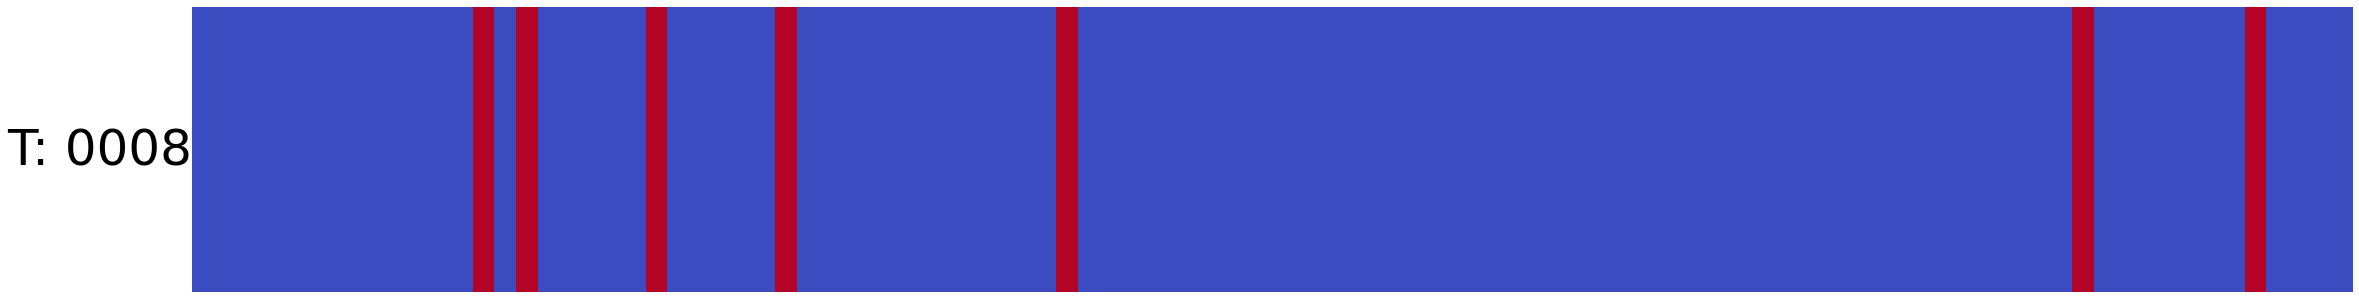

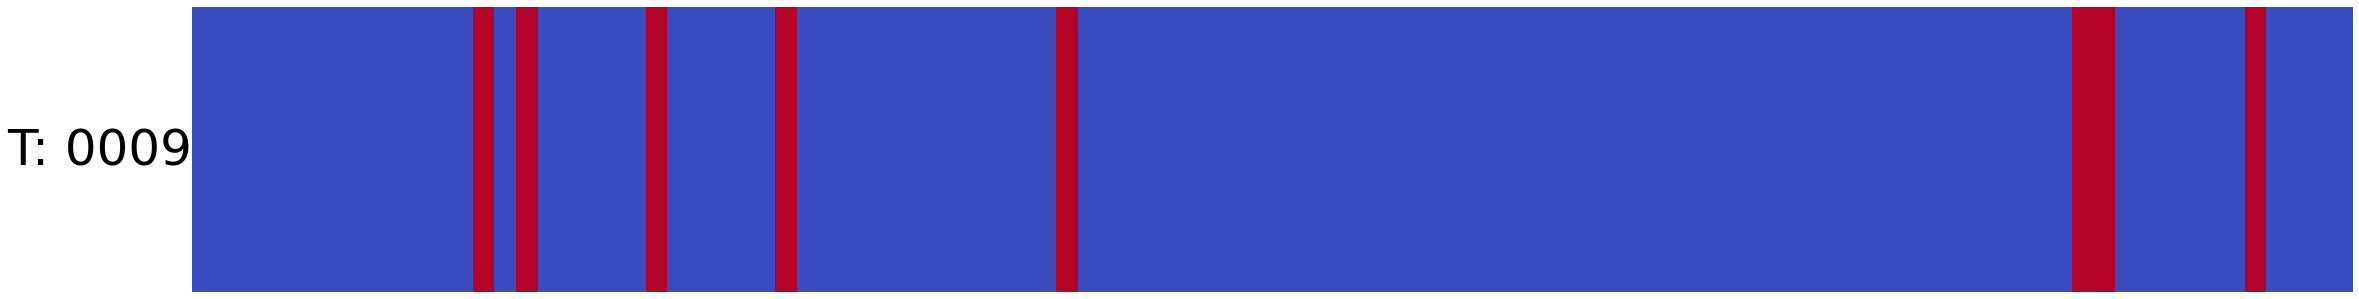

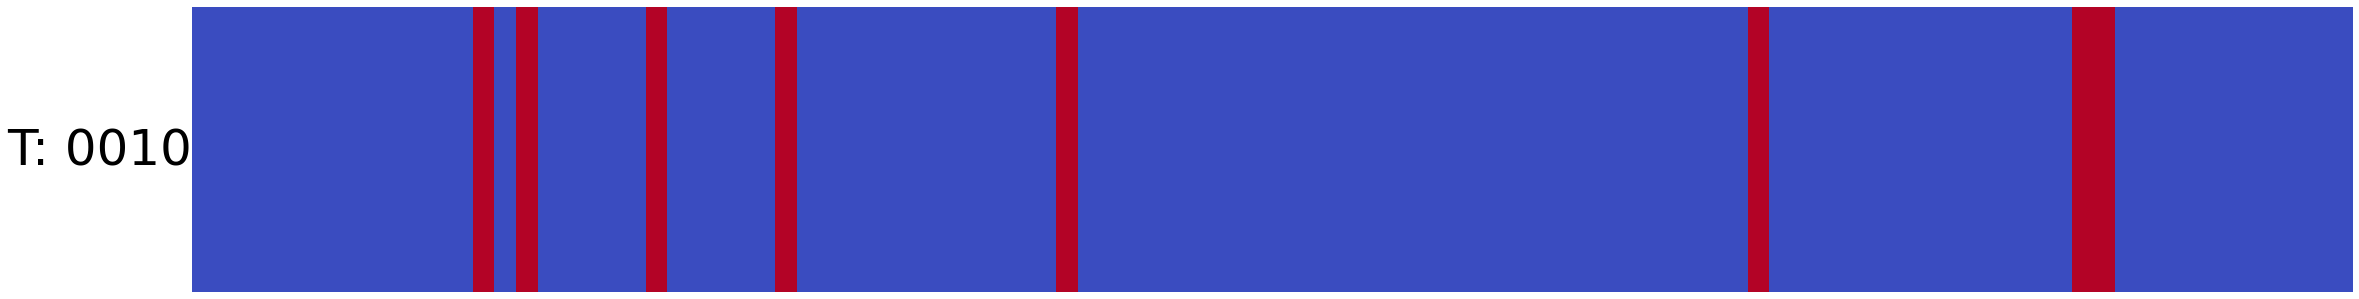

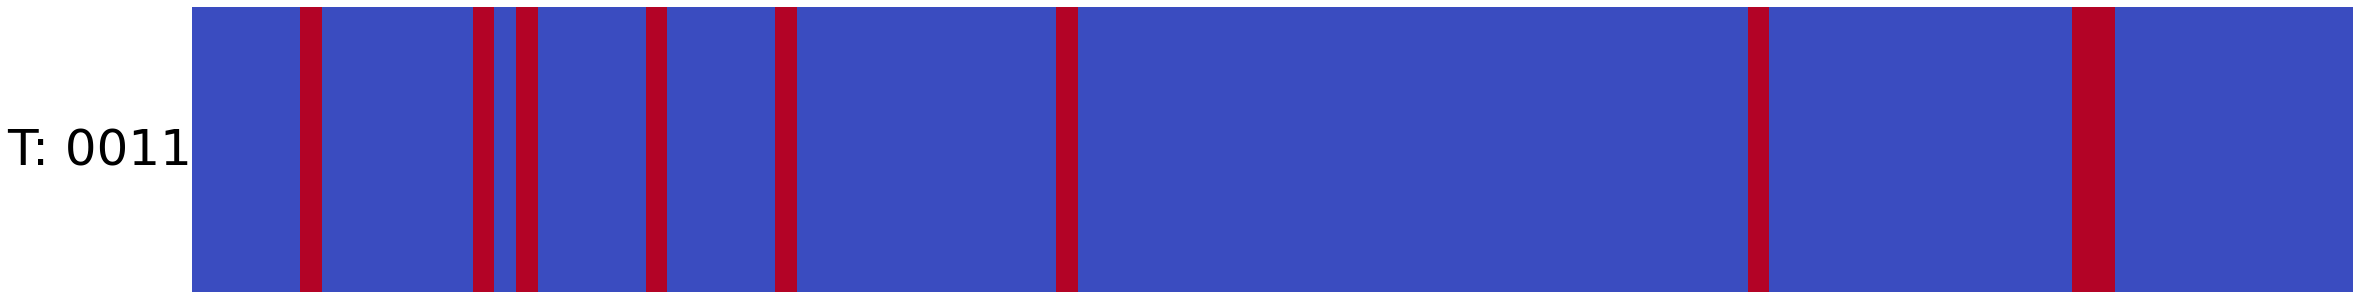

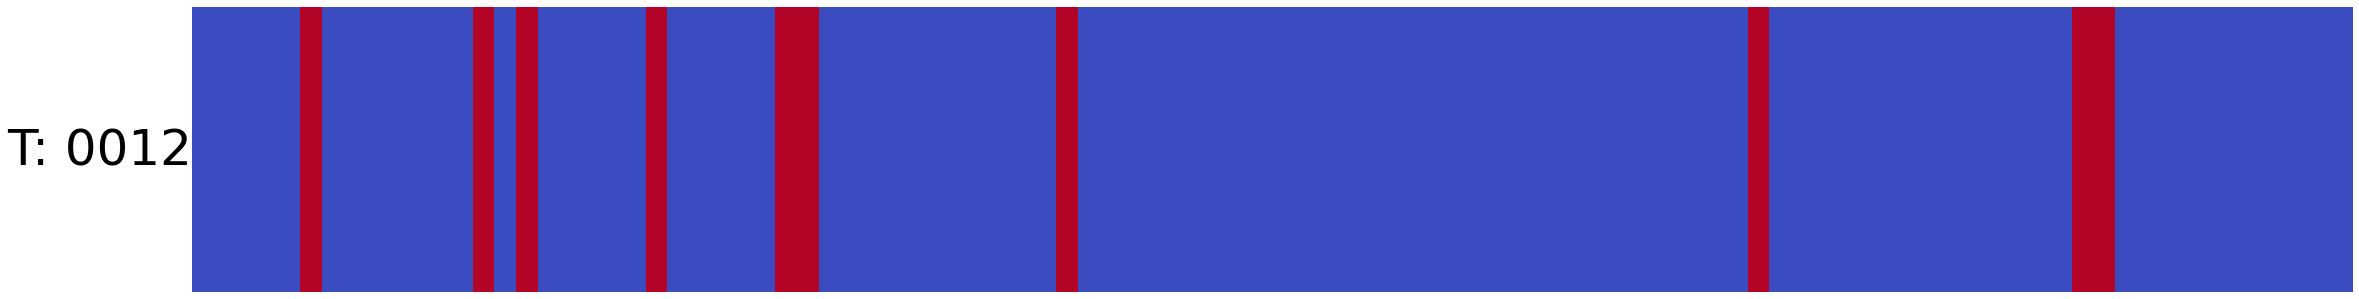

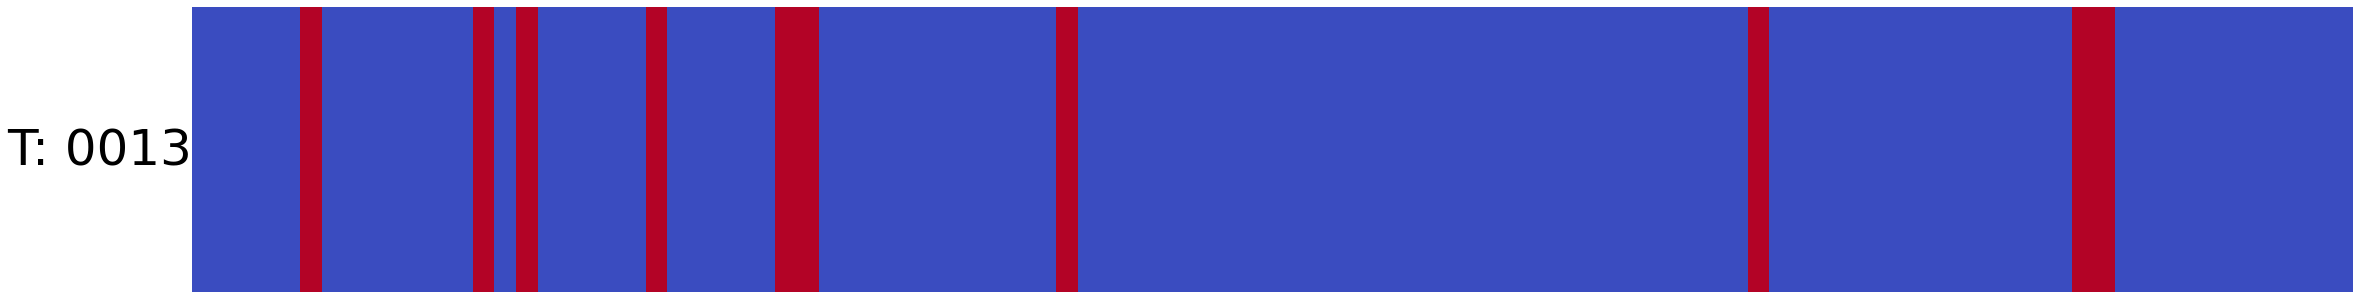

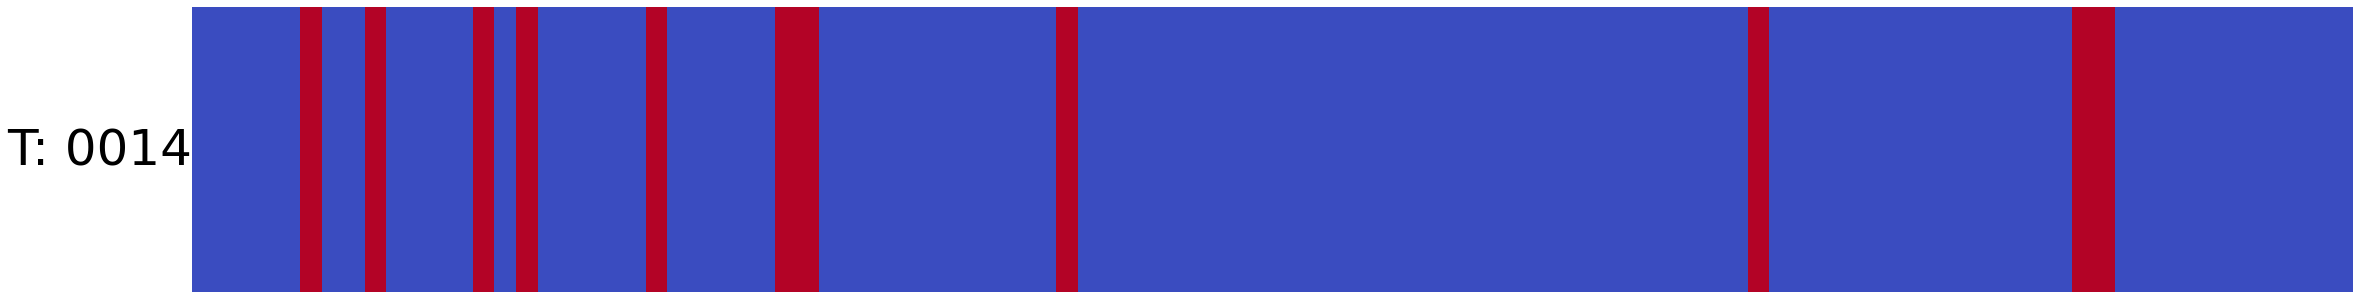

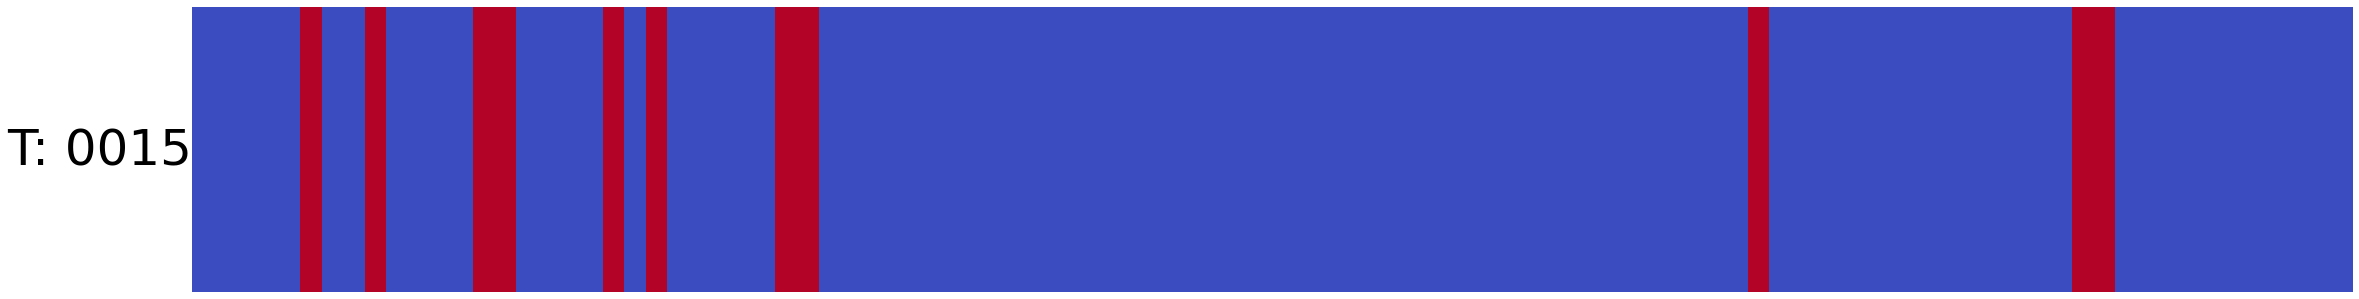

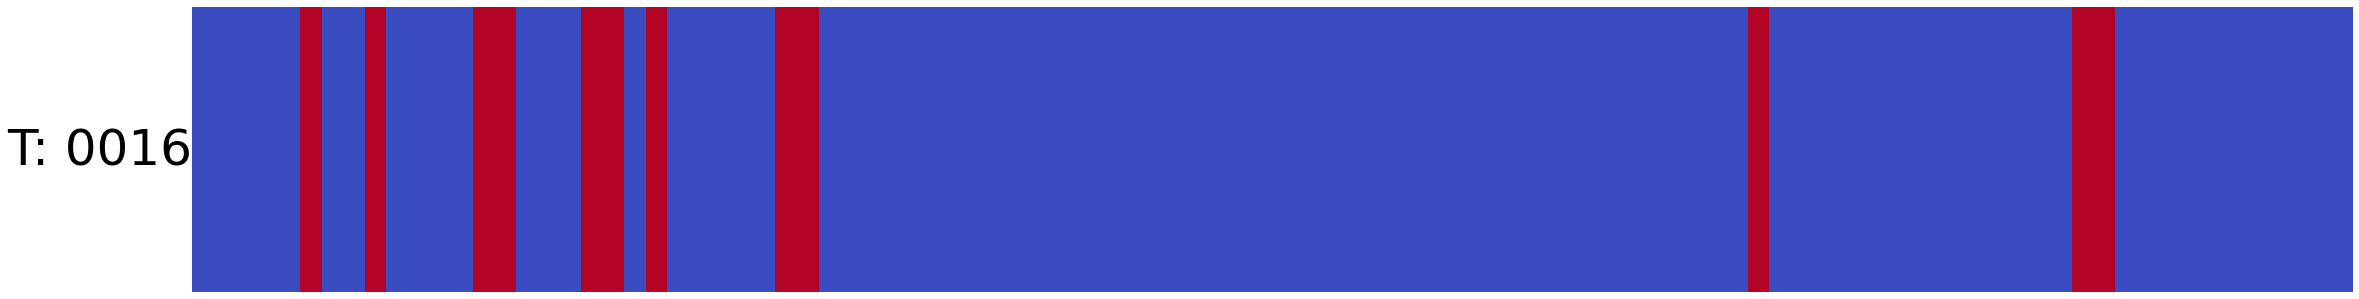

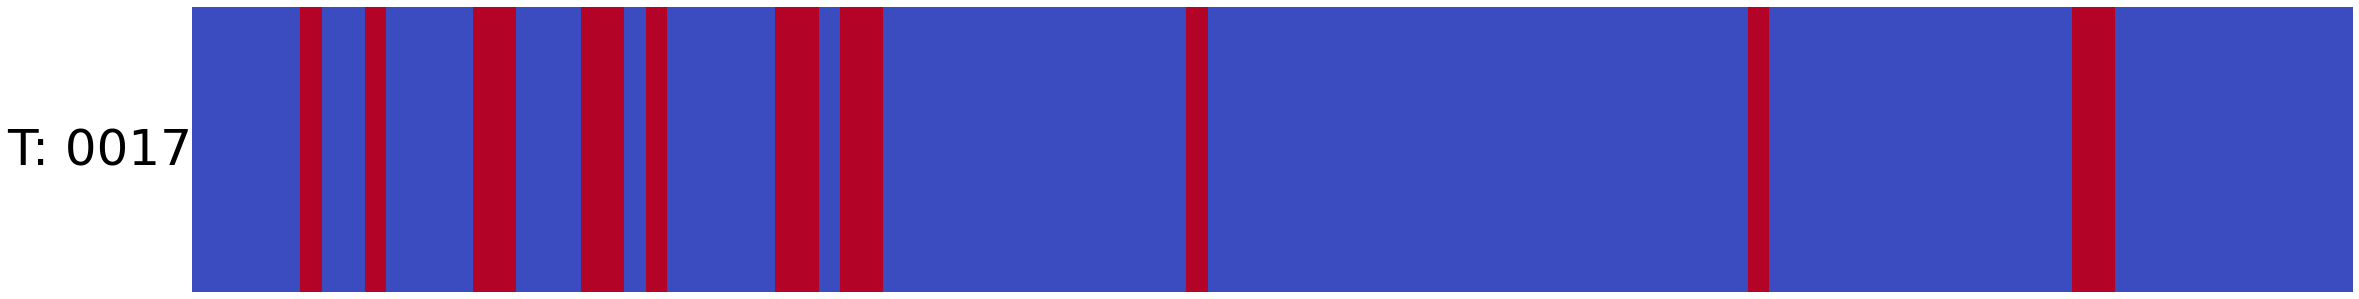

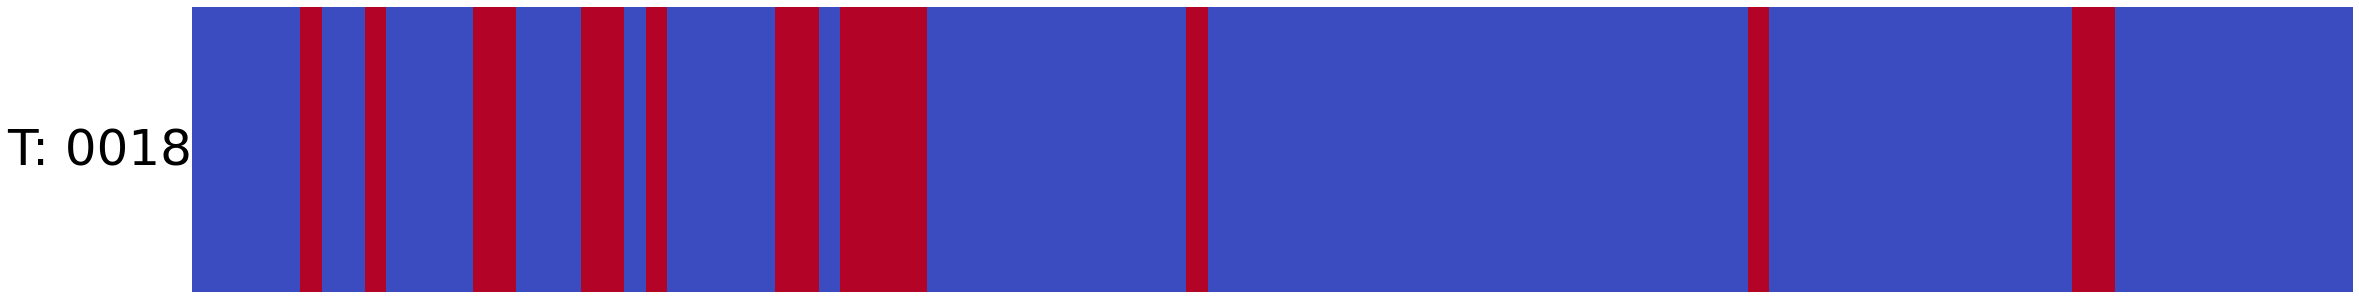

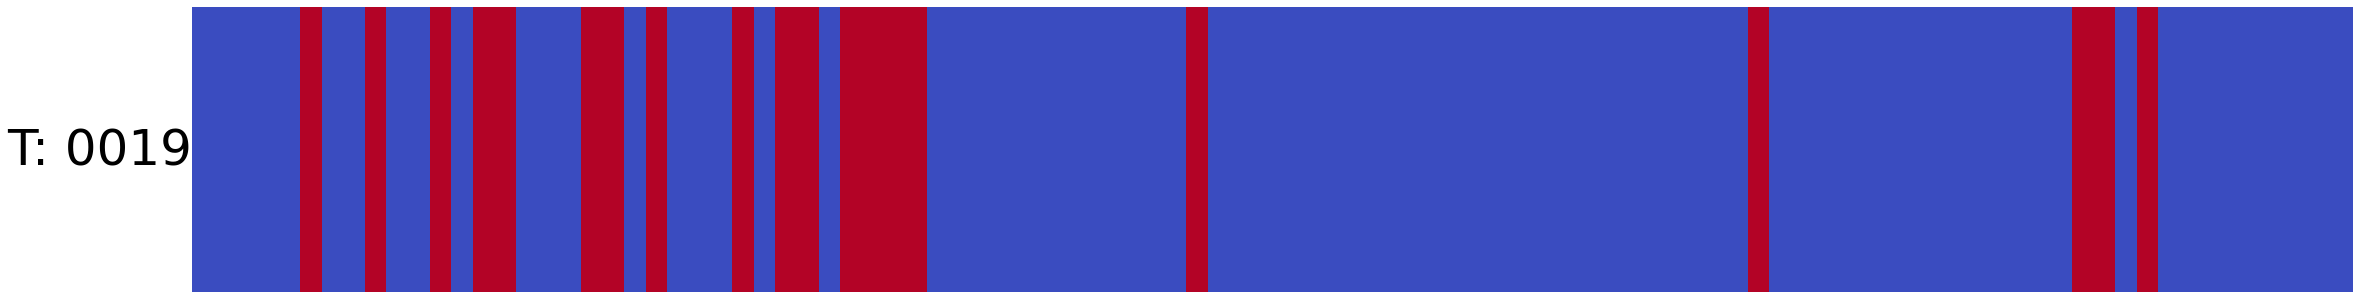

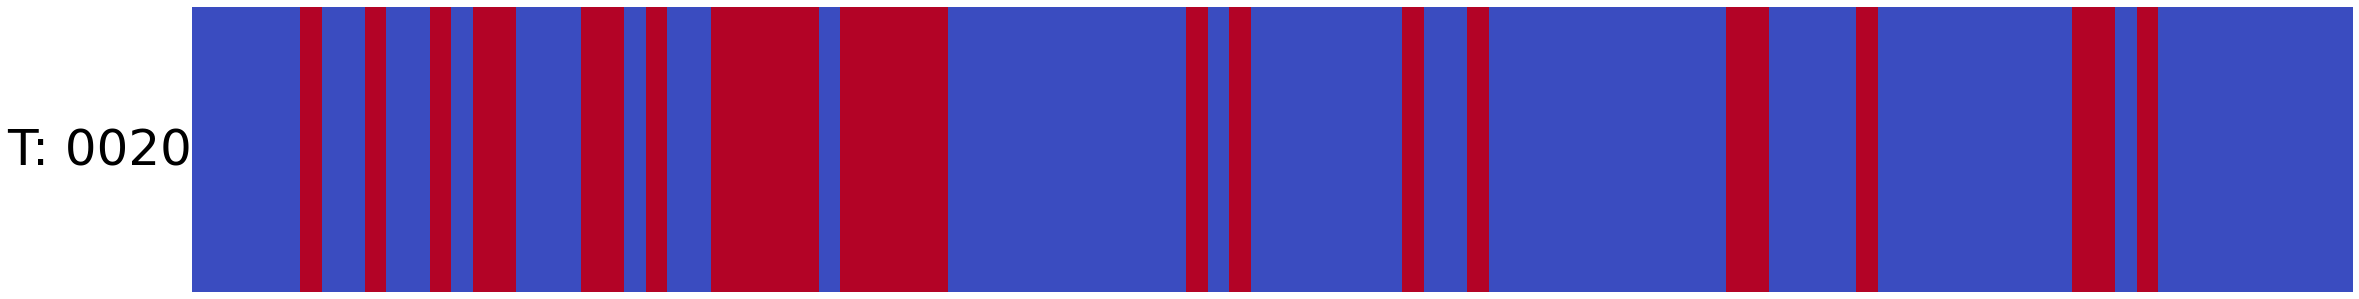

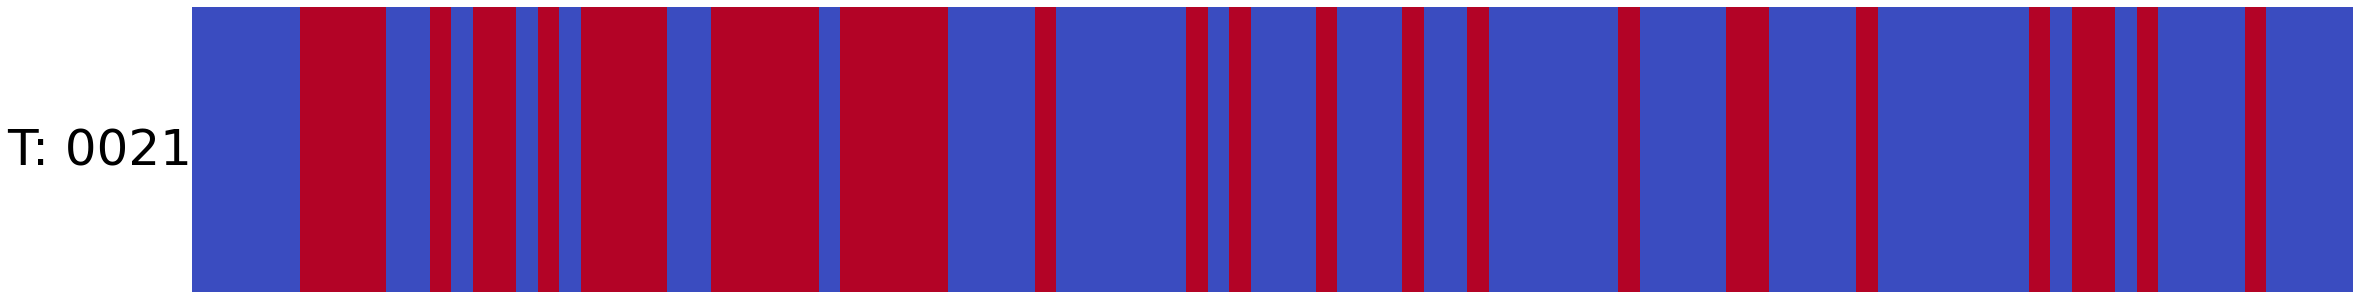

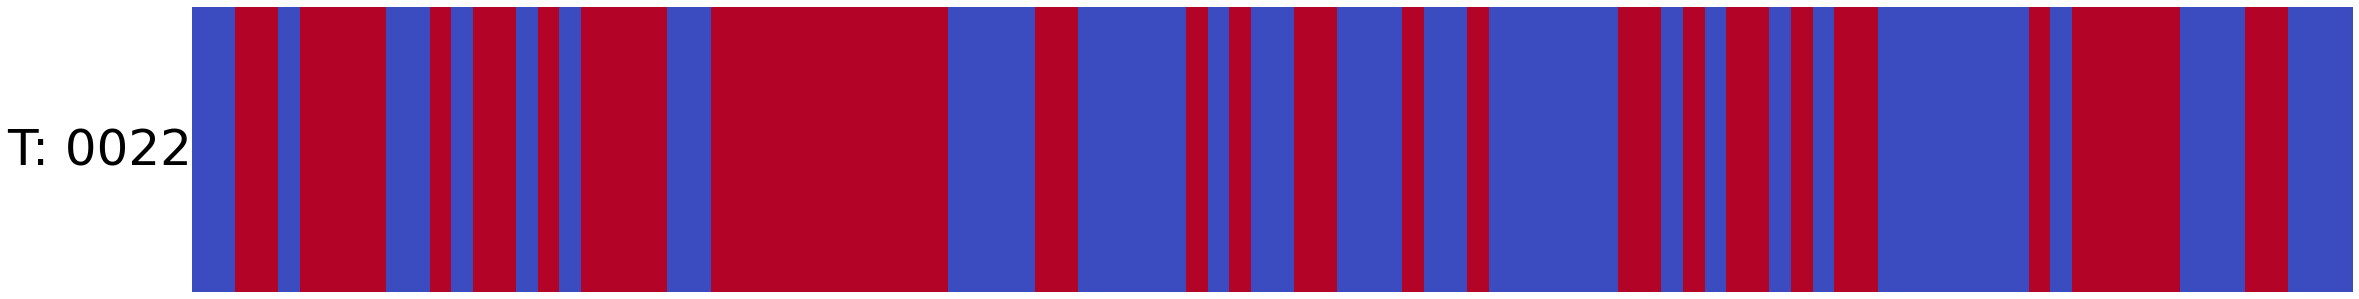

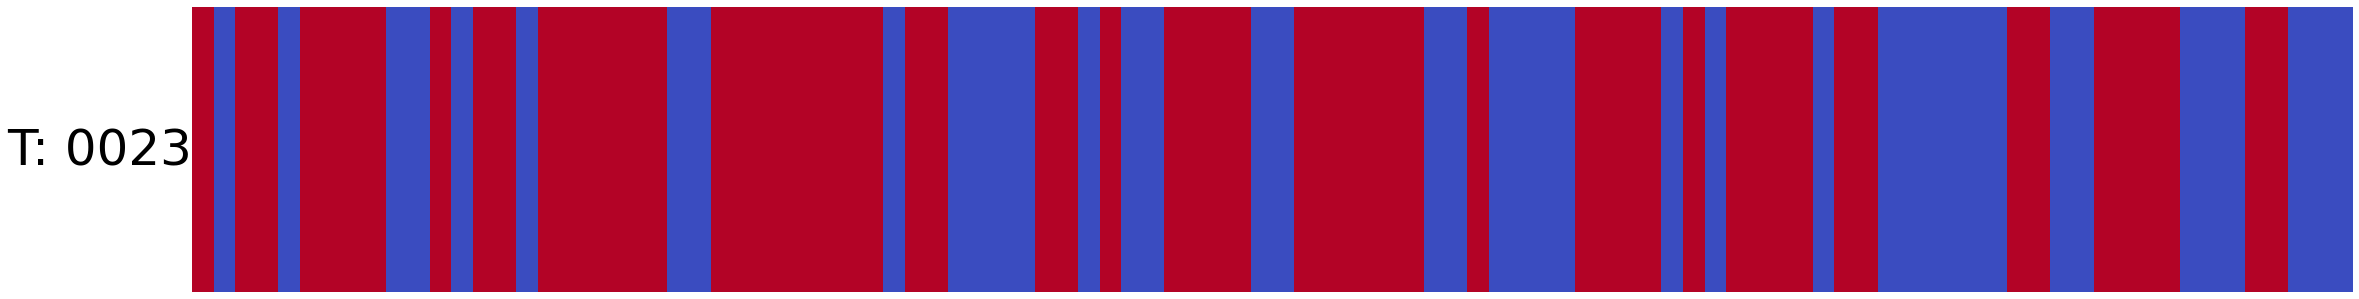

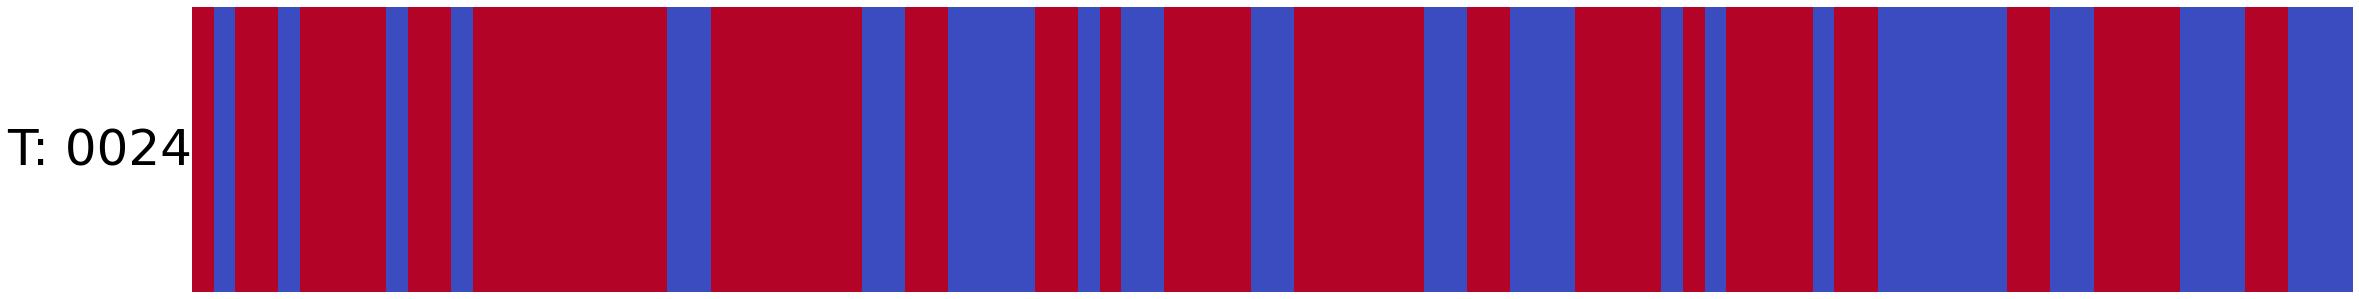

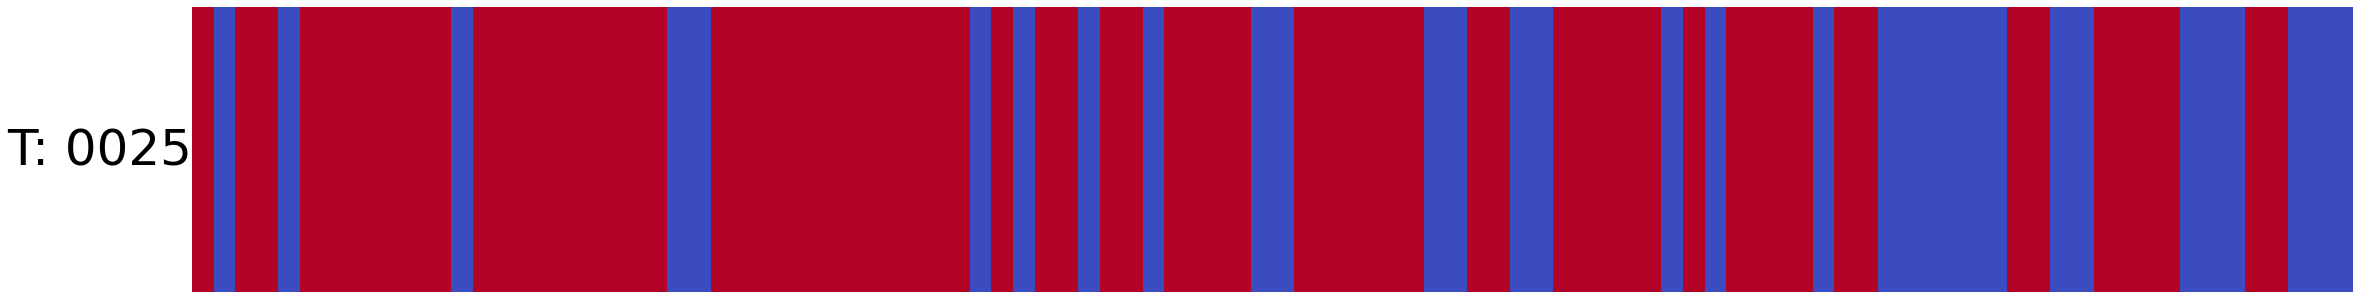

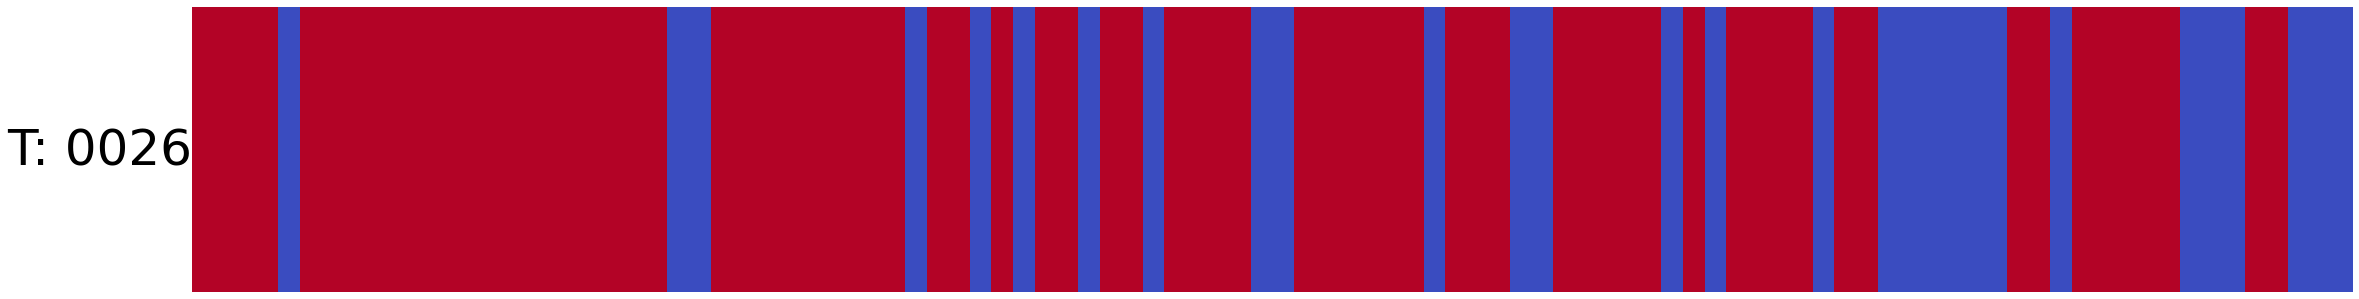

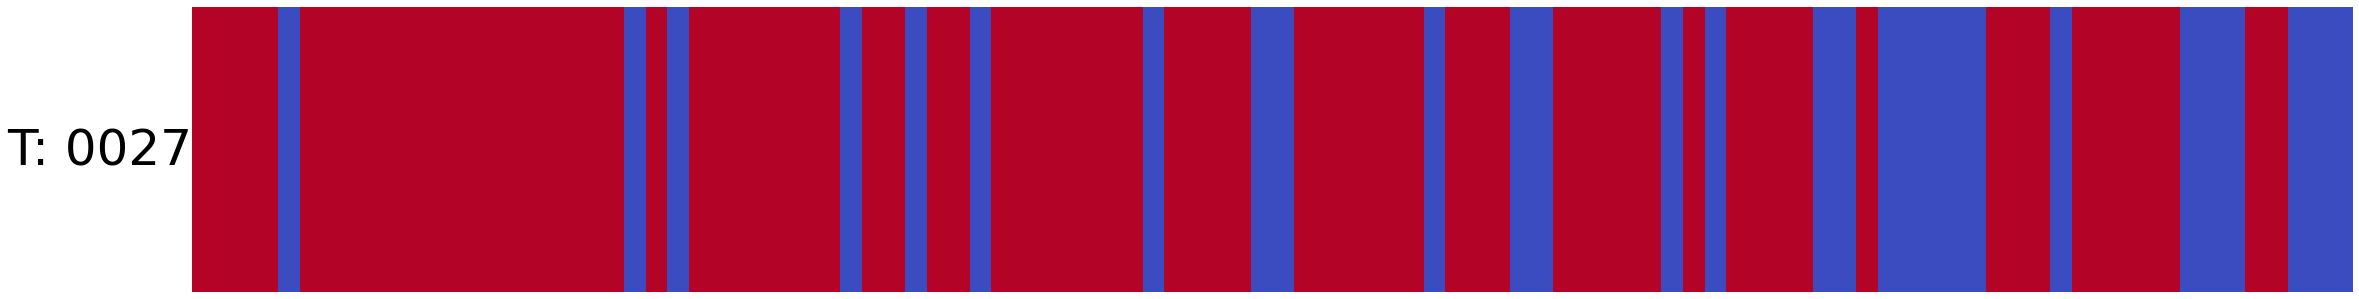

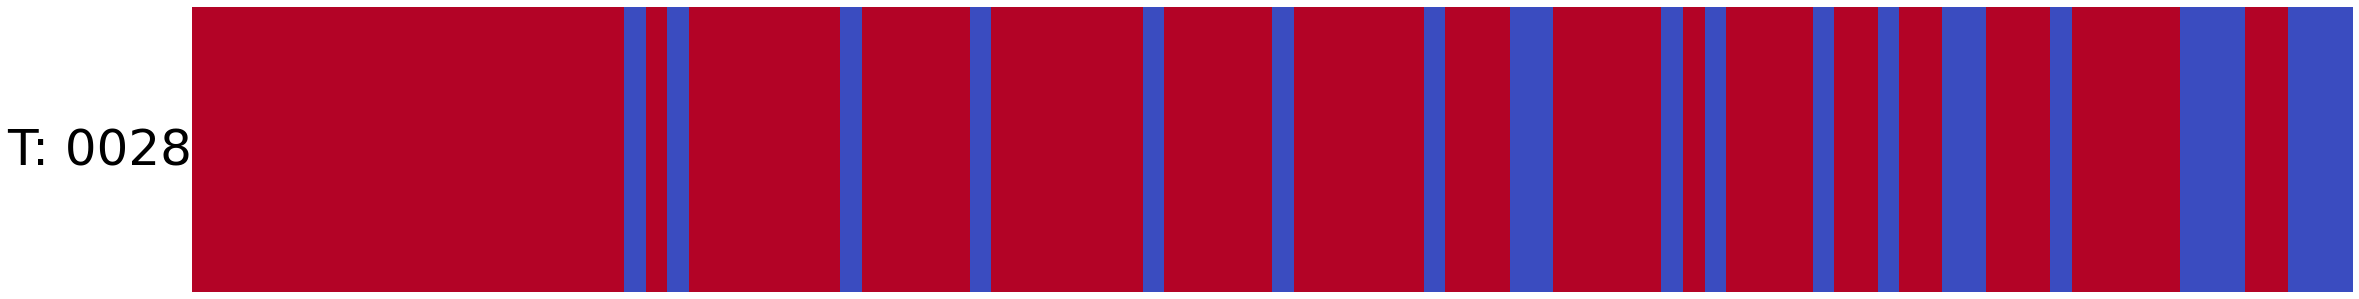

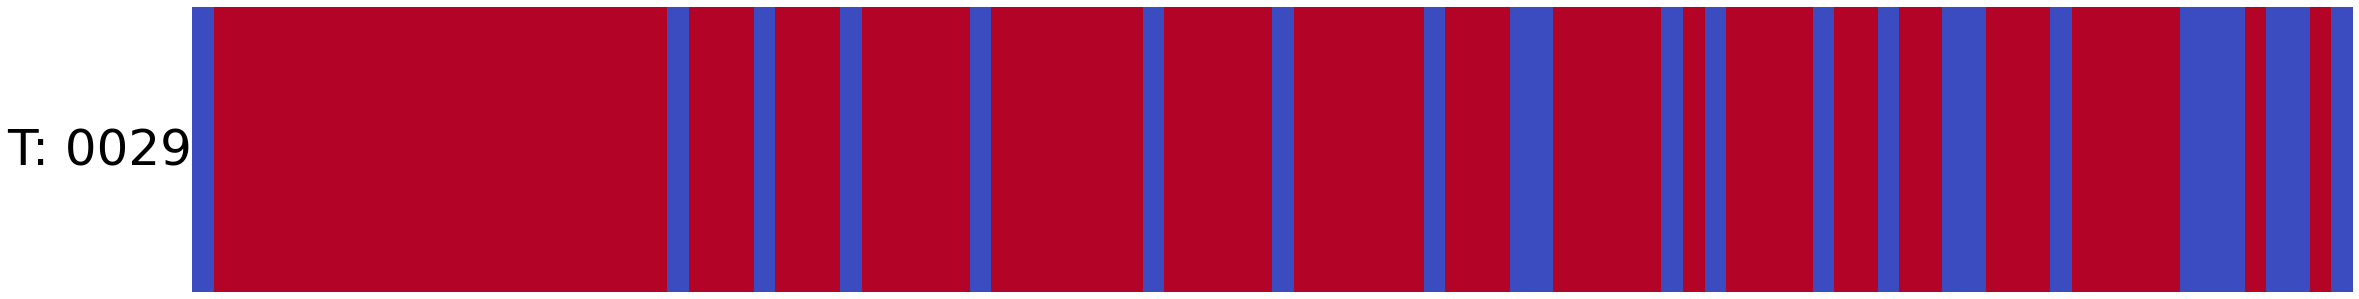

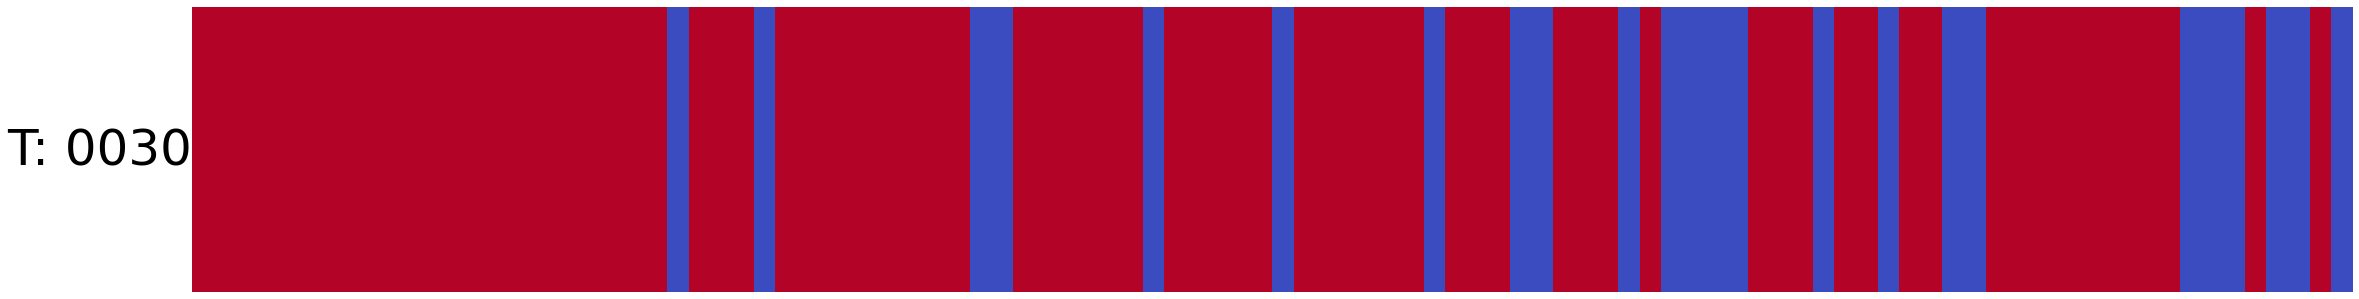

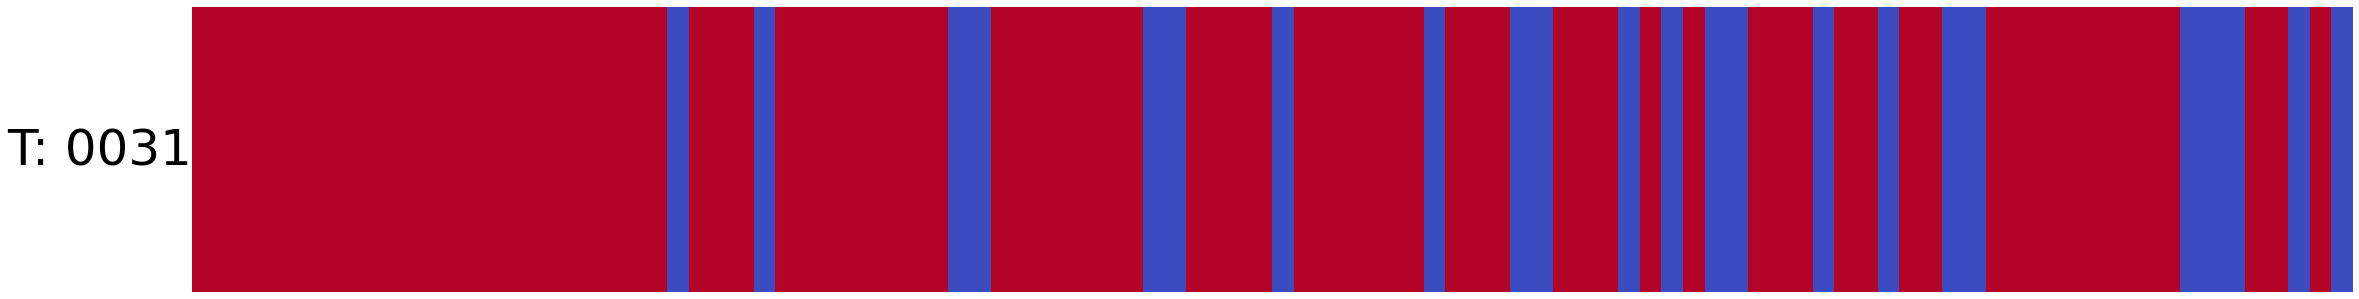

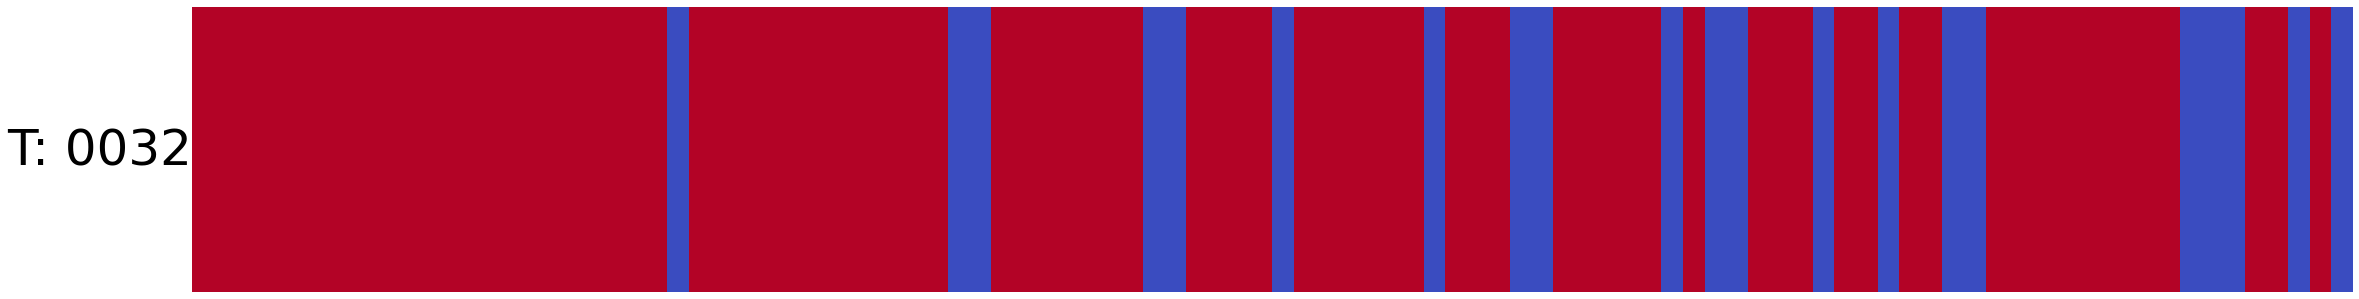

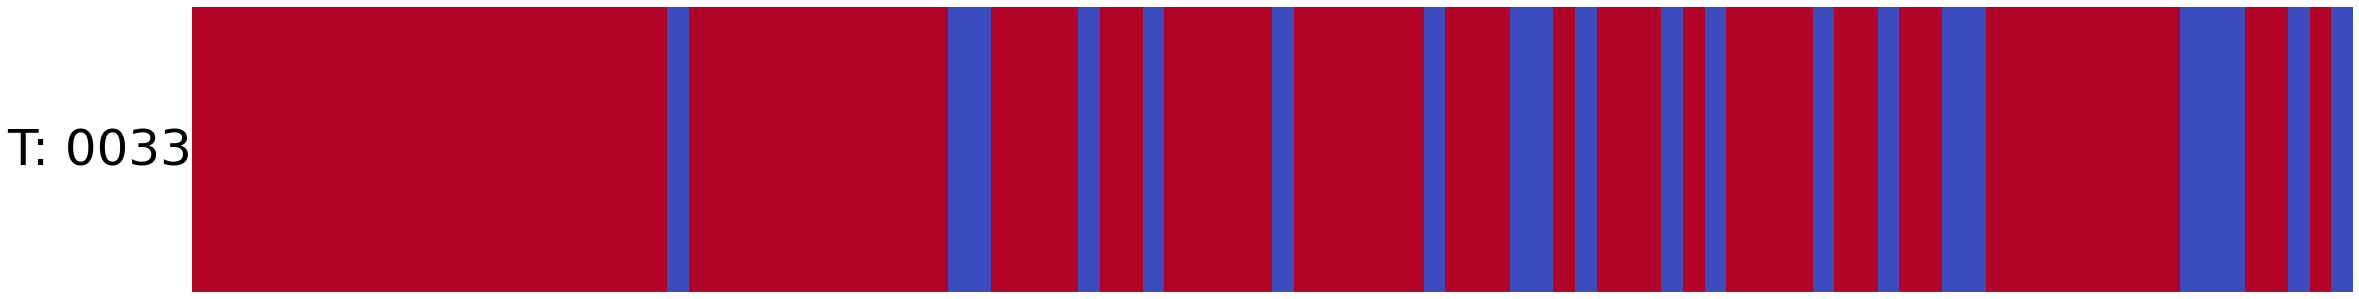

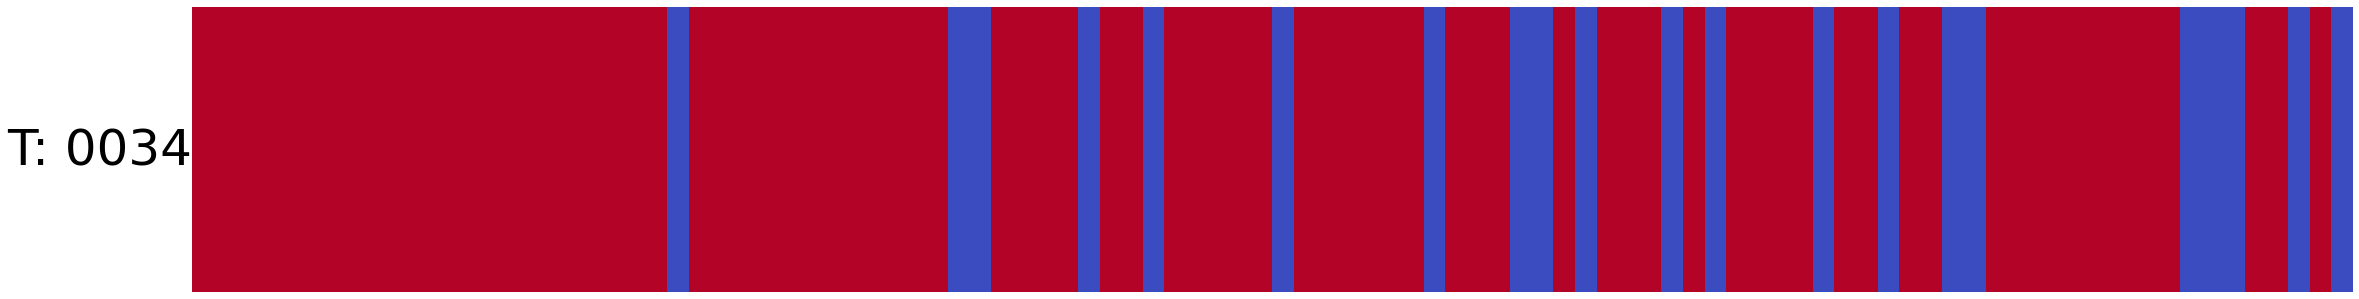

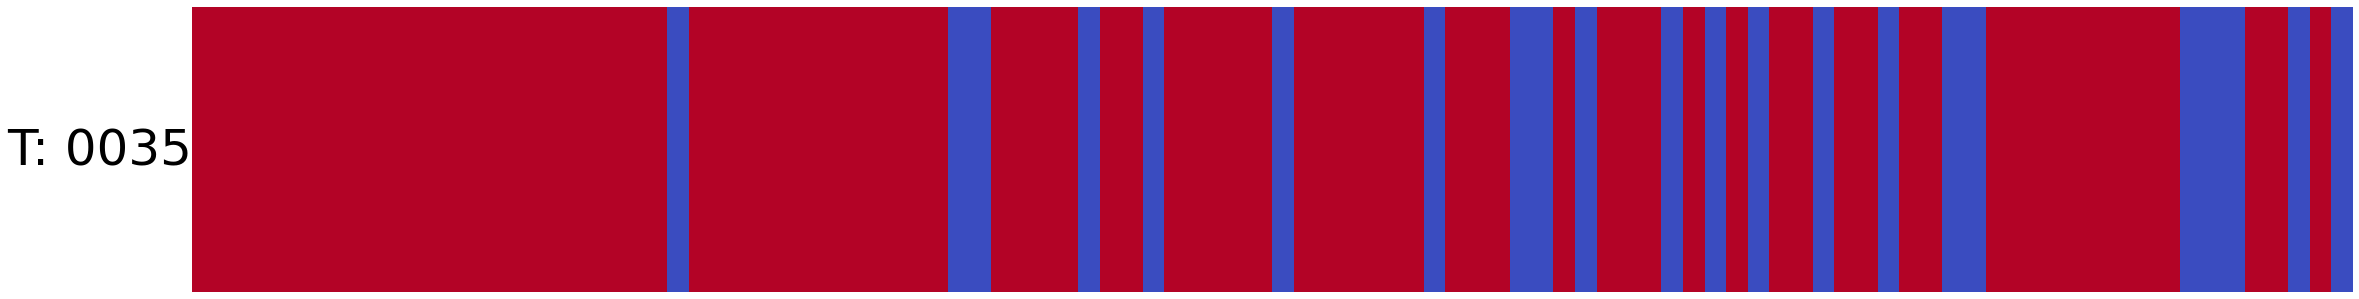

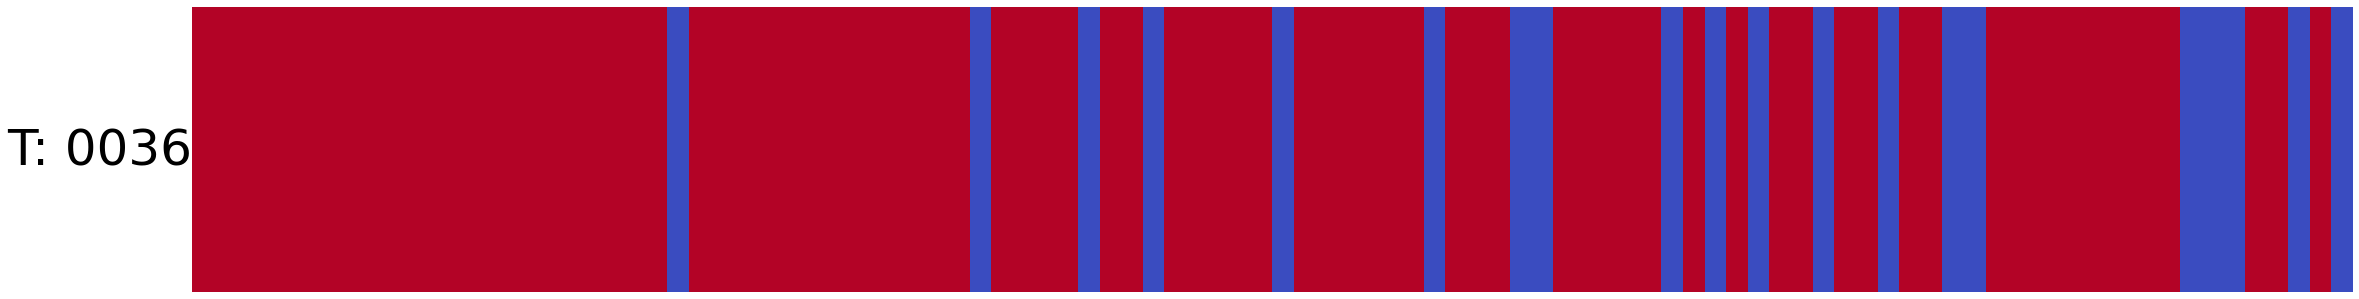

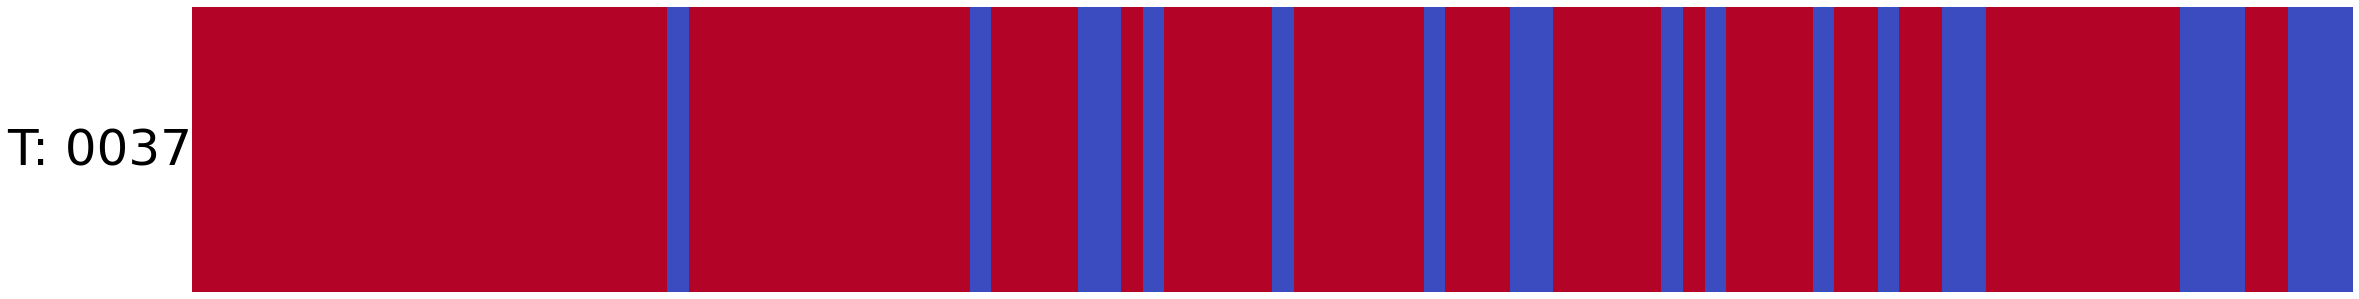

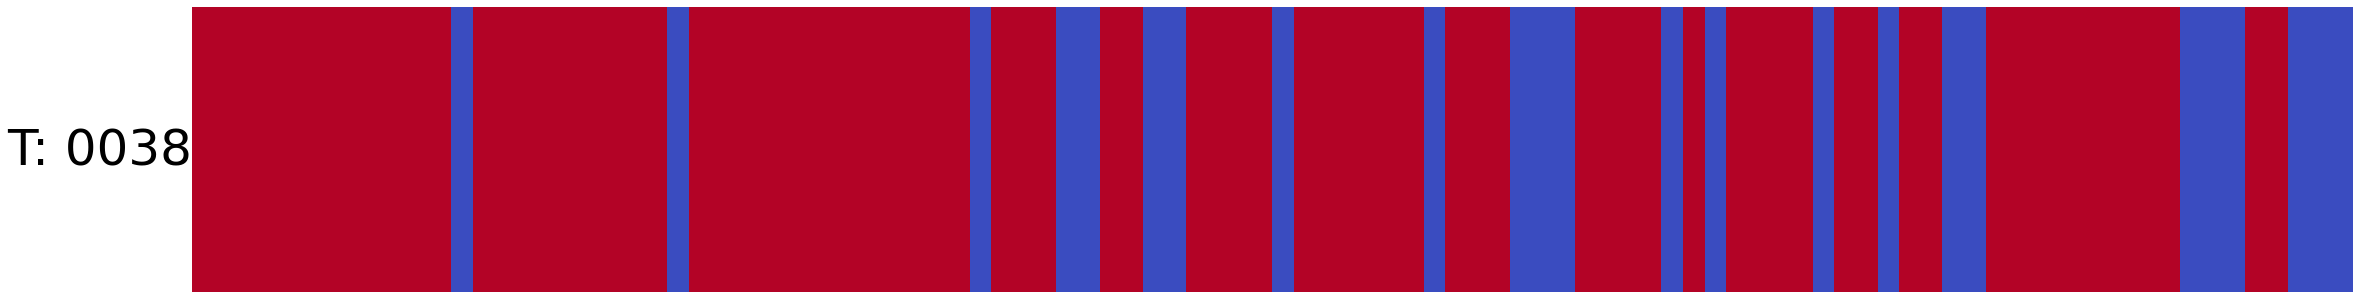

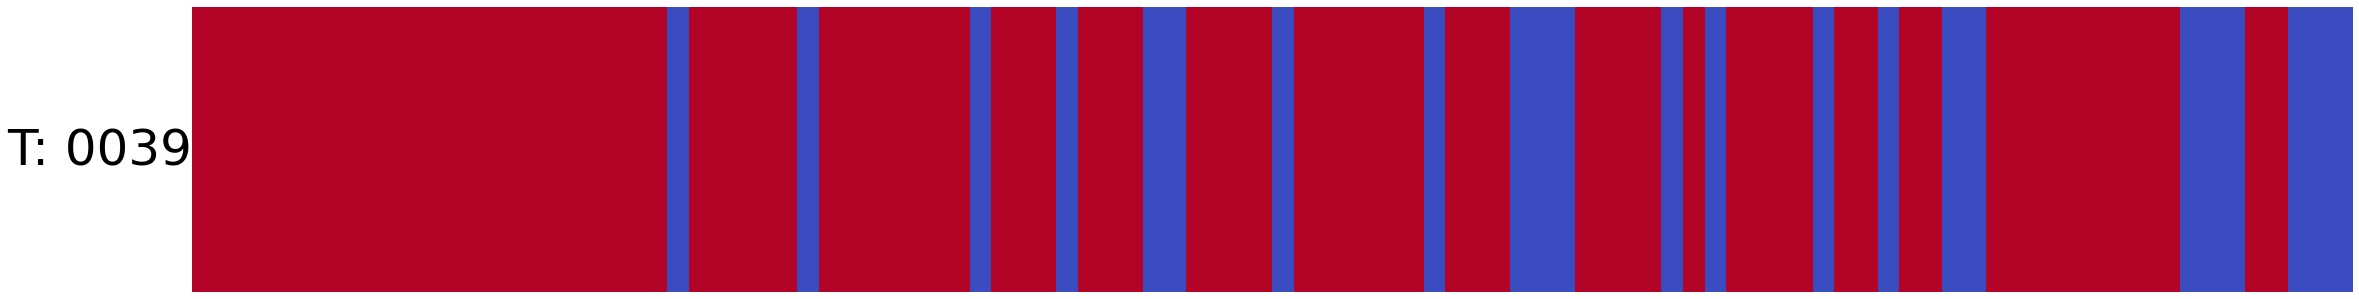

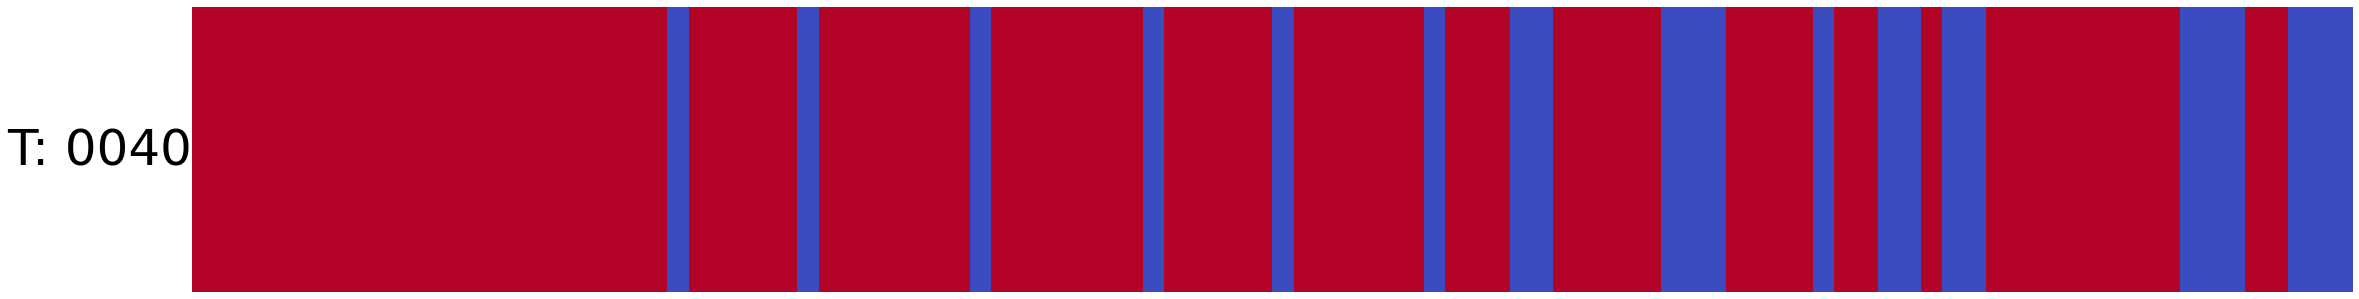

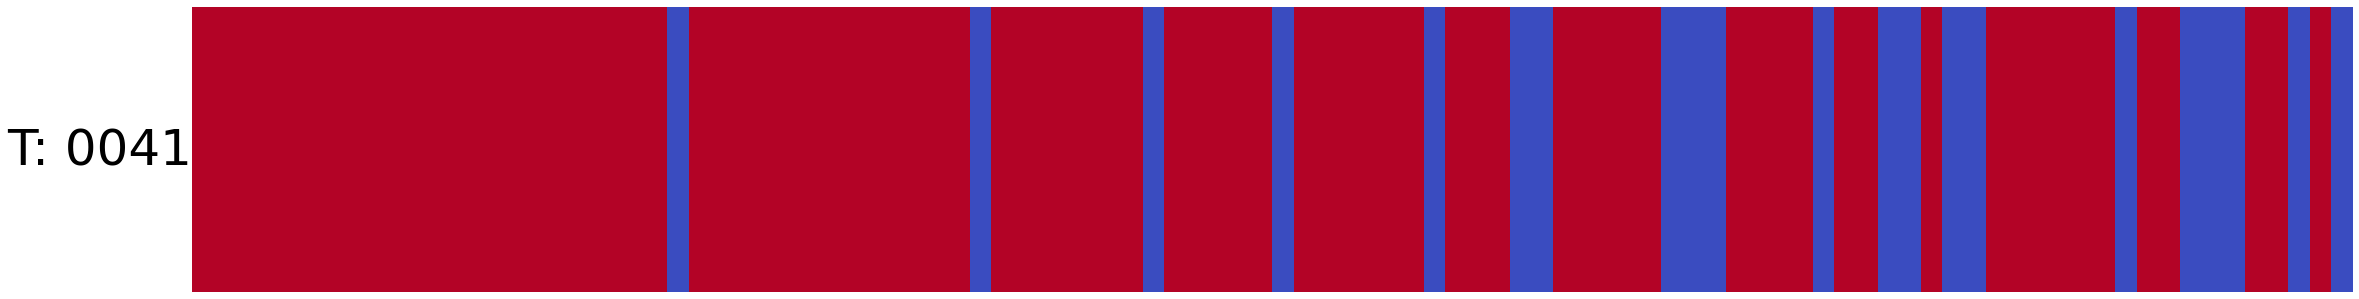

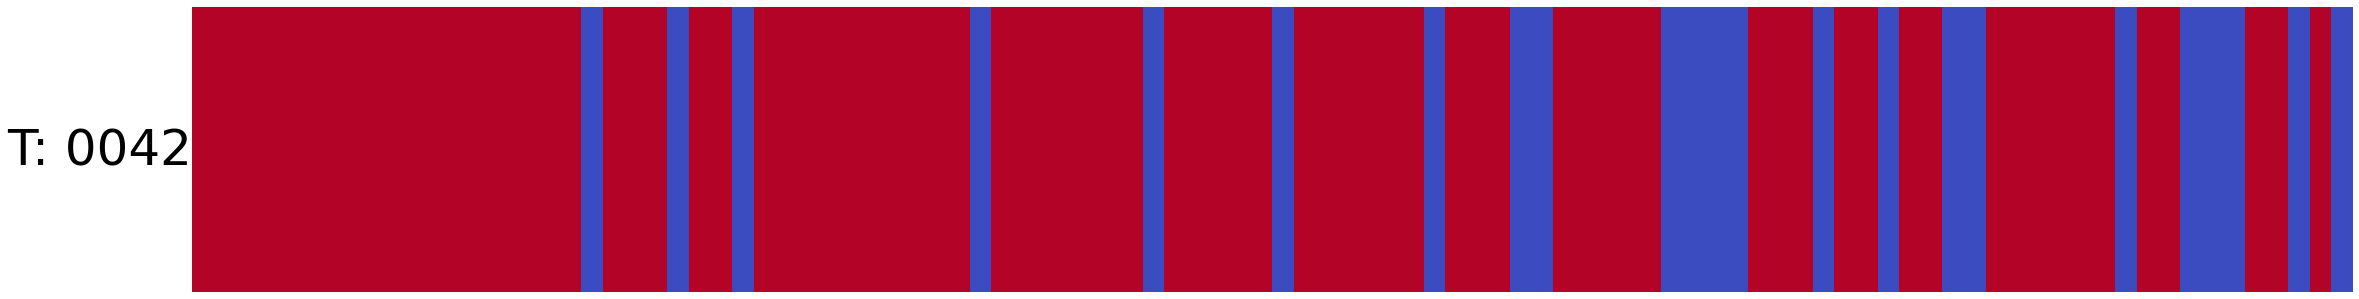

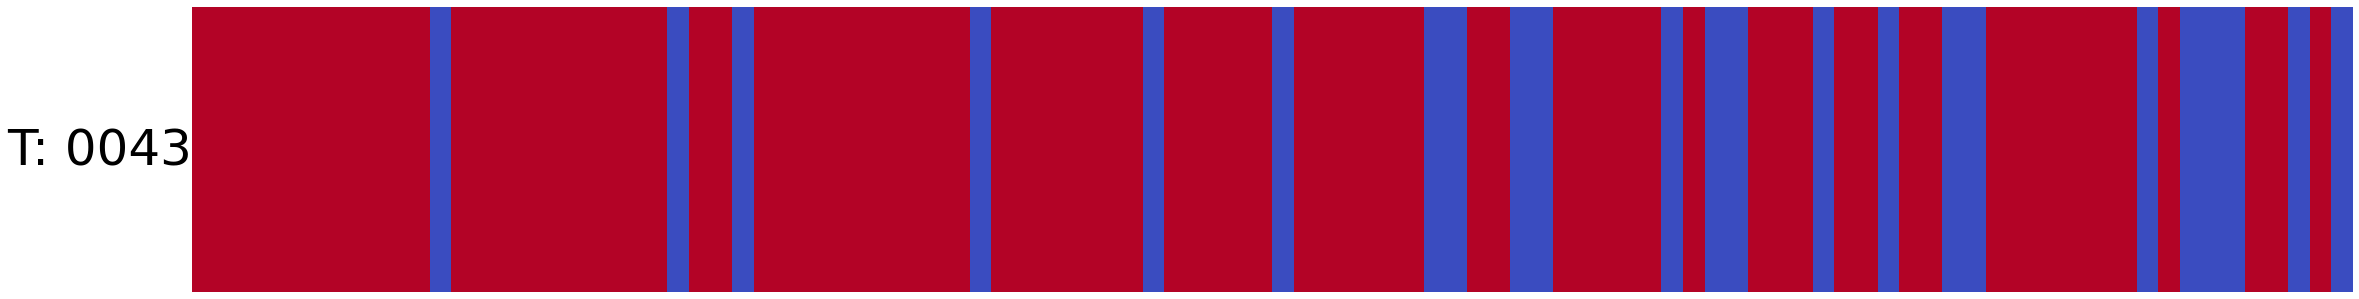

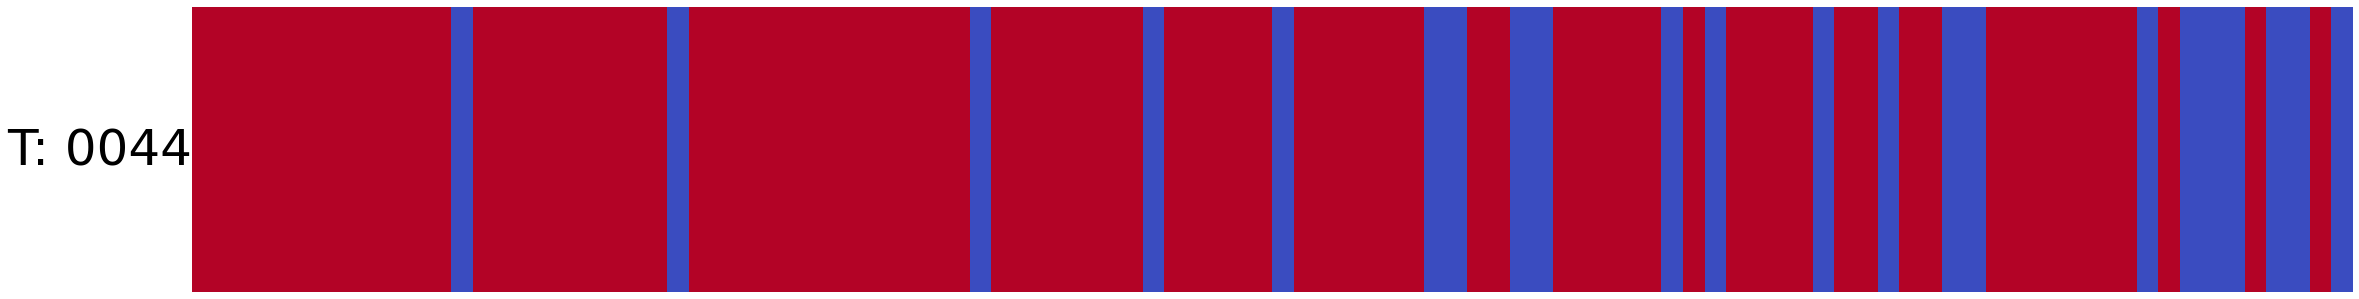

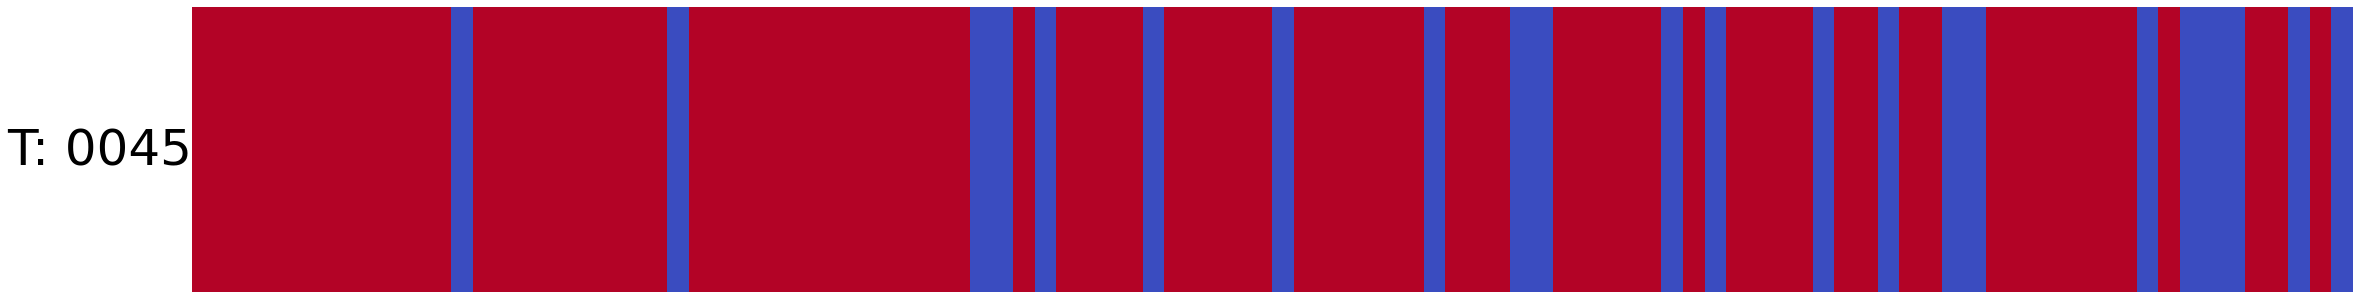

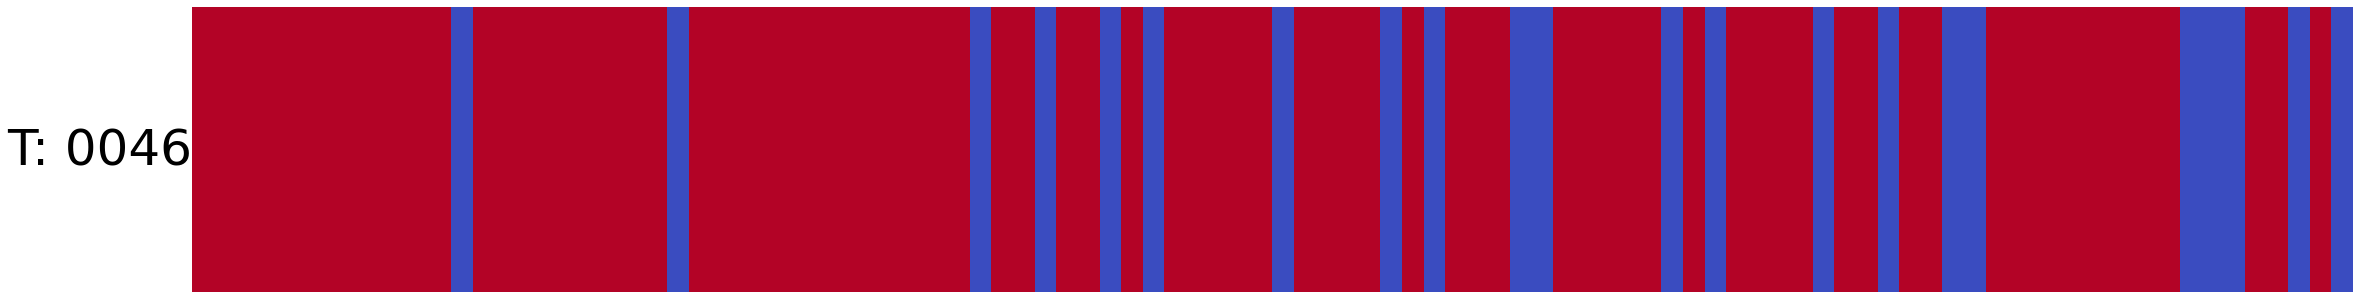

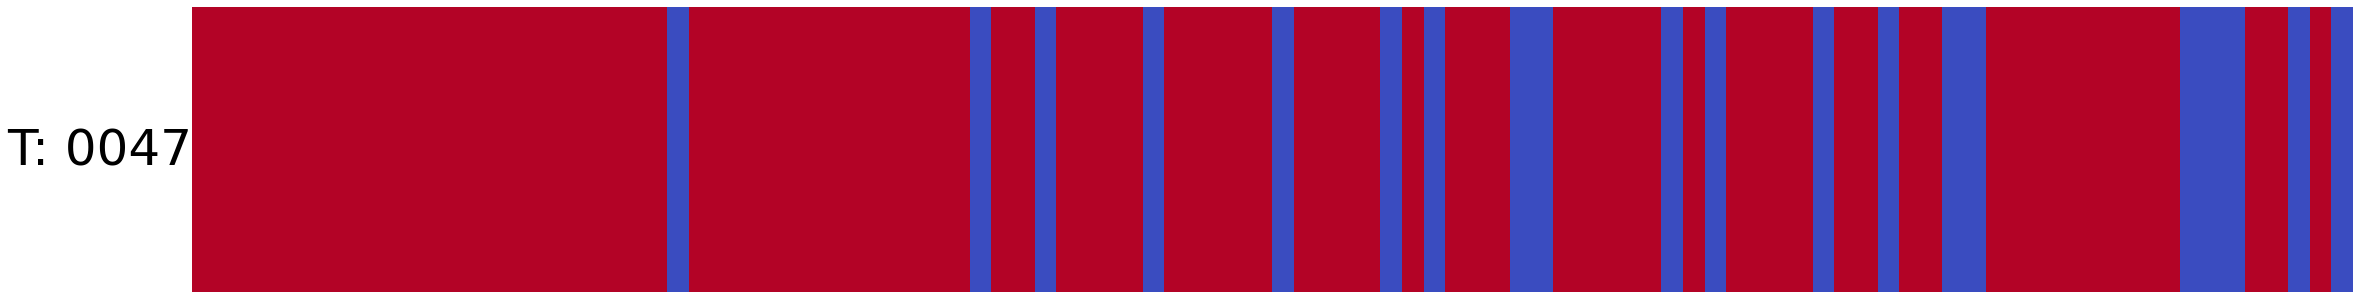

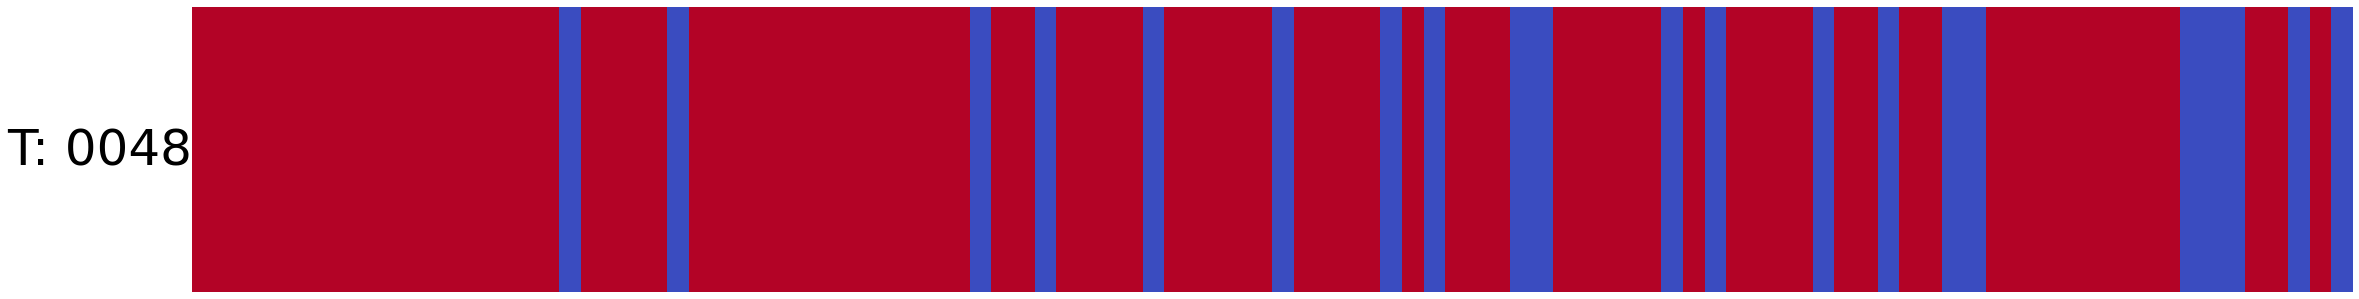

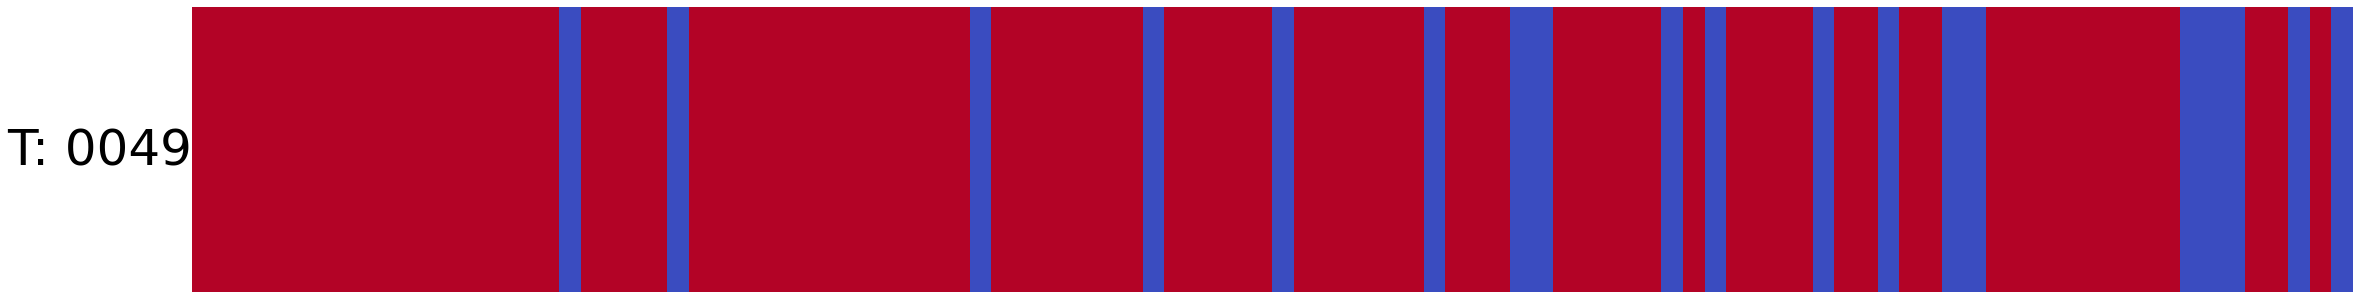

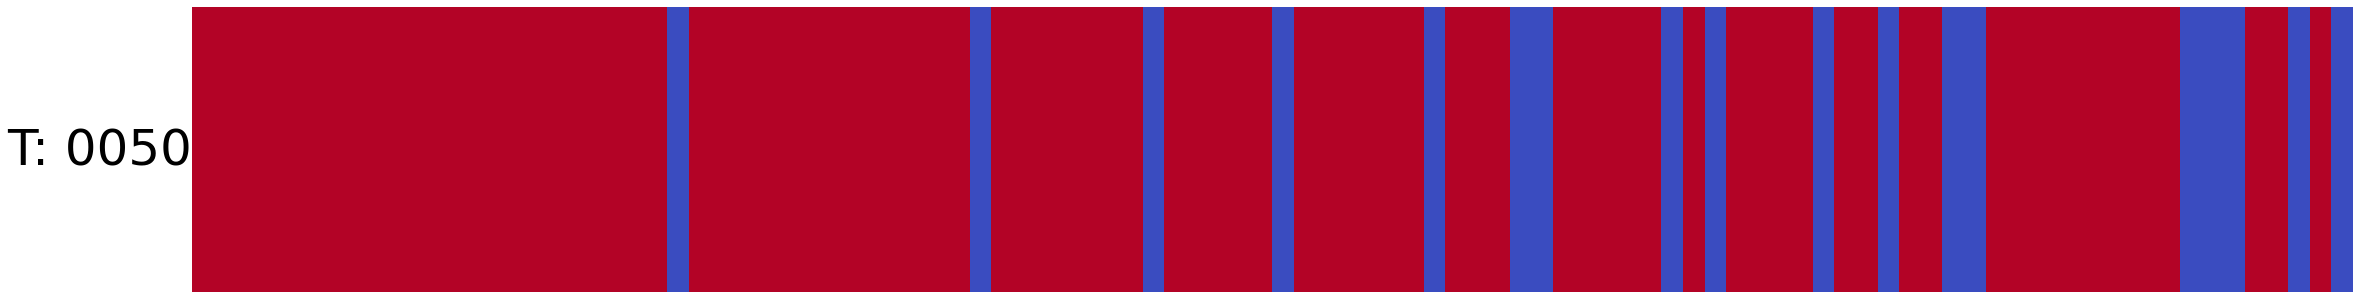

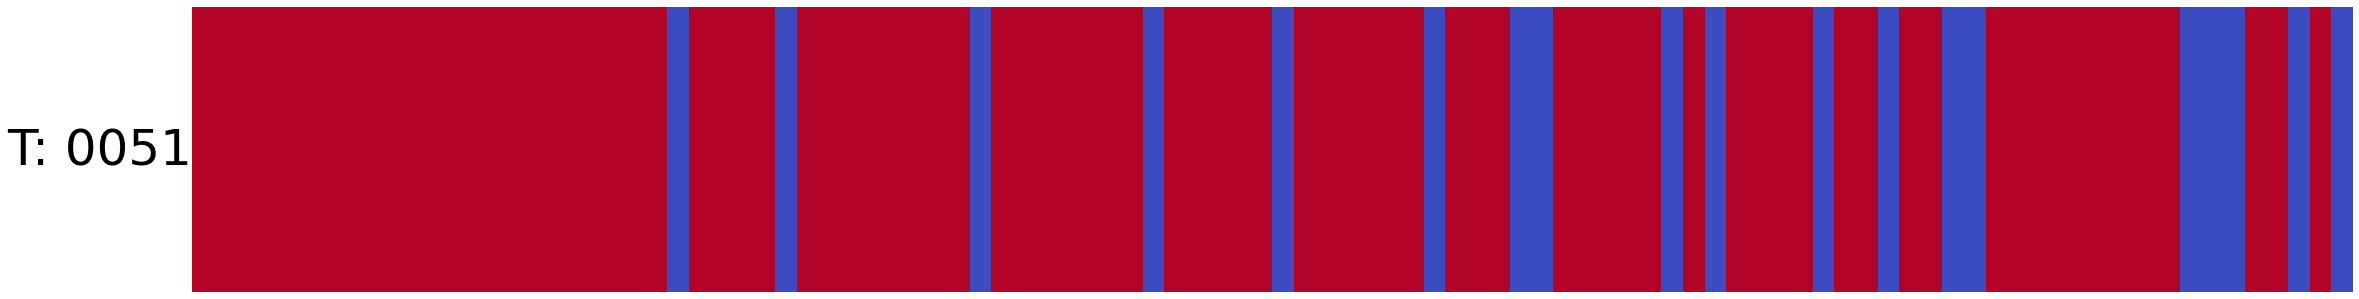

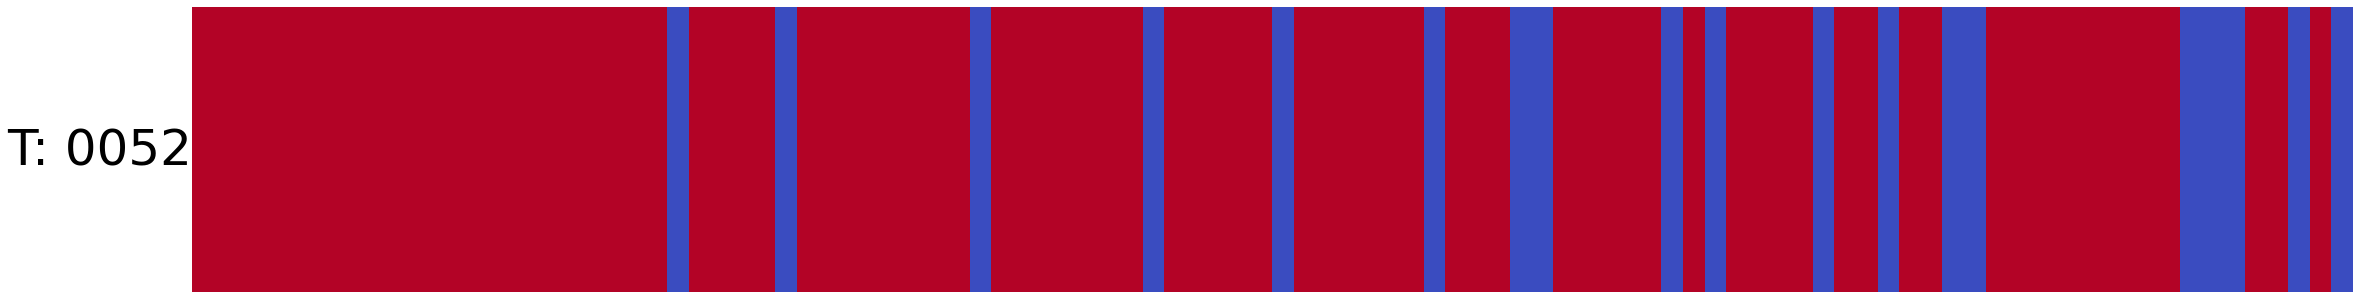

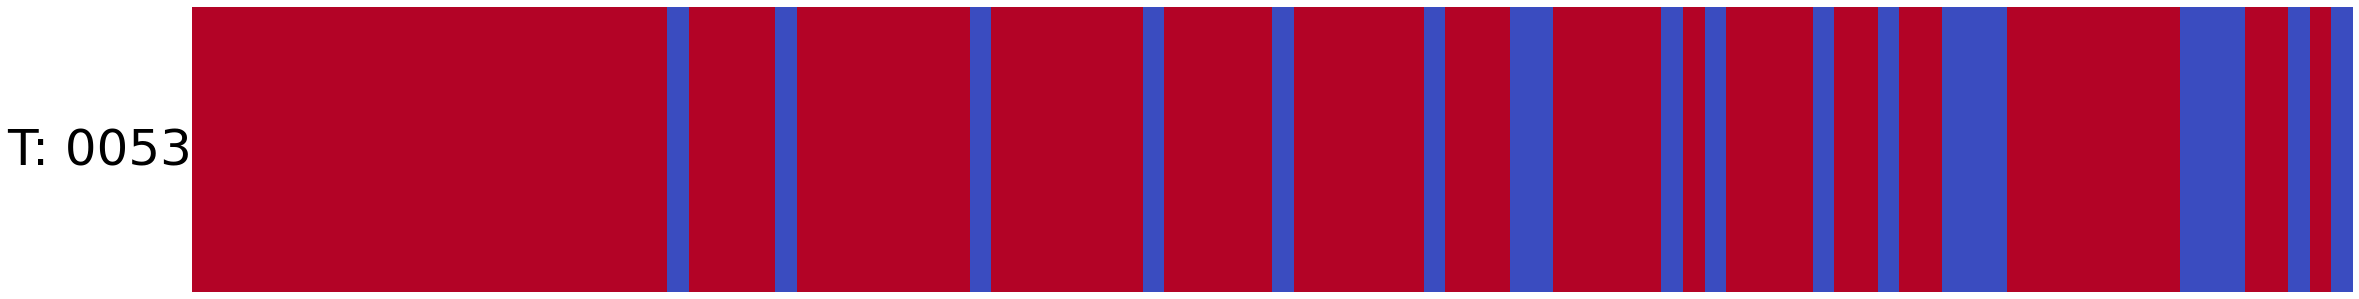

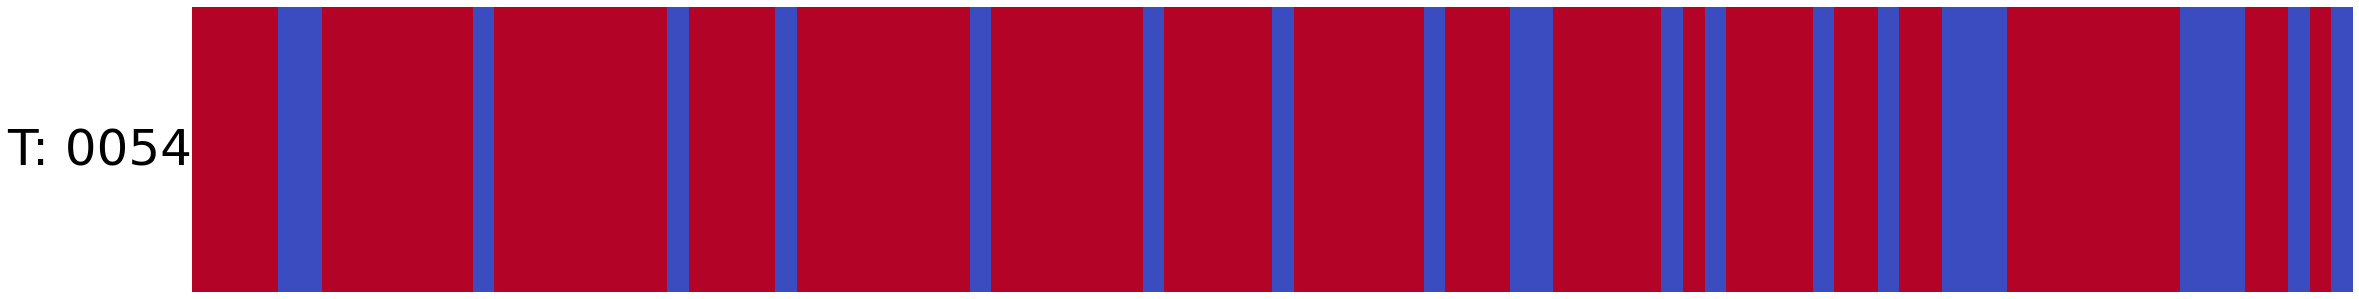

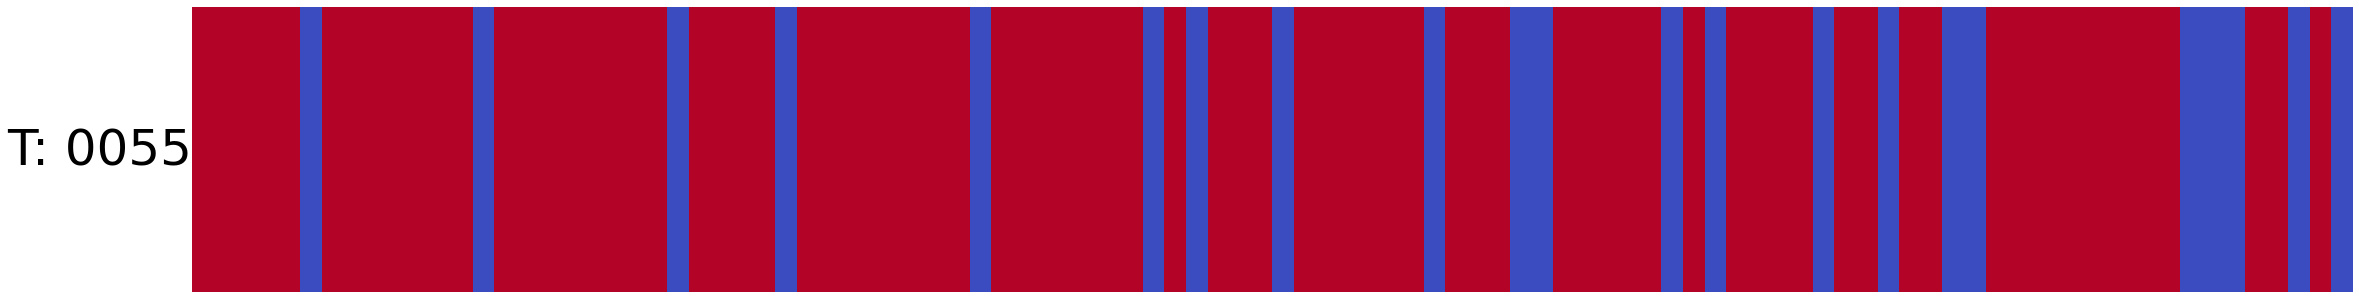

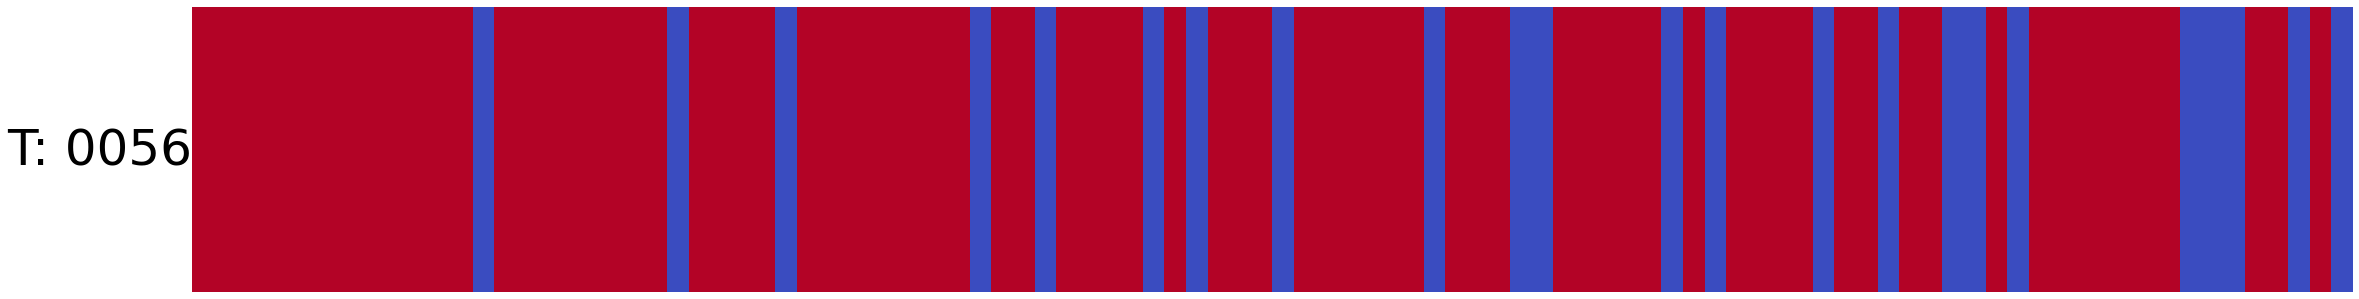

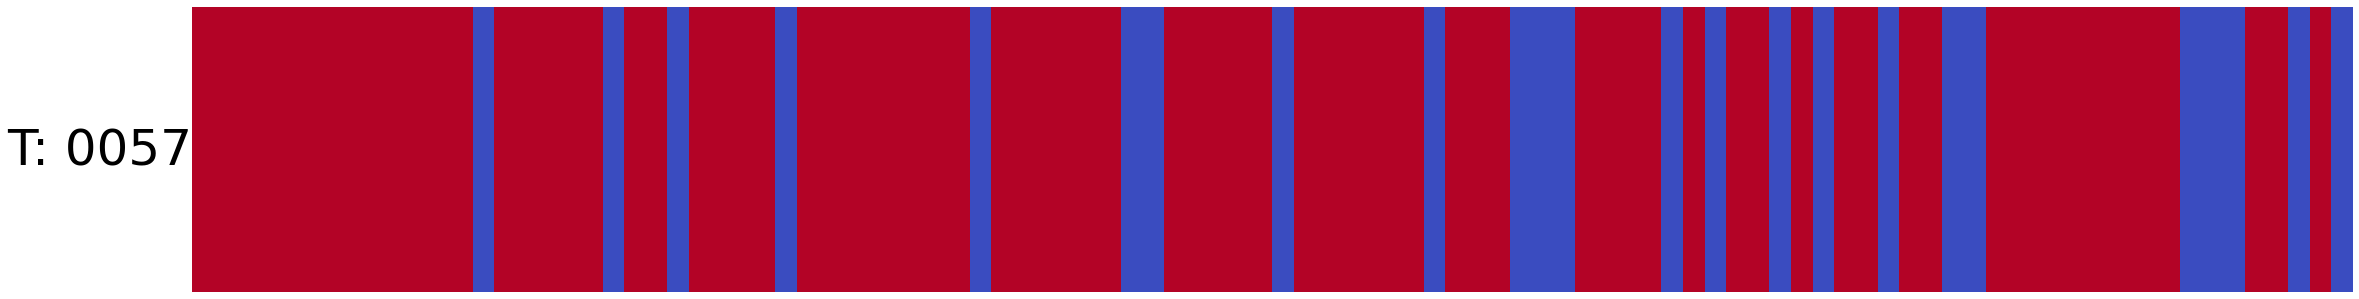

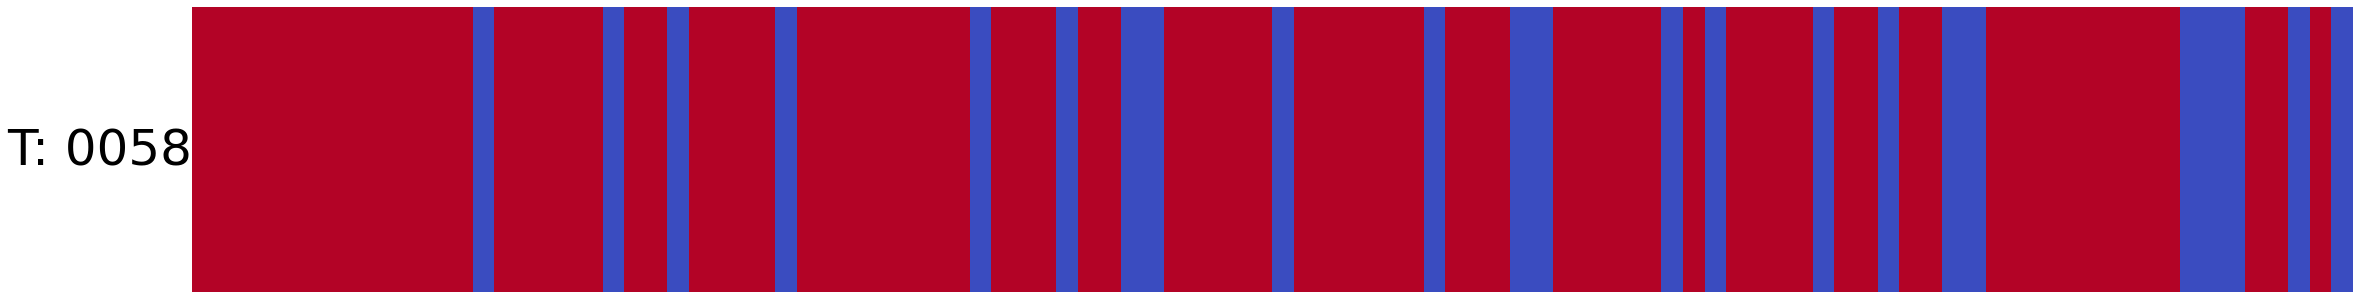

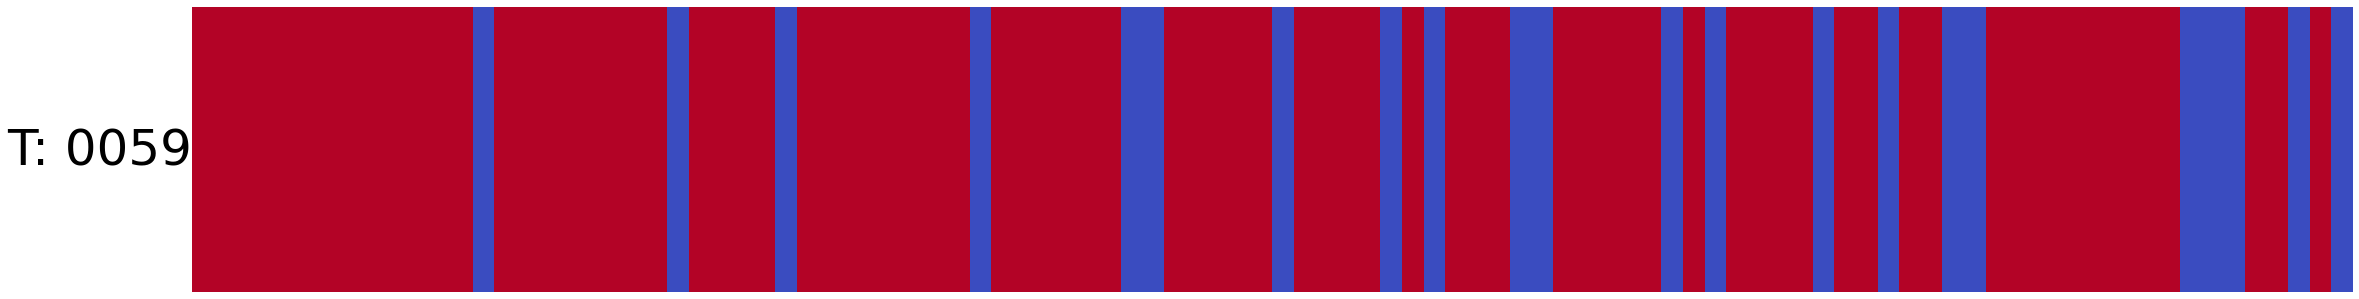

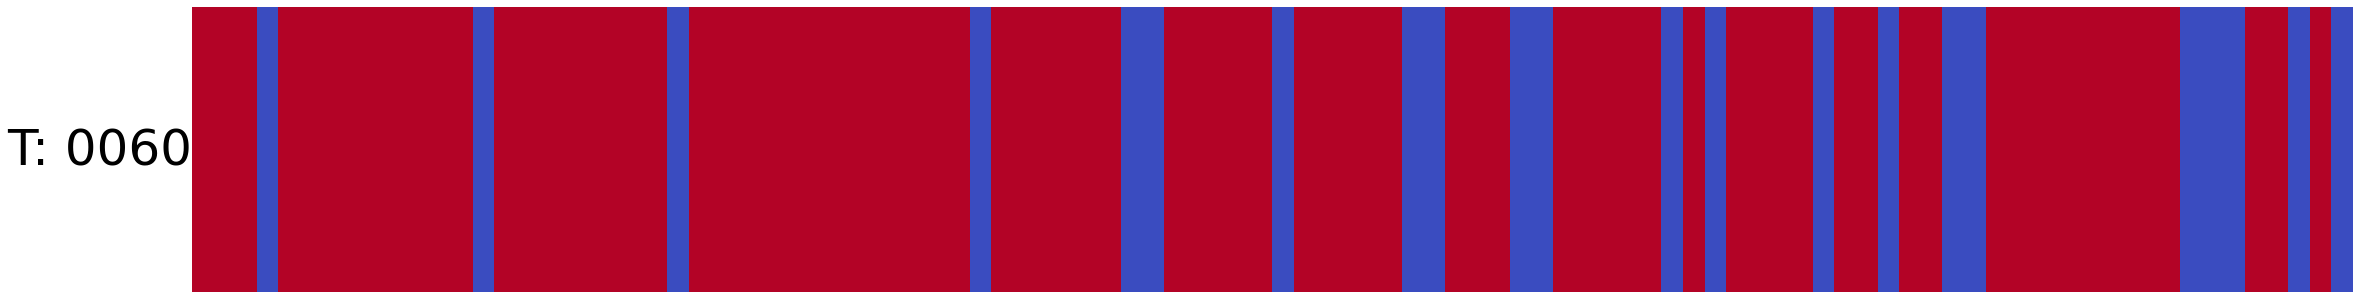

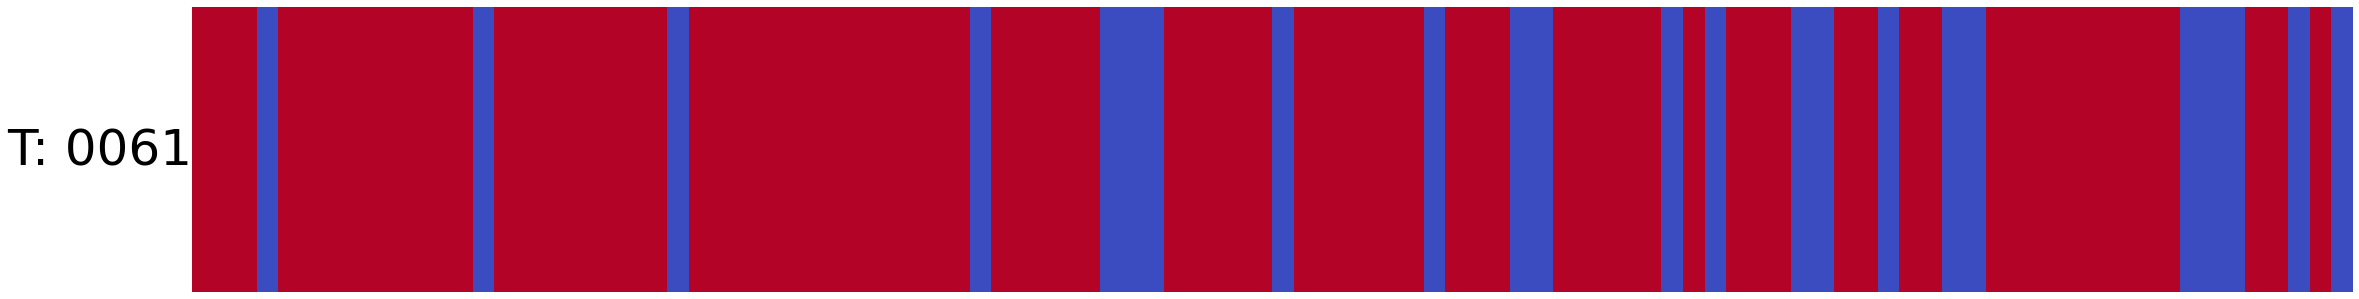

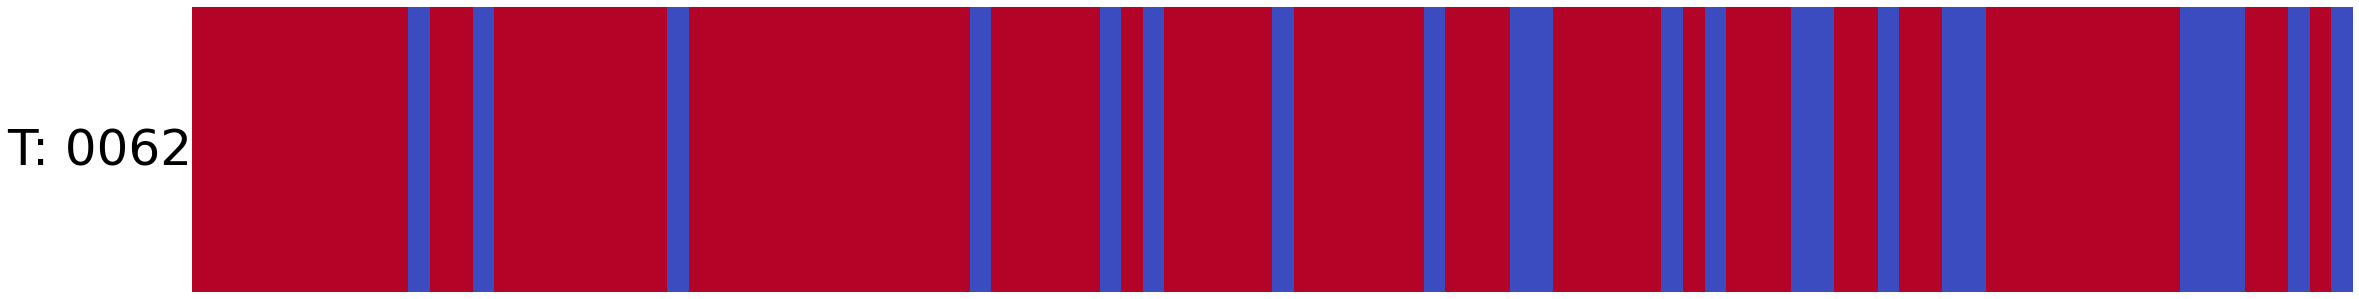

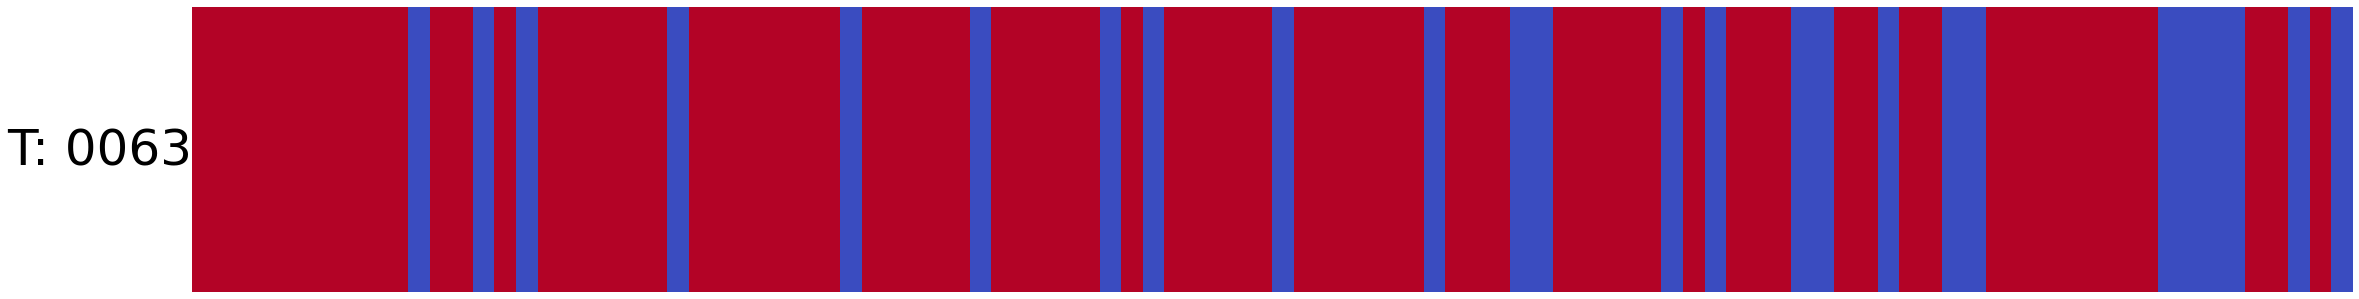

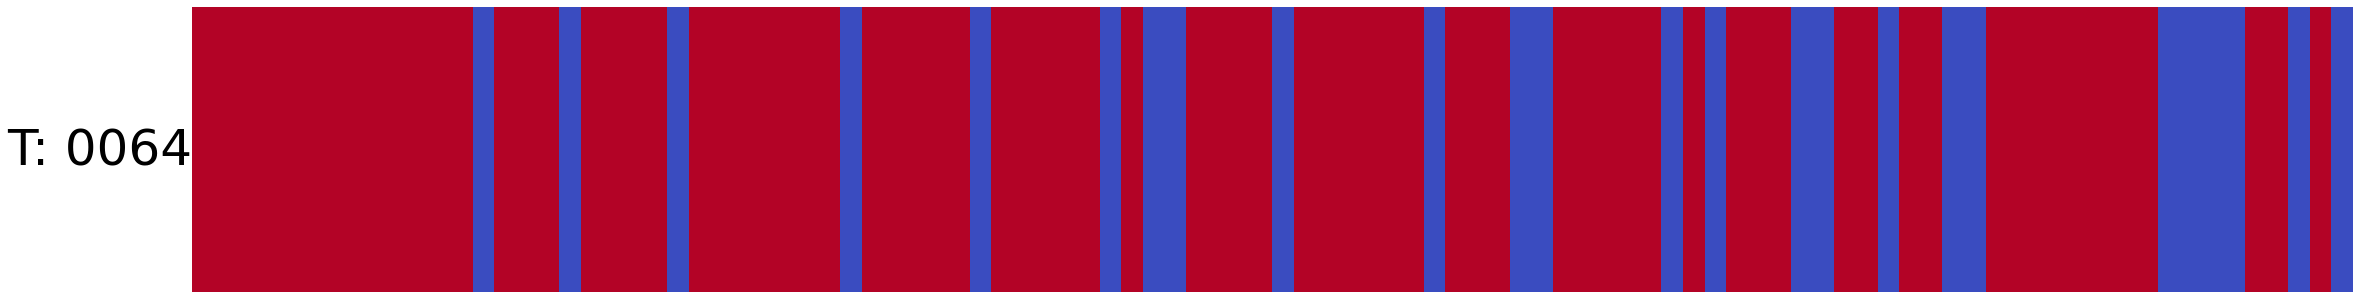

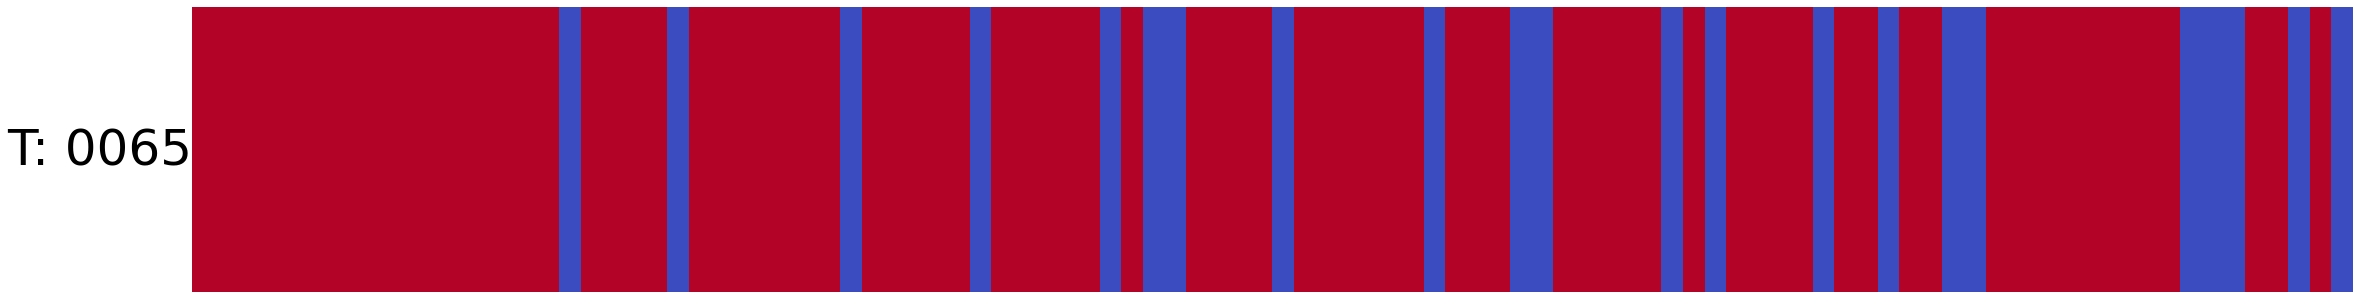

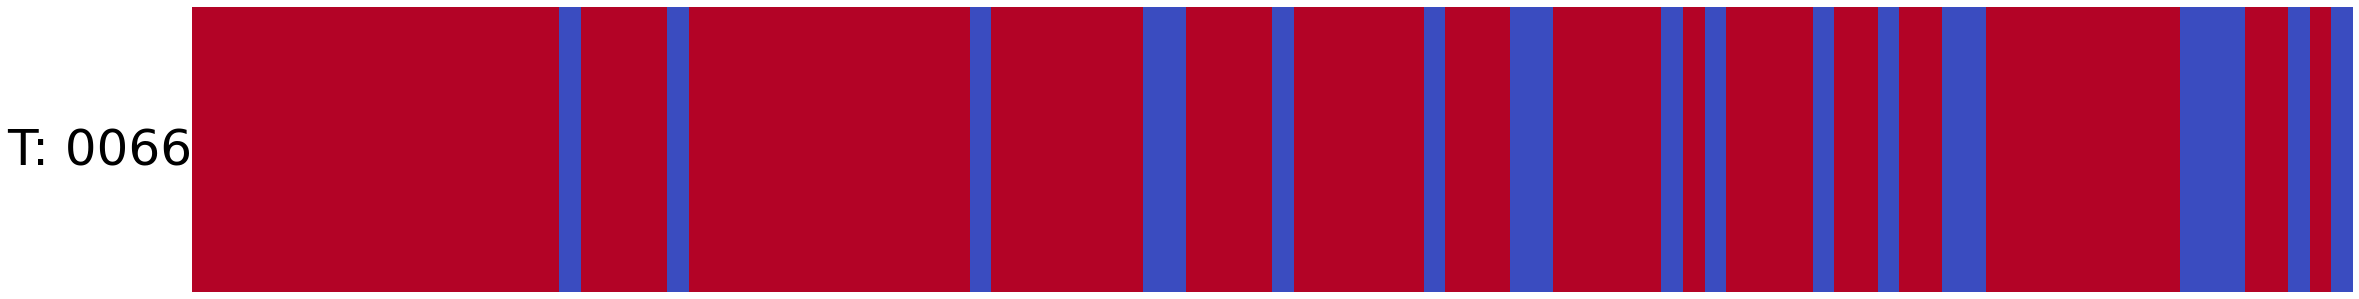

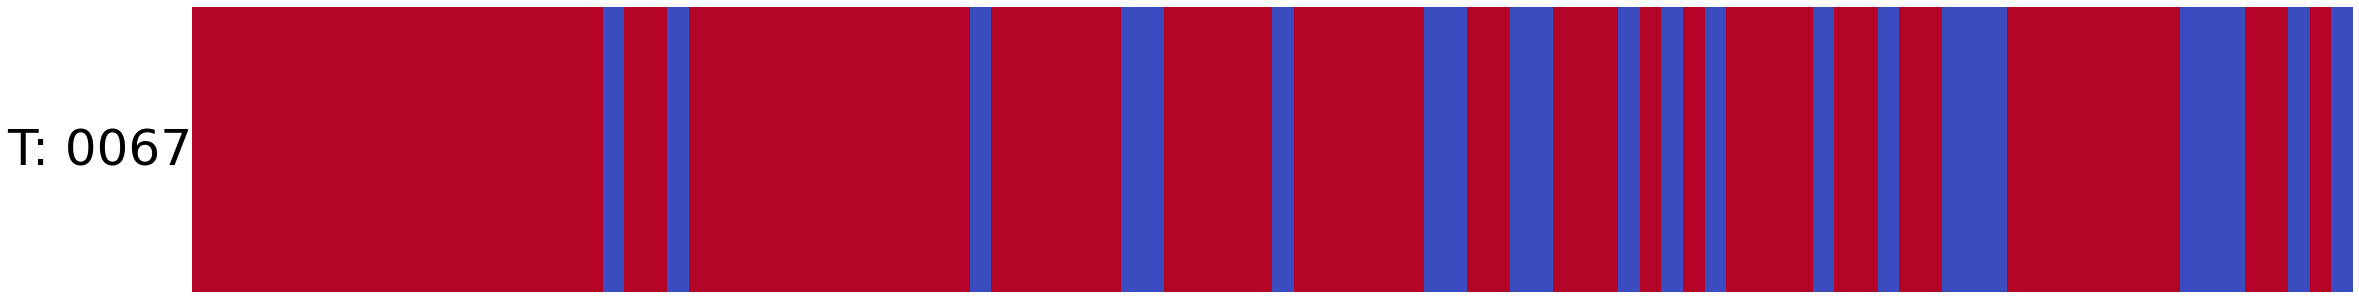

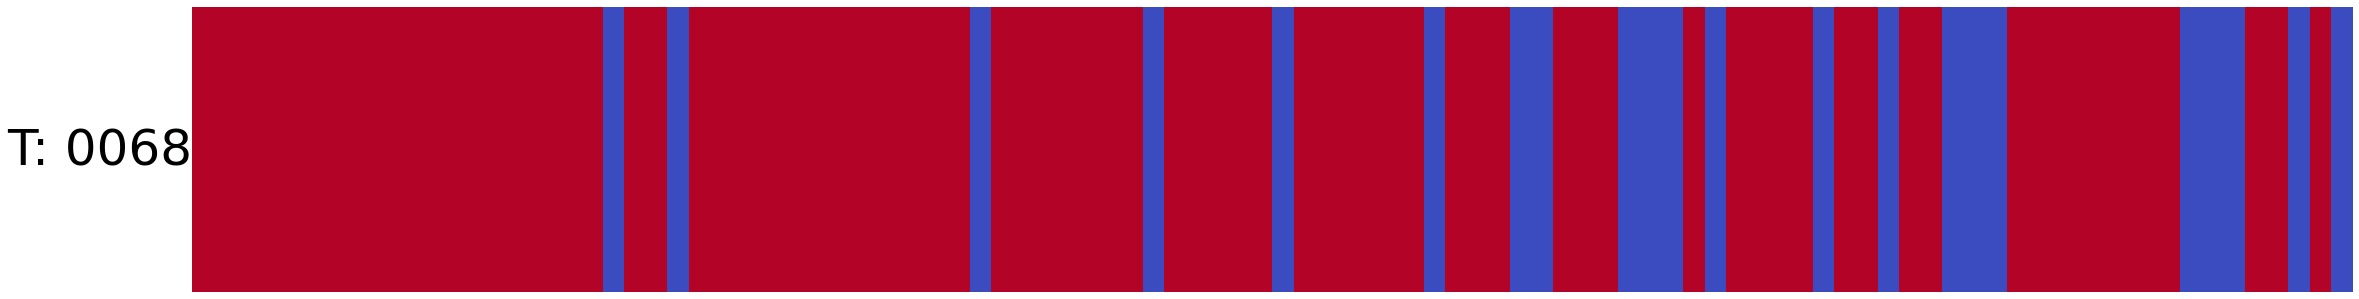

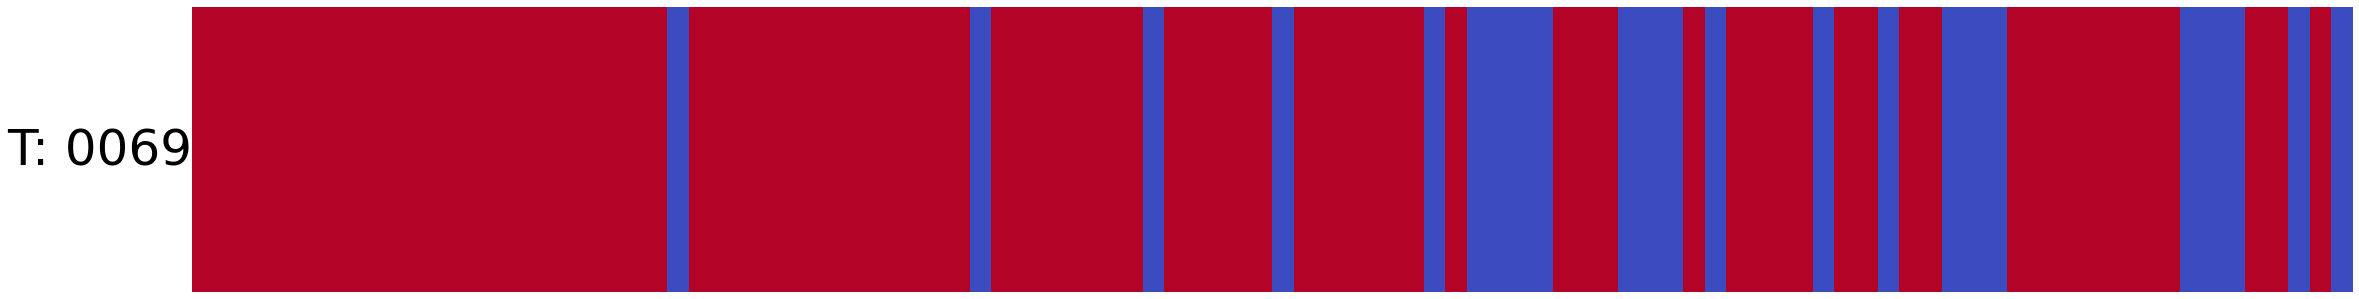

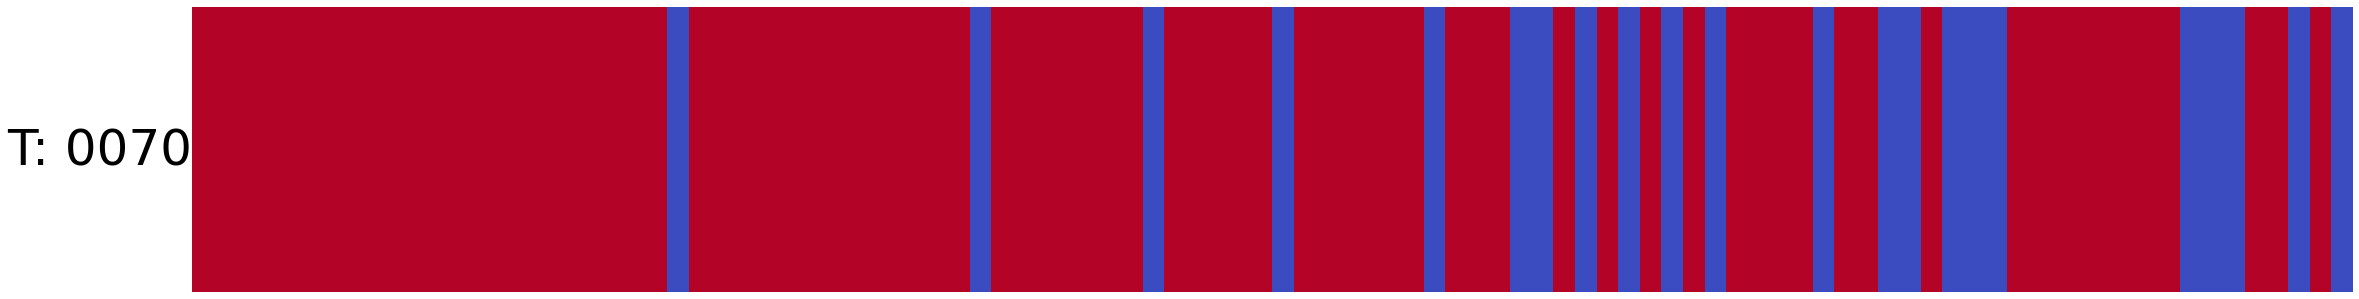

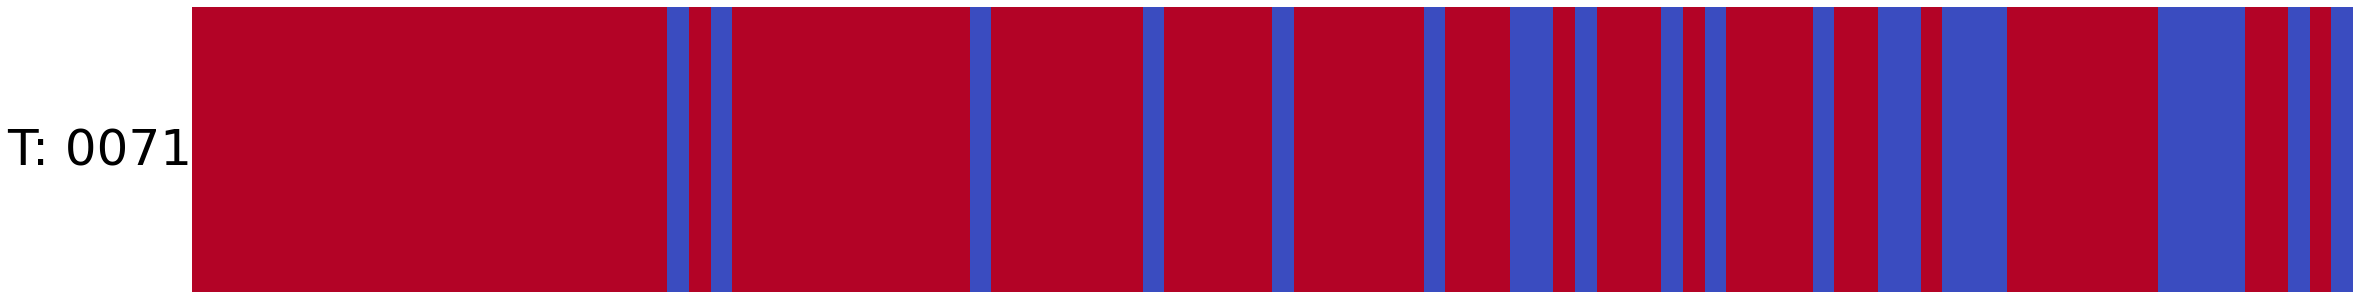

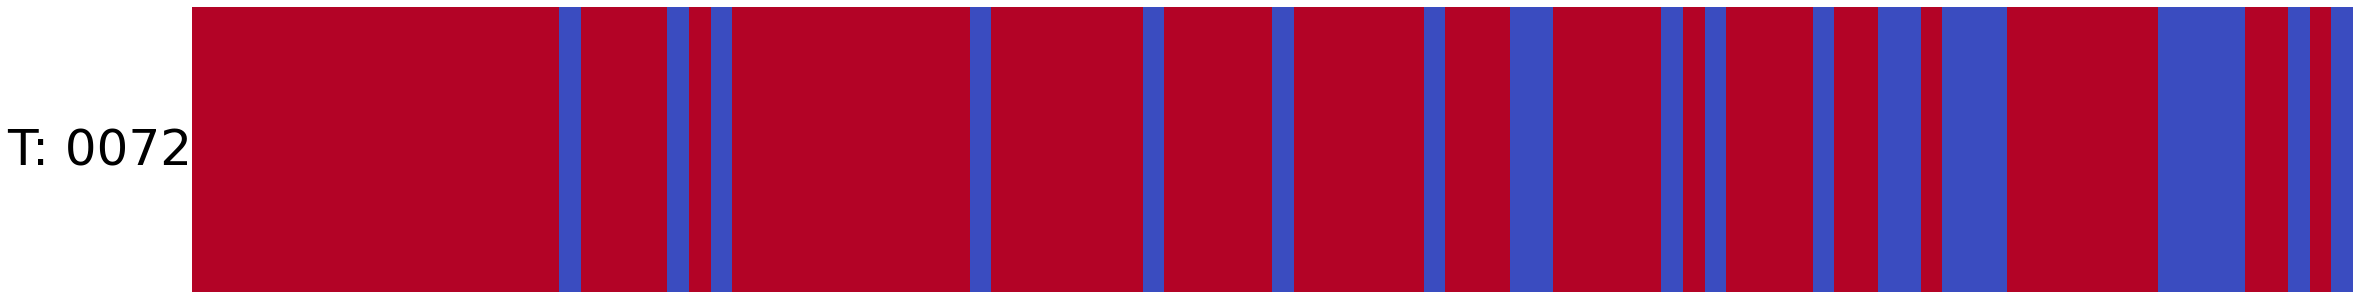

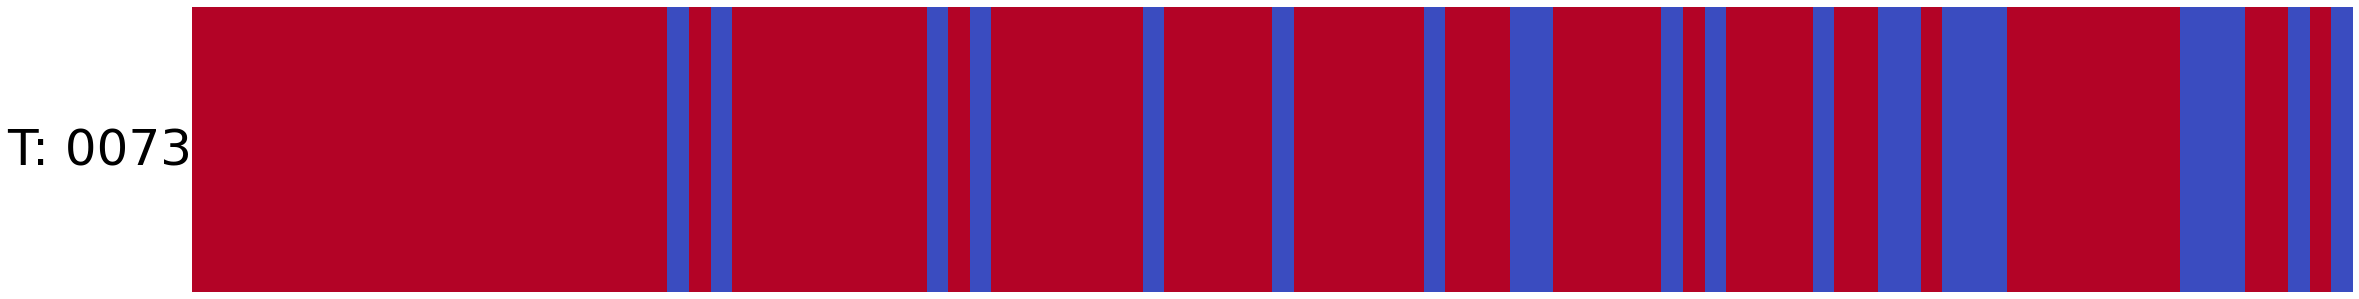

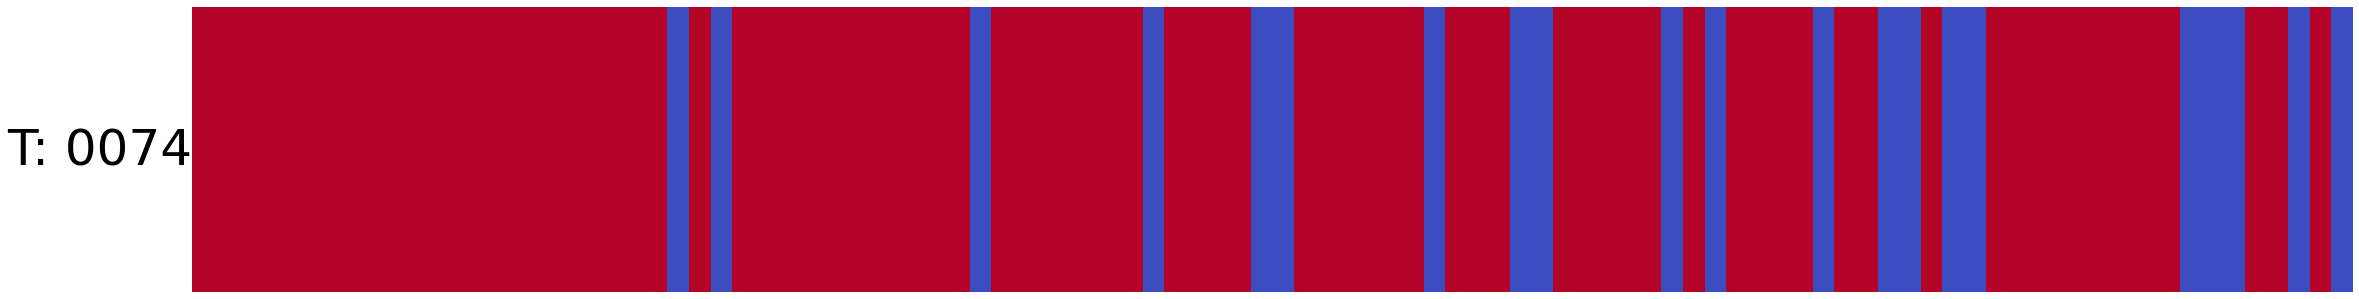

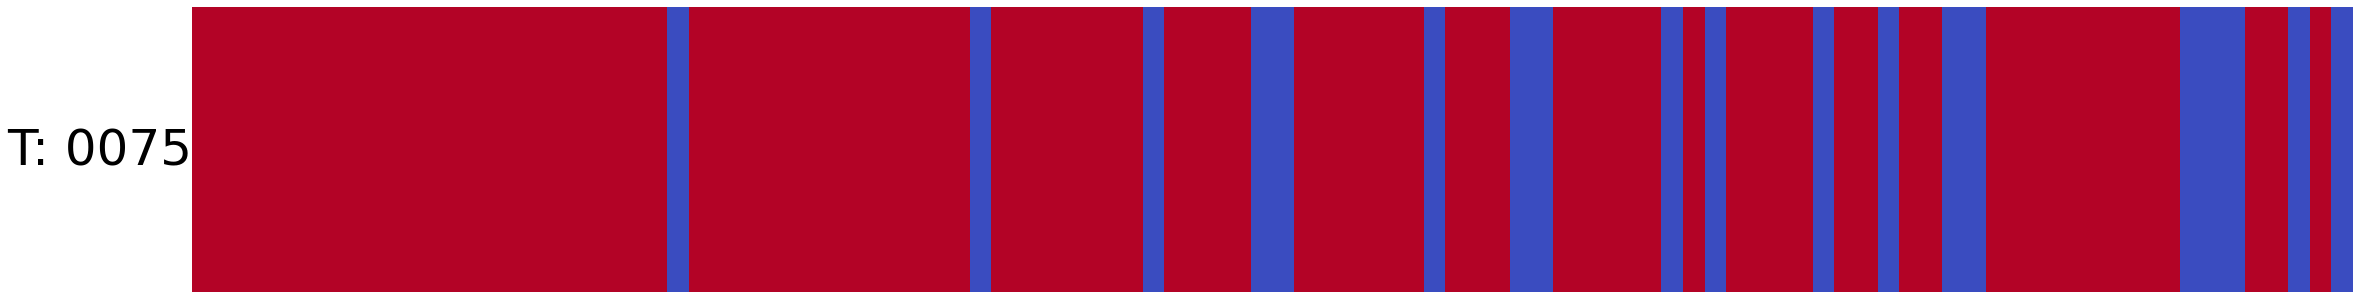

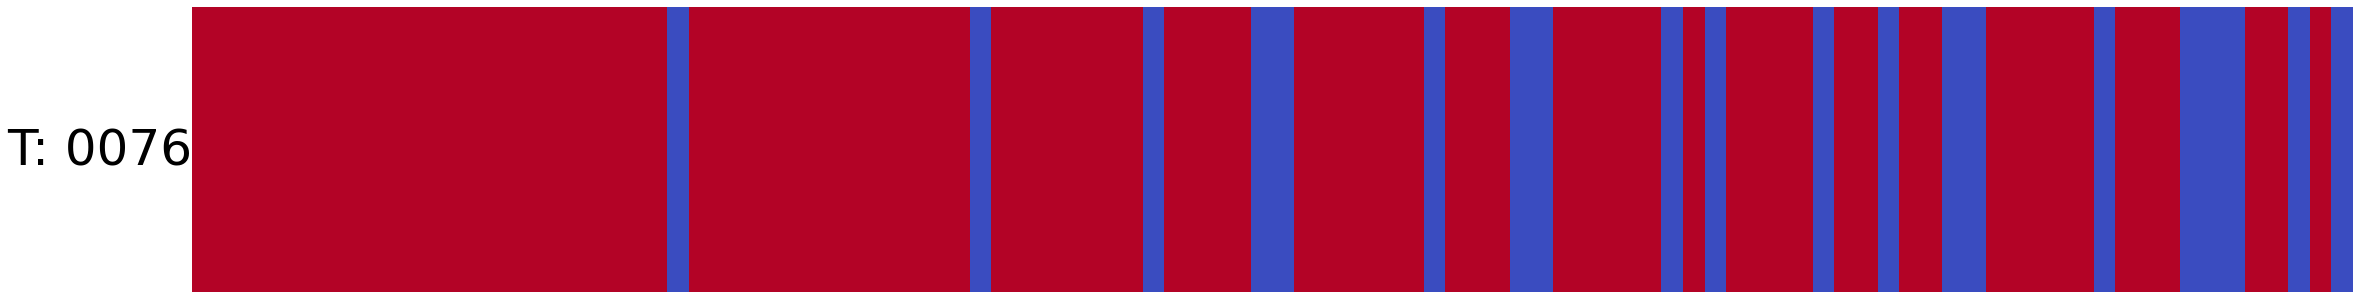

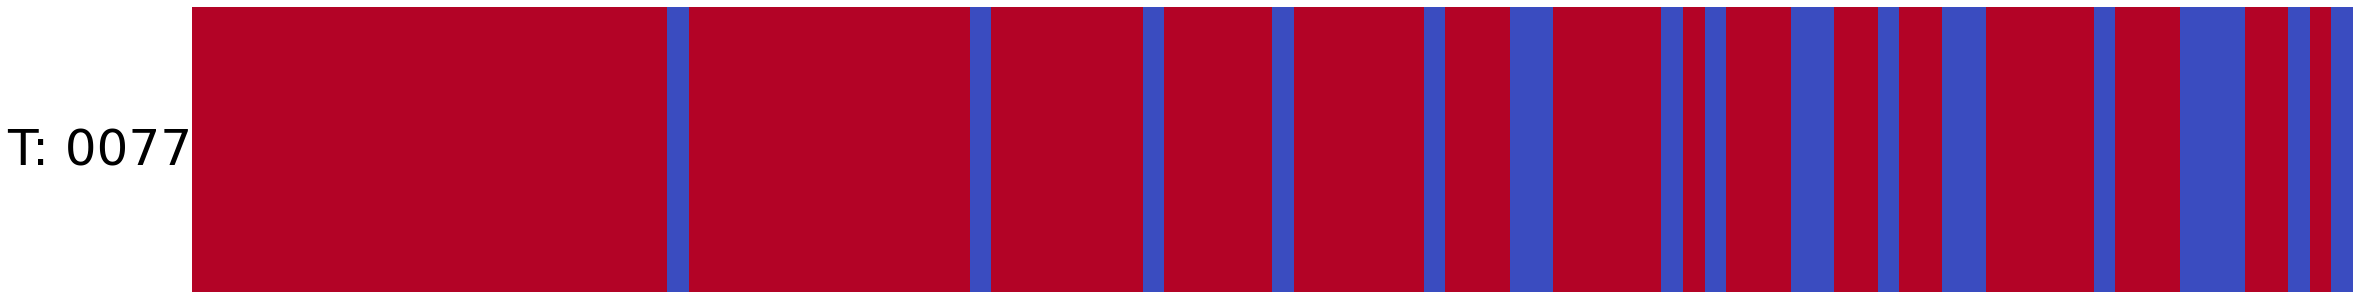

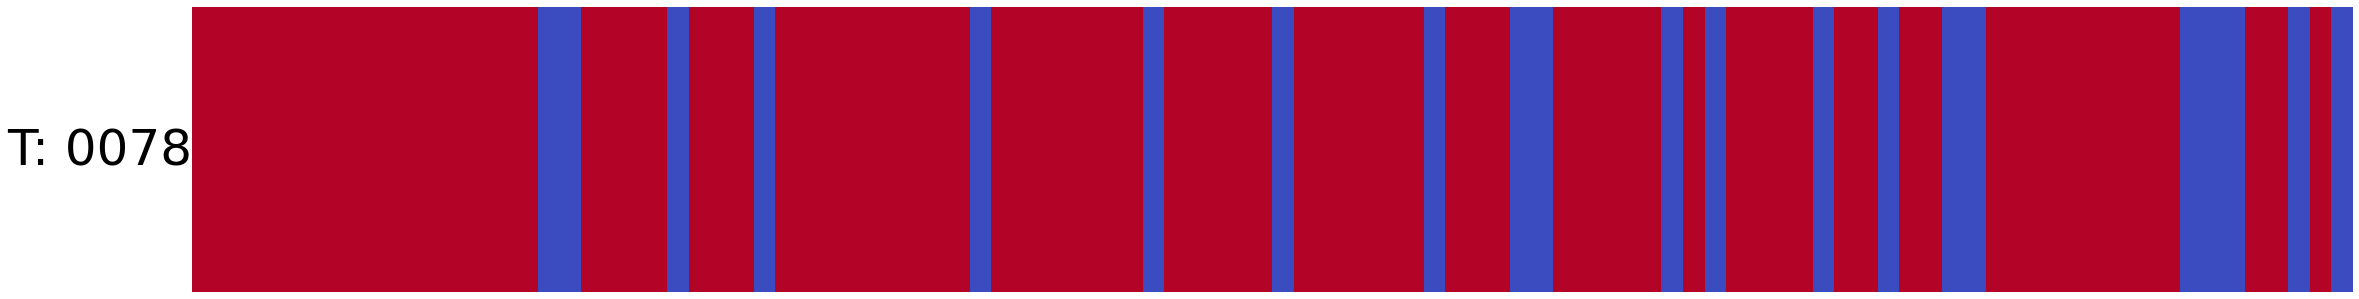

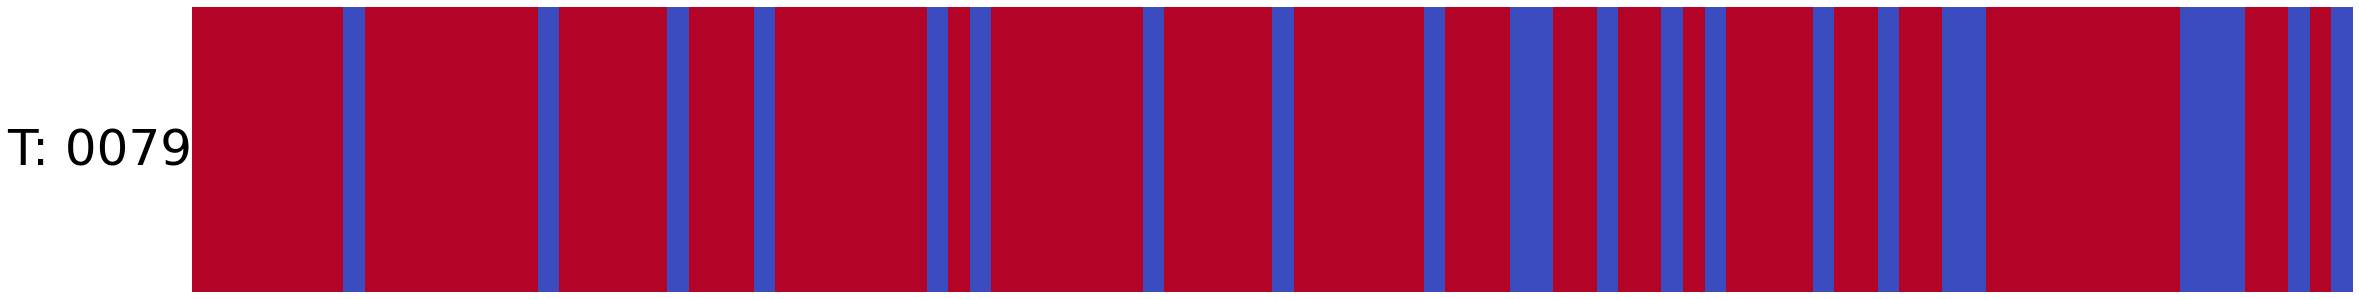

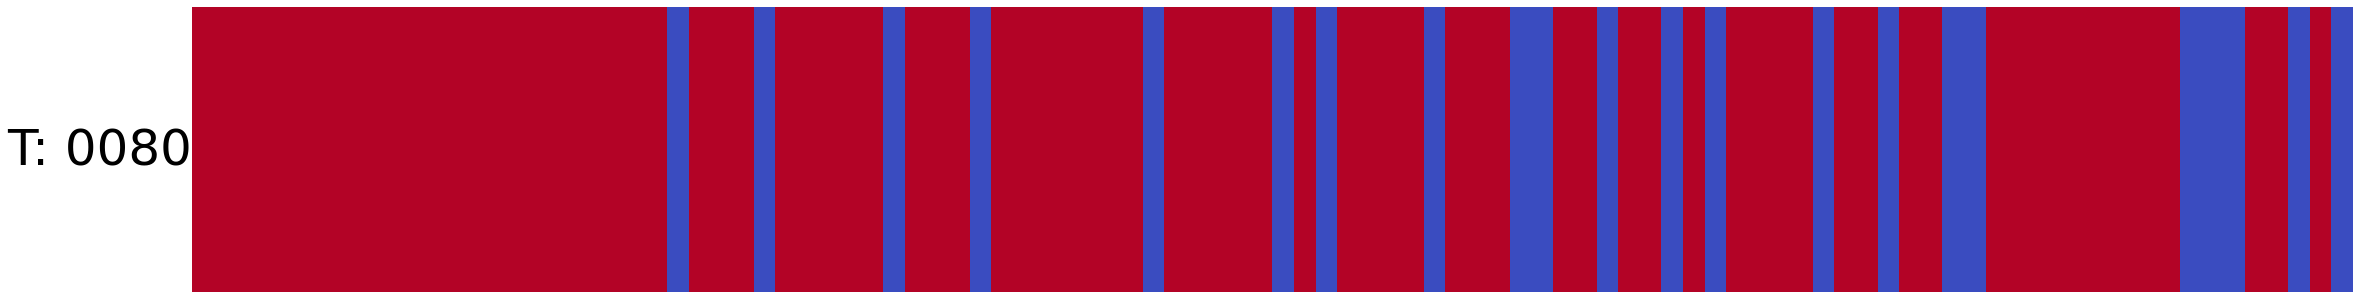

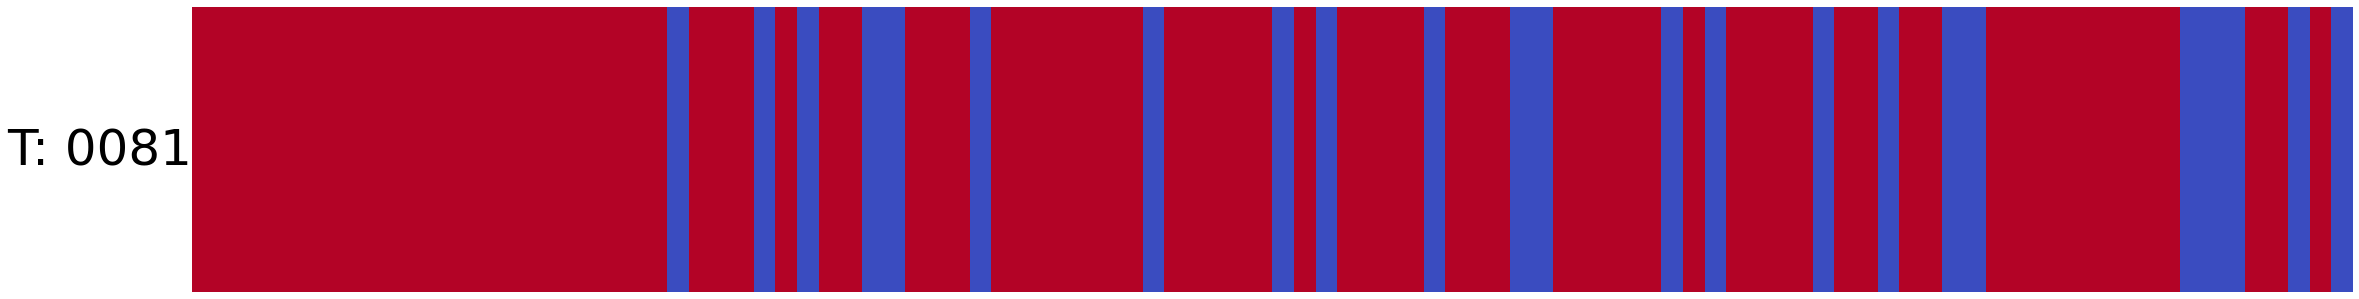

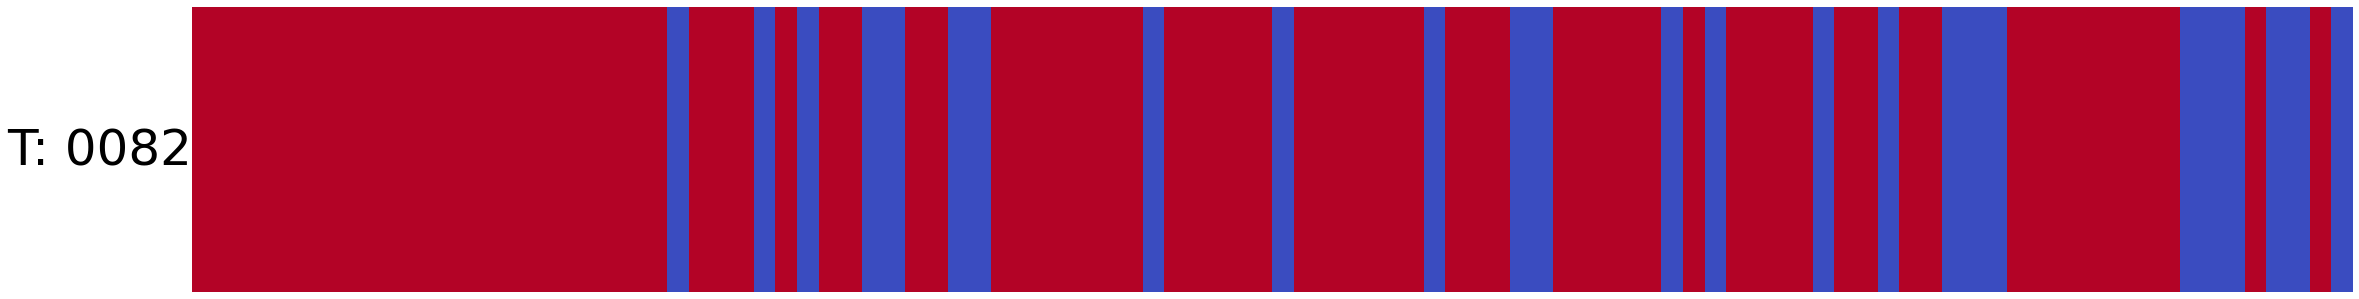

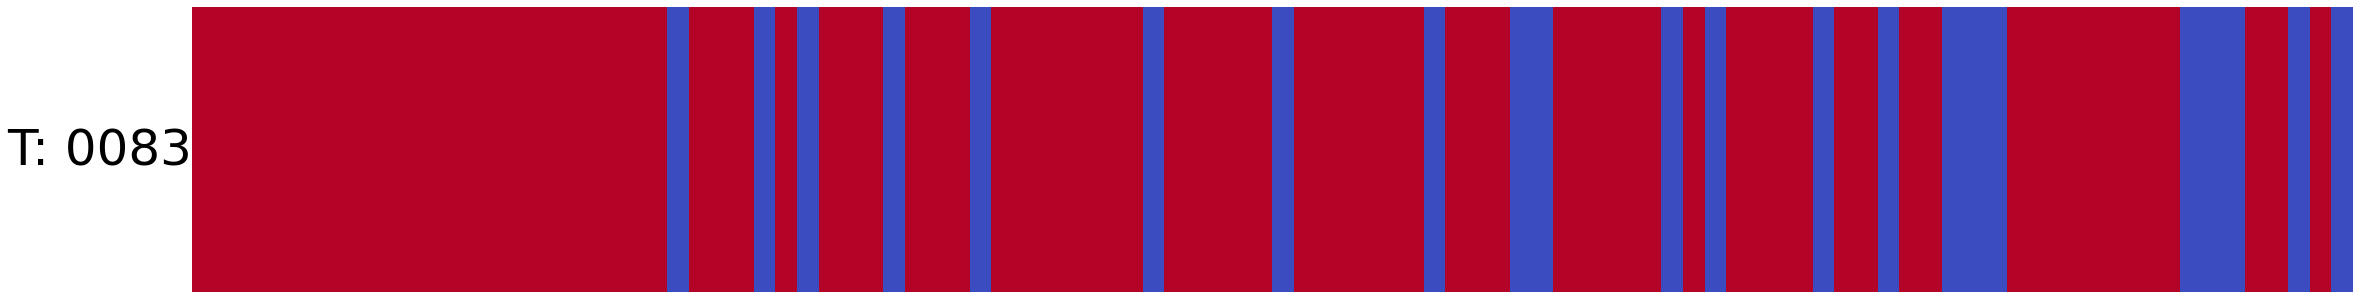

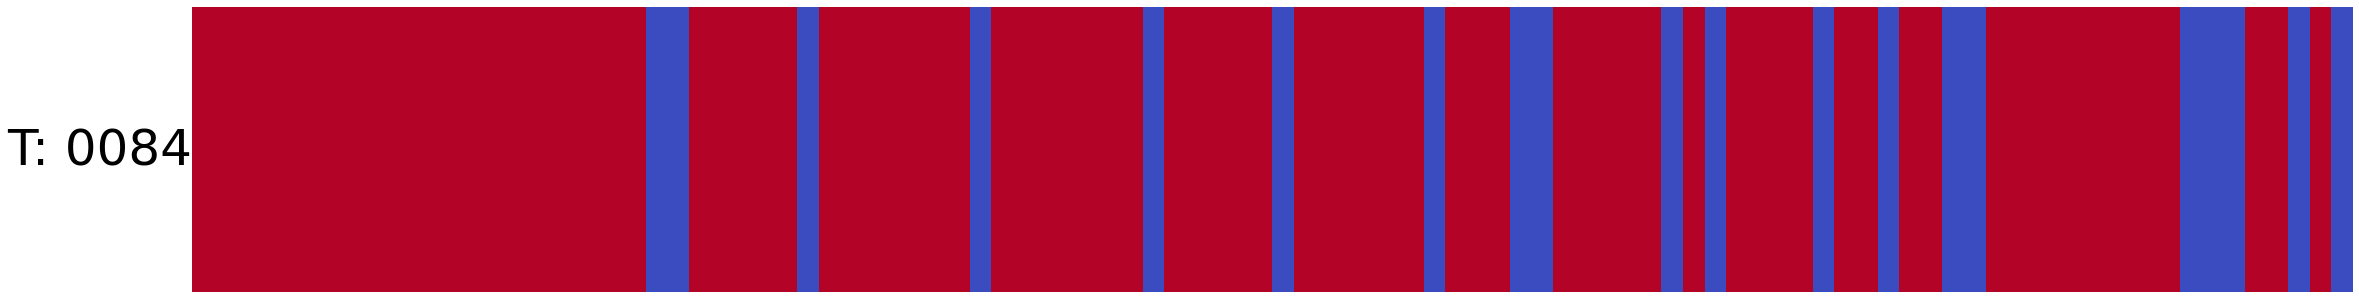

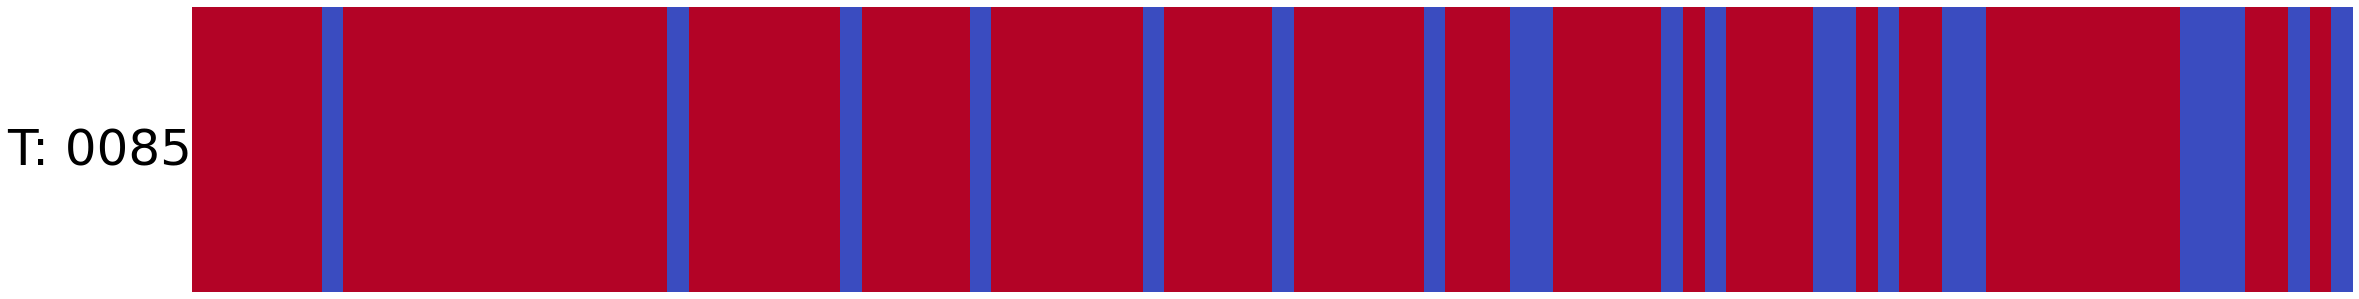

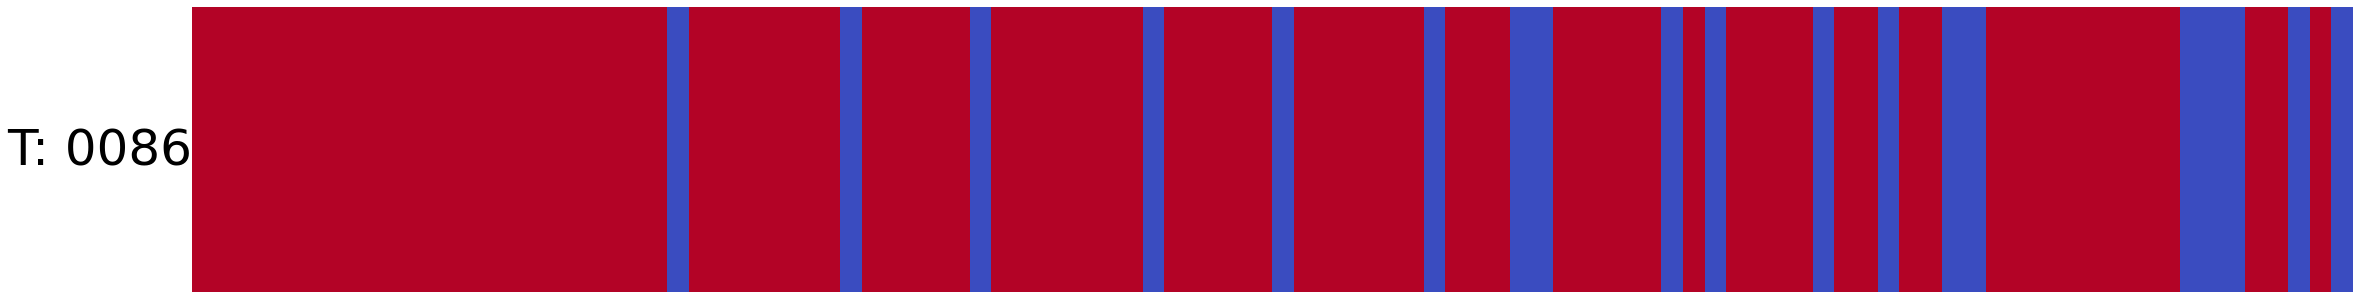

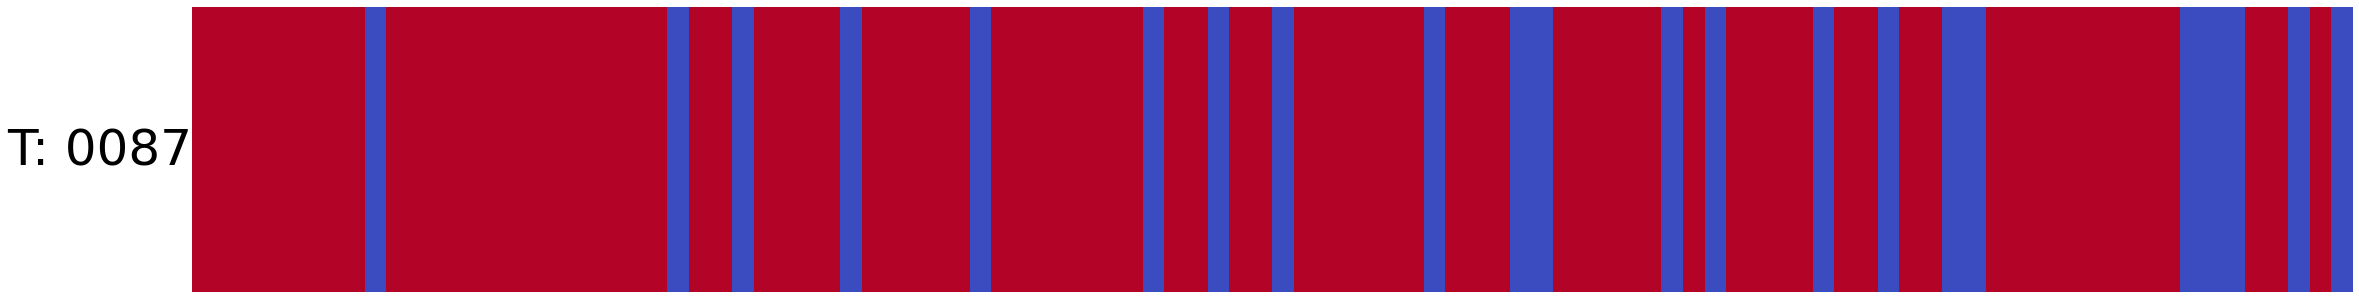

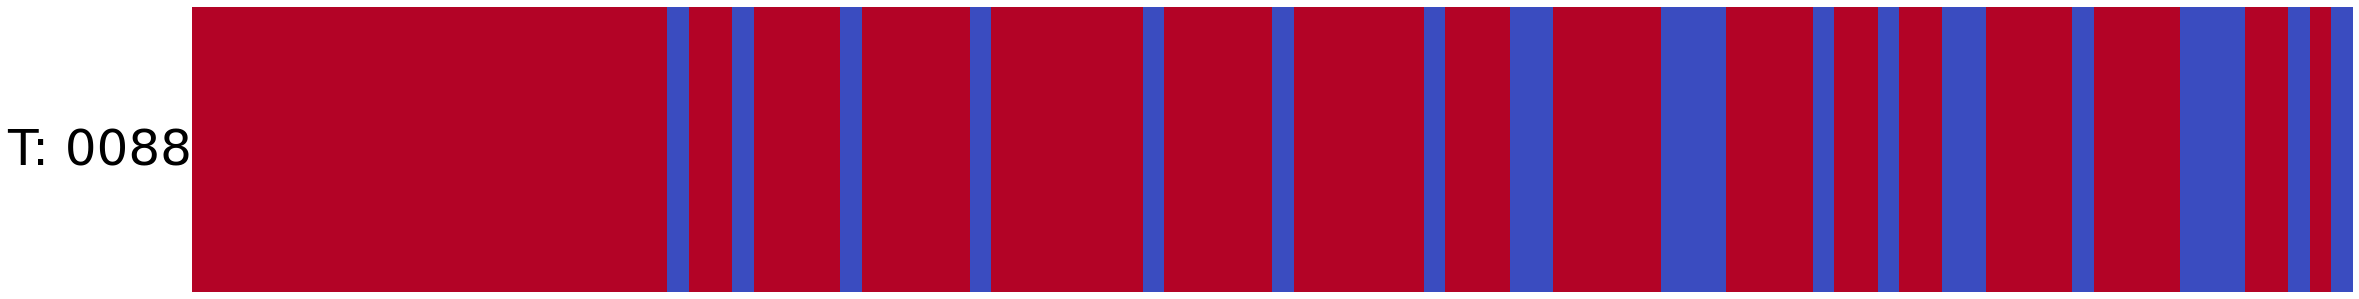

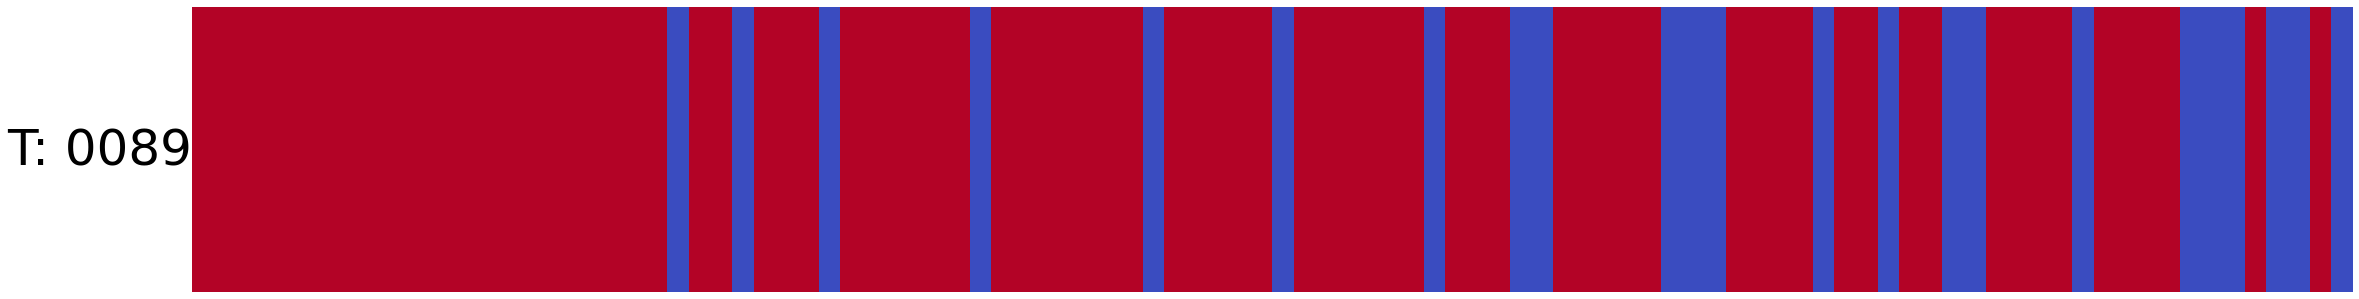

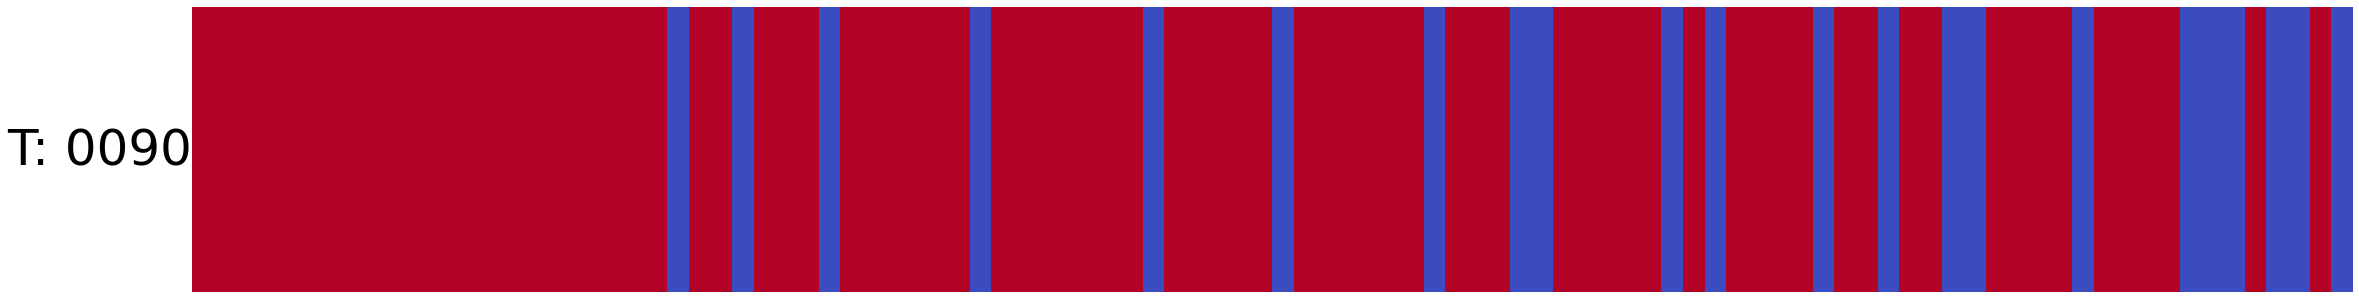

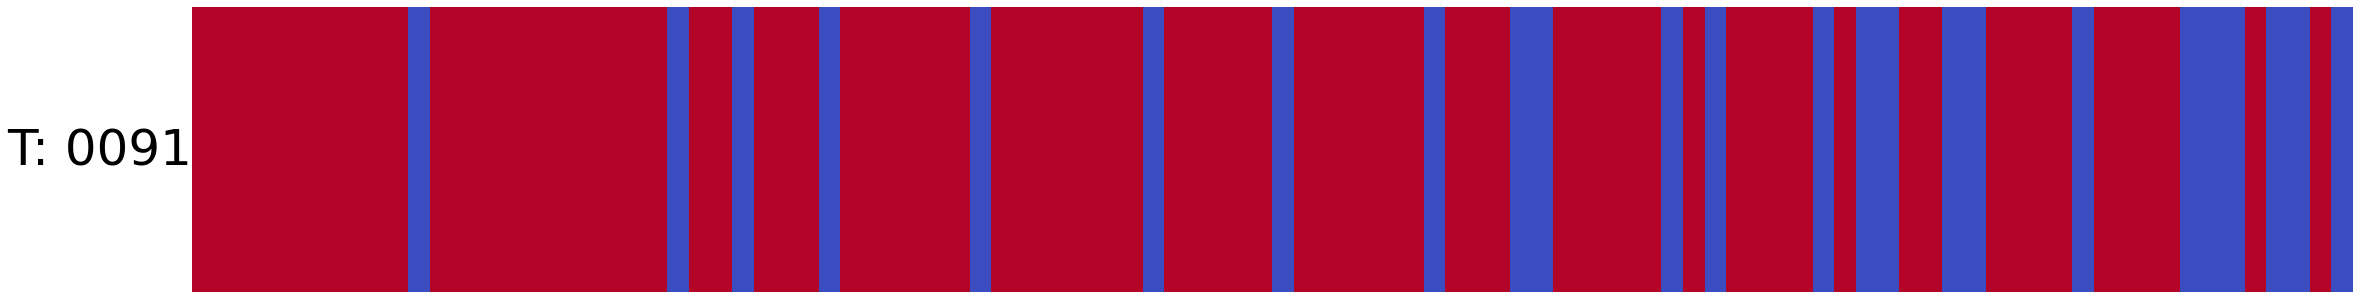

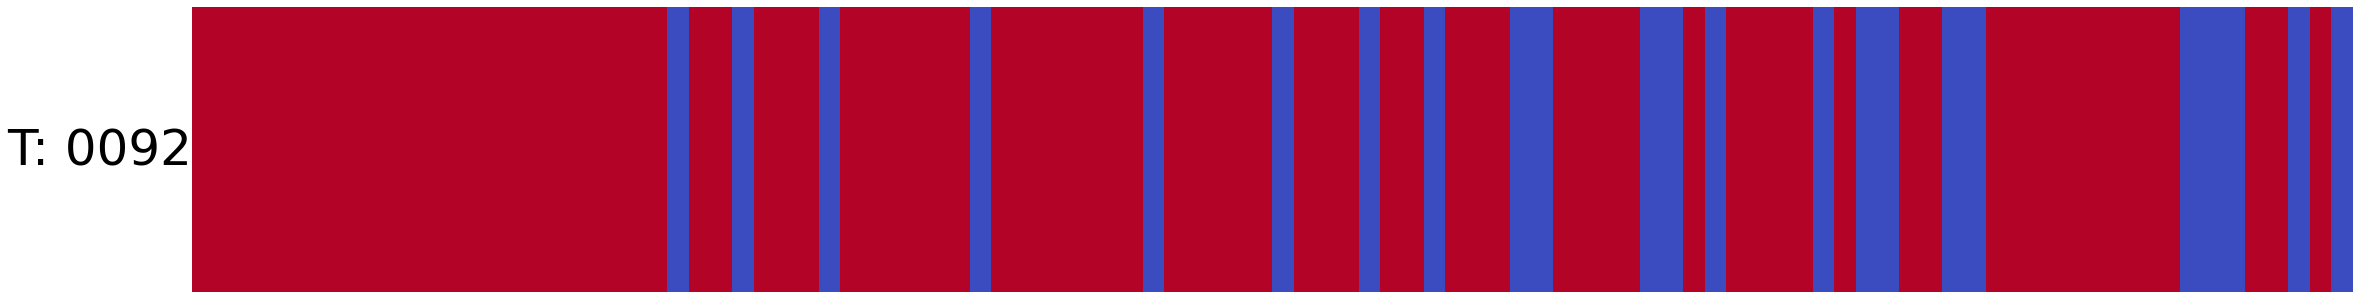

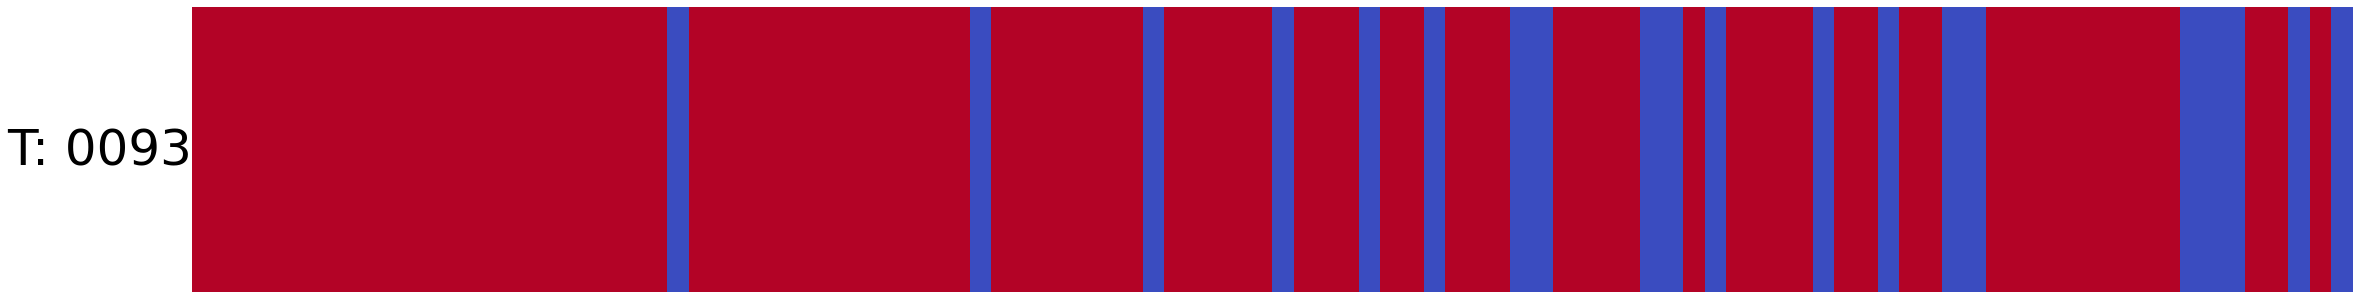

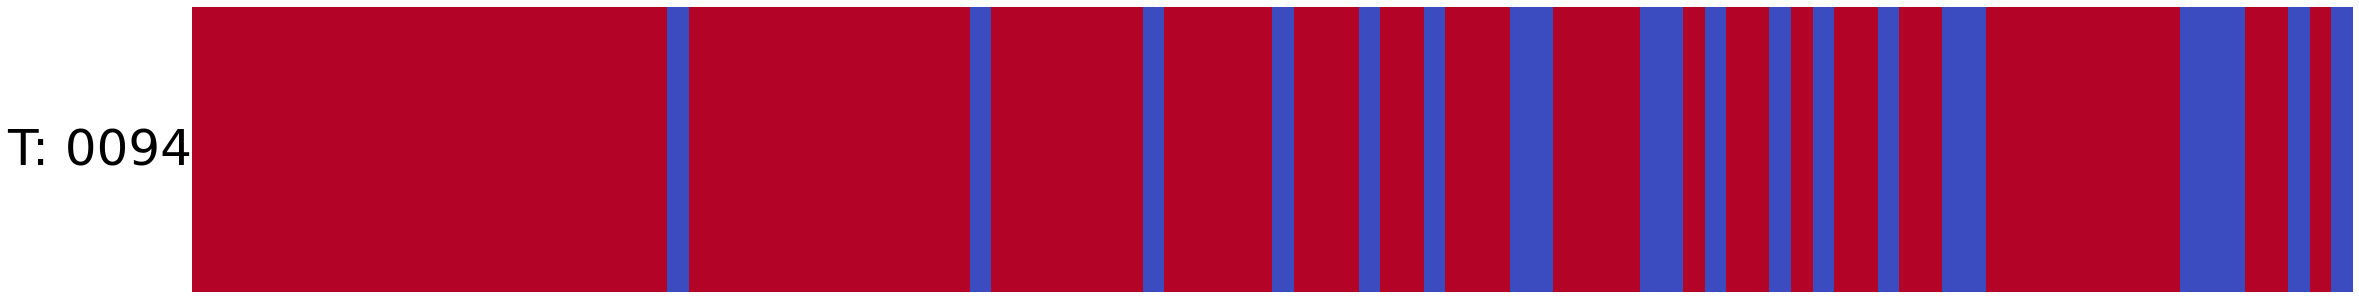

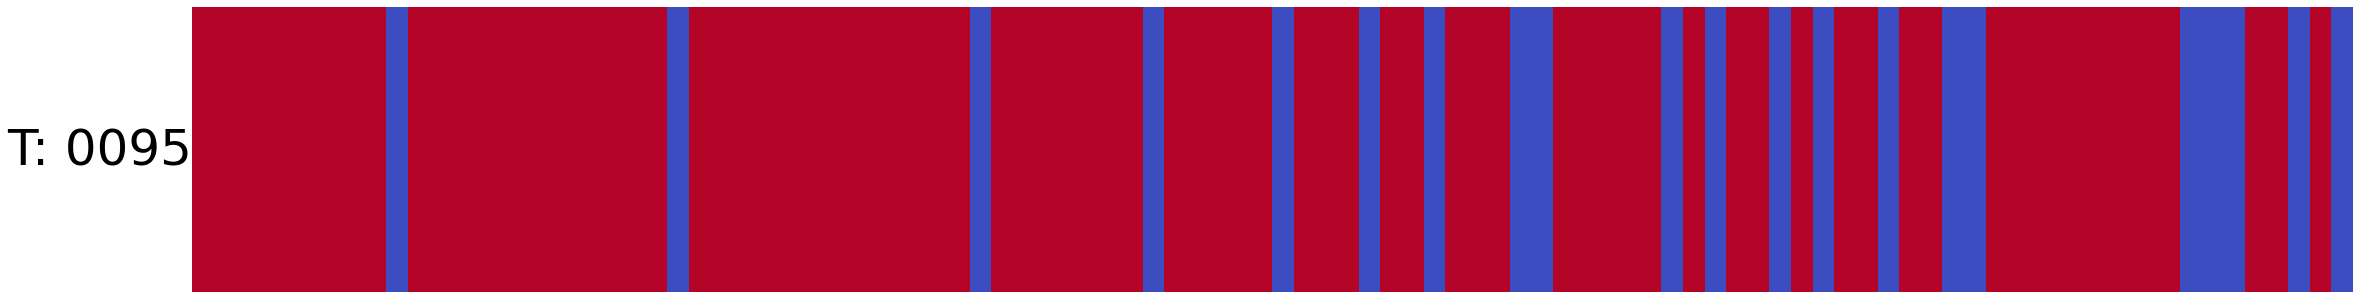

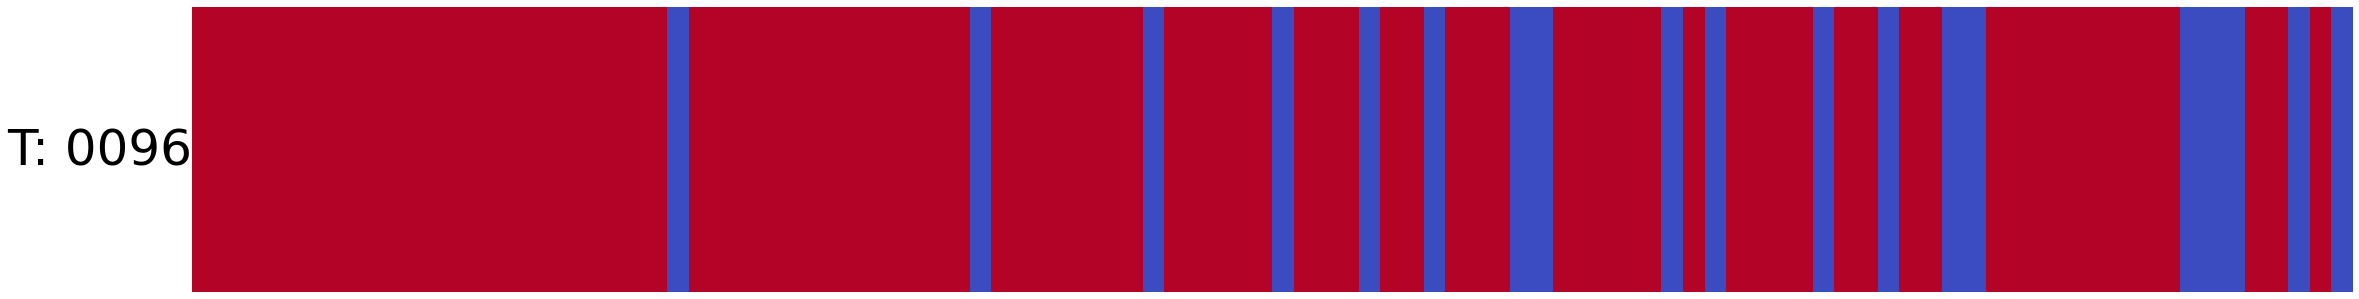

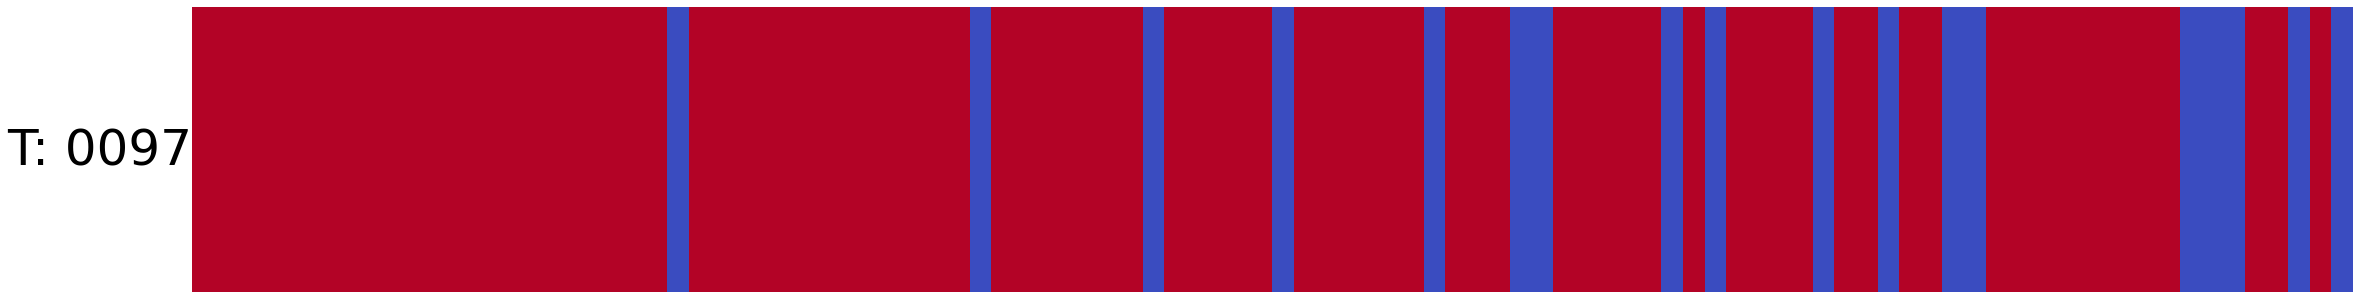

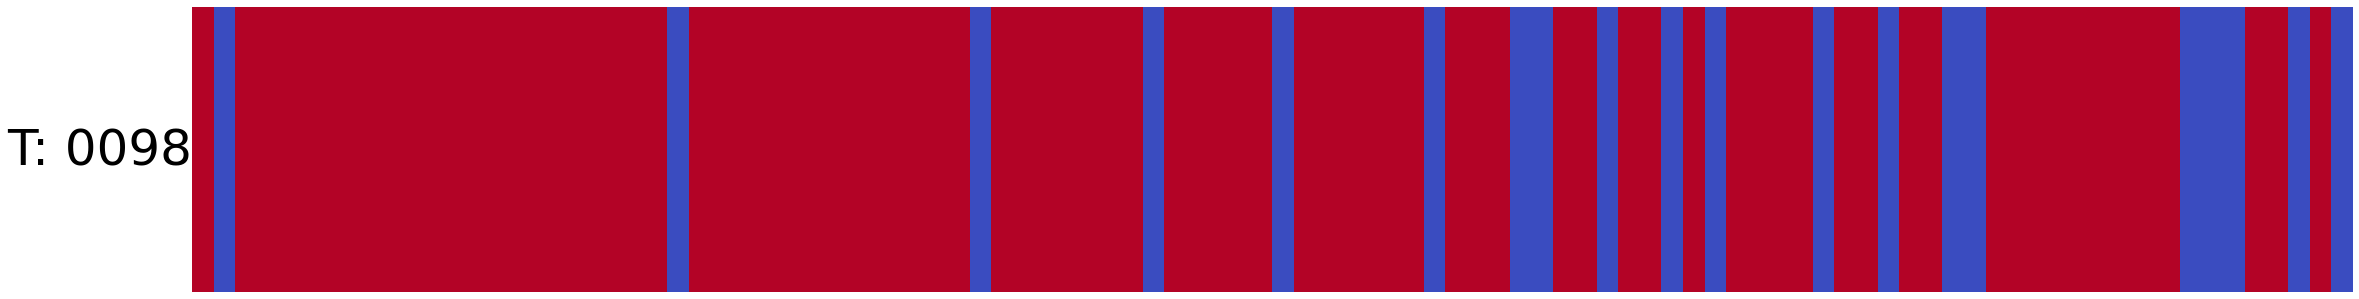

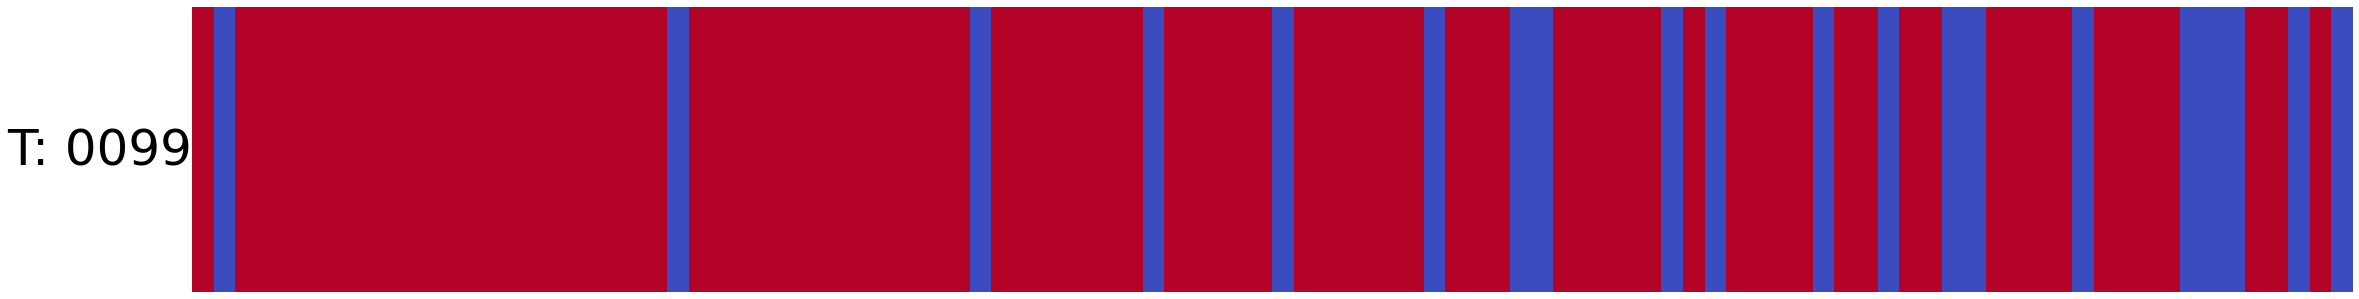

In [ ]:
posicao = np.random.randint(0,N)
estado = np.zeros((N), dtype=int)
duracao = np.zeros((N), dtype=int)

T = 100
D = 5
prob = 0.5
estado[posicao] = 1
duracao[posicao] = D

fig, axis = plt.subplots()
axis.imshow(np.vstack((estado,estado)), aspect='auto', vmin=0, vmax=1, cmap='coolwarm')
axis.set_axis_off()
fig.subplots_adjust(top=1, bottom=0.01, left=0, right=5)
fig.text(0,0.5, "T: %04d"%(0), va='center', ha='right', fontsize=50)
plt.show()

for t in range(1,T):
    new_estado = np.zeros((N), dtype=int)
    for n in range(N):

        if duracao[n] > 0:
            duracao[n] -= 1 # time-step
     
        indices = np.where(matriz[n,:]==1)[0] # lista de adjacência nó n
        viz_contaminado = False
        for idx in indices:
            if estado[idx] == 1: # vizinho está doente
                viz_contaminado = True
                break

        if np.random.random_sample()<=prob and viz_contaminado: # chance de contágio    
                new_estado[n] = 1
                duracao[n] = D
        else:
            if duracao[n] == 0:
                new_estado[n] = 0
            else:
                new_estado[n] = estado[n]

    estado = new_estado
    fig, axis = plt.subplots()
    axis.imshow(np.vstack((estado,estado)), vmin=0, vmax=1, aspect='auto', cmap='coolwarm')
    axis.set_axis_off()
    fig.subplots_adjust(top=1, bottom=0.01, left=0, right=5)
    fig.text(0,0.5, "T: %04d"%(t), va='center', ha='right', fontsize=50)
#     fig.text(0,0,"Tempo", name, va='center', ha='right', fontsize=10)

    plt.show()
    if len(np.nonzero(estado)[0]) == 0:
        break


---


## Simulação 2.1 com duração de infecção menor:

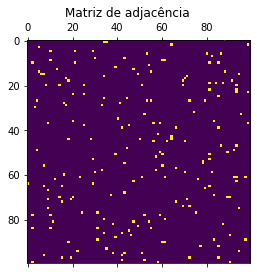

In [ ]:
#Parâmetros do grafo
N=100       #Número de vértices
grauMedio=4 #Grau médio
a = grauMedio*N//2 #número de arestas

matriz = np.zeros((N,N), dtype=int)

numeroArestas=0
while (numeroArestas <= a):
  vertice1 = np.random.randint(0, N)
  vertice2 = np.random.randint(0, N)
  matriz[vertice1, vertice2] = 1
  numeroArestas+=1


plt.matshow(matriz)
plt.suptitle('Matriz de adjacência')
plt.show()

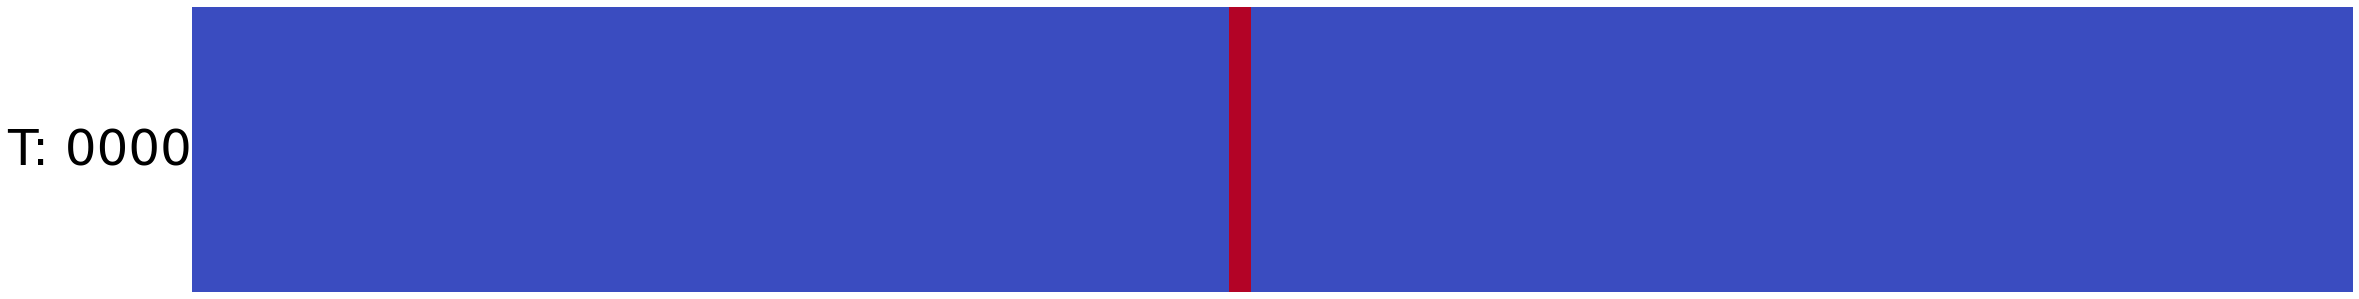

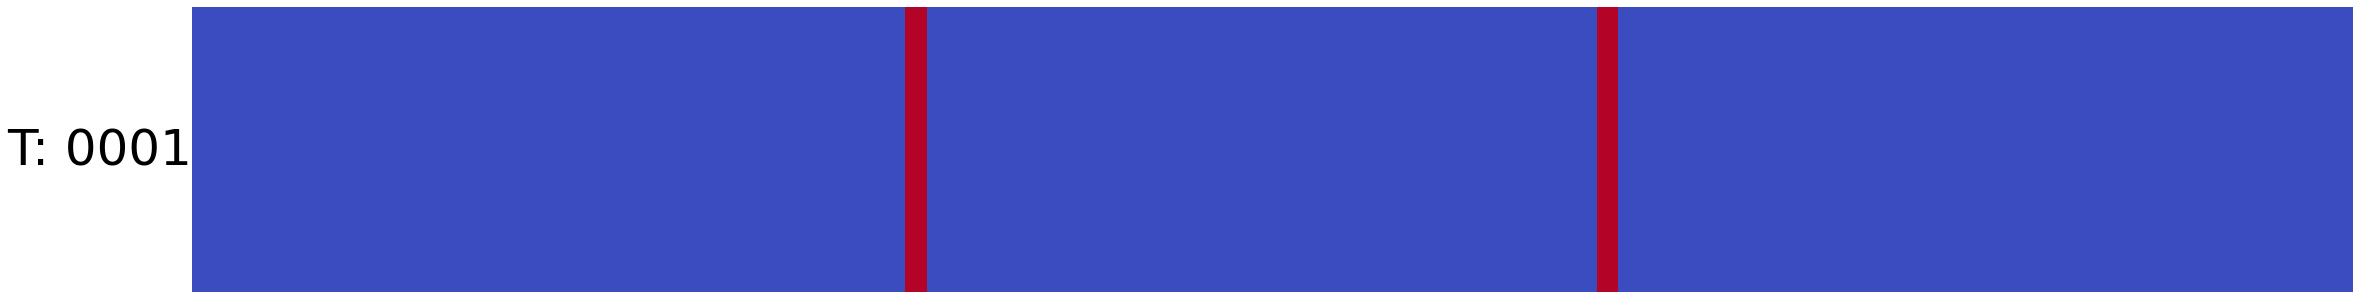

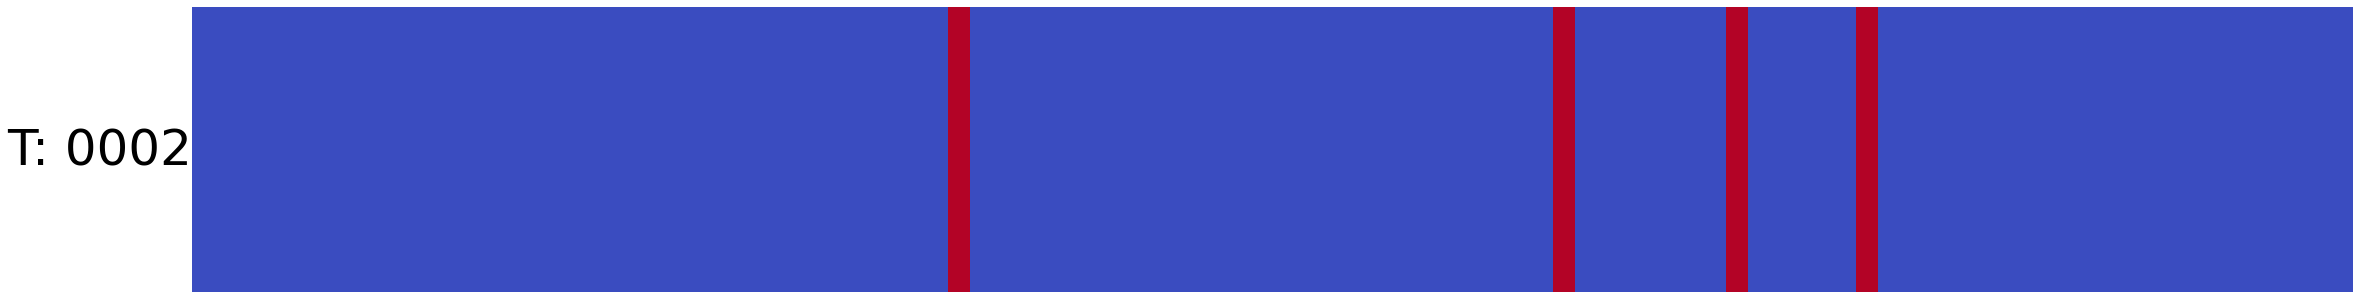

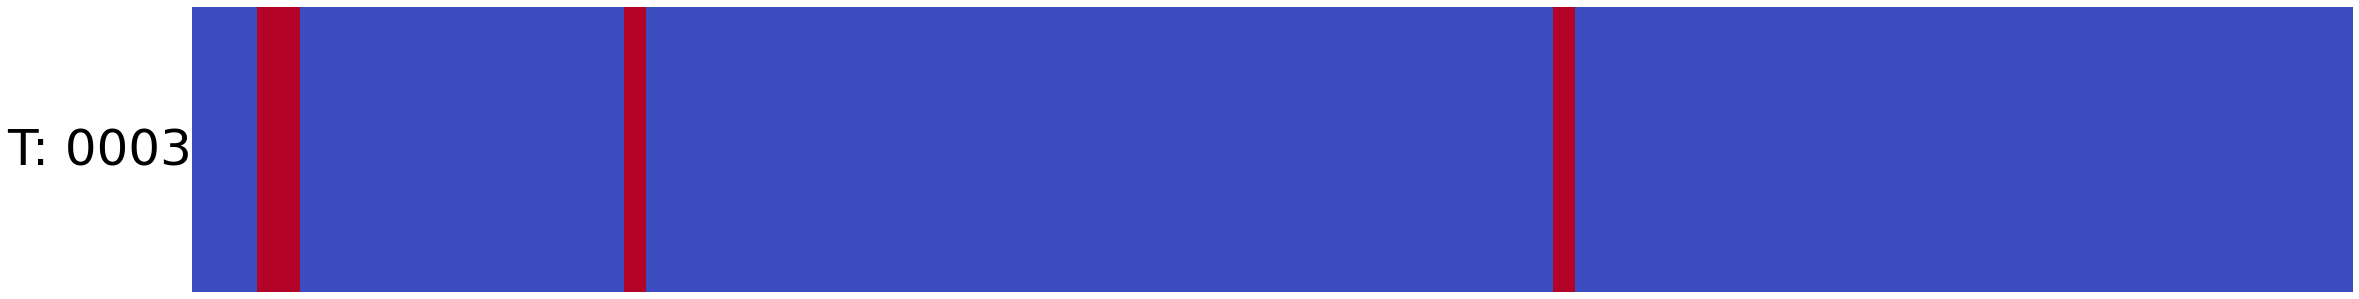

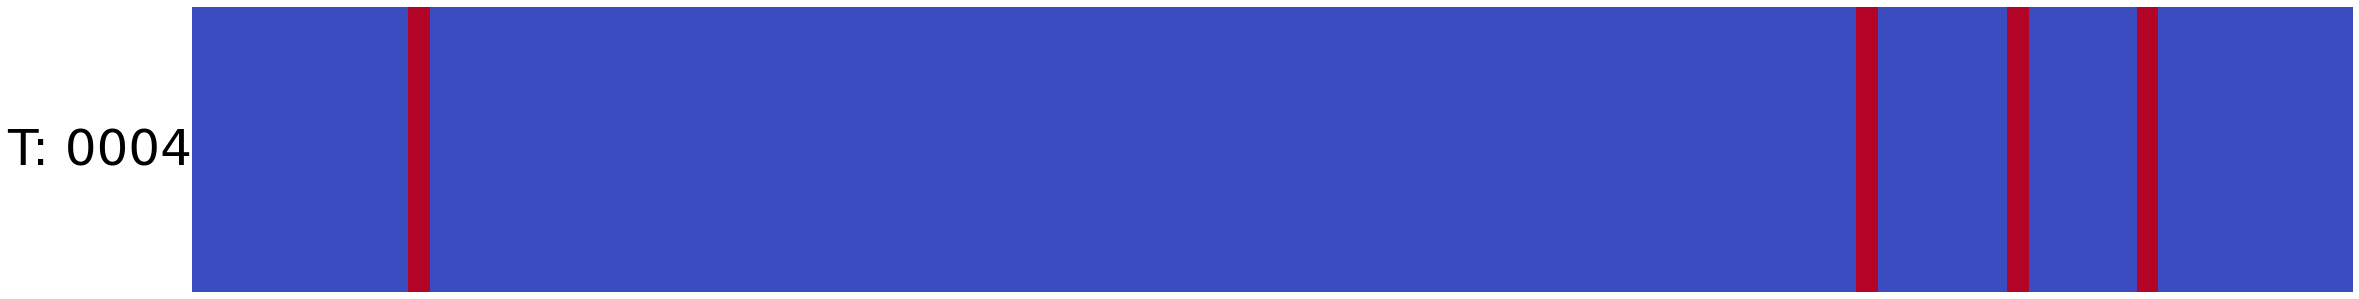

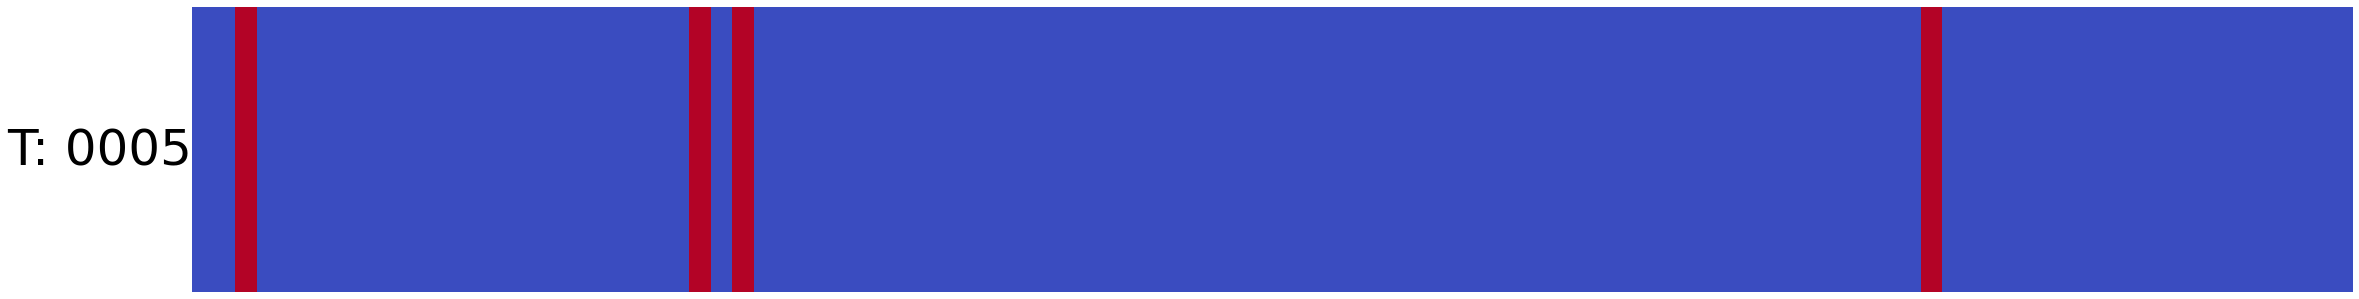

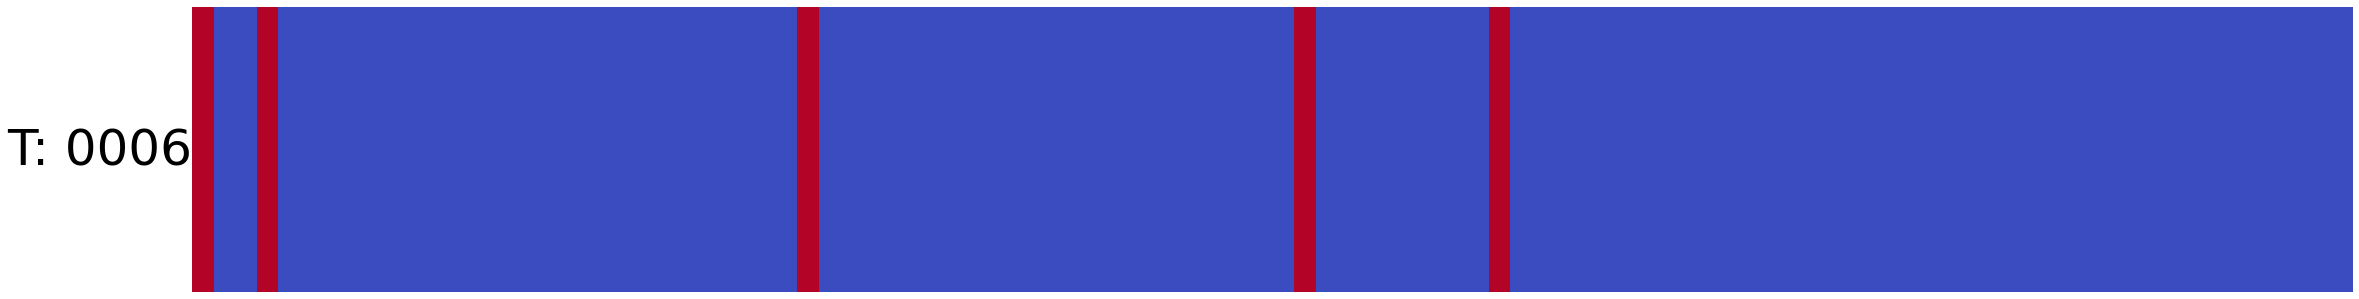

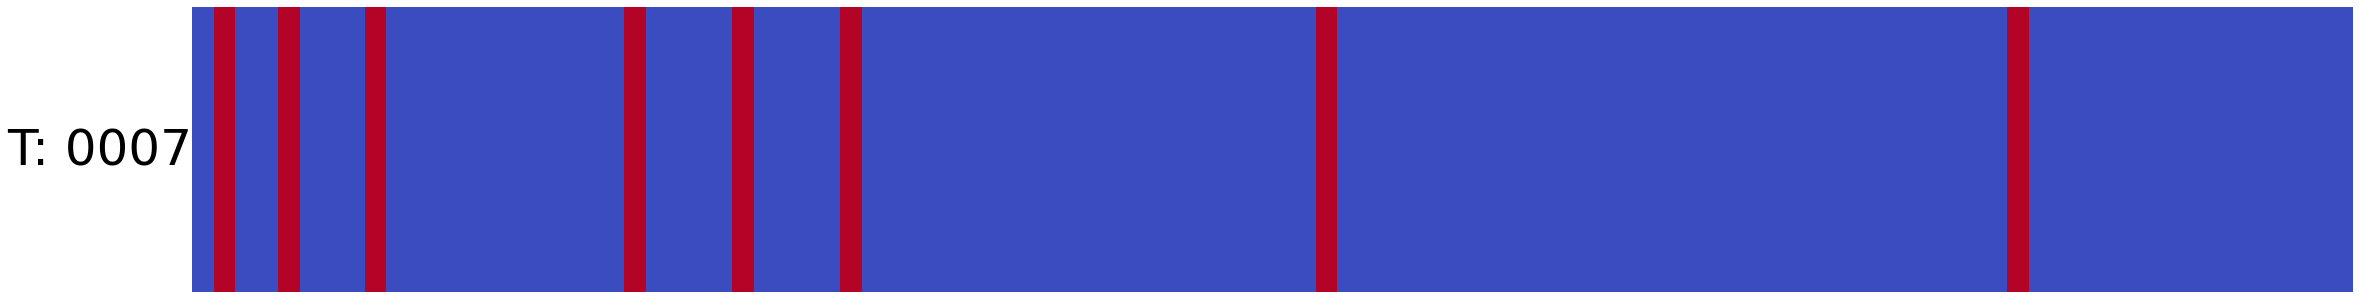

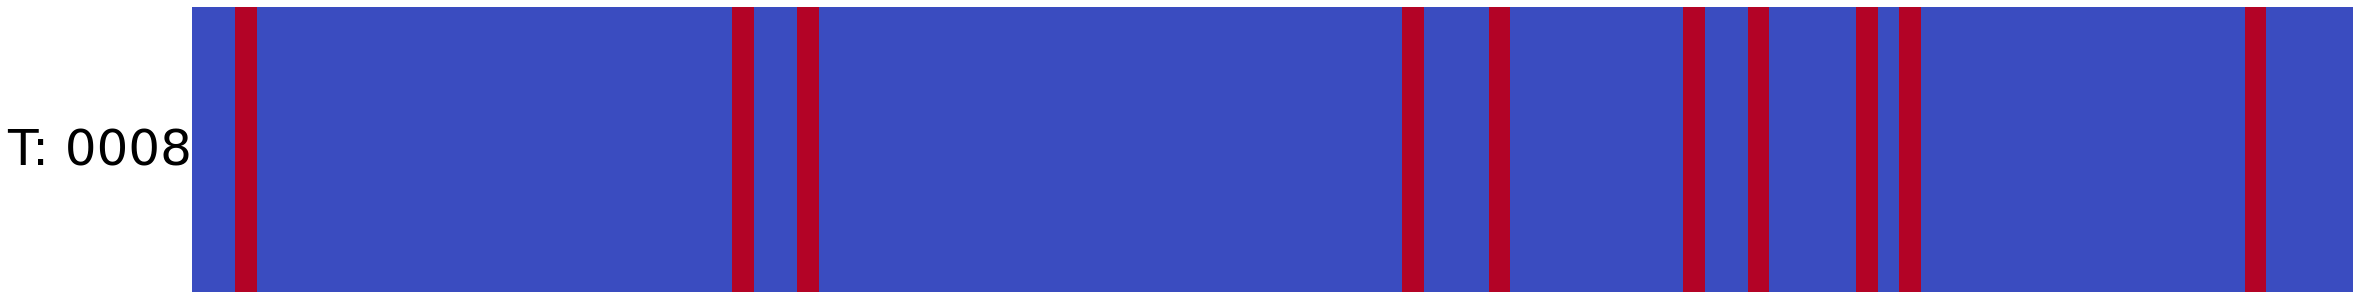

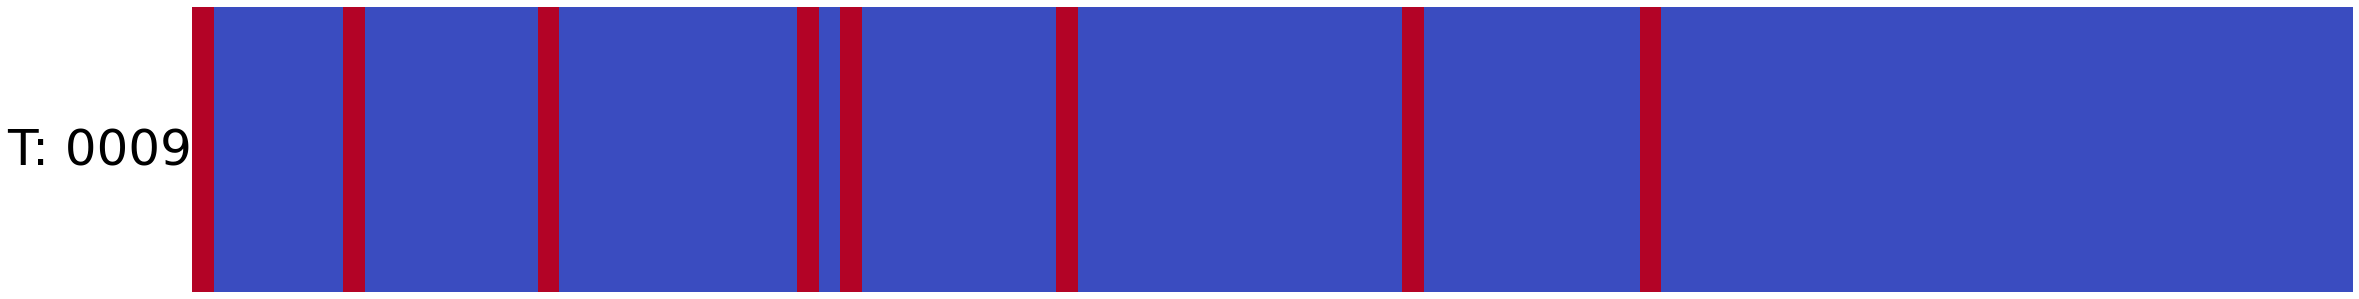

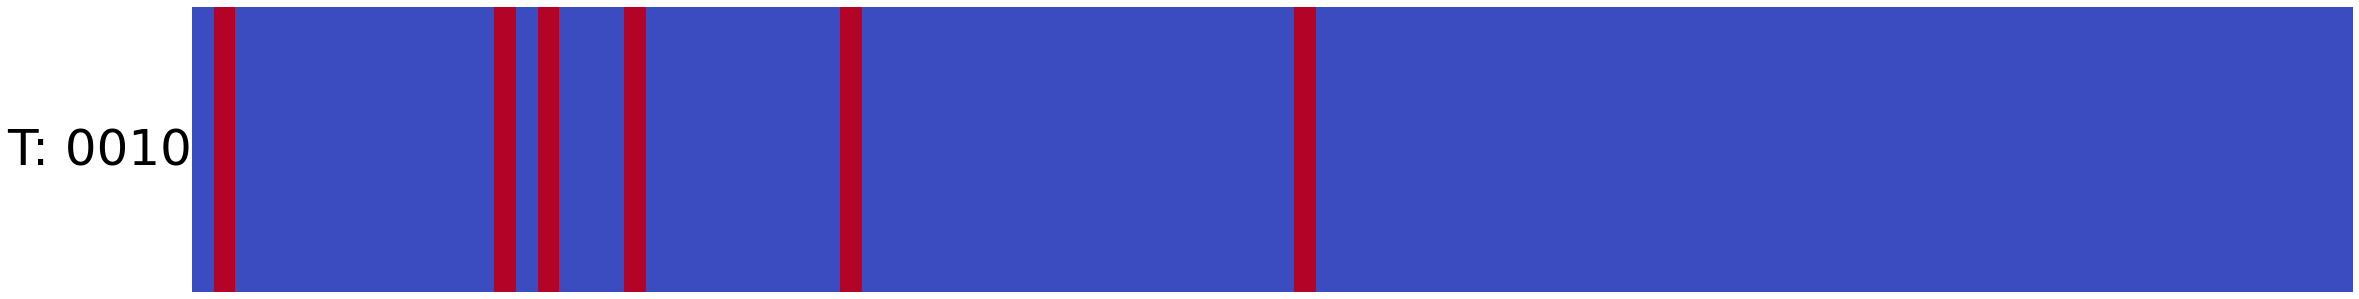

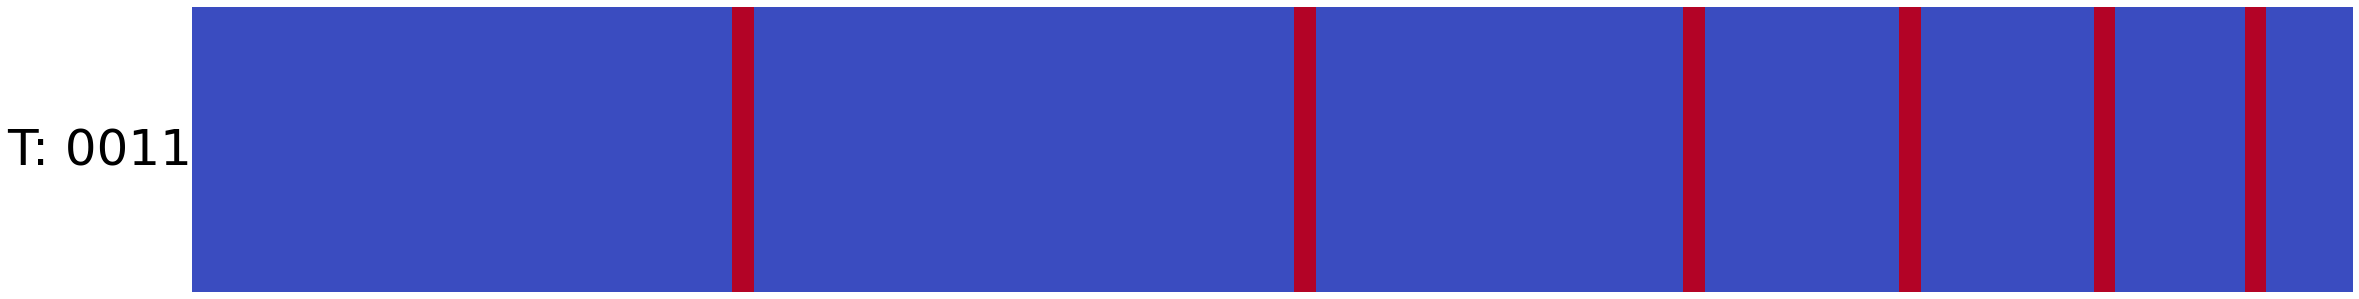

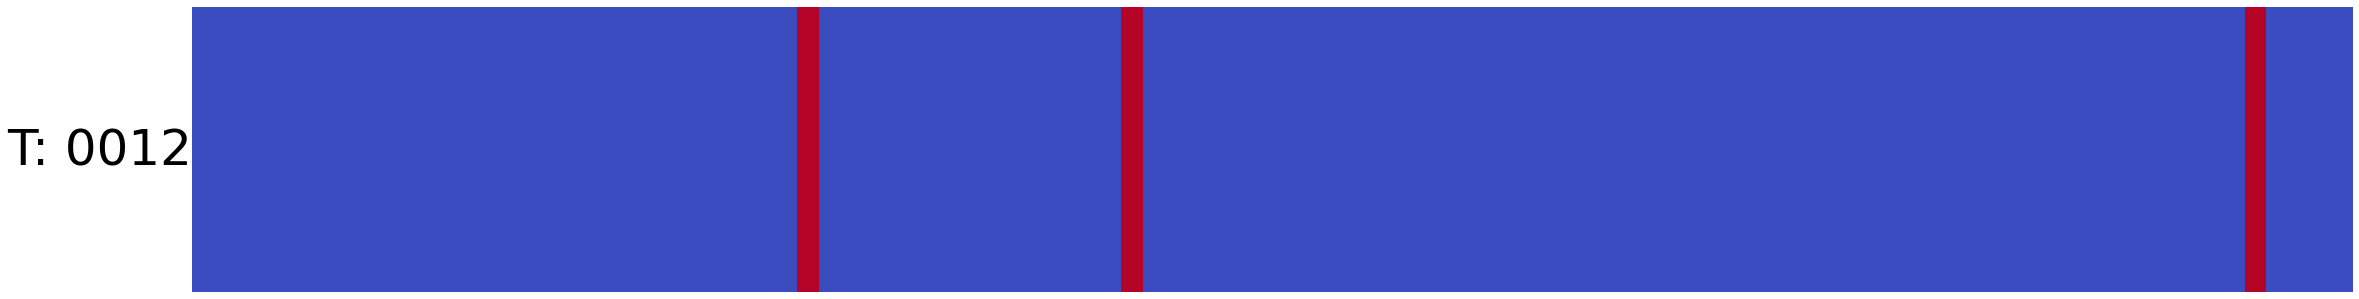

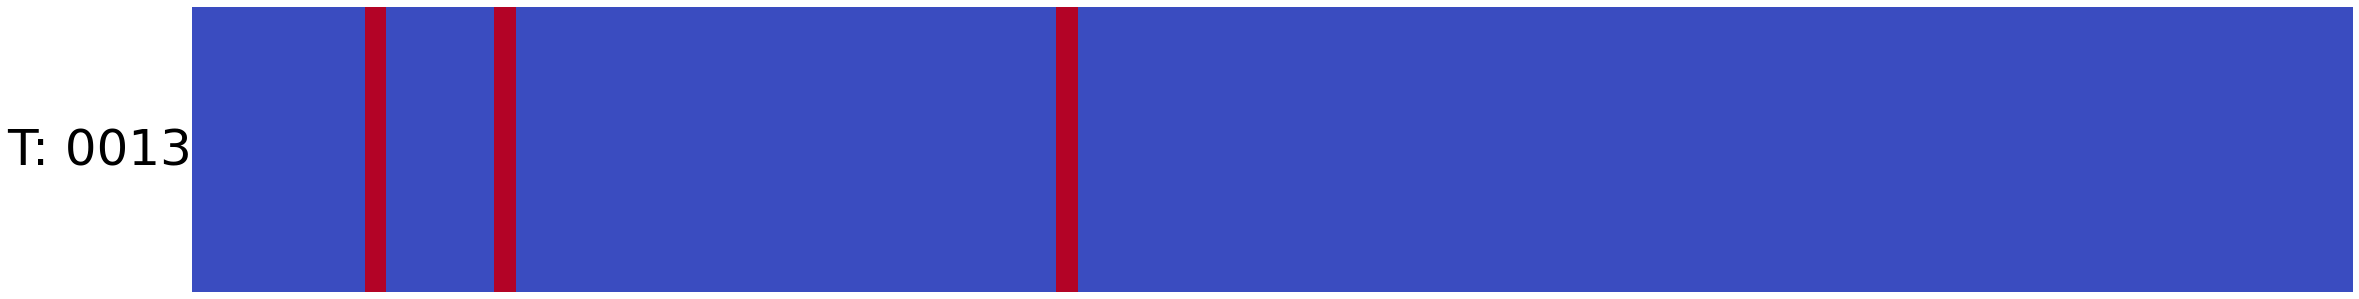

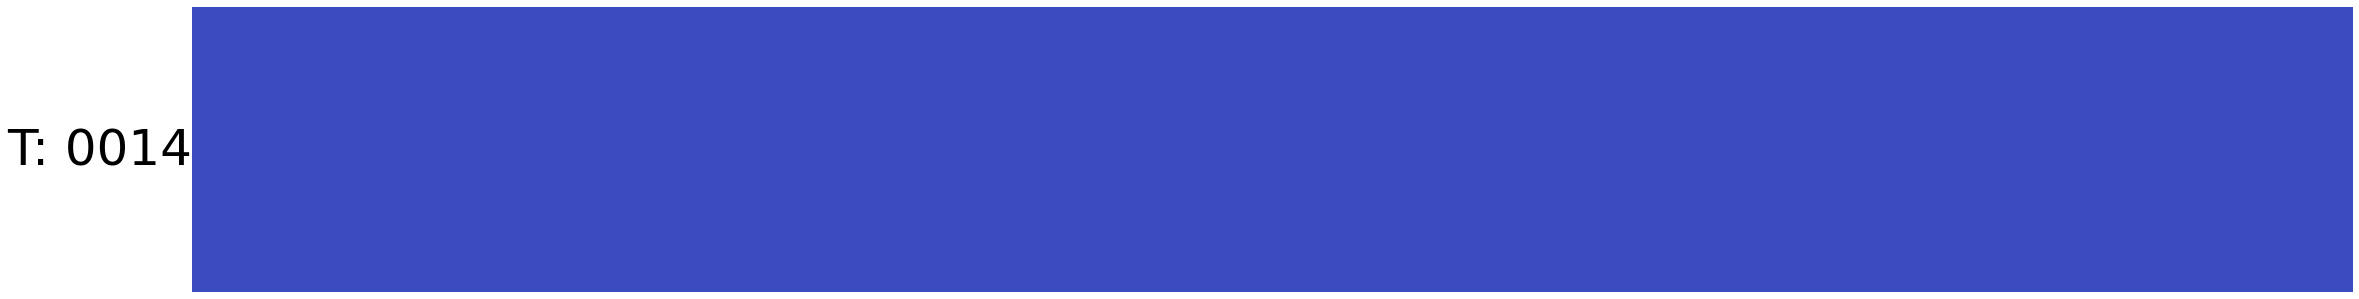

In [ ]:
posicao = np.random.randint(0,N)
estado = np.zeros((N), dtype=int)
duracao = np.zeros((N), dtype=int)

T = 100
D = 1
prob = 0.5
estado[posicao] = 1
duracao[posicao] = D

fig, axis = plt.subplots()
axis.imshow(np.vstack((estado,estado)), aspect='auto', vmin=0, vmax=1, cmap='coolwarm')
axis.set_axis_off()
fig.subplots_adjust(top=1, bottom=0.01, left=0, right=5)
fig.text(0,0.5, "T: %04d"%(0), va='center', ha='right', fontsize=50)
plt.show()

for t in range(1,T):
    new_estado = np.zeros((N), dtype=int)
    for n in range(N):

        if duracao[n] > 0:
            duracao[n] -= 1 # time-step
     
        indices = np.where(matriz[n,:]==1)[0] # lista de adjacência nó n
        viz_contaminado = False
        for idx in indices:
            if estado[idx] == 1: # vizinho está doente
                viz_contaminado = True
                break

        if np.random.random_sample()<=prob and viz_contaminado: # chance de contágio    
                new_estado[n] = 1
                duracao[n] = D
        else:
            if duracao[n] == 0:
                new_estado[n] = 0
            else:
                new_estado[n] = estado[n]

    estado = new_estado
    fig, axis = plt.subplots()
    axis.imshow(np.vstack((estado,estado)), vmin=0, vmax=1, aspect='auto', cmap='coolwarm')
    axis.set_axis_off()
    fig.subplots_adjust(top=1, bottom=0.01, left=0, right=5)
    fig.text(0,0.5, "T: %04d"%(t), va='center', ha='right', fontsize=50)
#     fig.text(0,0,"Tempo", name, va='center', ha='right', fontsize=10)

    plt.show()
    if len(np.nonzero(estado)[0]) == 0:
        break
    


Nesse caso, pode-se perceber que com uma duração de 1 dia de contágio, o período contagioso se encerra em T=14. Isso se dá ao fato de que, pelo D ser significativamente baixo, o tempo que uma pessoa (ou vértice) é considerada perigosa é muito baixo. Assim, a propagação se inicia e finaliza em um tempo inferior ao que foi visto com D=5. 

Além disso, por se tratar de uma rede aleatória, o T final pode ser variado, porém, a probabilidade de ele ser menor devido ao D baixo é maior.


---


## Simulação 2.2 com duração de infecção infinita (sem cura):

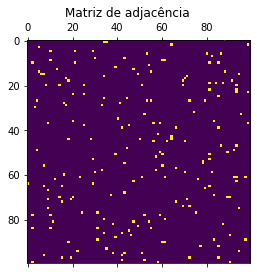

In [ ]:
#Parâmetros do grafo
N=100       #Número de vértices
grauMedio=4 #Grau médio
a = grauMedio*N//2 #número de arestas

matriz = np.zeros((N,N), dtype=int)

numeroArestas=0
while (numeroArestas <= a):
  vertice1 = np.random.randint(0, N)
  vertice2 = np.random.randint(0, N)
  matriz[vertice1, vertice2] = 1
  numeroArestas+=1


plt.matshow(matriz)
plt.suptitle('Matriz de adjacência')
plt.show()

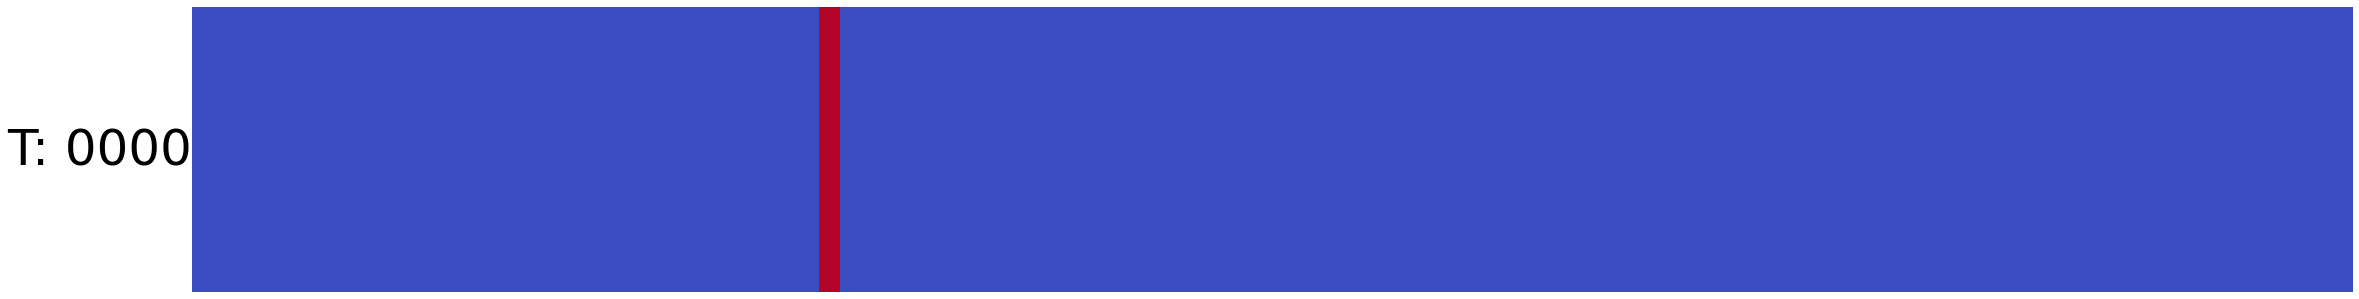

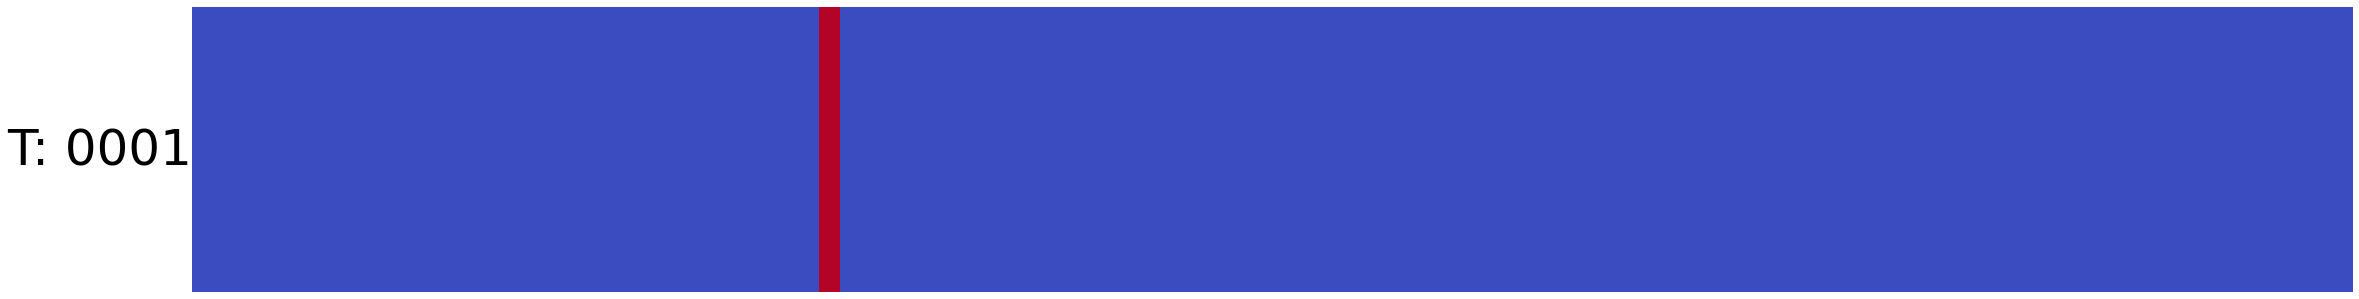

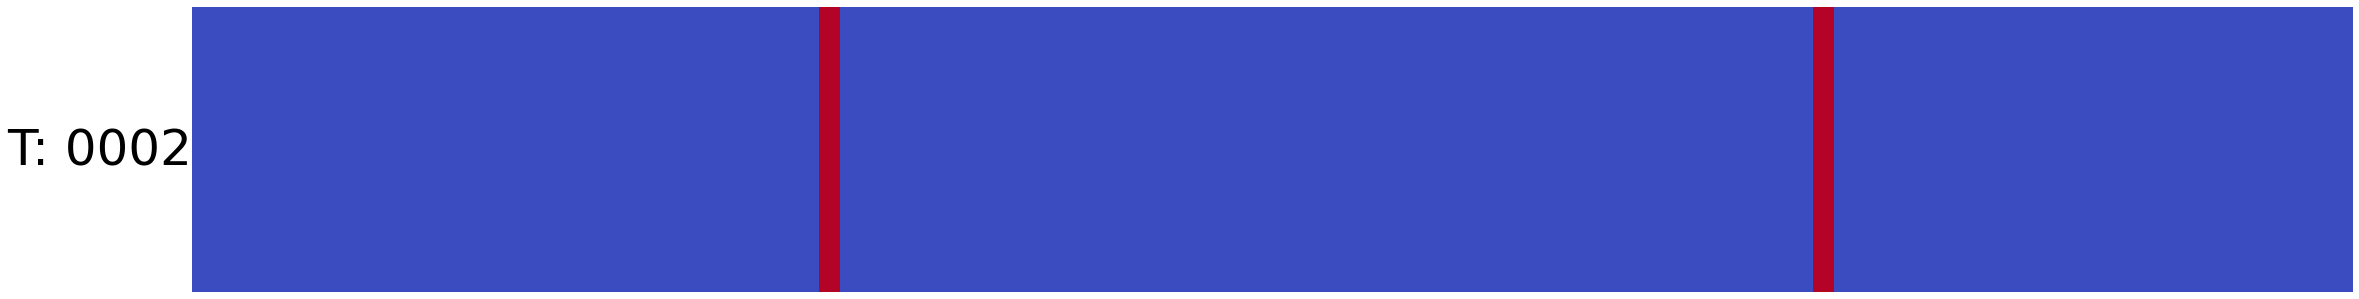

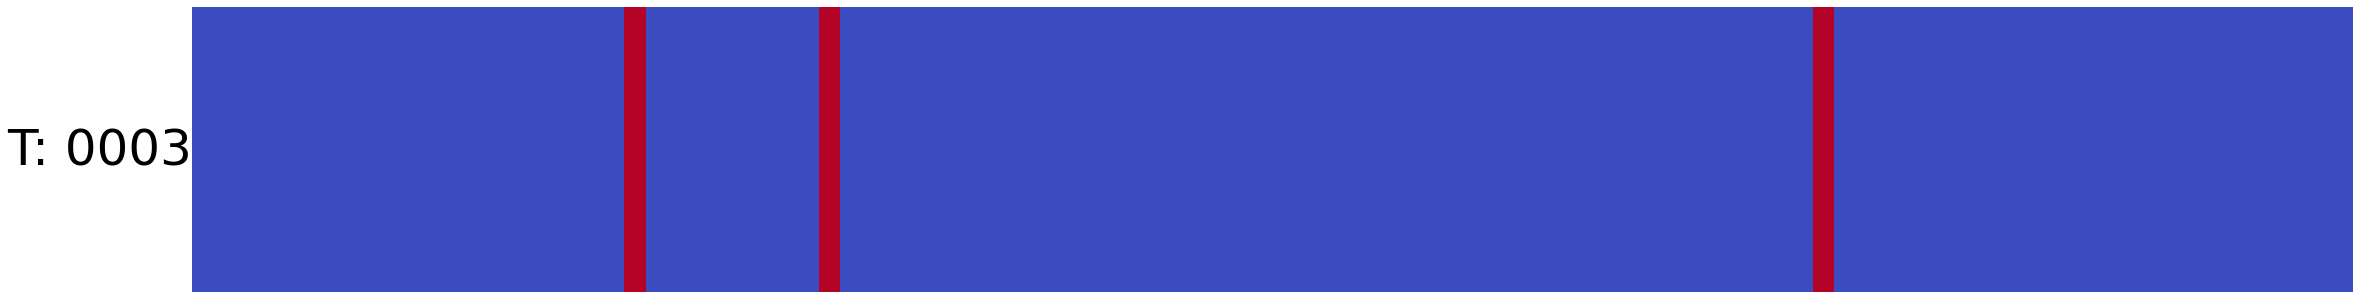

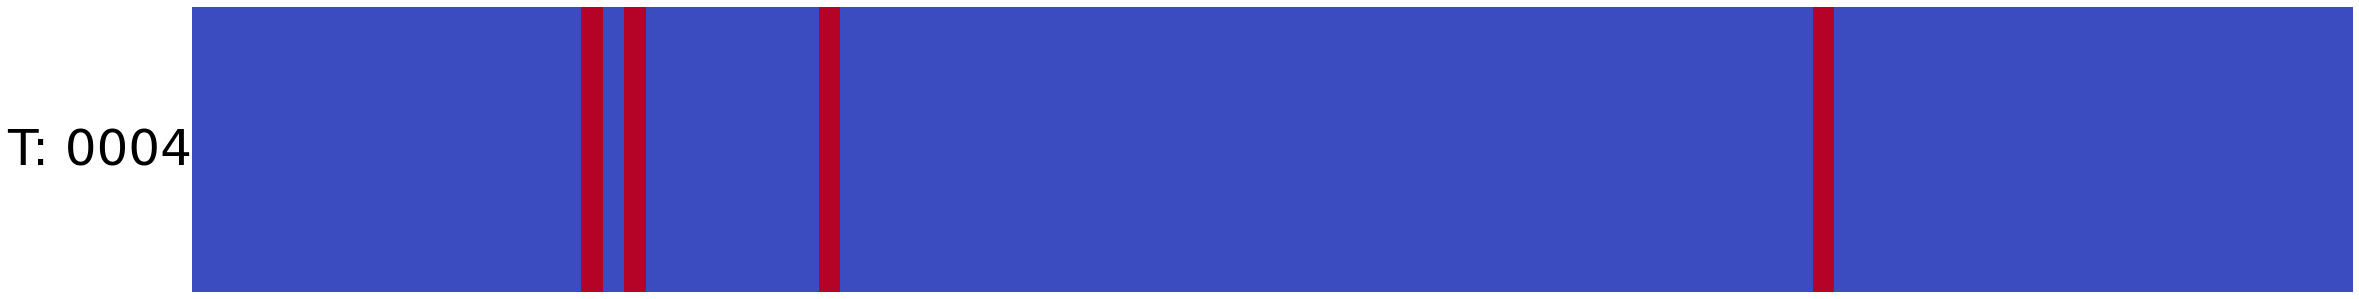

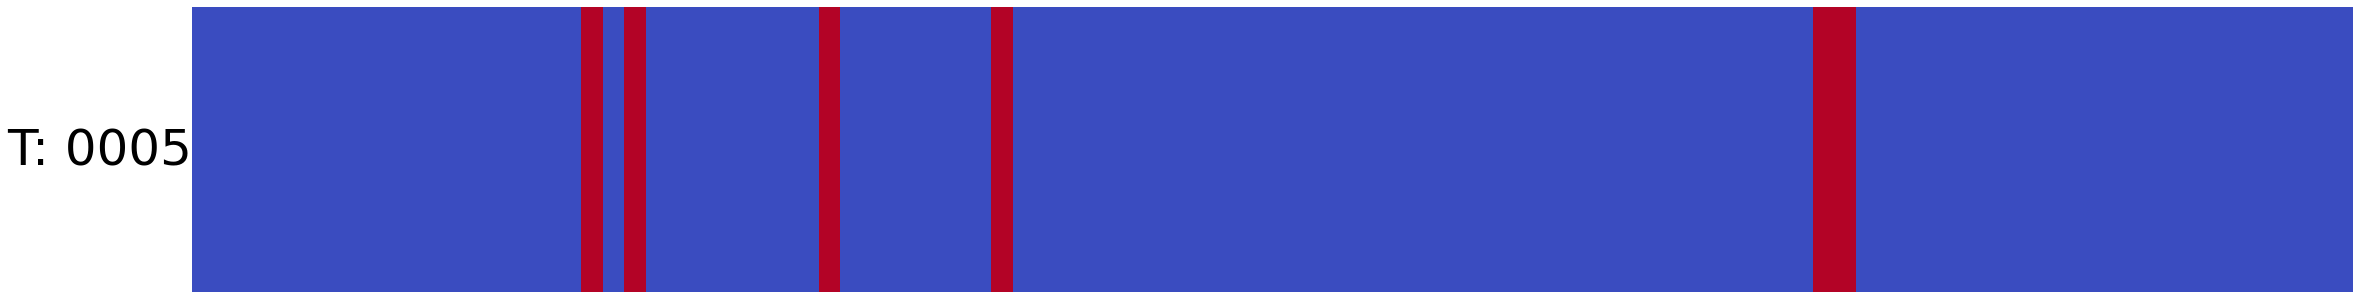

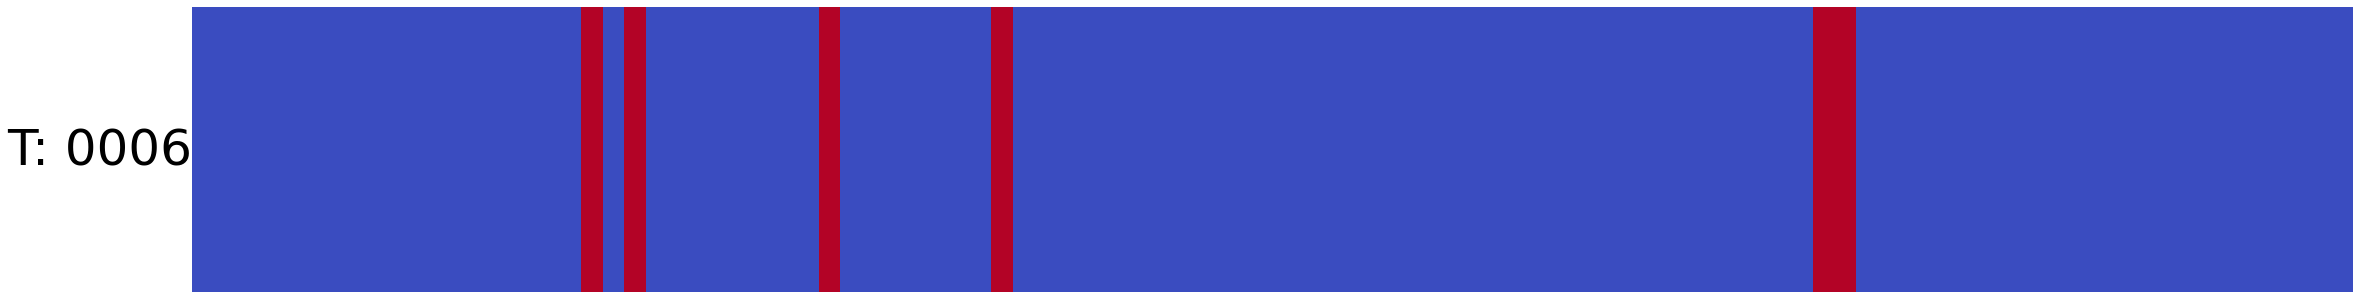

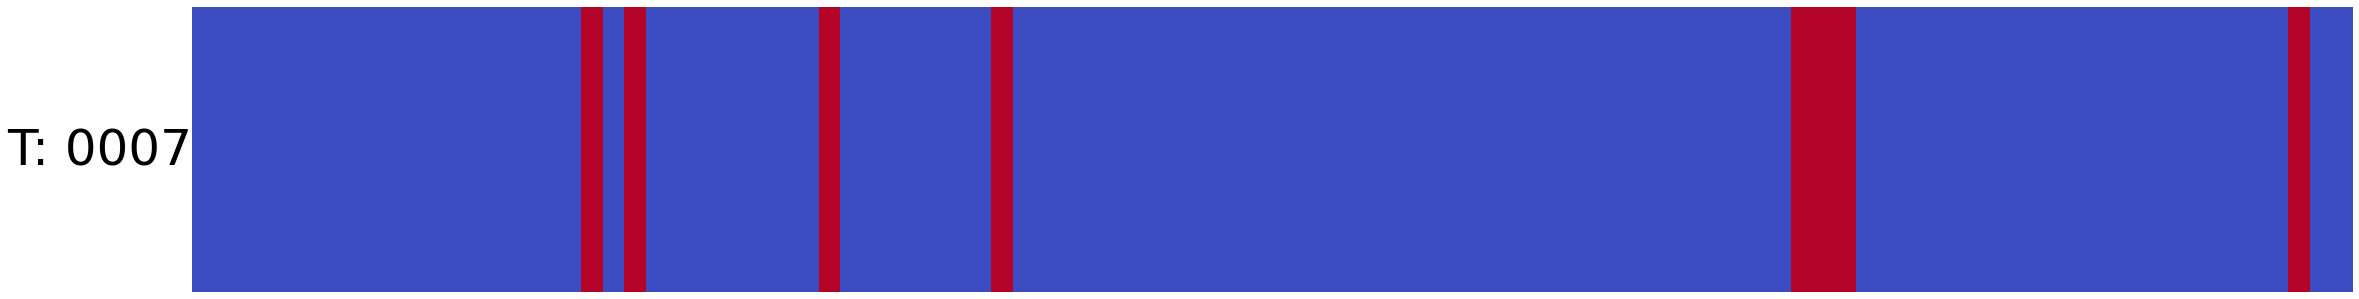

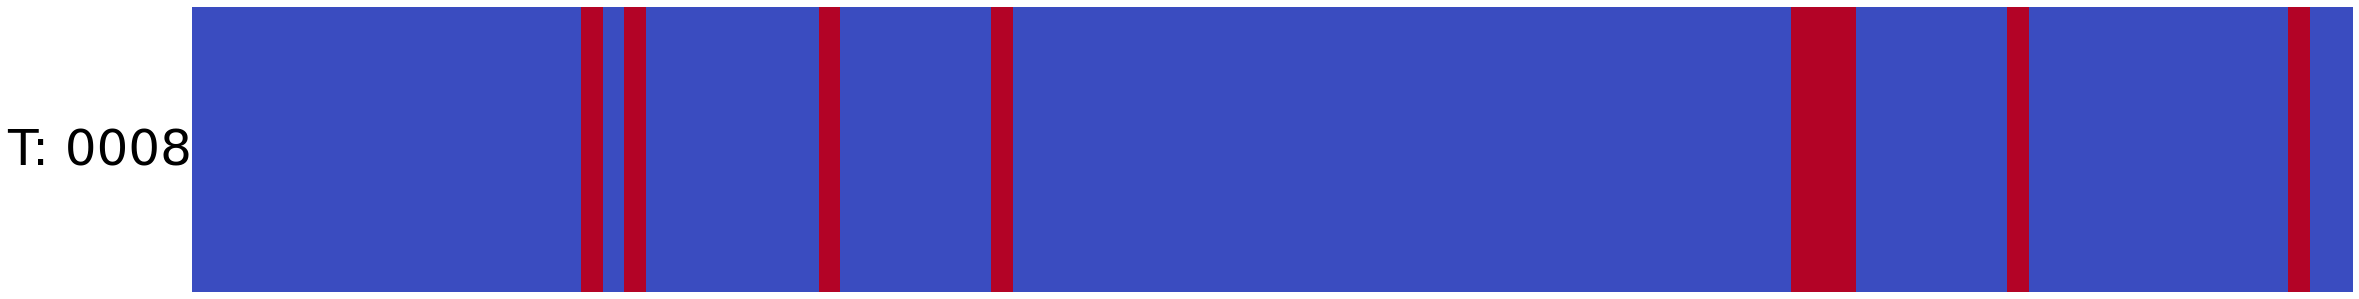

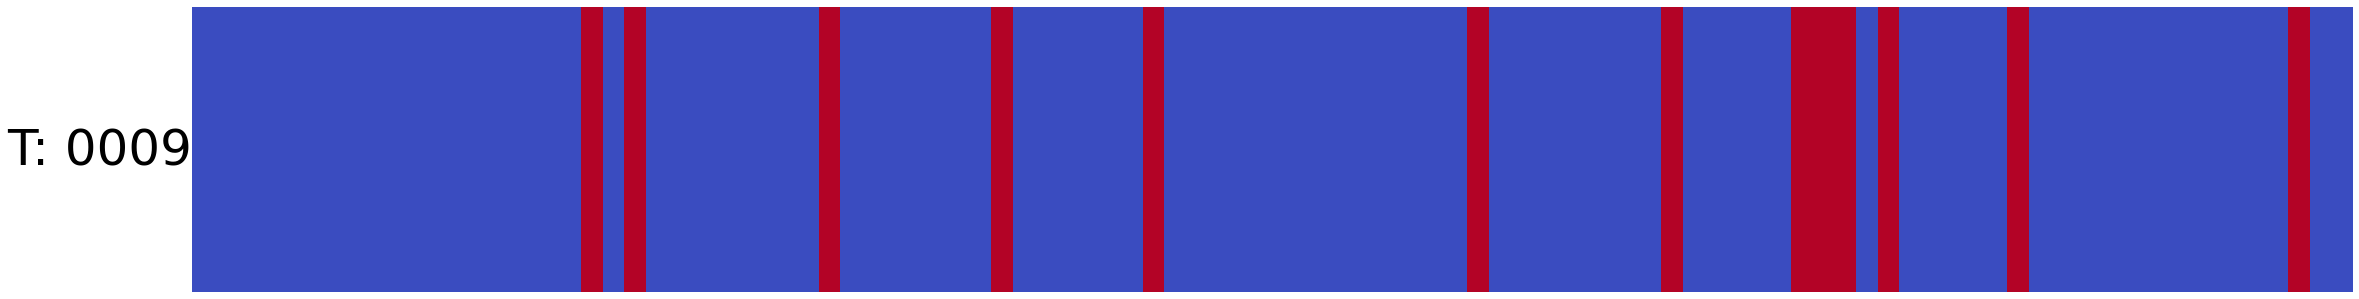

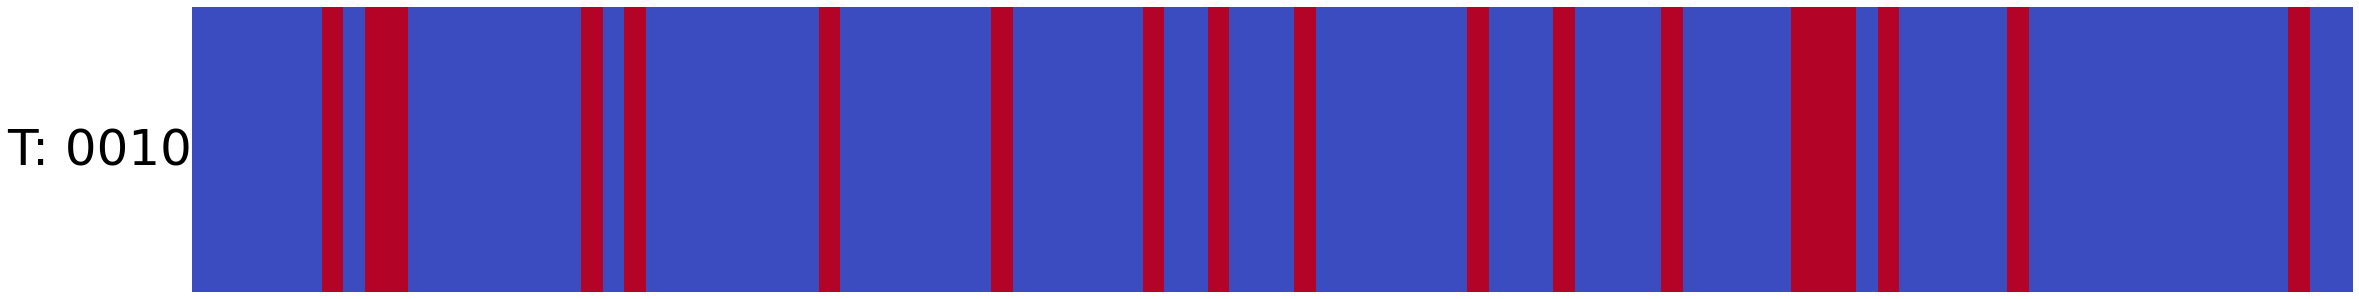

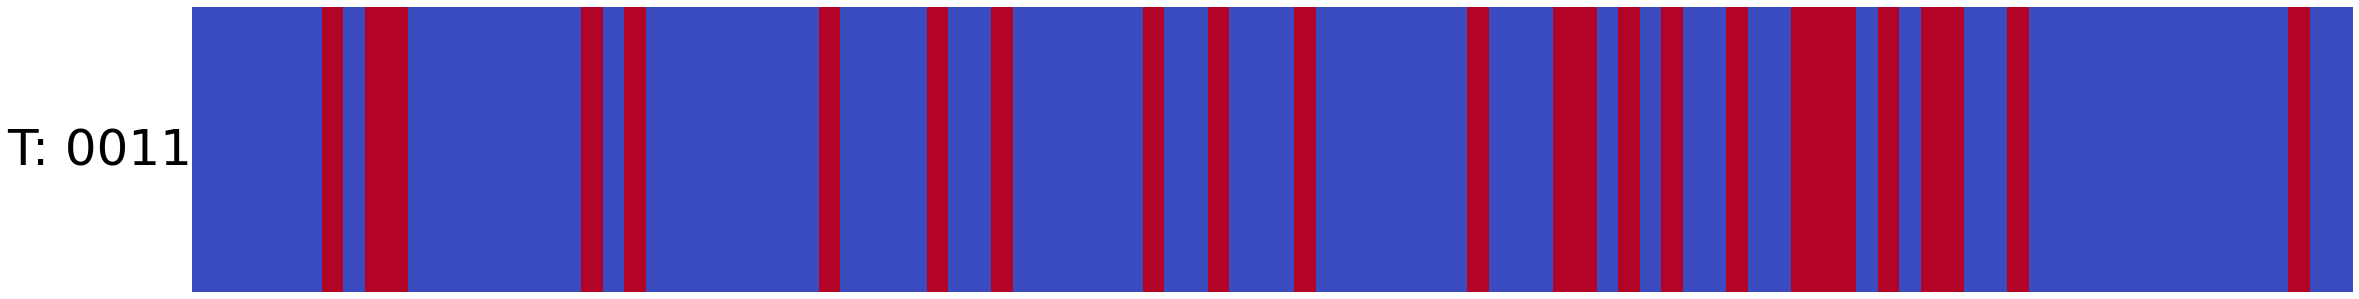

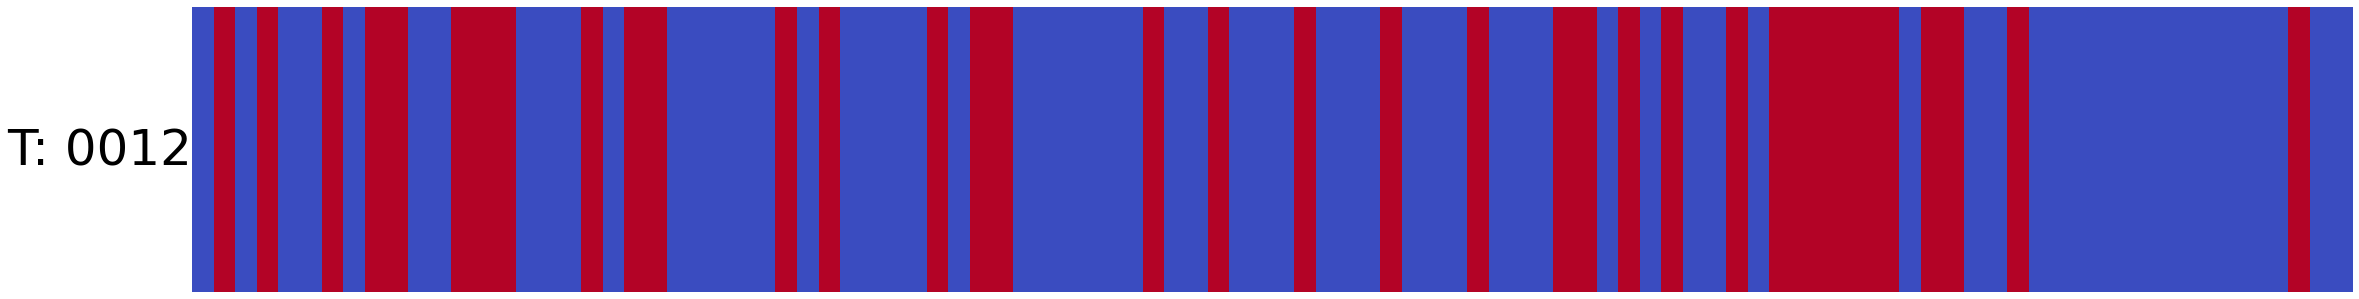

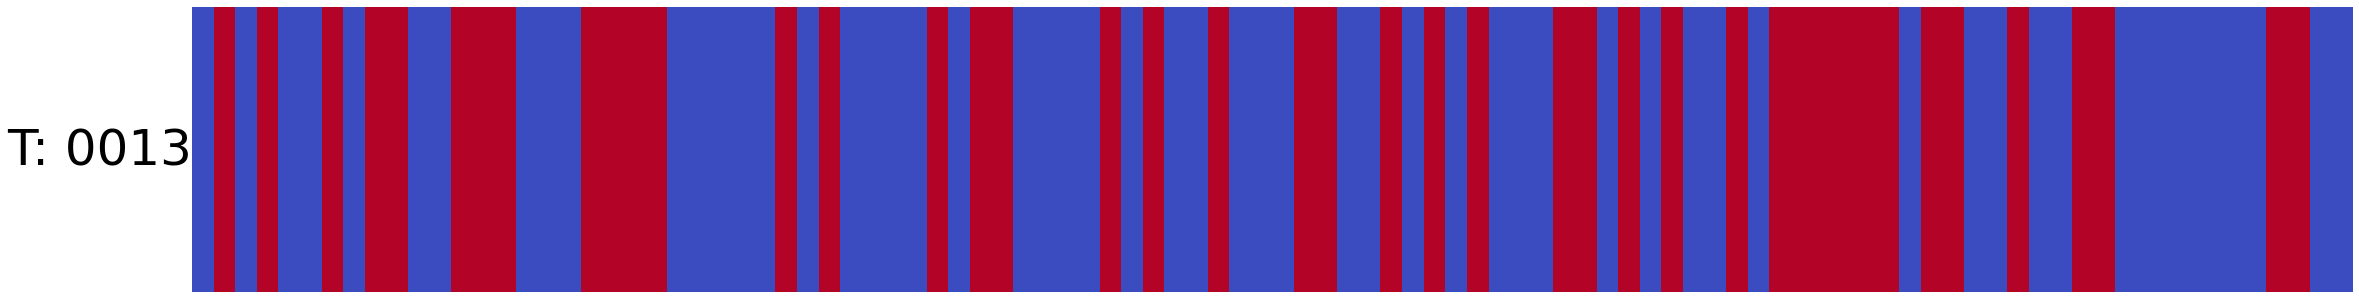

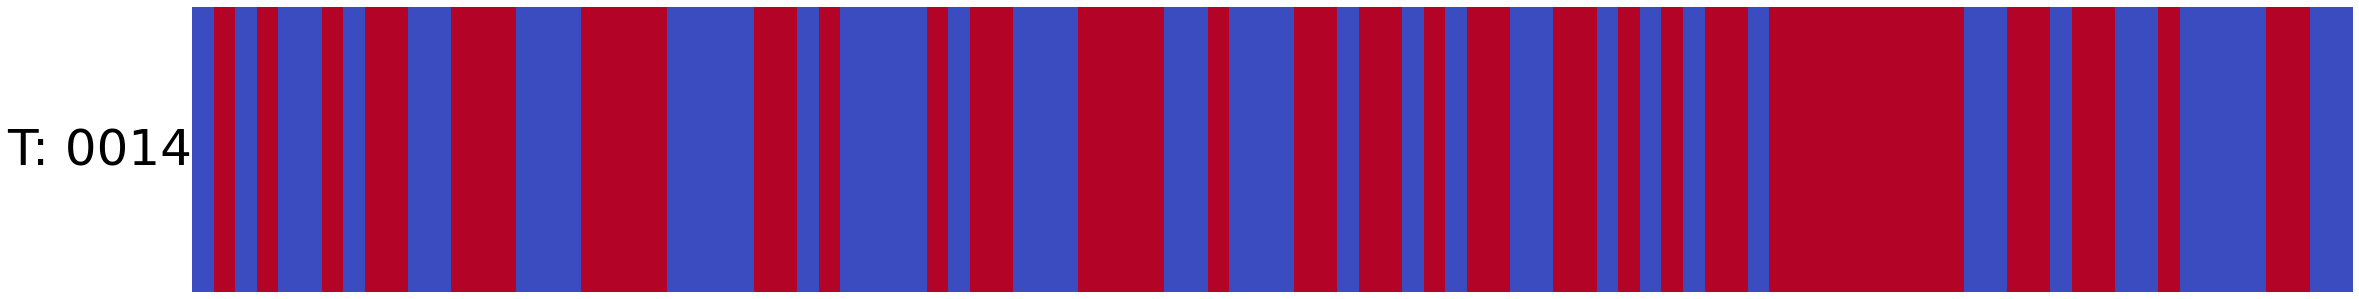

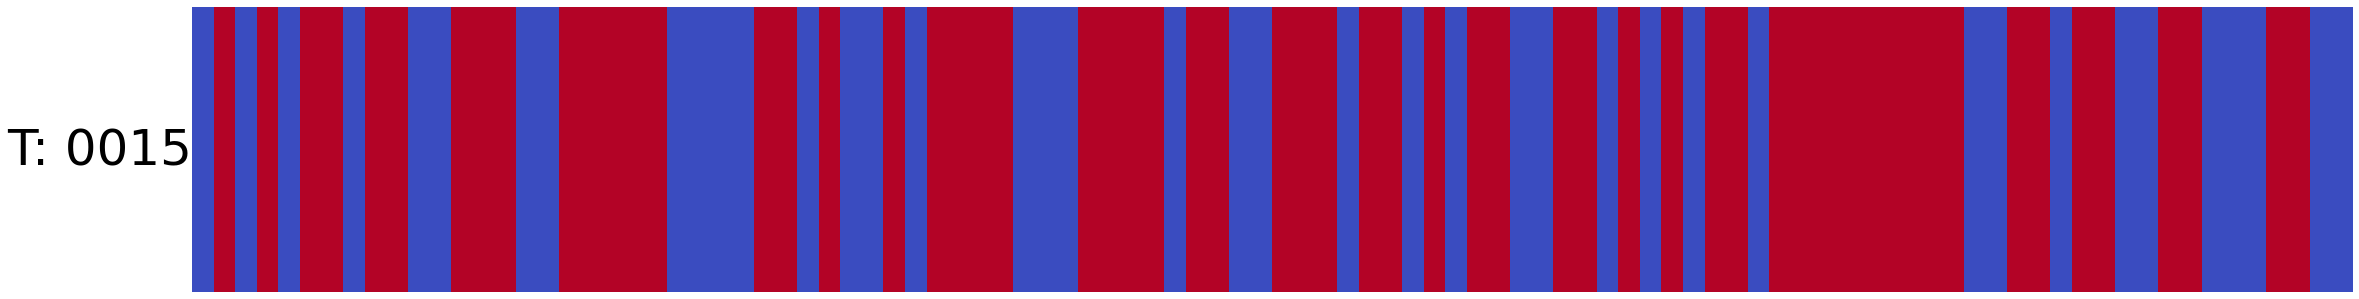

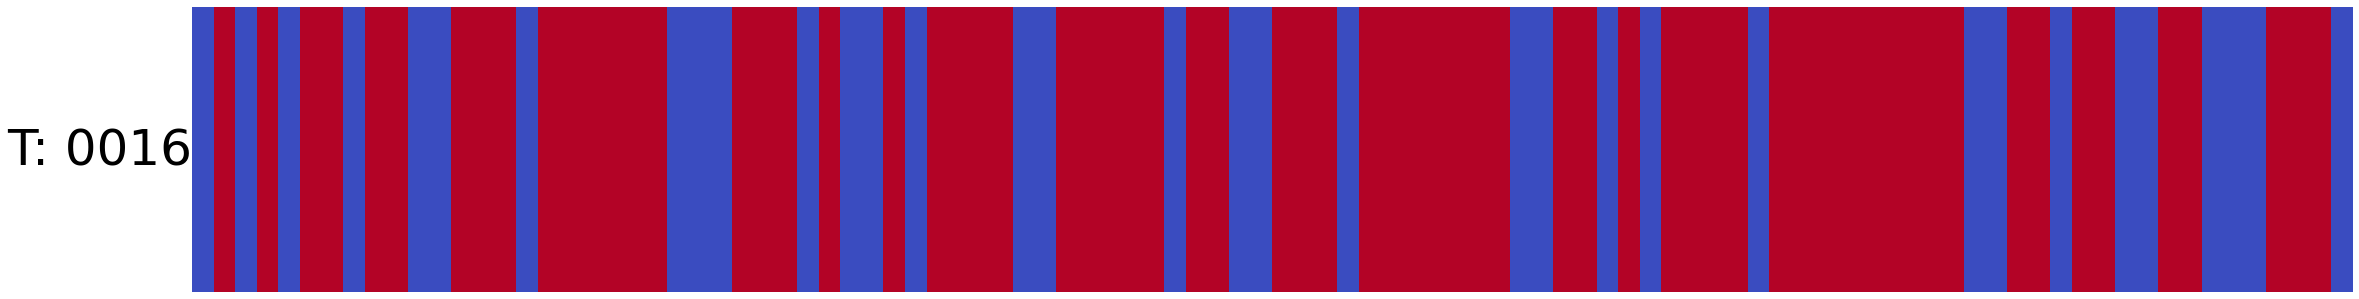

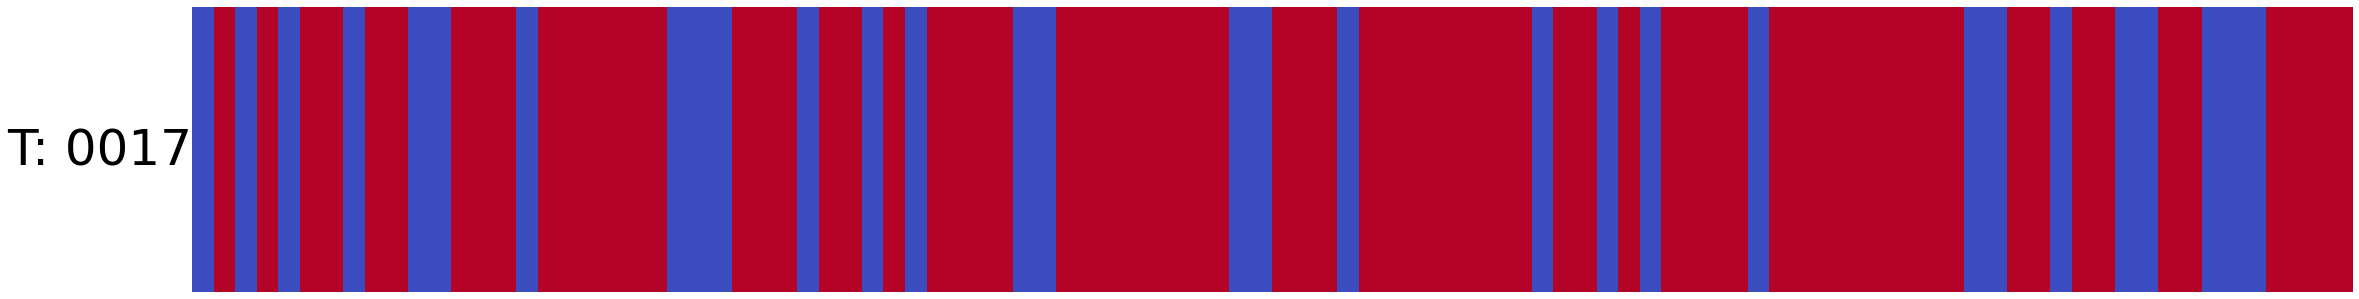

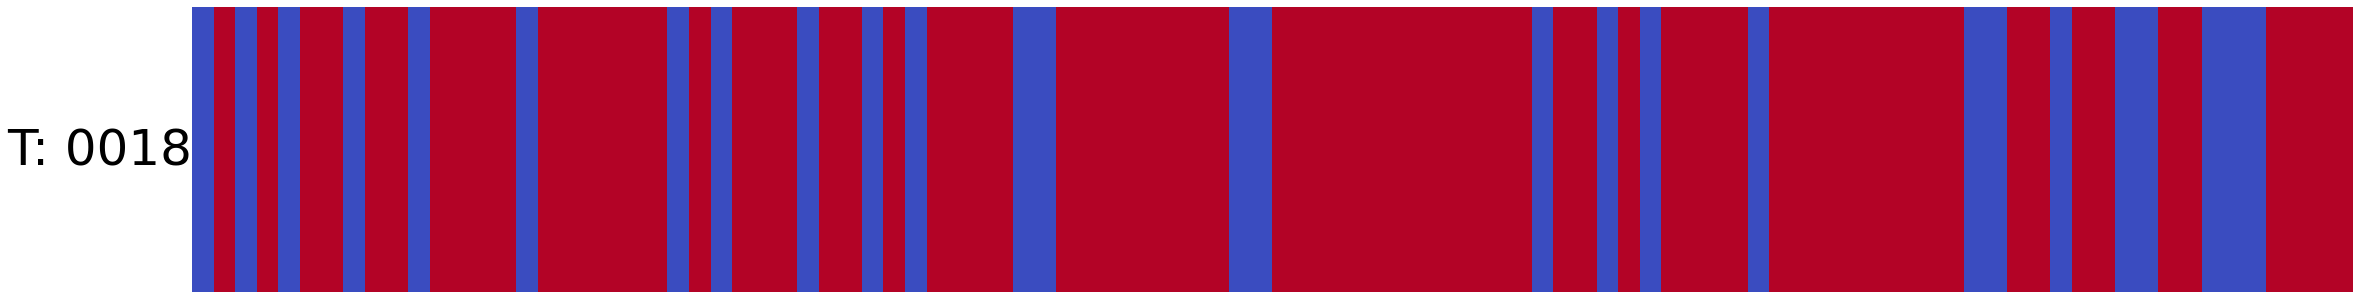

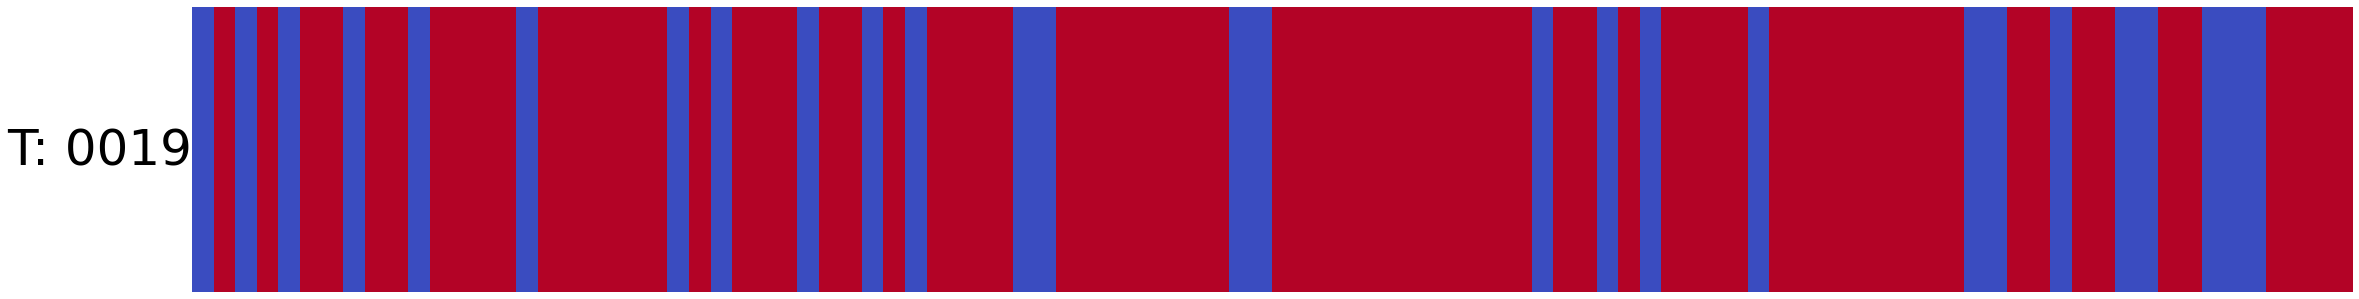

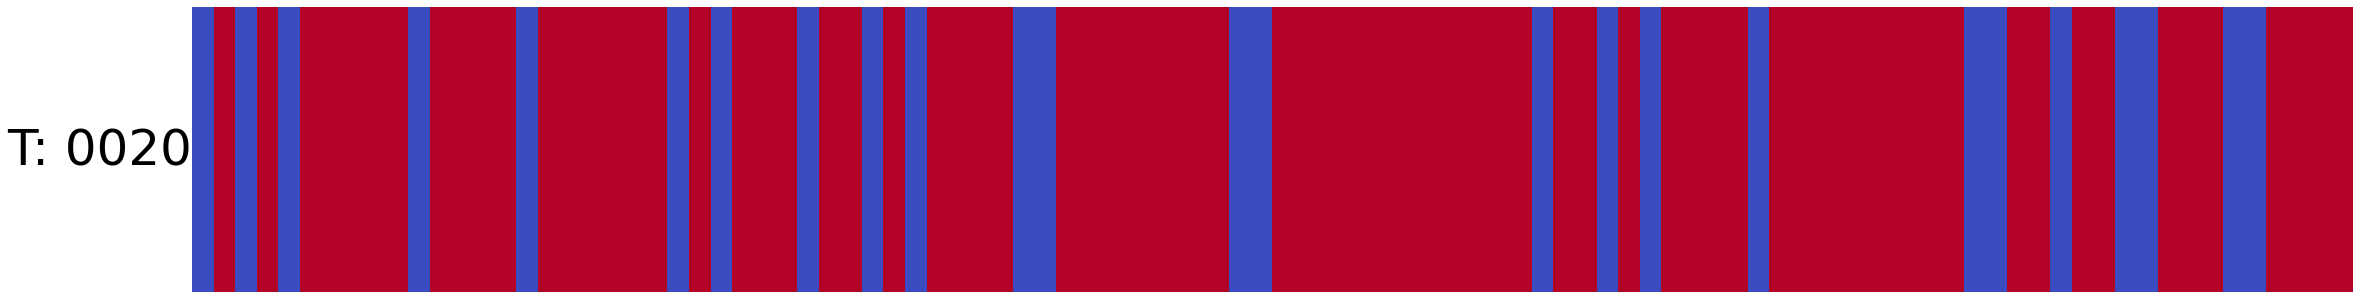

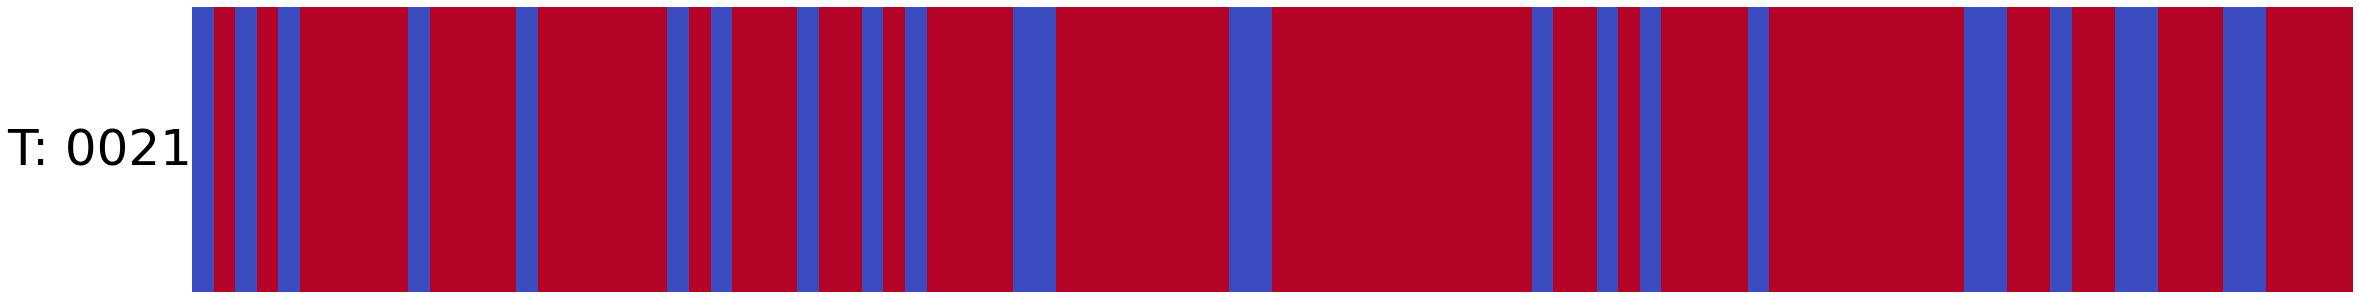

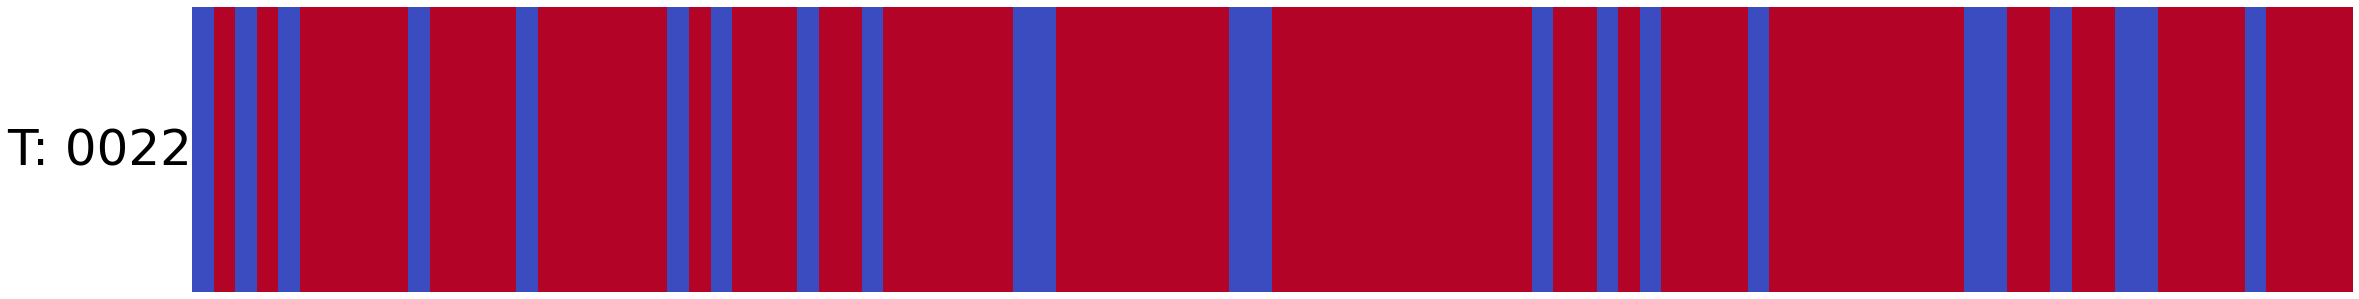

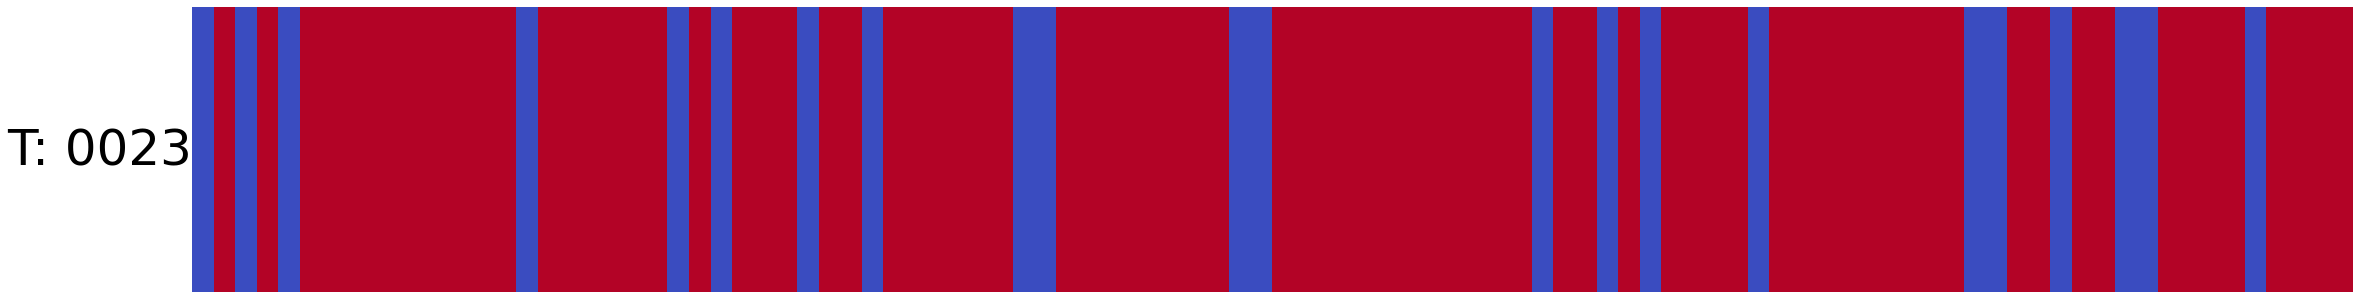

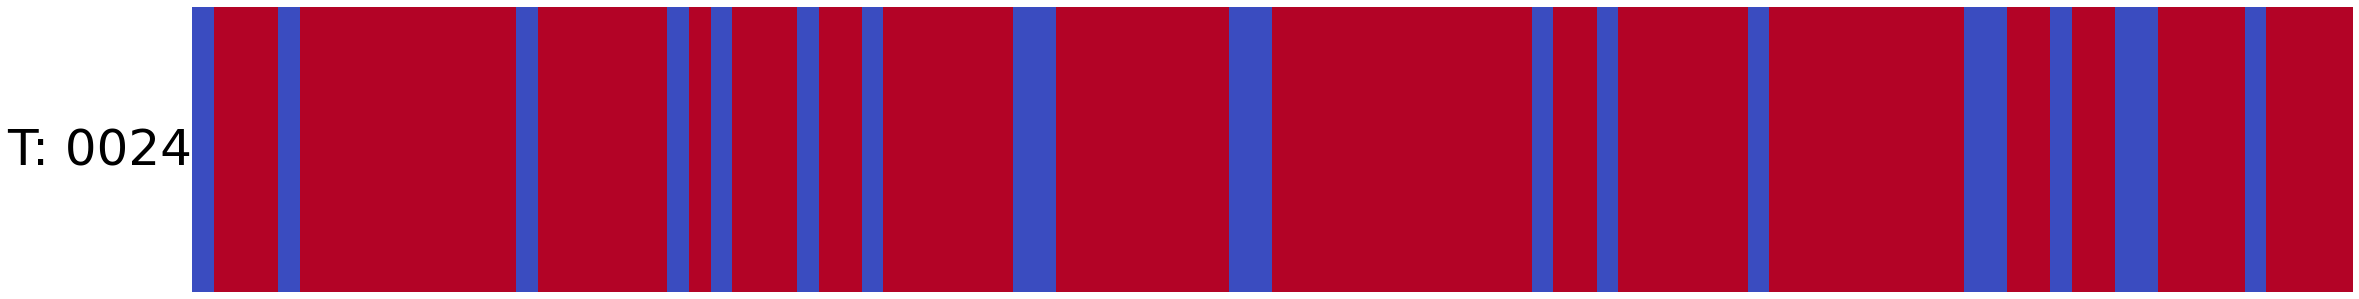

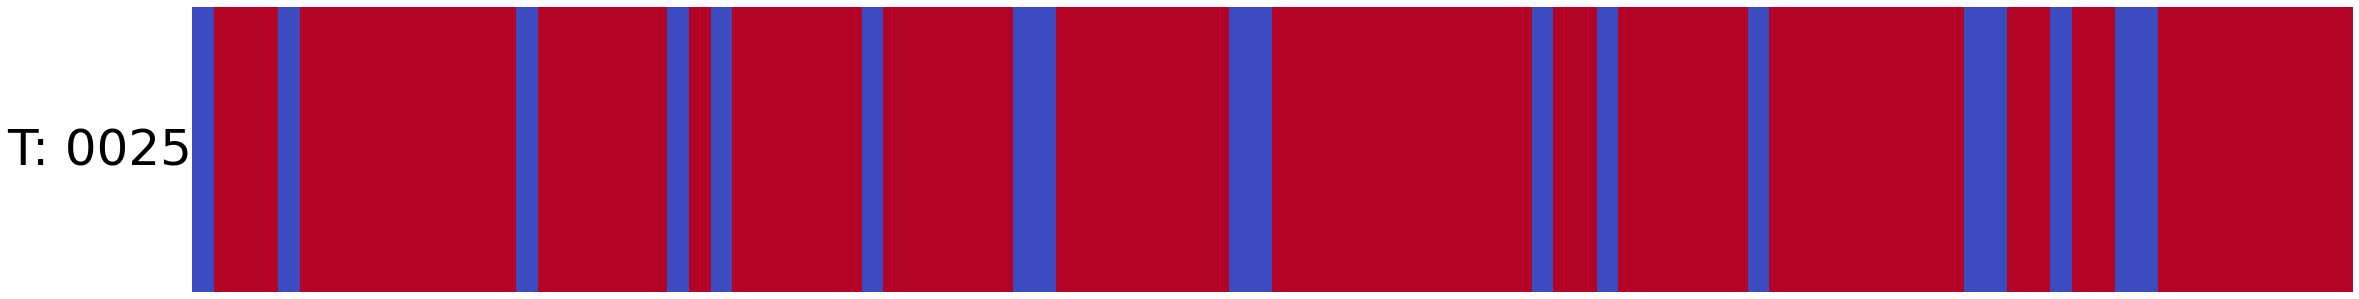

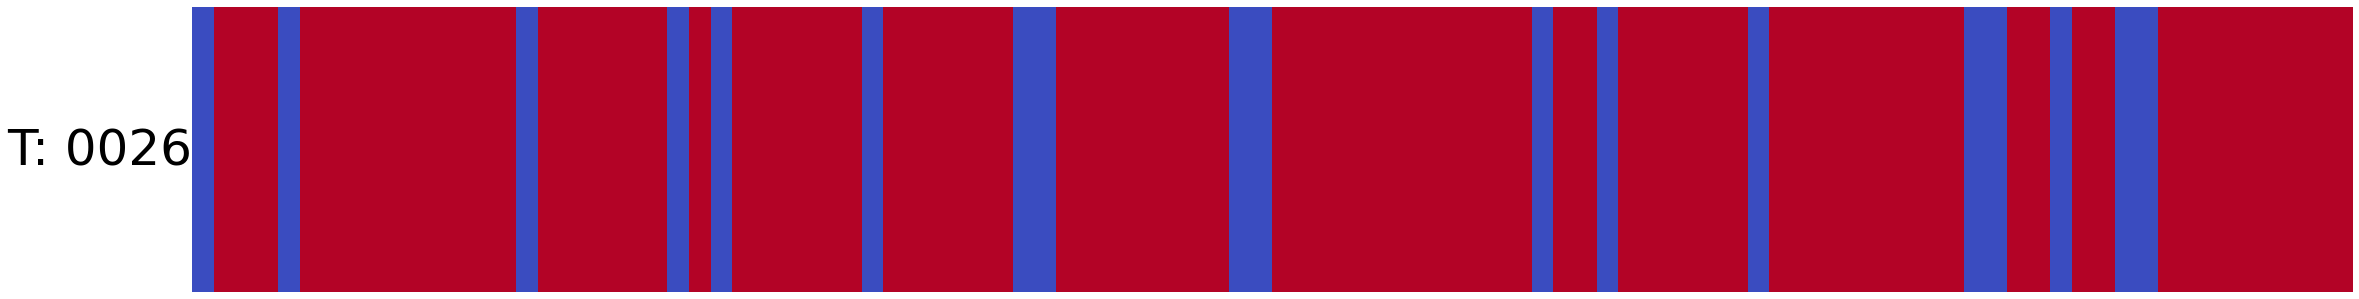

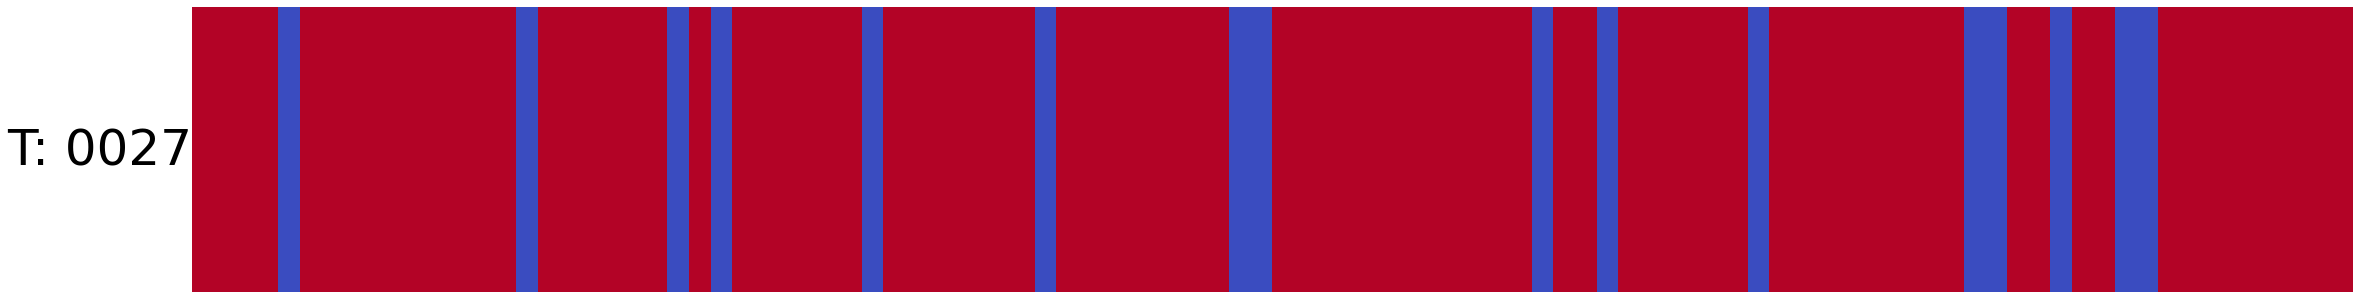

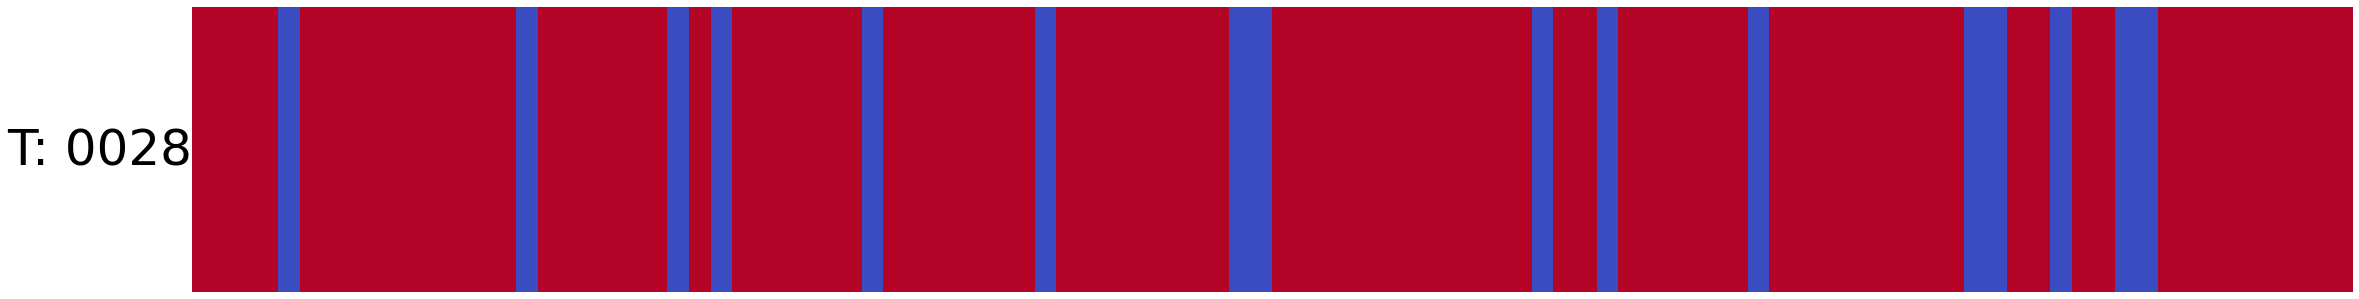

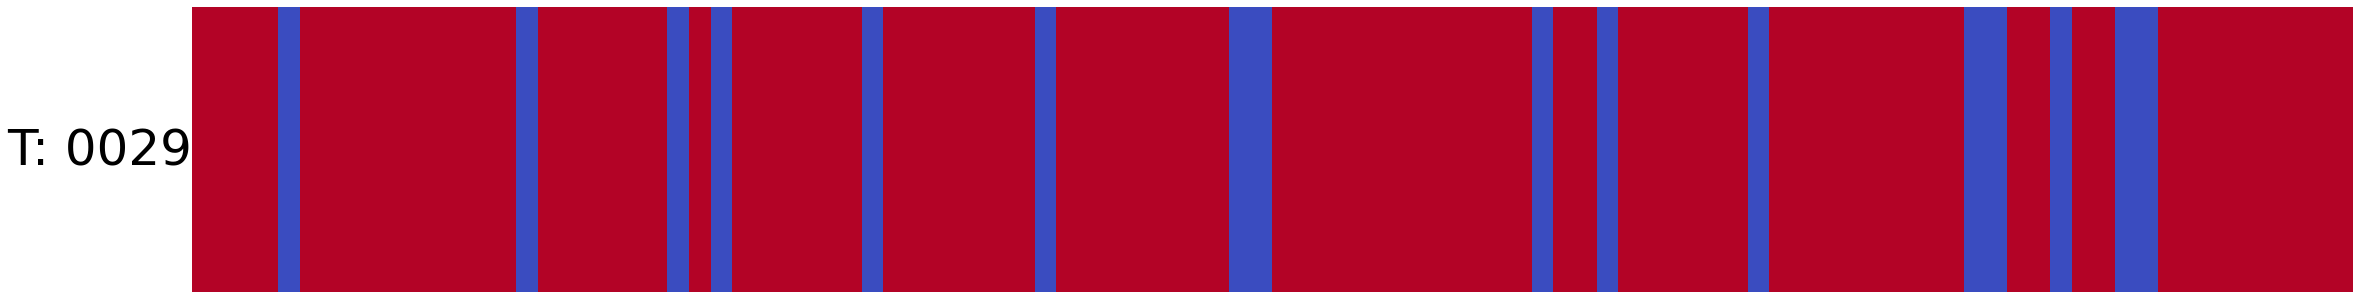

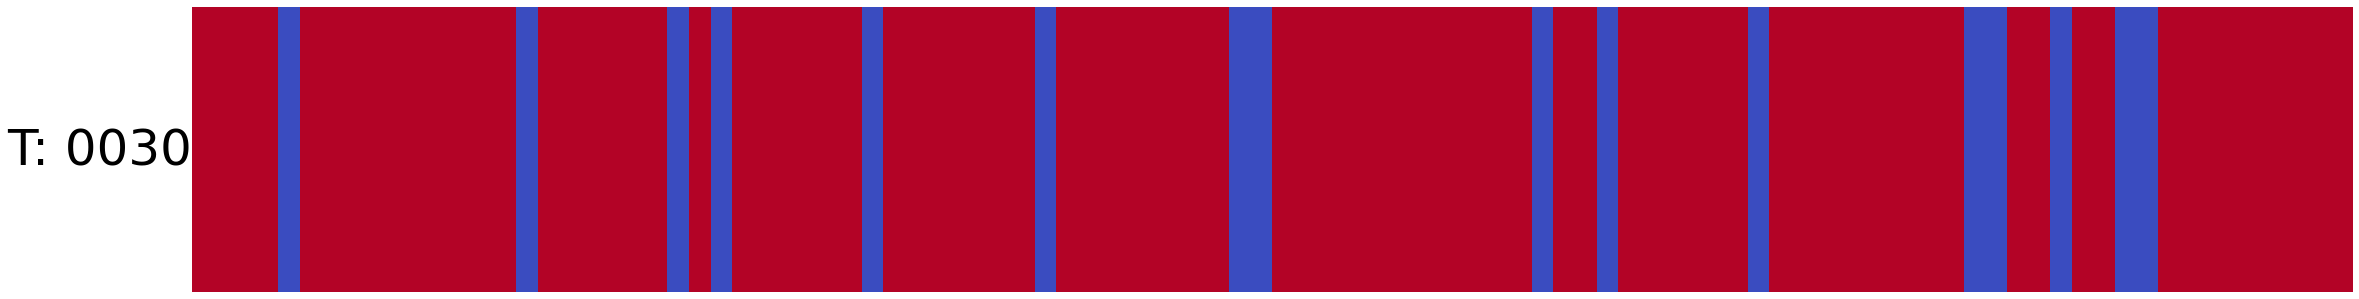

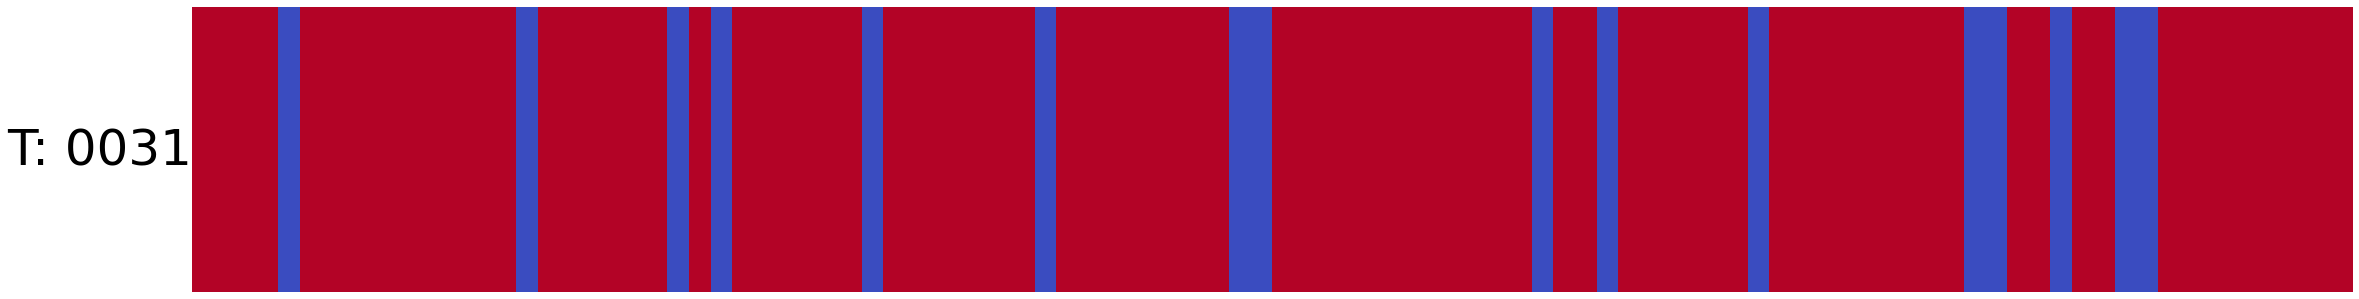

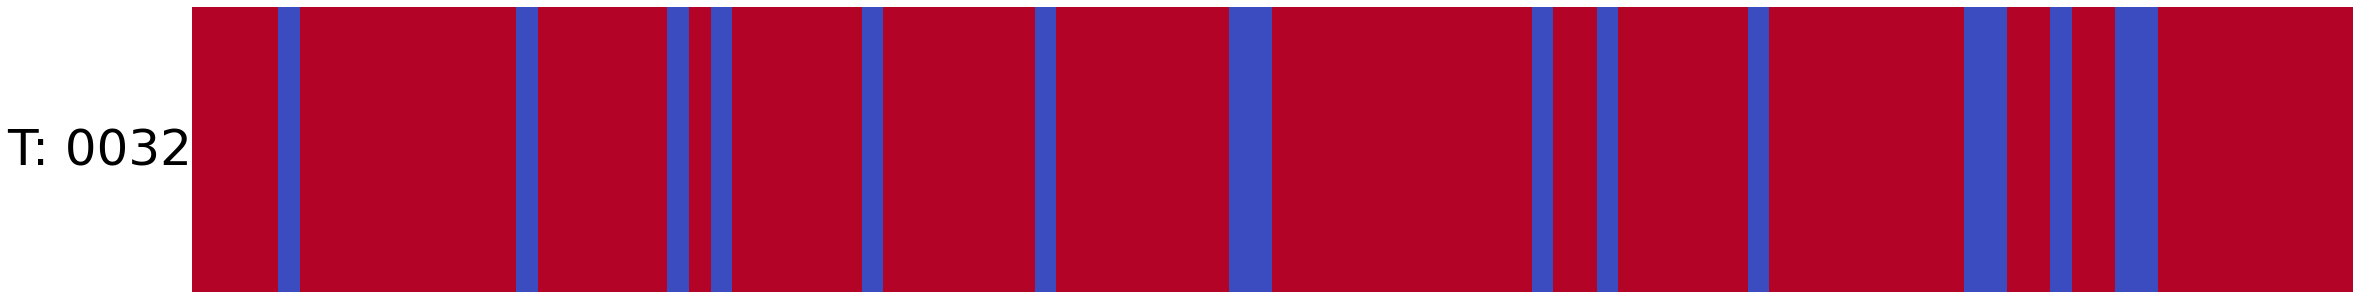

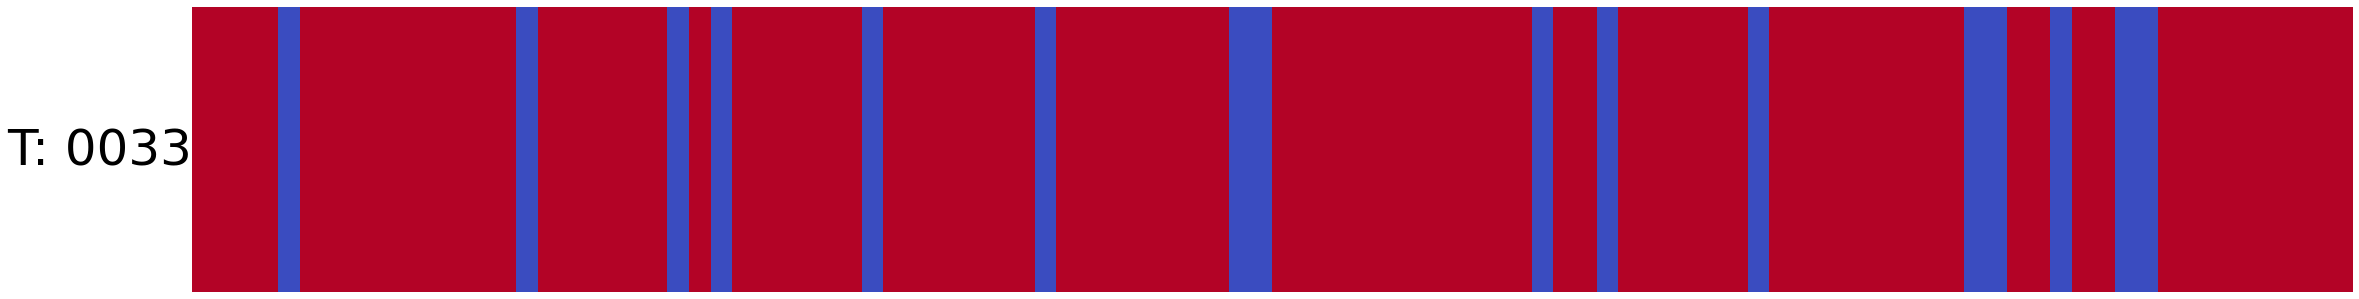

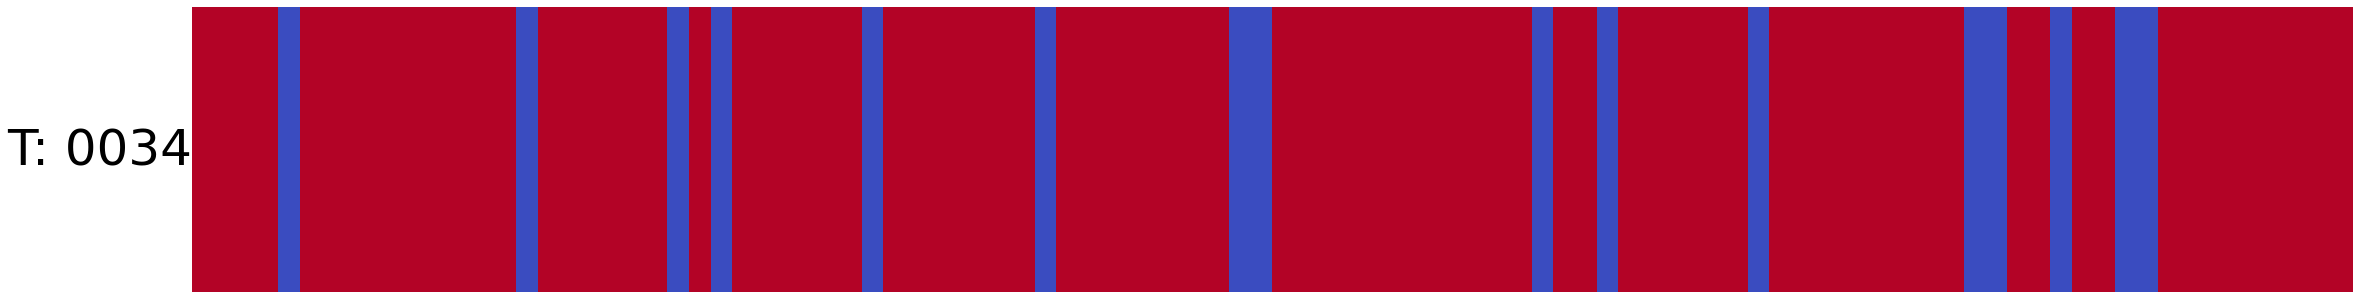

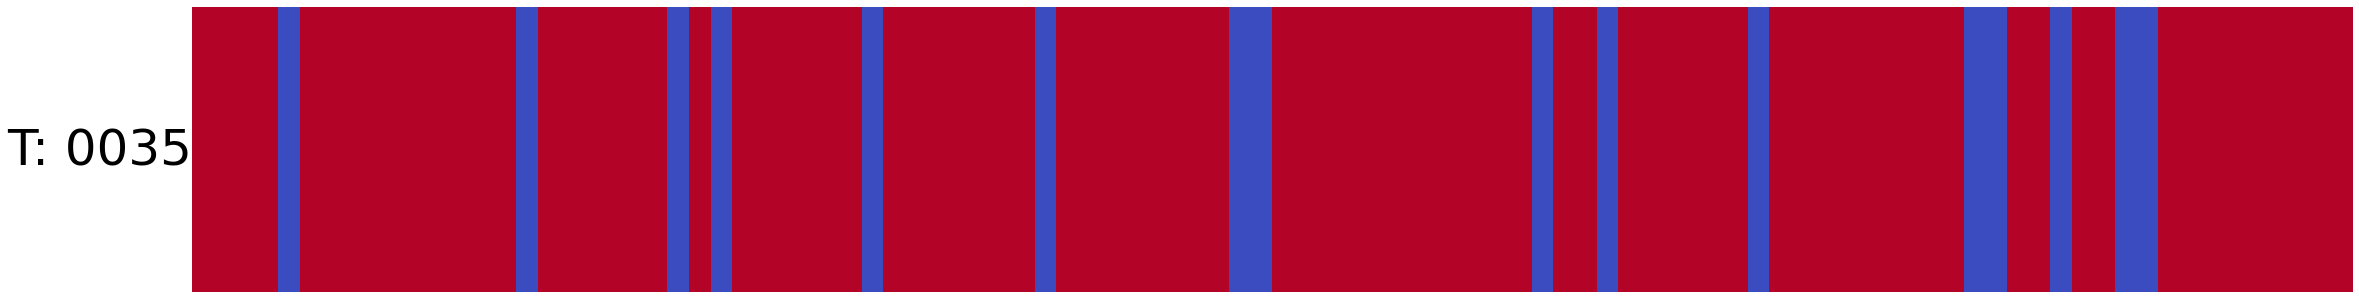

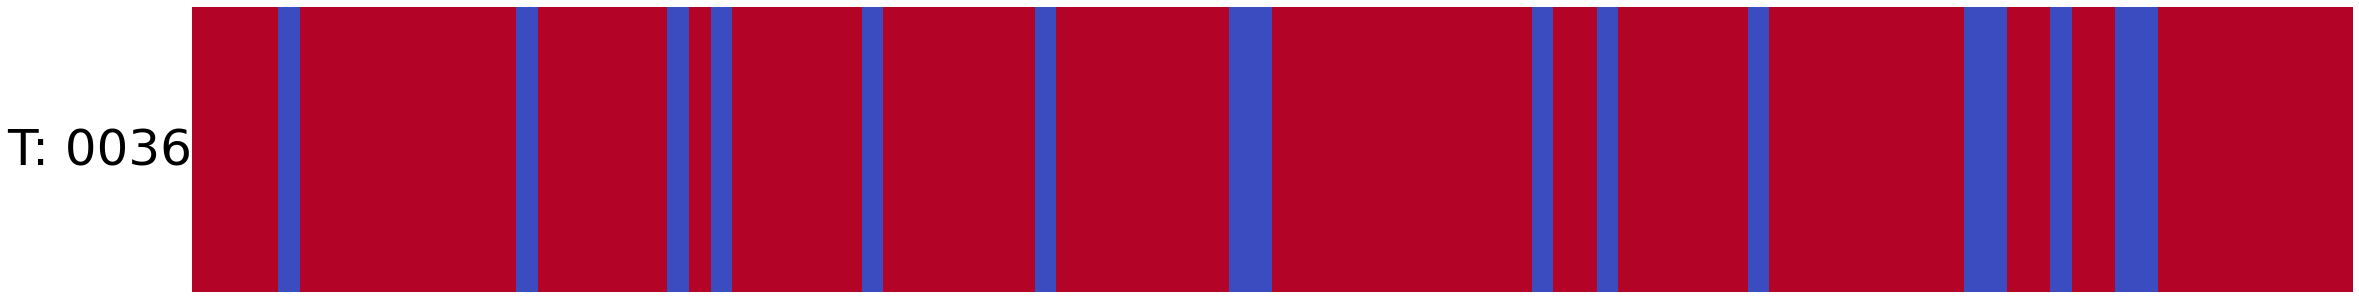

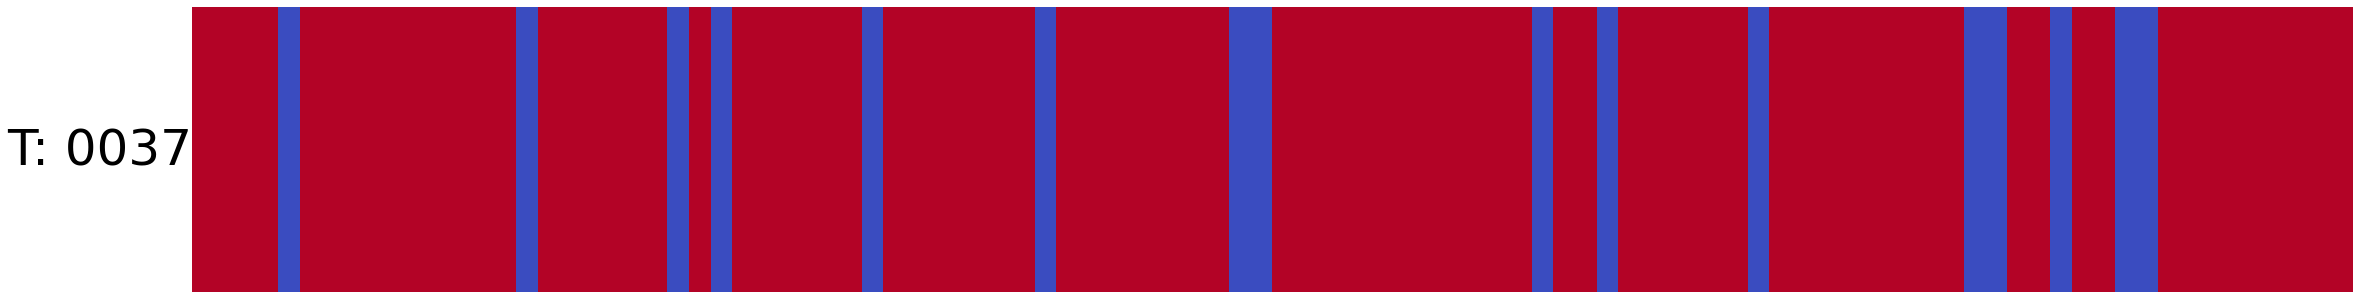

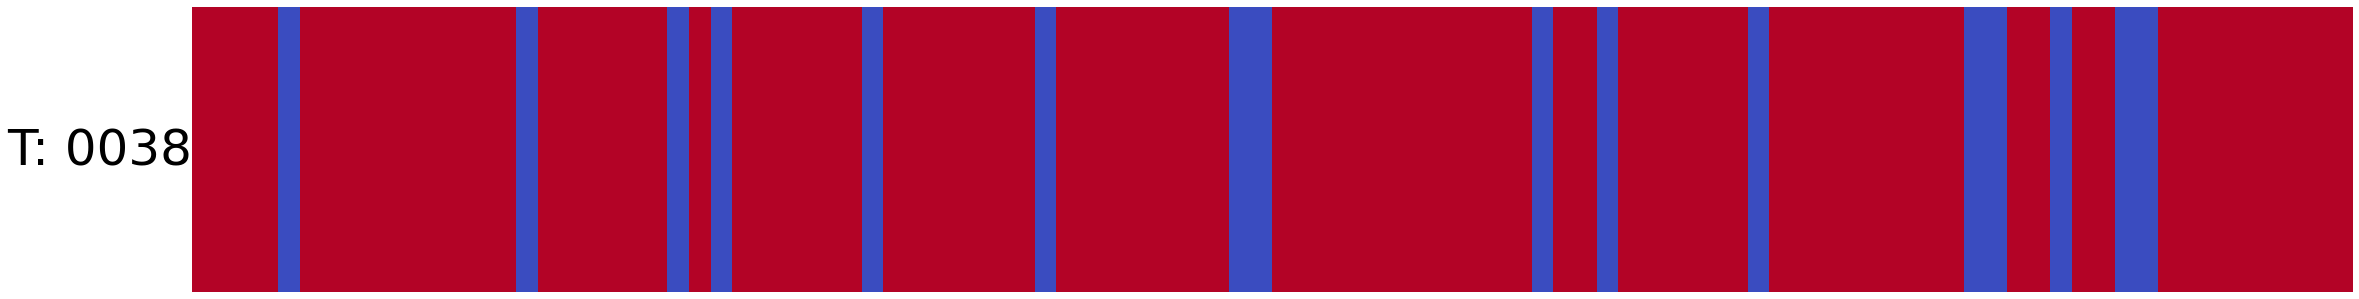

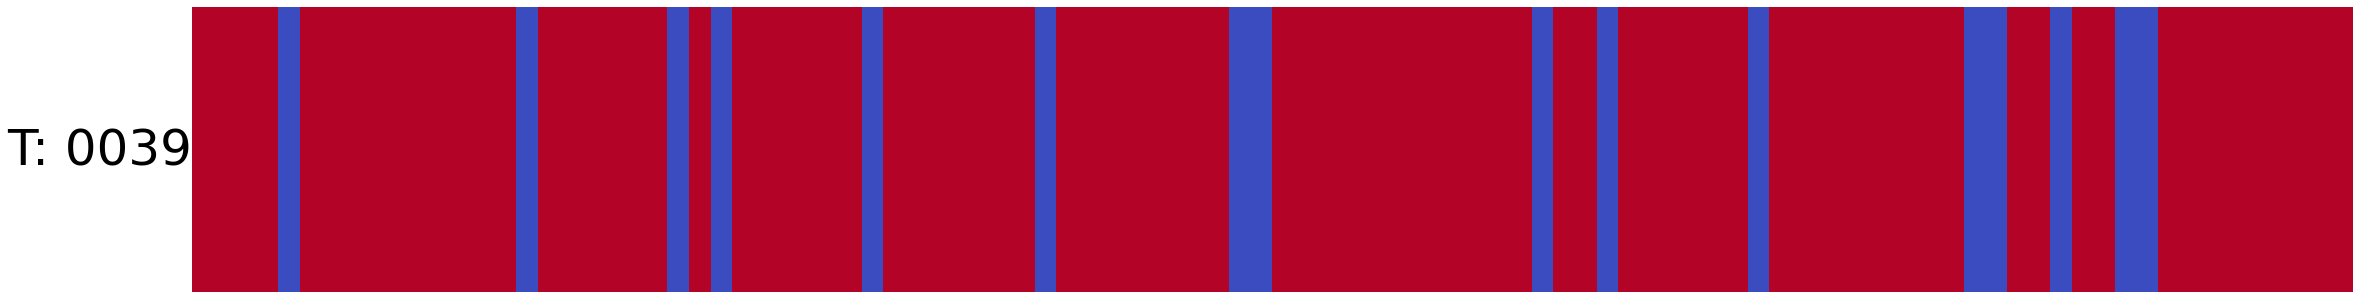

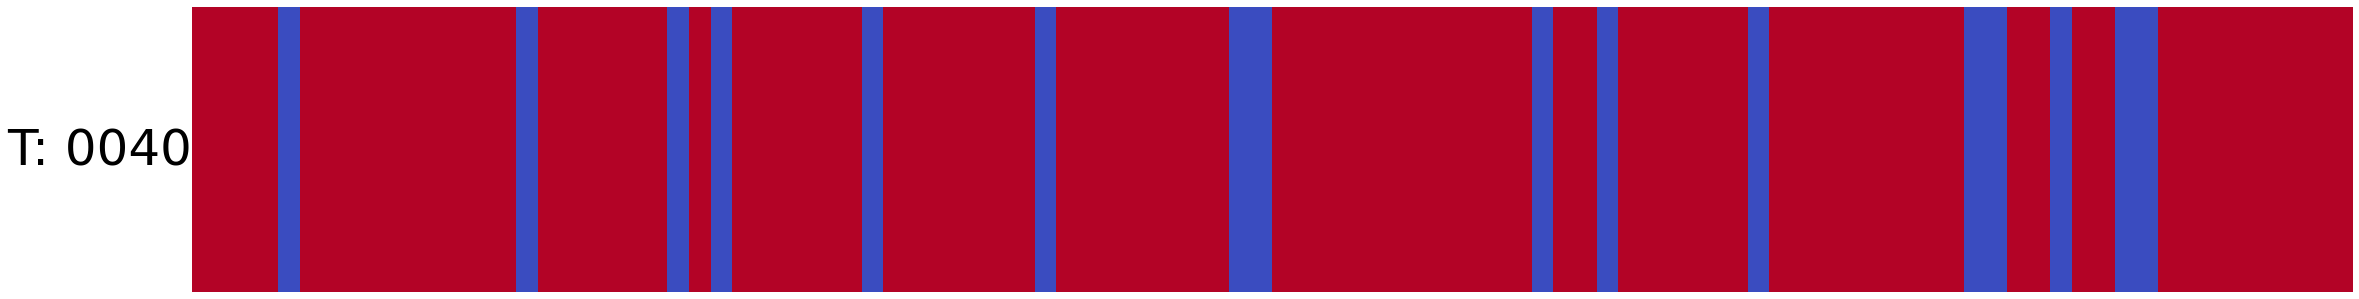

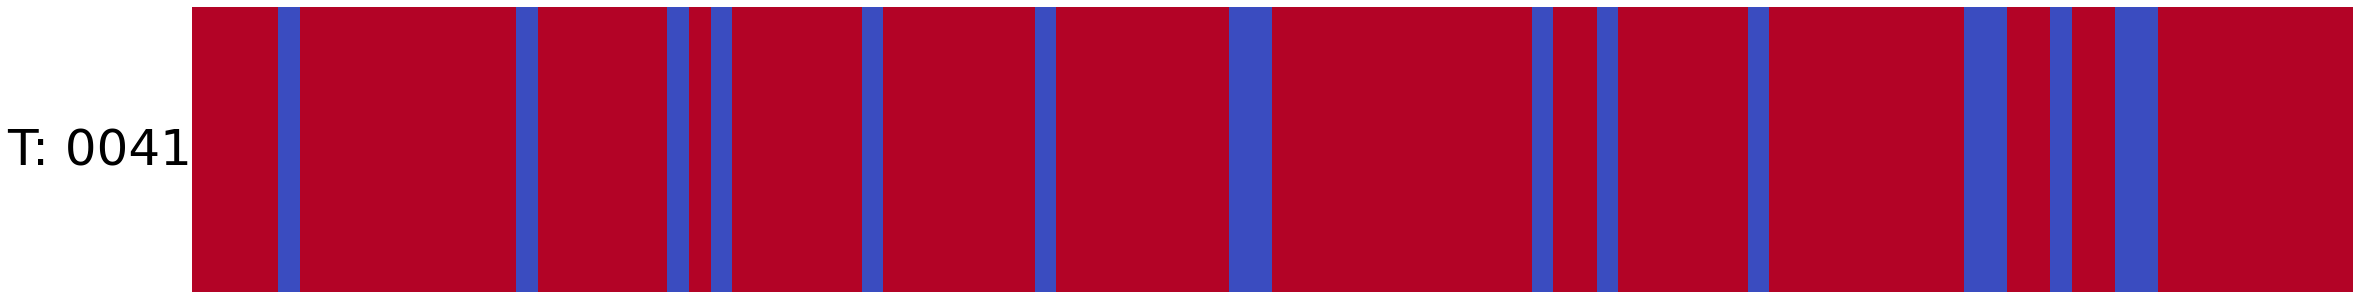

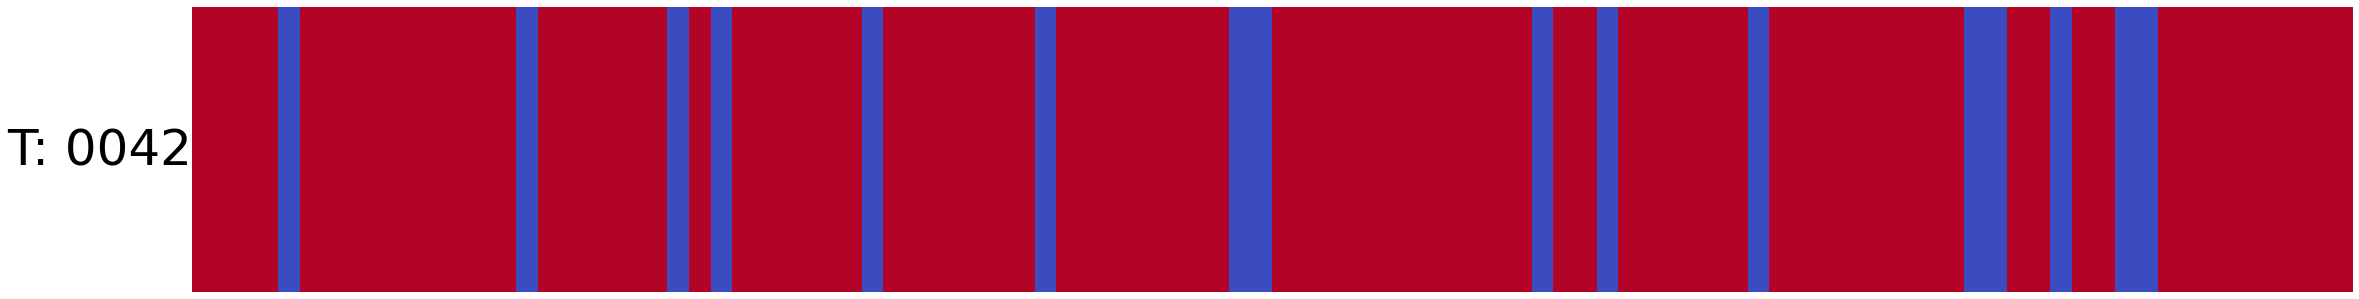

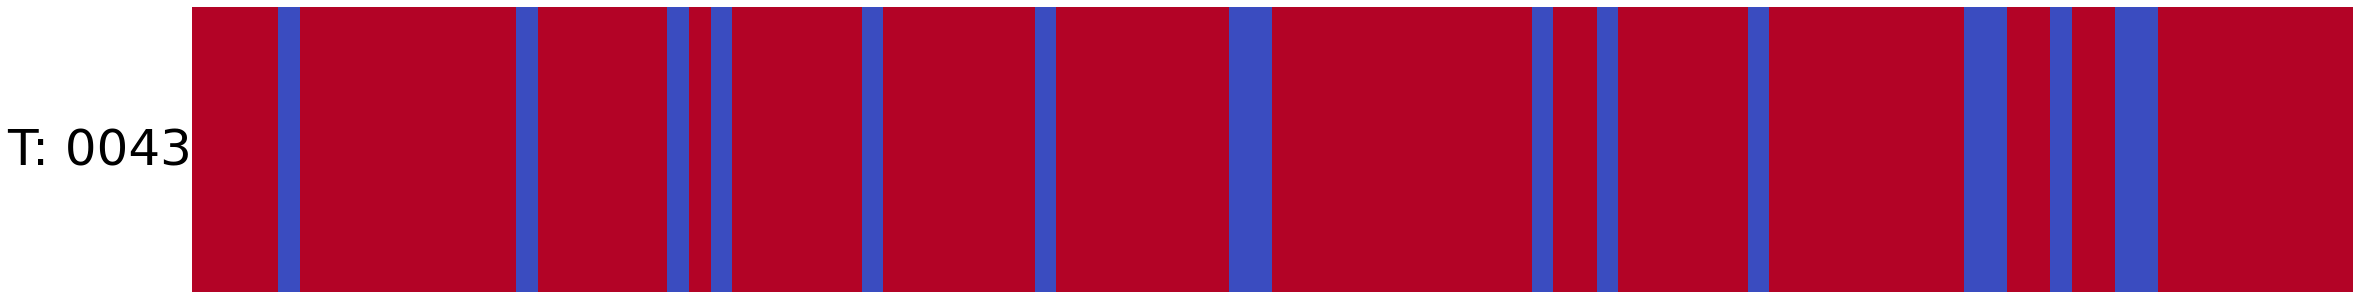

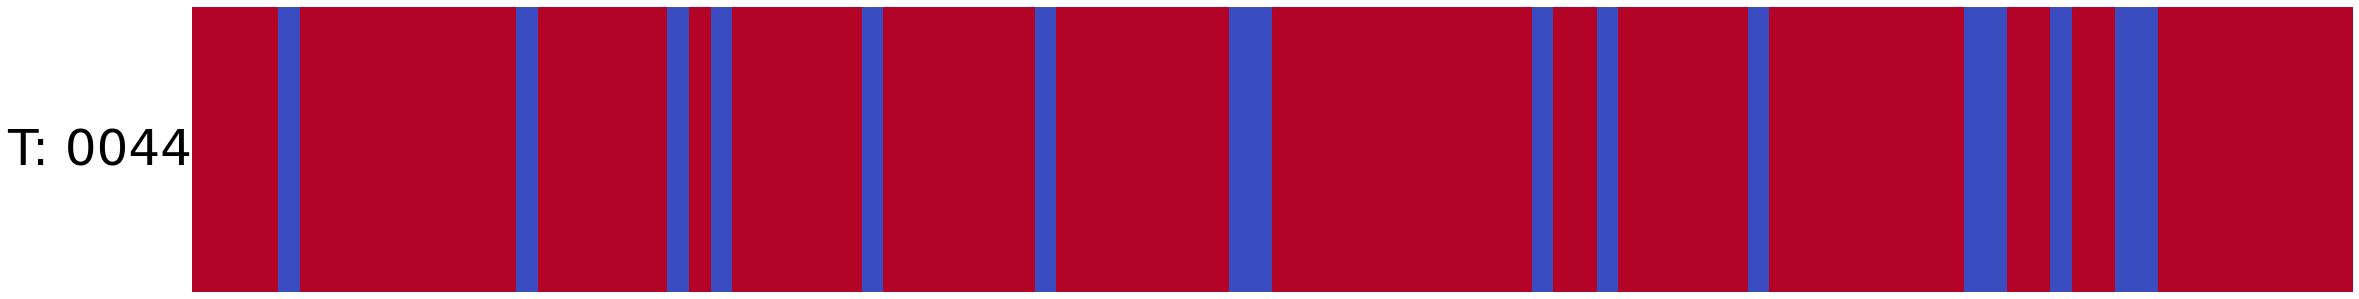

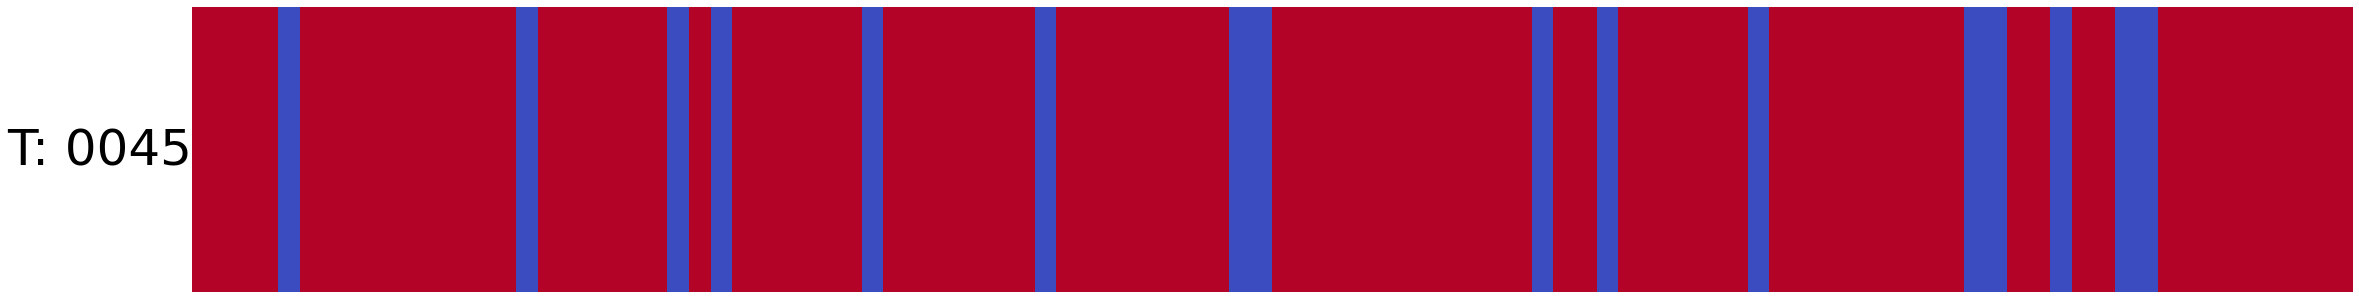

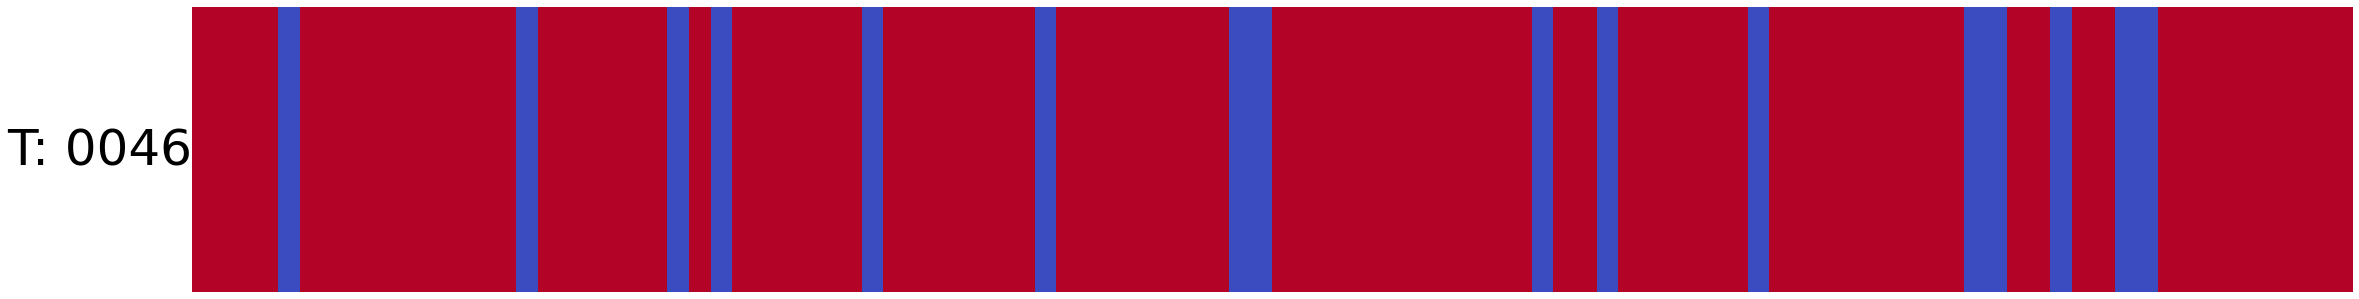

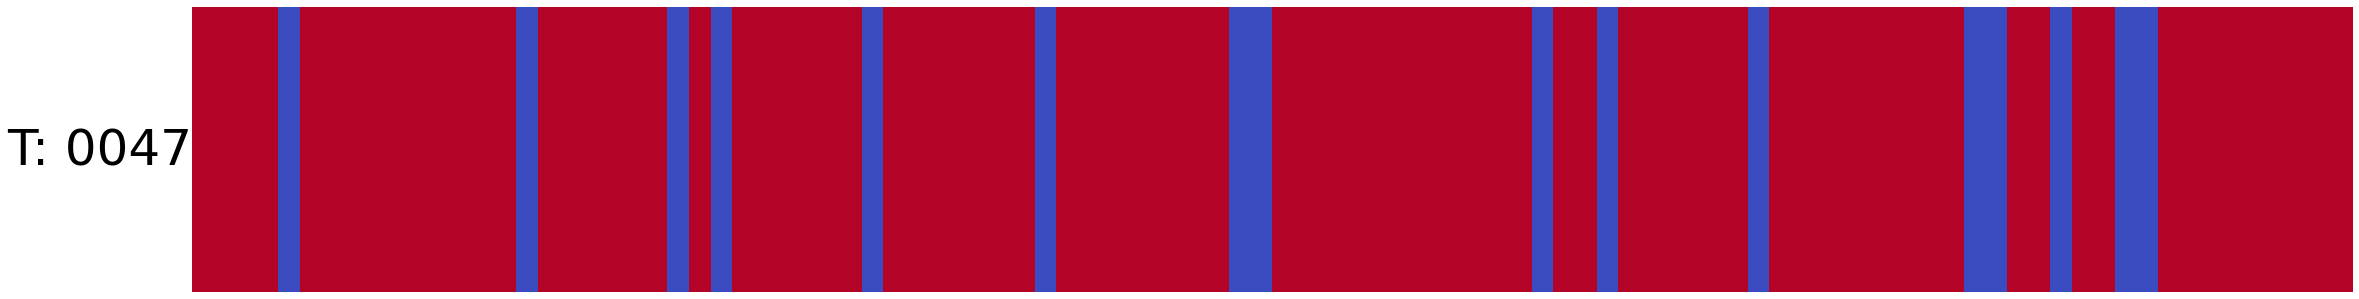

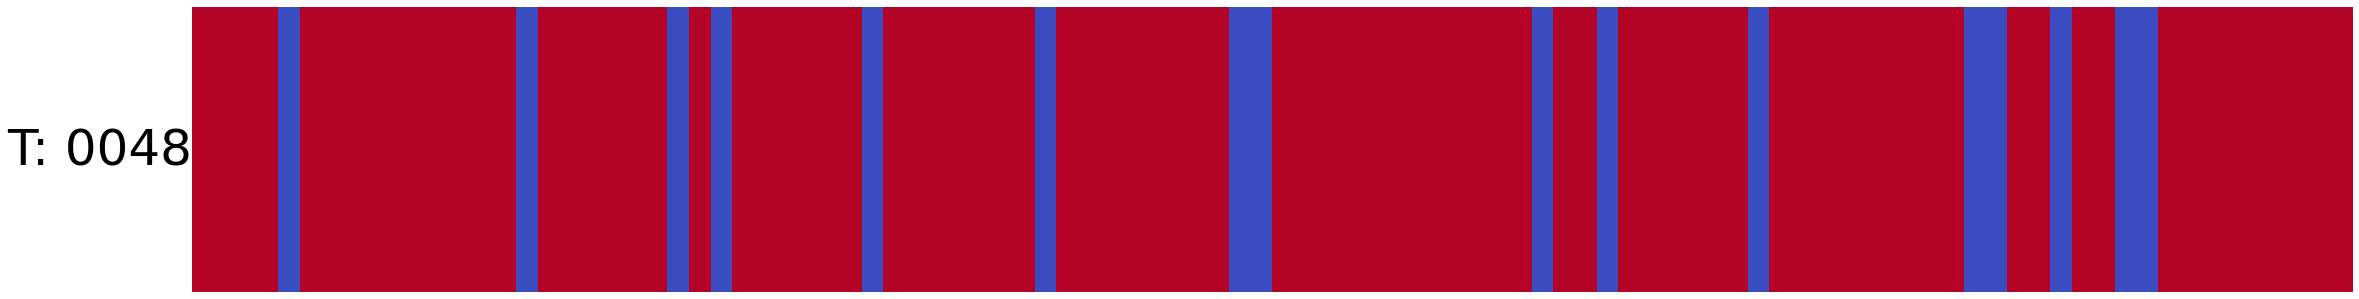

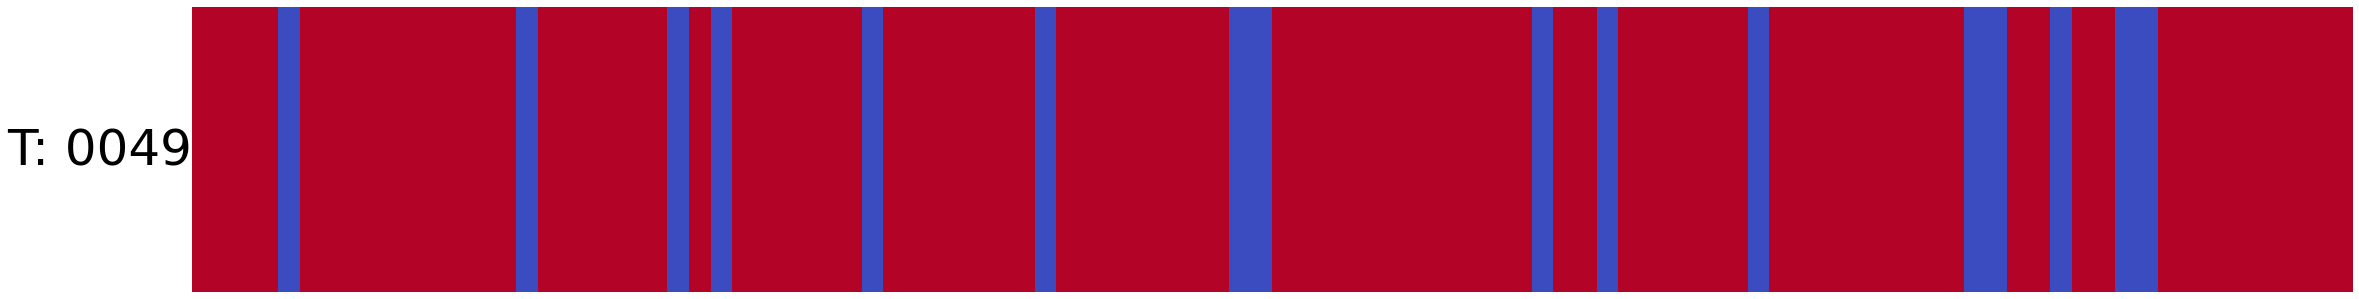

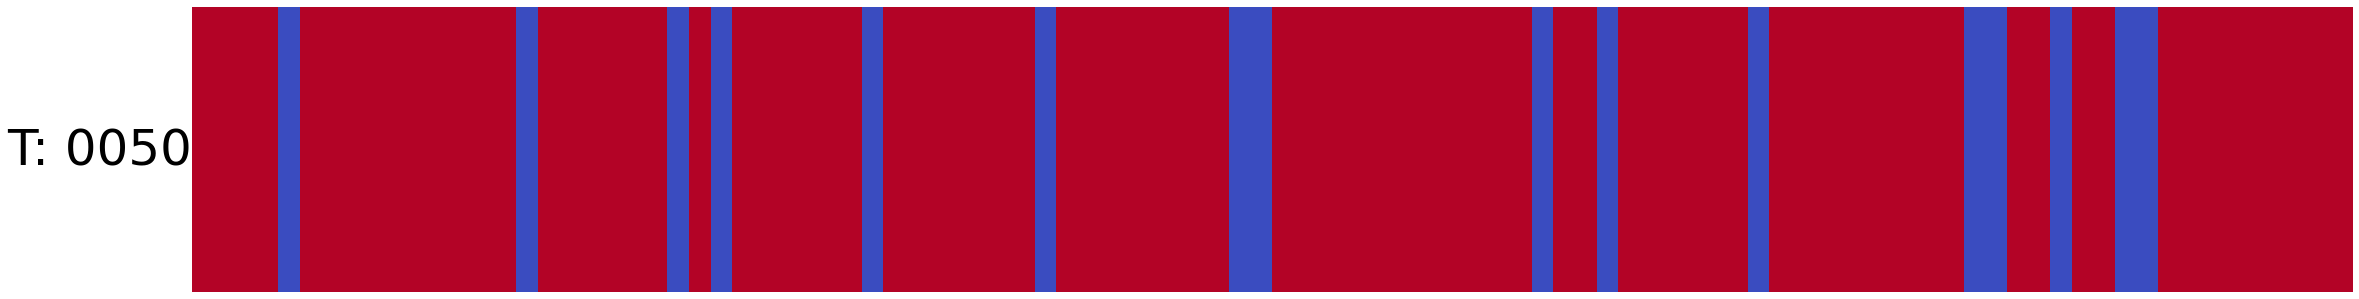

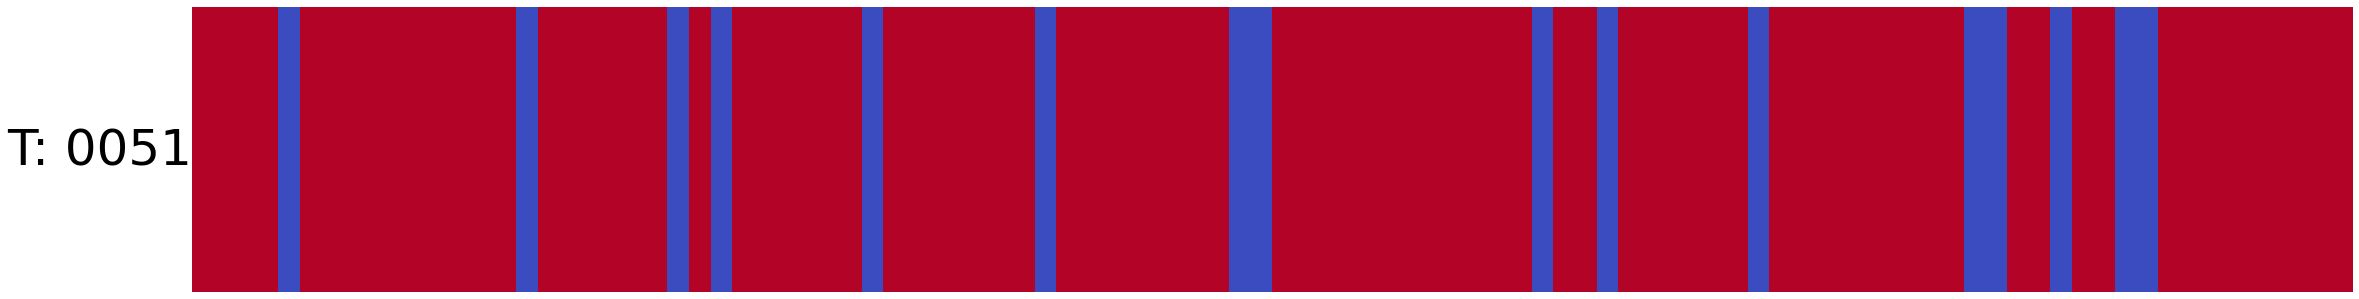

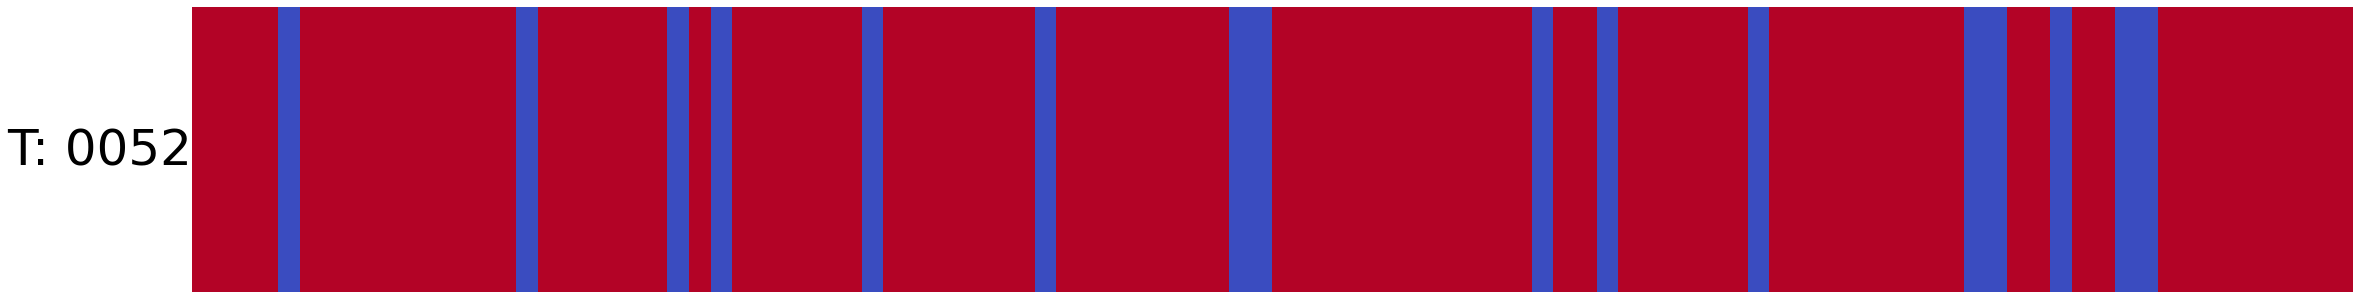

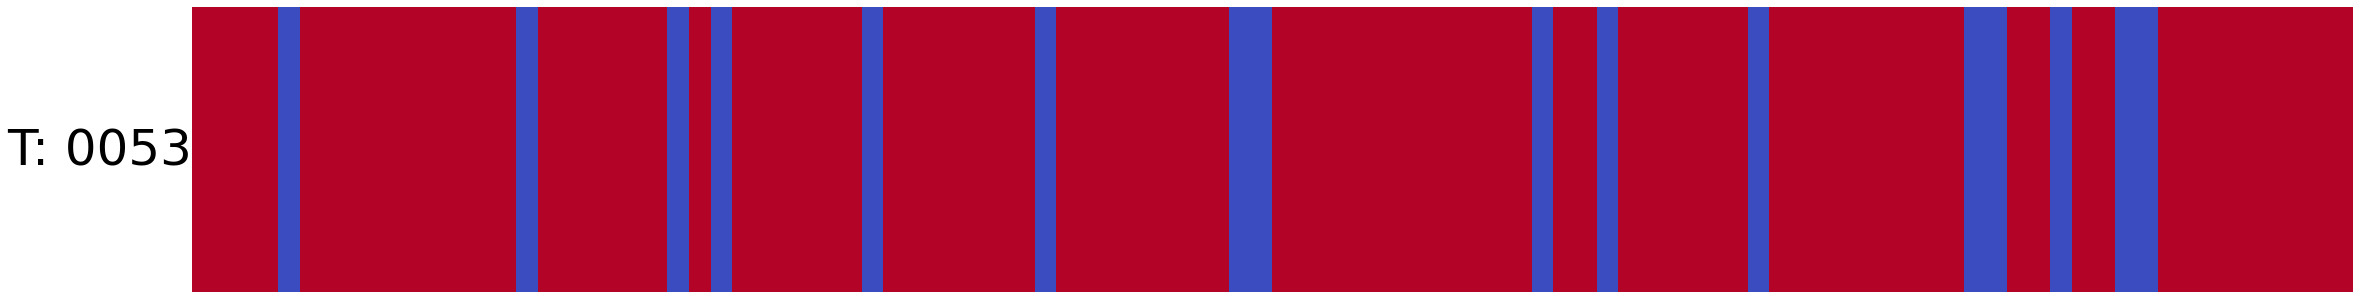

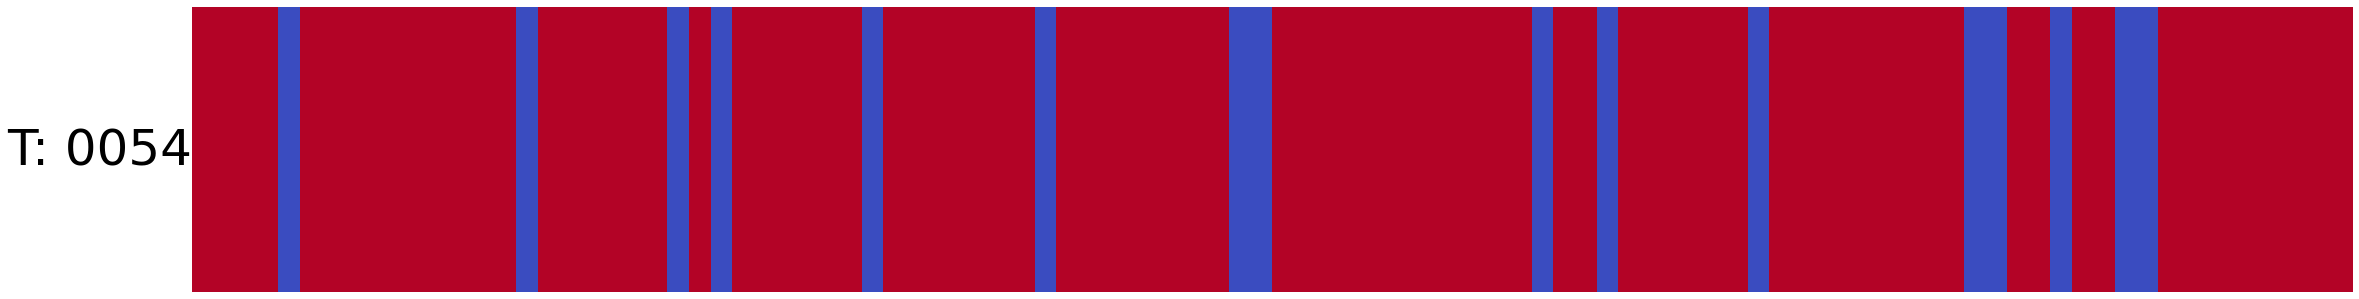

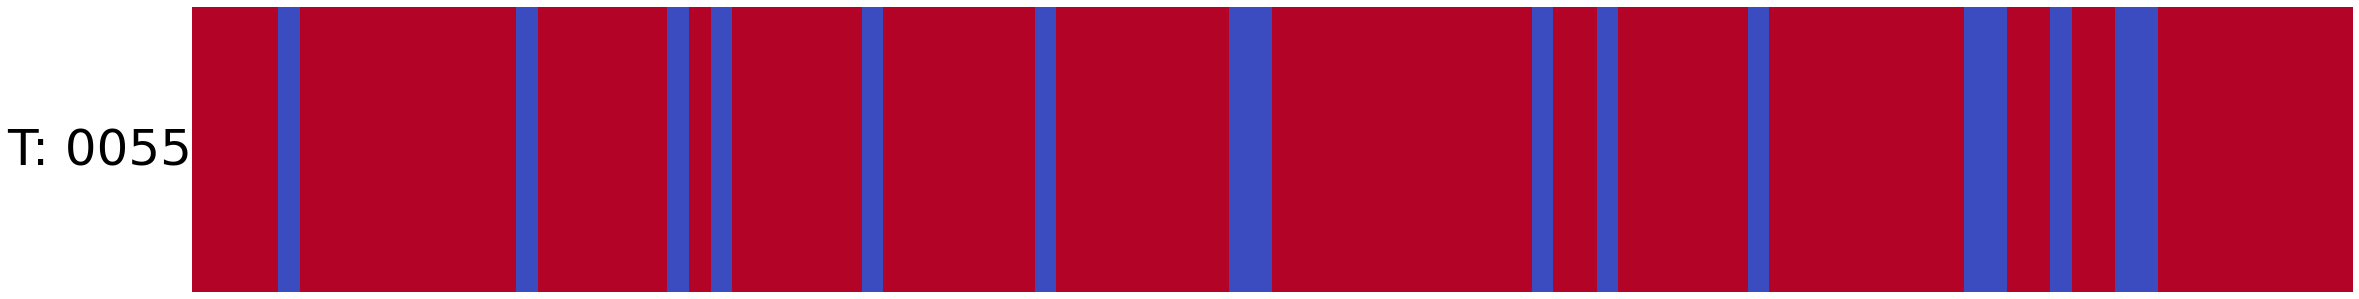

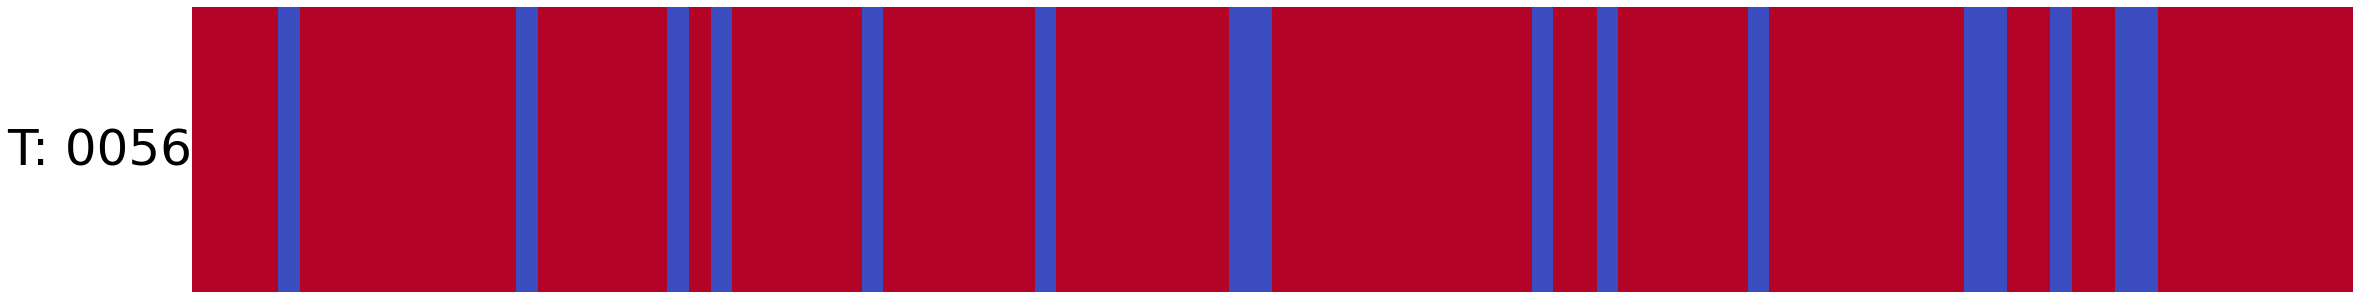

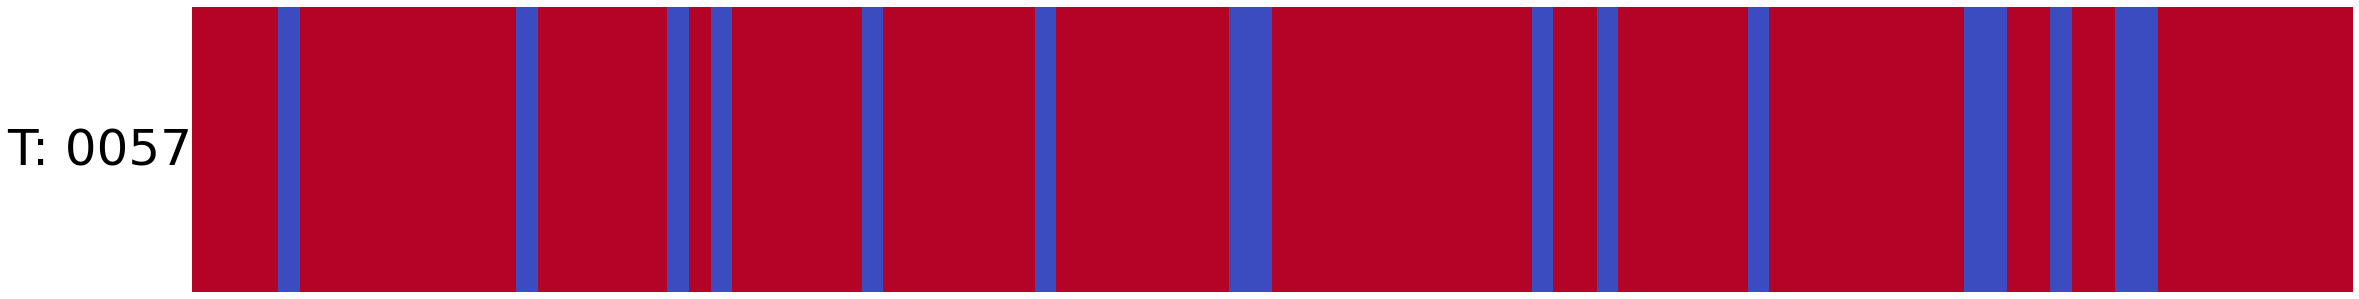

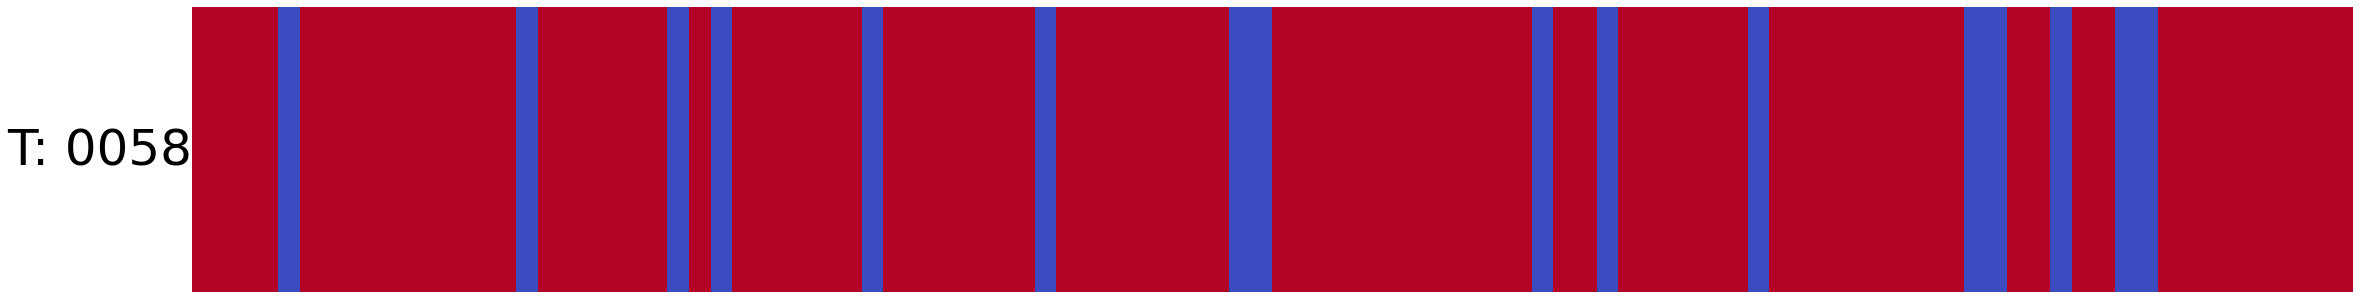

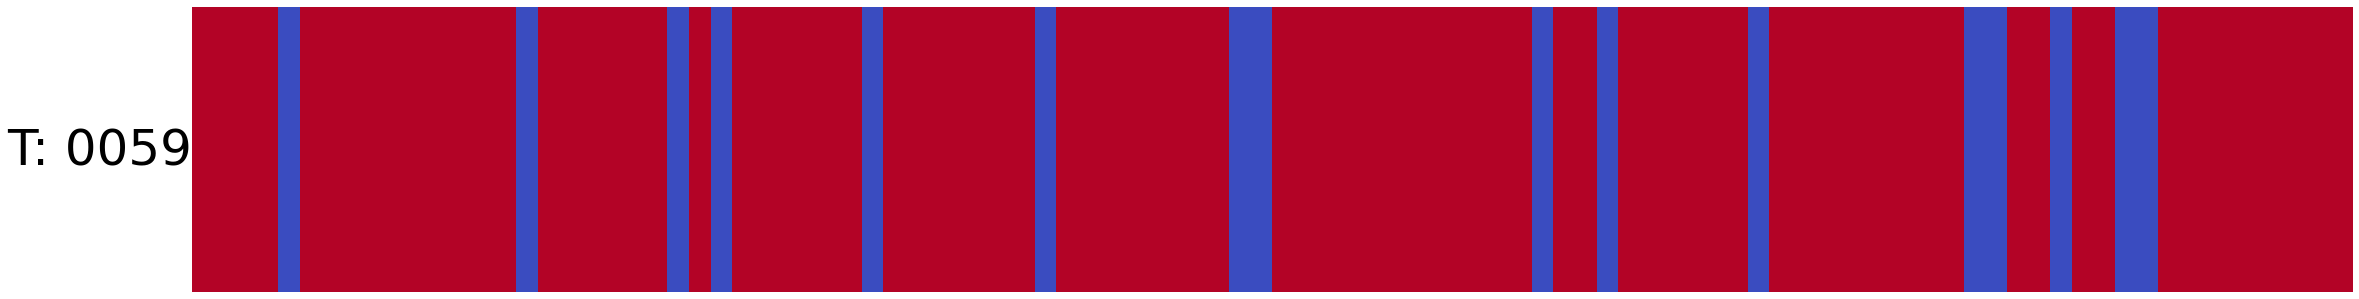

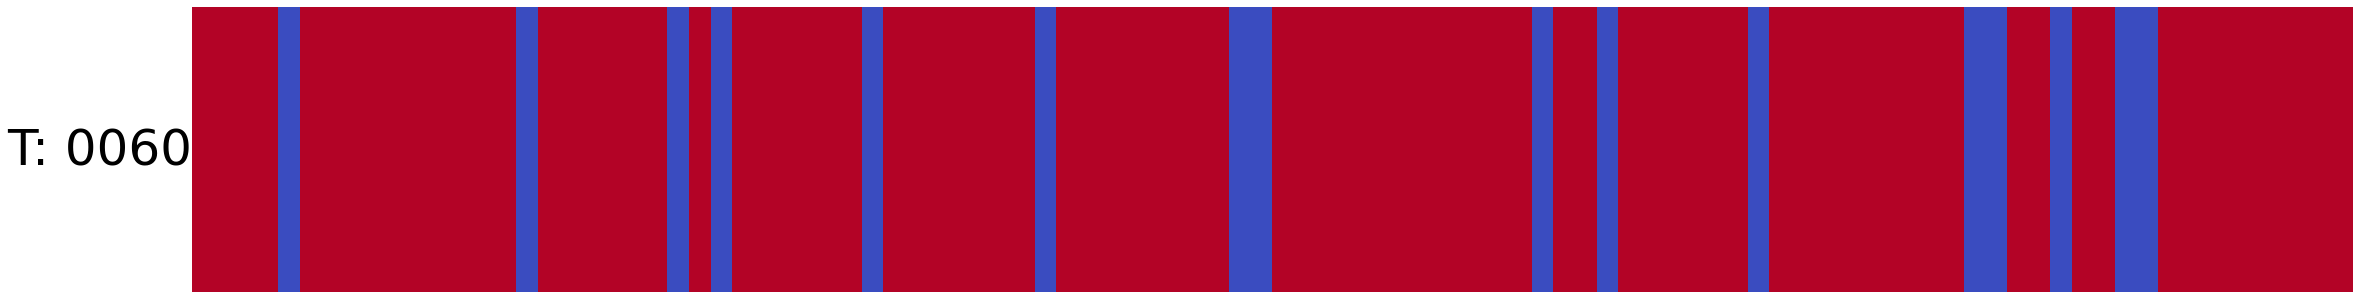

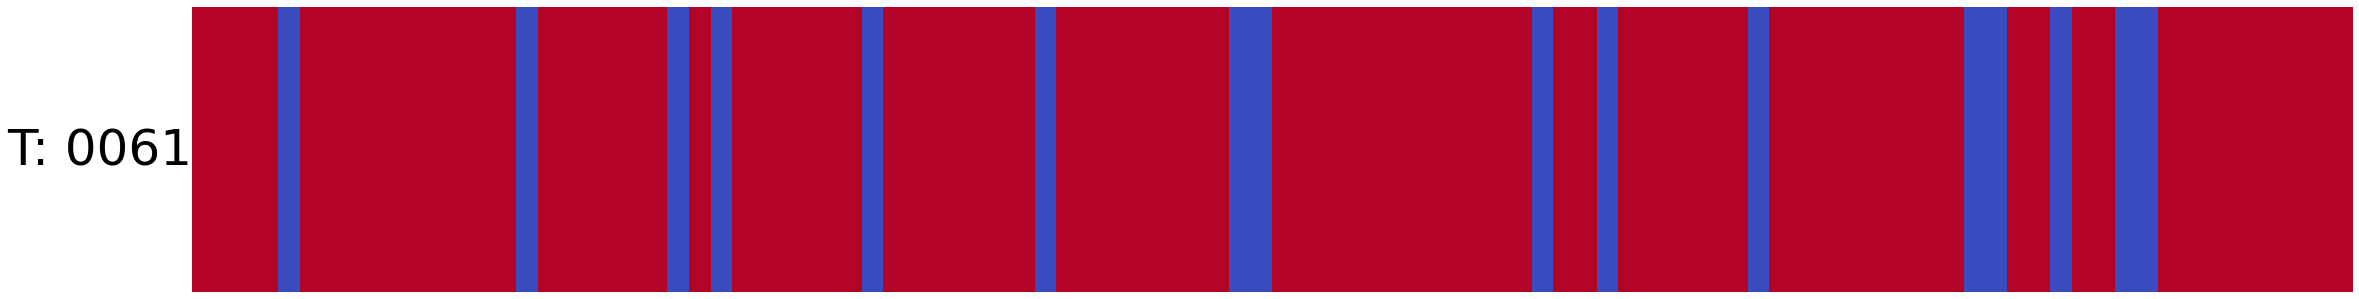

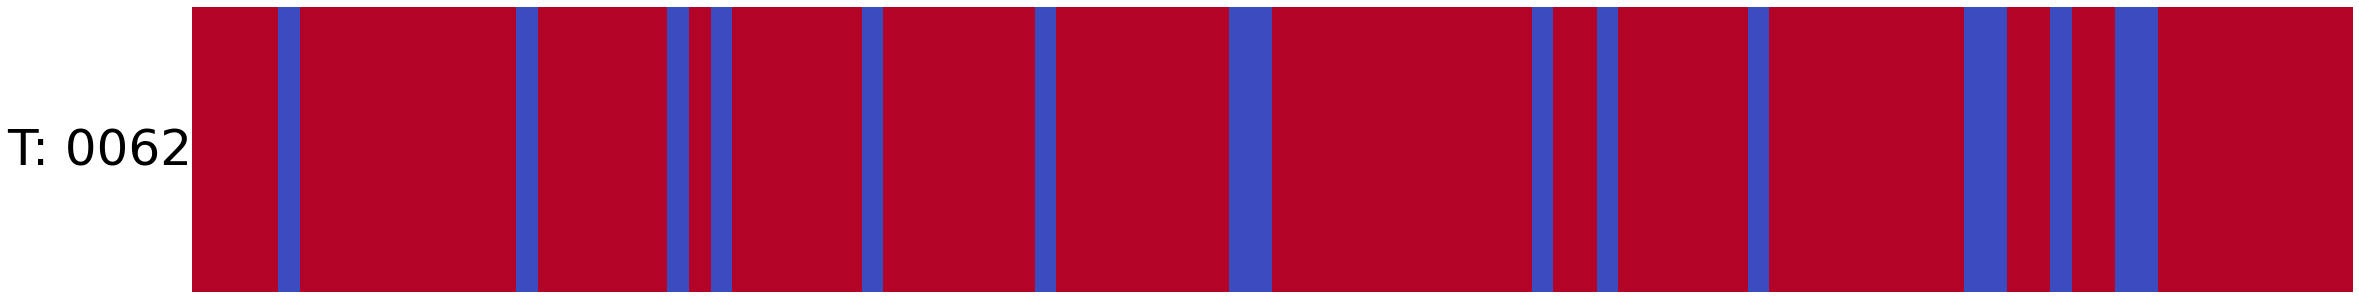

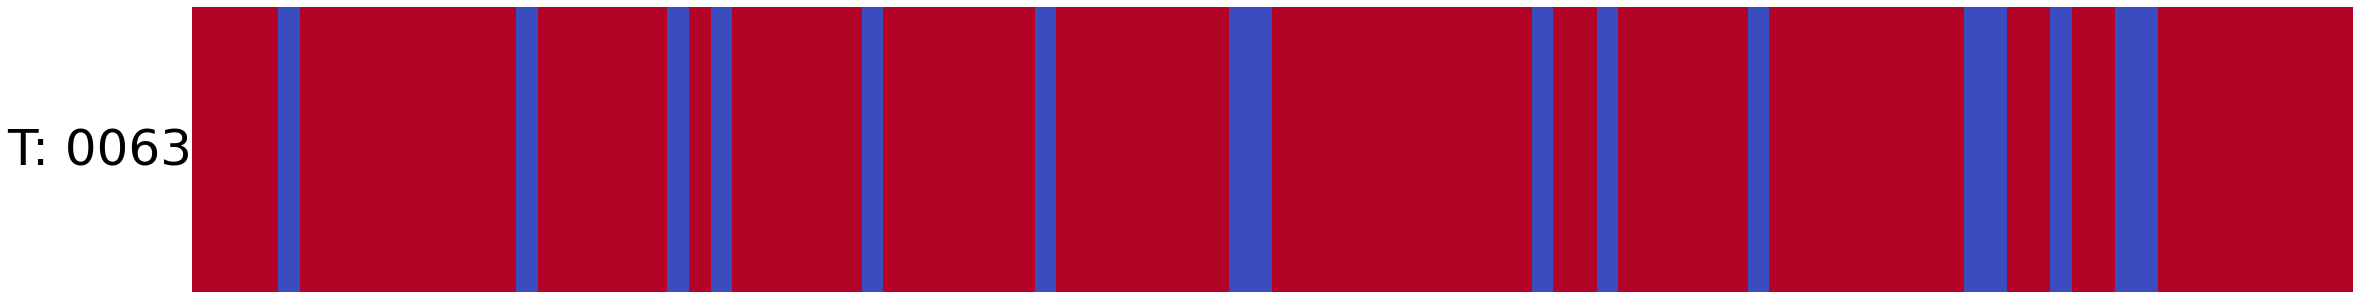

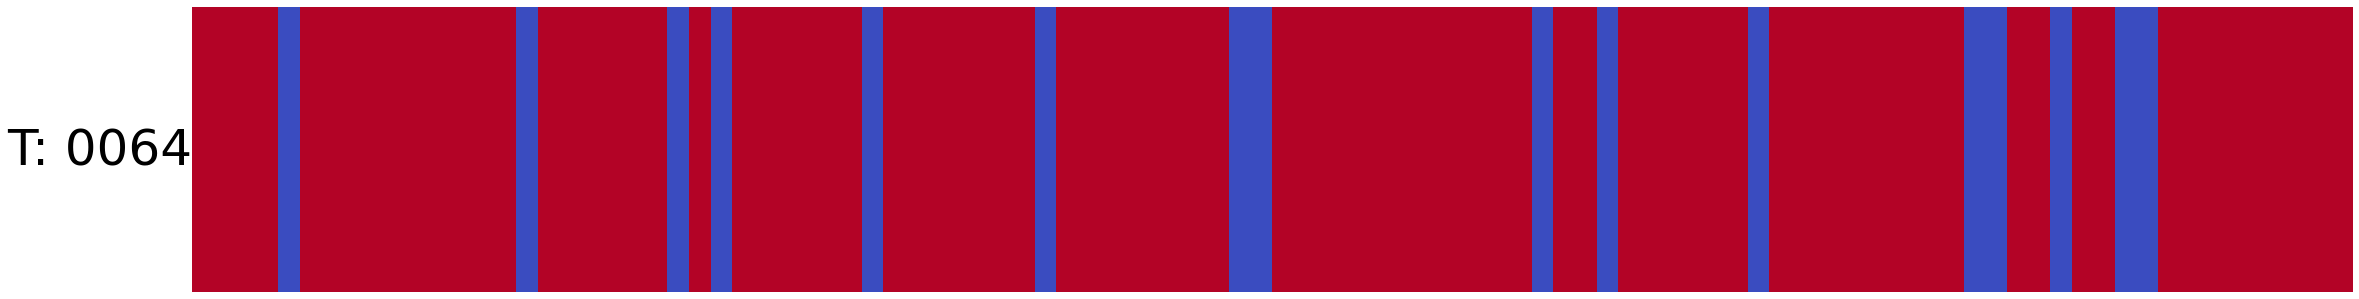

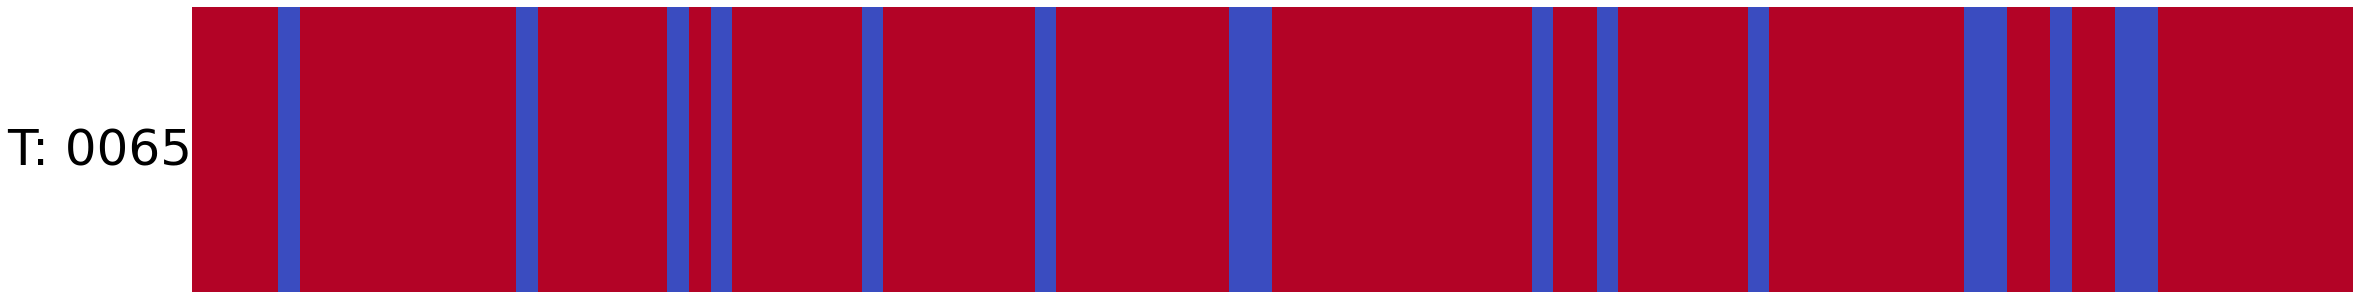

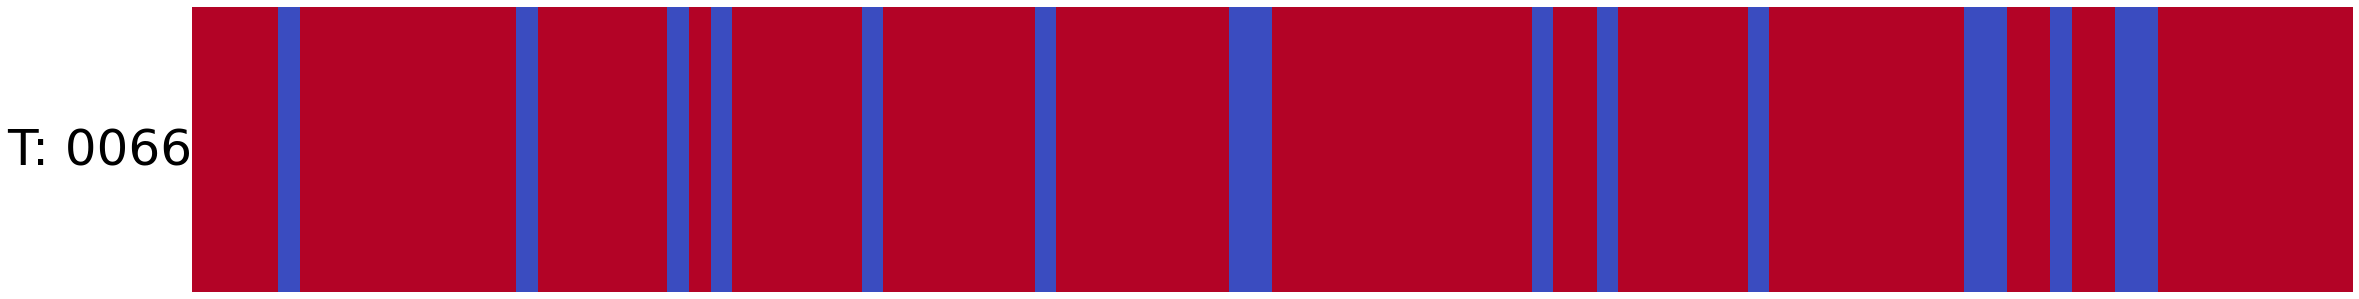

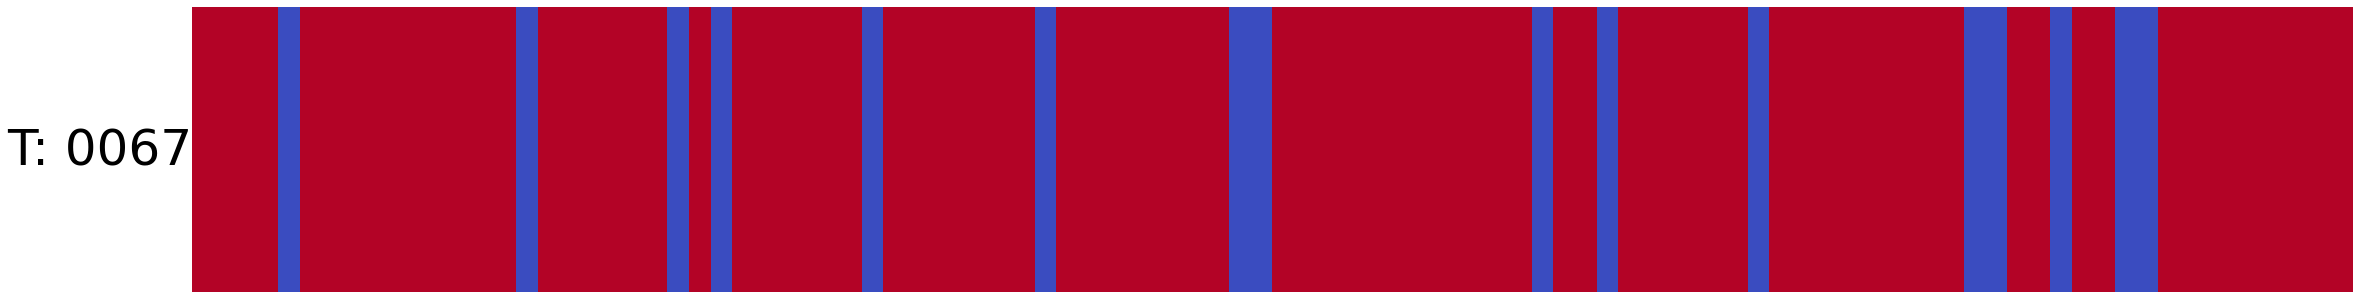

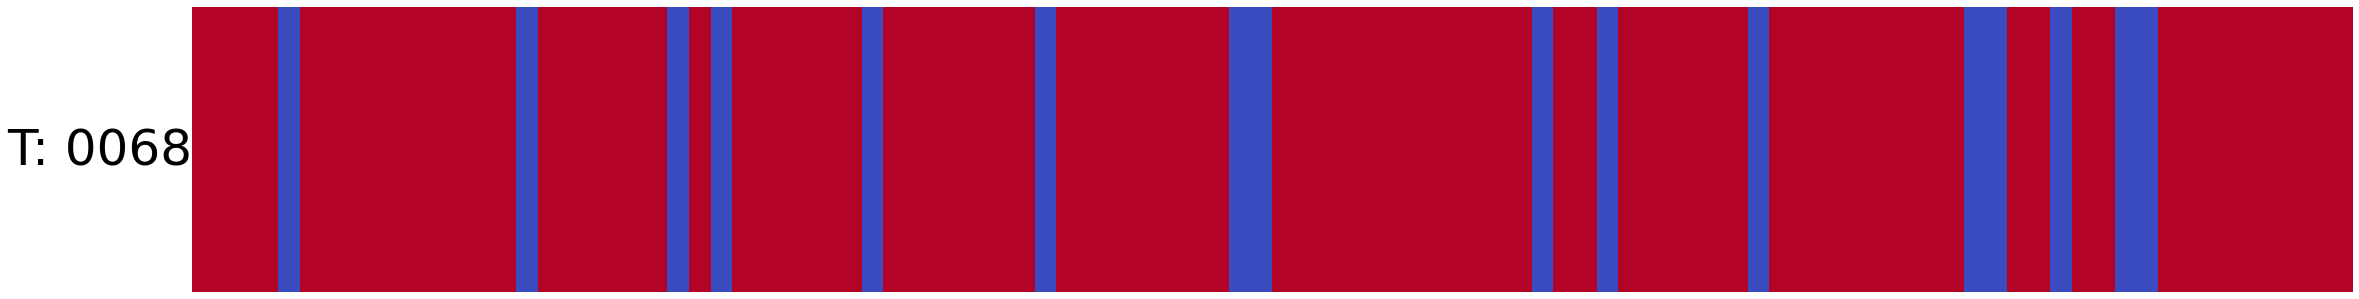

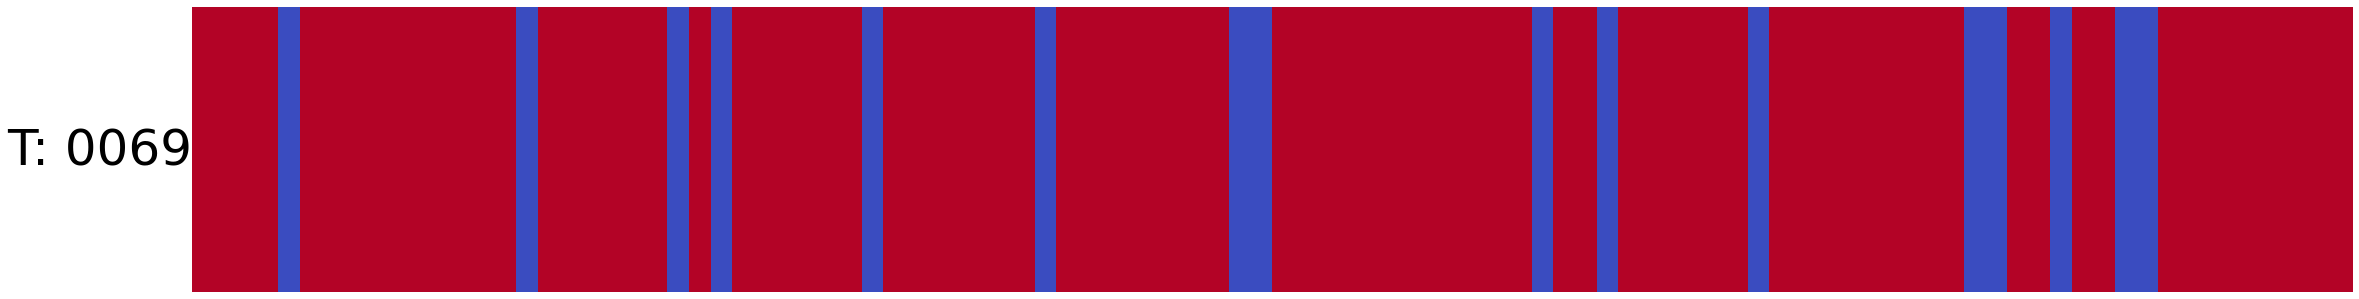

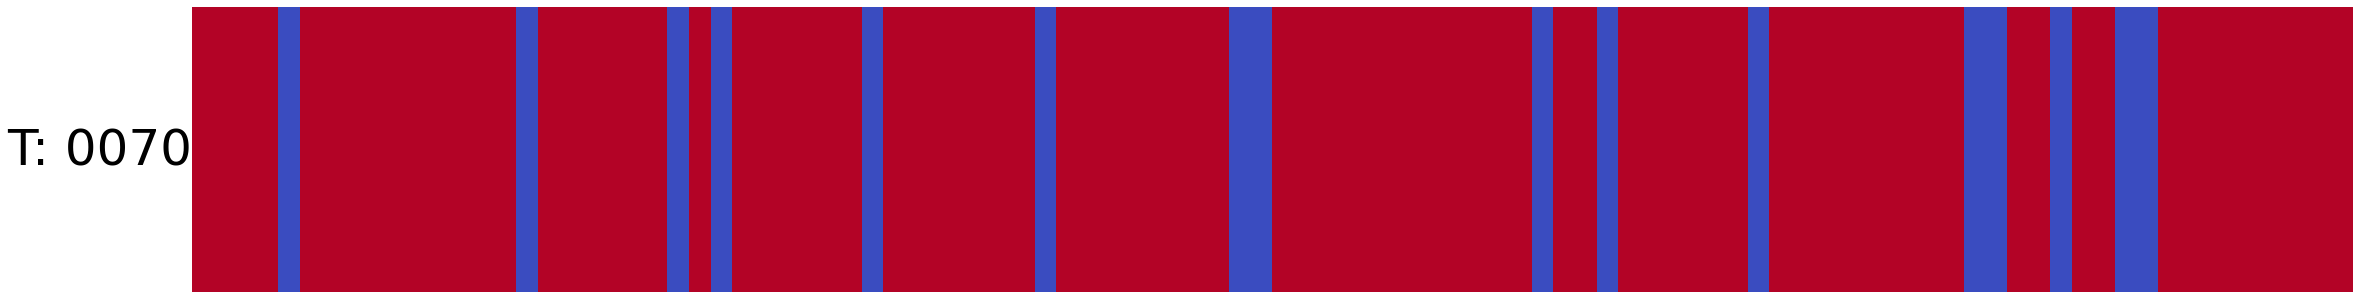

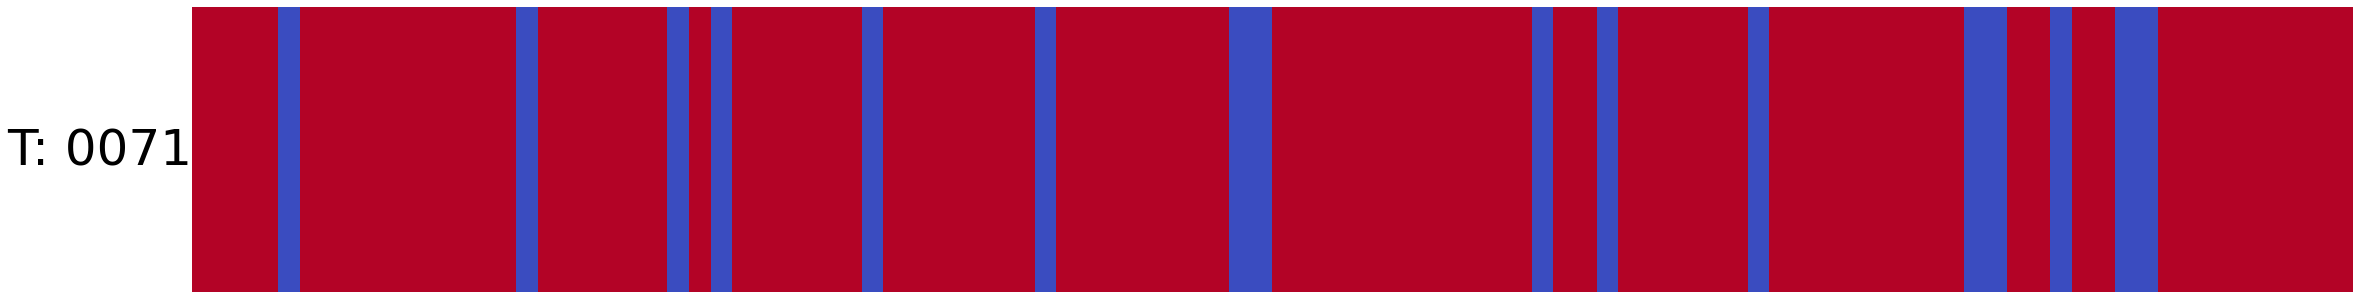

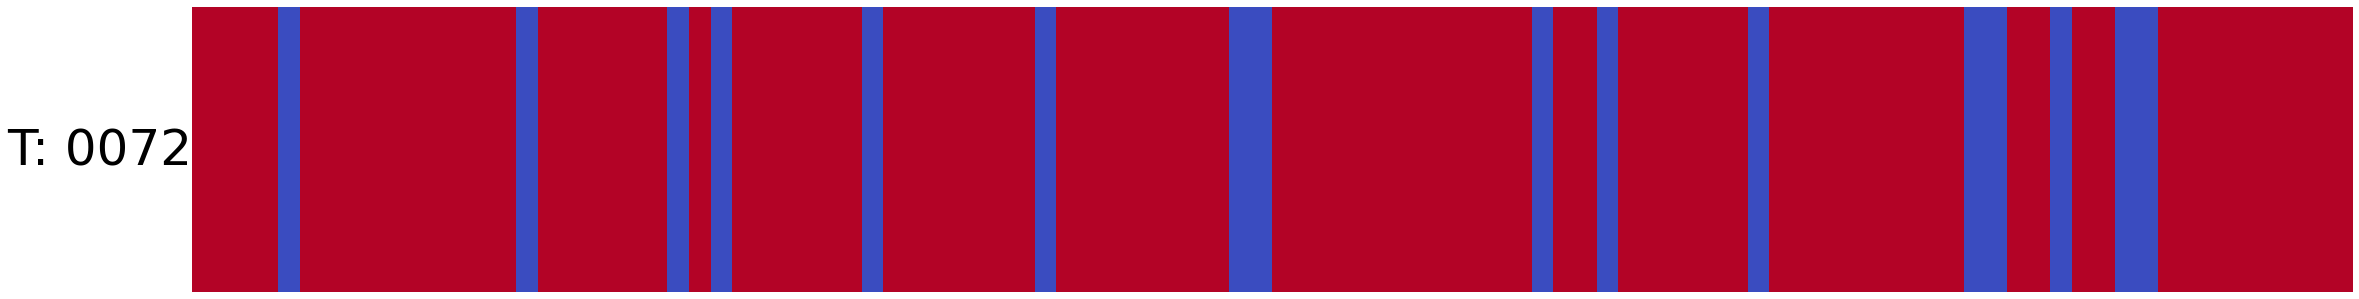

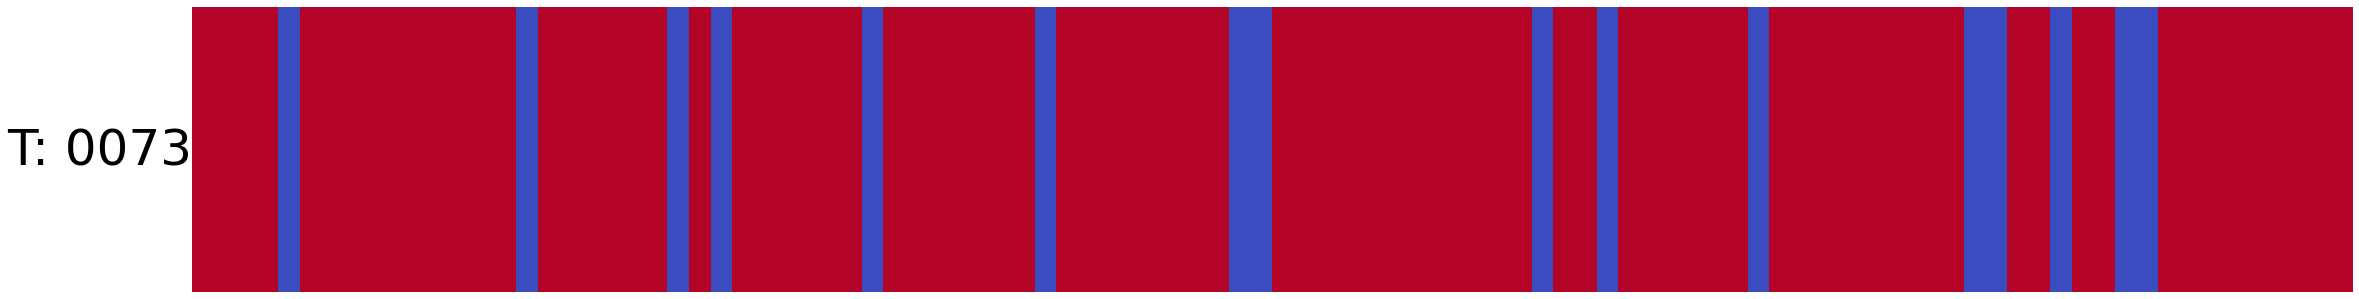

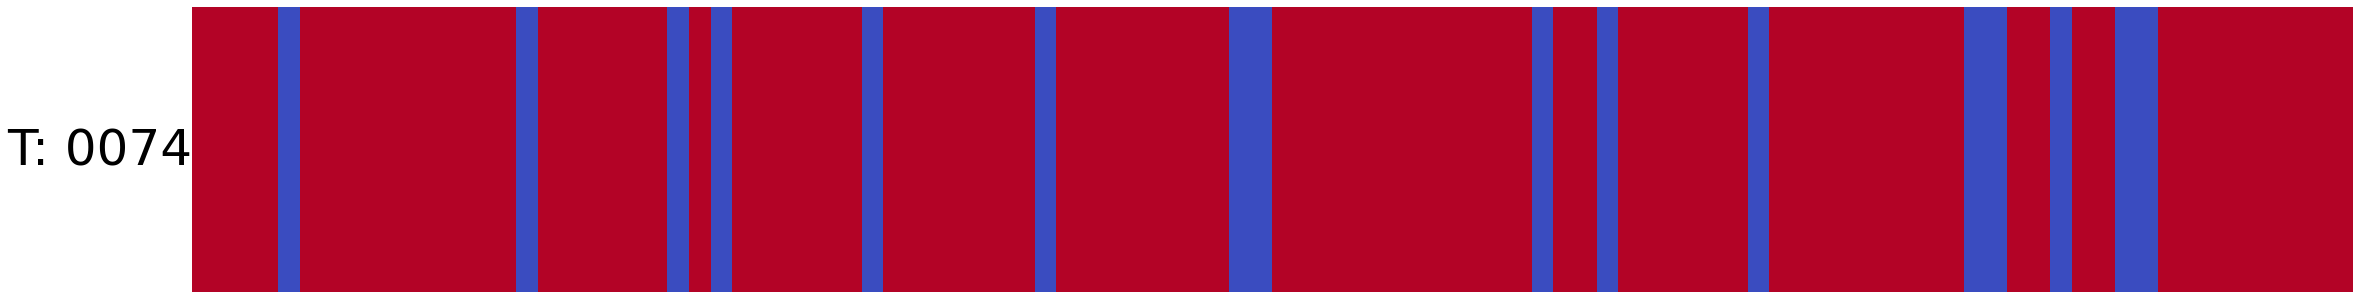

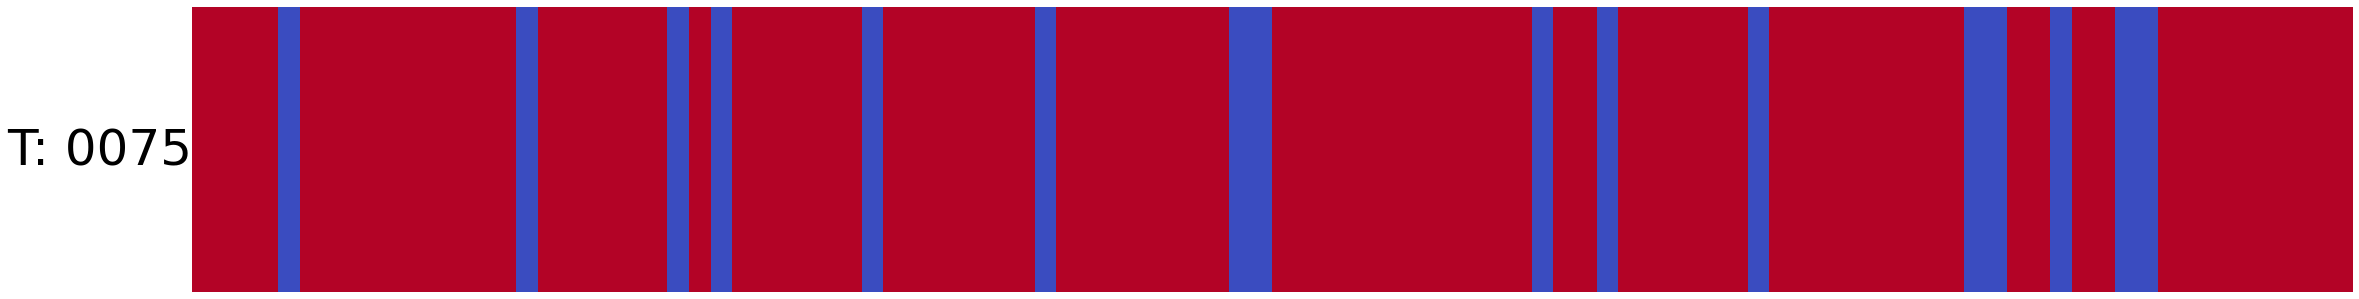

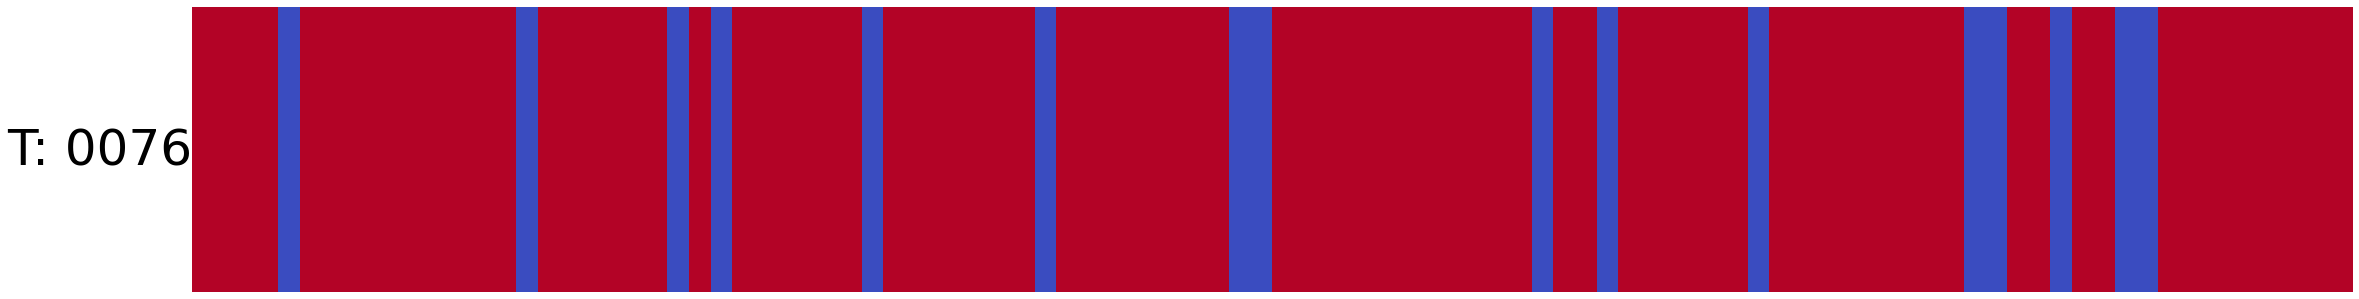

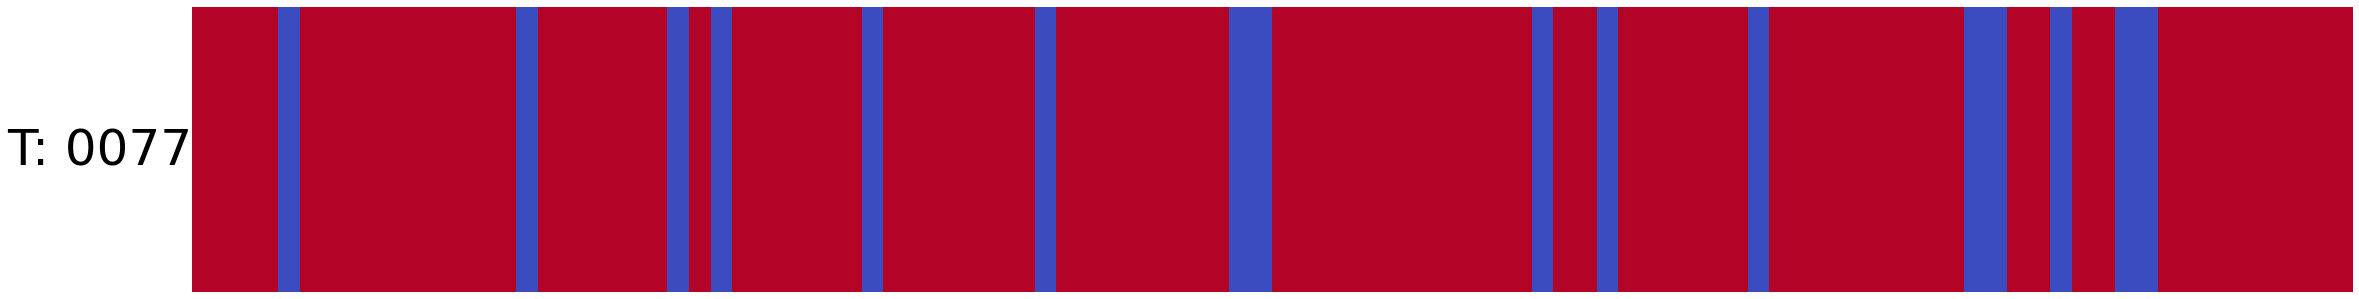

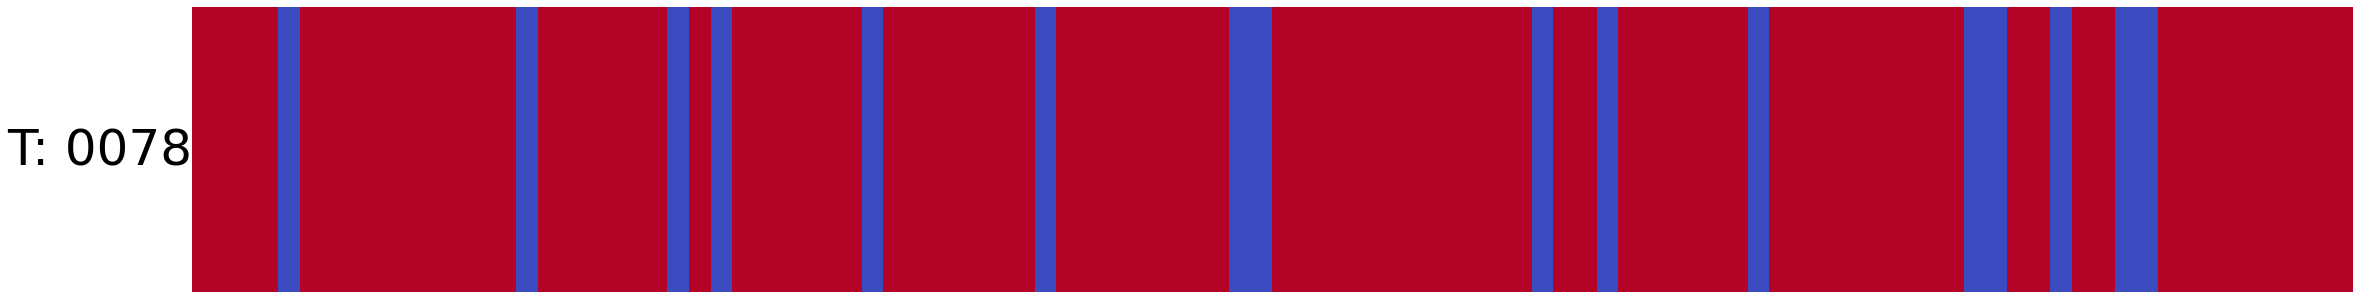

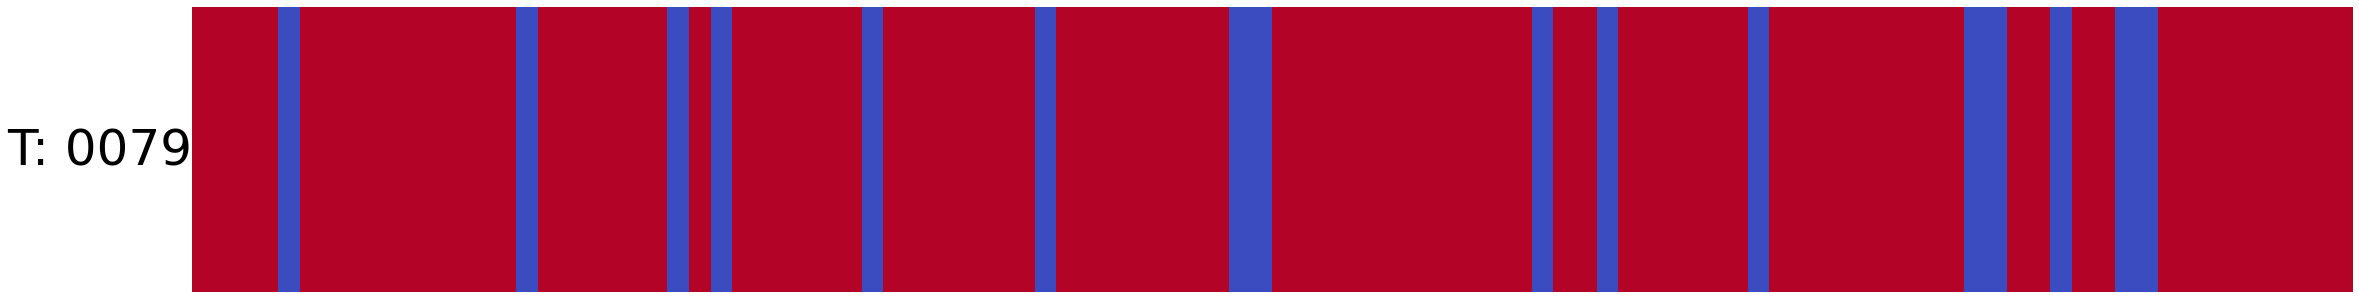

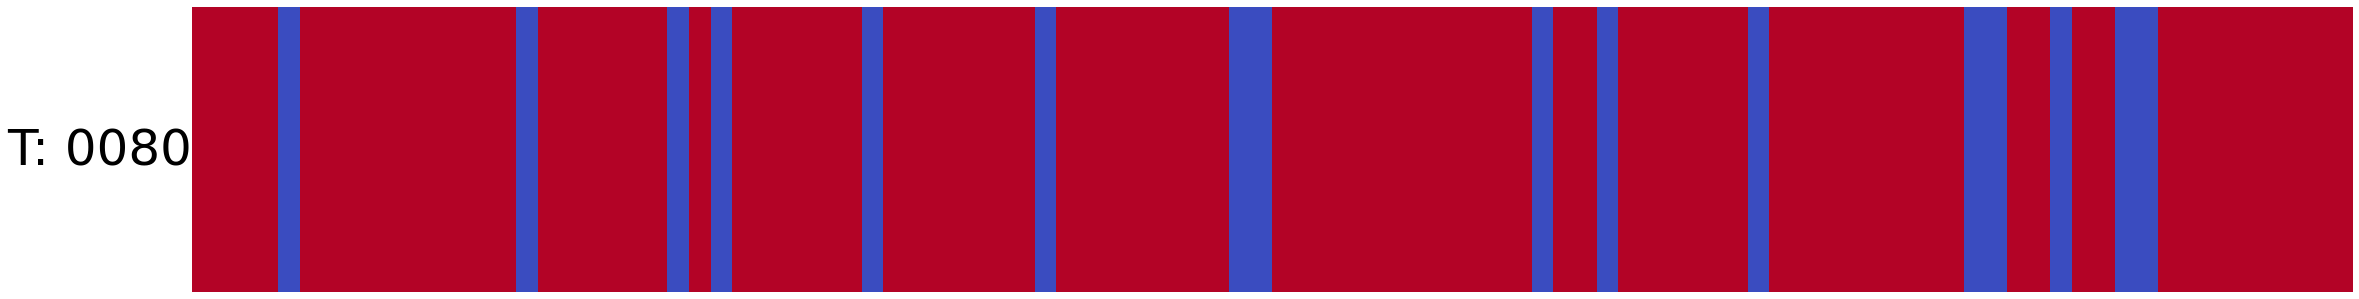

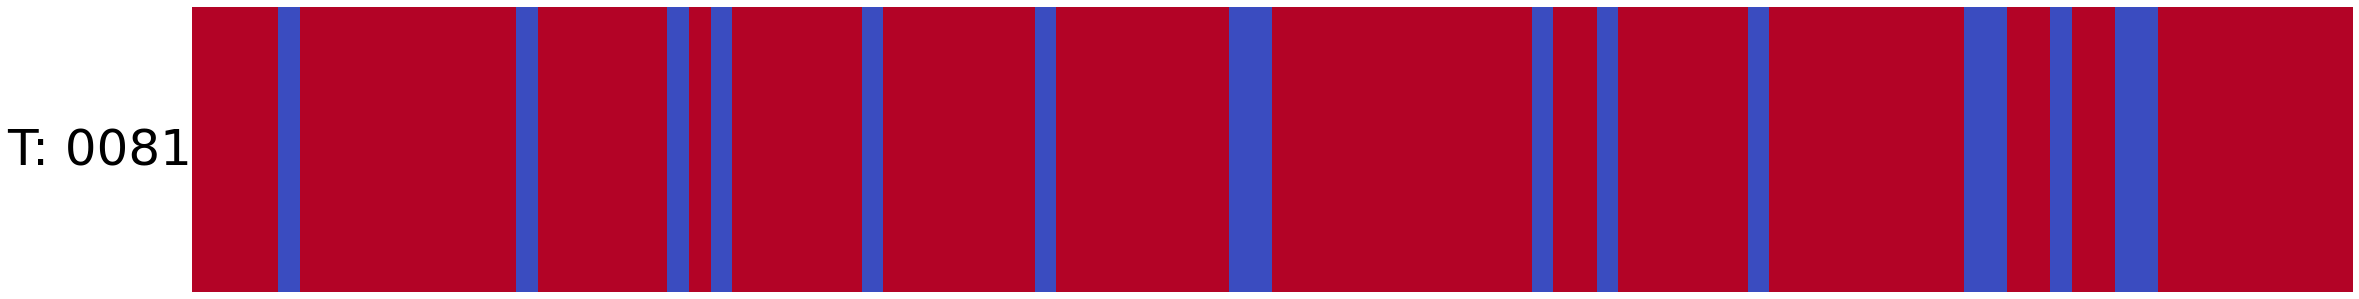

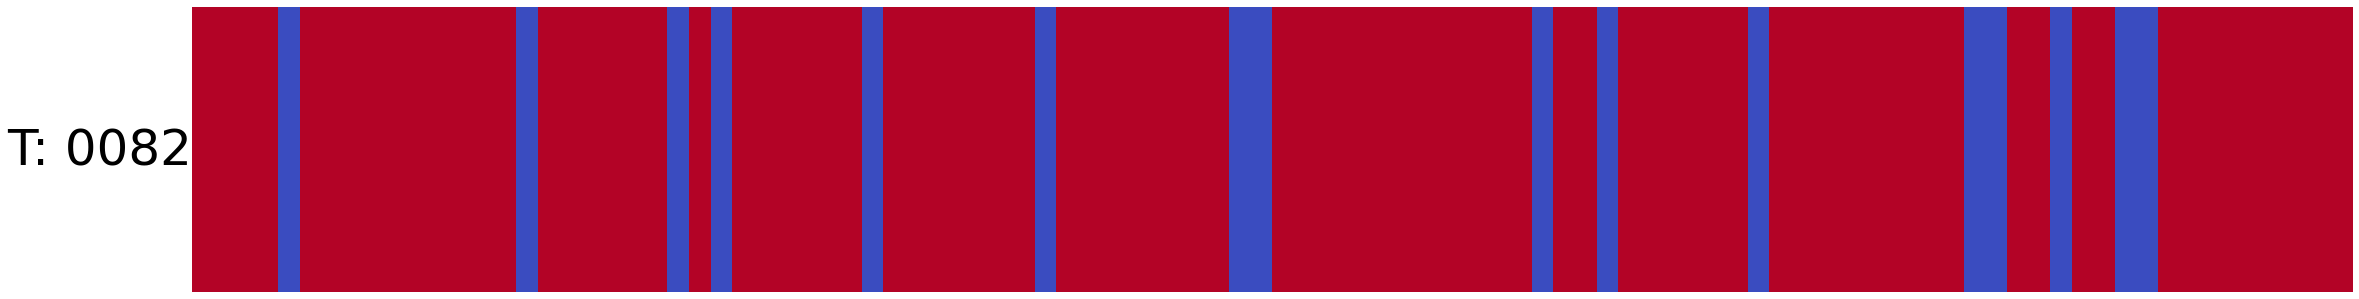

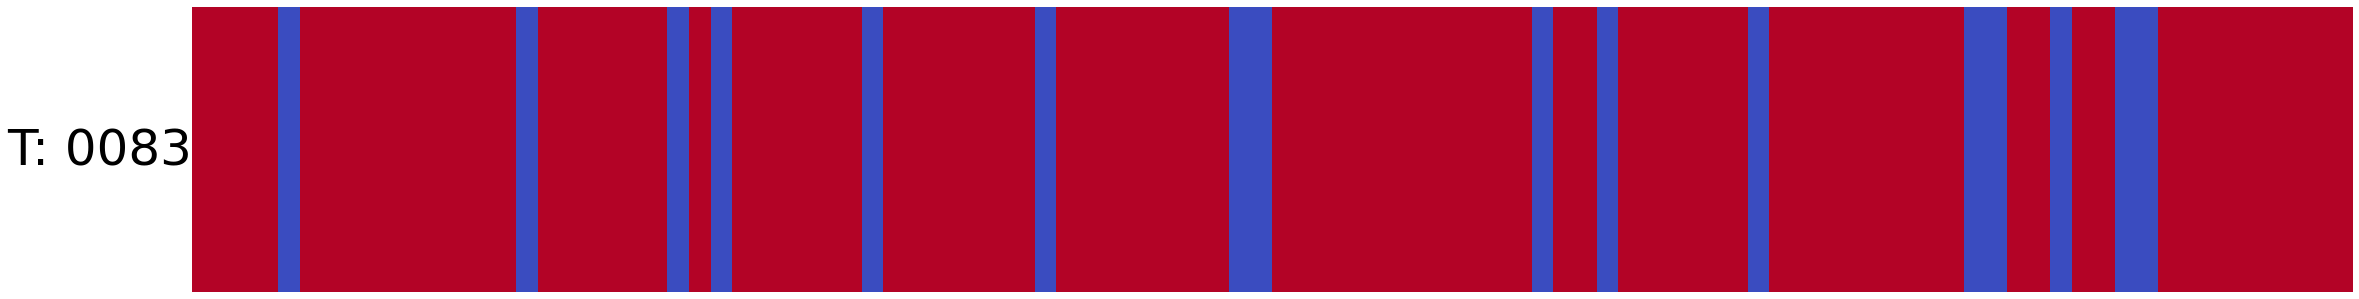

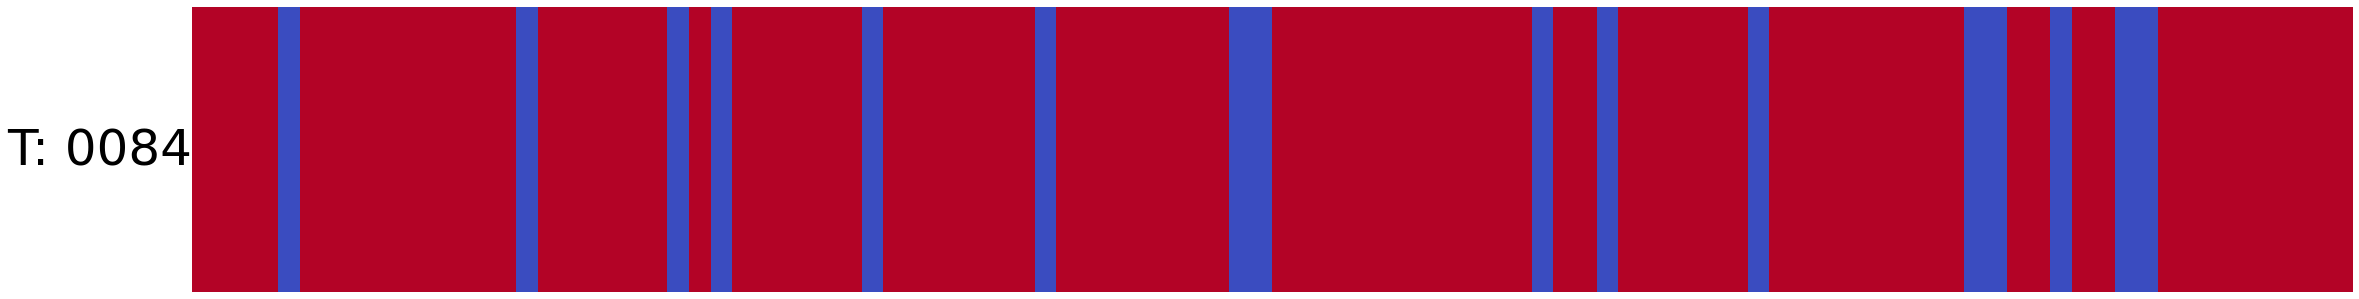

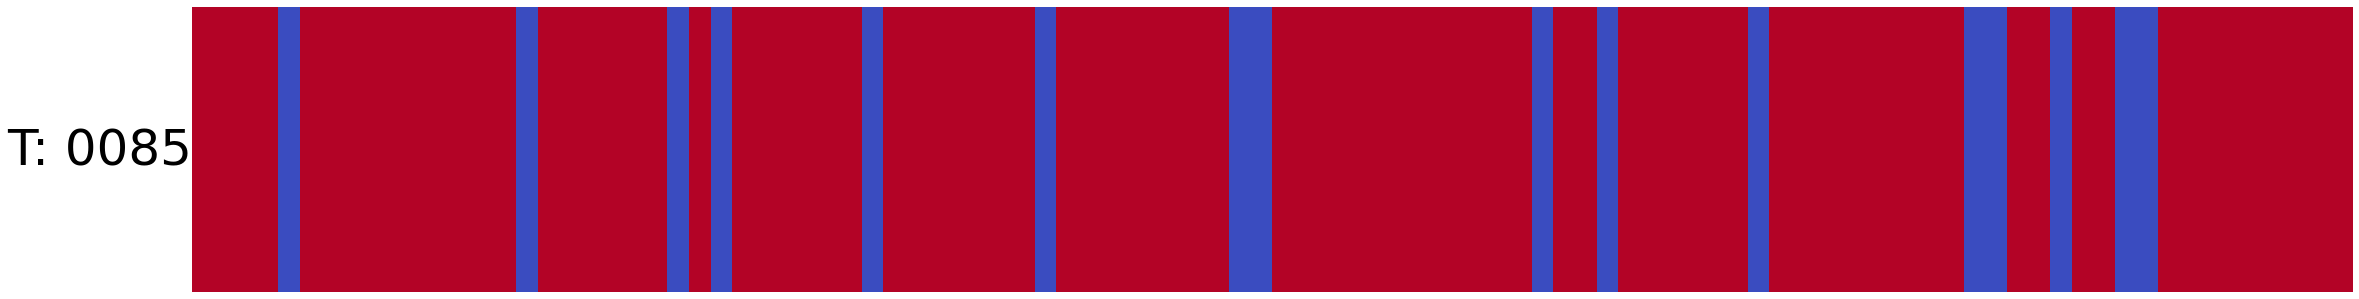

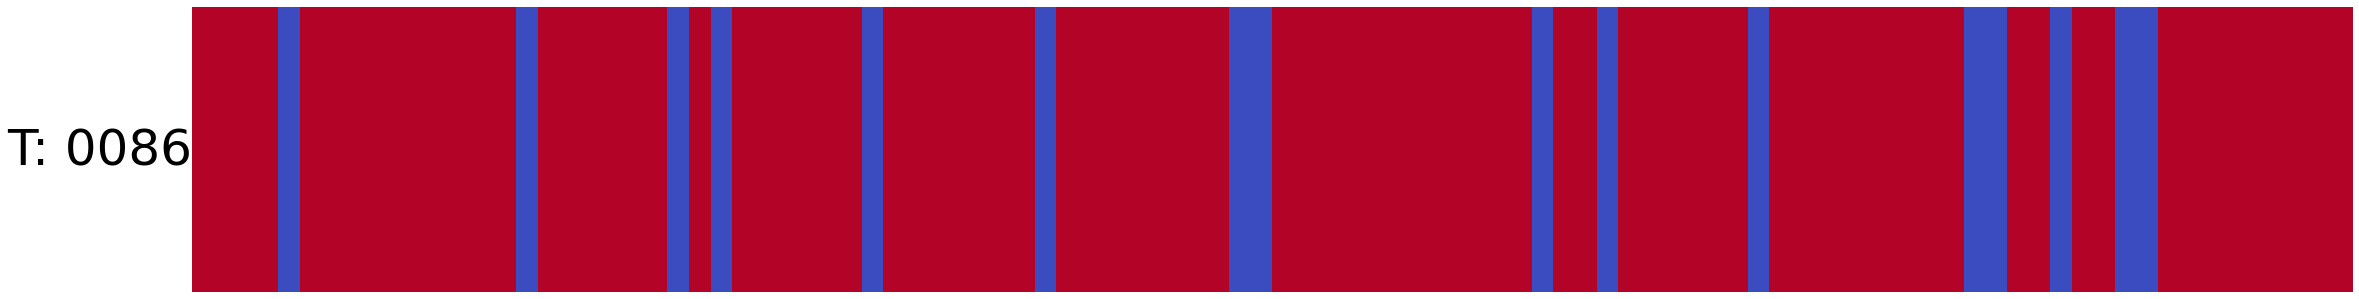

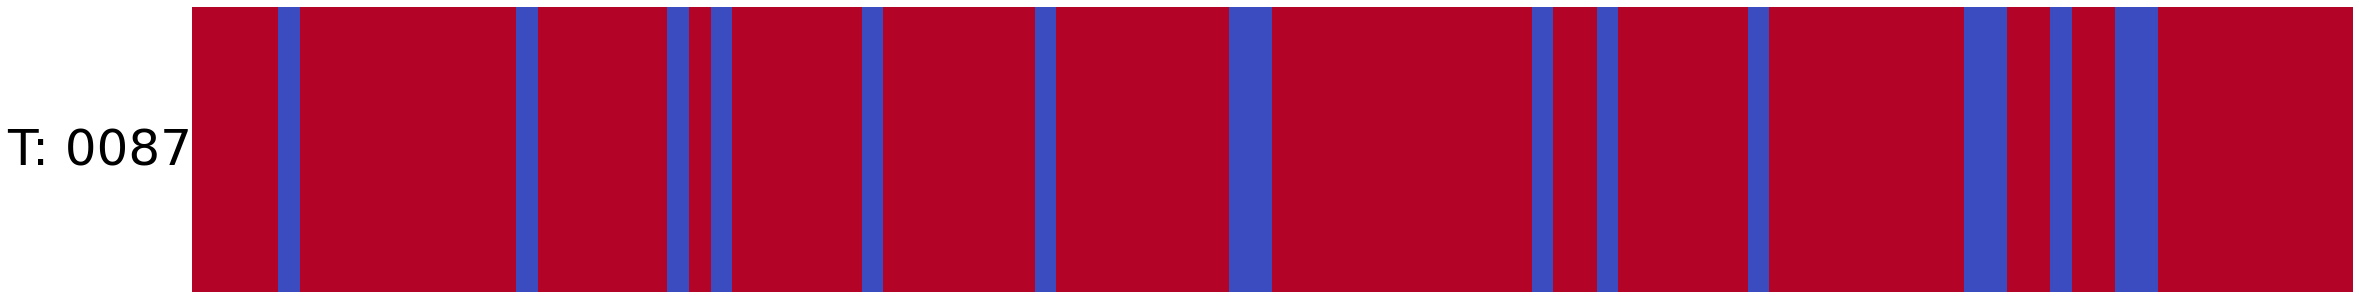

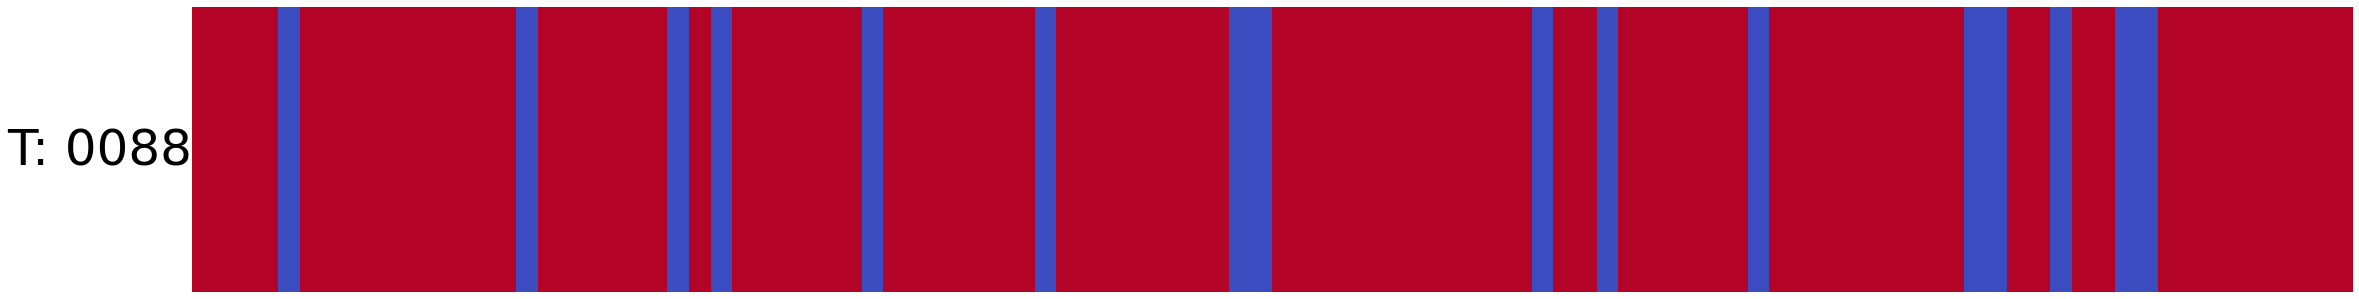

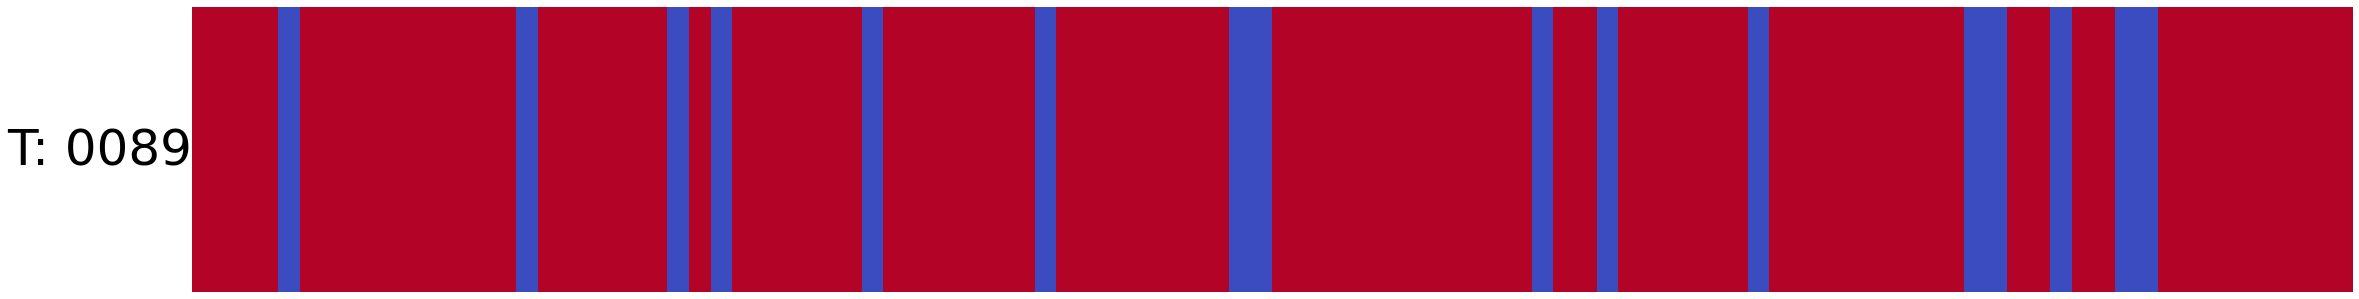

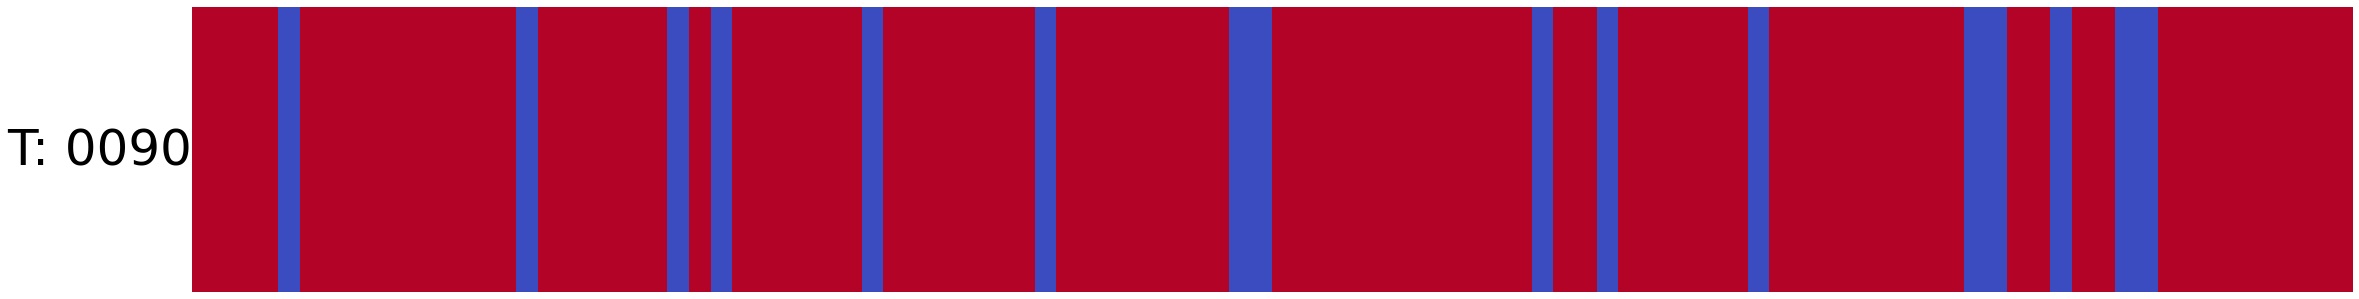

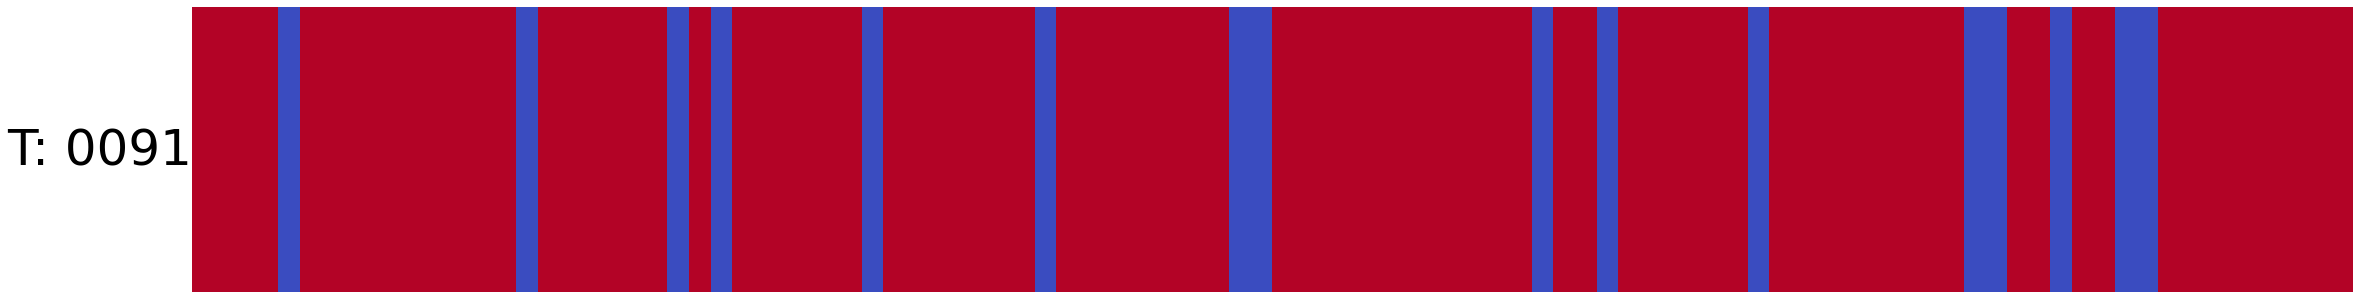

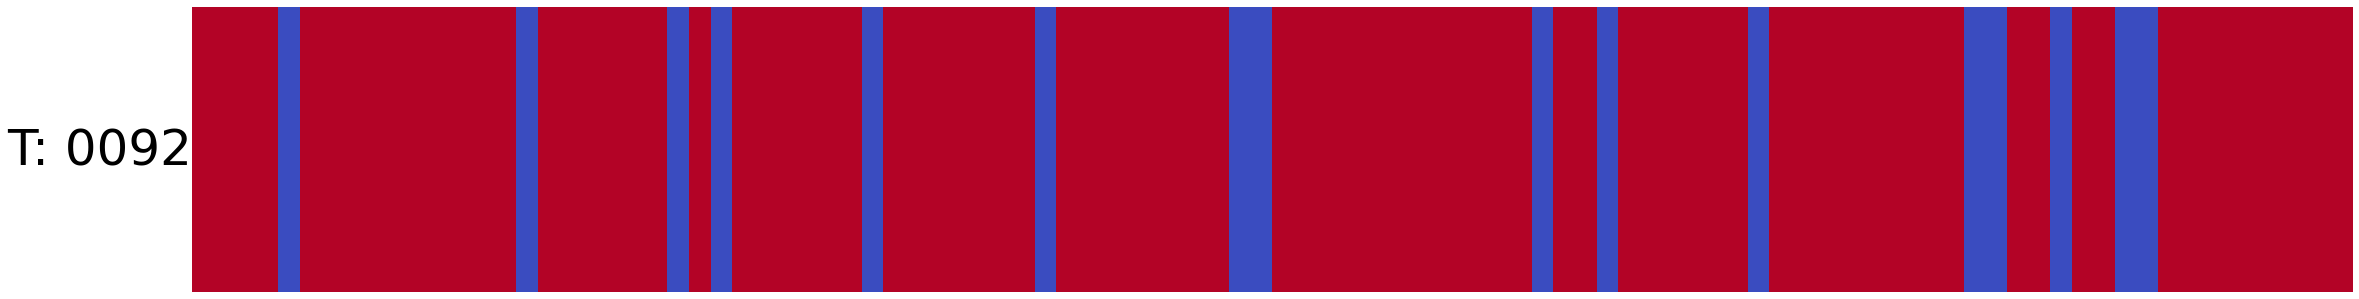

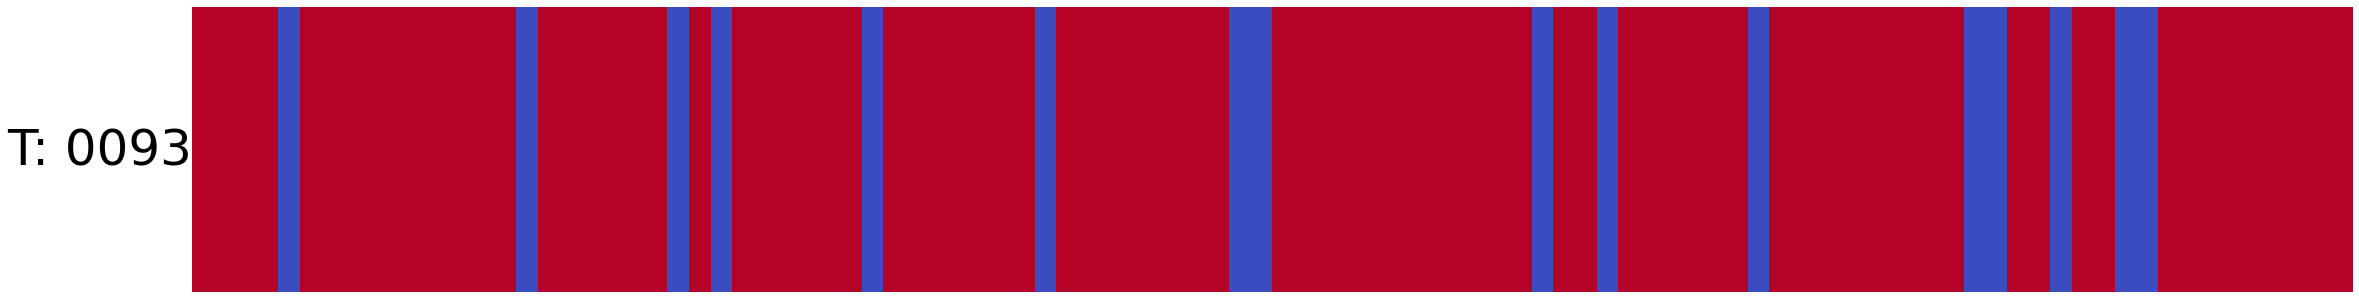

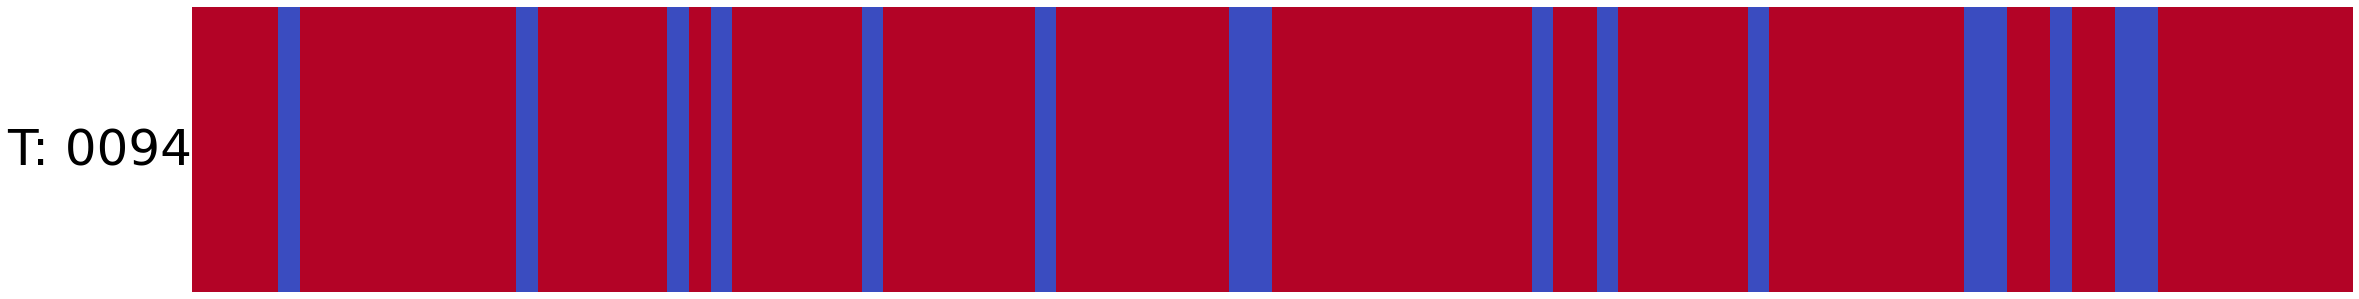

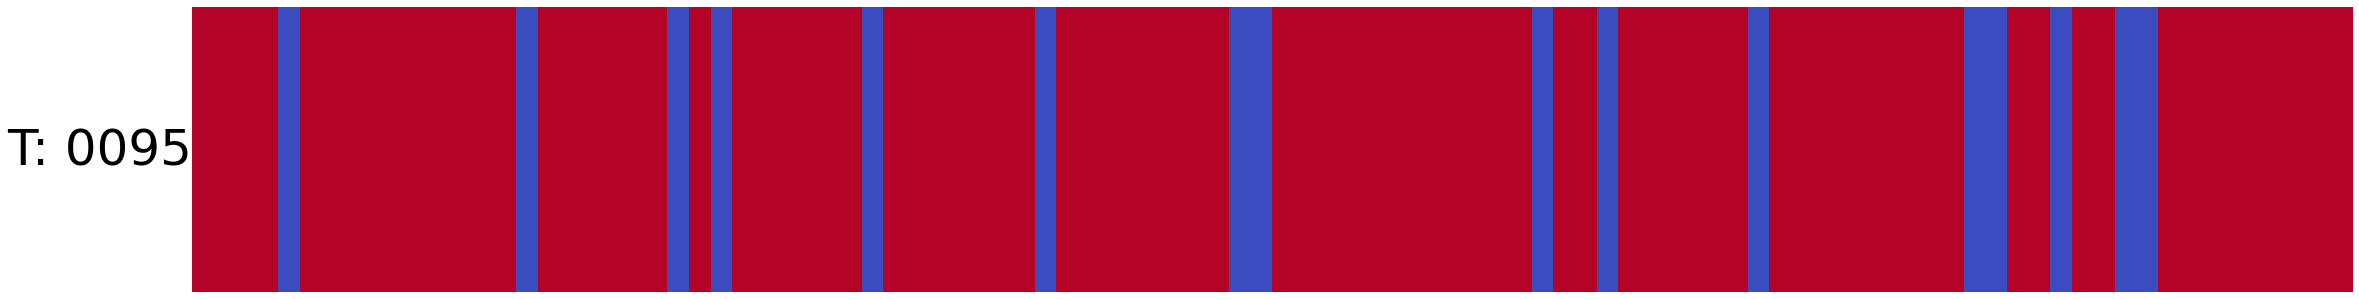

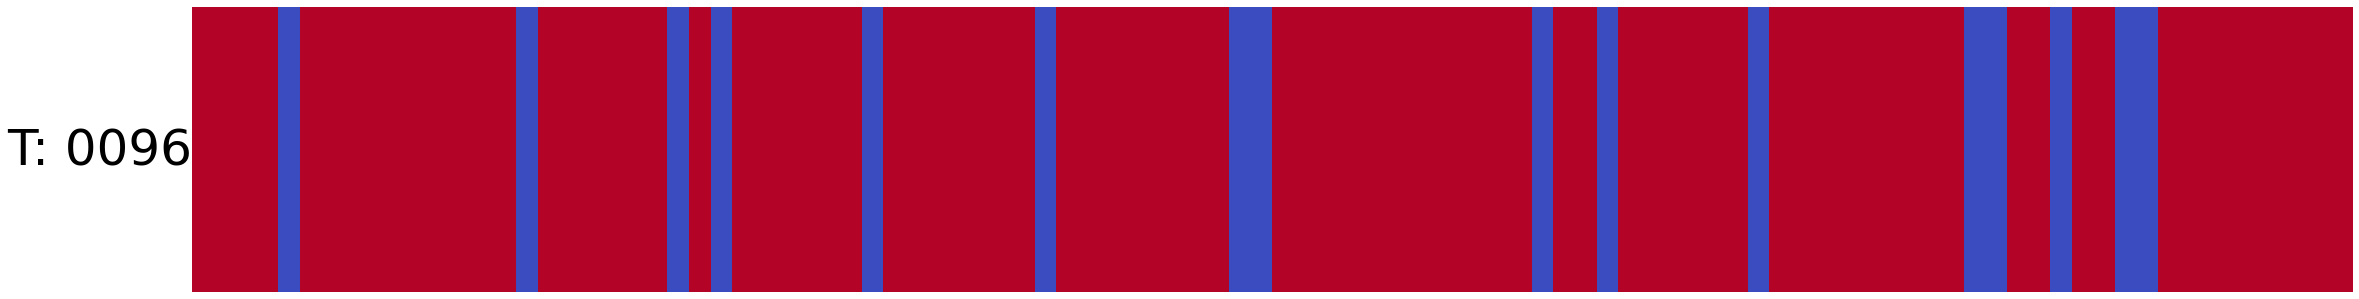

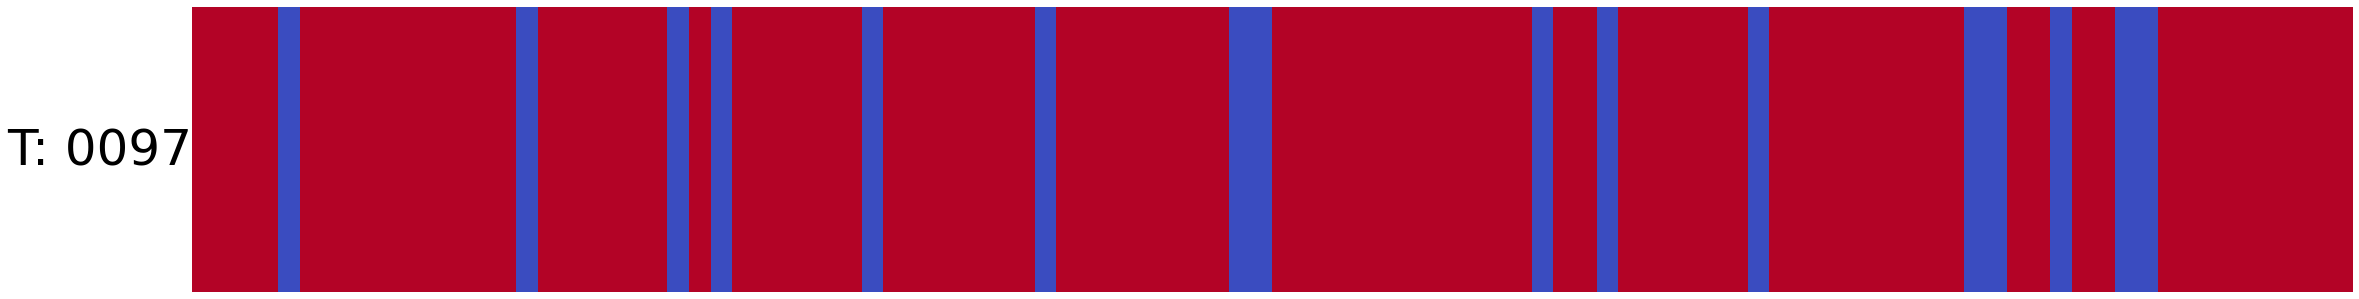

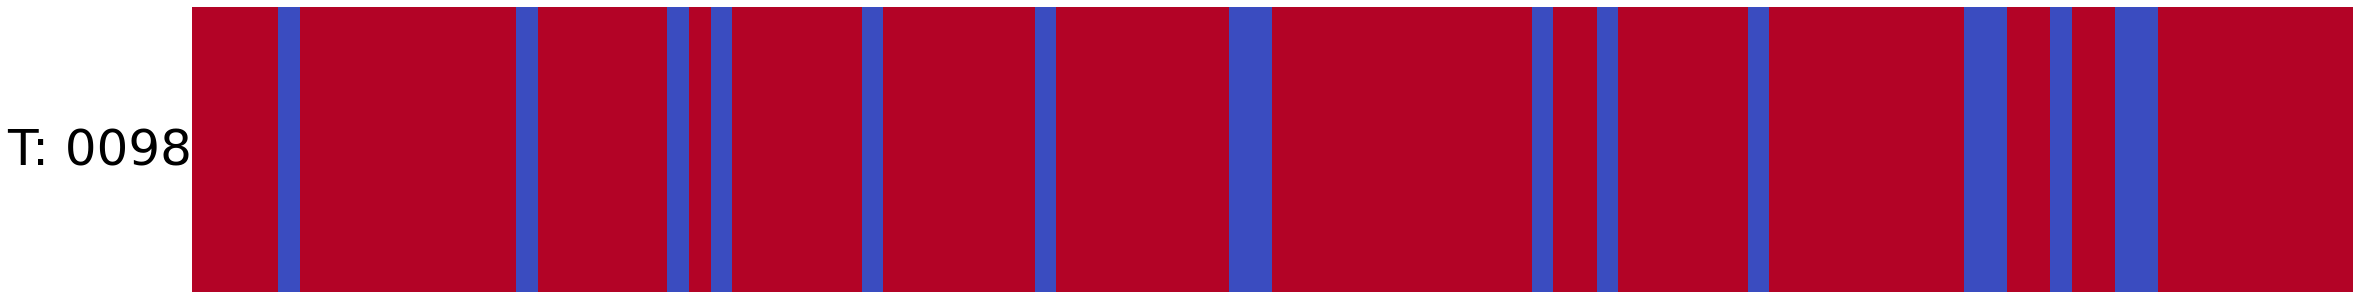

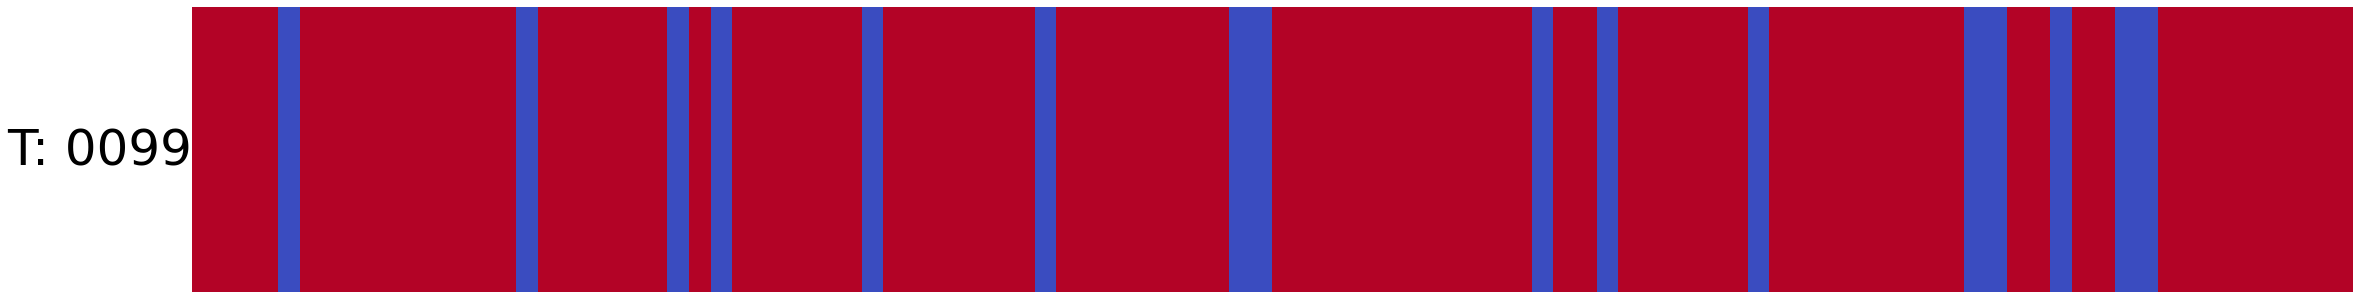

In [ ]:
posicao = np.random.randint(0,N)
estado = np.zeros((N), dtype=int)
duracao = np.zeros((N), dtype=int)

T = 100
D = 100
prob = 0.5
estado[posicao] = 1
duracao[posicao] = D

fig, axis = plt.subplots()
axis.imshow(np.vstack((estado,estado)), aspect='auto', vmin=0, vmax=1, cmap='coolwarm')
axis.set_axis_off()
fig.subplots_adjust(top=1, bottom=0.01, left=0, right=5)
fig.text(0,0.5, "T: %04d"%(0), va='center', ha='right', fontsize=50)
plt.show()

for t in range(1,T):
    new_estado = np.zeros((N), dtype=int)
    for n in range(N):

        if duracao[n] > 0:
            duracao[n] -= 1 # time-step
     
        indices = np.where(matriz[n,:]==1)[0] # lista de adjacência nó n
        viz_contaminado = False
        for idx in indices:
            if estado[idx] == 1: # vizinho está doente
                viz_contaminado = True
                break

        if np.random.random_sample()<=prob and viz_contaminado: # chance de contágio    
                new_estado[n] = 1
                duracao[n] = D
        else:
            if duracao[n] == 0:
                new_estado[n] = 0
            else:
                new_estado[n] = estado[n]

    estado = new_estado
    fig, axis = plt.subplots()
    axis.imshow(np.vstack((estado,estado)), vmin=0, vmax=1, aspect='auto', cmap='coolwarm')
    axis.set_axis_off()
    fig.subplots_adjust(top=1, bottom=0.01, left=0, right=5)
    fig.text(0,0.5, "T: %04d"%(t), va='center', ha='right', fontsize=50)
#     fig.text(0,0,"Tempo", name, va='center', ha='right', fontsize=10)

    plt.show()
    if len(np.nonzero(estado)[0]) == 0:
        break
    


Para analisar o tempo de duração de infecção como sendo infinitos, colocamos D=100, visto que T será analisado em 100 espaços. Nesse caso, todo vértice uma fez infectado sempre tera 50% de chance (prob=0.5) de infectar um outro vértice conectado a ele. Isso deixa de fora todos os vértices que não possuem arestas na matriz gerada aleatoriamente no início.



---

##Simulação 3.1 - Probabilidade de 100%


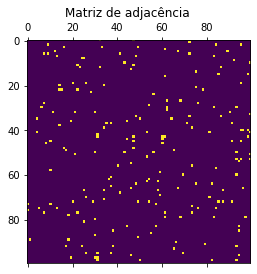

In [ ]:
#Parâmetros do grafo
N=100       #Número de vértices
grauMedio=4 #Grau médio
a = grauMedio*N//2 #número de arestas

matriz = np.zeros((N,N), dtype=int)

numeroArestas=0
while (numeroArestas <= a):
  vertice1 = np.random.randint(0, N)
  vertice2 = np.random.randint(0, N)
  matriz[vertice1, vertice2] = 1
  numeroArestas+=1


plt.matshow(matriz)
plt.suptitle('Matriz de adjacência')
plt.show()

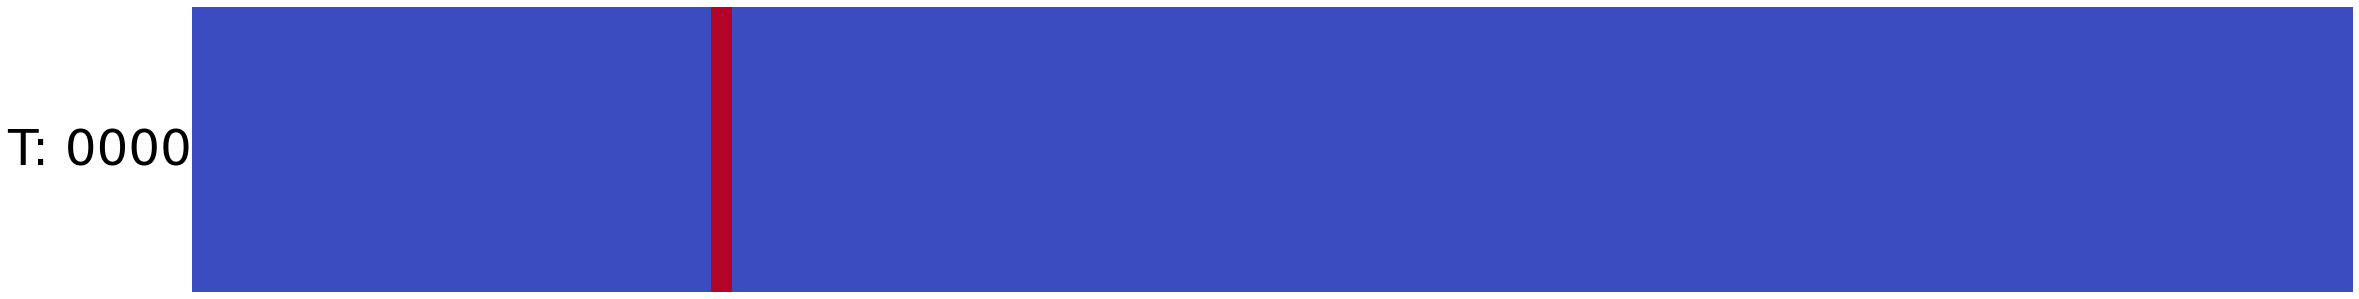

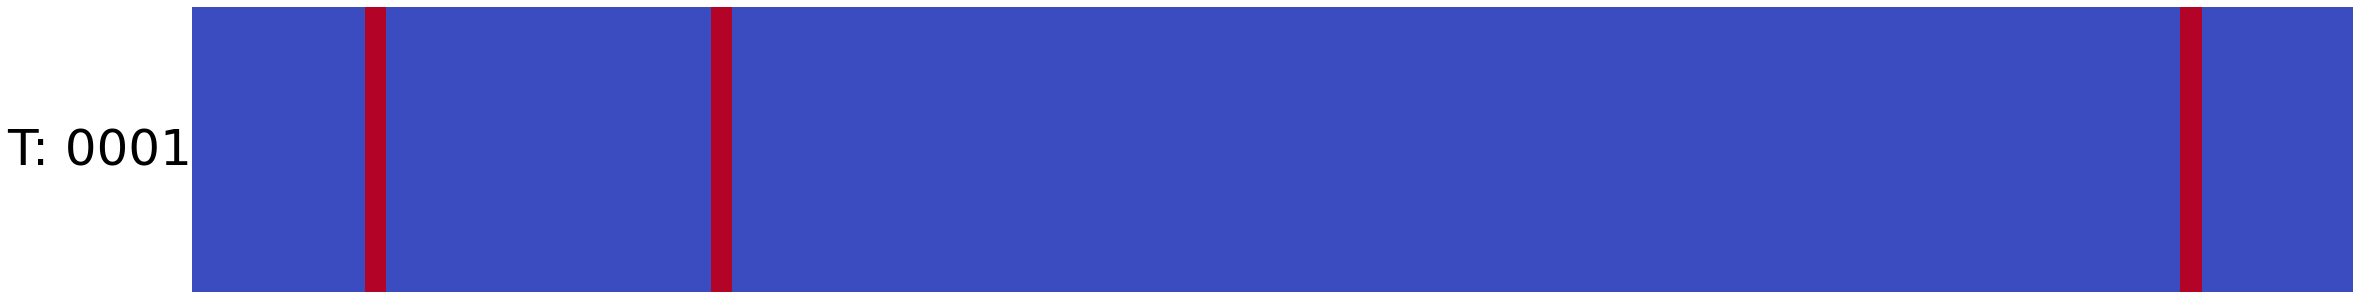

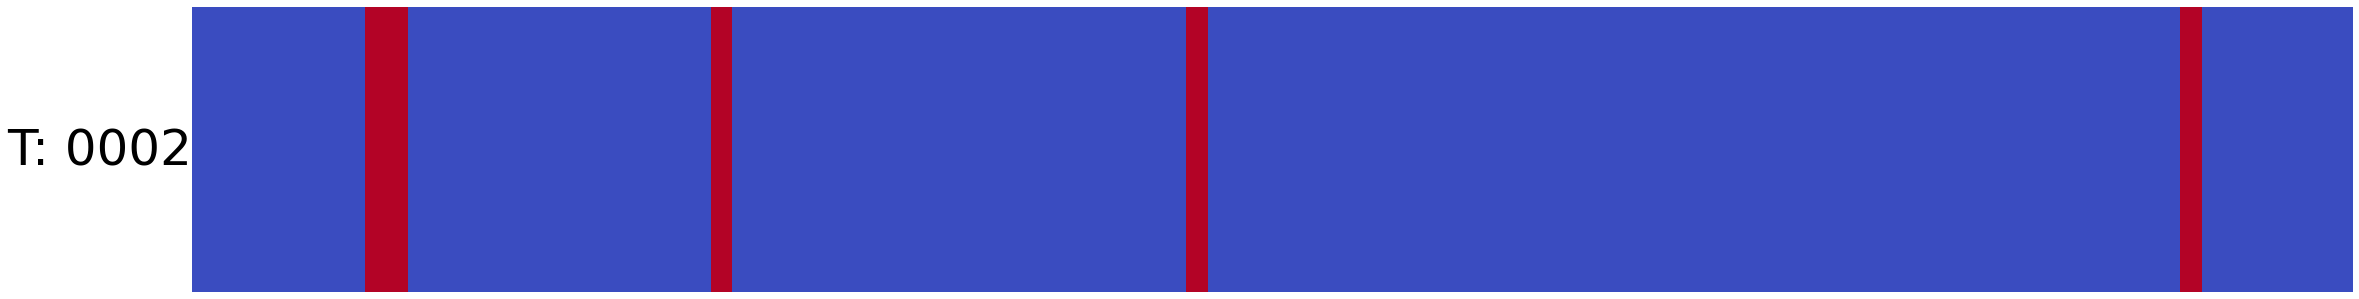

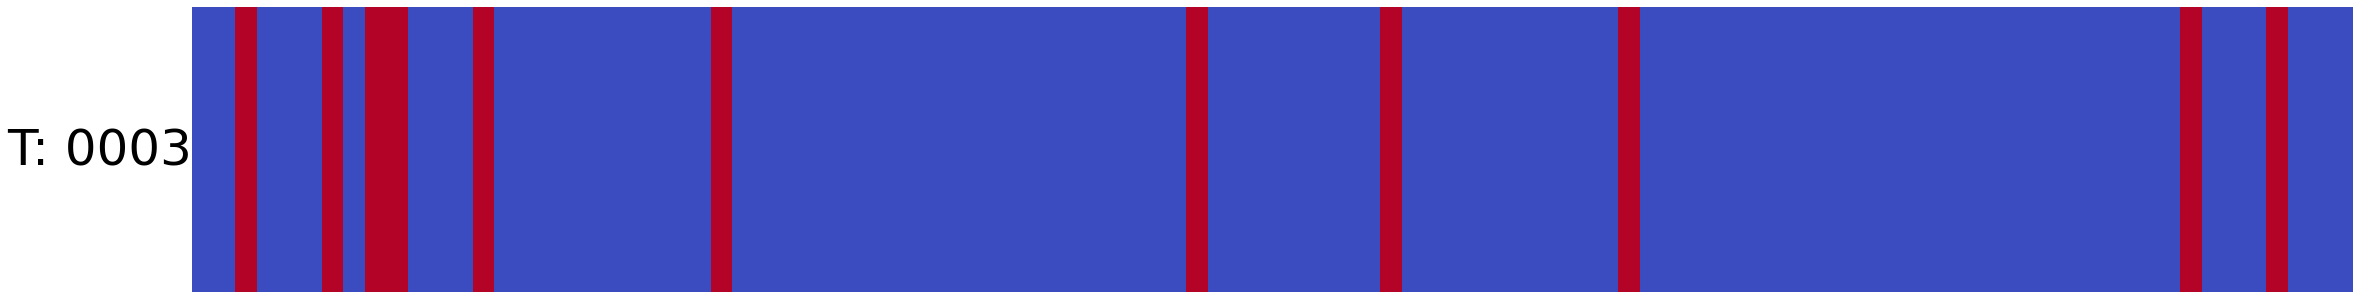

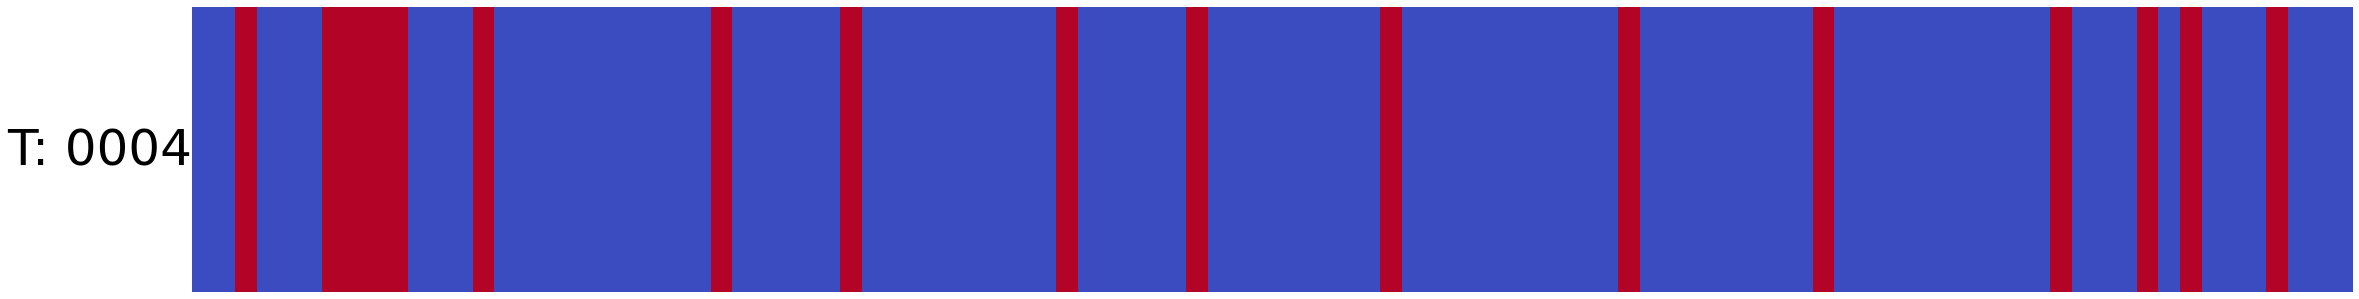

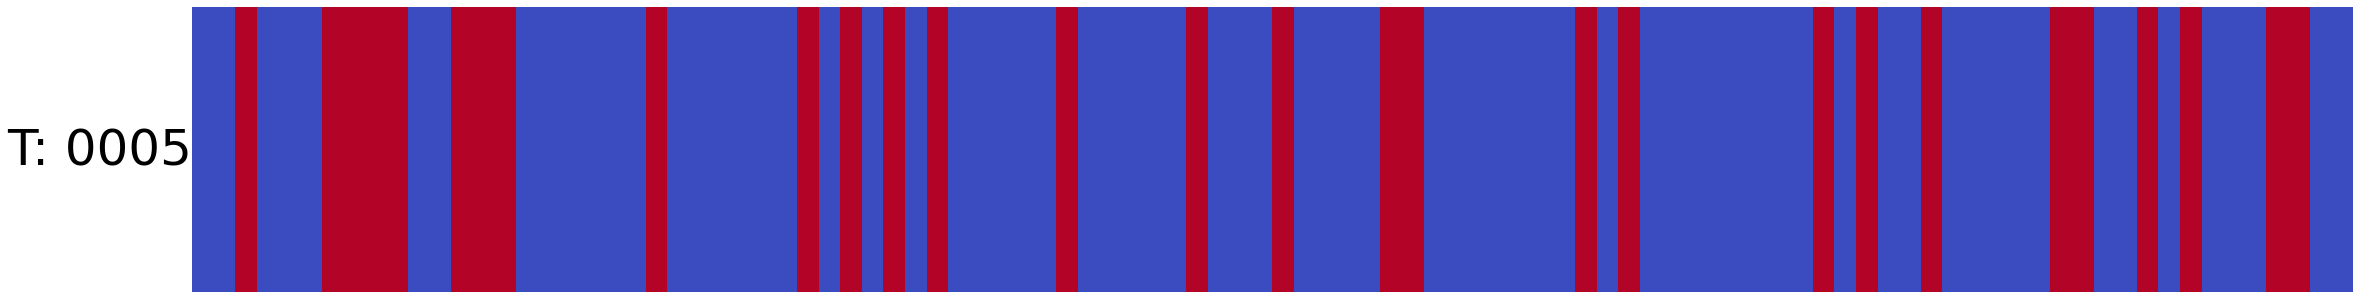

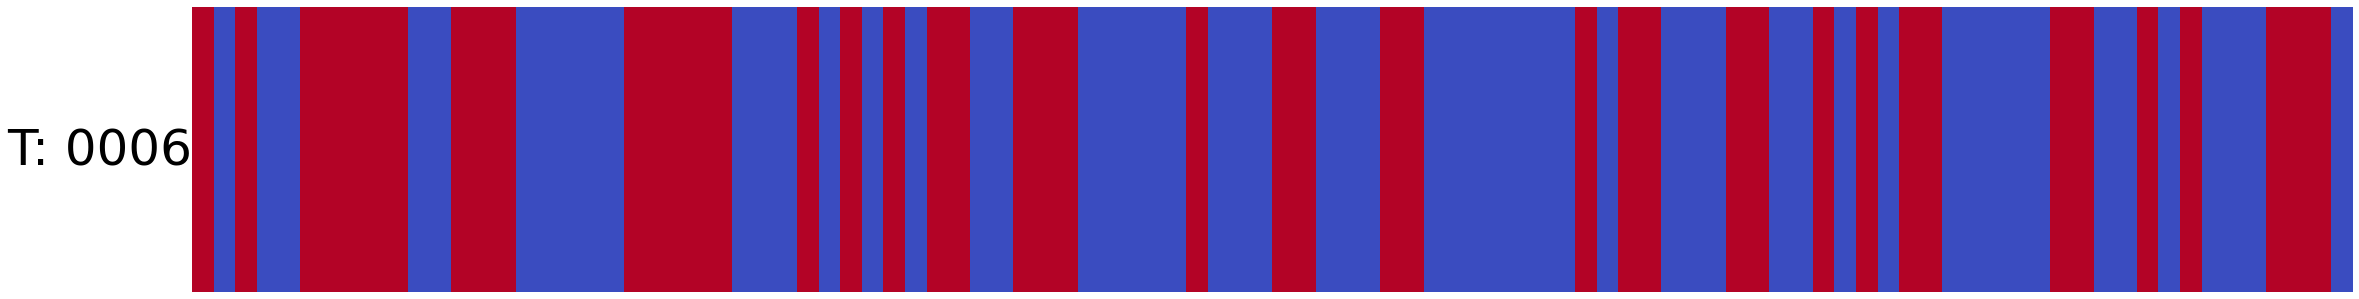

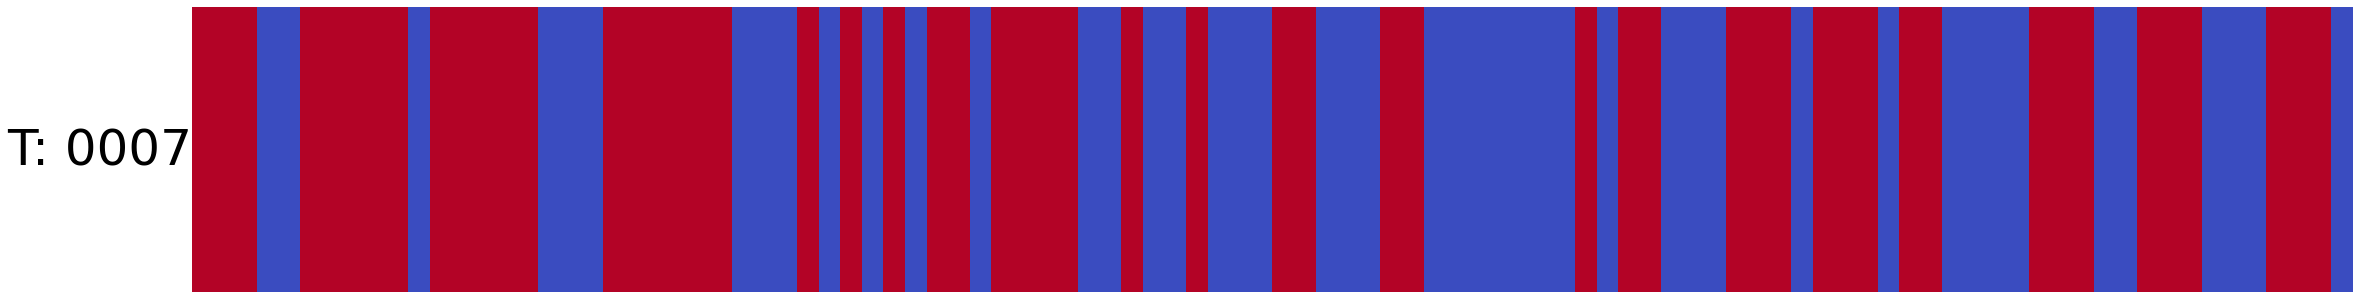

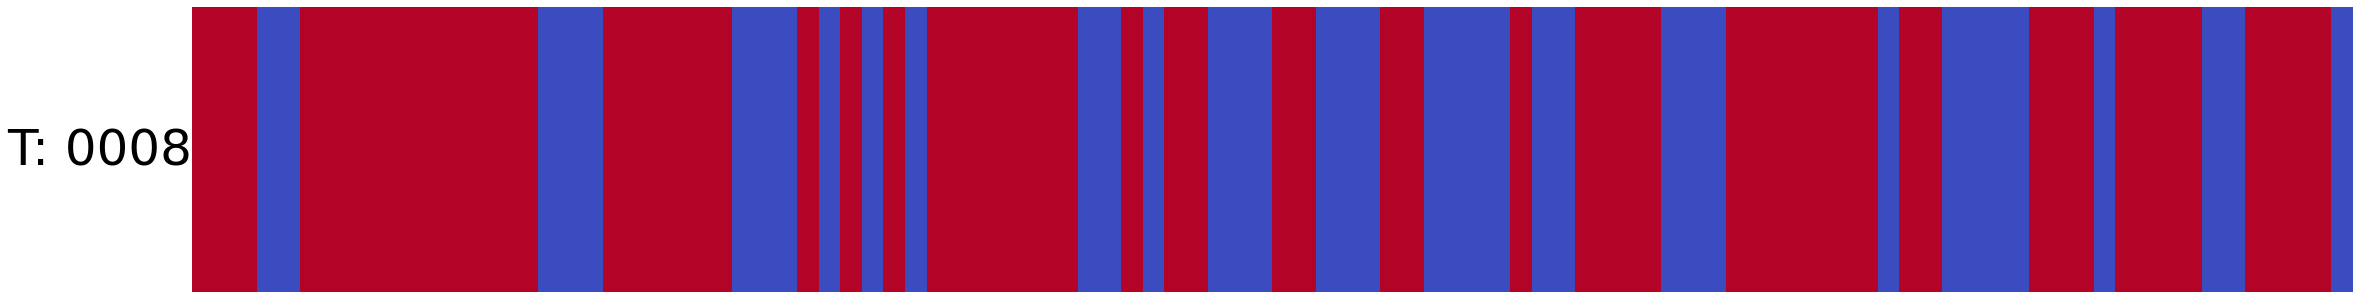

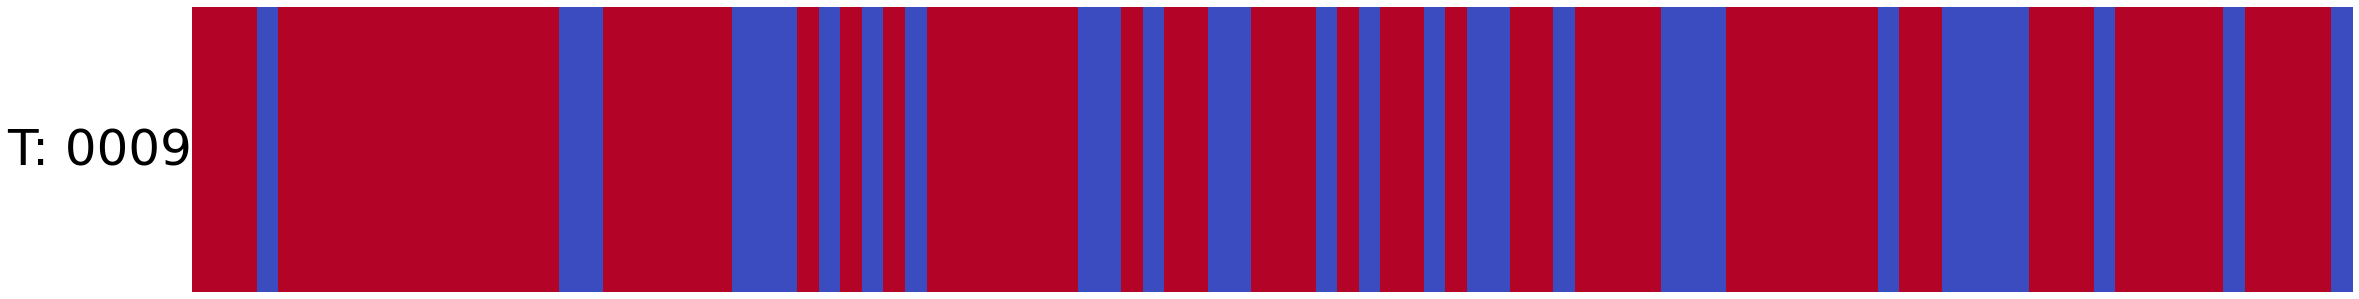

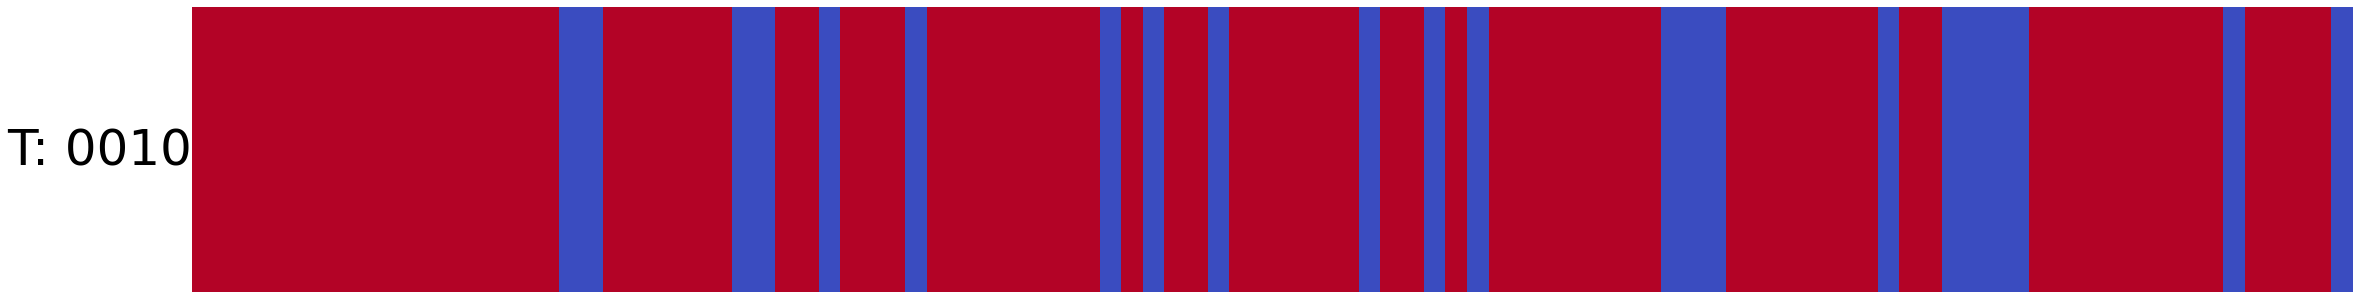

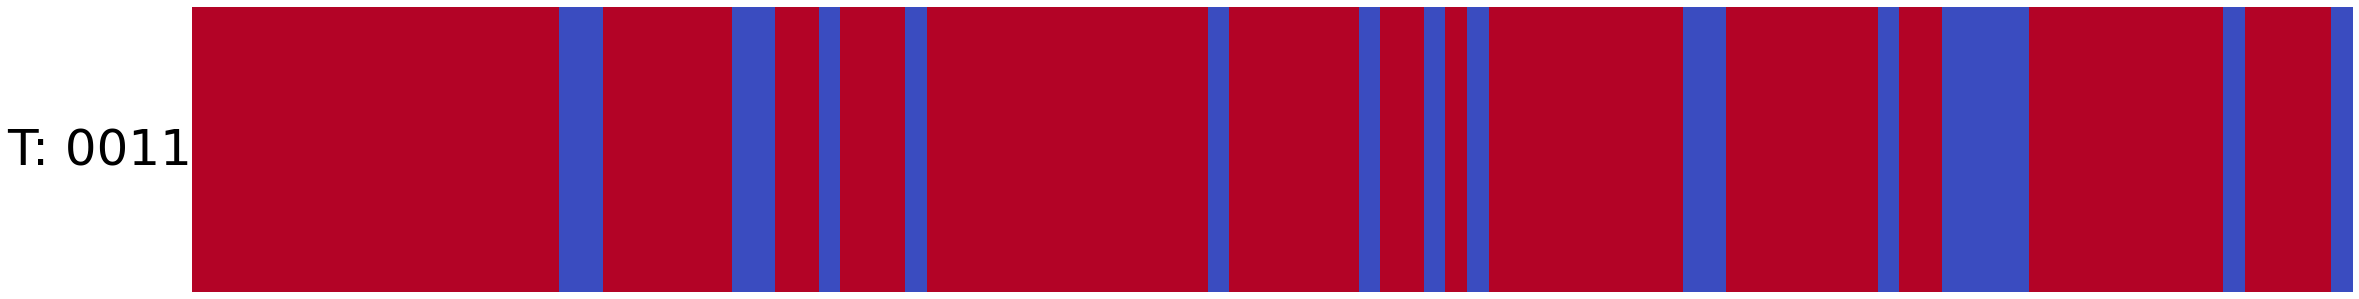

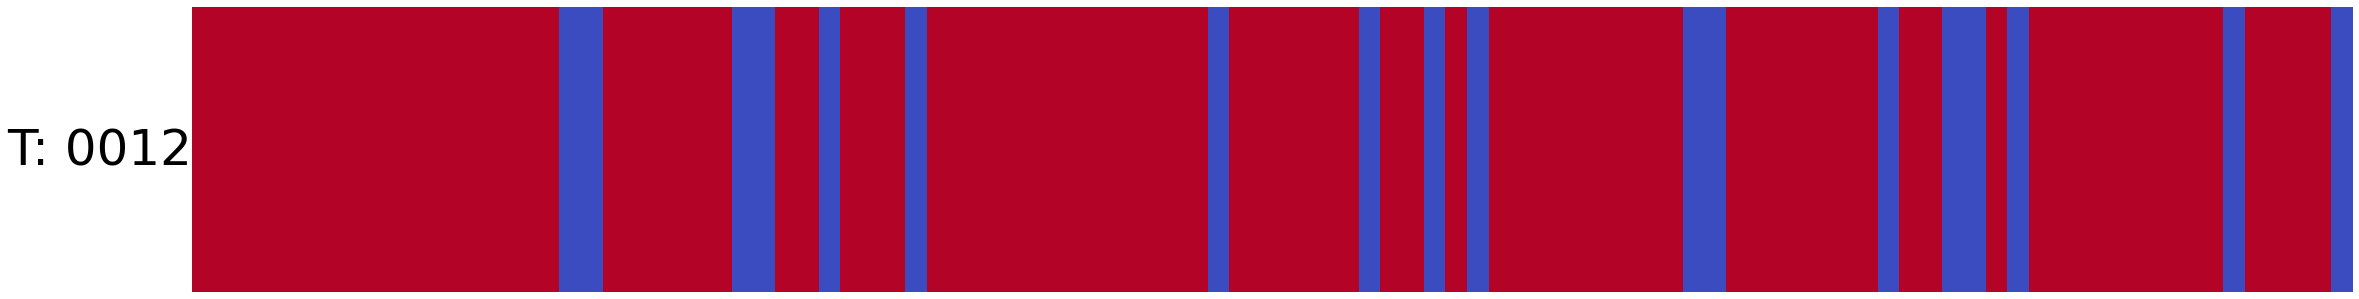

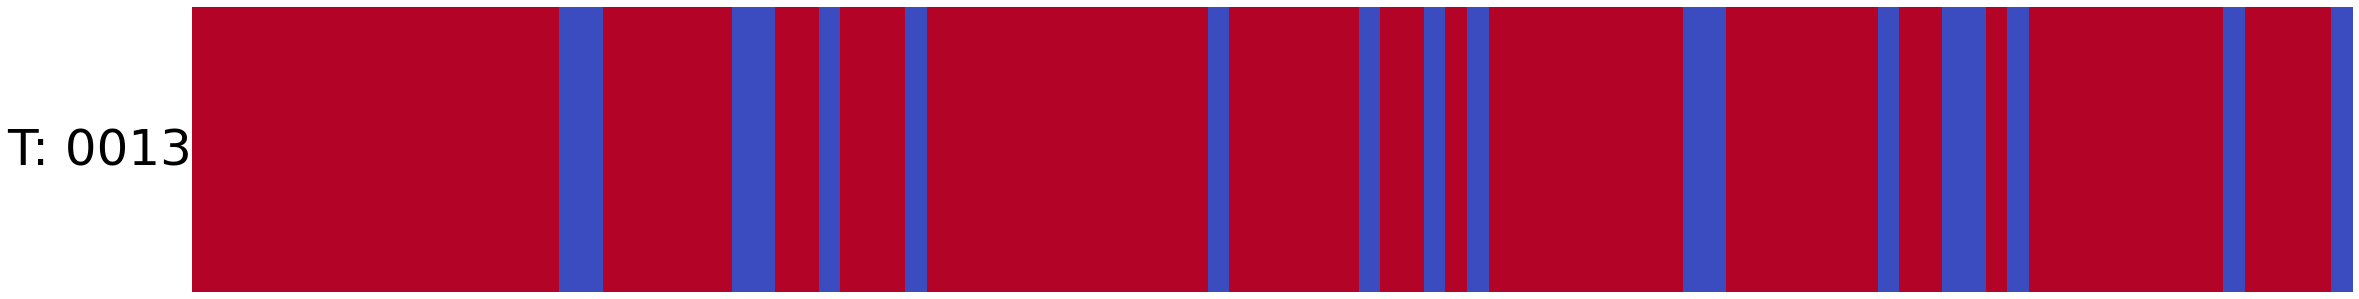

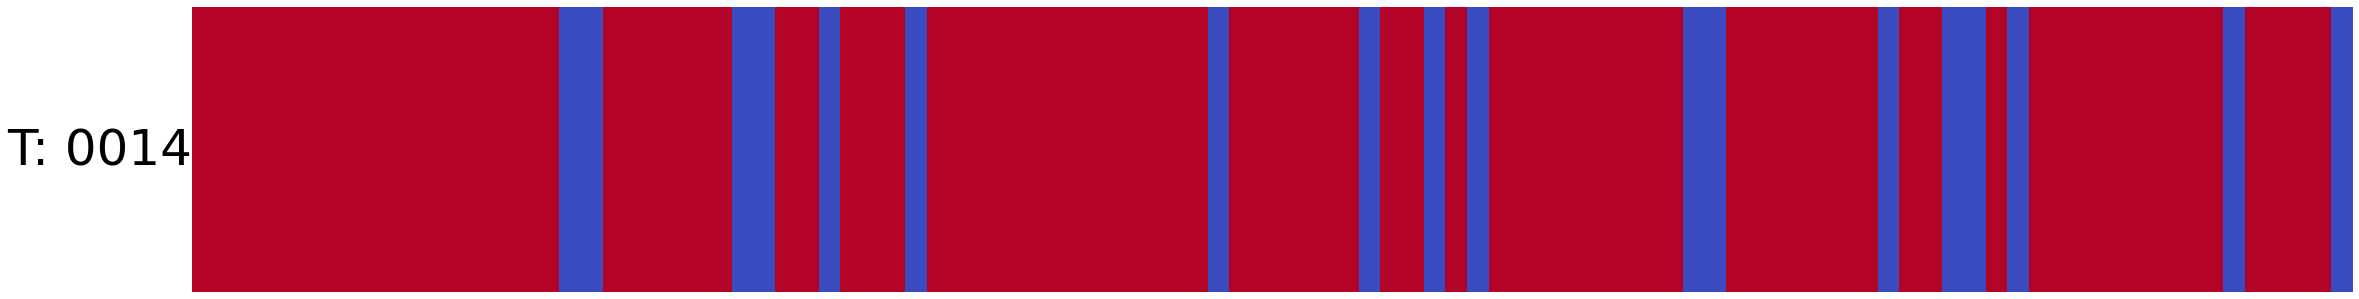

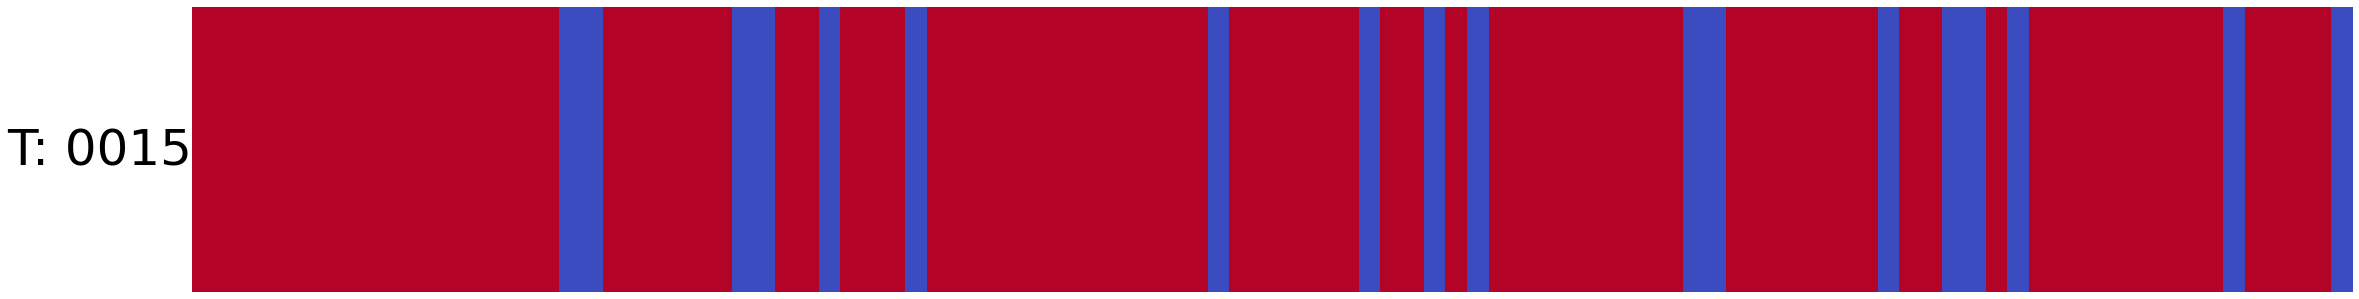

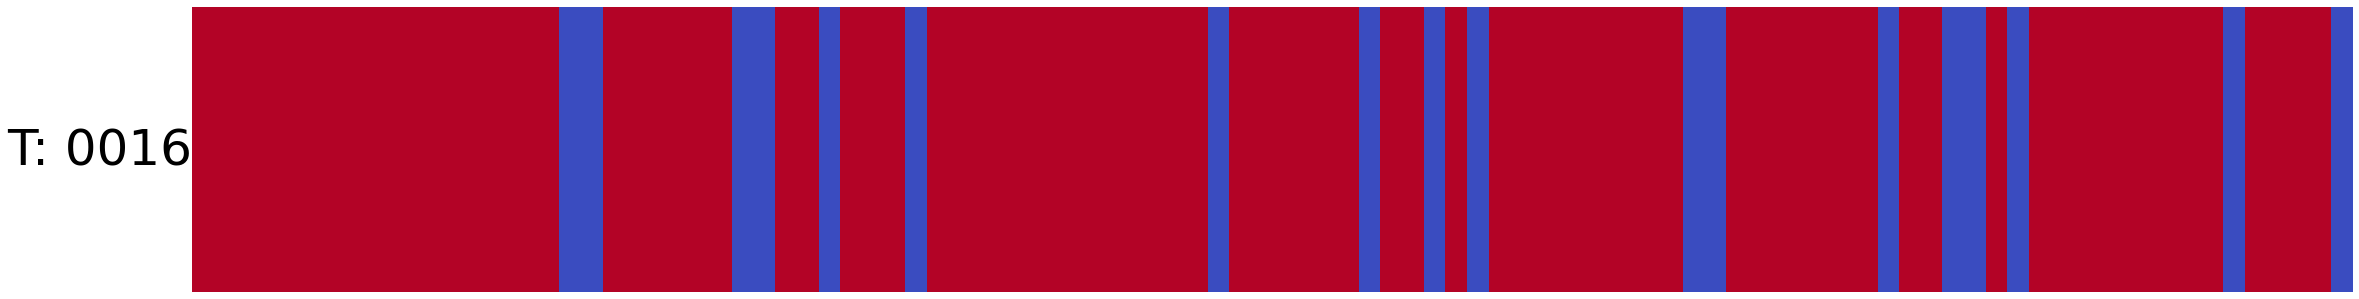

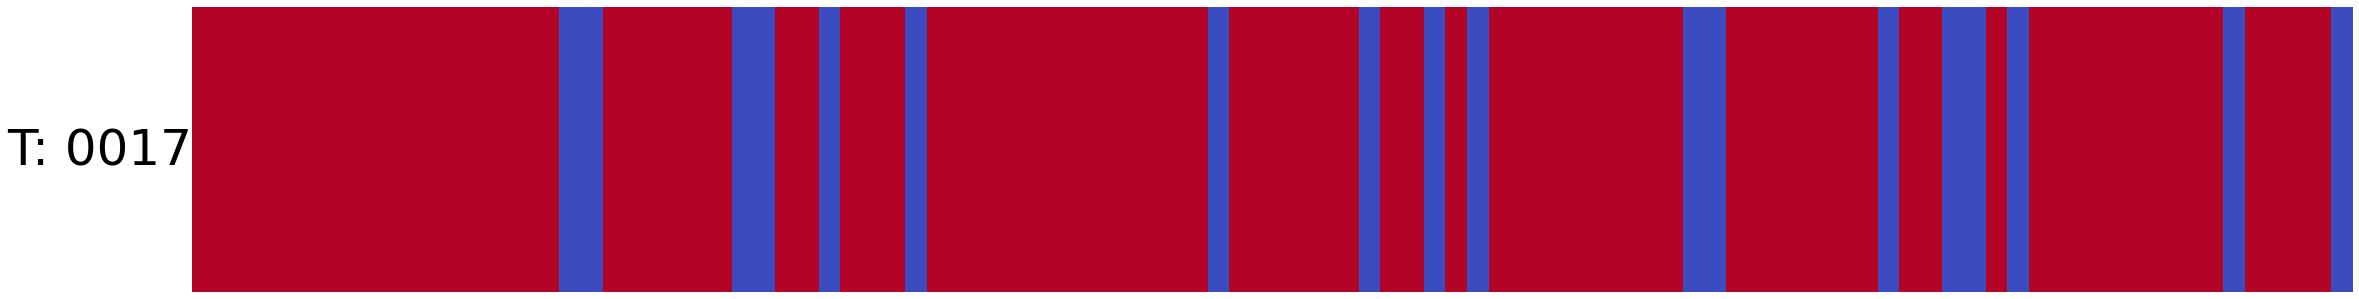

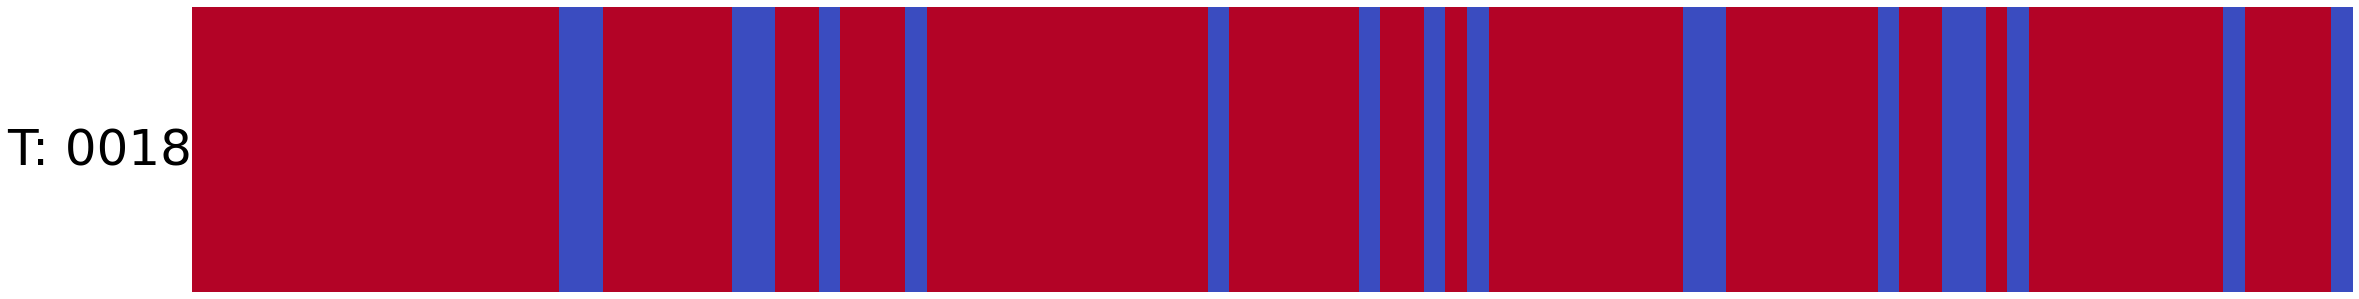

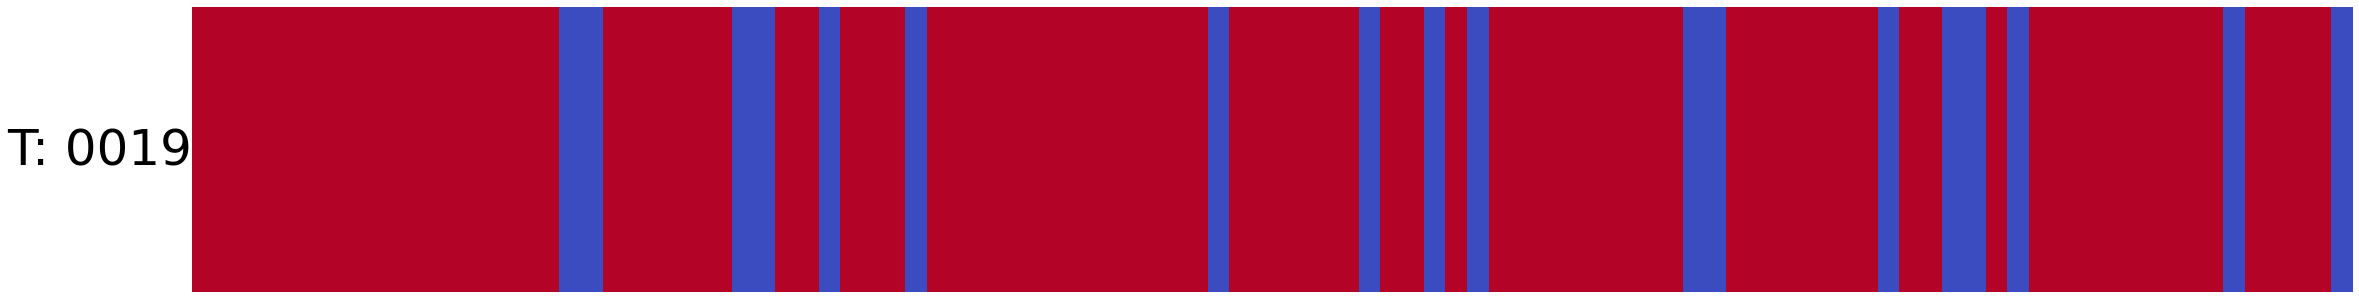

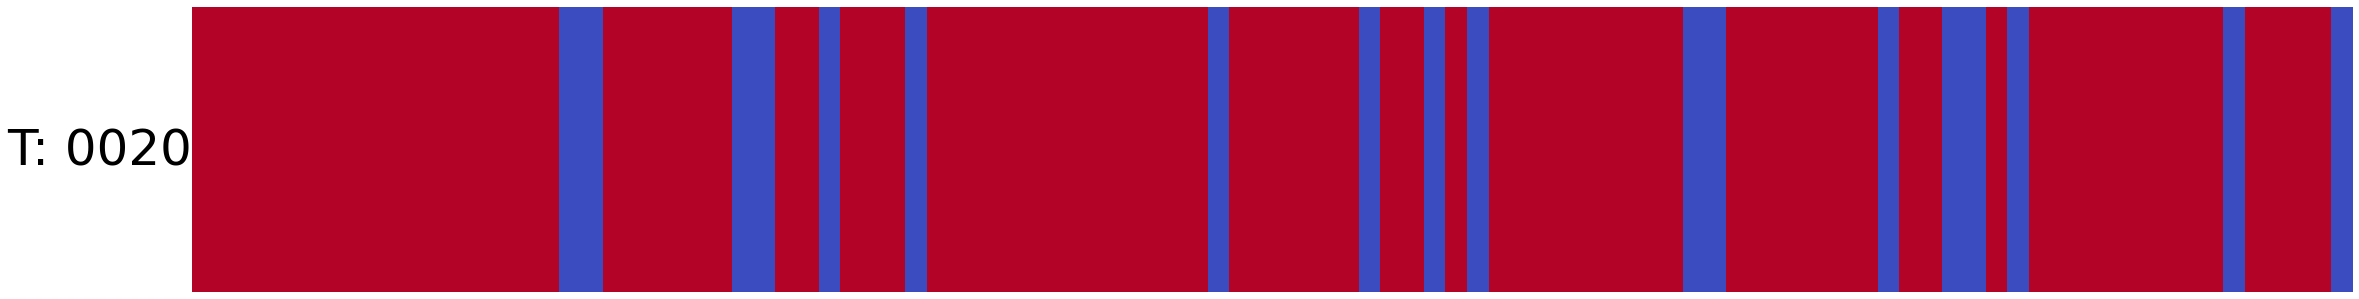

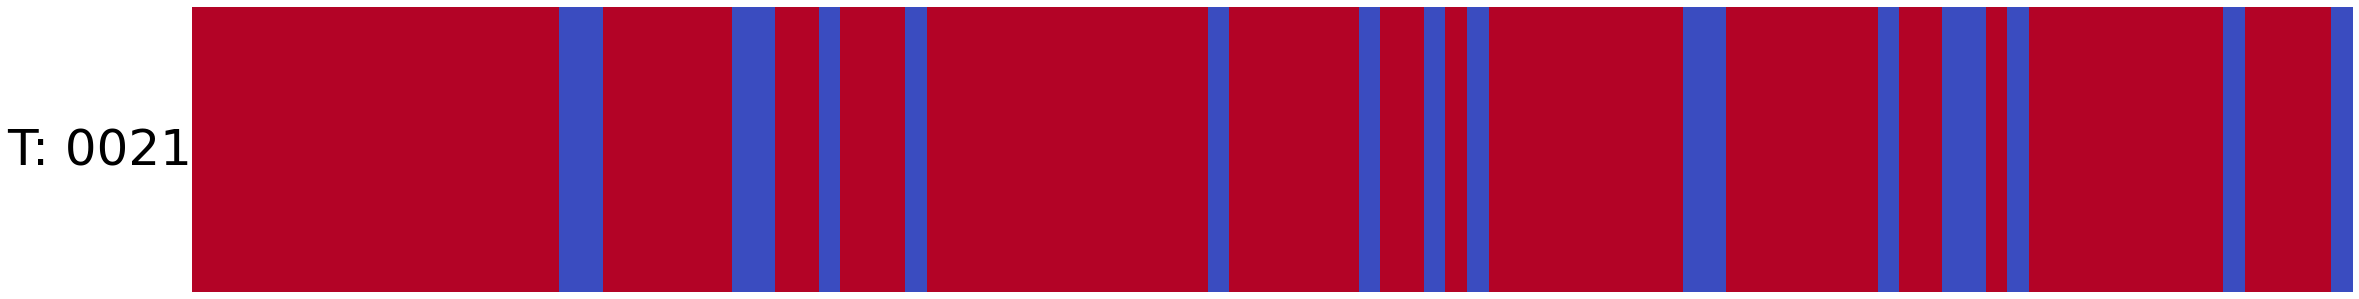

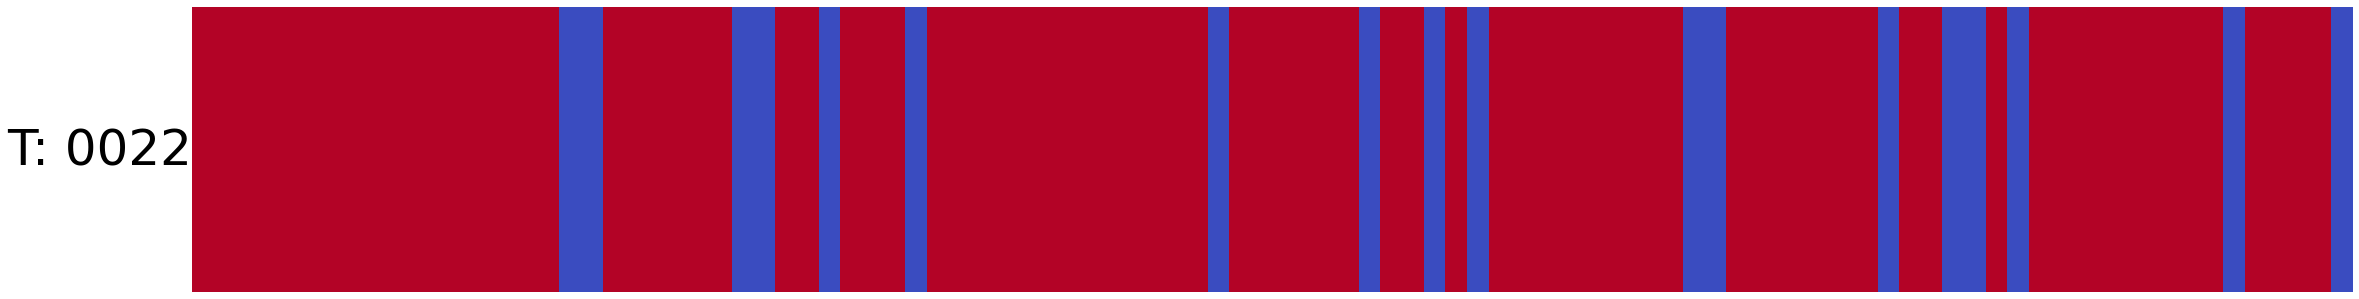

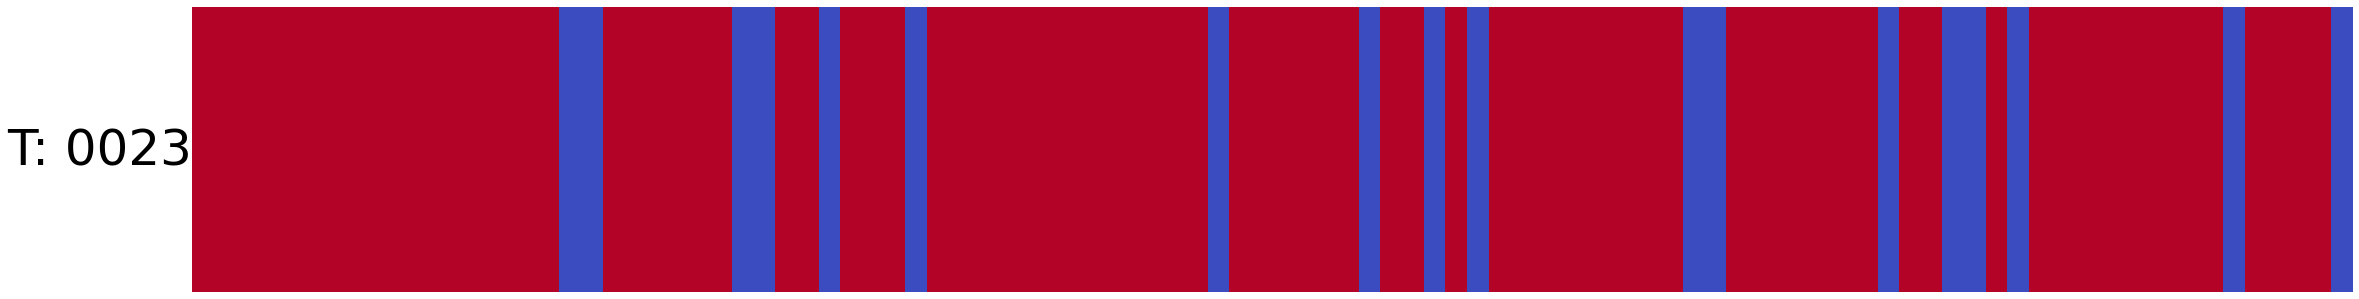

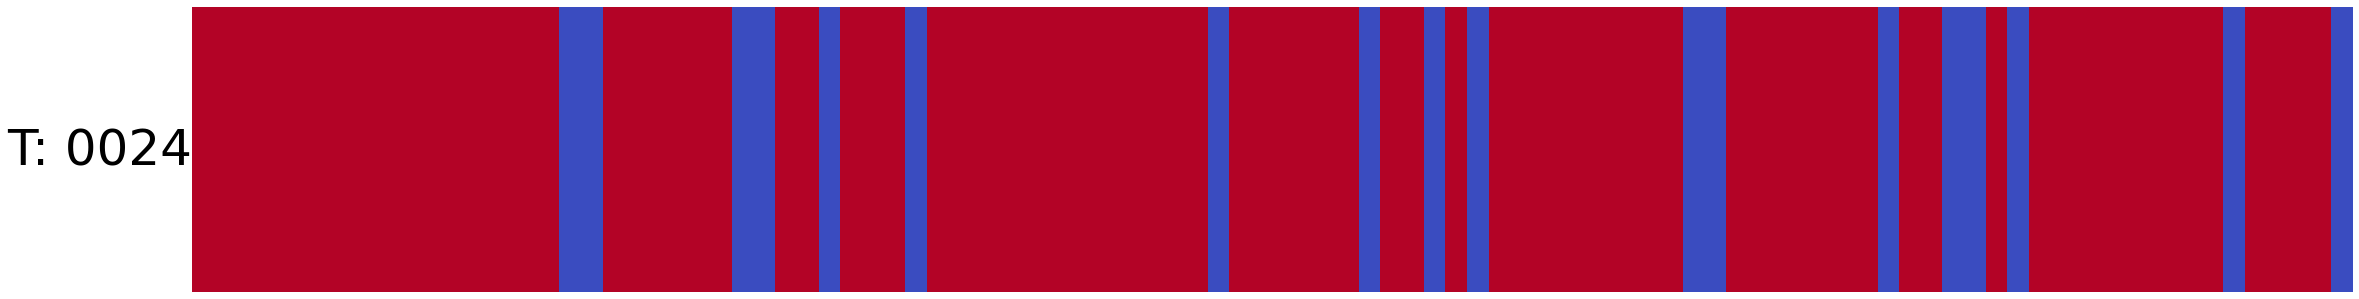

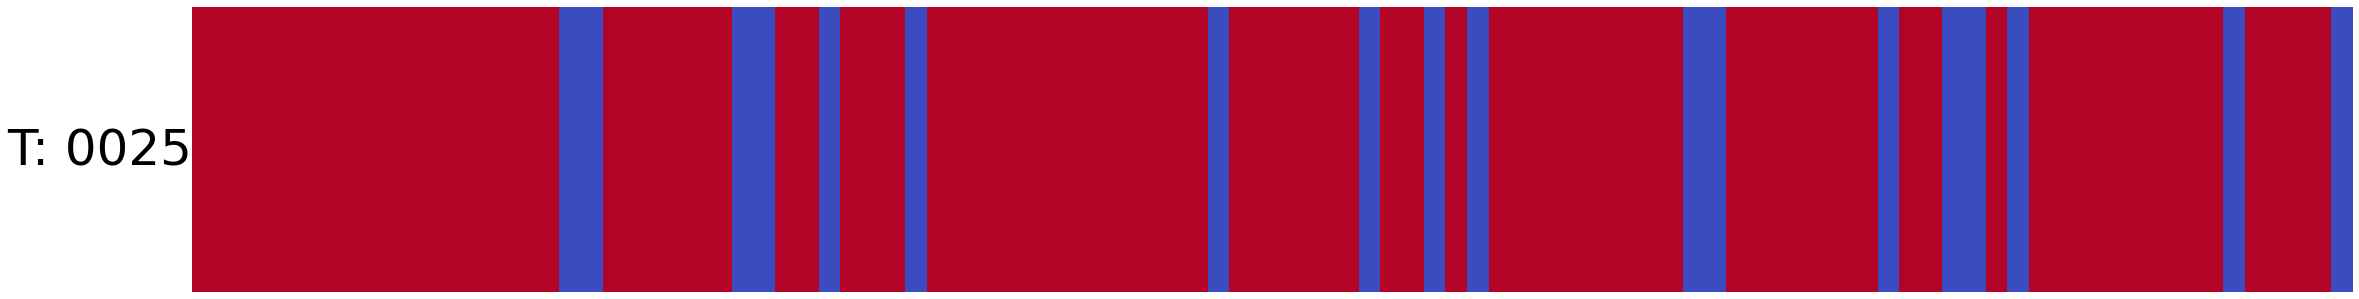

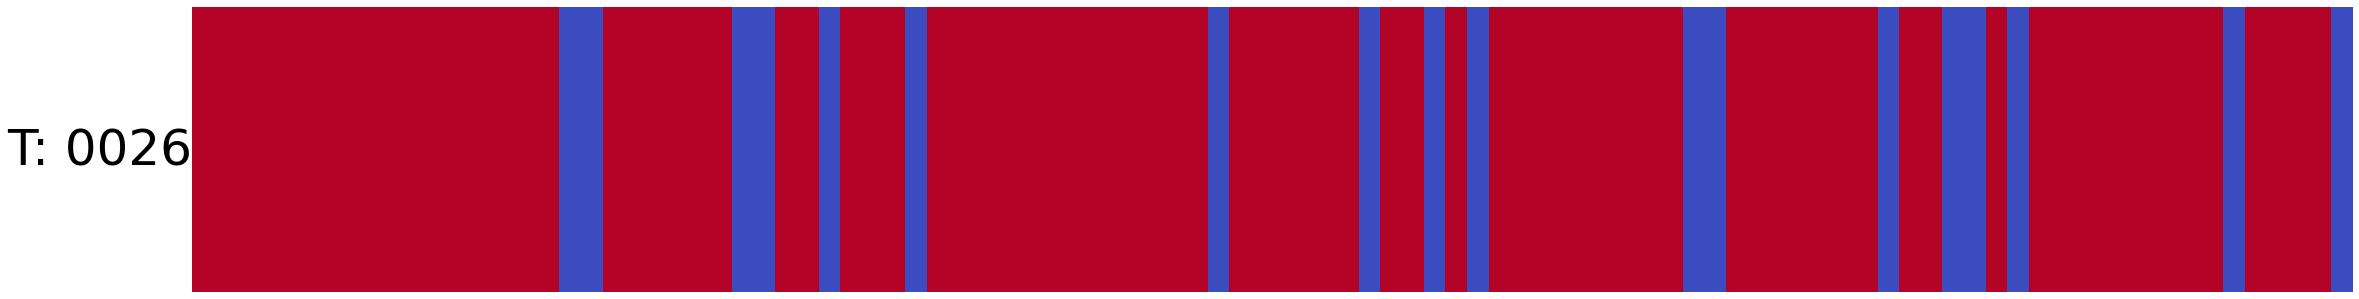

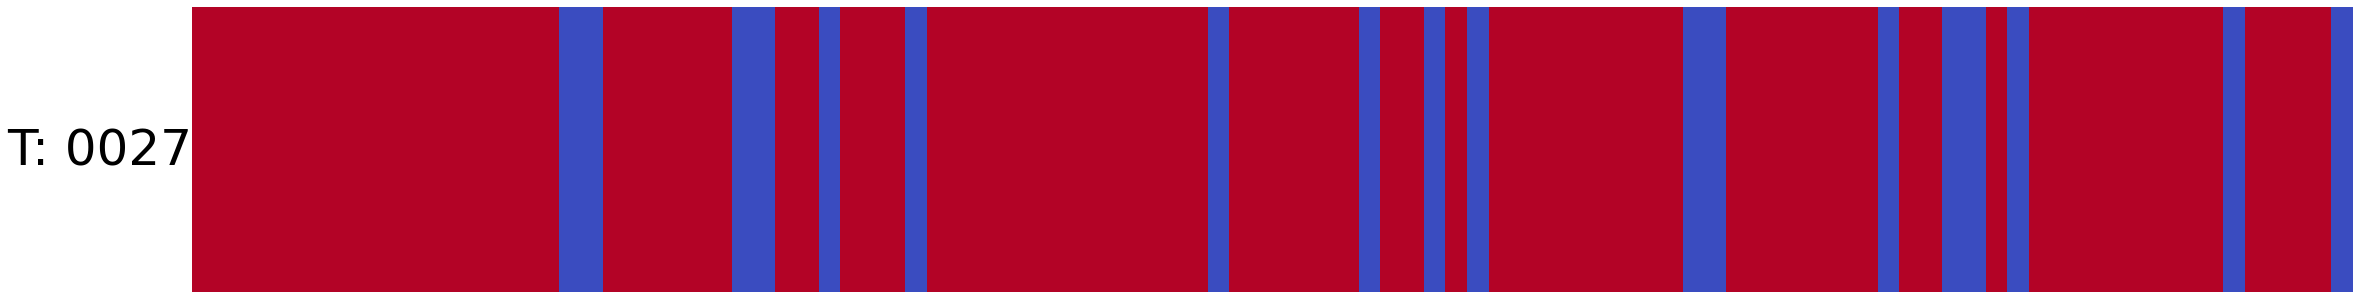

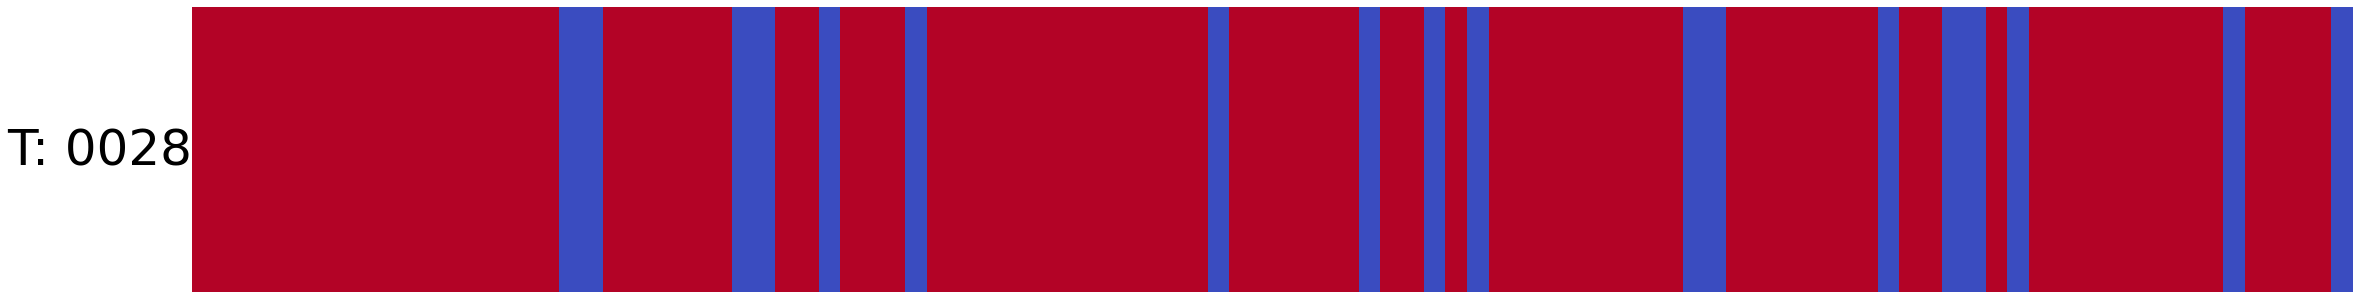

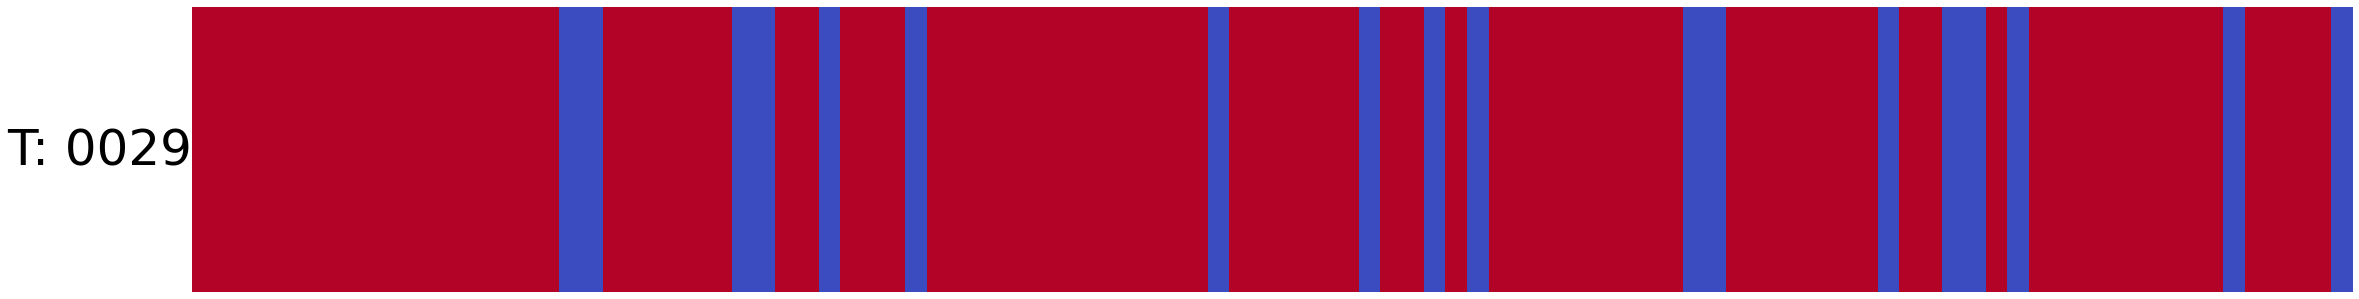

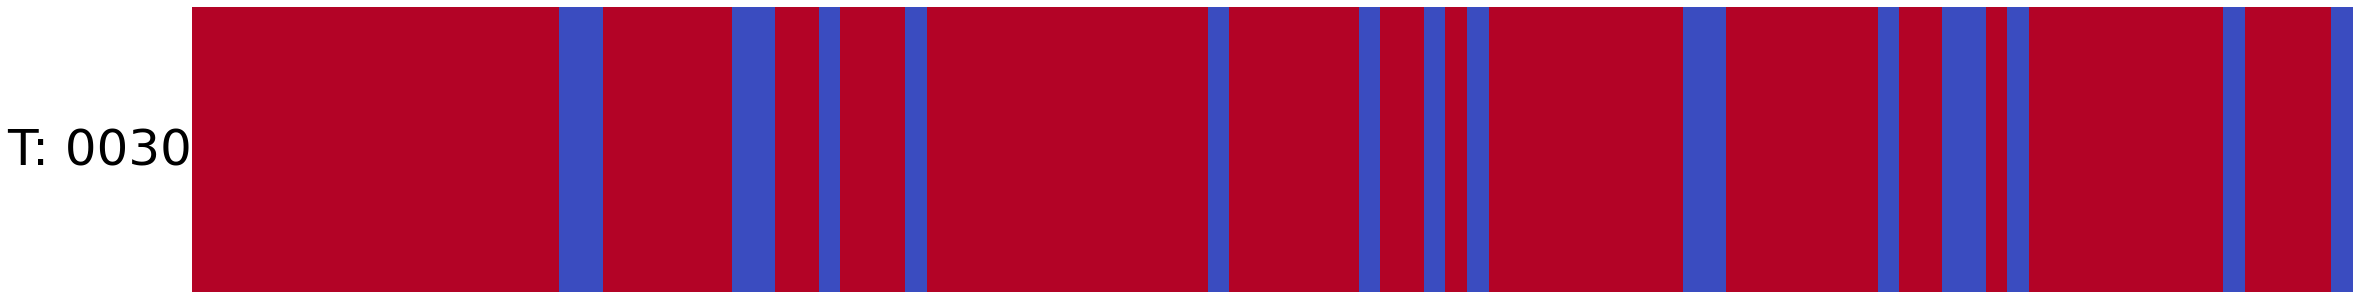

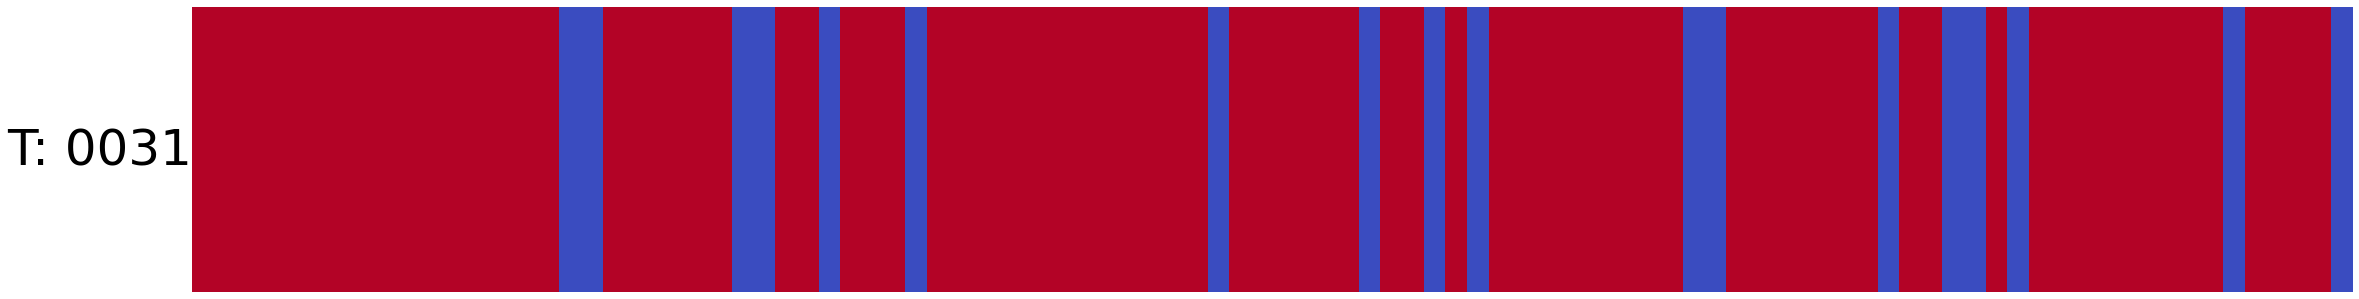

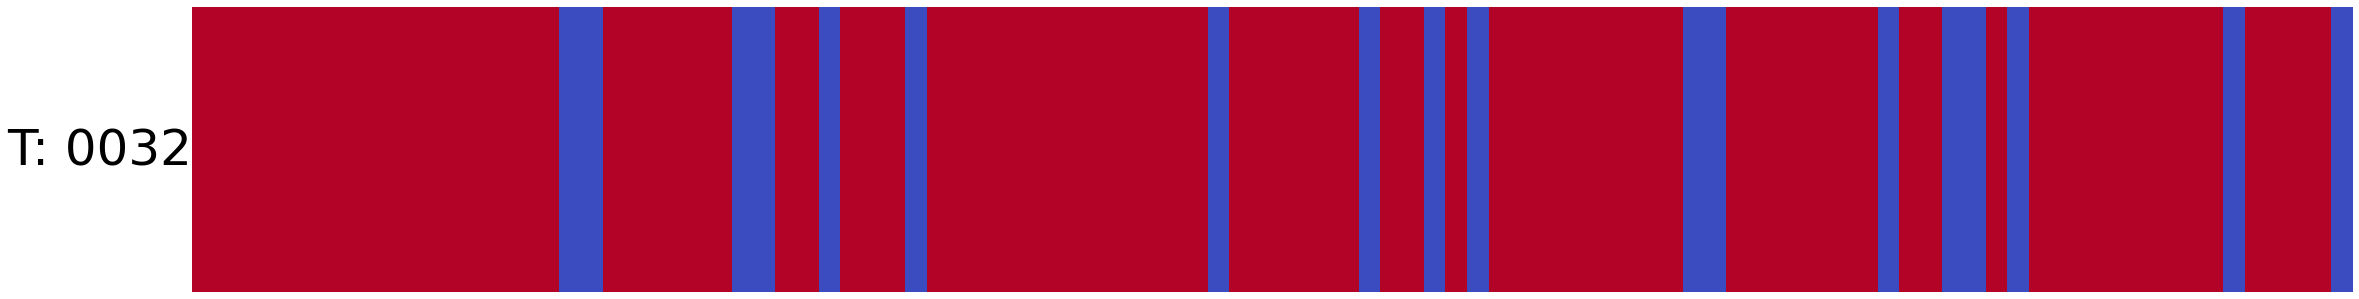

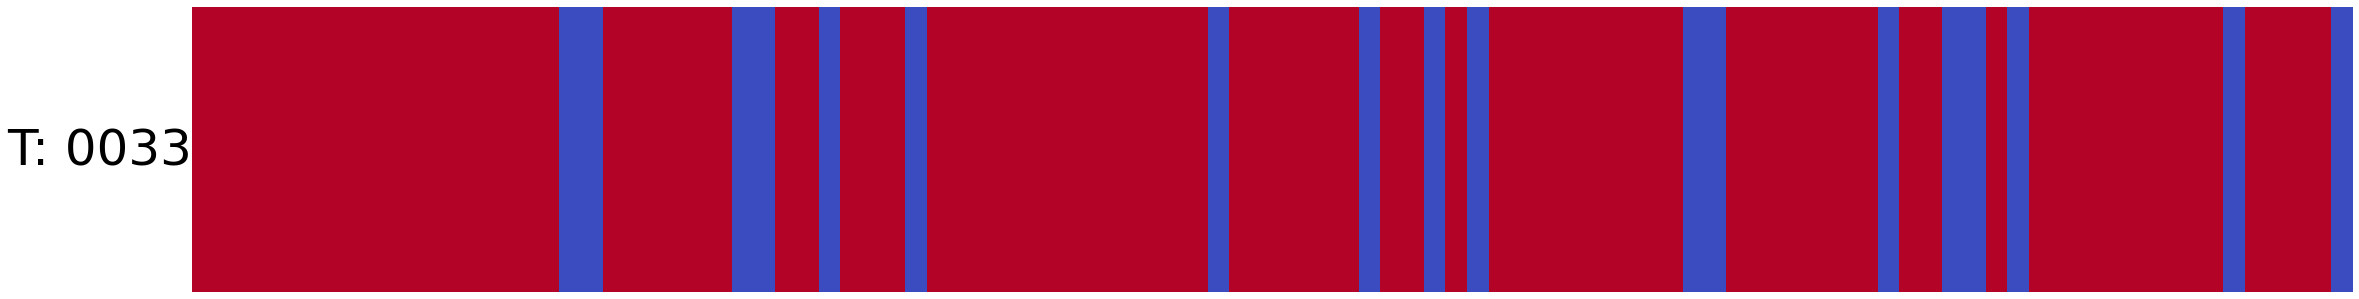

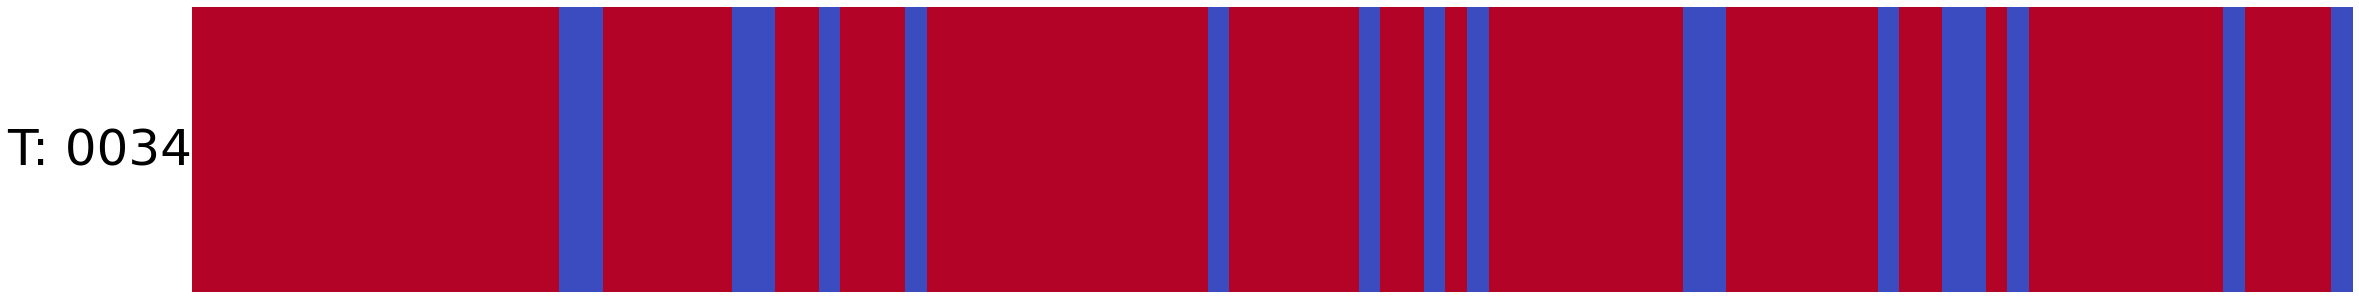

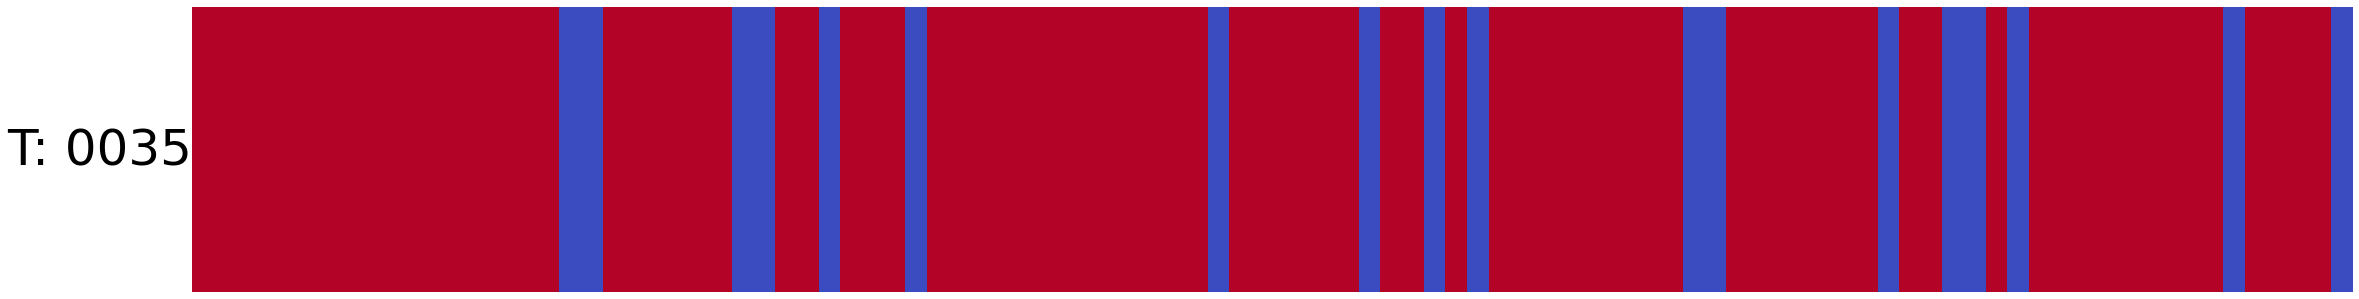

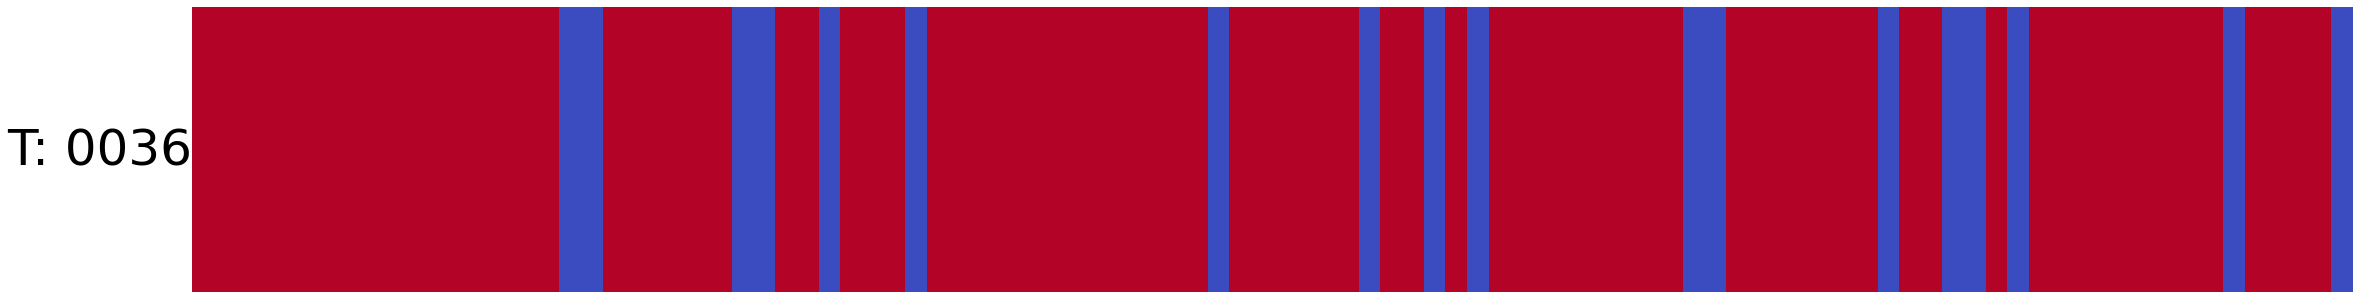

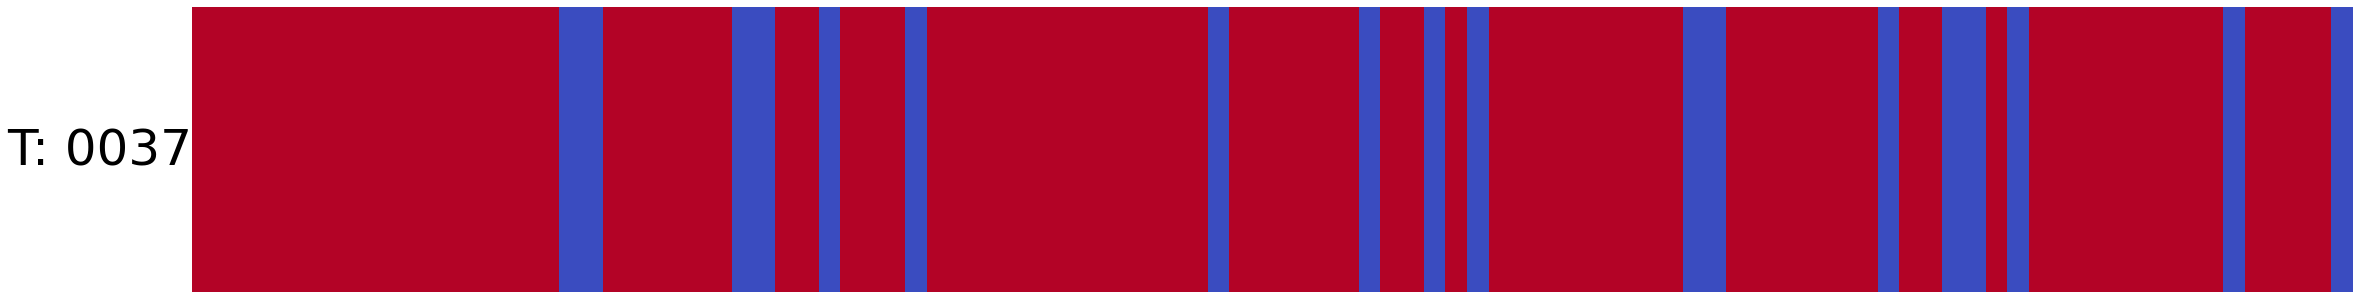

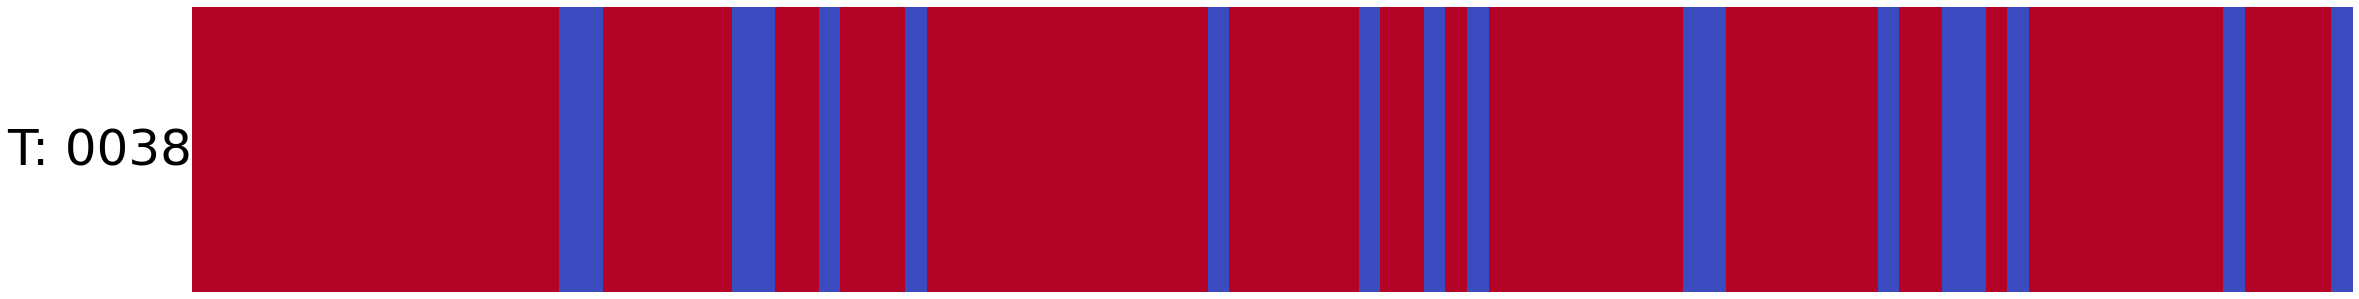

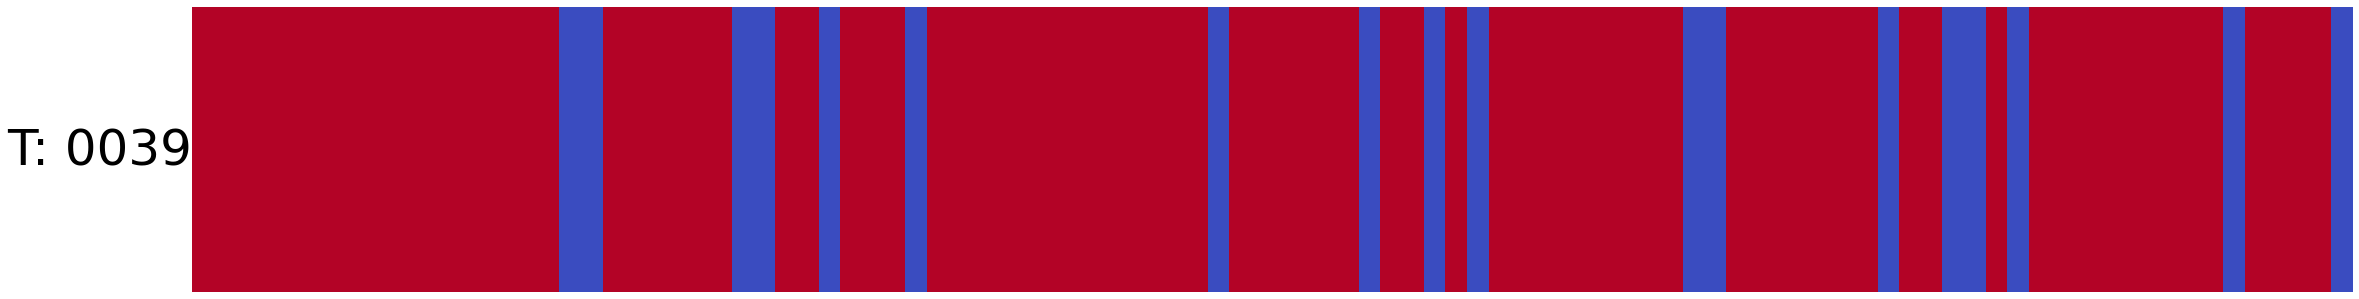

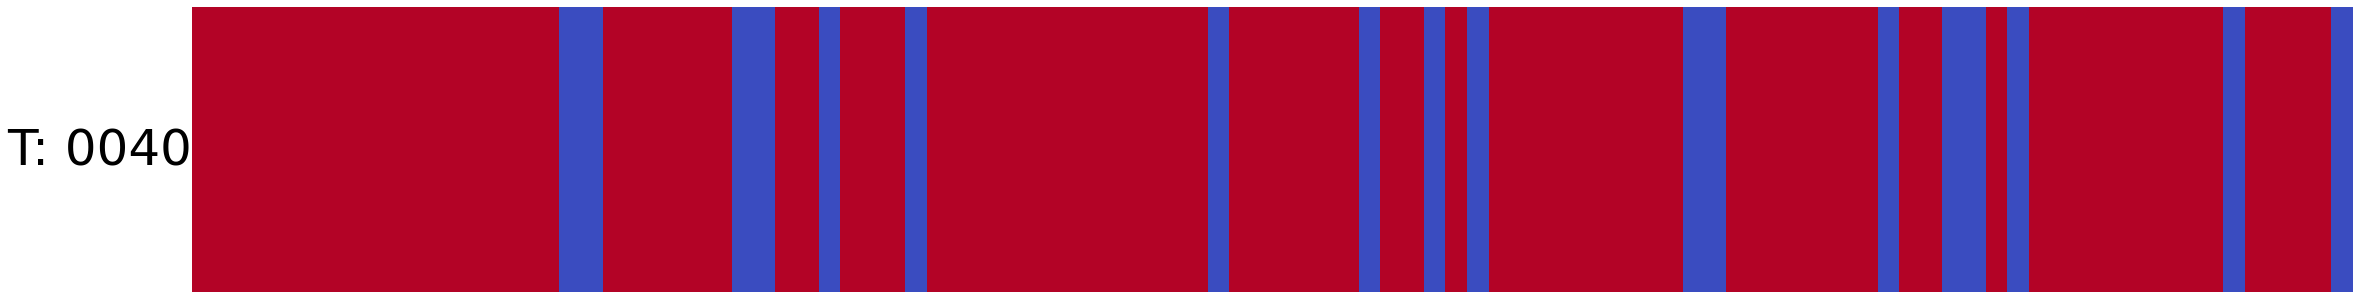

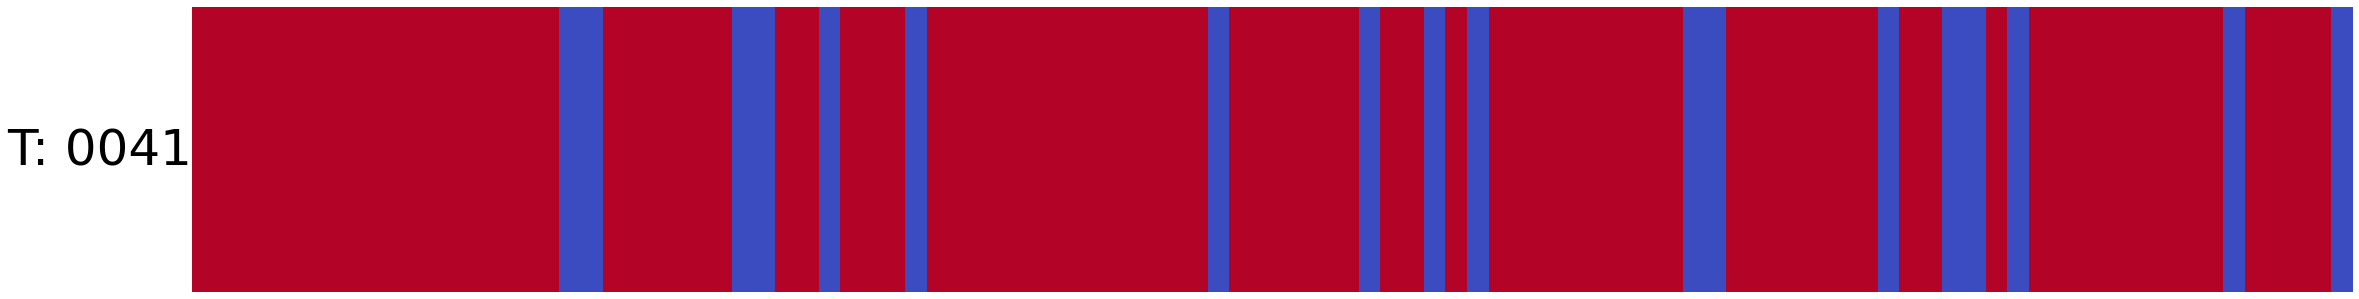

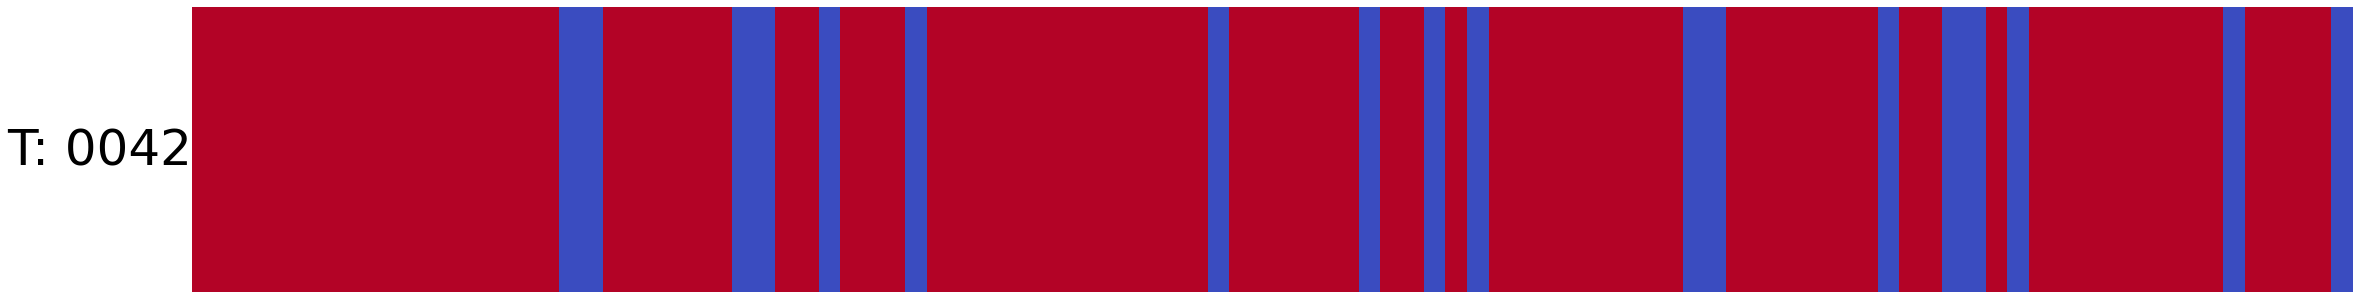

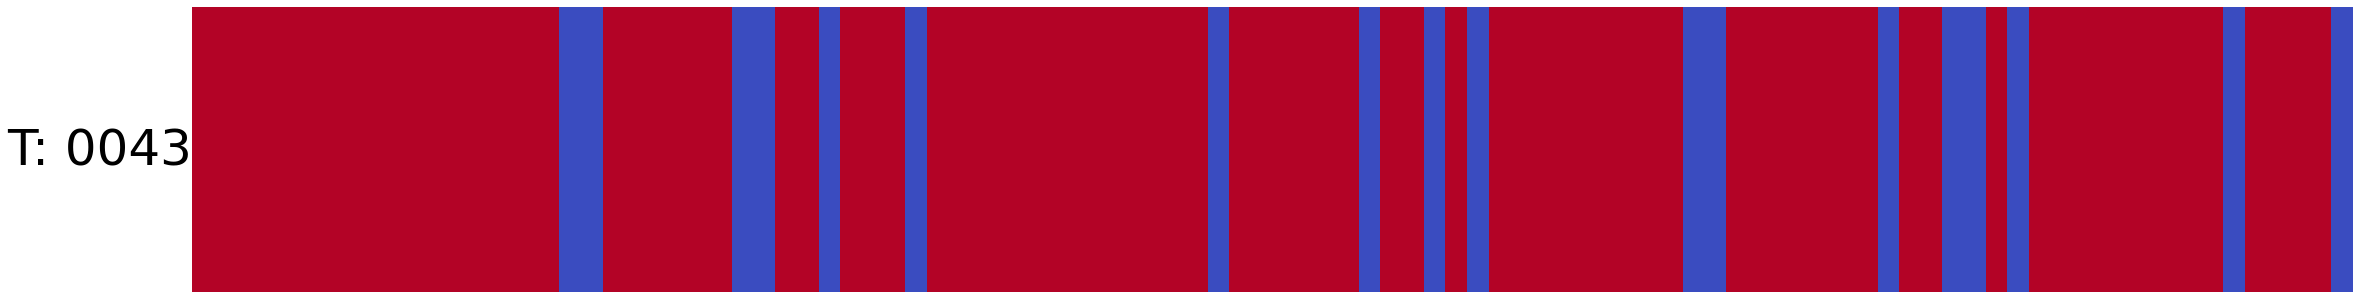

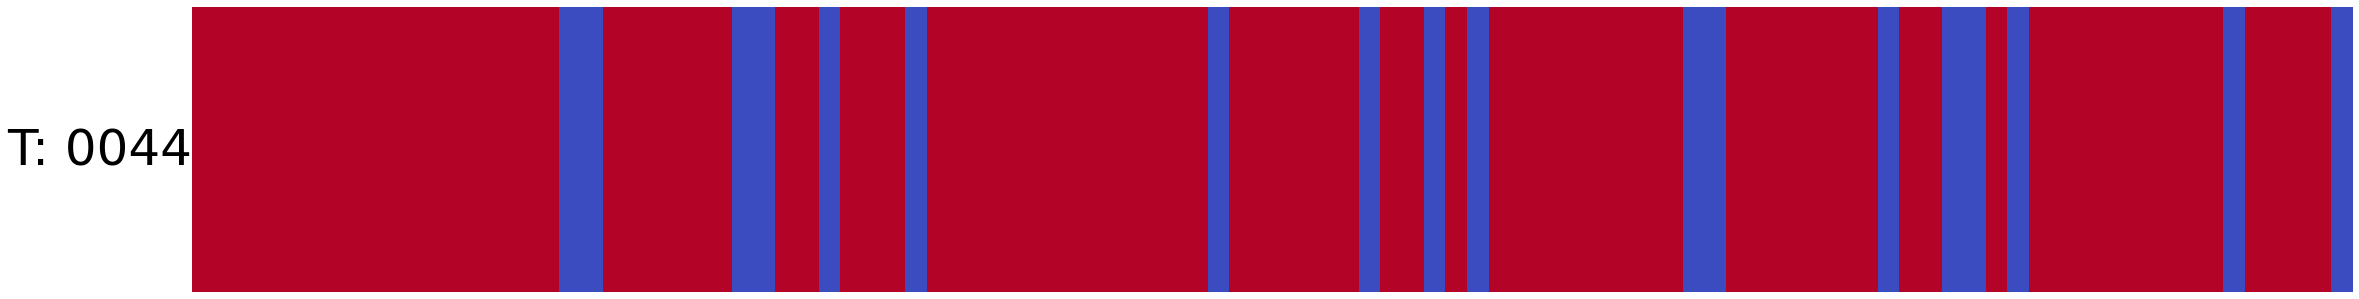

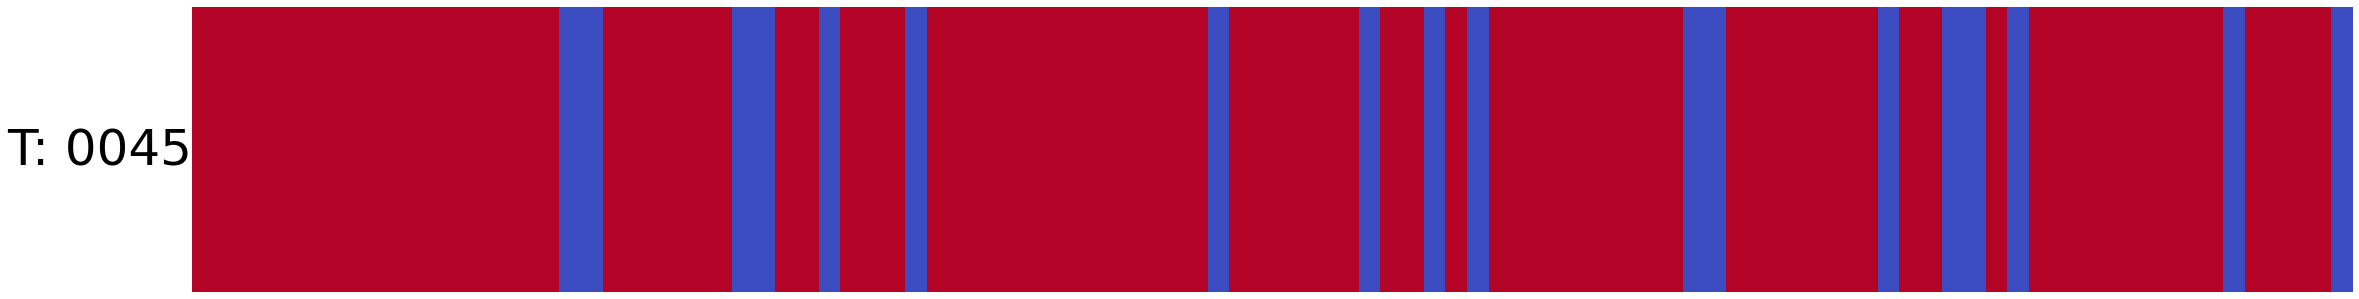

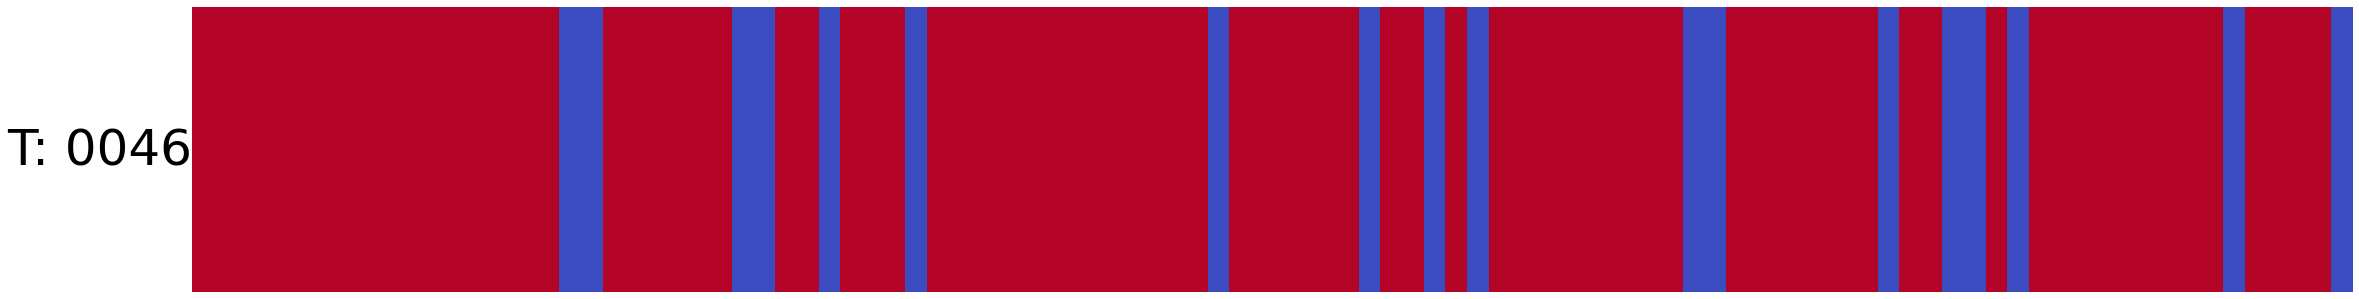

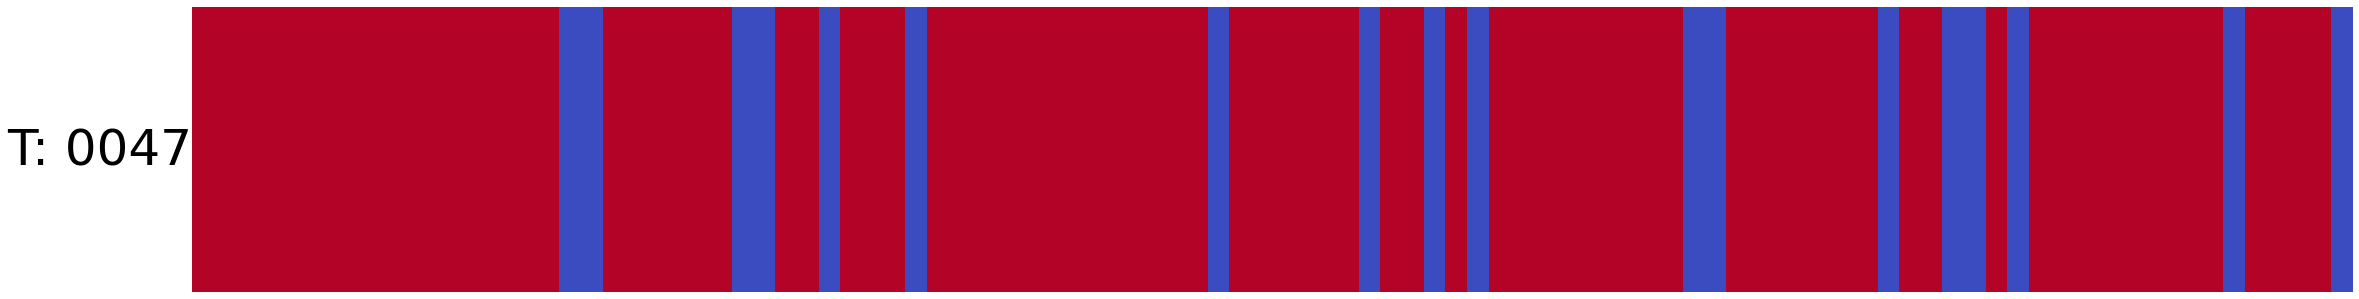

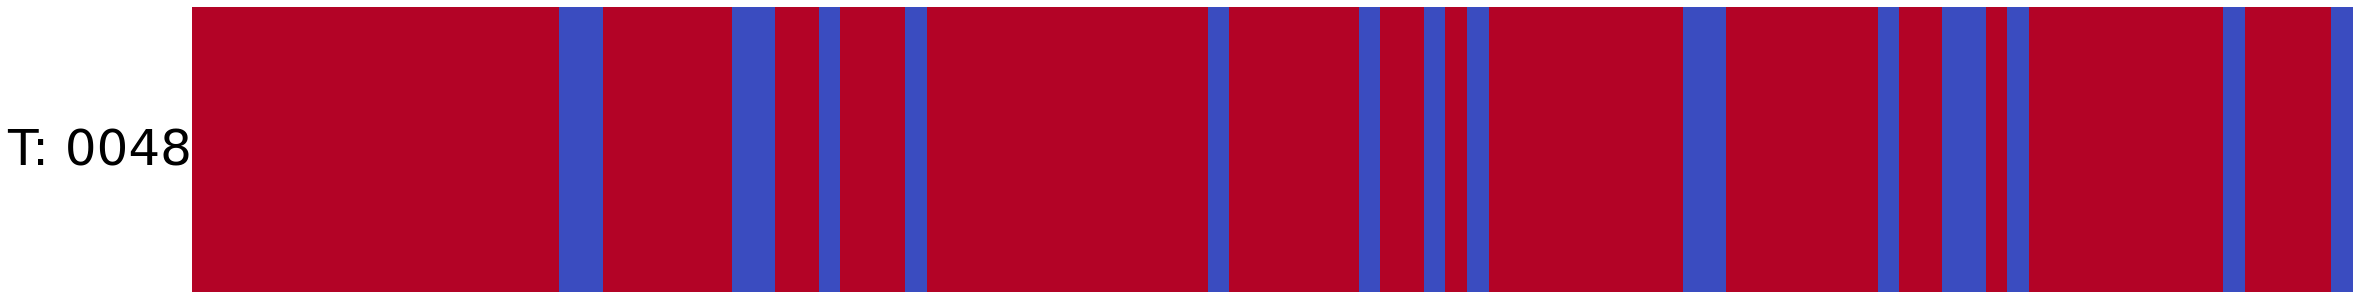

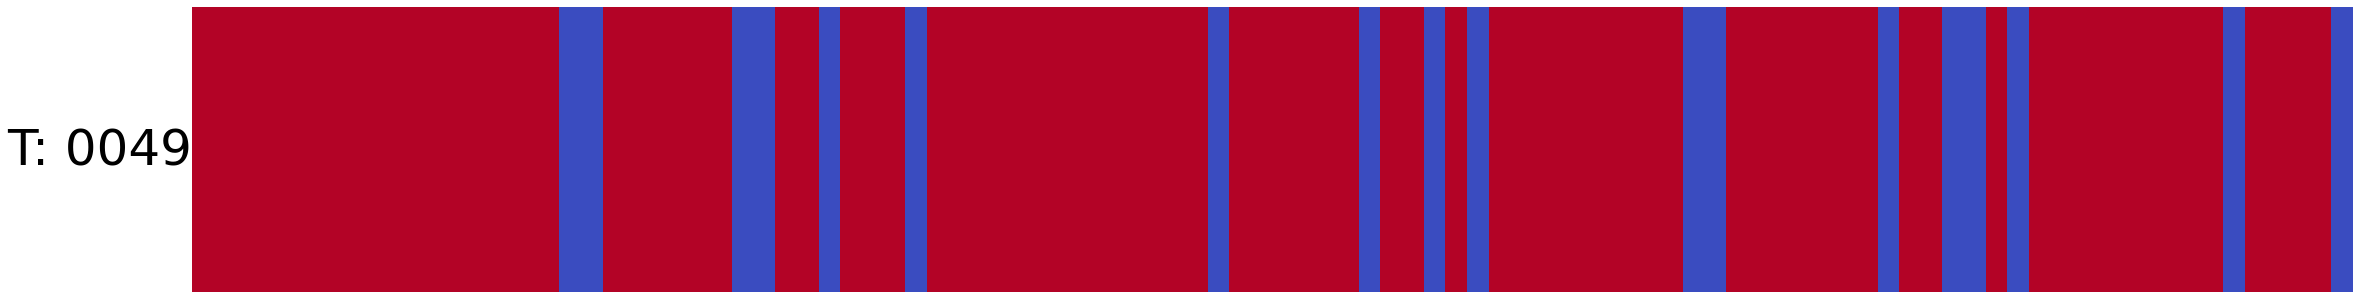

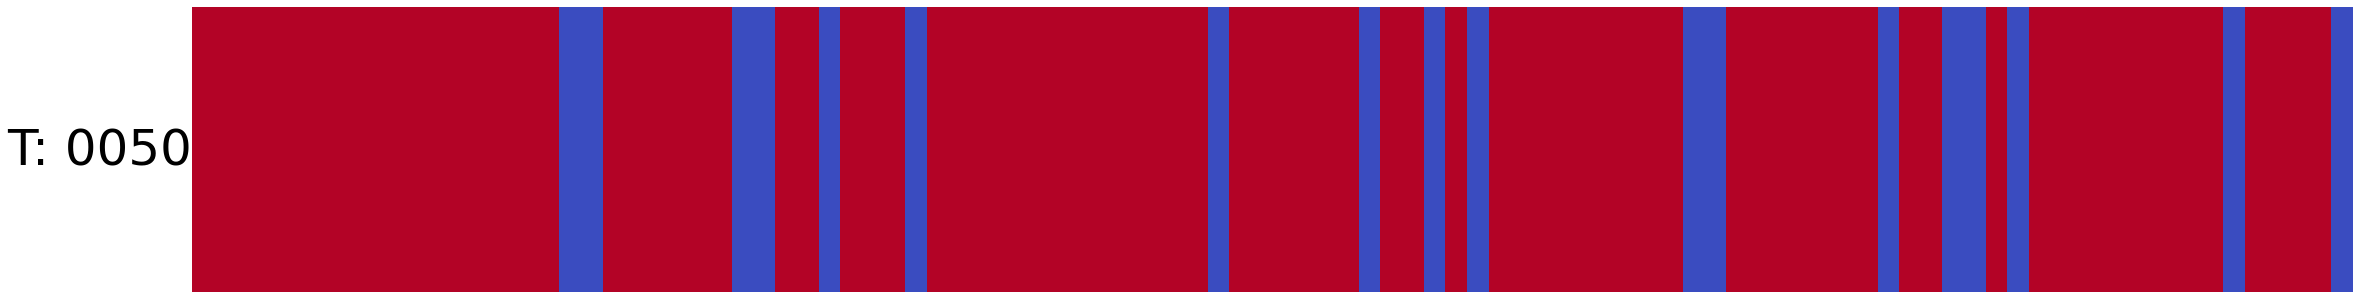

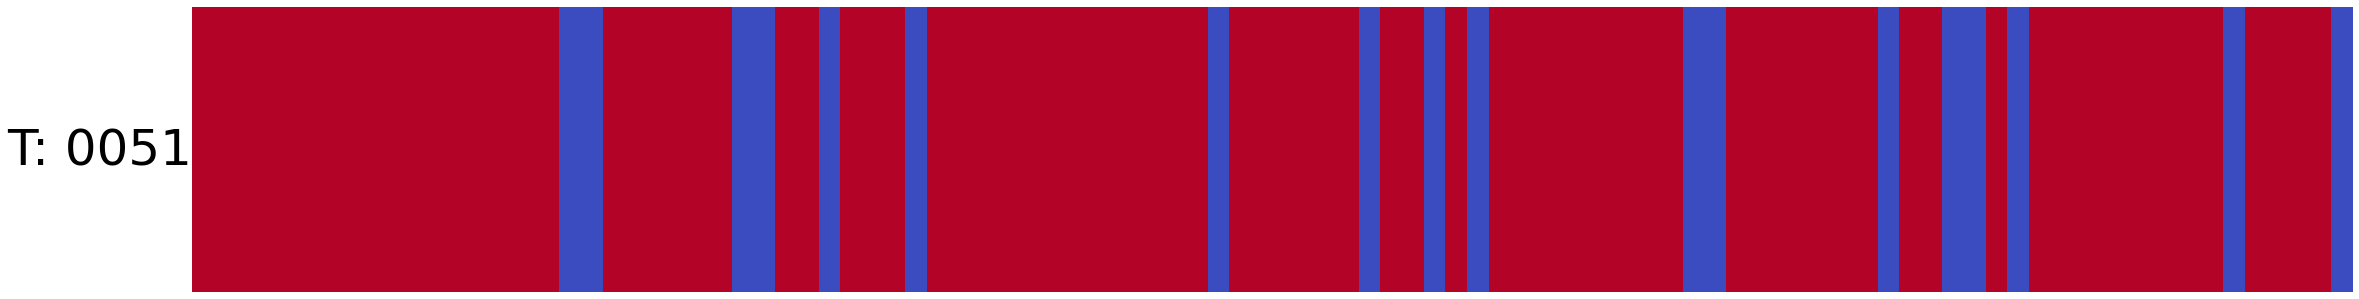

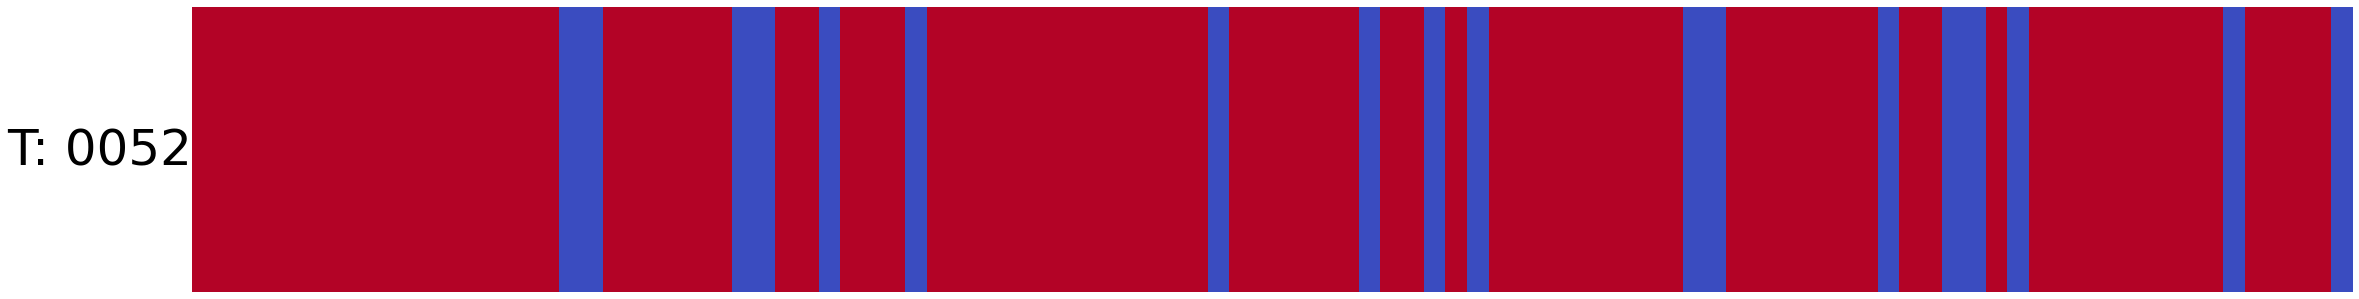

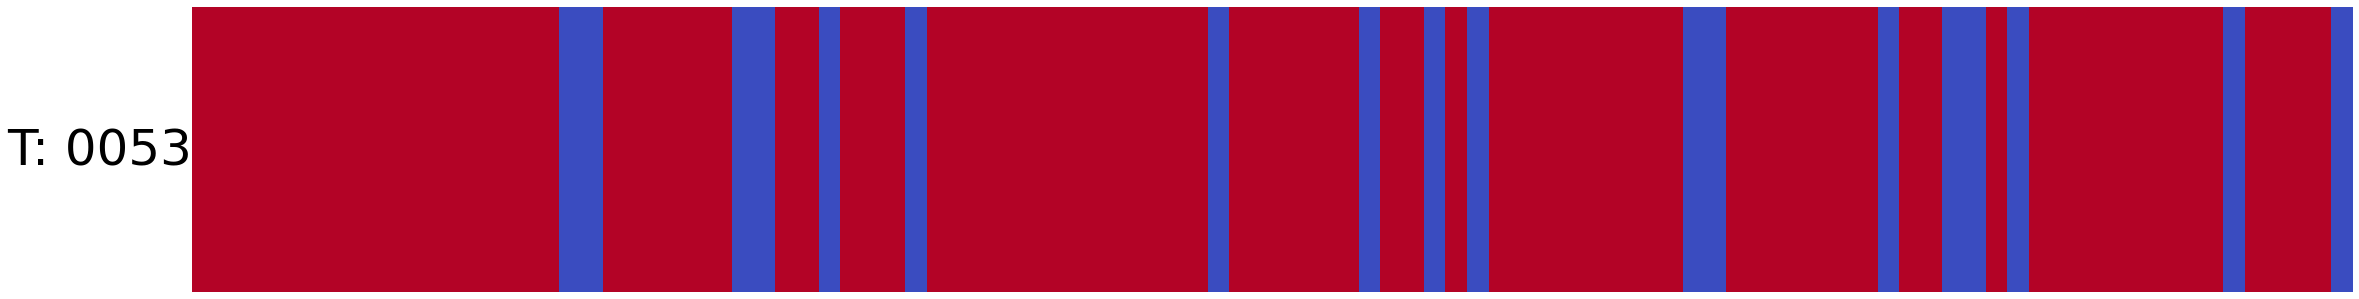

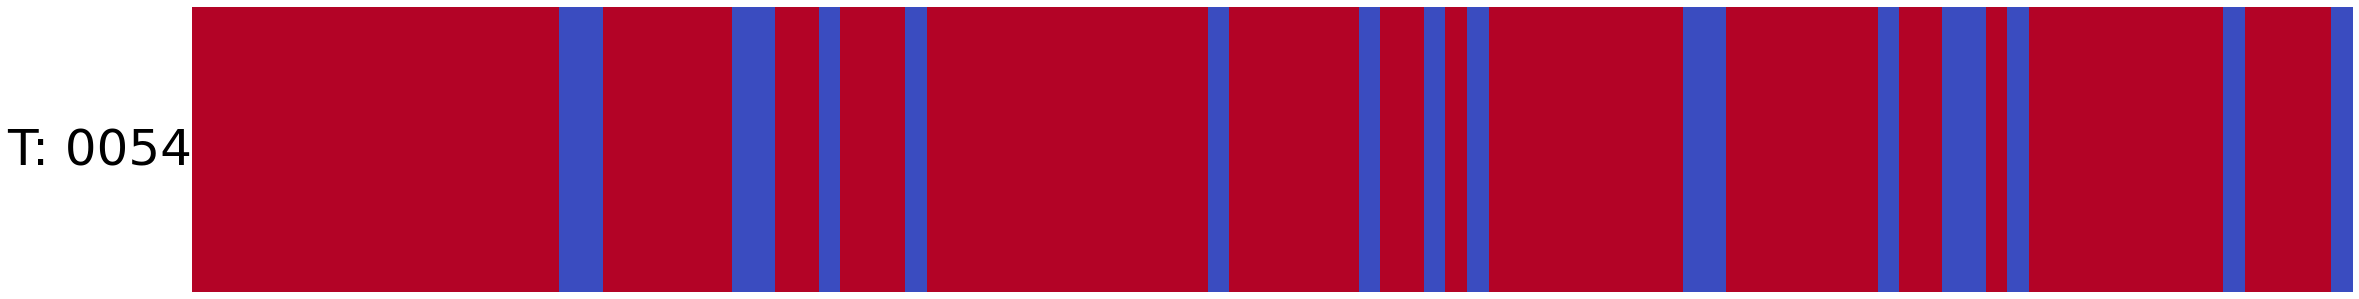

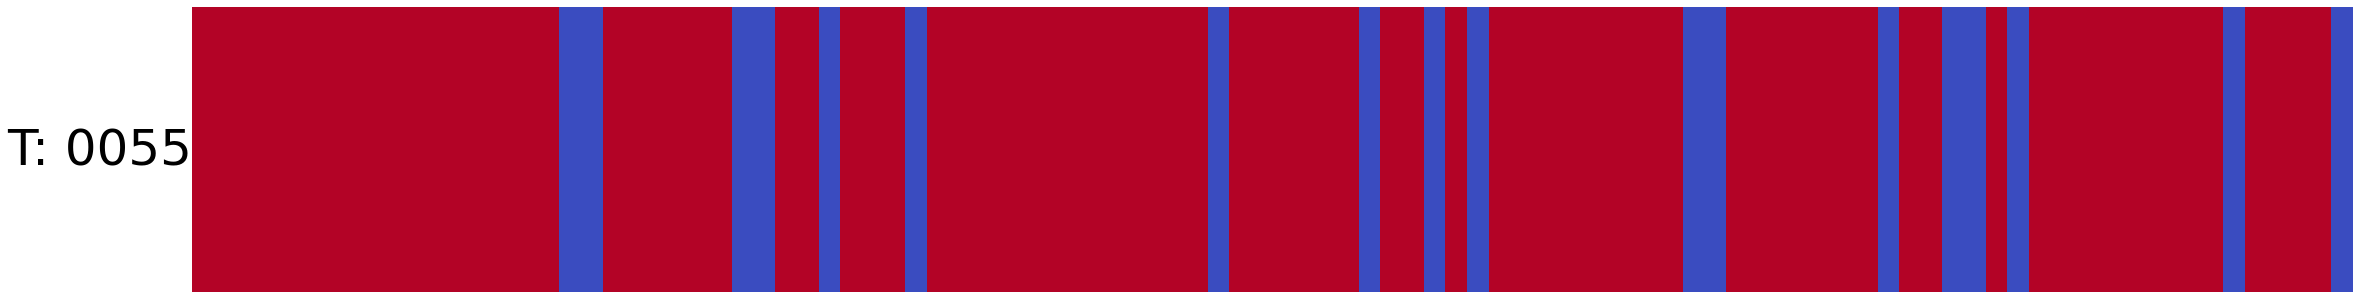

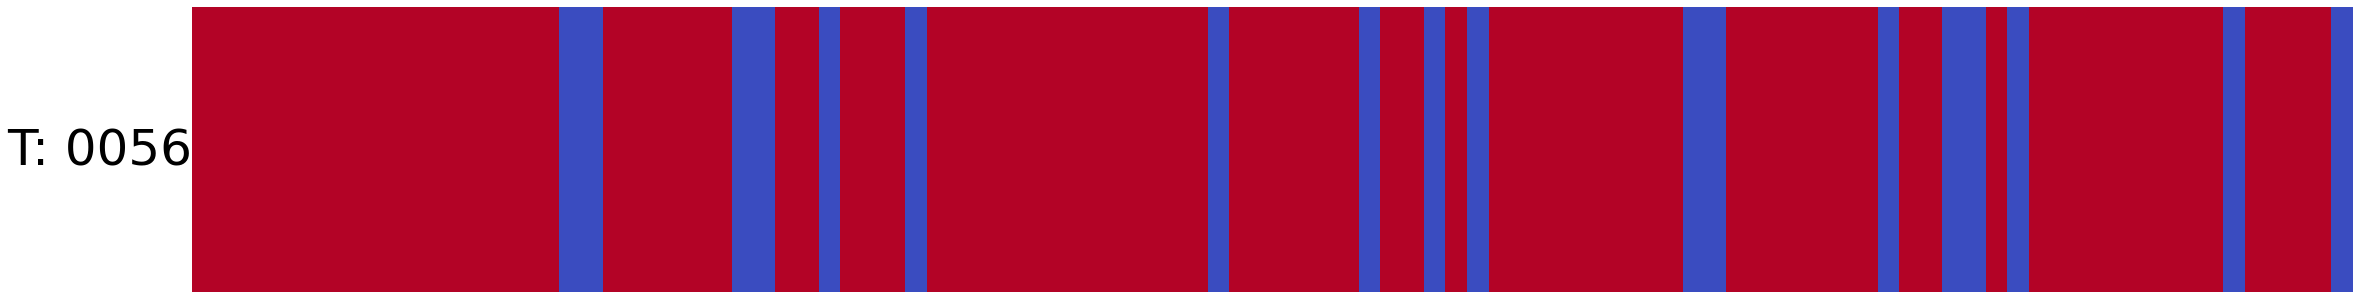

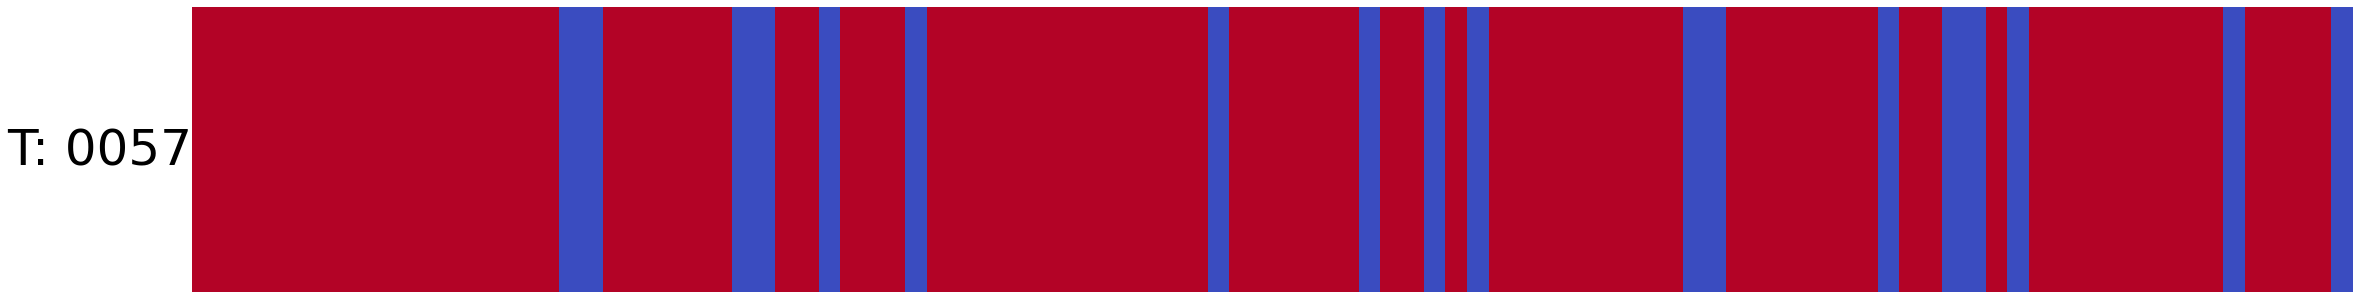

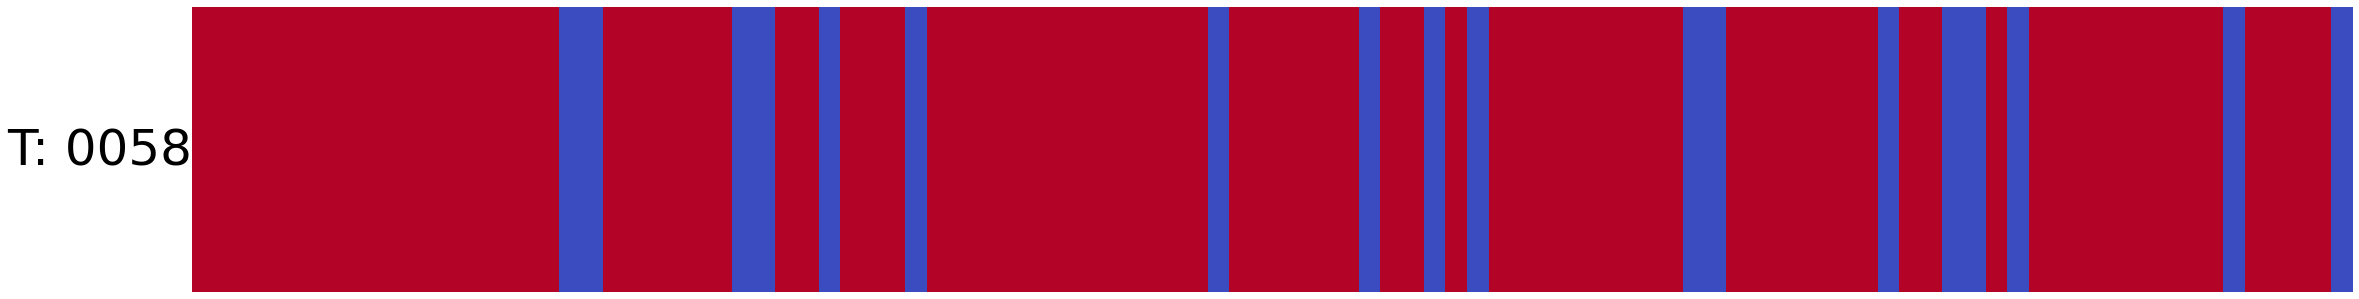

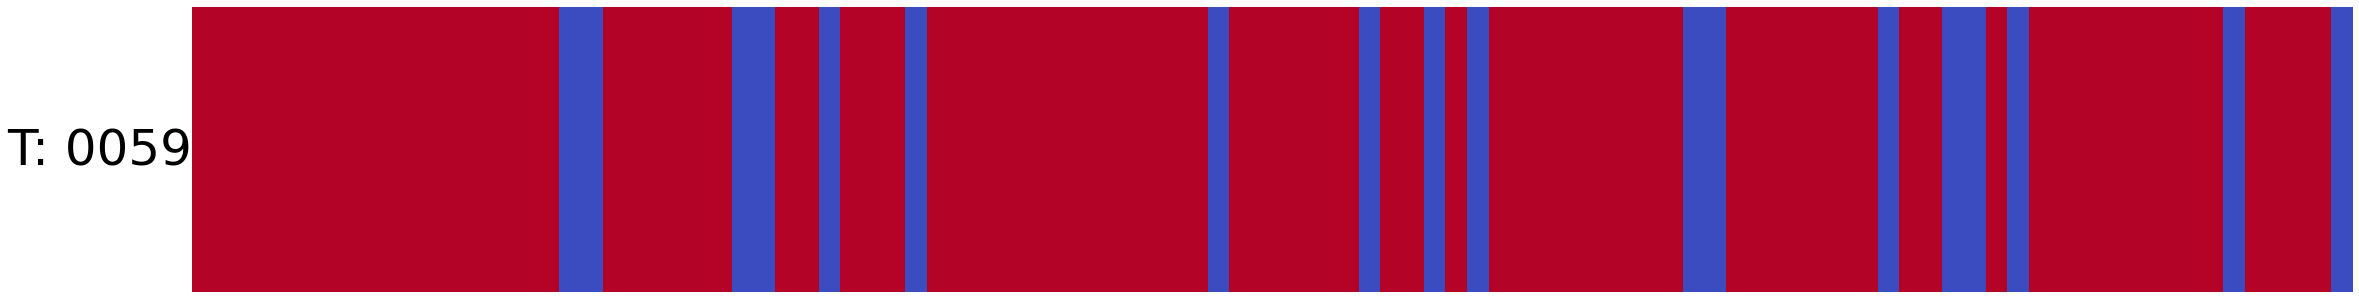

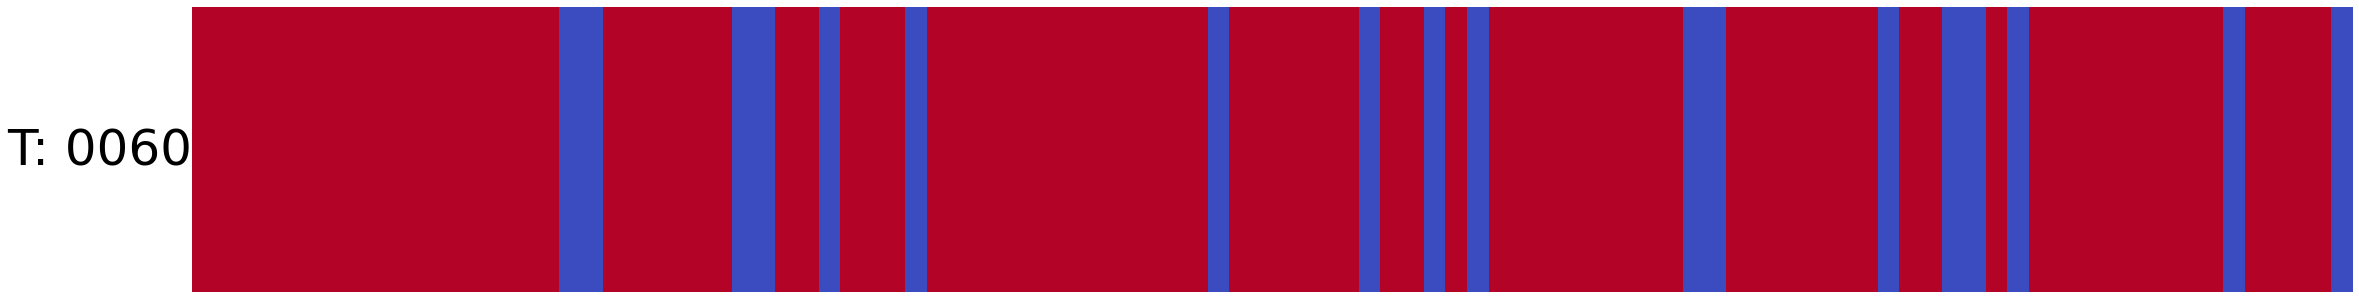

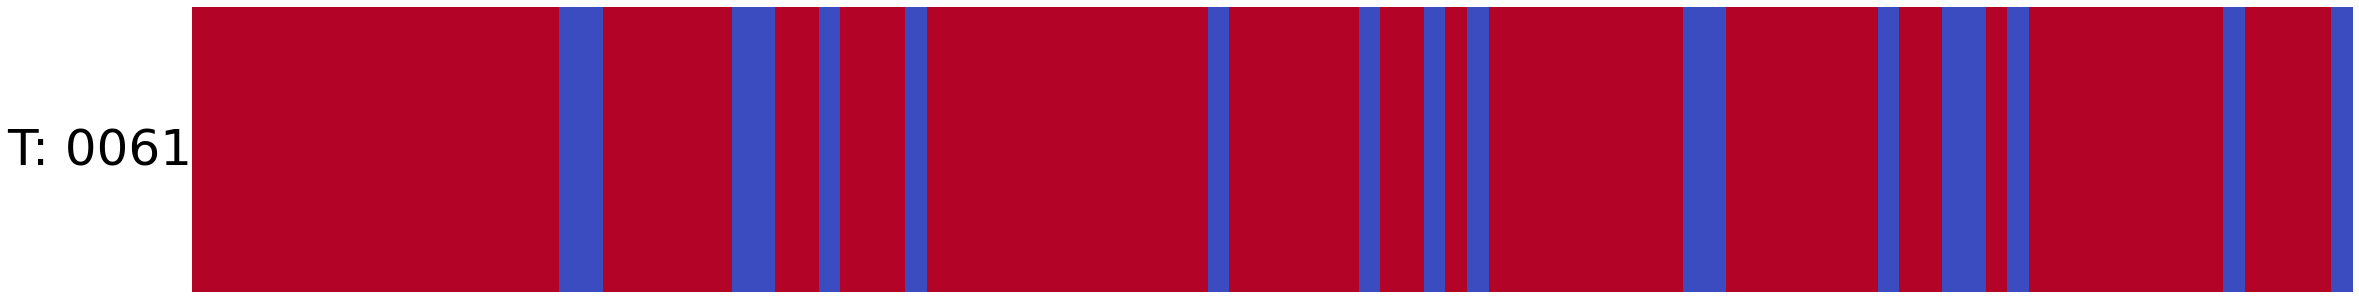

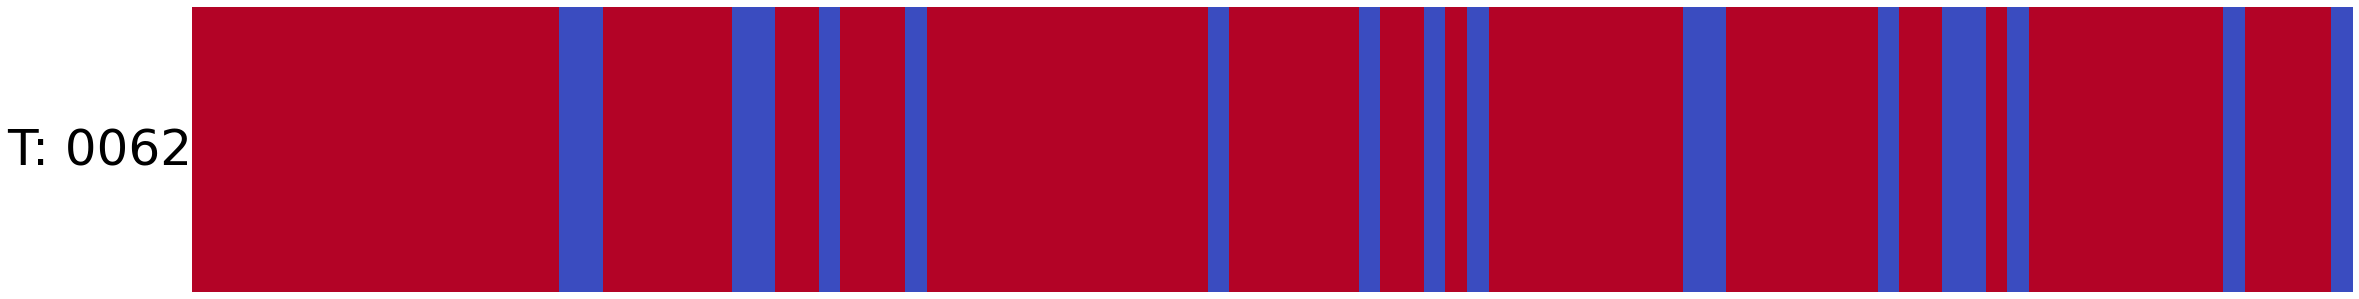

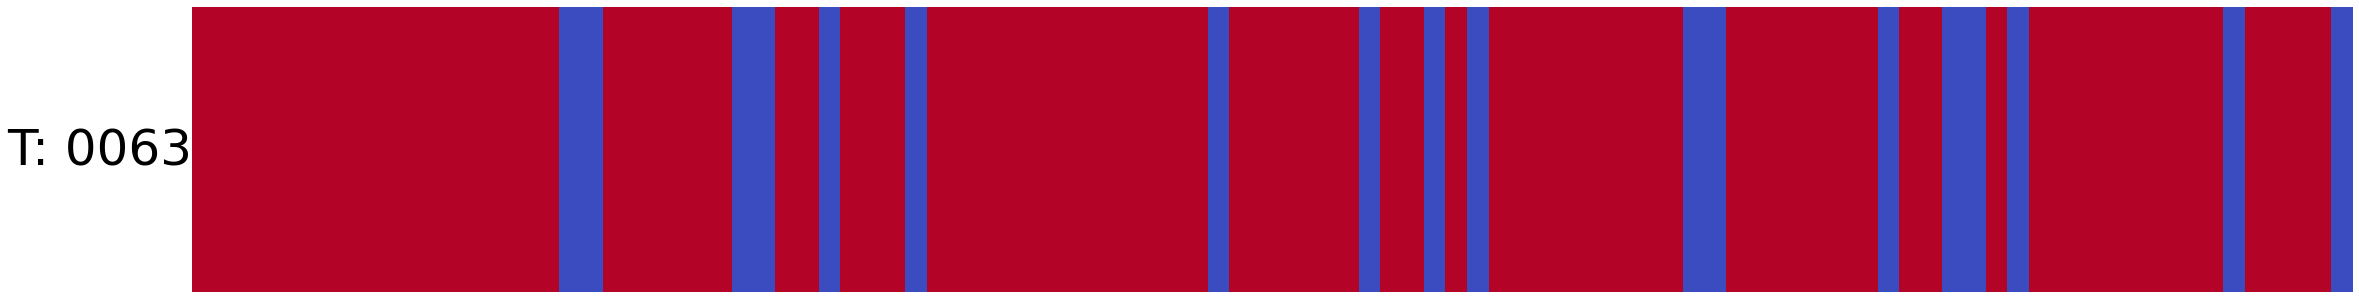

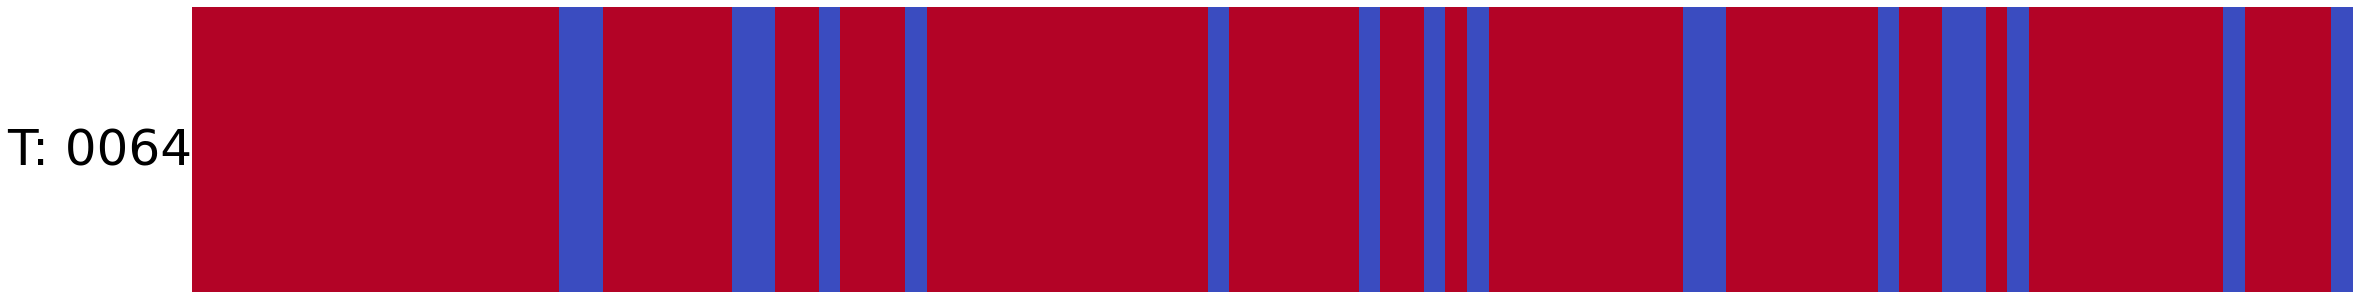

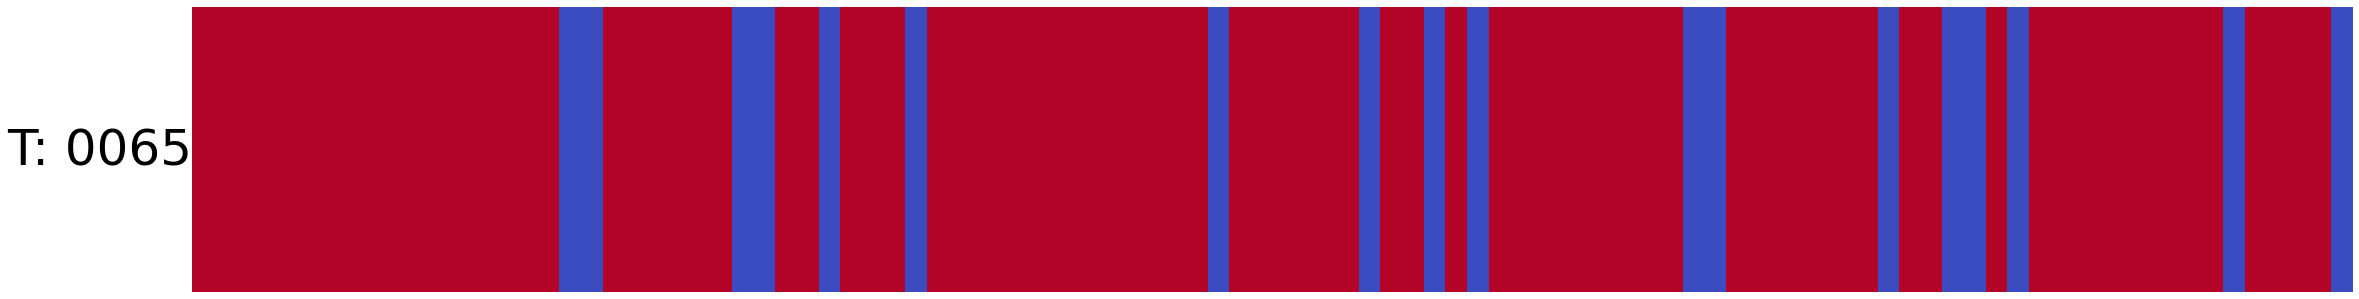

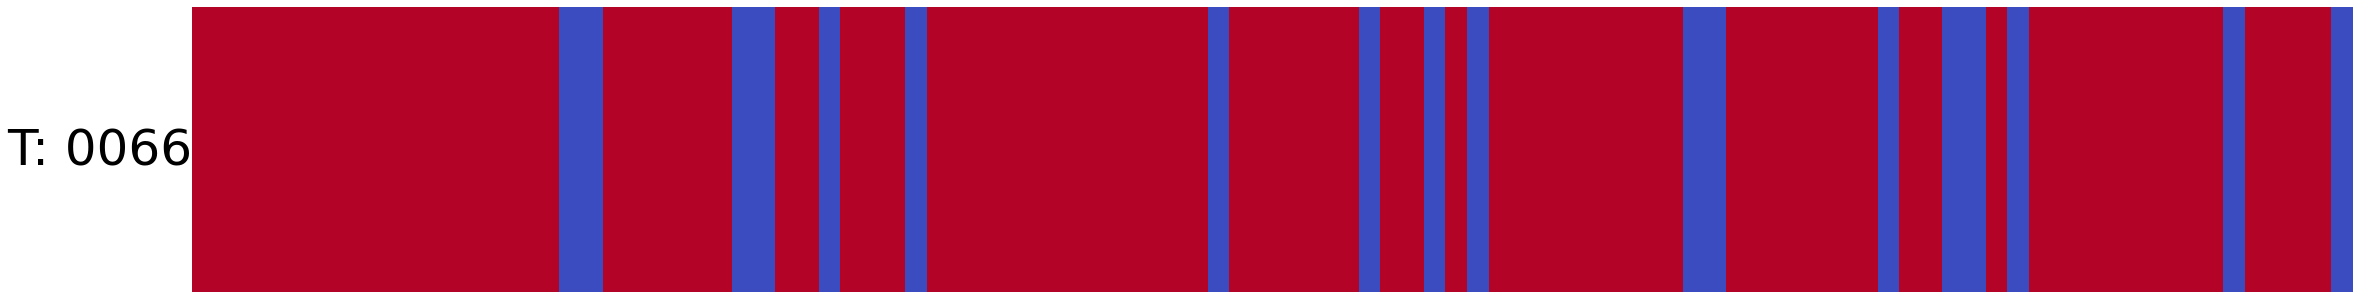

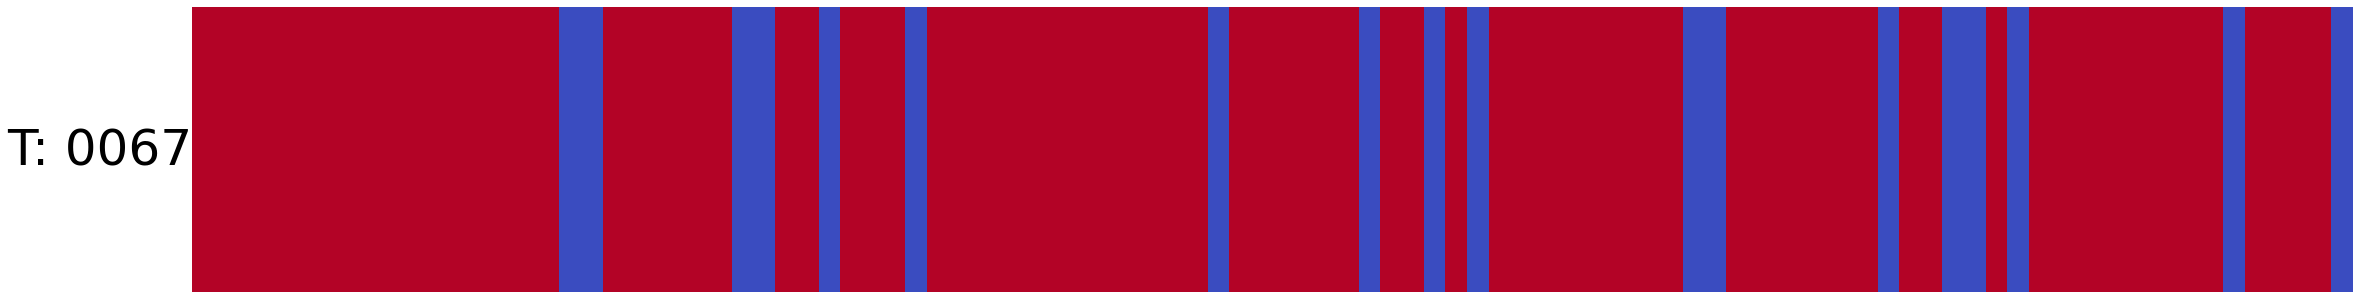

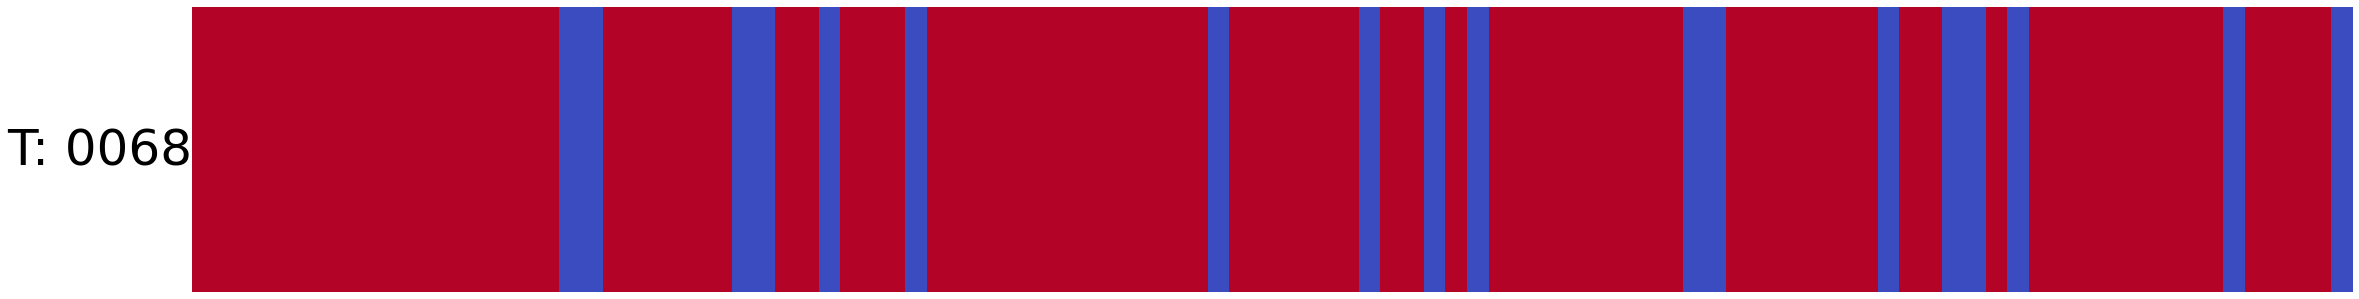

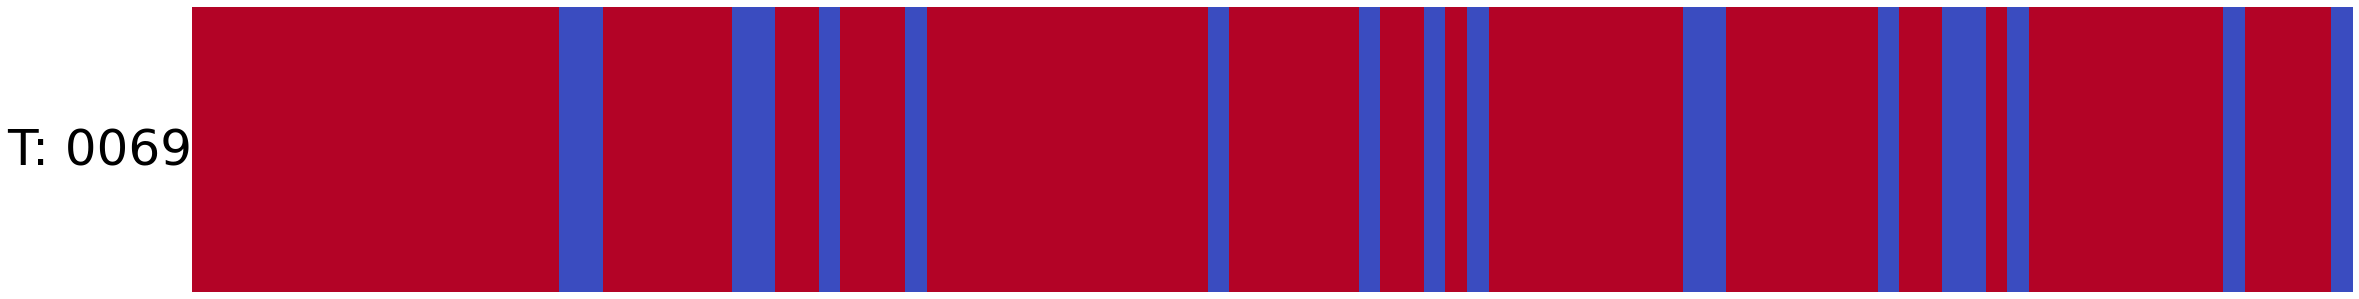

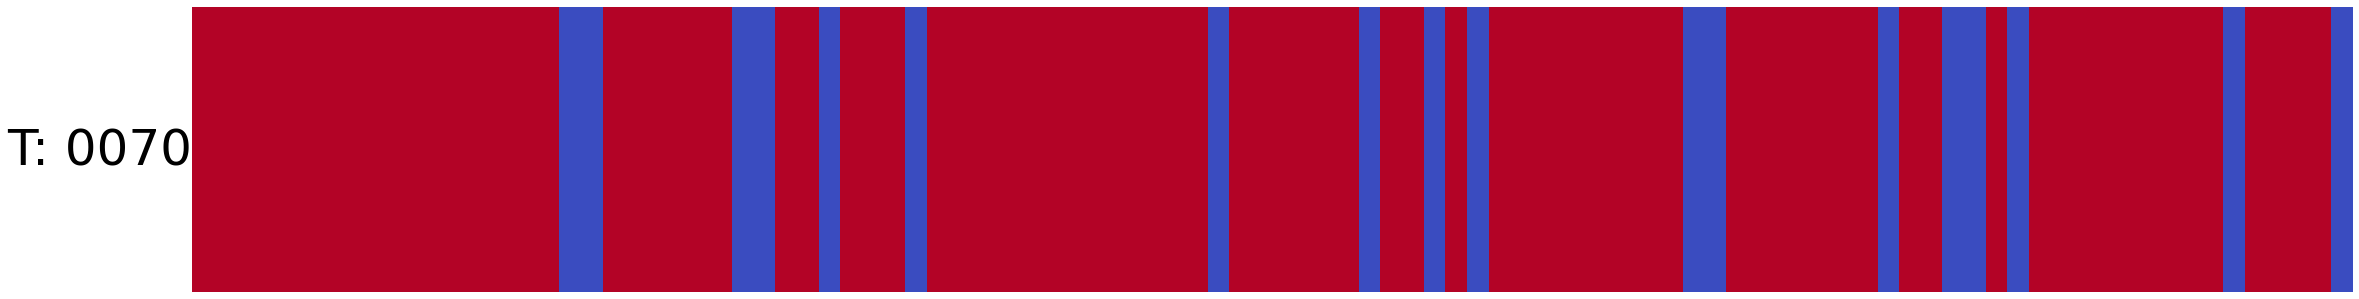

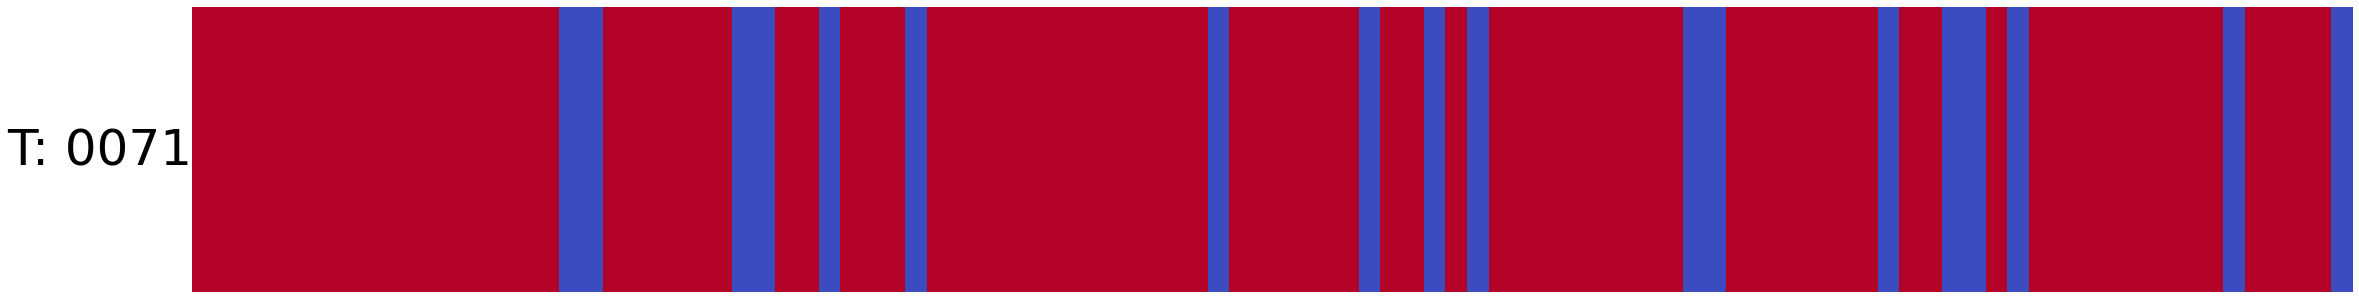

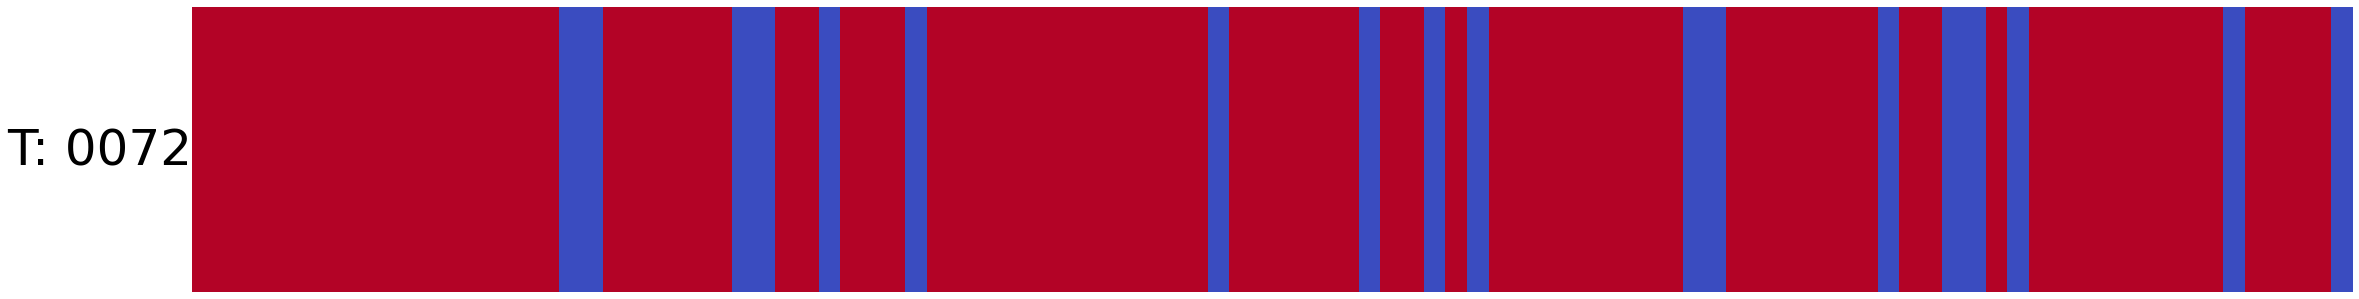

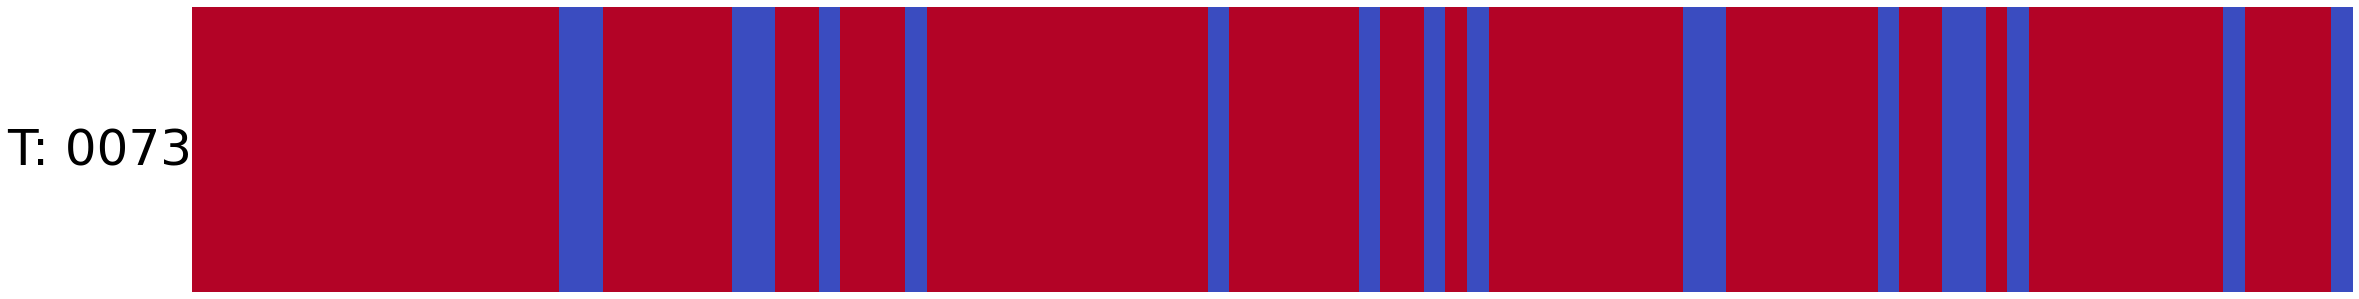

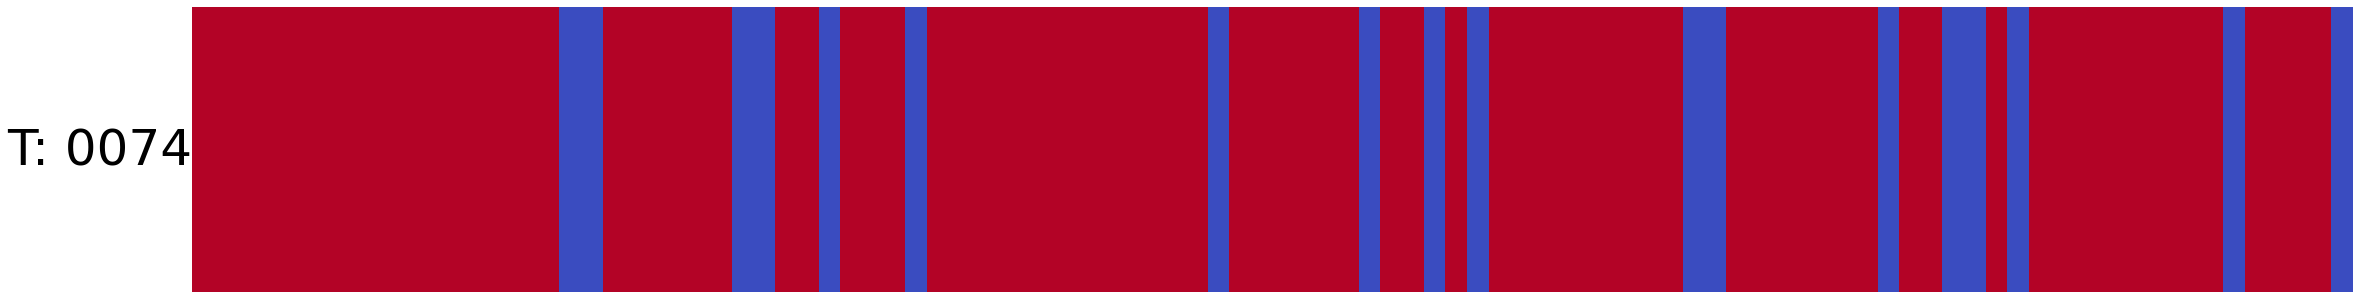

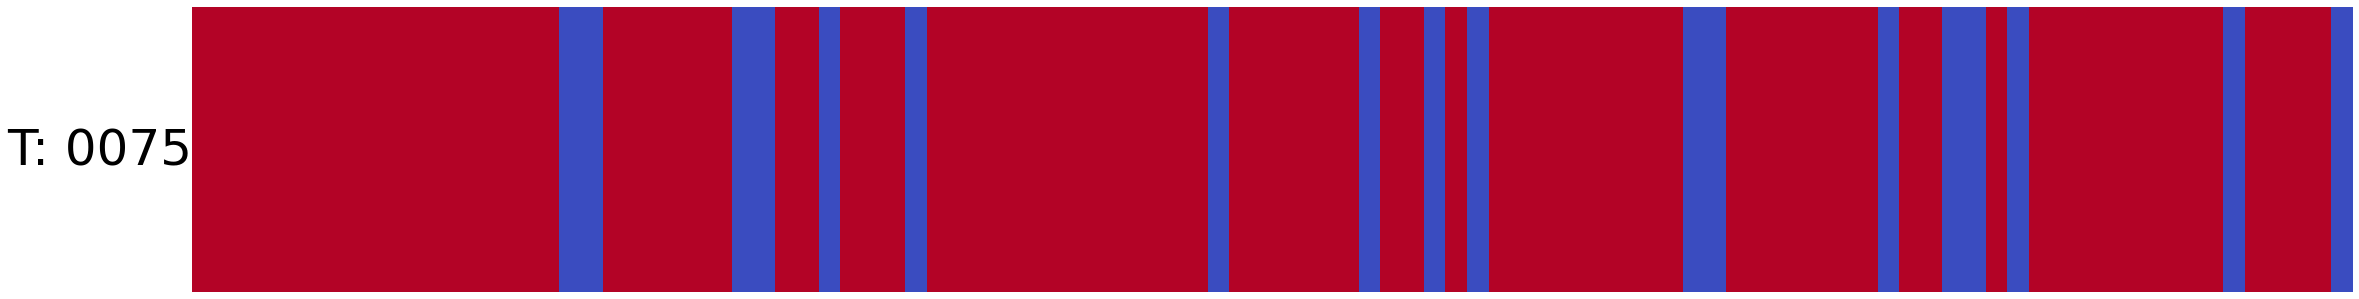

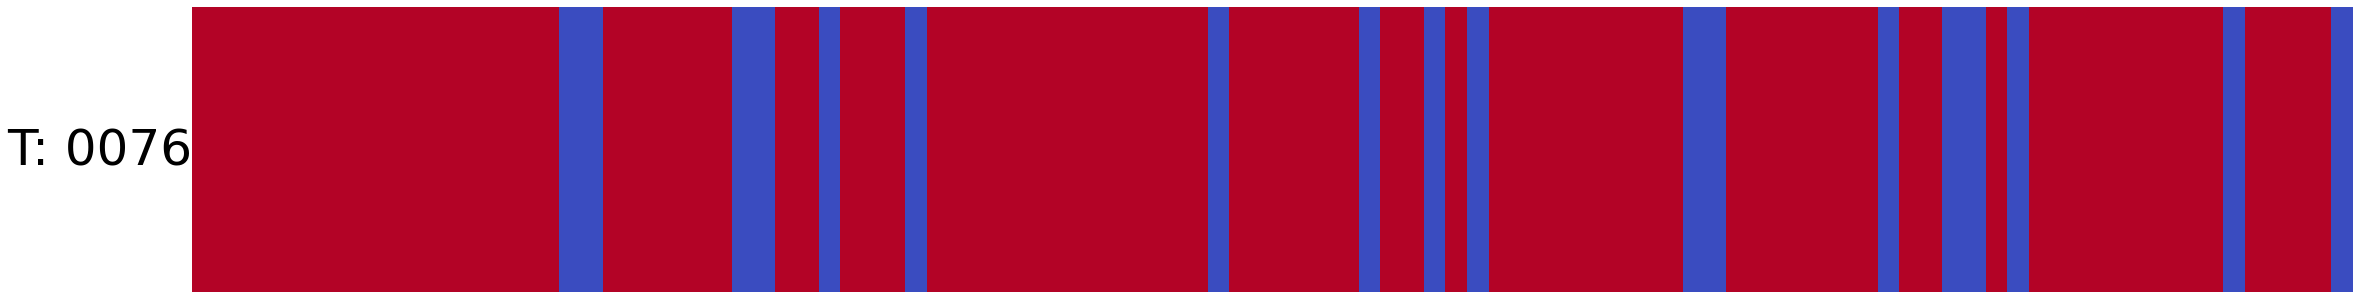

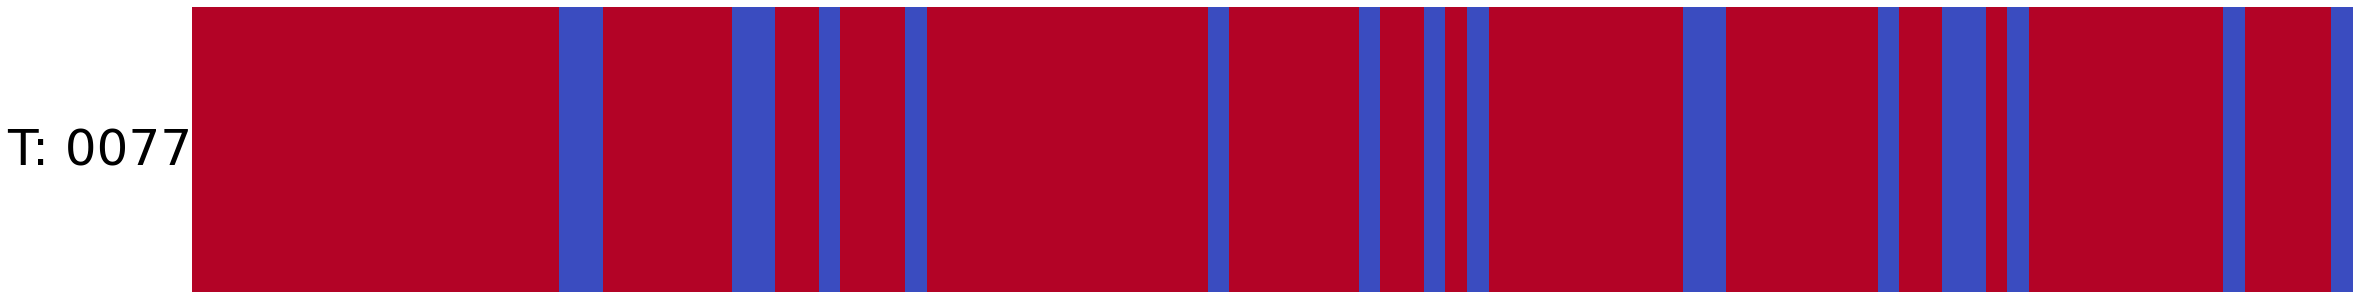

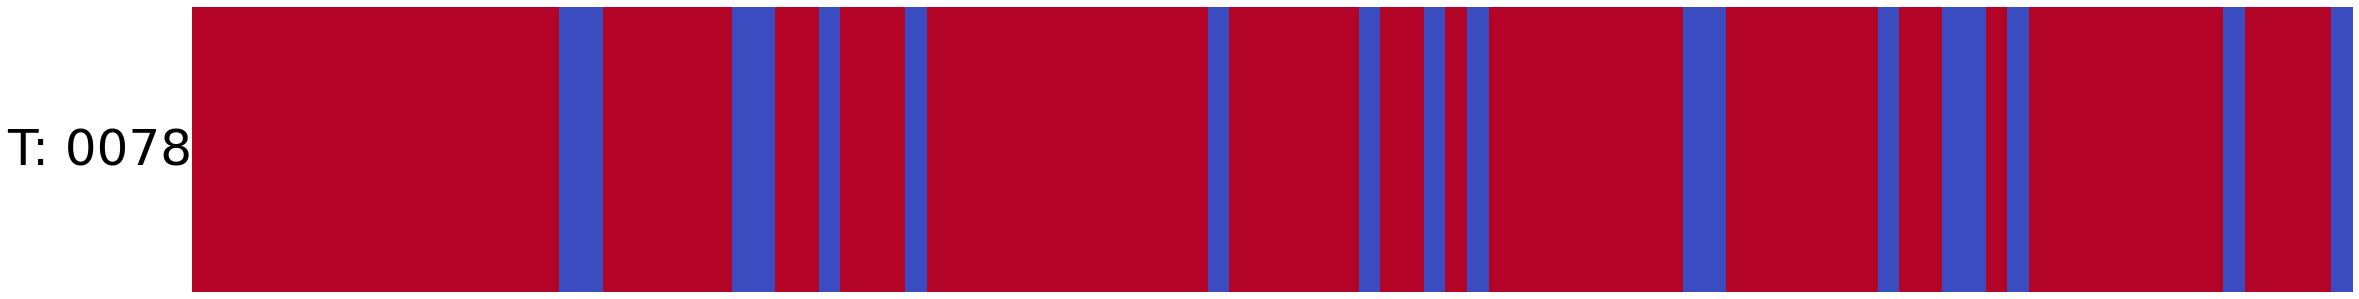

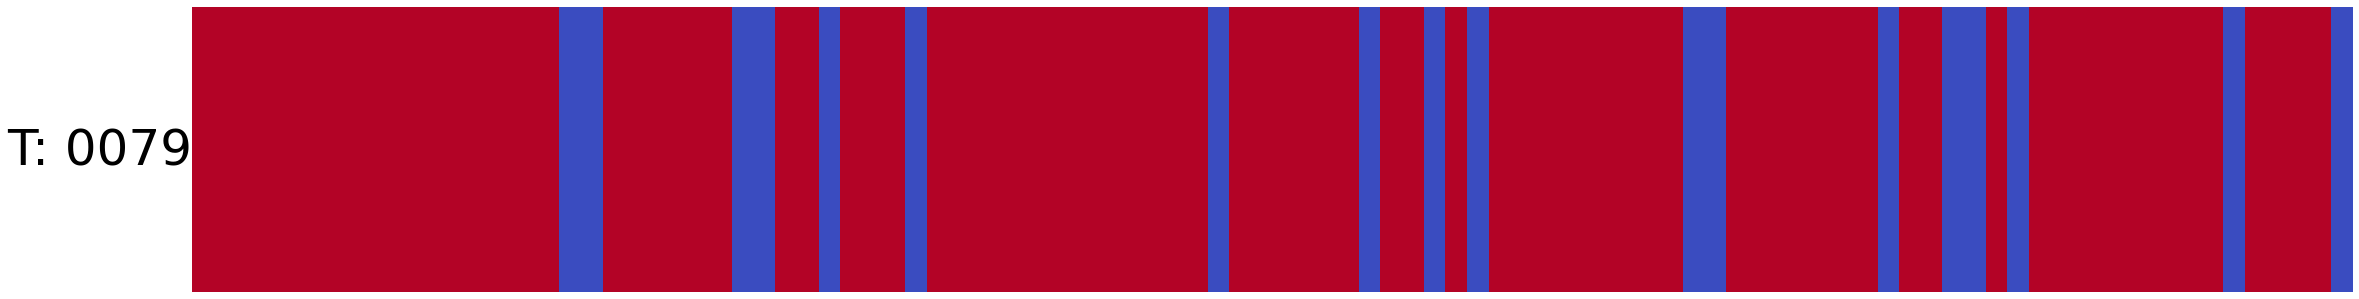

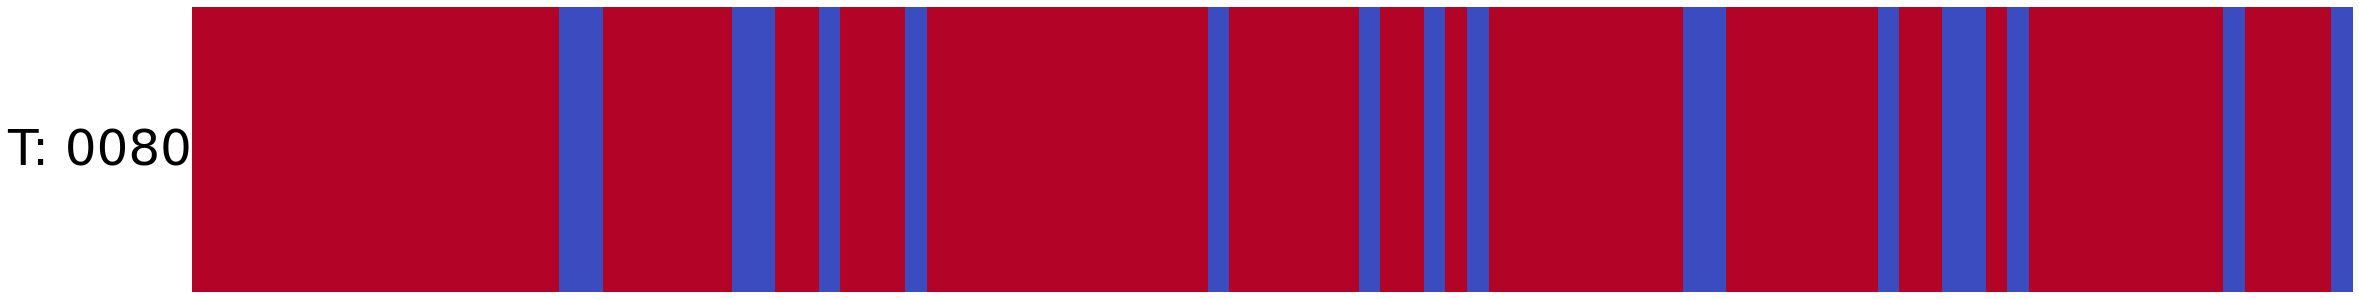

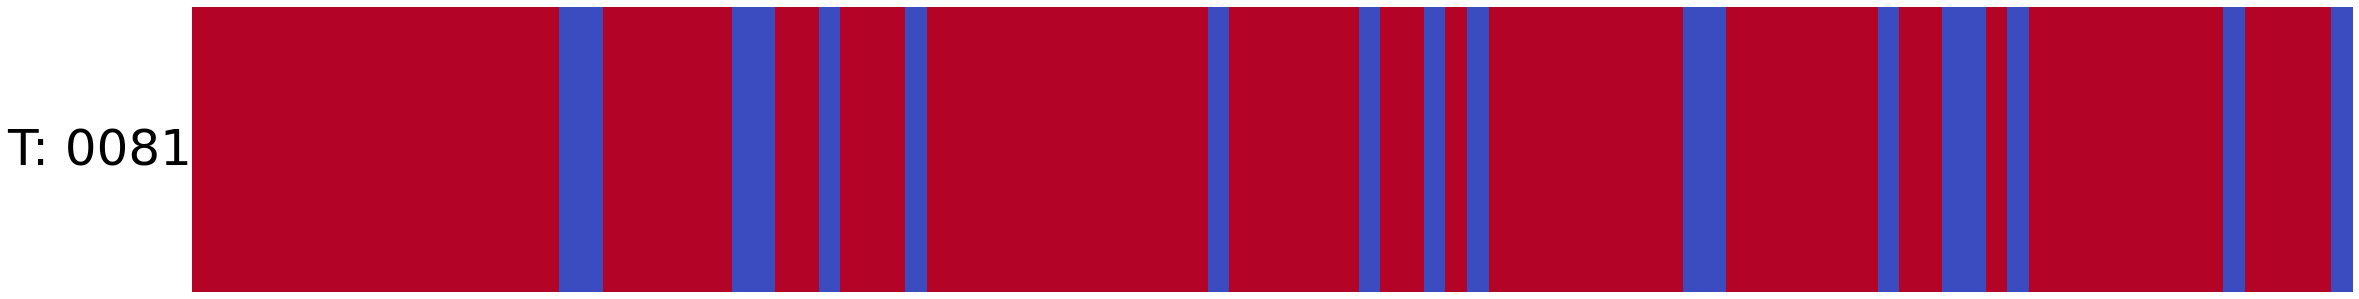

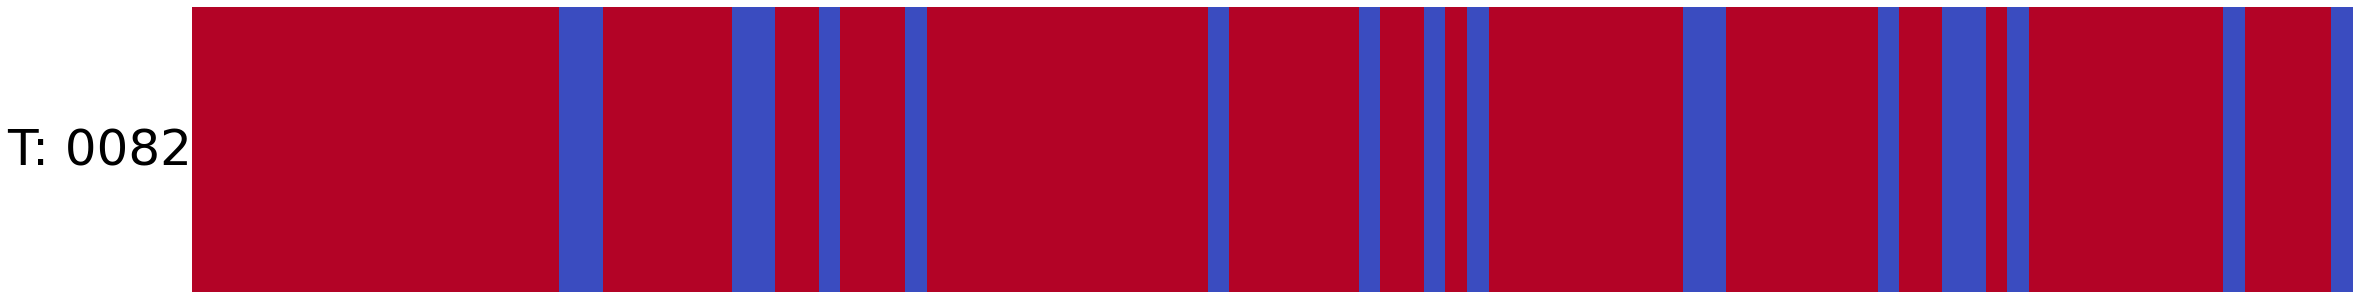

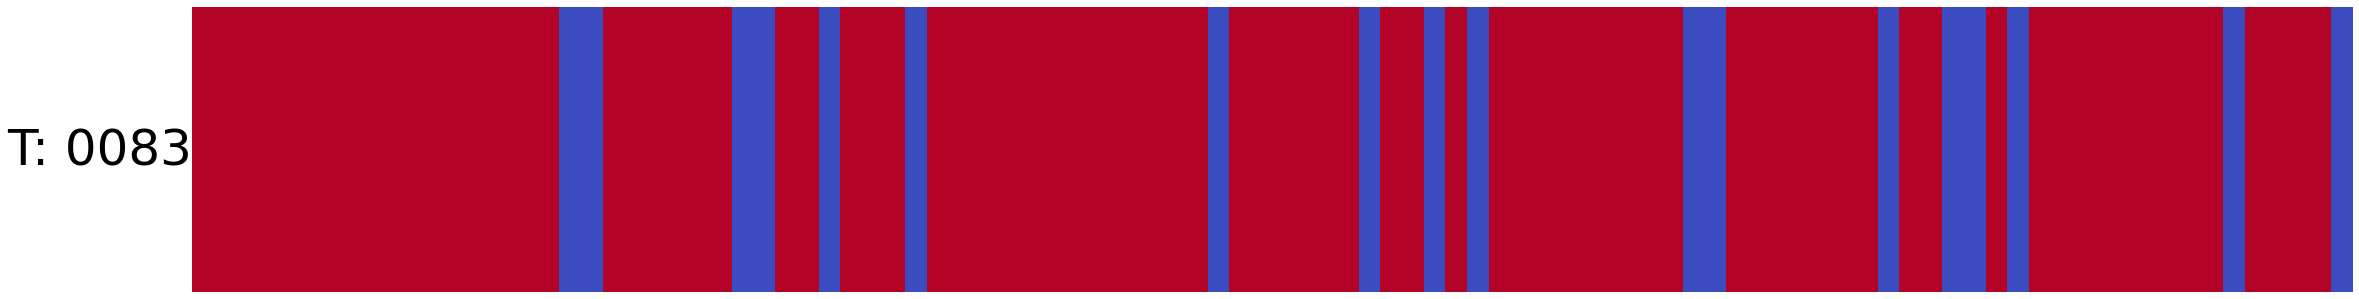

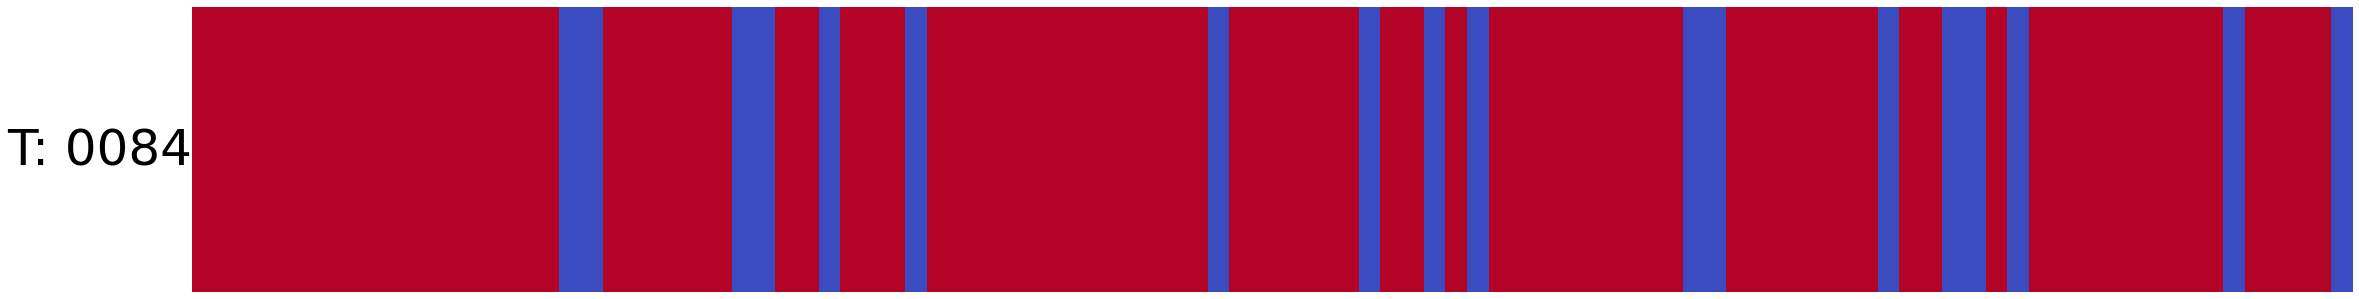

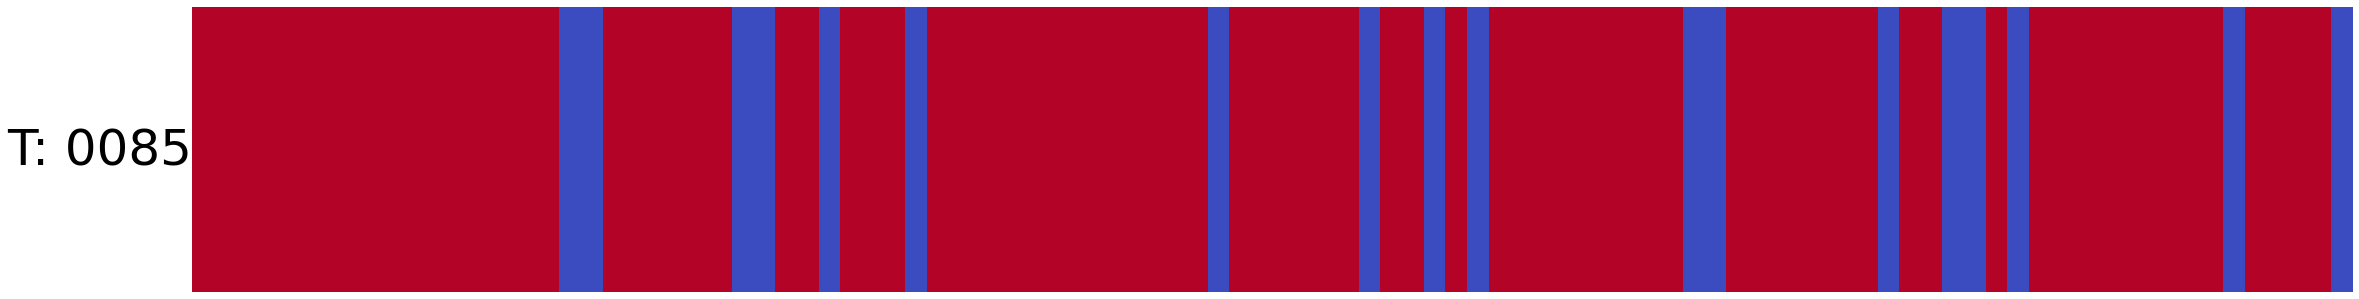

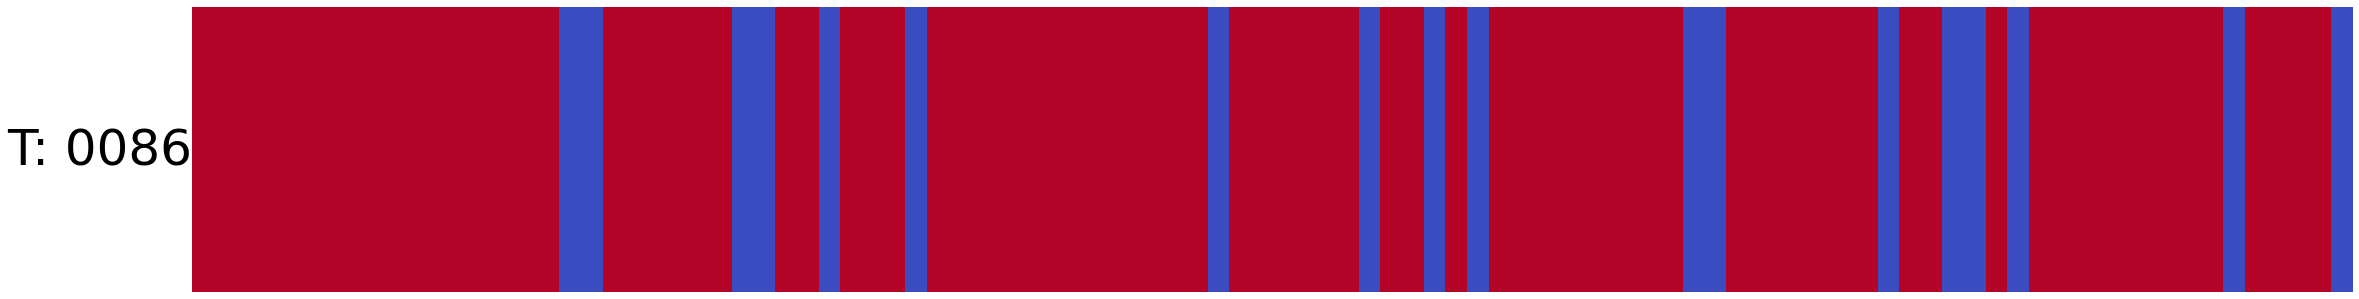

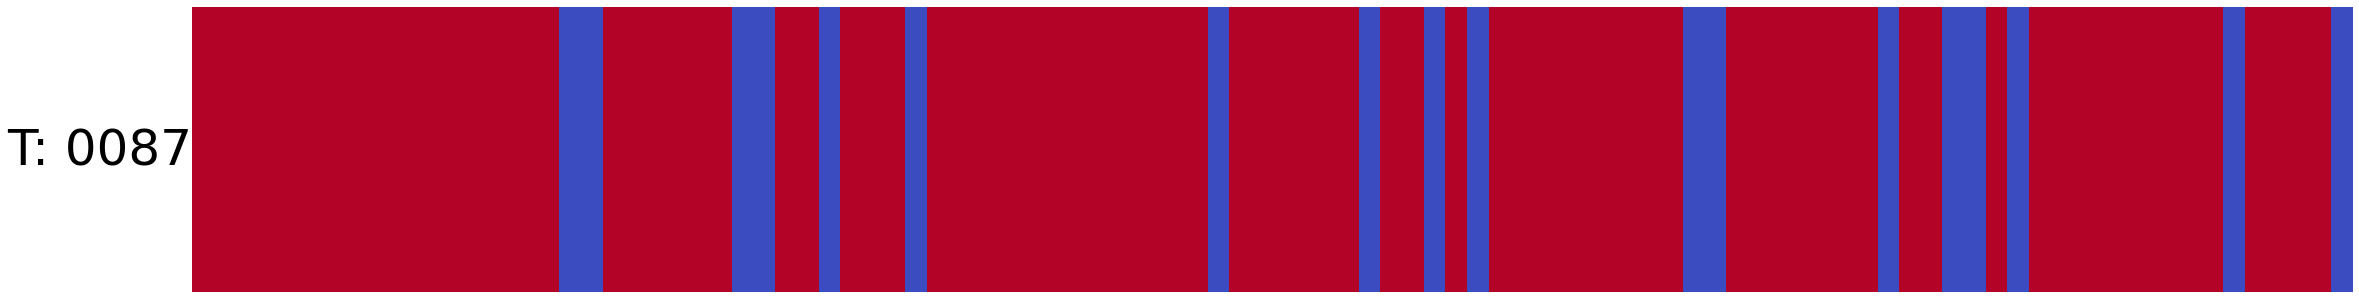

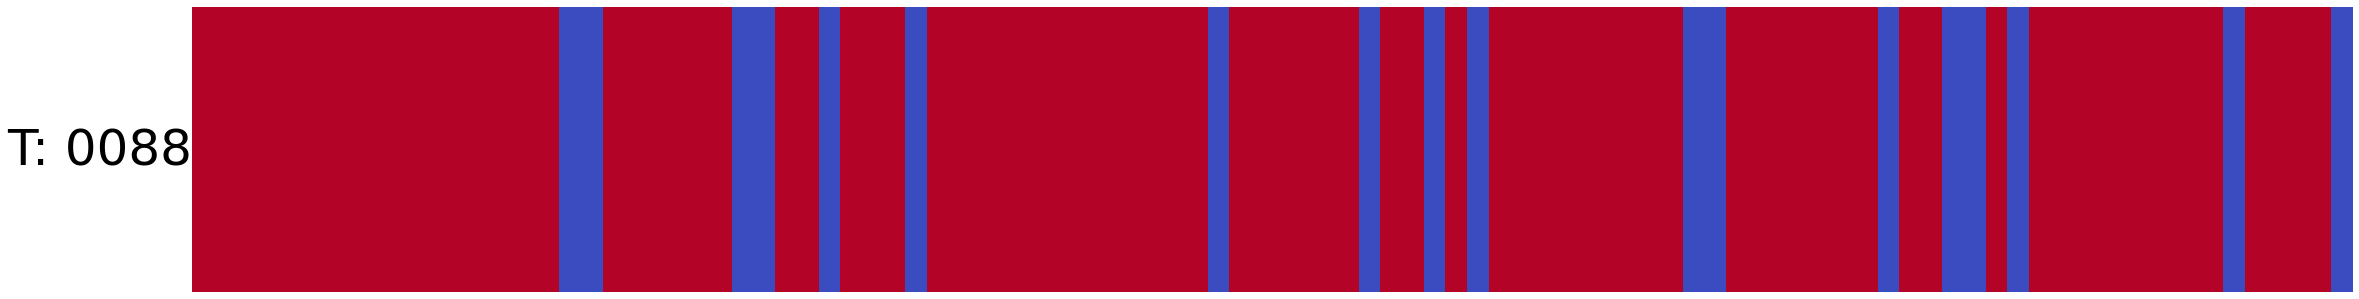

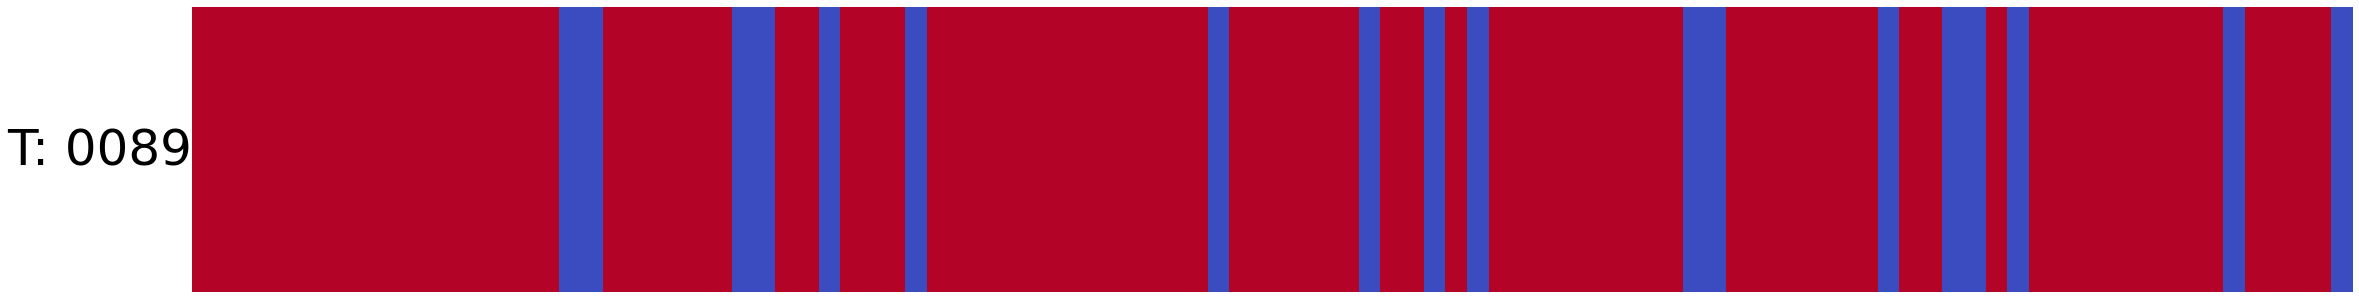

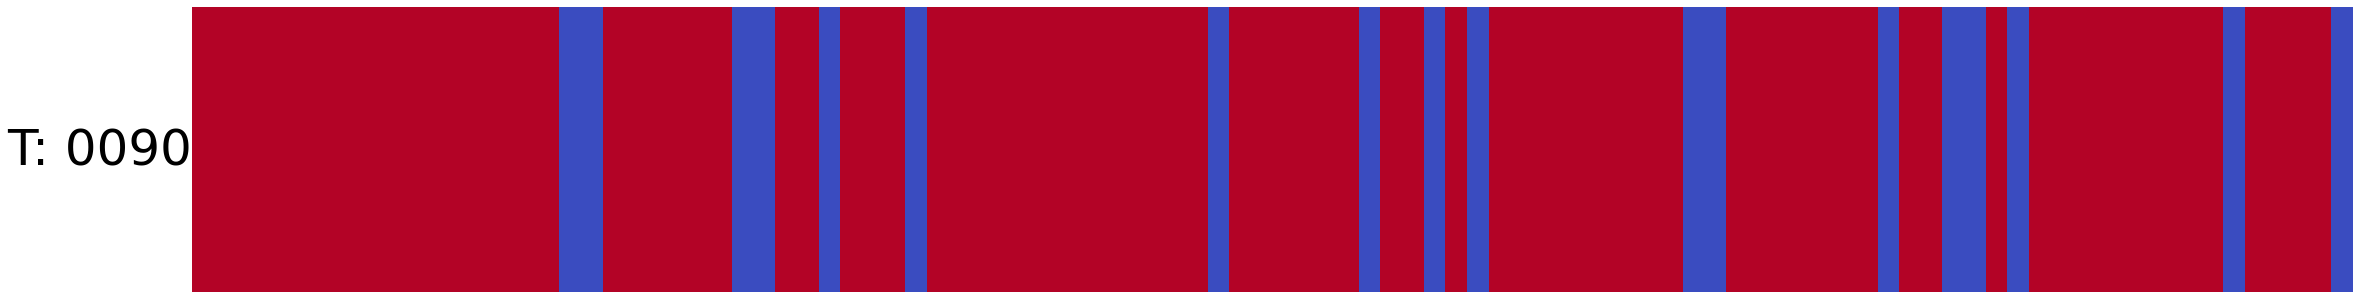

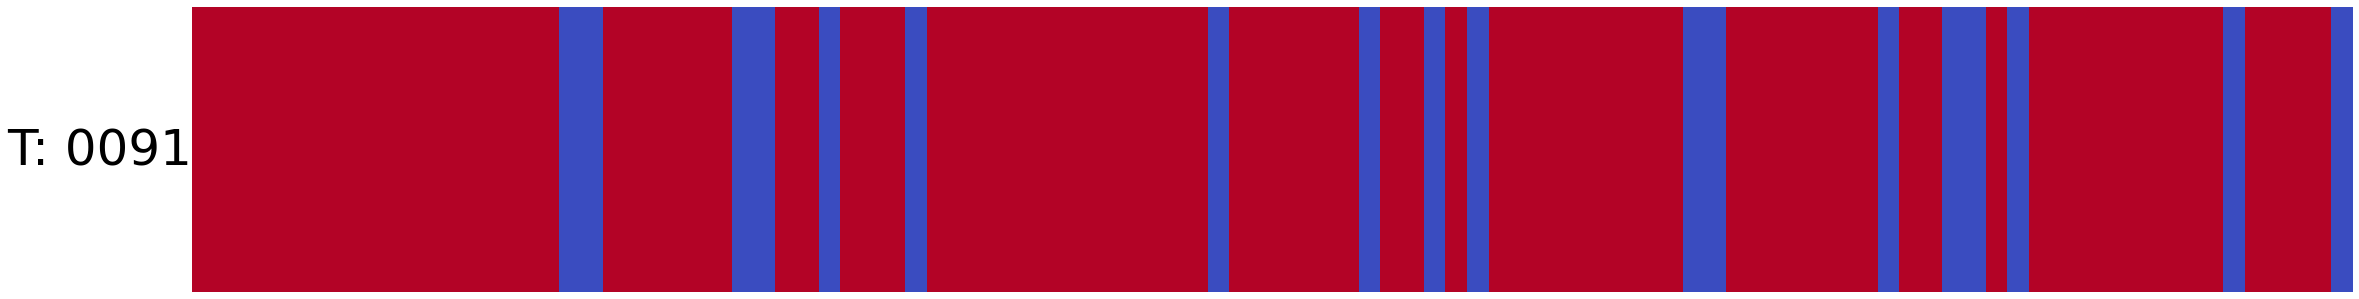

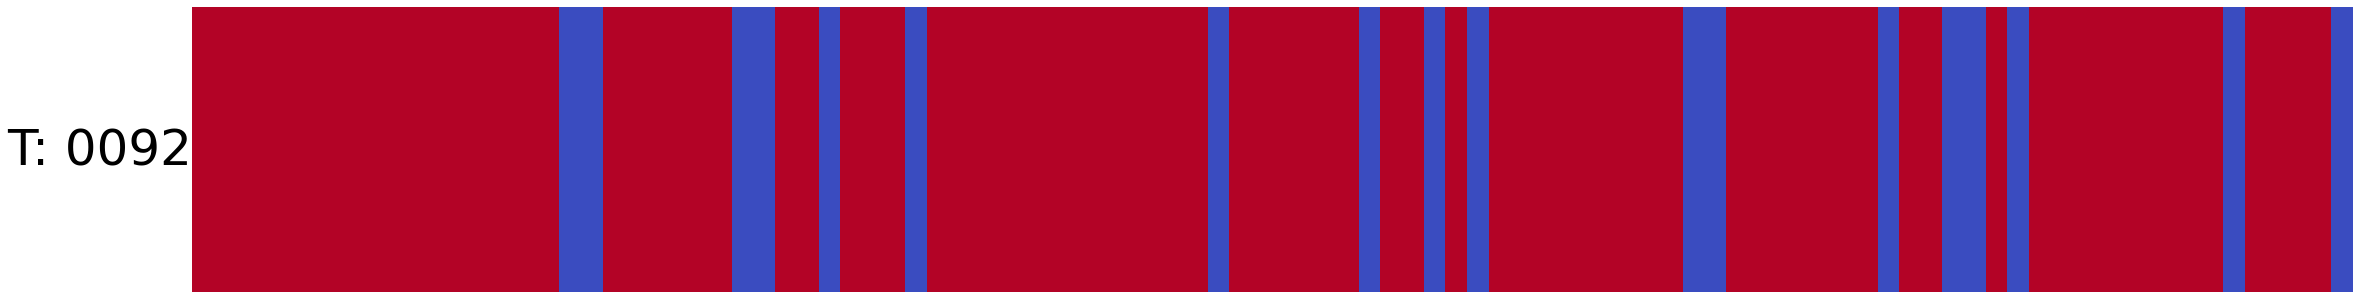

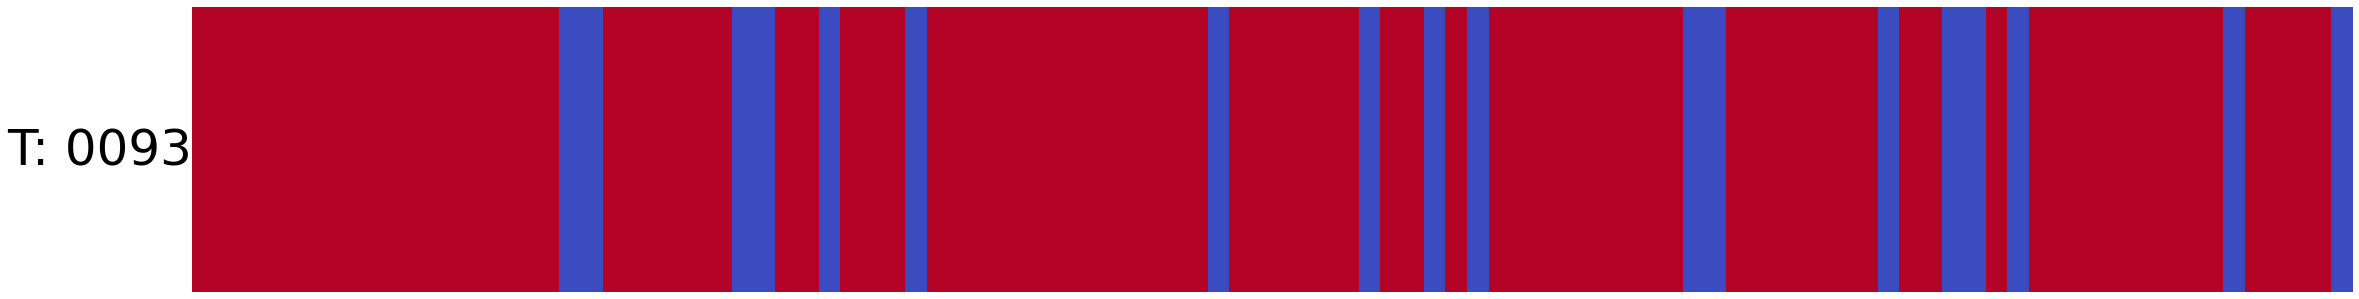

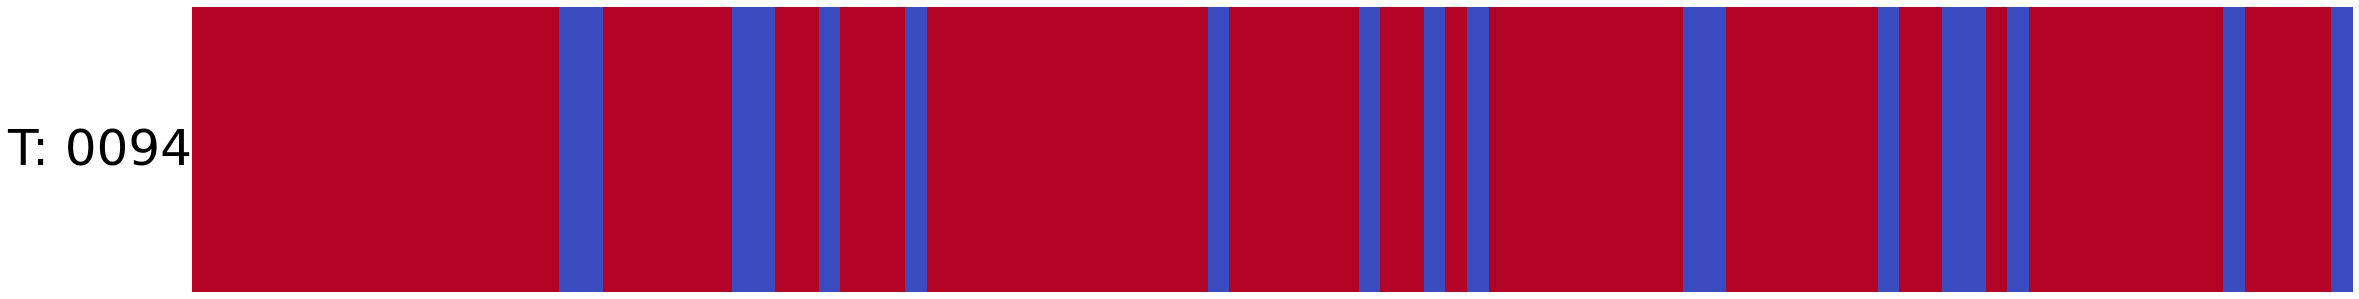

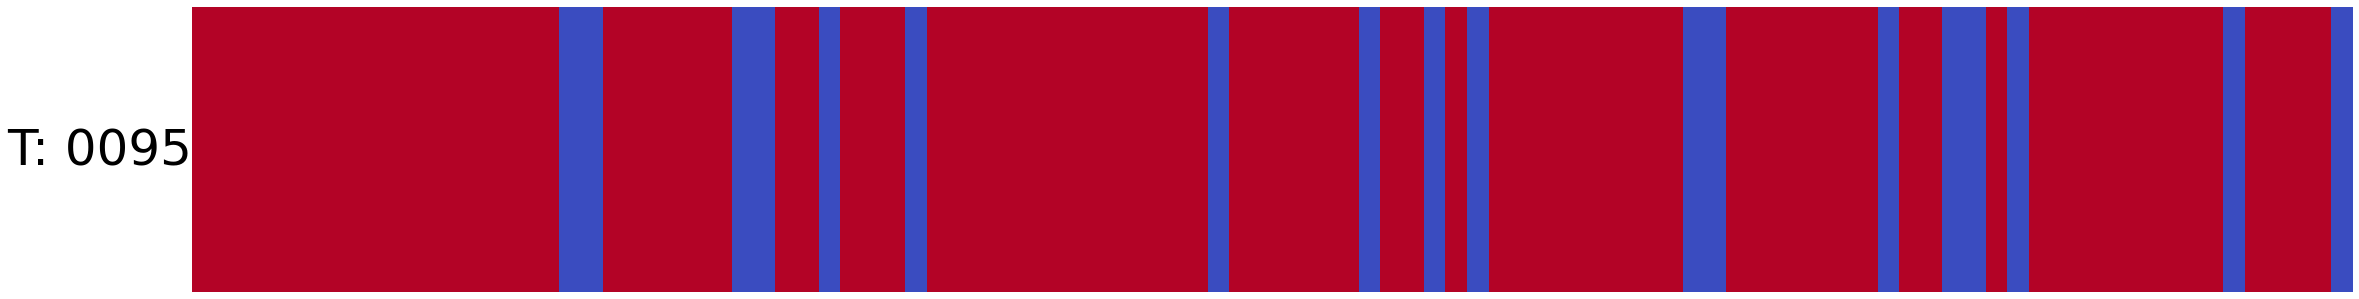

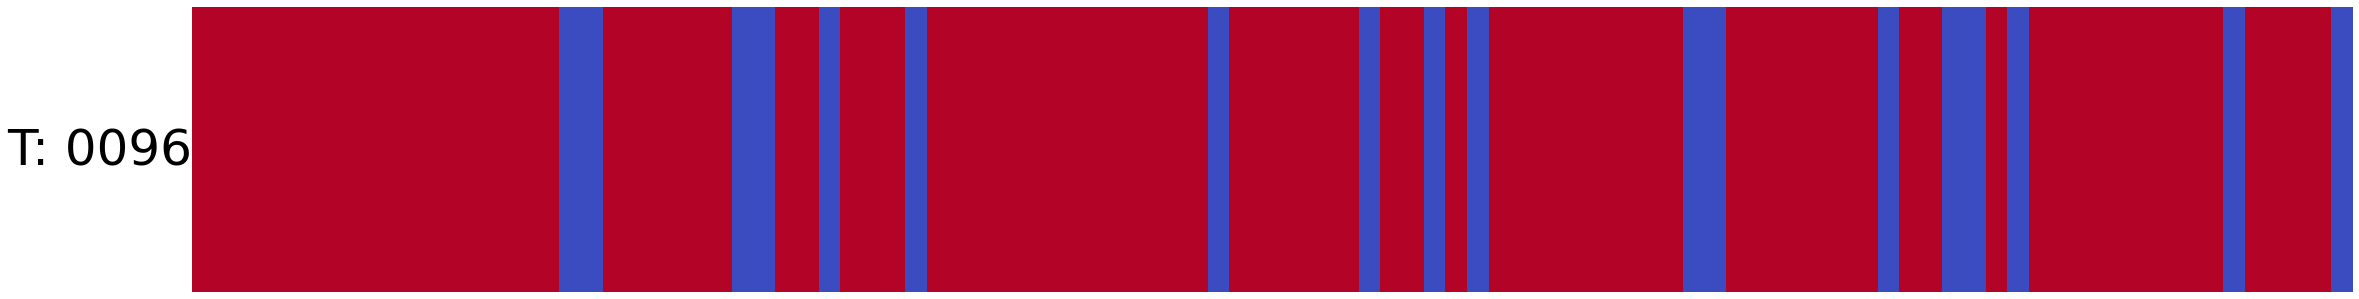

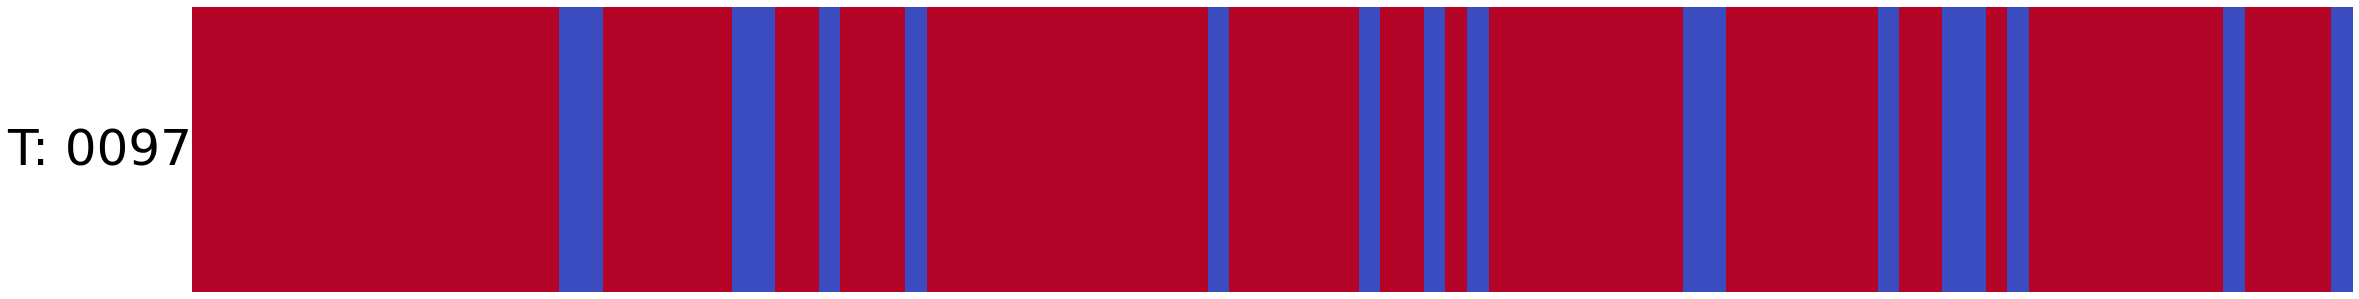

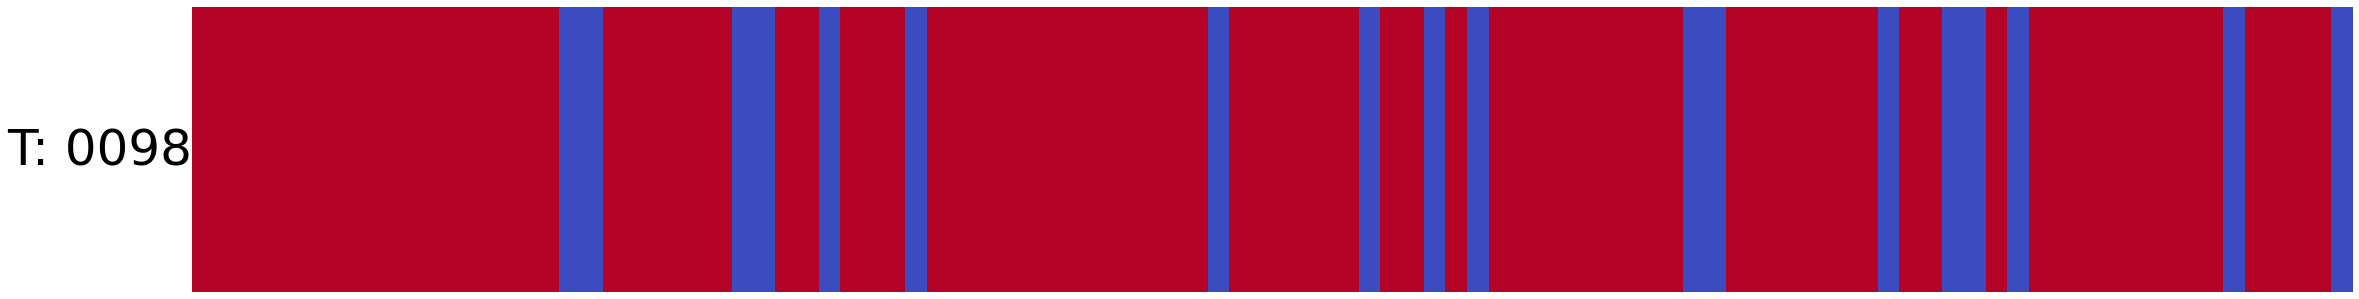

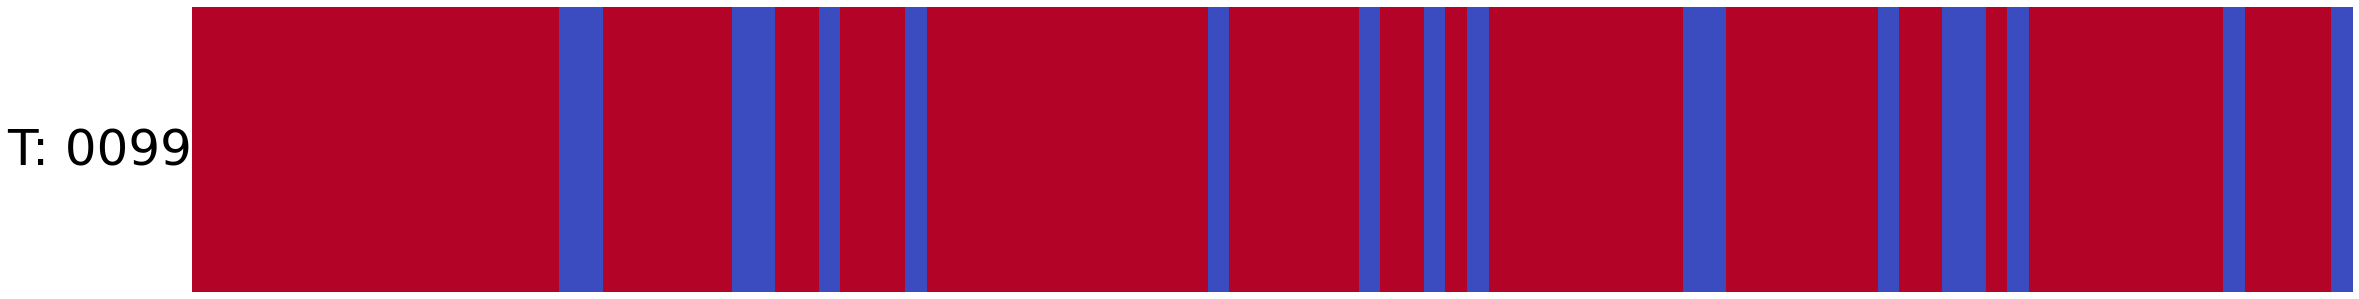

In [ ]:
posicao = np.random.randint(0,N)
estado = np.zeros((N), dtype=int)
duracao = np.zeros((N), dtype=int)

T = 100
D = 5
prob = 1
estado[posicao] = 1
duracao[posicao] = D

fig, axis = plt.subplots()
axis.imshow(np.vstack((estado,estado)), aspect='auto', vmin=0, vmax=1, cmap='coolwarm')
axis.set_axis_off()
fig.subplots_adjust(top=1, bottom=0.01, left=0, right=5)
fig.text(0,0.5, "T: %04d"%(0), va='center', ha='right', fontsize=50)
plt.show()

for t in range(1,T):
    new_estado = np.zeros((N), dtype=int)
    for n in range(N):

        if duracao[n] > 0:
            duracao[n] -= 1 # time-step
     
        indices = np.where(matriz[n,:]==1)[0] # lista de adjacência nó n
        viz_contaminado = False
        for idx in indices:
            if estado[idx] == 1: # vizinho está doente
                viz_contaminado = True
                break

        if np.random.random_sample()<=prob and viz_contaminado: # chance de contágio    
                new_estado[n] = 1
                duracao[n] = D
        else:
            if duracao[n] == 0:
                new_estado[n] = 0
            else:
                new_estado[n] = estado[n]

    estado = new_estado
    fig, axis = plt.subplots()
    axis.imshow(np.vstack((estado,estado)), vmin=0, vmax=1, aspect='auto', cmap='coolwarm')
    axis.set_axis_off()
    fig.subplots_adjust(top=1, bottom=0.01, left=0, right=5)
    fig.text(0,0.5, "T: %04d"%(t), va='center', ha='right', fontsize=50)
#     fig.text(0,0,"Tempo", name, va='center', ha='right', fontsize=10)

    plt.show()
    if len(np.nonzero(estado)[0]) == 0:
        break
    


Nesse caso, com a probabilidade de infecção de 100%, podemos ver que todo vértice - uma vez conectado por uma aresta a outro vertice - será infectado, análogo ao caso com tempo de infeção infinito. O que consequentemente deixa de fora os vértices que não possuem conexão, ou seja, não serão conectado. Nesse modelo, a propagação cresce até o tempo T=12 e estabiliza devido à essa porcentagem de probabilidade. 



---
##Simulação 3.2 - Probabilidade de 0%


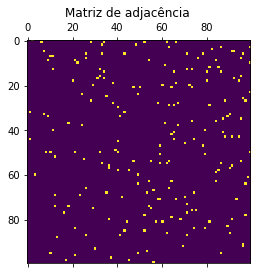

In [ ]:
#Parâmetros do grafo
N=100       #Número de vértices
grauMedio=4 #Grau médio
a = grauMedio*N//2 #número de arestas

matriz = np.zeros((N,N), dtype=int)

numeroArestas=0
while (numeroArestas <= a):
  vertice1 = np.random.randint(0, N)
  vertice2 = np.random.randint(0, N)
  matriz[vertice1, vertice2] = 1
  numeroArestas+=1


plt.matshow(matriz)
plt.suptitle('Matriz de adjacência')
plt.show()

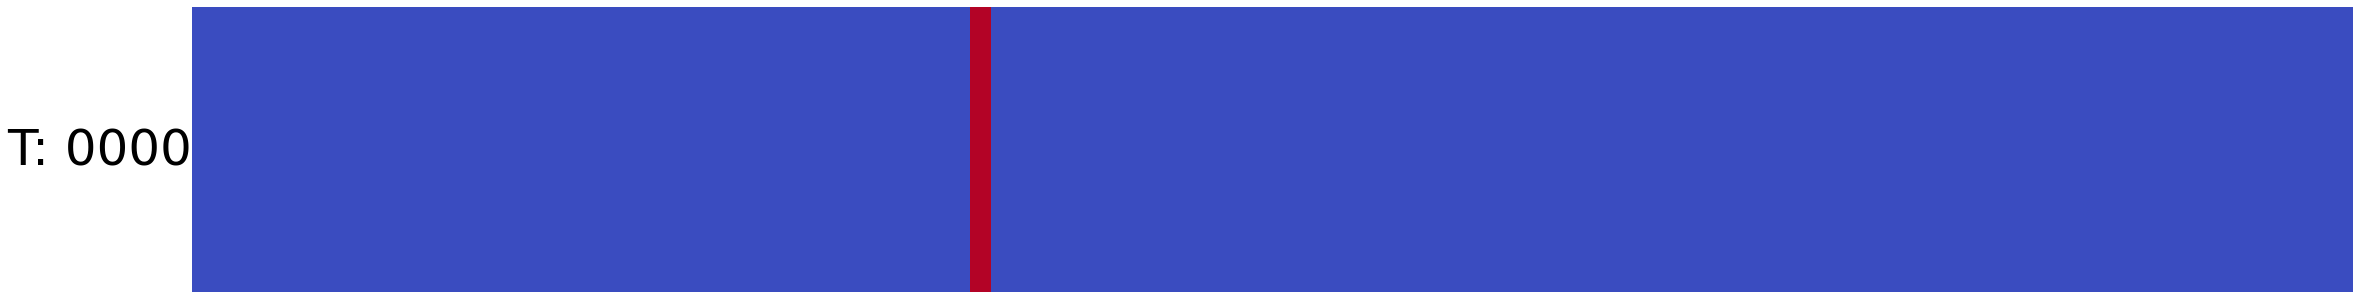

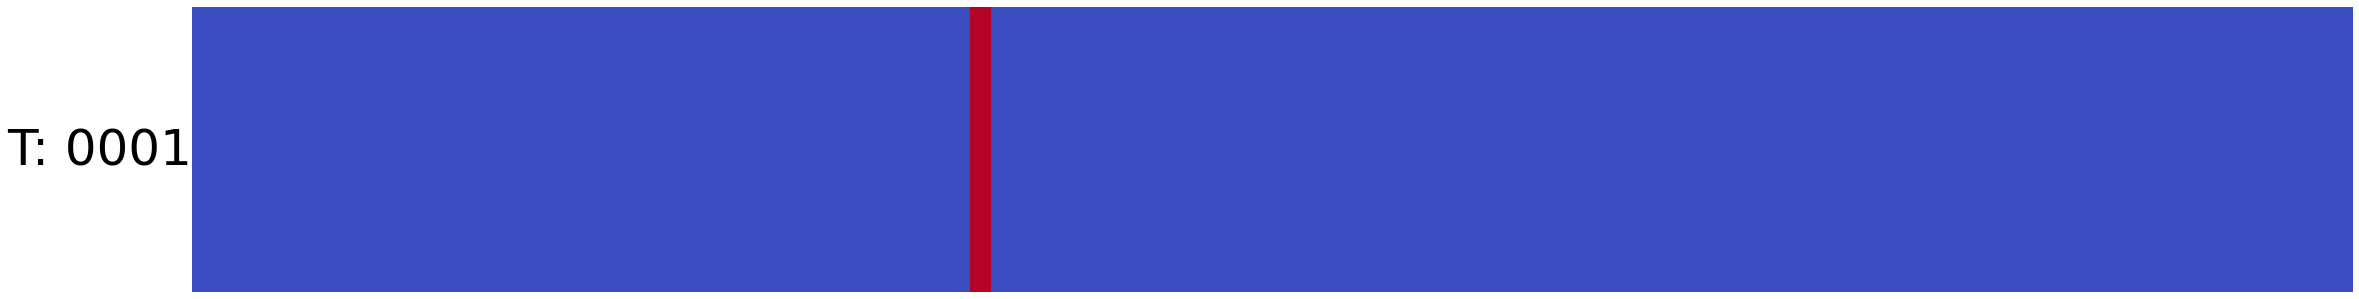

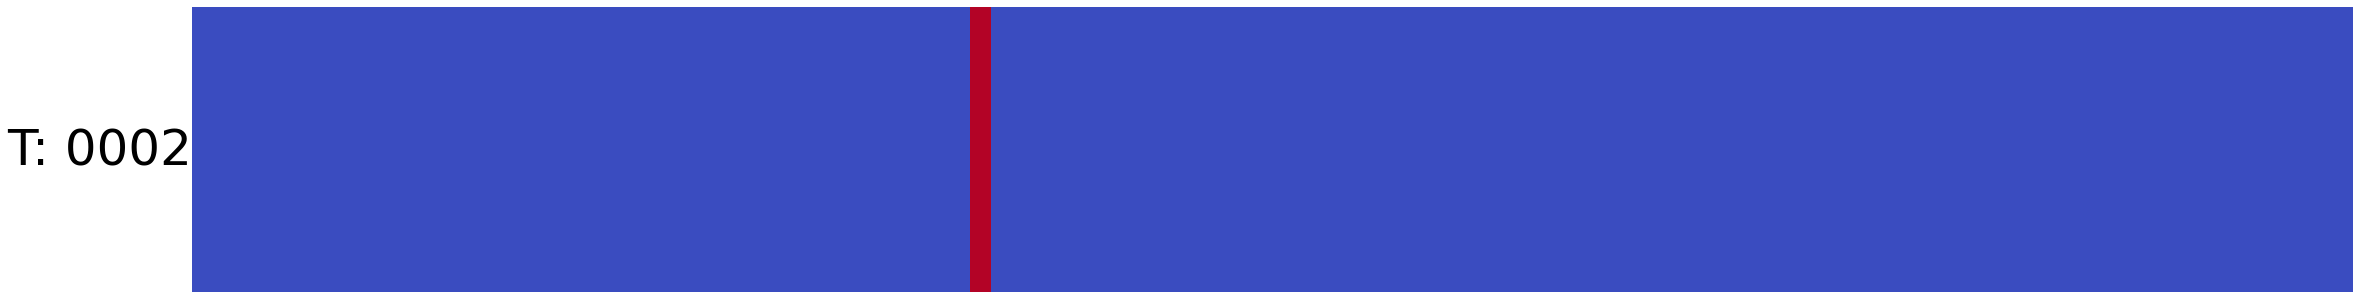

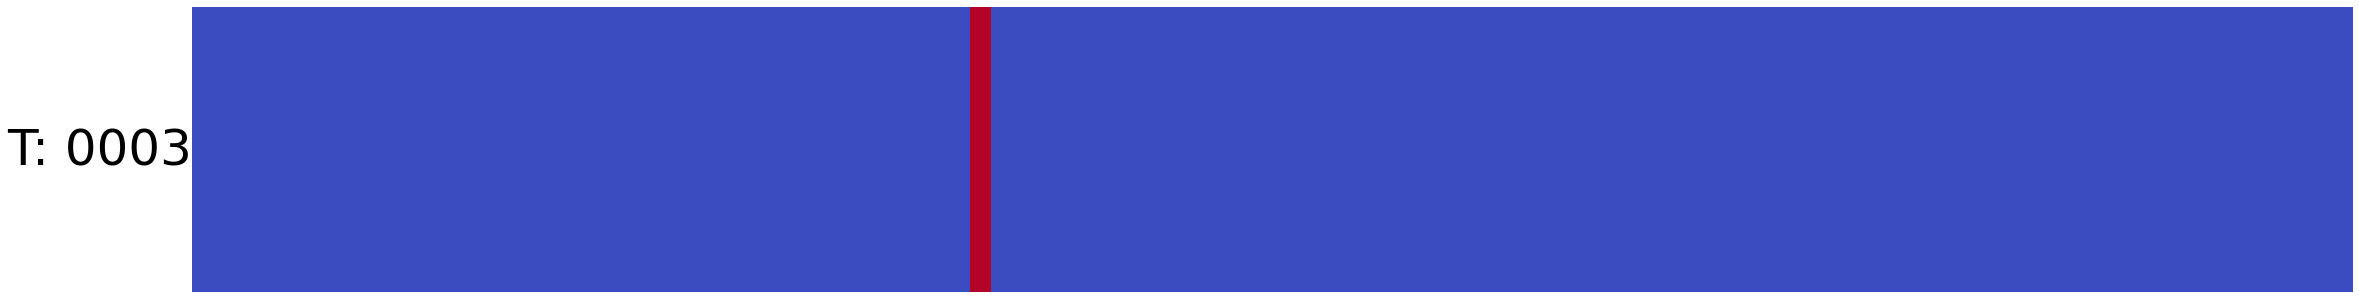

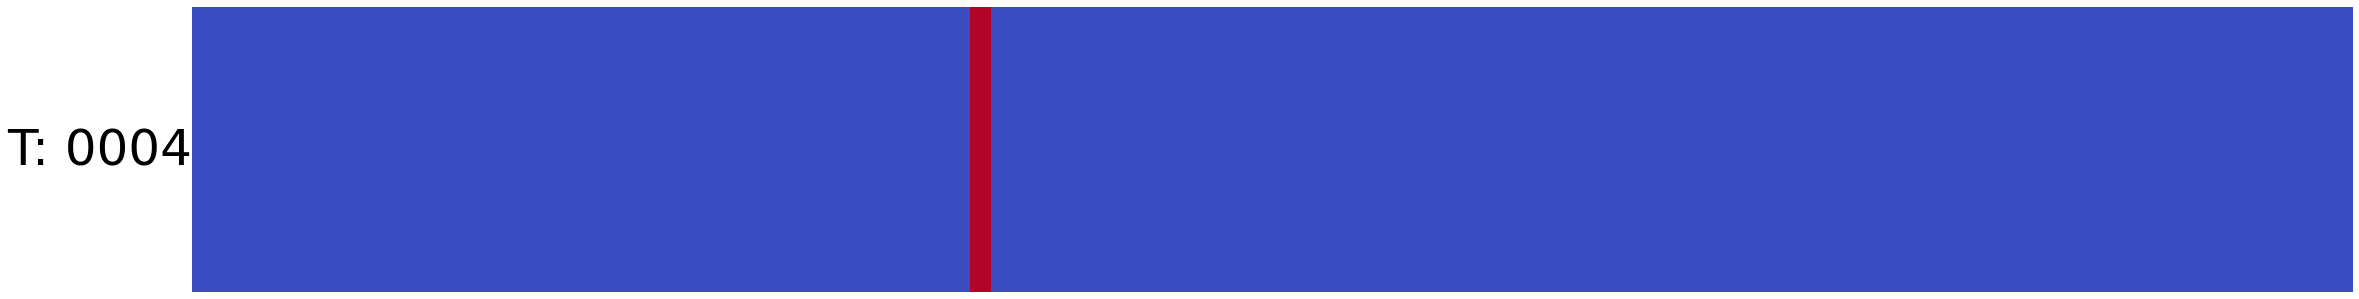

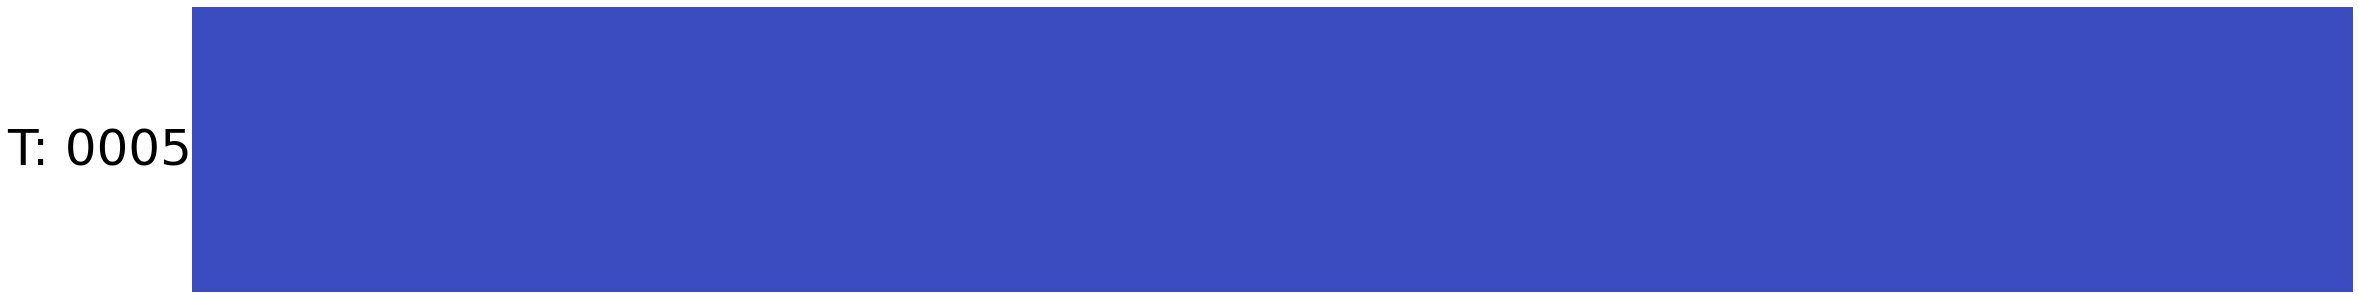

In [ ]:
posicao = np.random.randint(0,N)
estado = np.zeros((N), dtype=int)
duracao = np.zeros((N), dtype=int)

T = 100
D = 5
prob = 0
estado[posicao] = 1
duracao[posicao] = D

fig, axis = plt.subplots()
axis.imshow(np.vstack((estado,estado)), aspect='auto', vmin=0, vmax=1, cmap='coolwarm')
axis.set_axis_off()
fig.subplots_adjust(top=1, bottom=0.01, left=0, right=5)
fig.text(0,0.5, "T: %04d"%(0), va='center', ha='right', fontsize=50)
plt.show()

for t in range(1,T):
    new_estado = np.zeros((N), dtype=int)
    for n in range(N):

        if duracao[n] > 0:
            duracao[n] -= 1 # time-step
     
        indices = np.where(matriz[n,:]==1)[0] # lista de adjacência nó n
        viz_contaminado = False
        for idx in indices:
            if estado[idx] == 1: # vizinho está doente
                viz_contaminado = True
                break

        if np.random.random_sample()<=prob and viz_contaminado: # chance de contágio    
                new_estado[n] = 1
                duracao[n] = D
        else:
            if duracao[n] == 0:
                new_estado[n] = 0
            else:
                new_estado[n] = estado[n]

    estado = new_estado
    fig, axis = plt.subplots()
    axis.imshow(np.vstack((estado,estado)), vmin=0, vmax=1, aspect='auto', cmap='coolwarm')
    axis.set_axis_off()
    fig.subplots_adjust(top=1, bottom=0.01, left=0, right=5)
    fig.text(0,0.5, "T: %04d"%(t), va='center', ha='right', fontsize=50)
#     fig.text(0,0,"Tempo", name, va='center', ha='right', fontsize=10)

    plt.show()
    if len(np.nonzero(estado)[0]) == 0:
        break
    


Com a probabilidade igual a 0, temos que o primeiro infectado não é capaz de propagar a nenhum outro vértice. Portanto, a duração dessa rede (T) é igual ao número de dias de recuperação (D), nesse caso, 5.



---

##Simulação 04 - Quantidade incial de vértices infectados

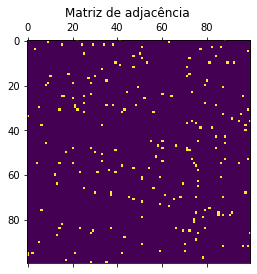

In [ ]:
#Parâmetros do grafo
N=100       #Número de vértices
grauMedio=4 #Grau médio
a = grauMedio*N//2 #número de arestas

matriz = np.zeros((N,N), dtype=int)

numeroArestas=0
while (numeroArestas <= a):
  vertice1 = np.random.randint(0, N)
  vertice2 = np.random.randint(0, N)
  matriz[vertice1, vertice2] = 1
  numeroArestas+=1


plt.matshow(matriz)
plt.suptitle('Matriz de adjacência')
plt.show()

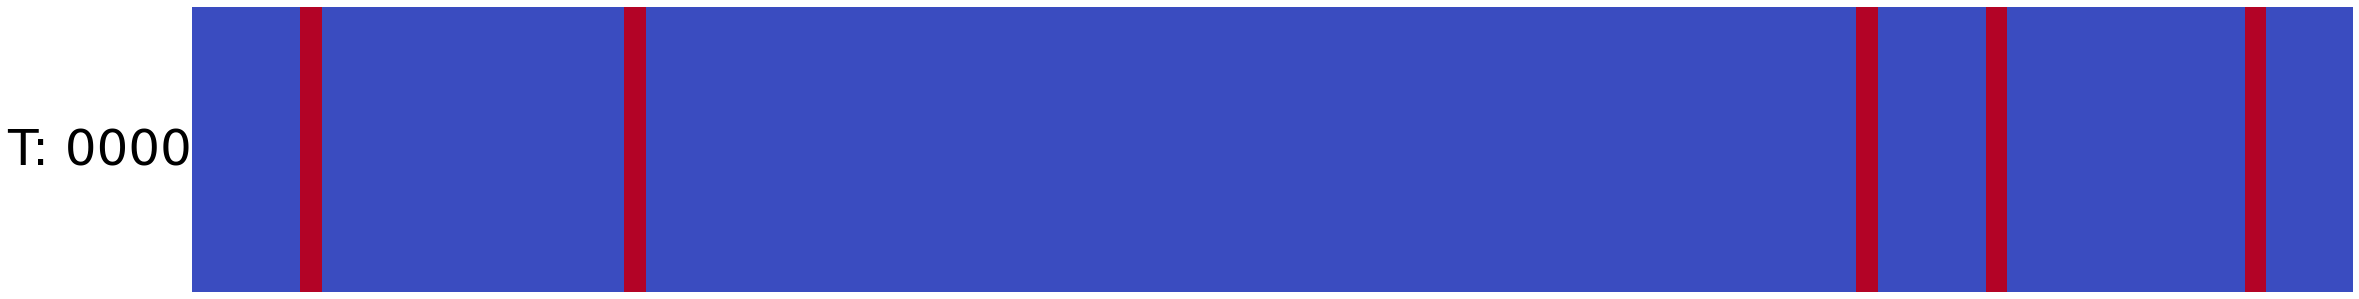

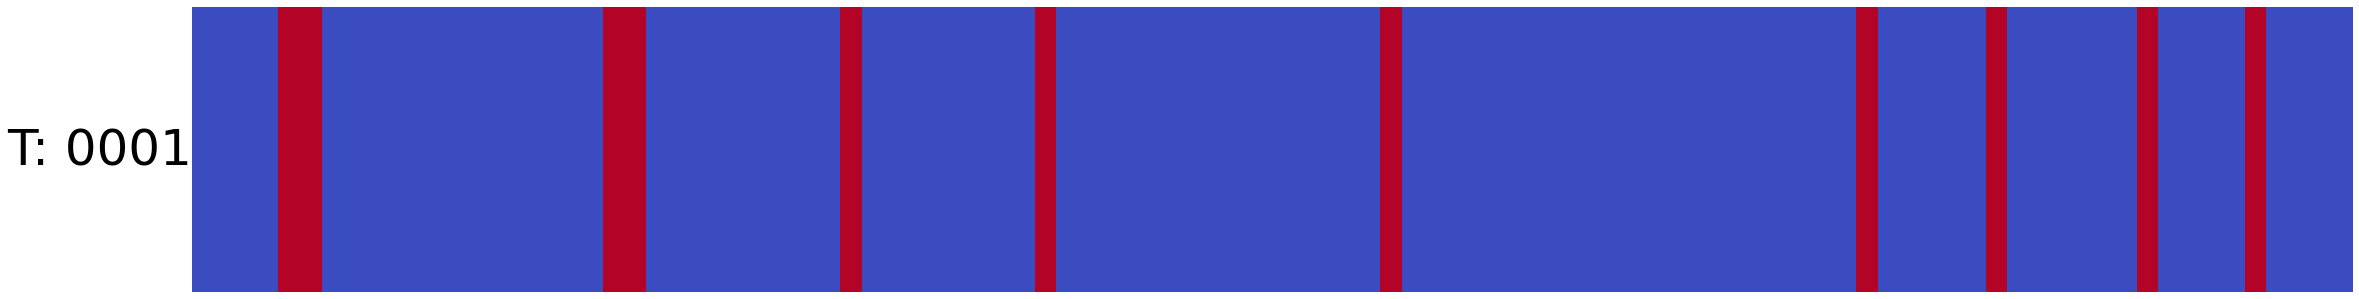

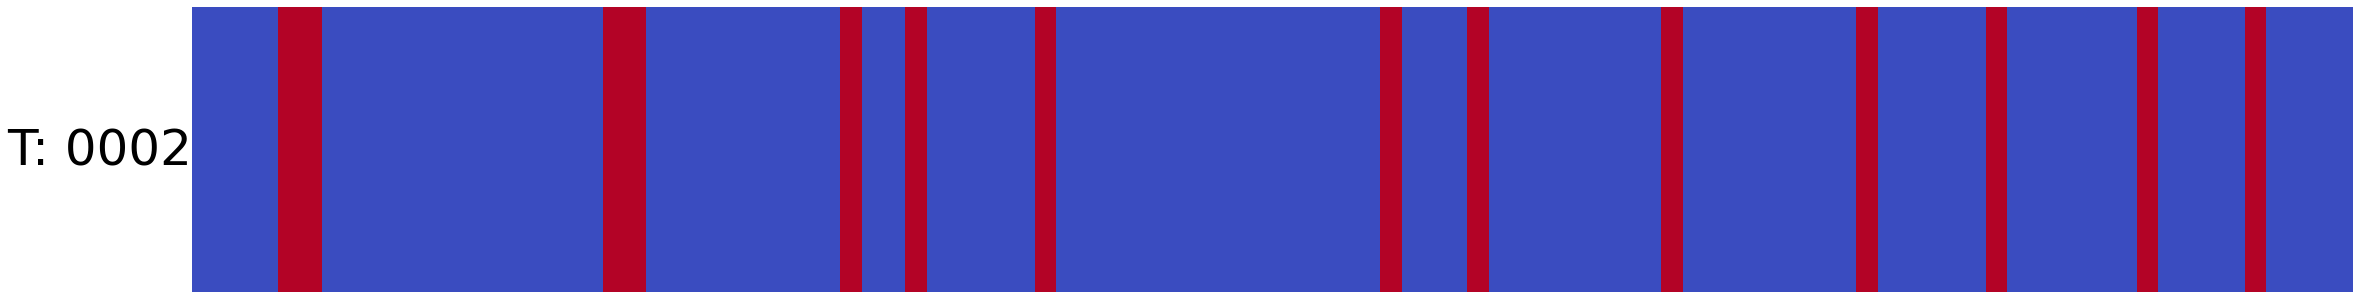

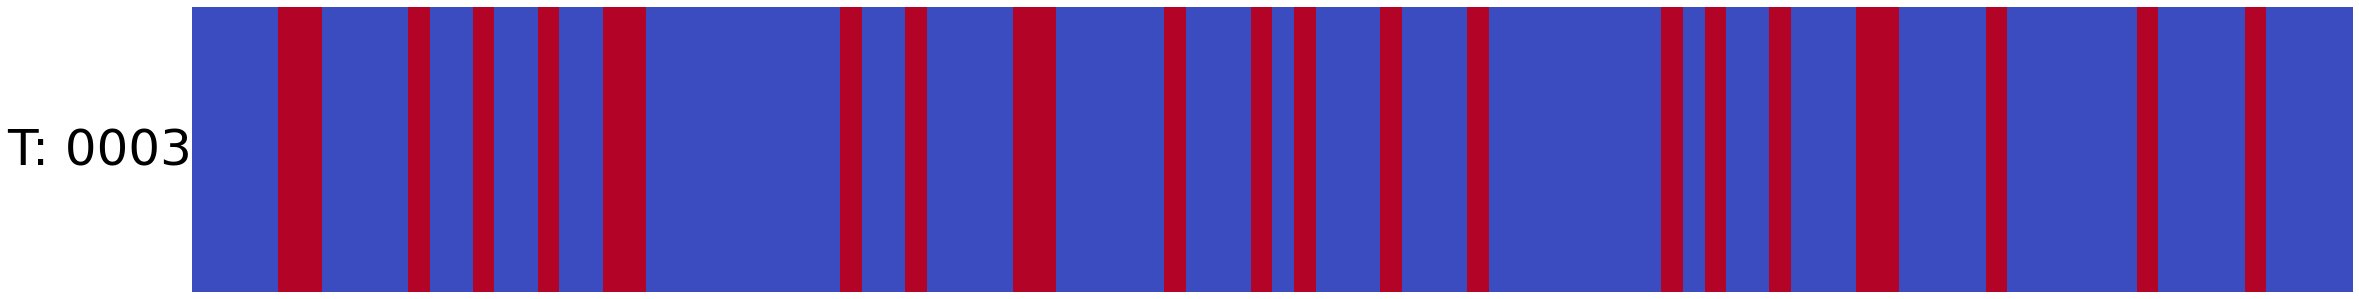

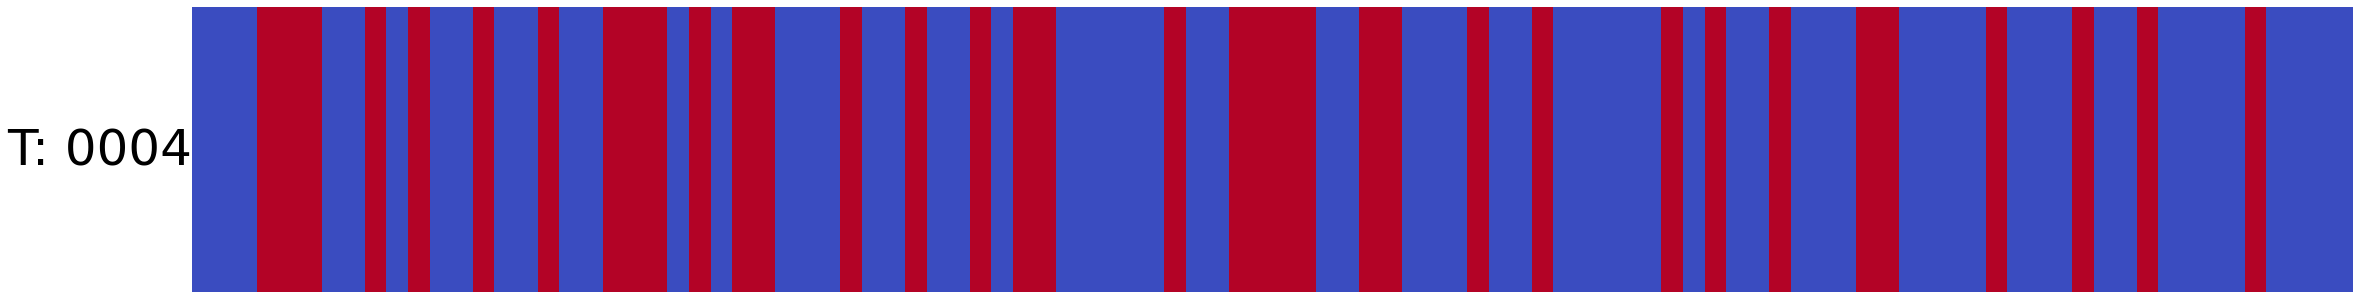

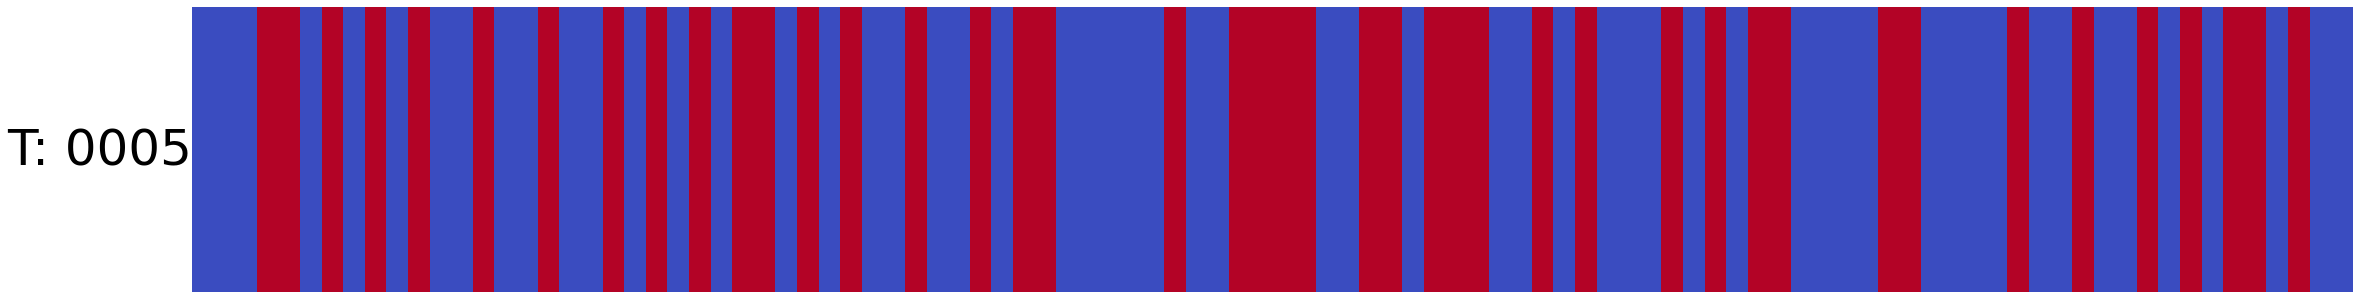

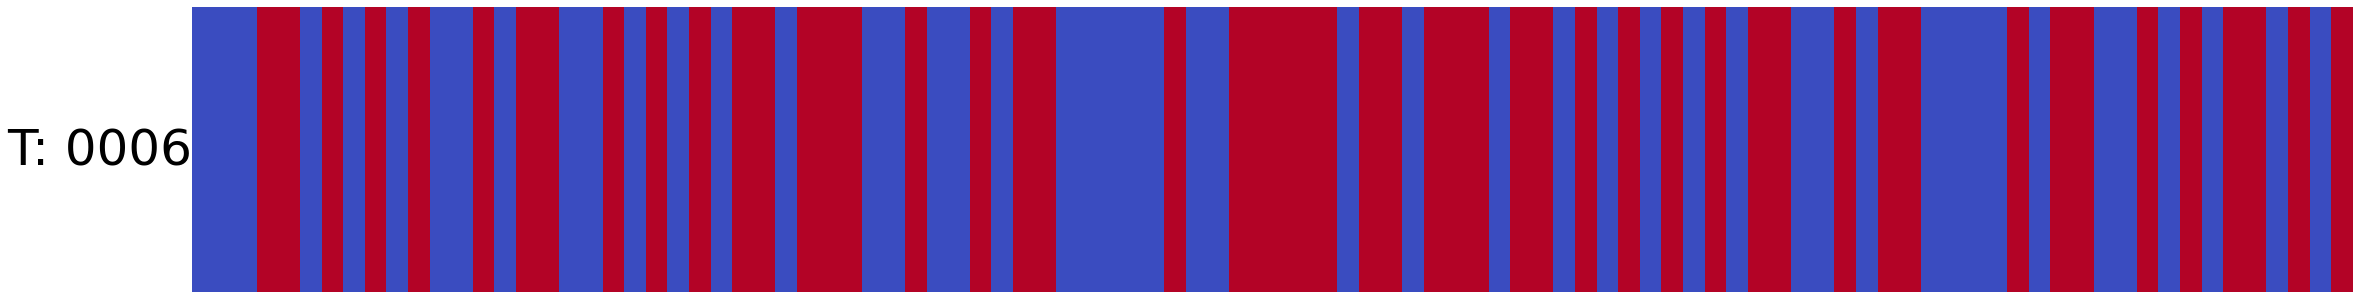

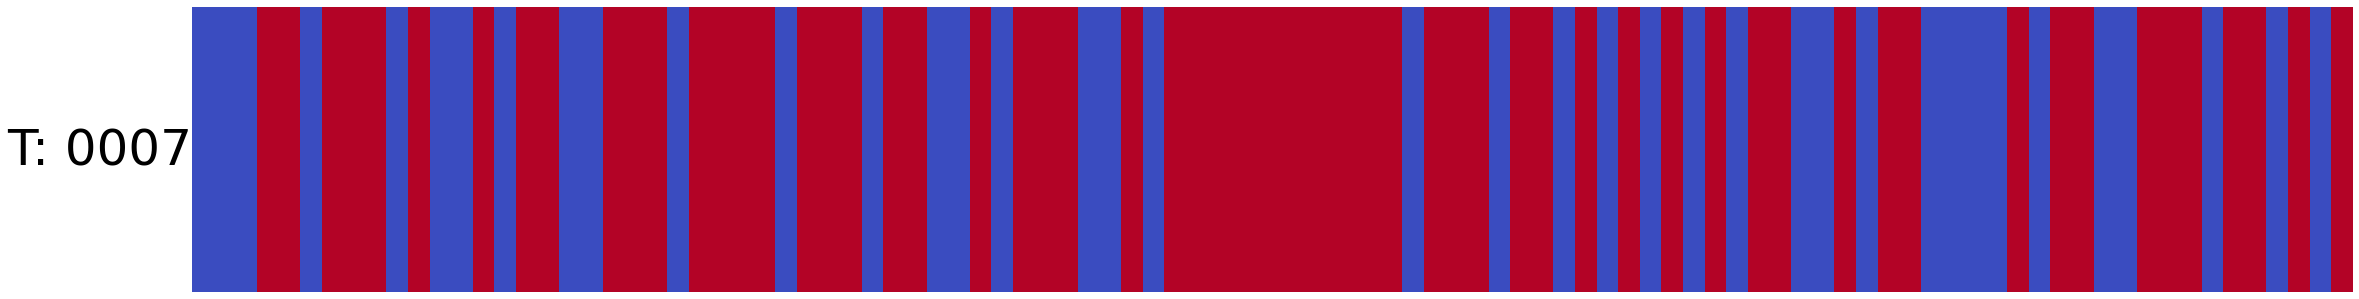

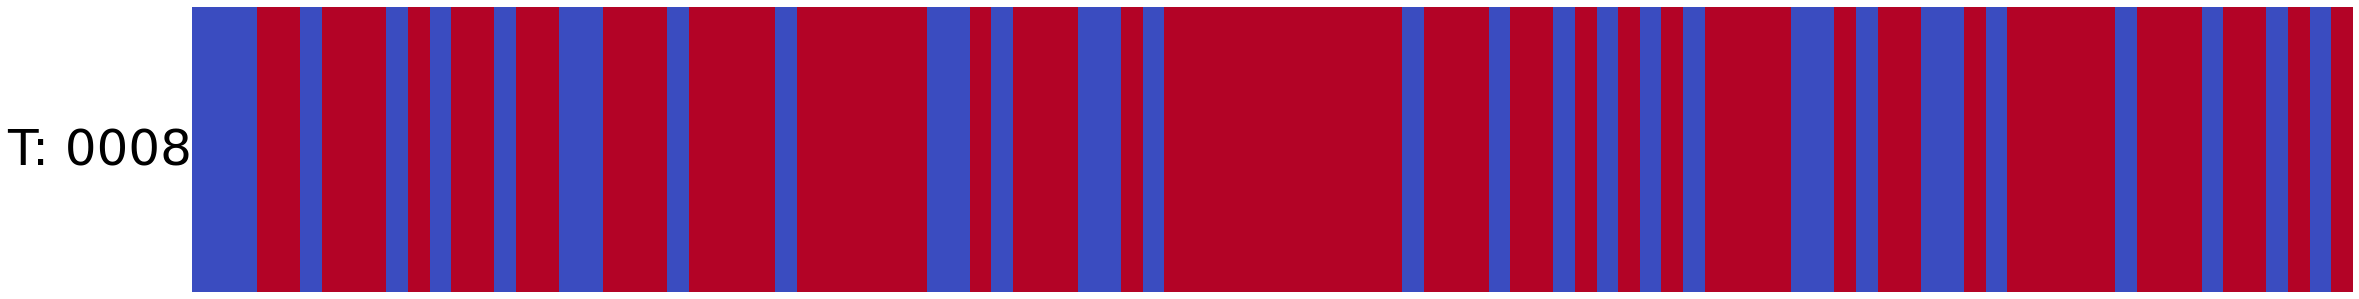

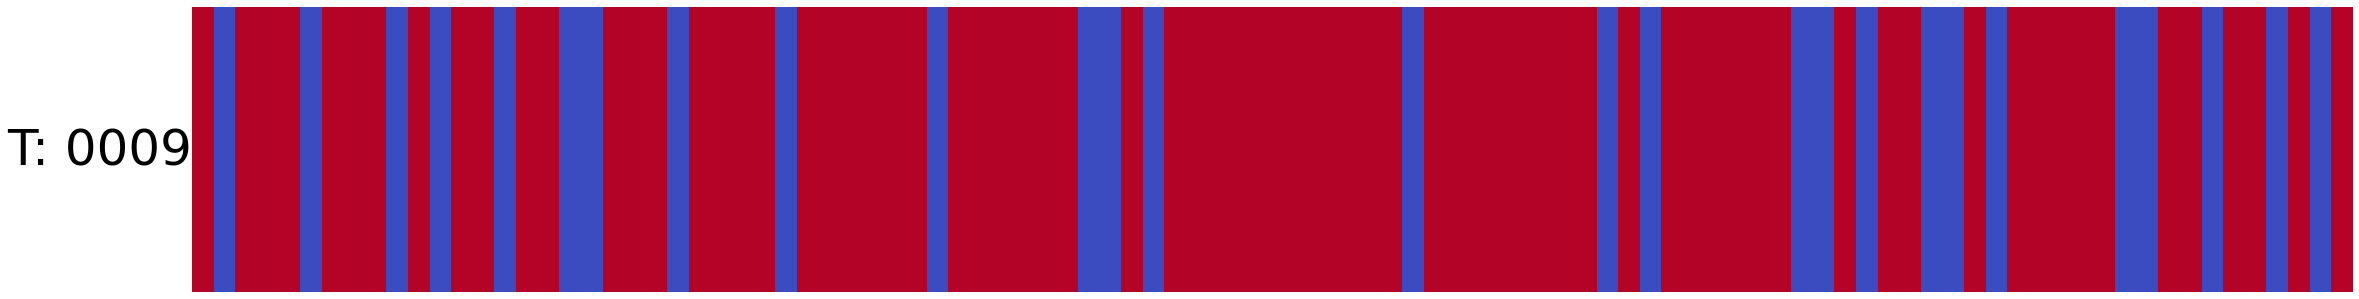

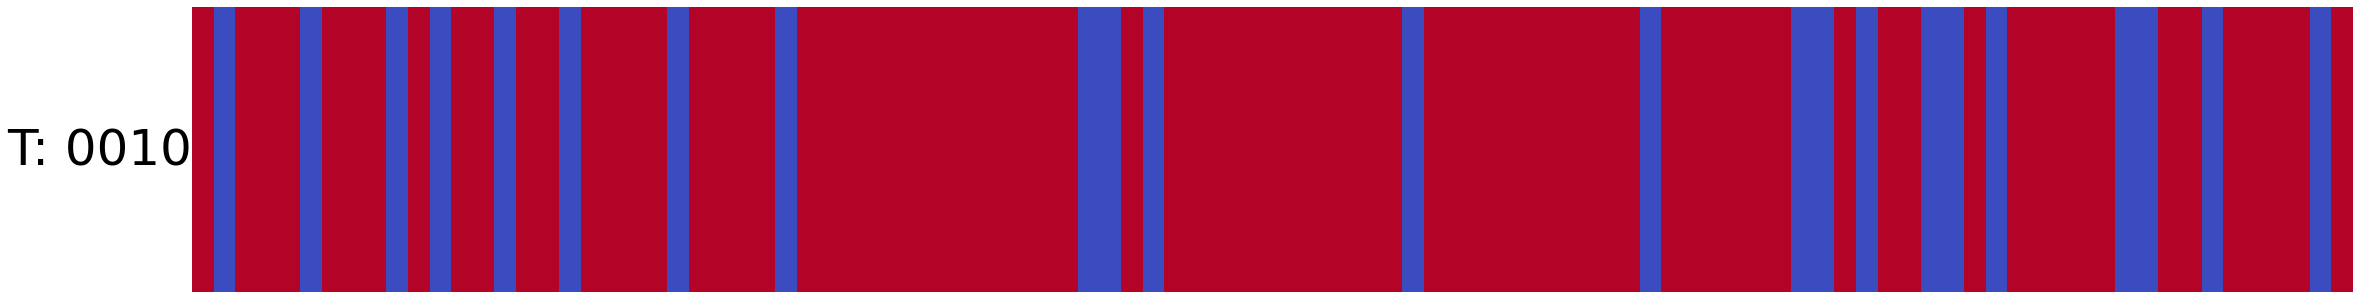

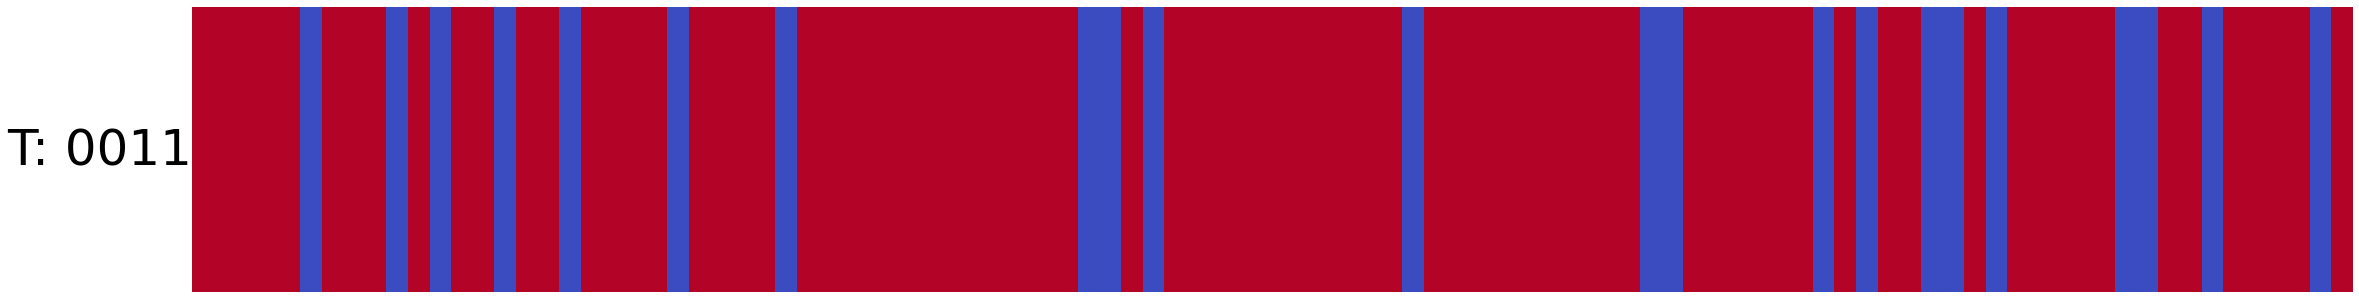

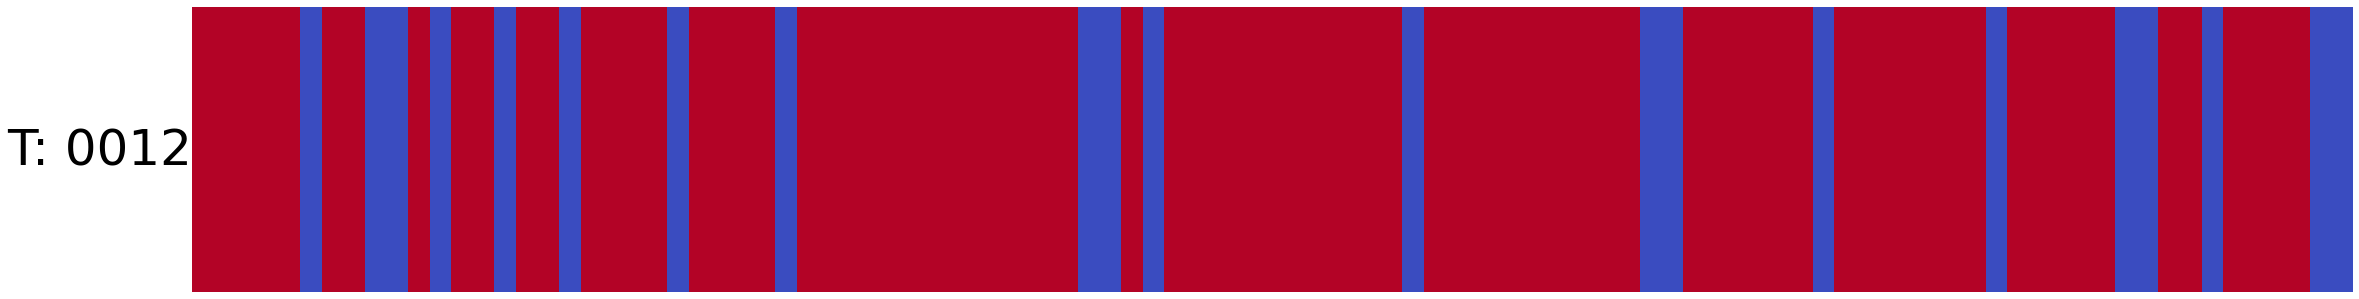

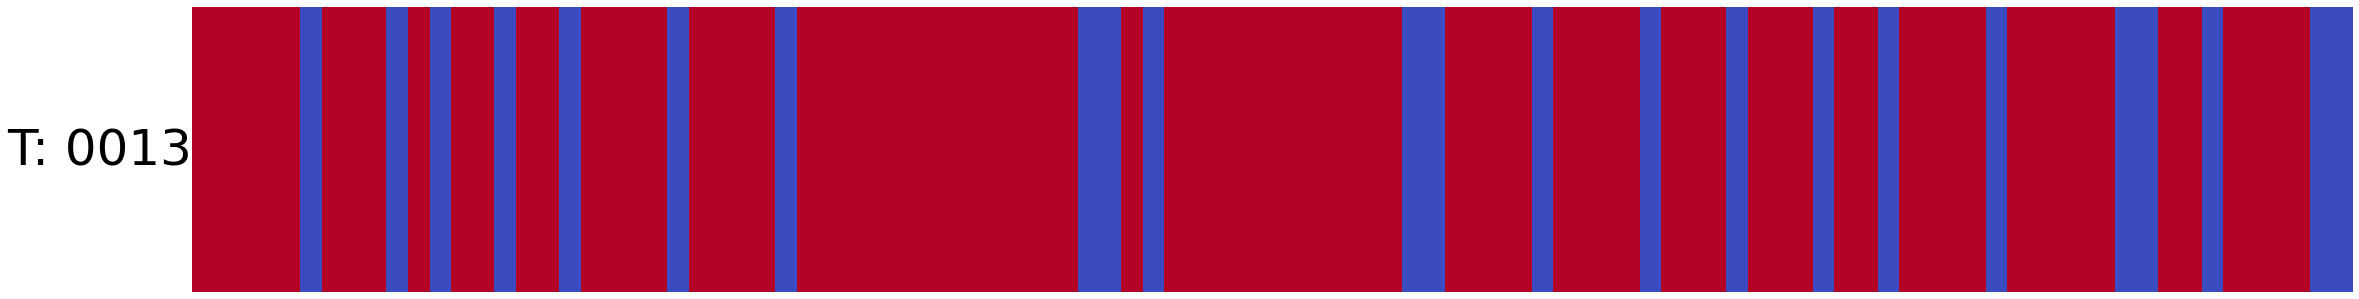

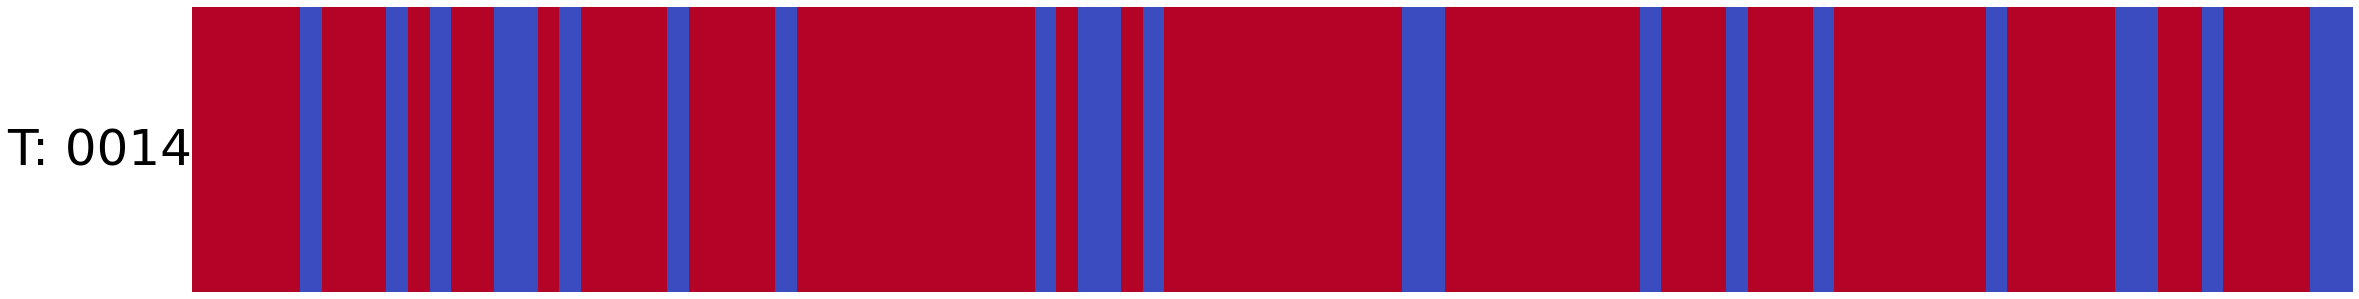

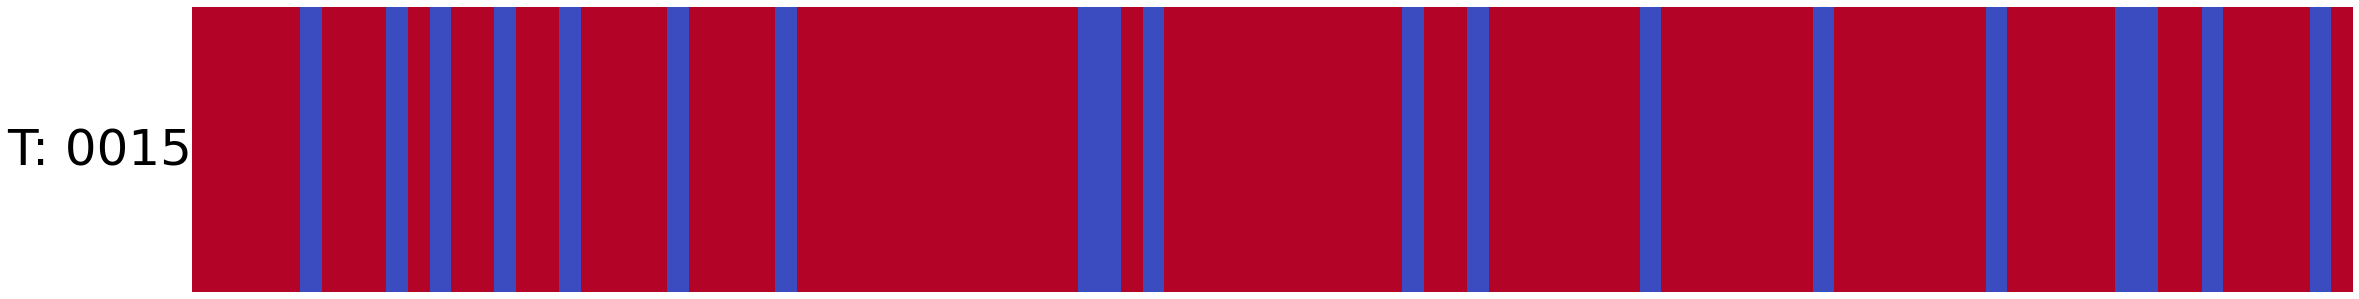

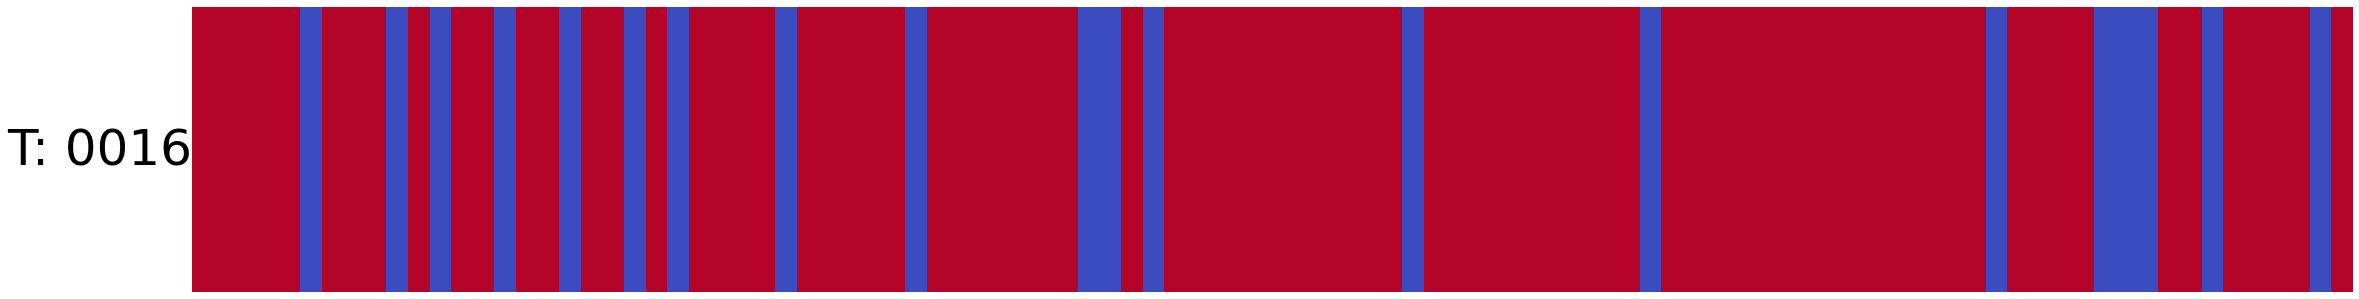

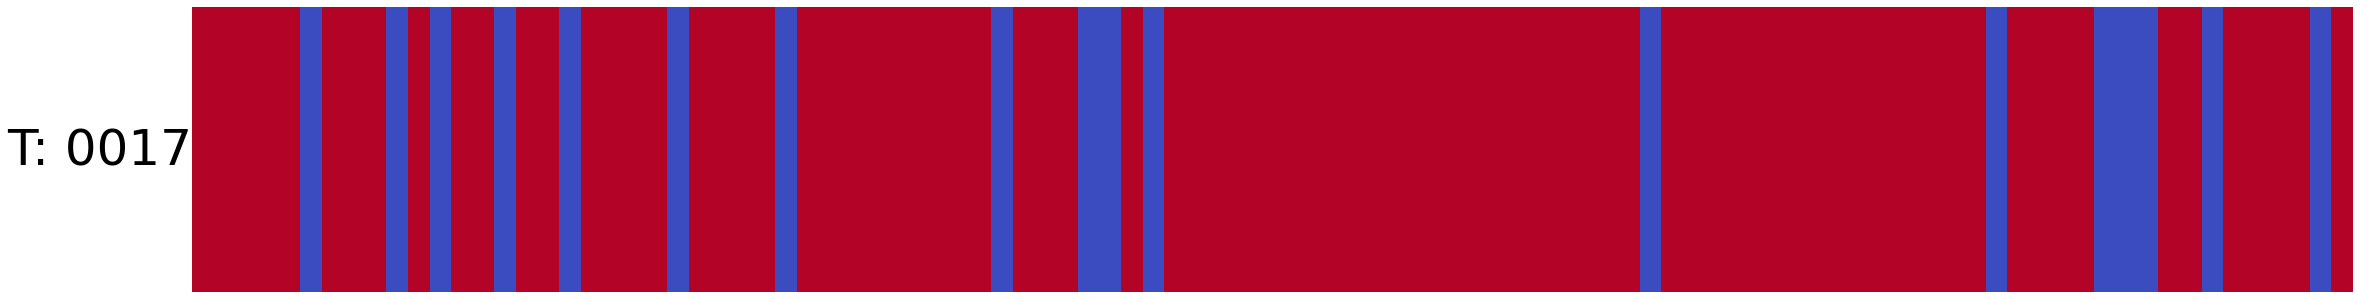

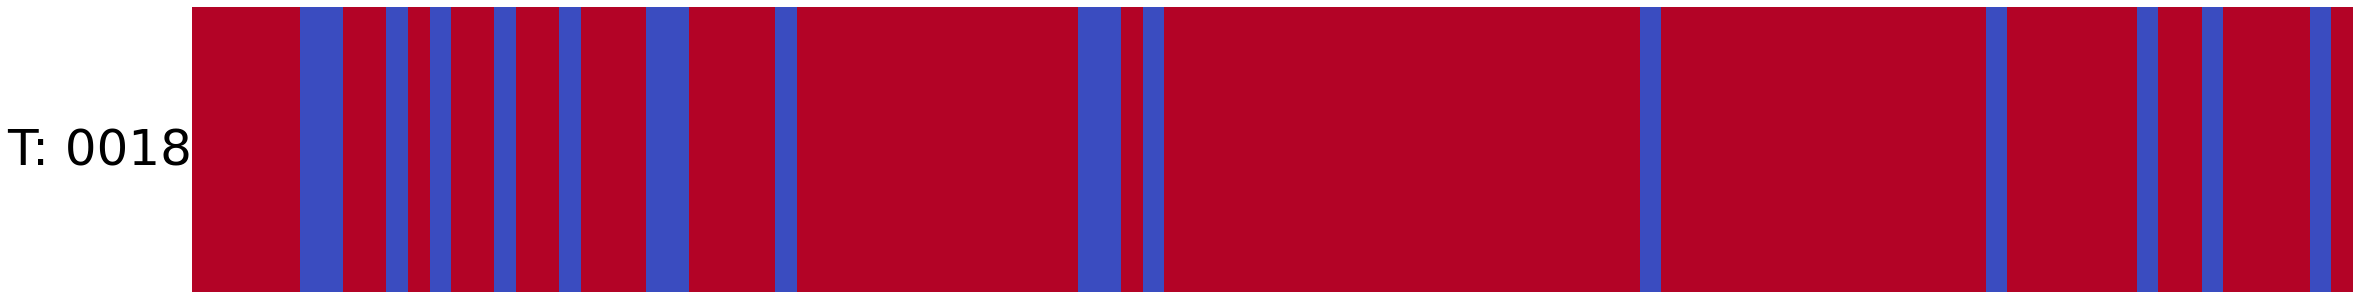

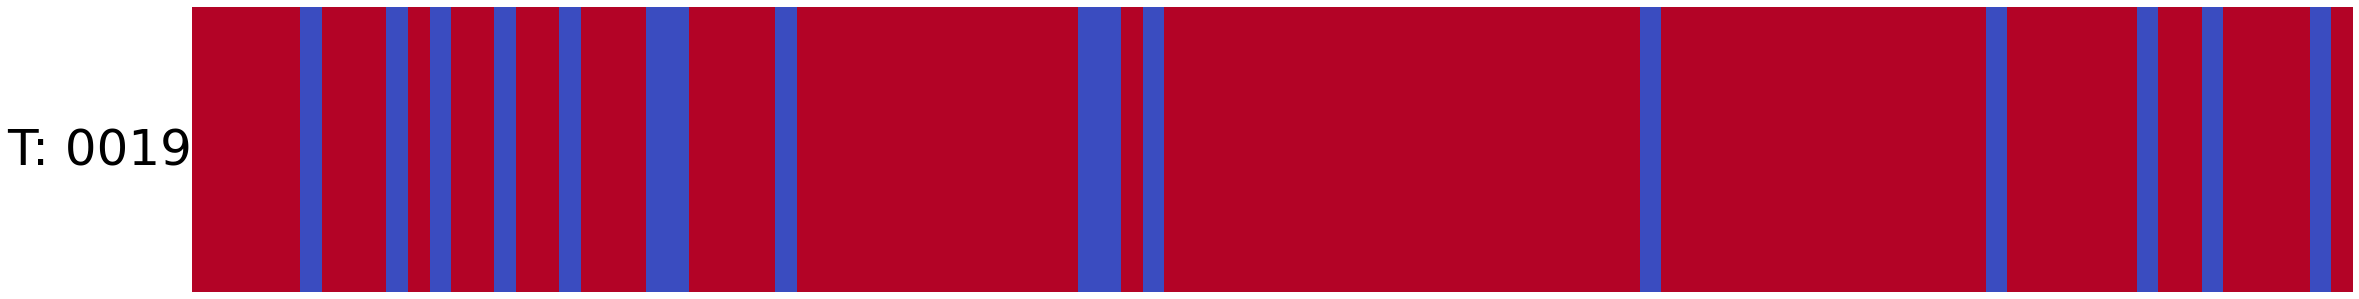

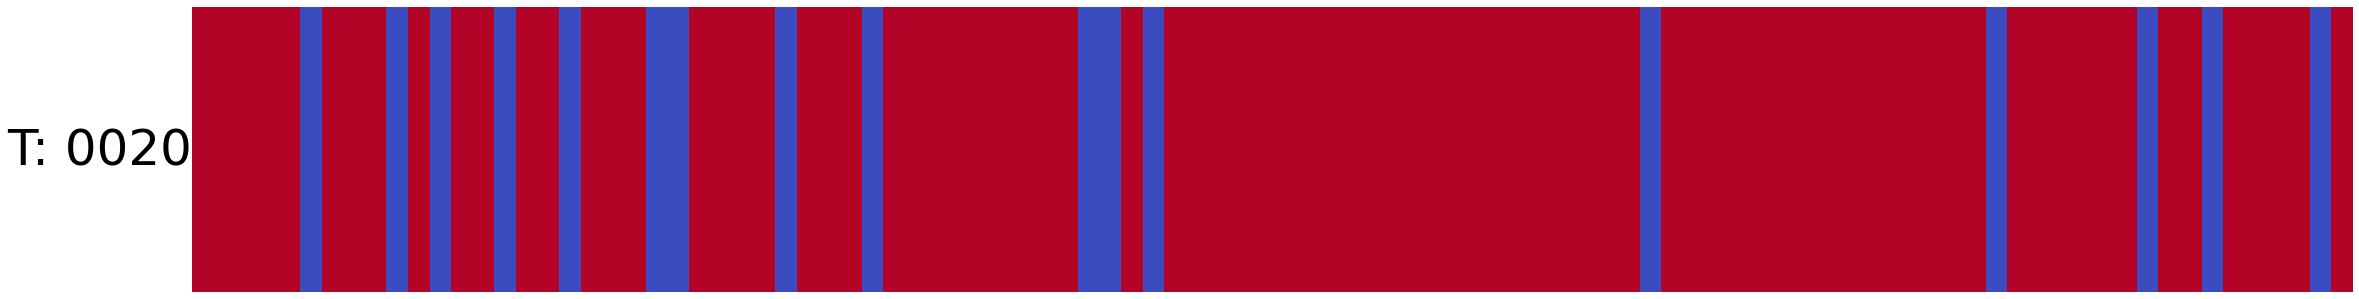

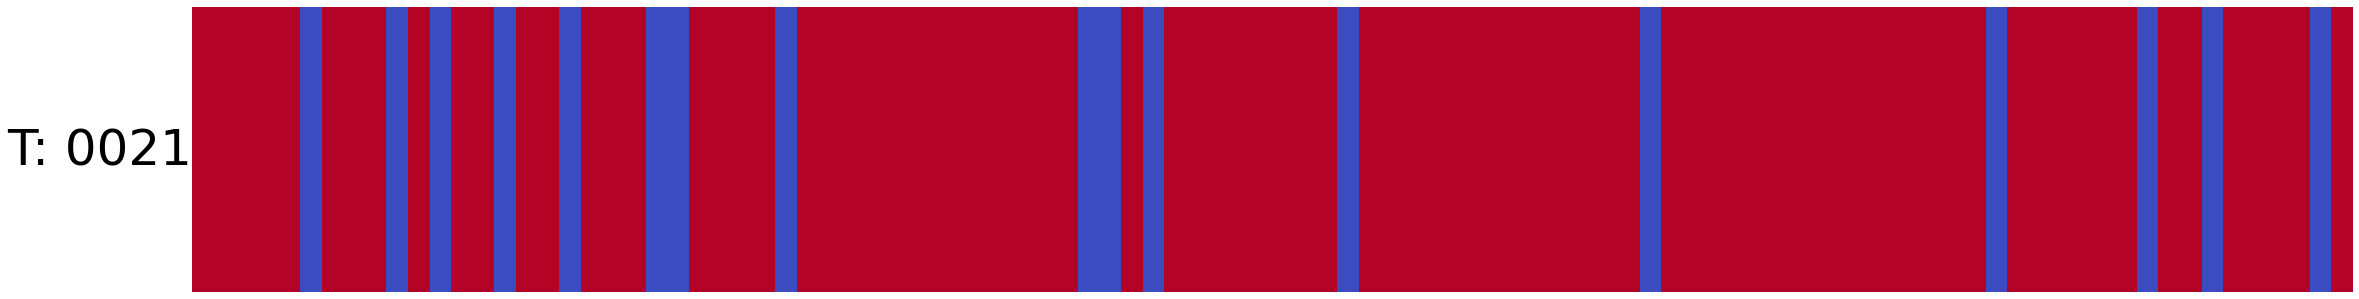

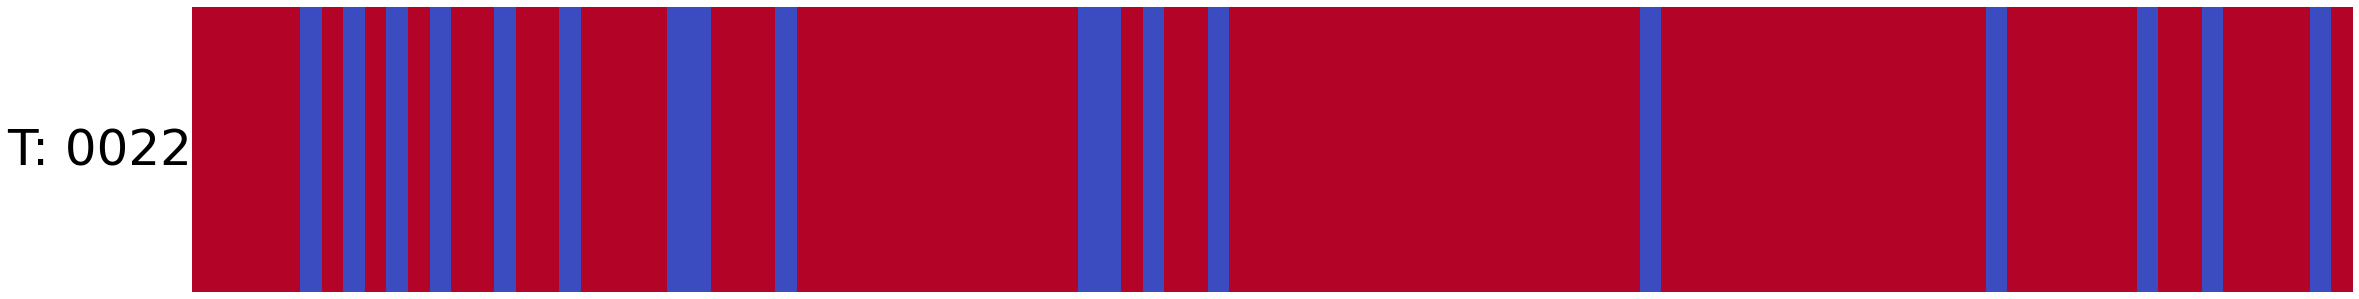

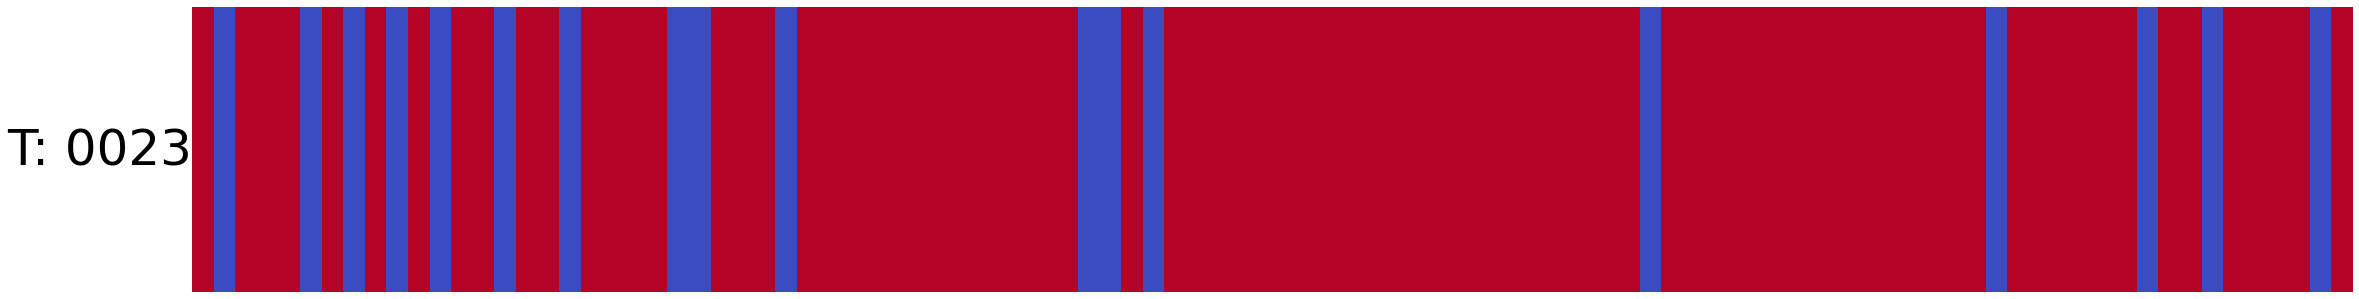

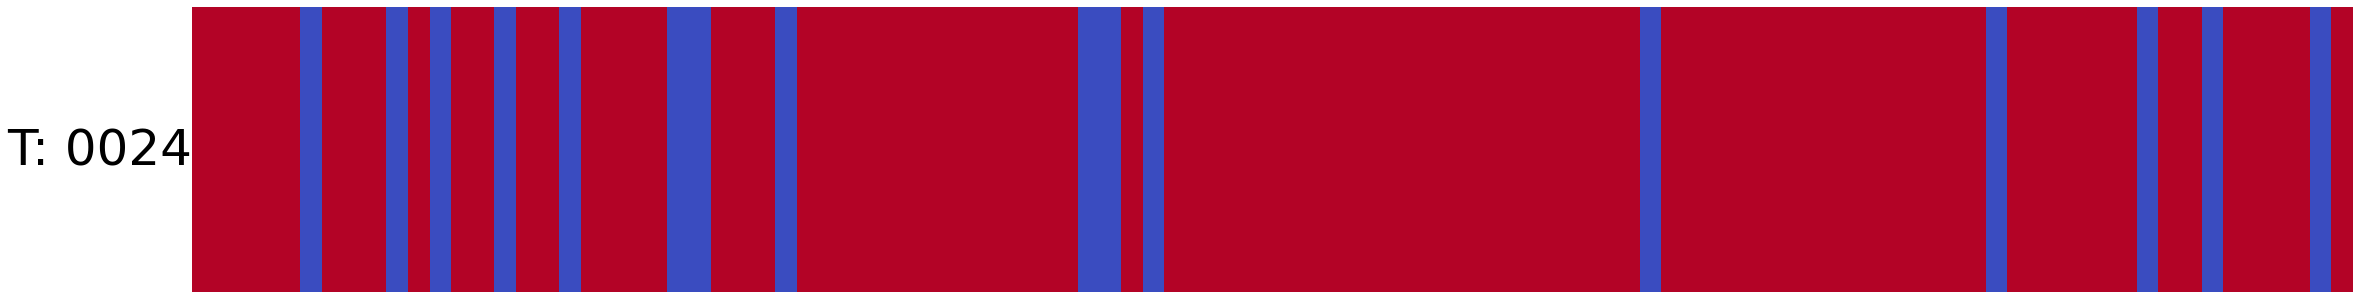

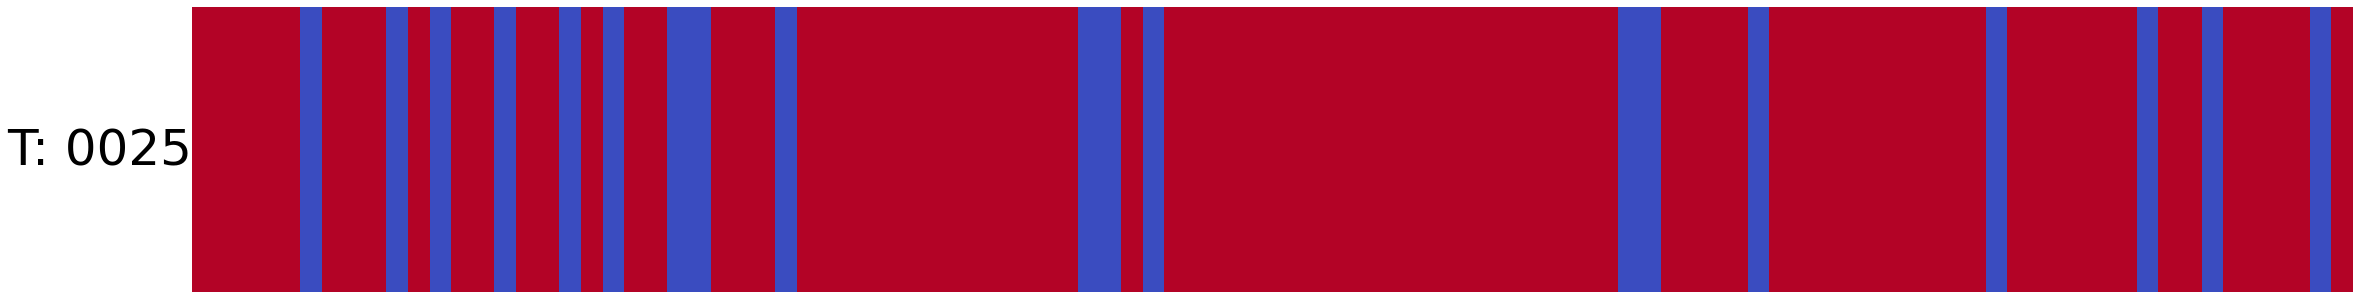

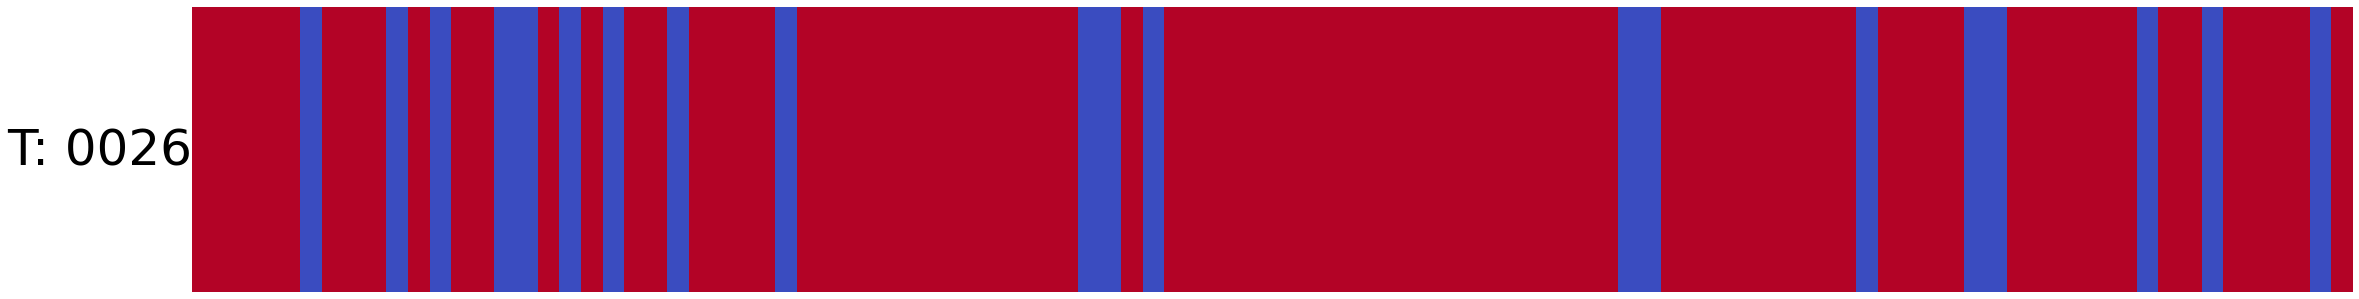

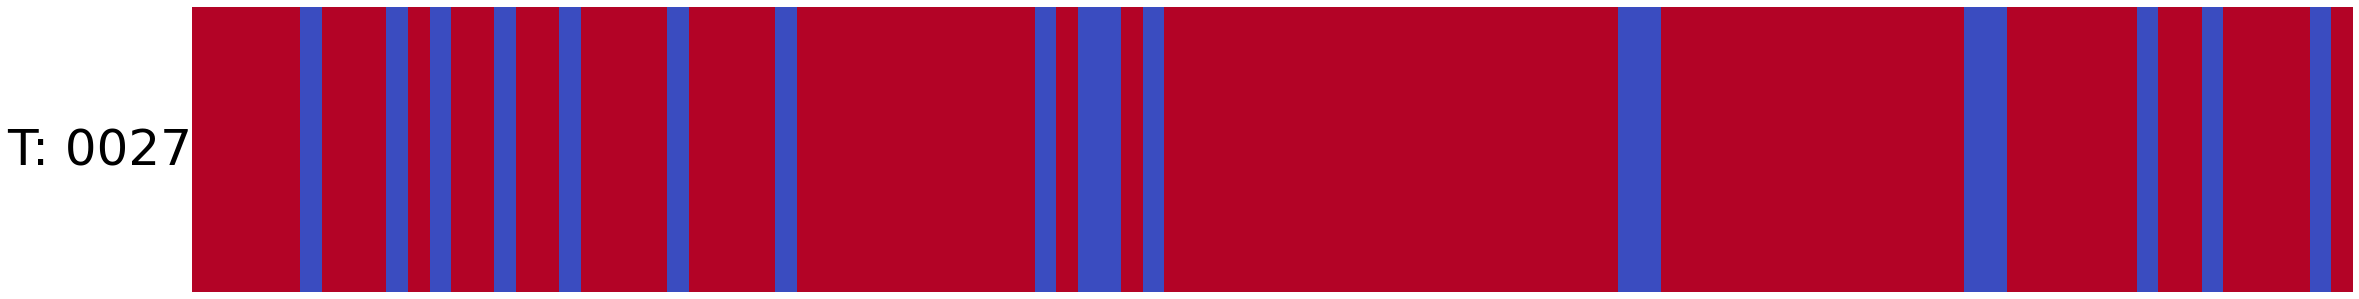

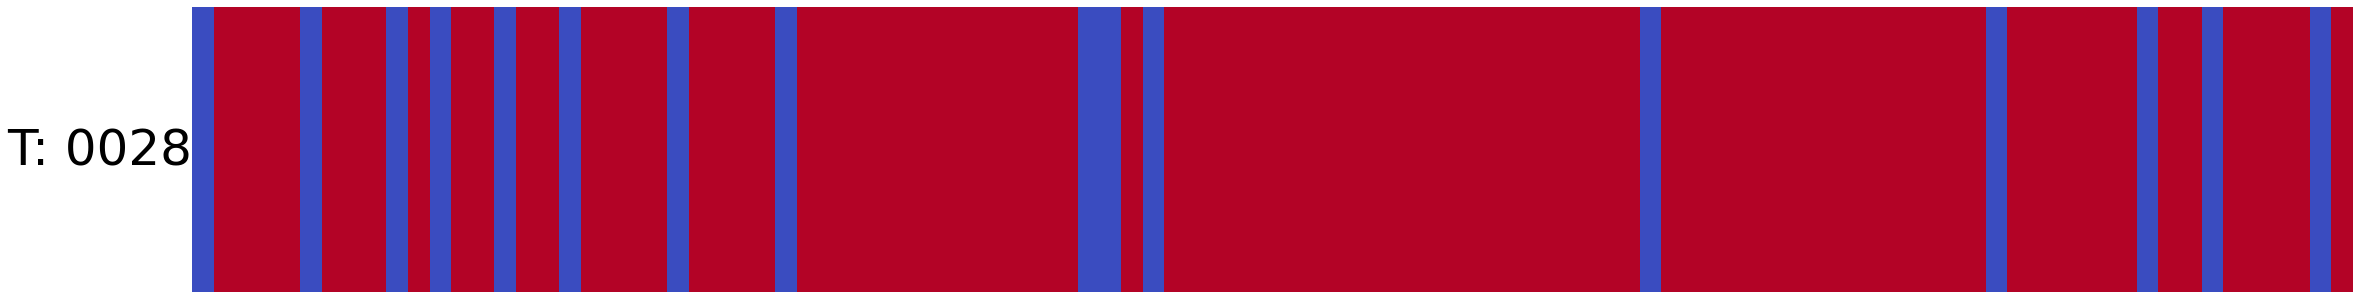

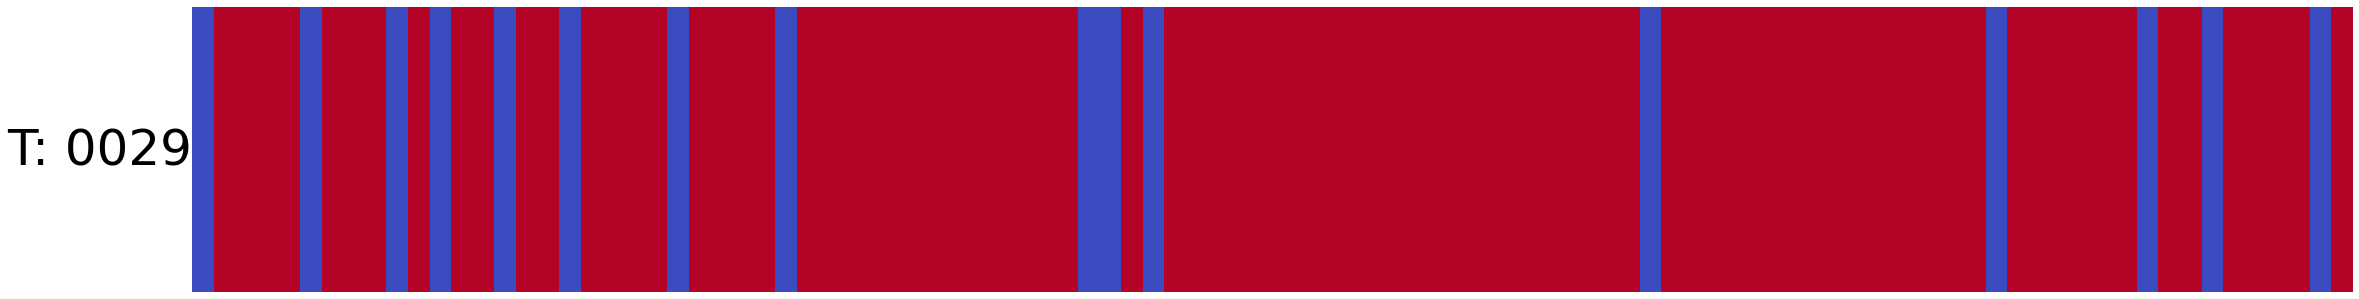

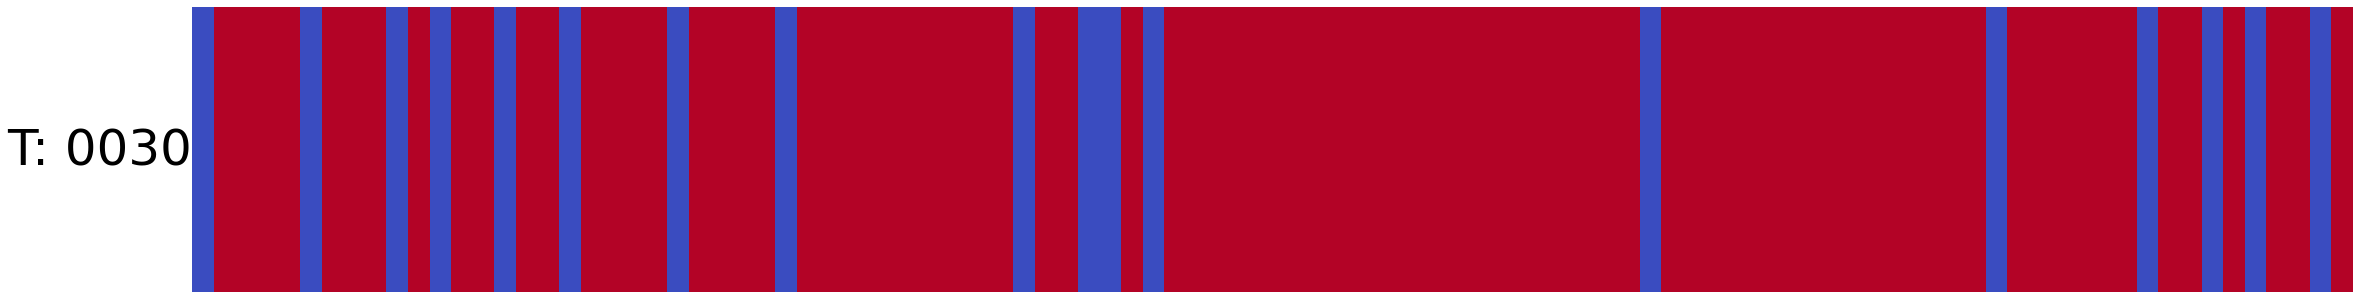

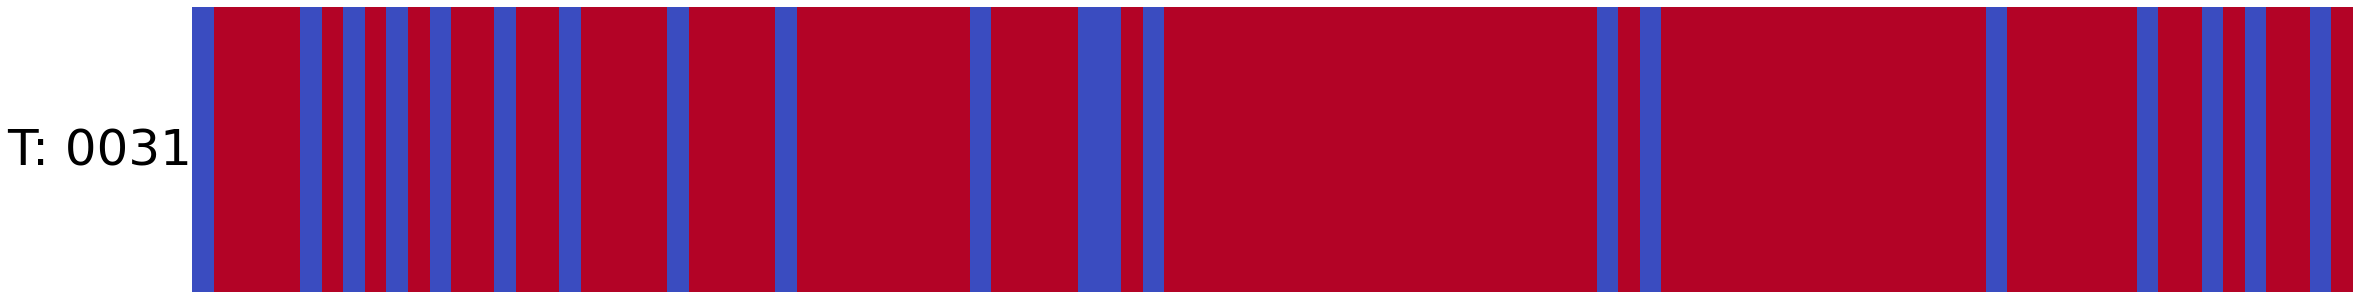

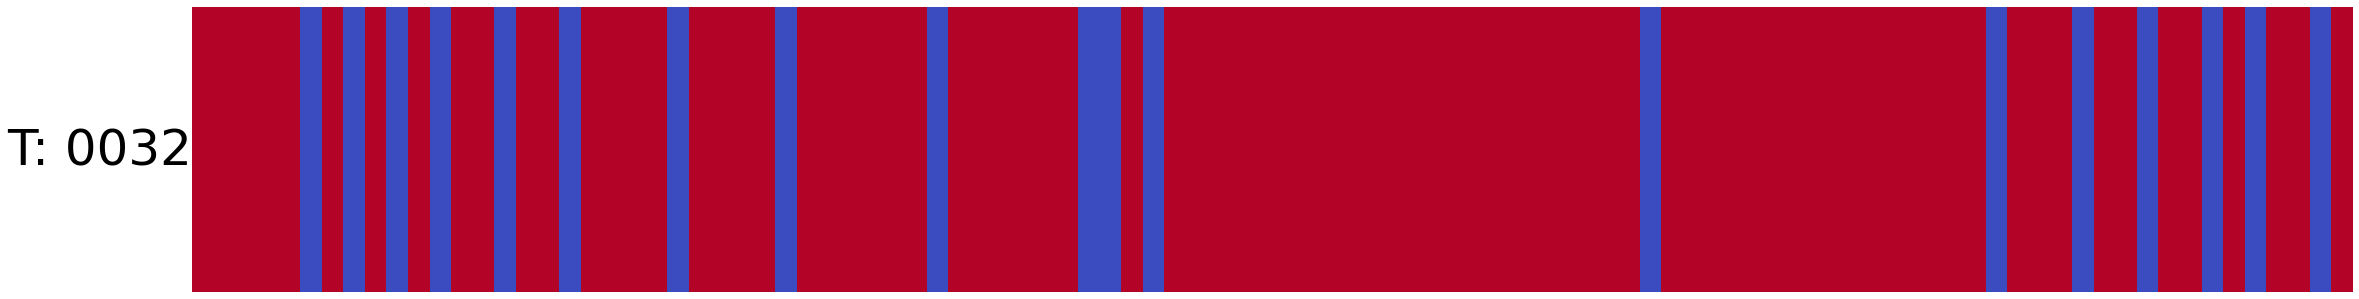

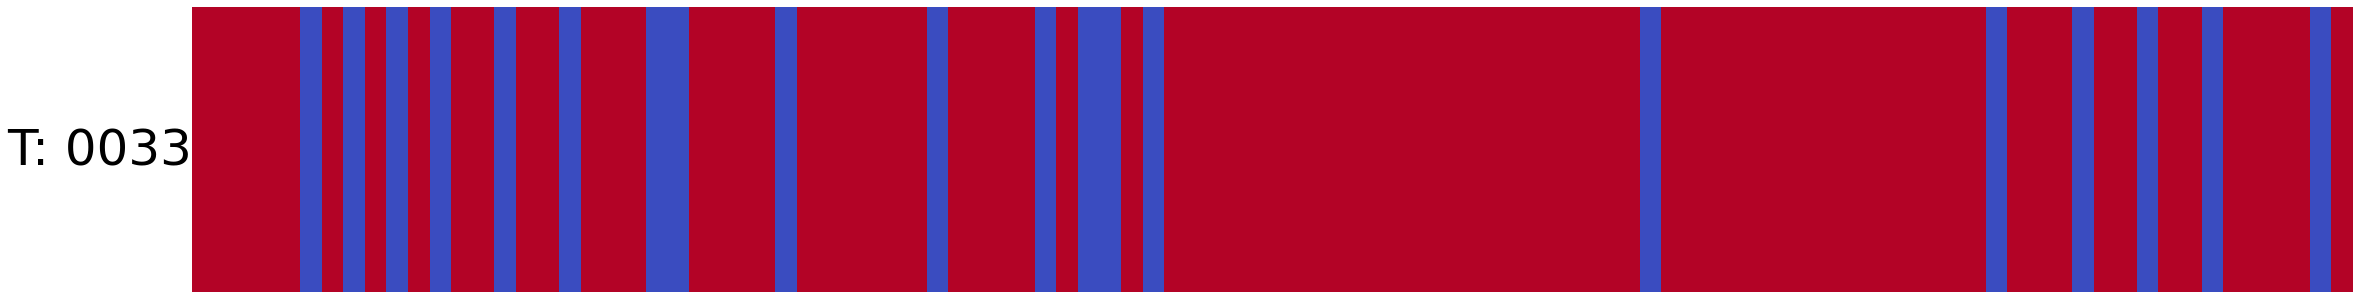

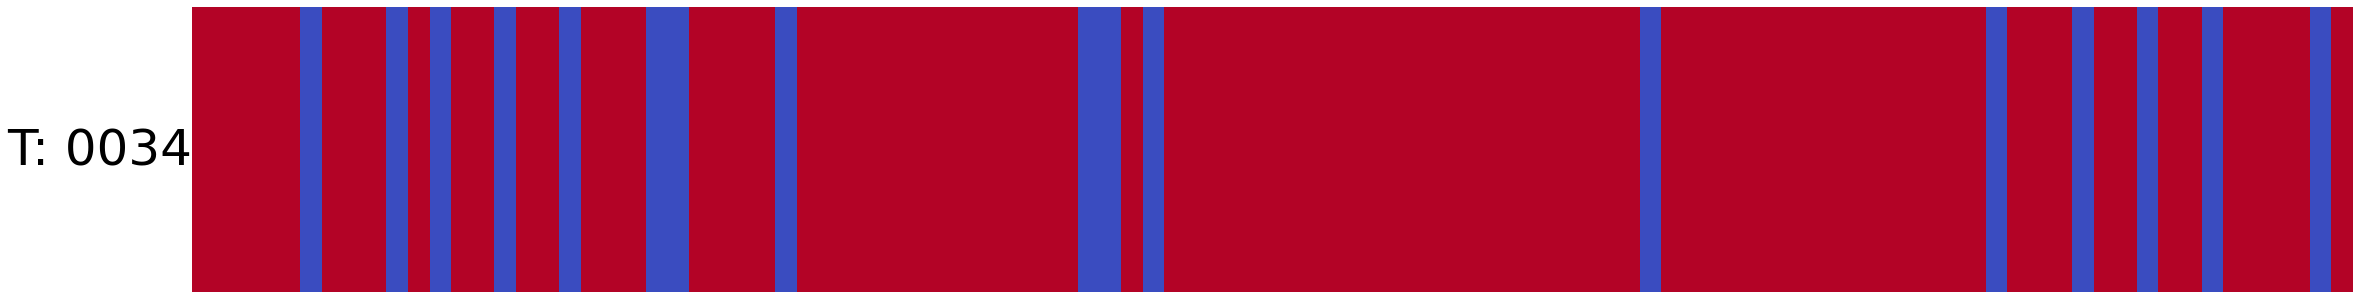

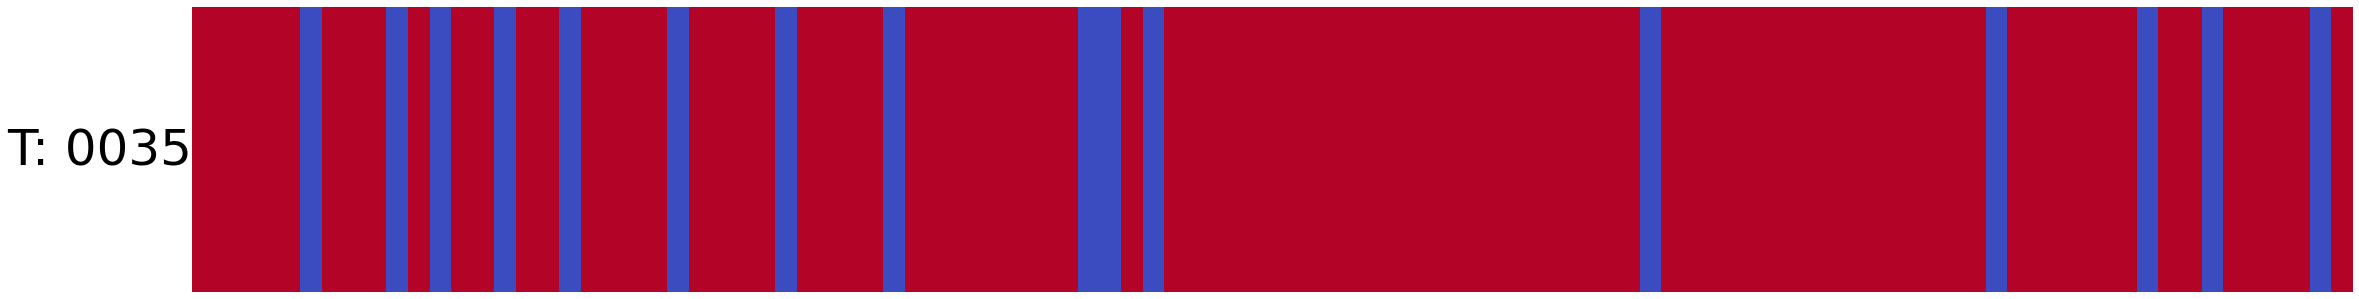

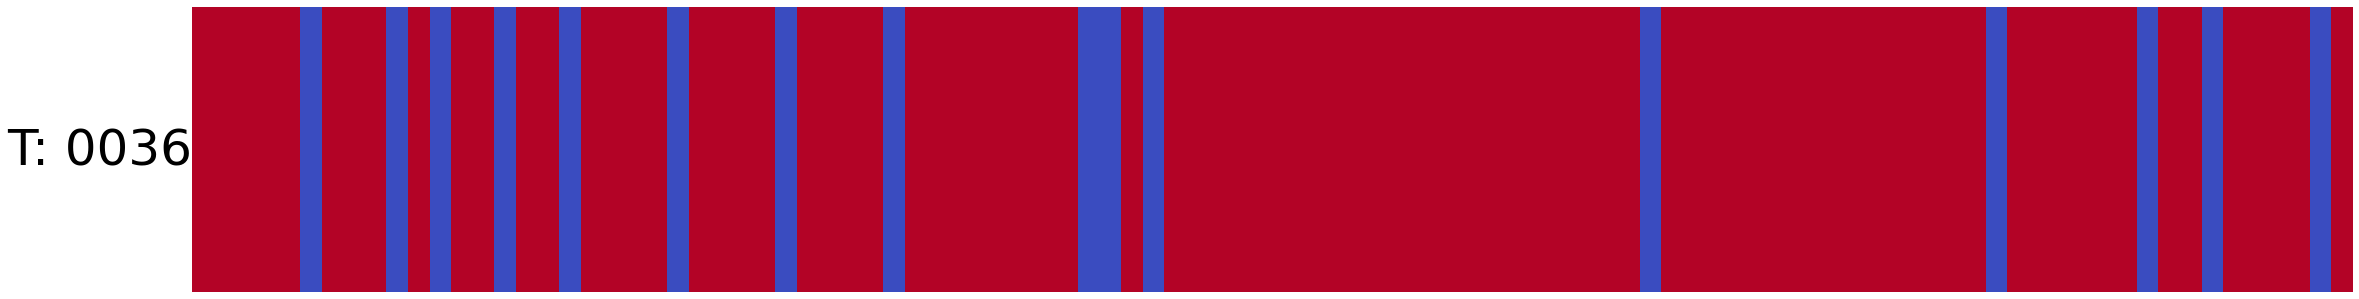

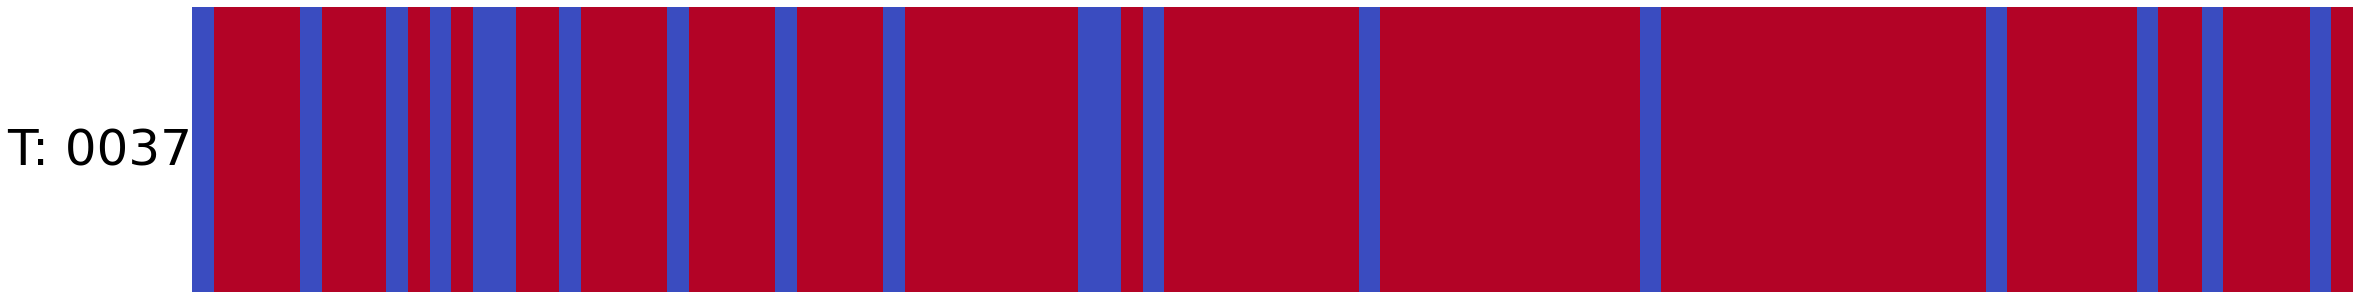

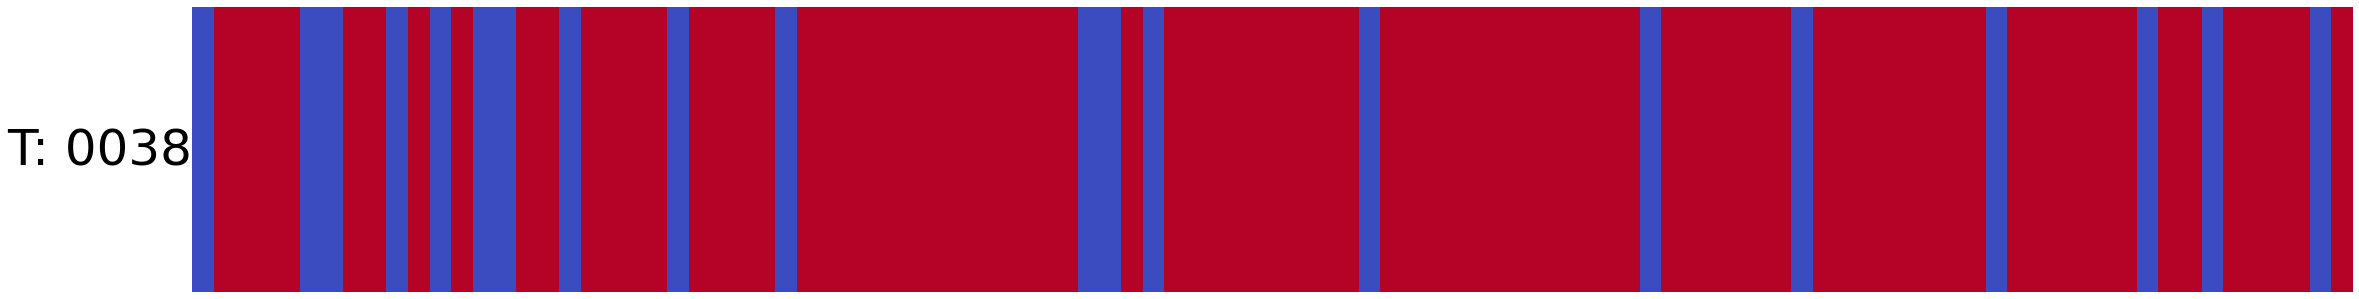

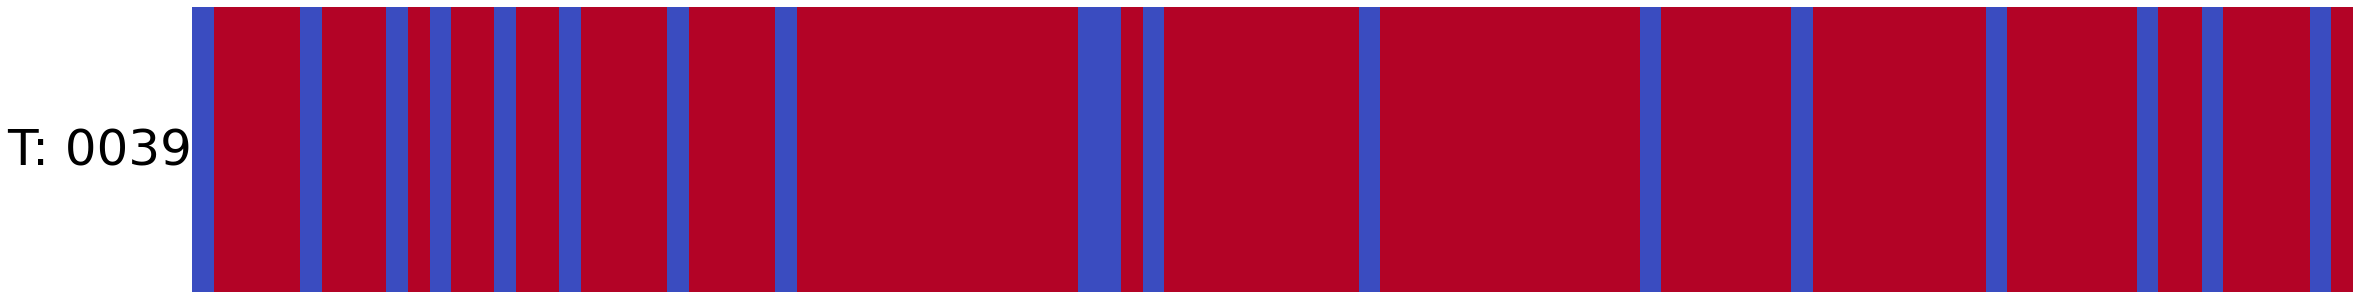

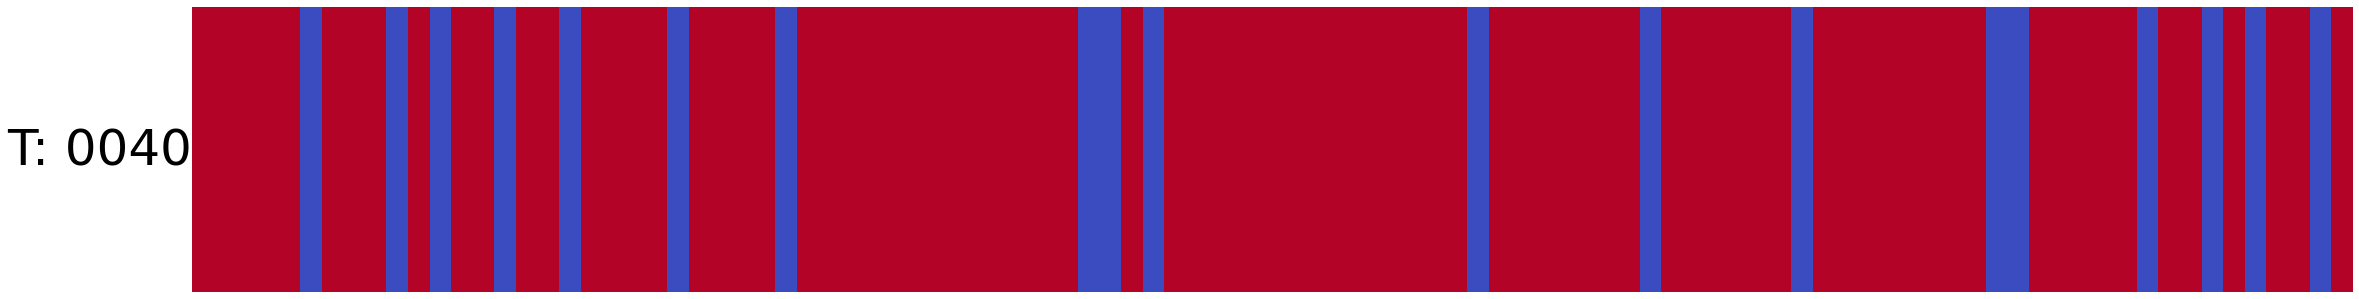

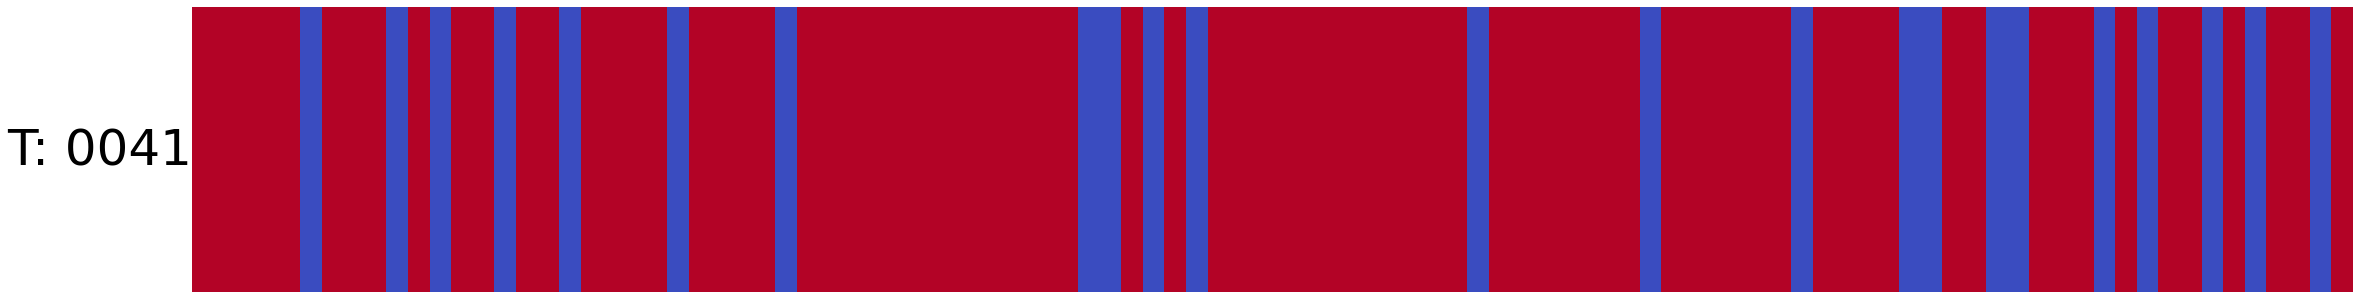

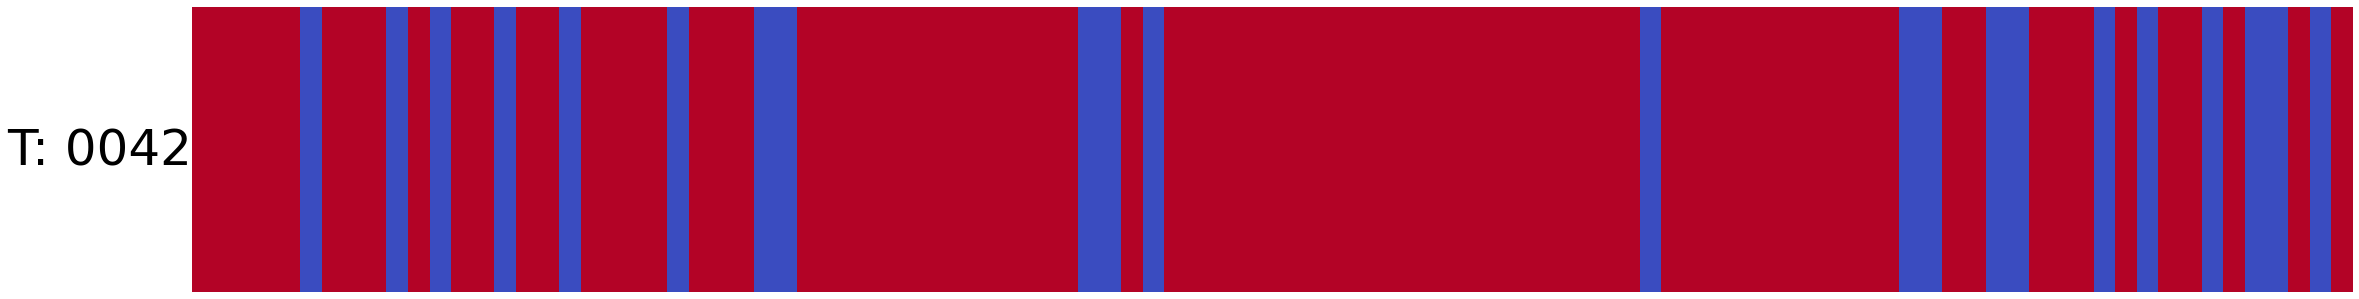

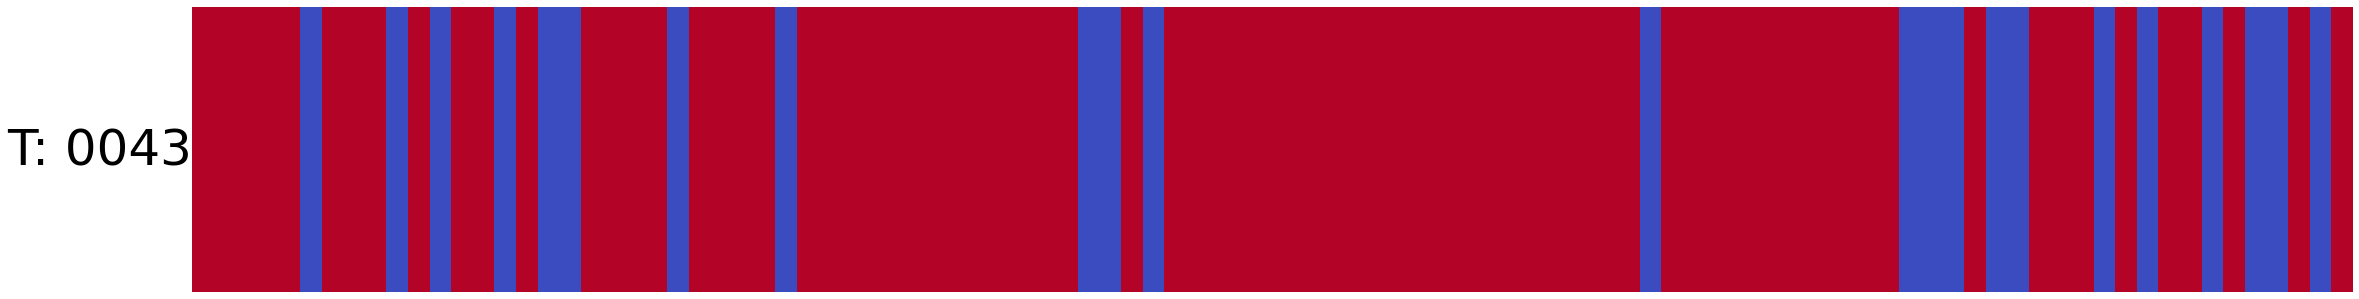

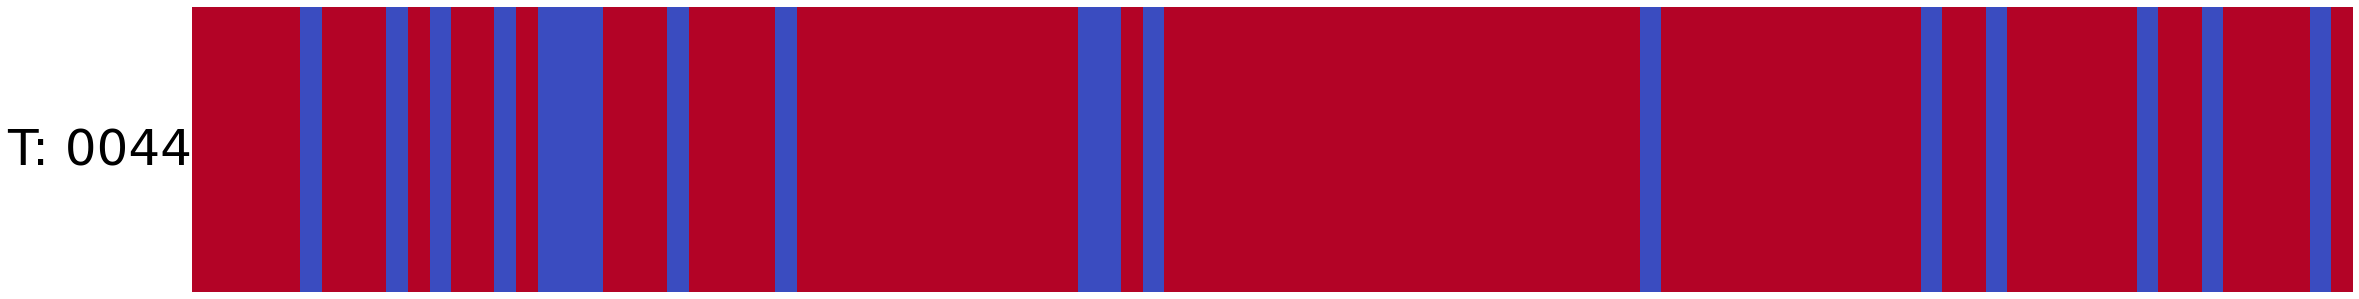

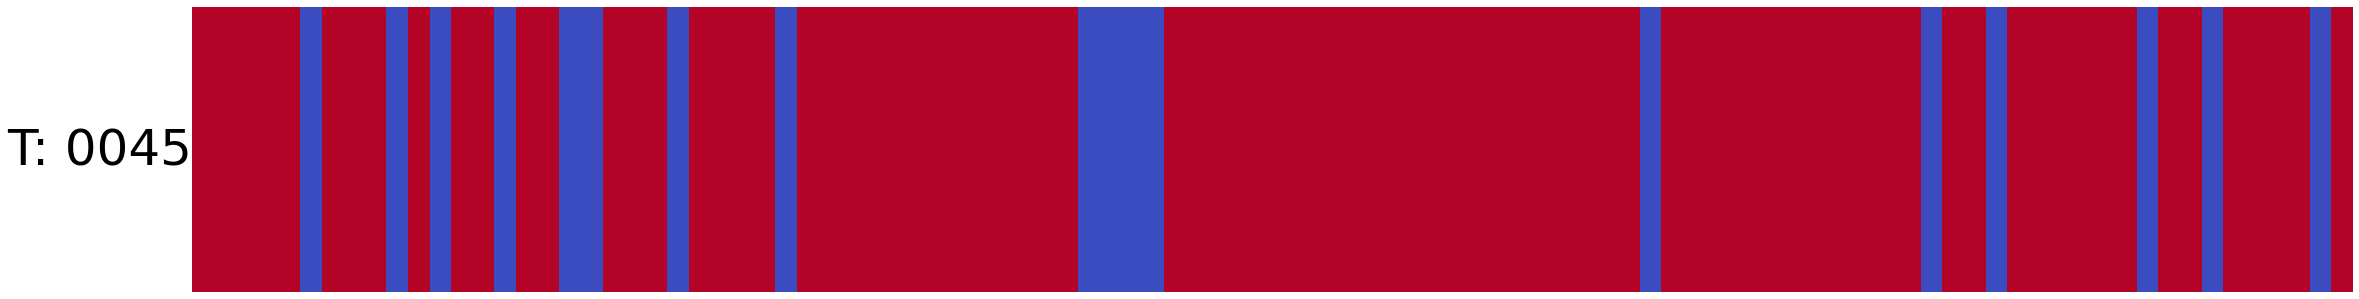

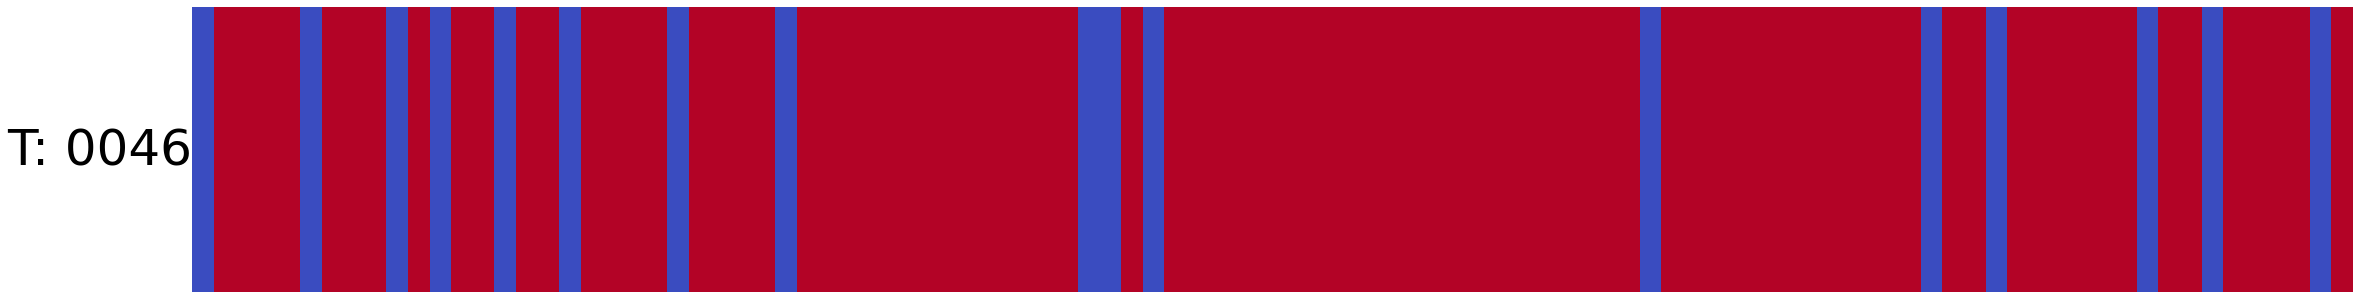

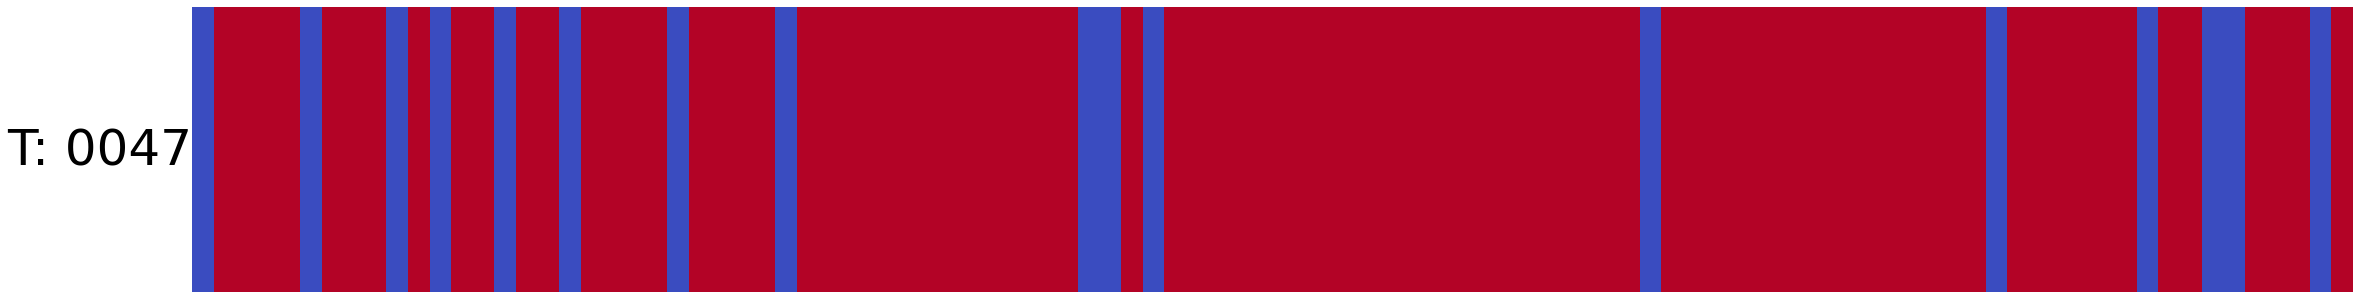

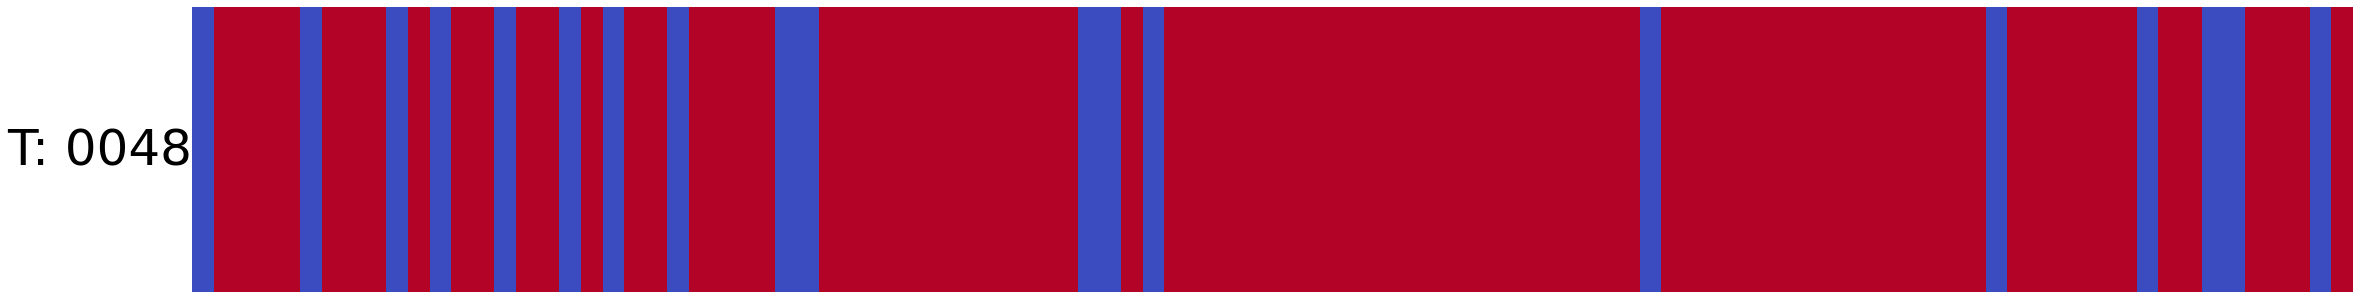

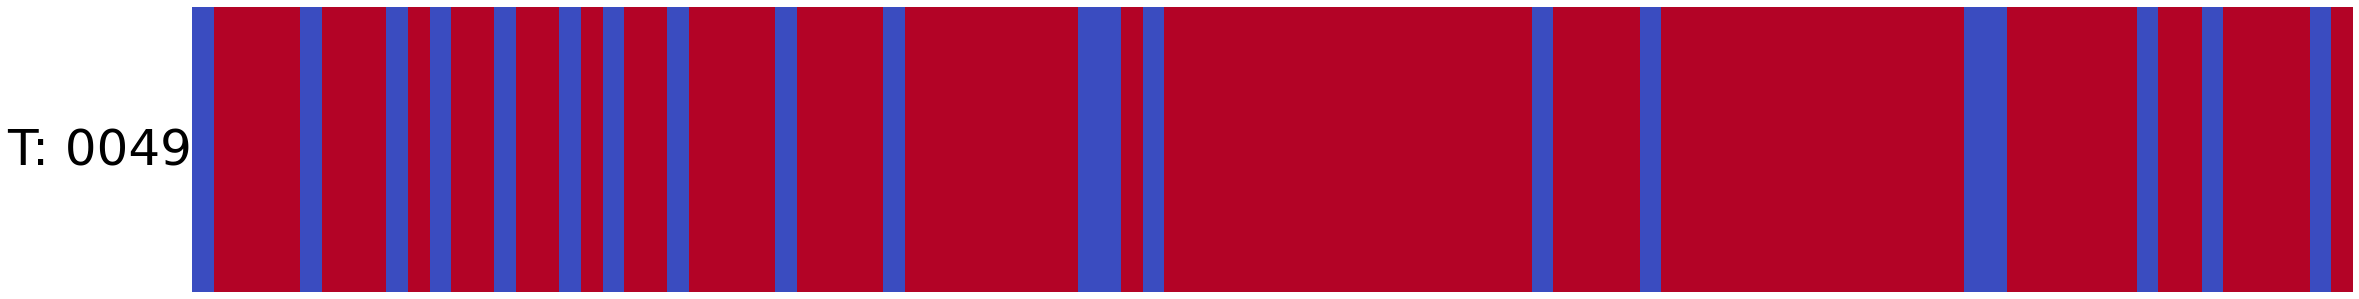

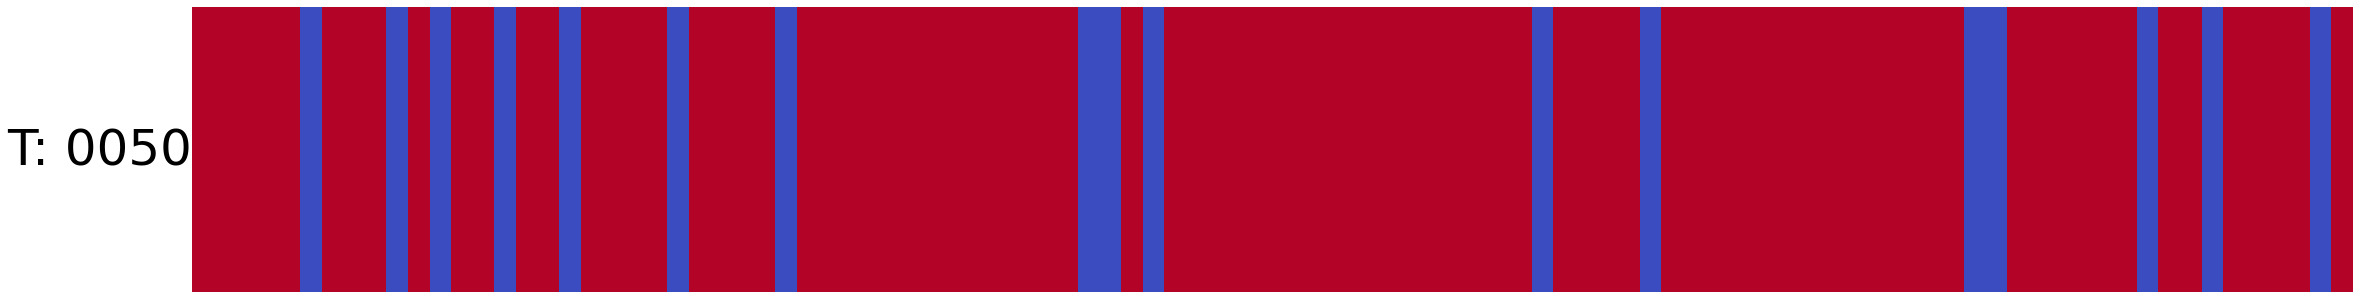

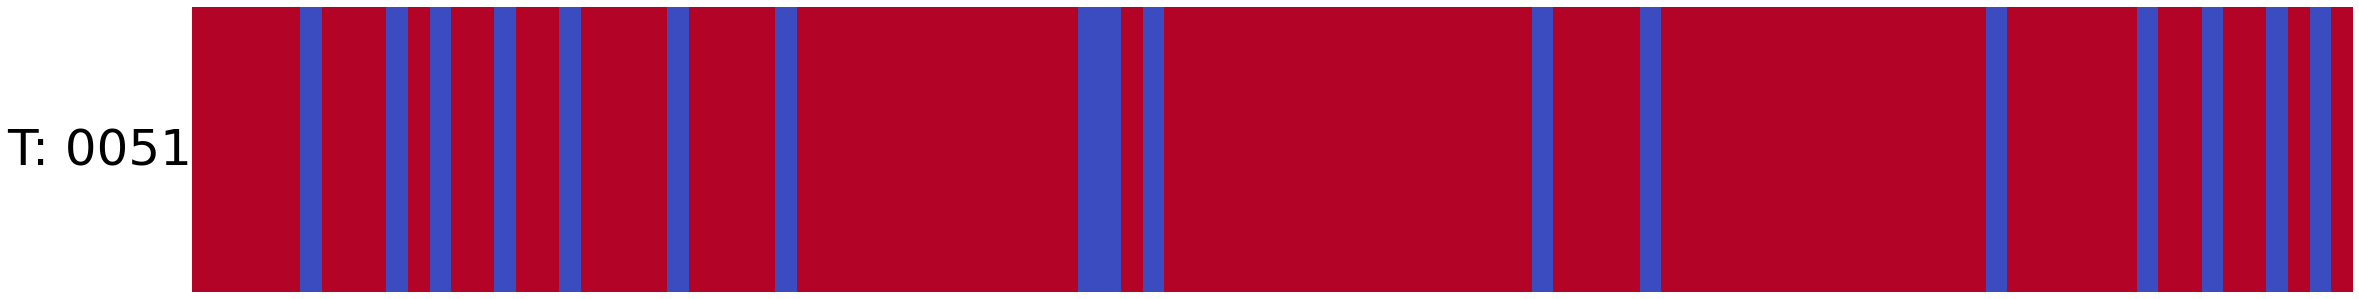

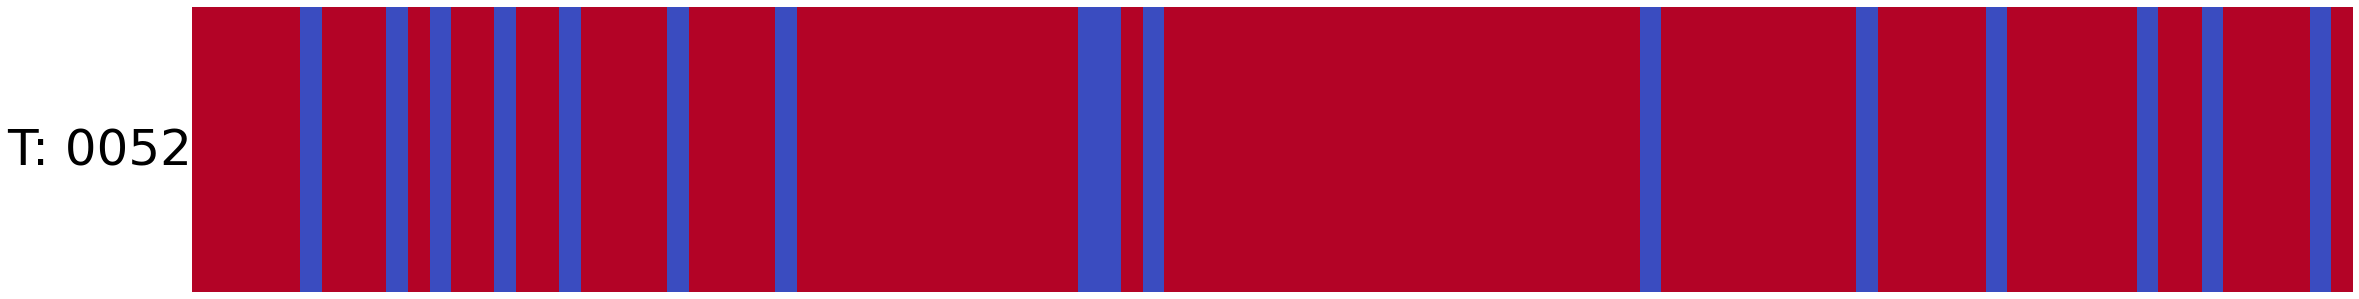

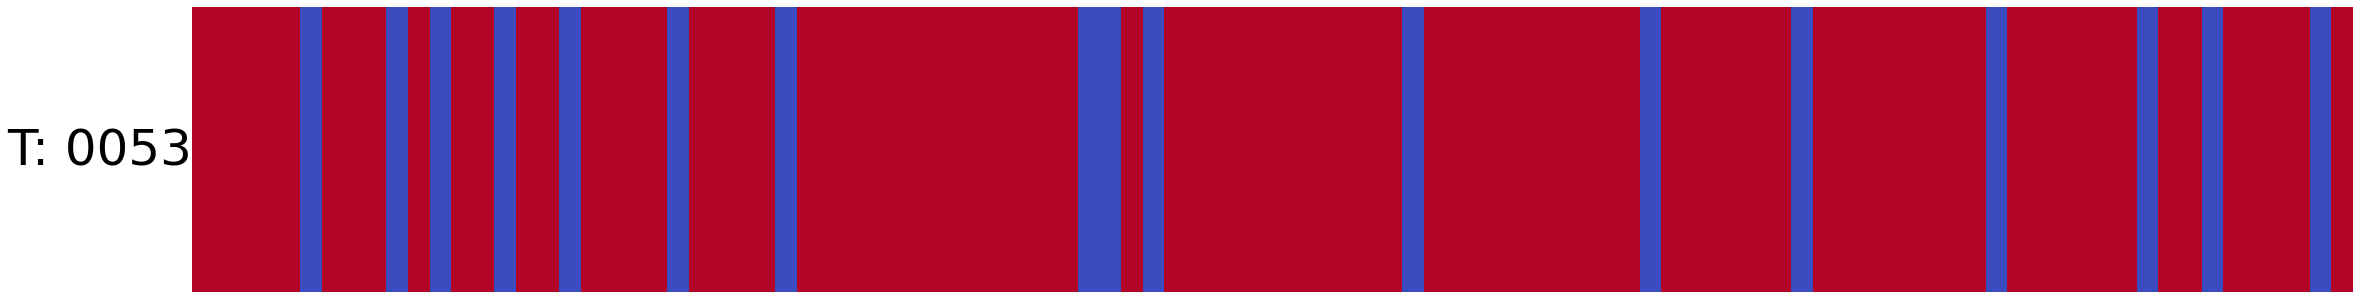

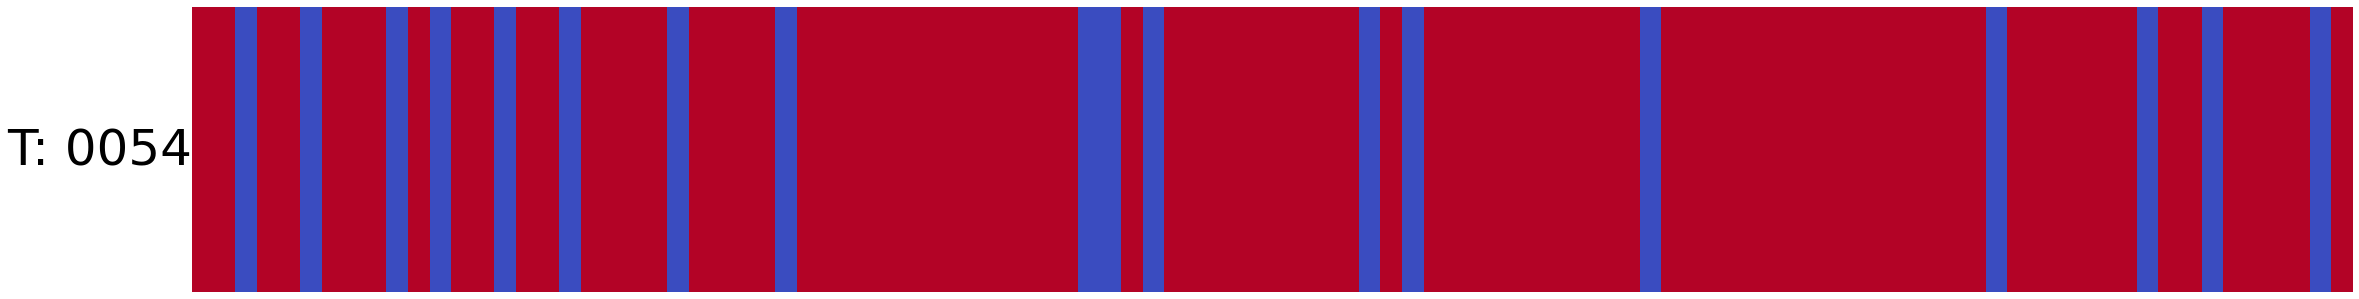

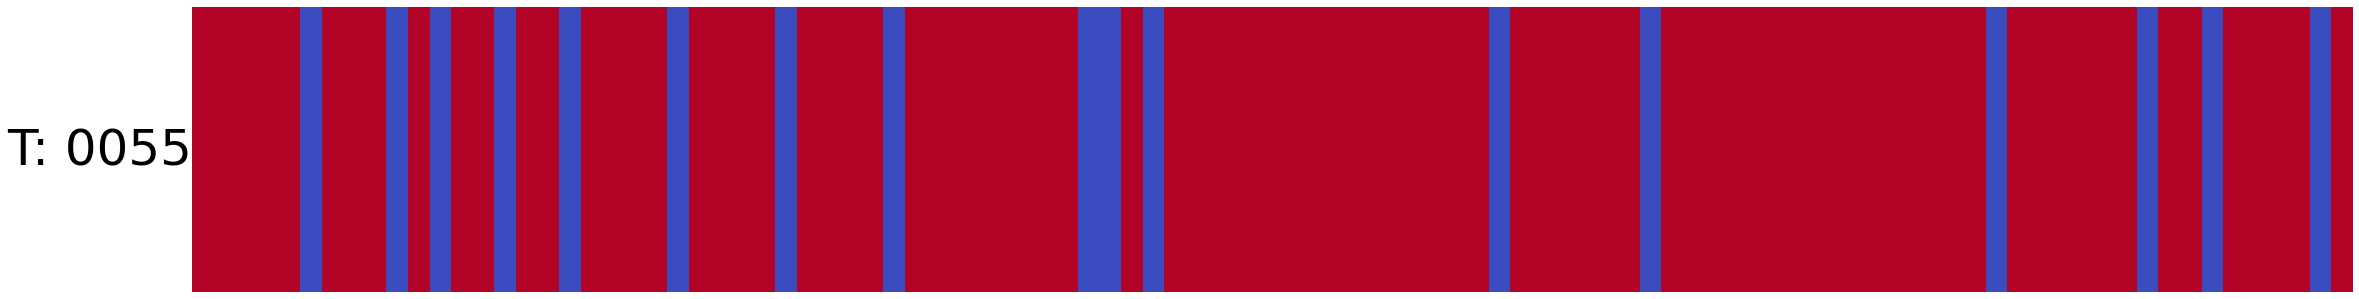

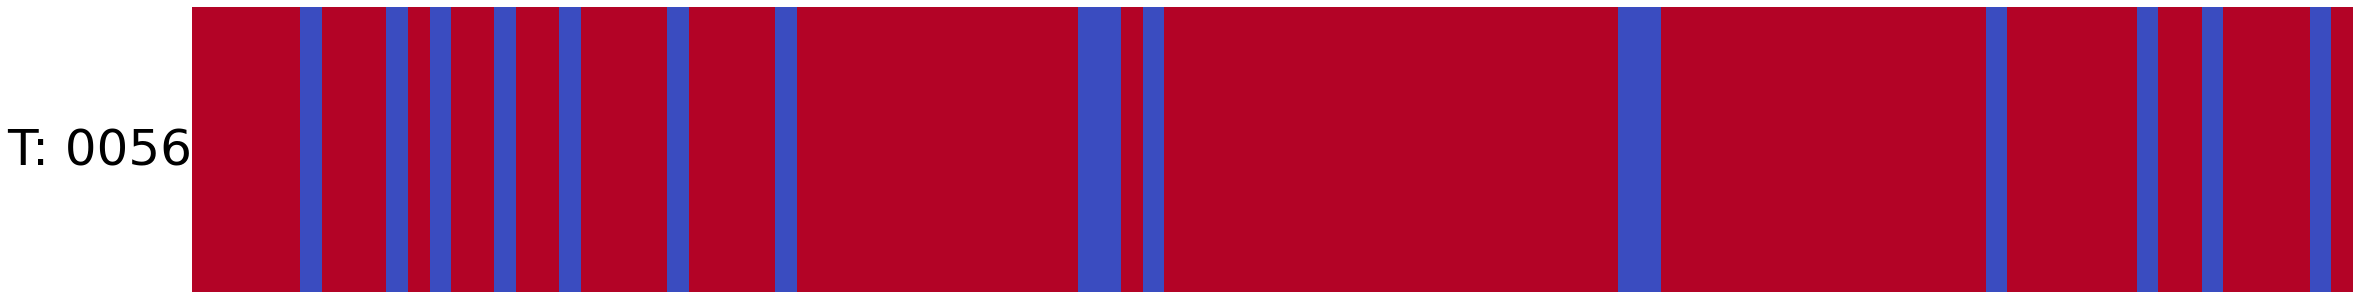

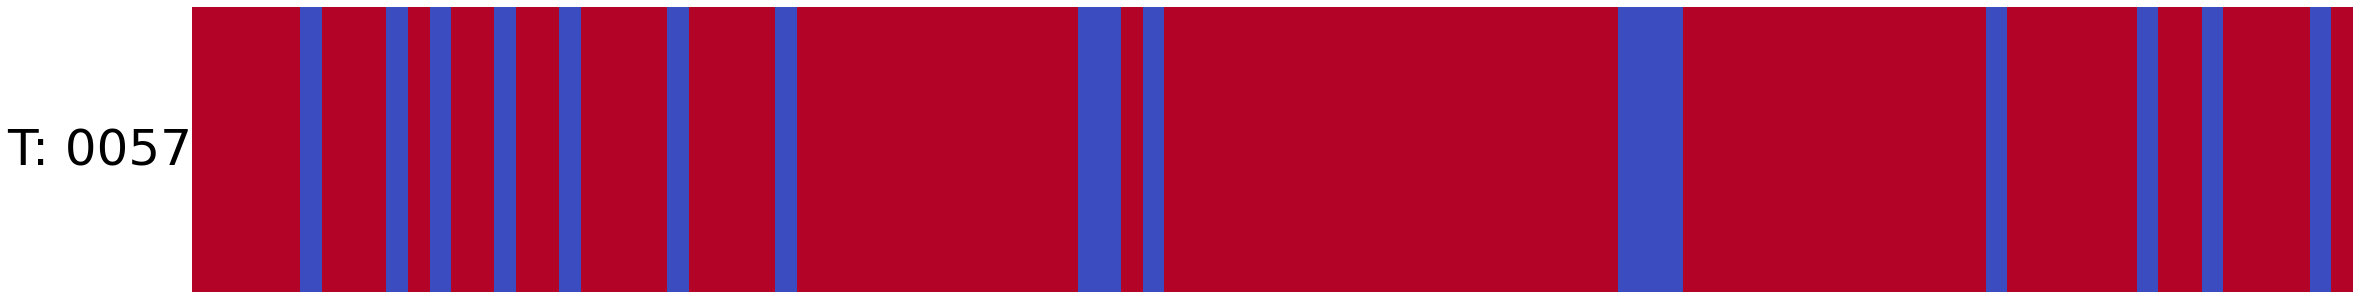

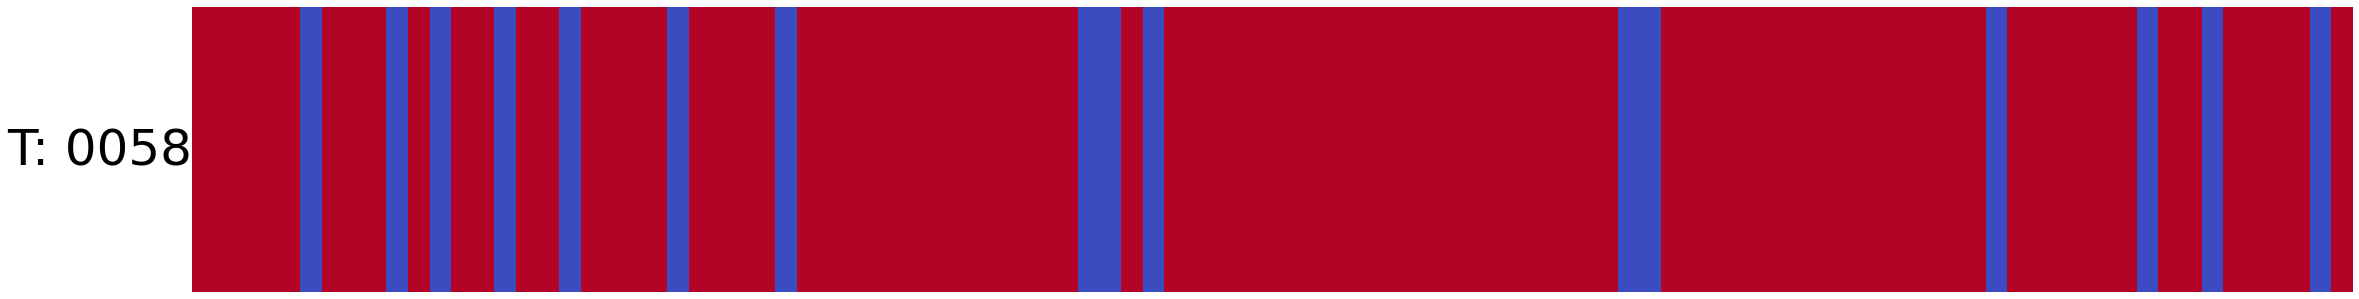

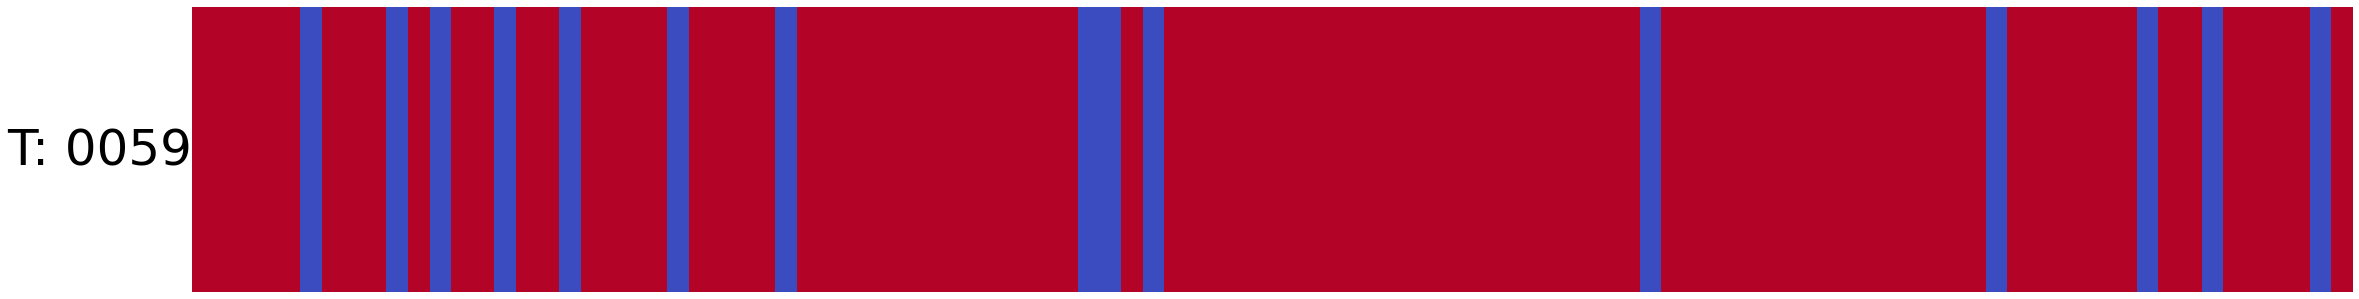

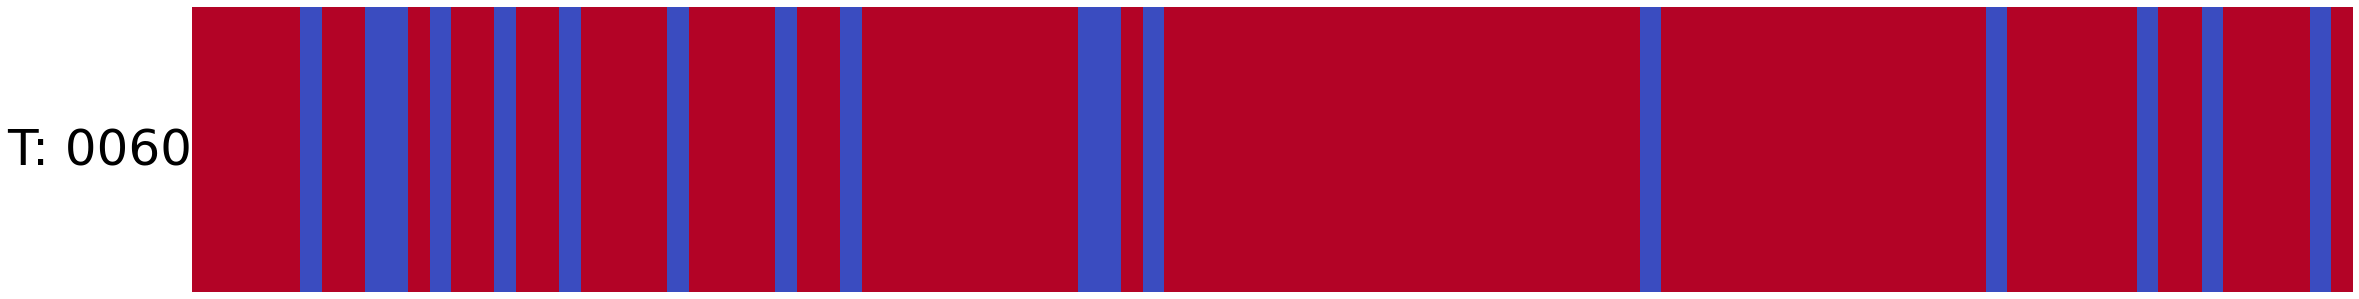

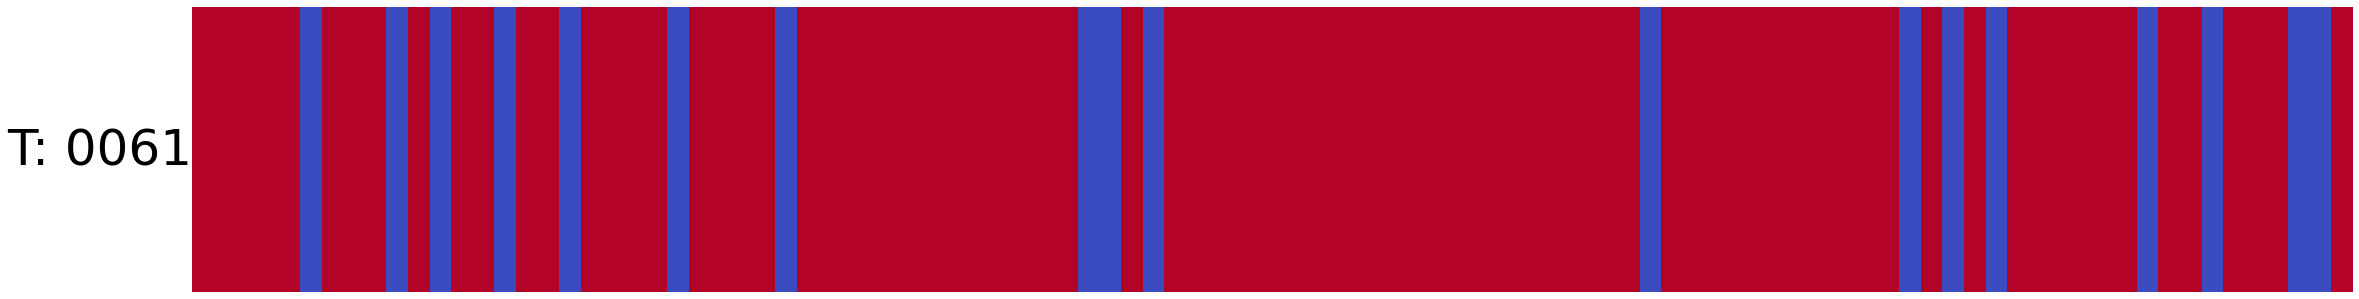

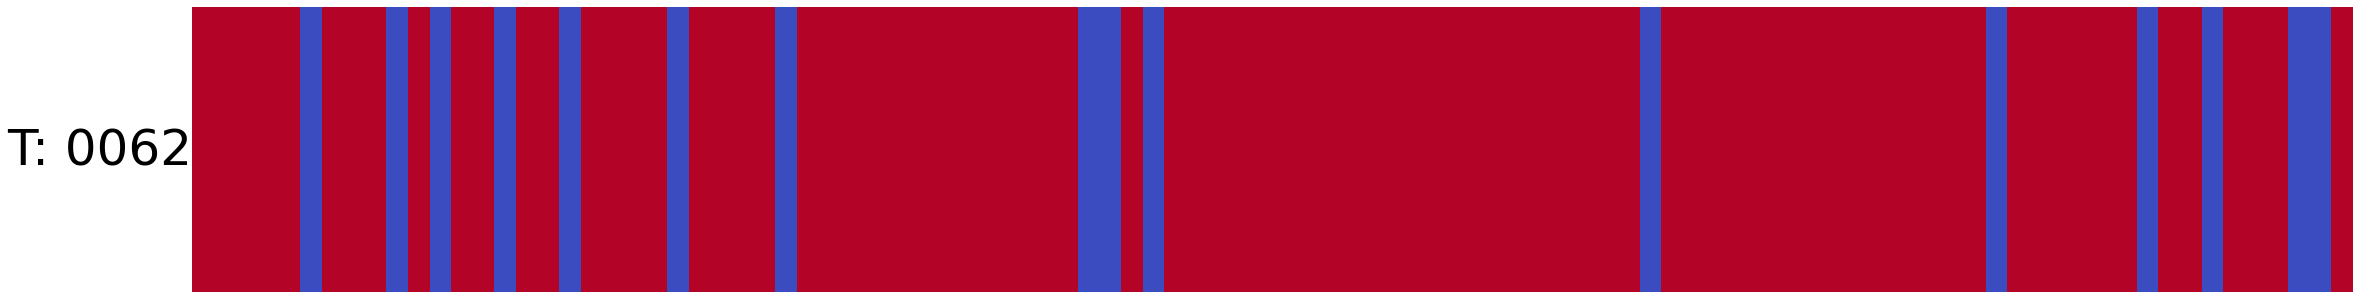

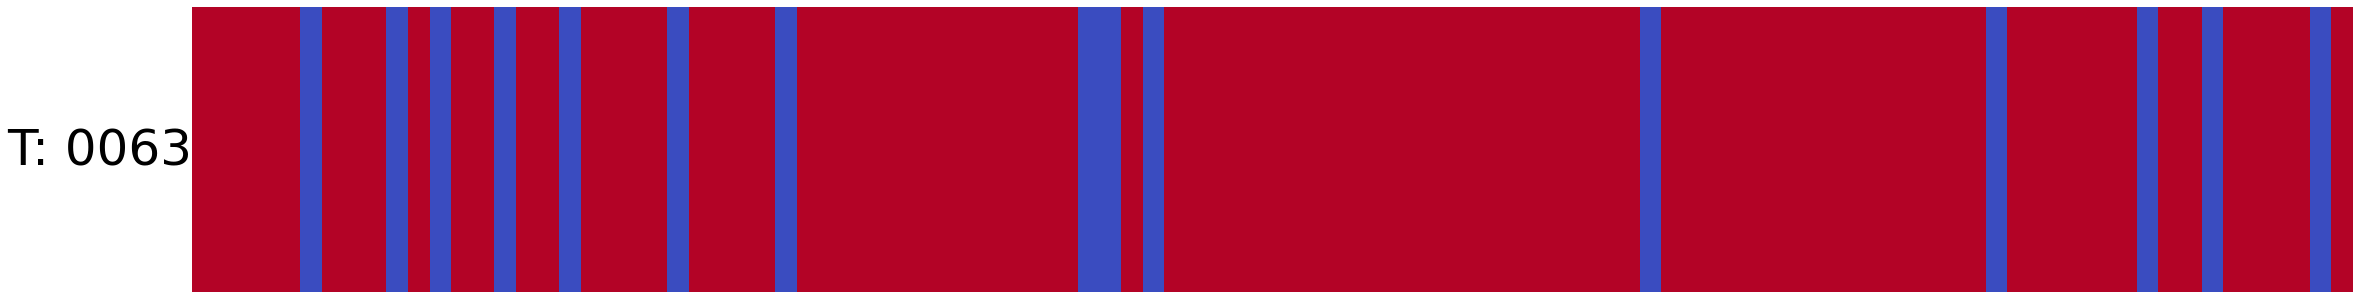

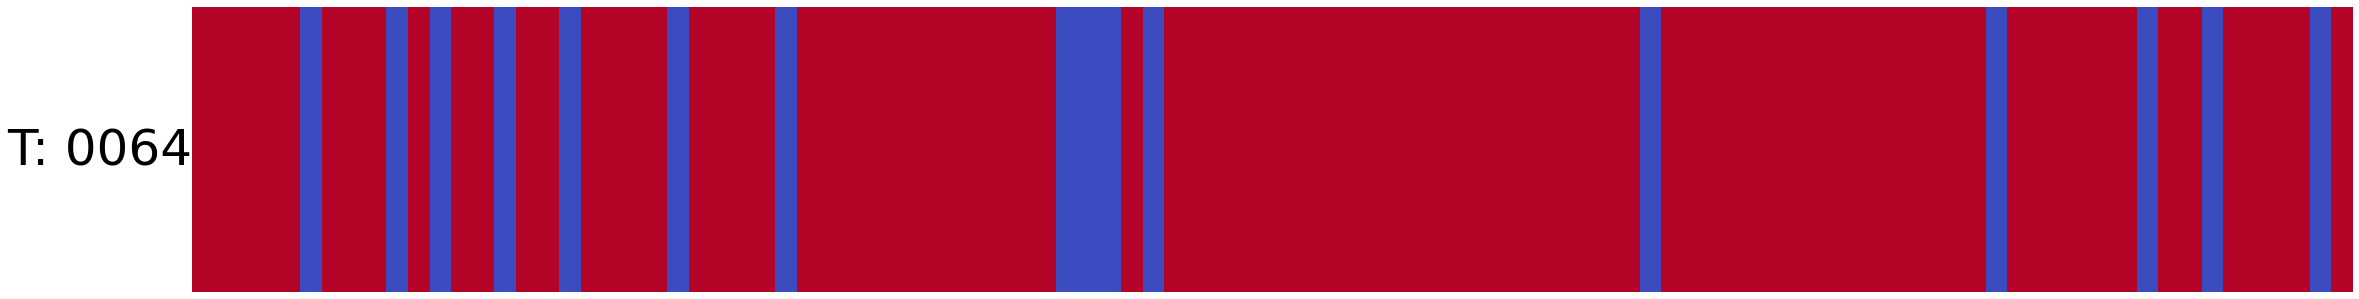

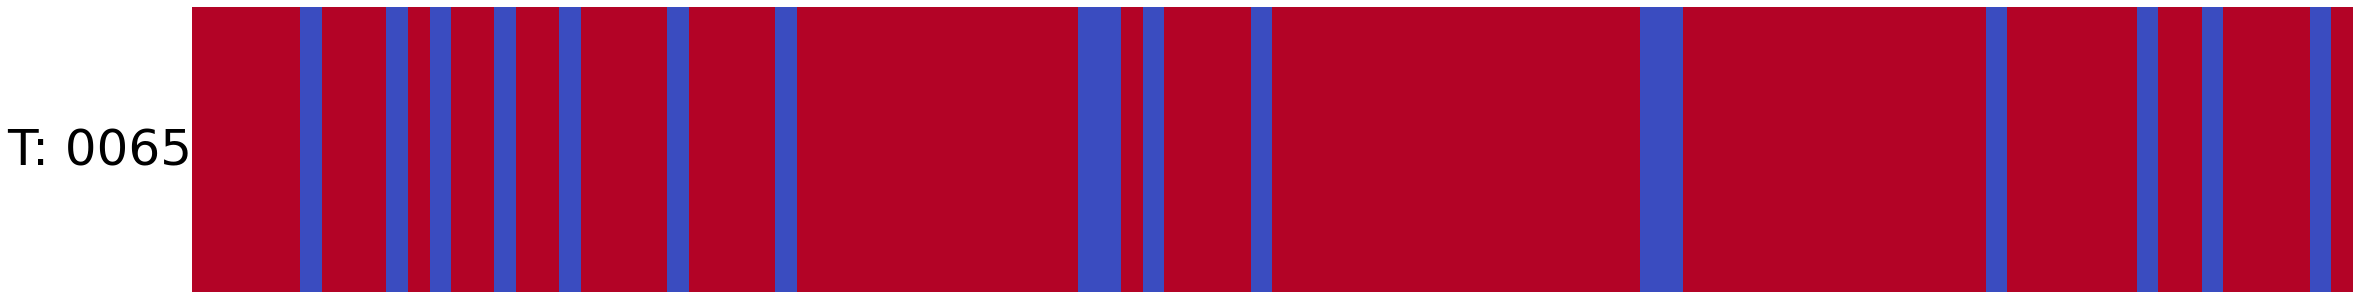

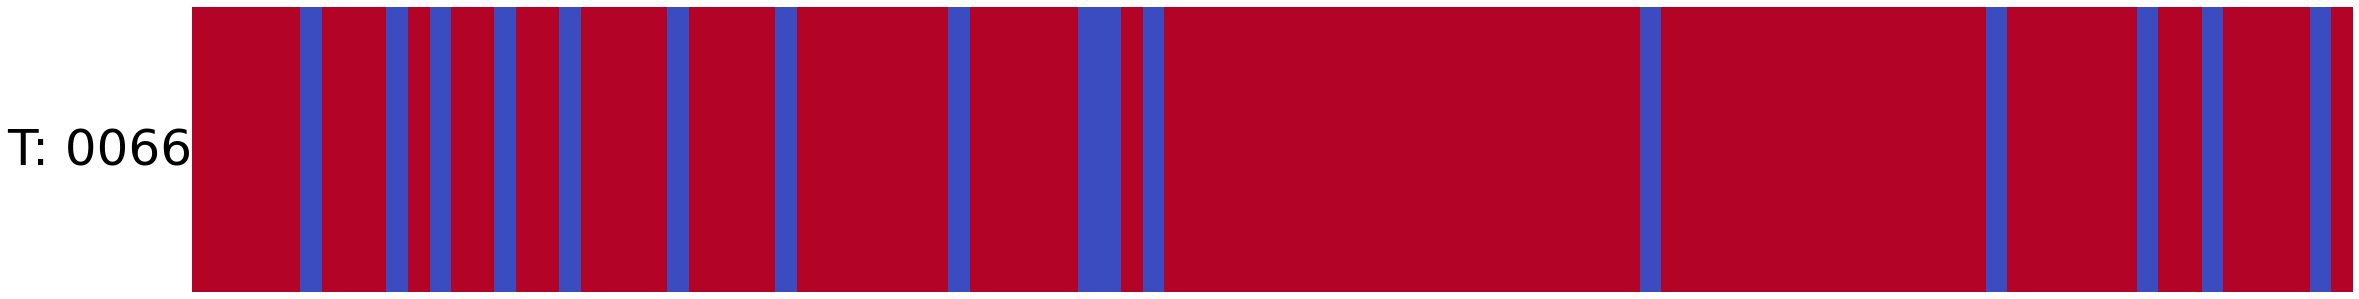

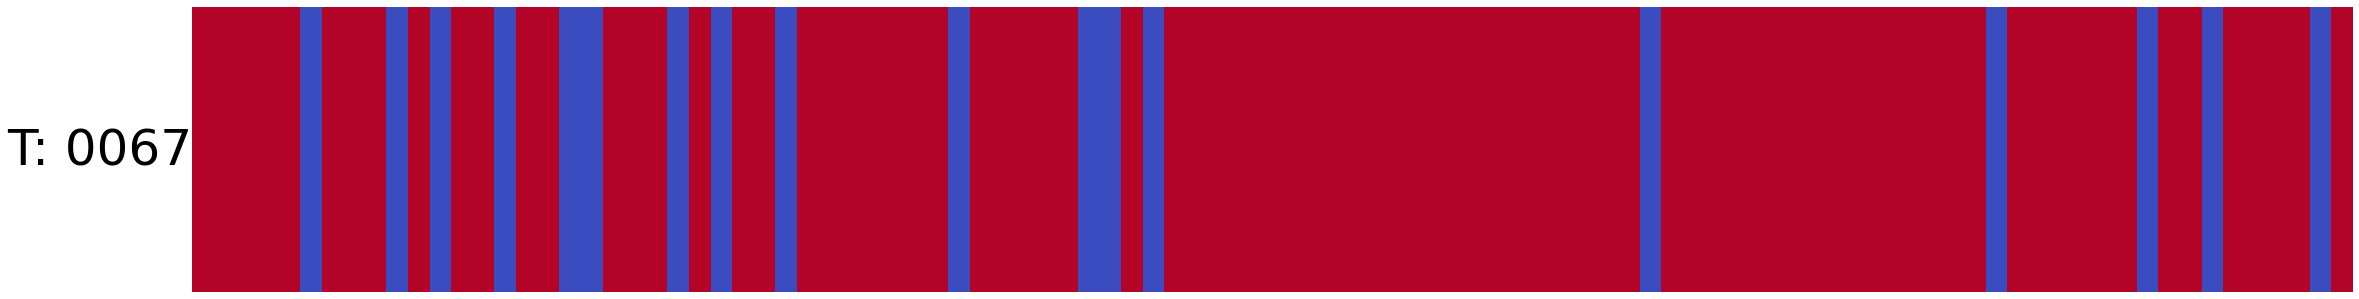

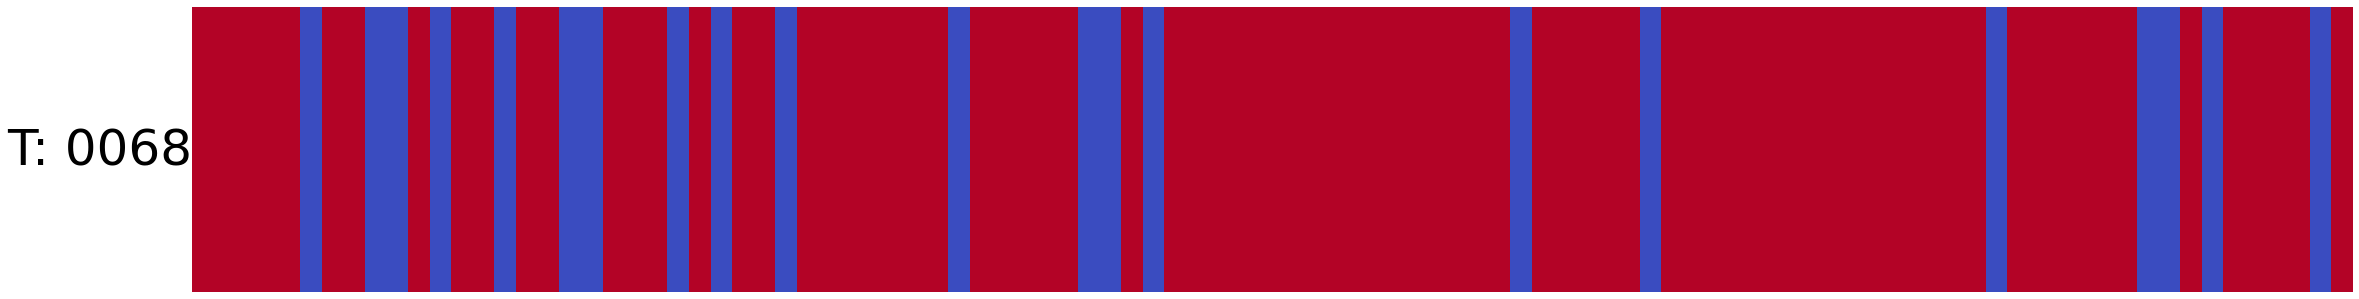

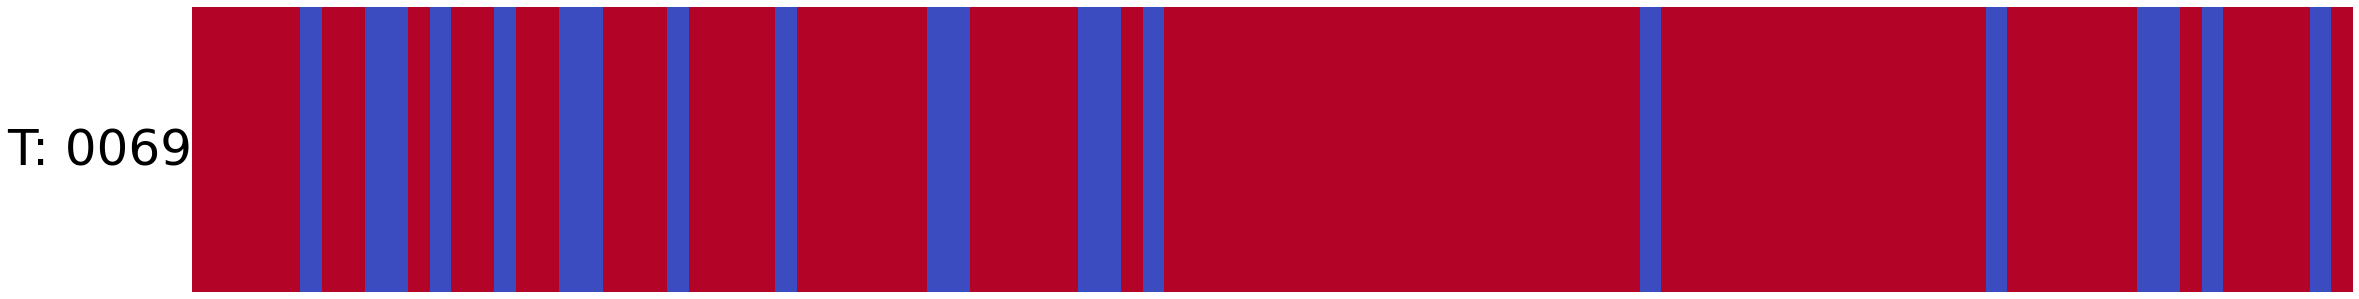

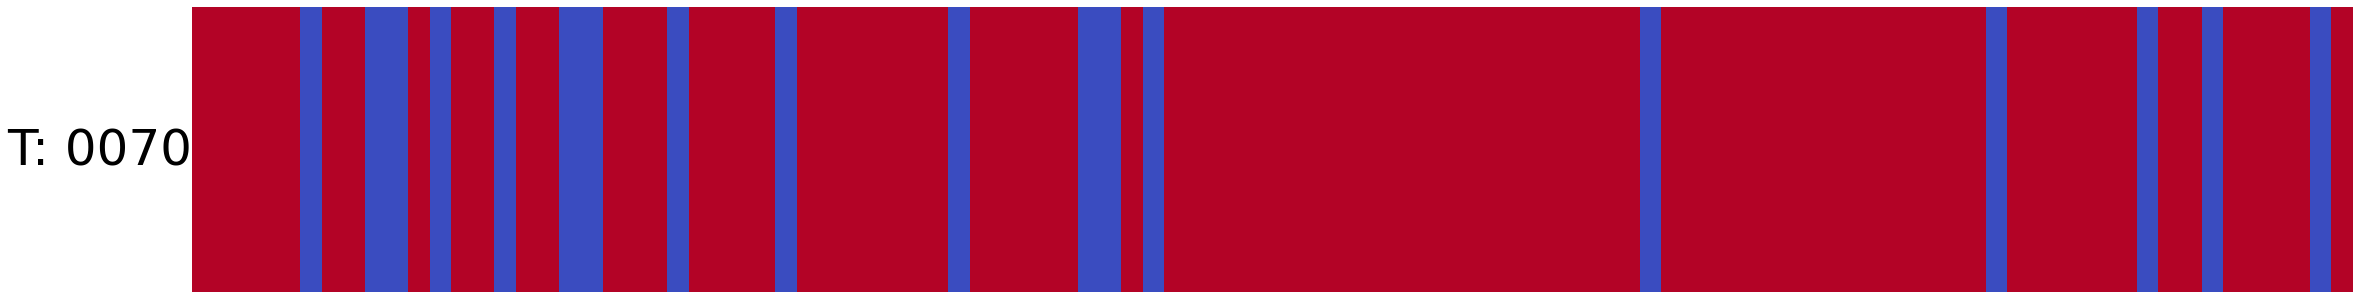

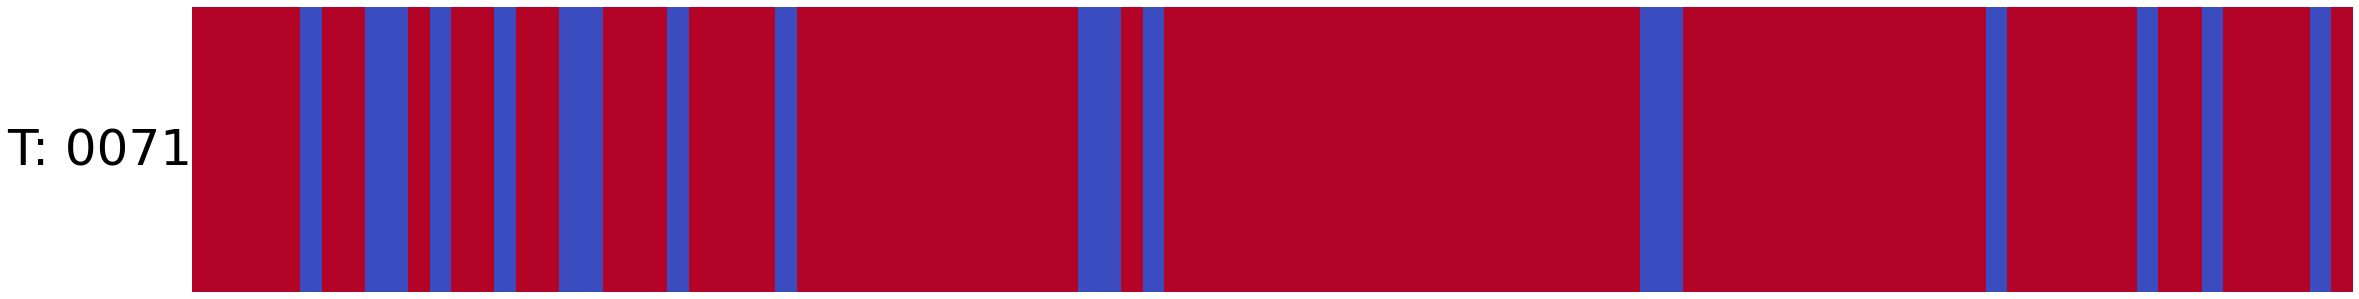

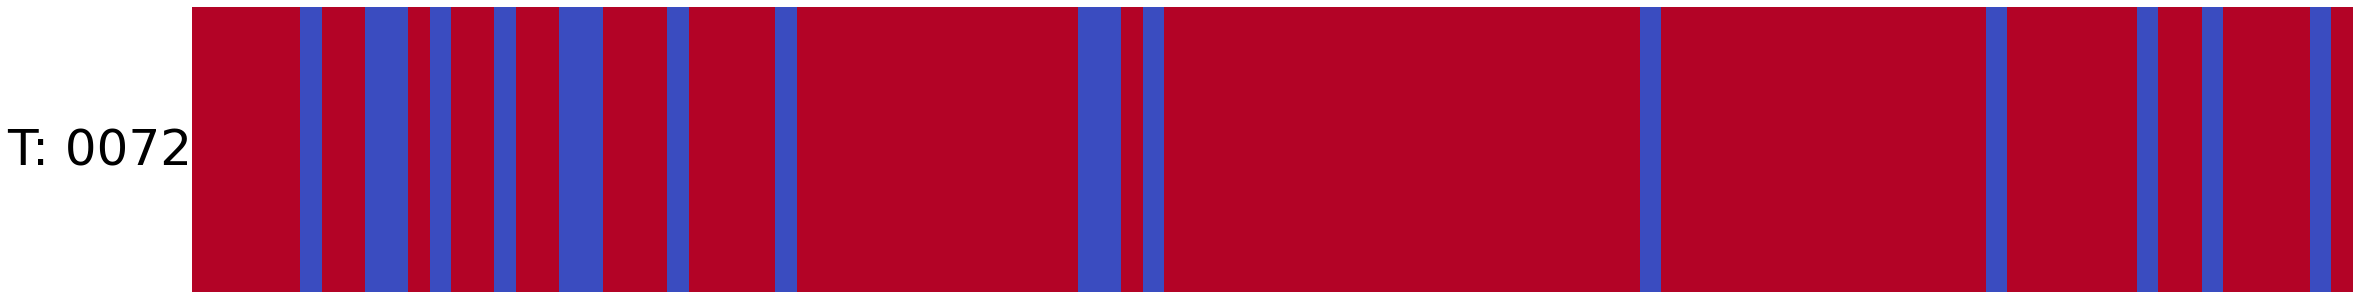

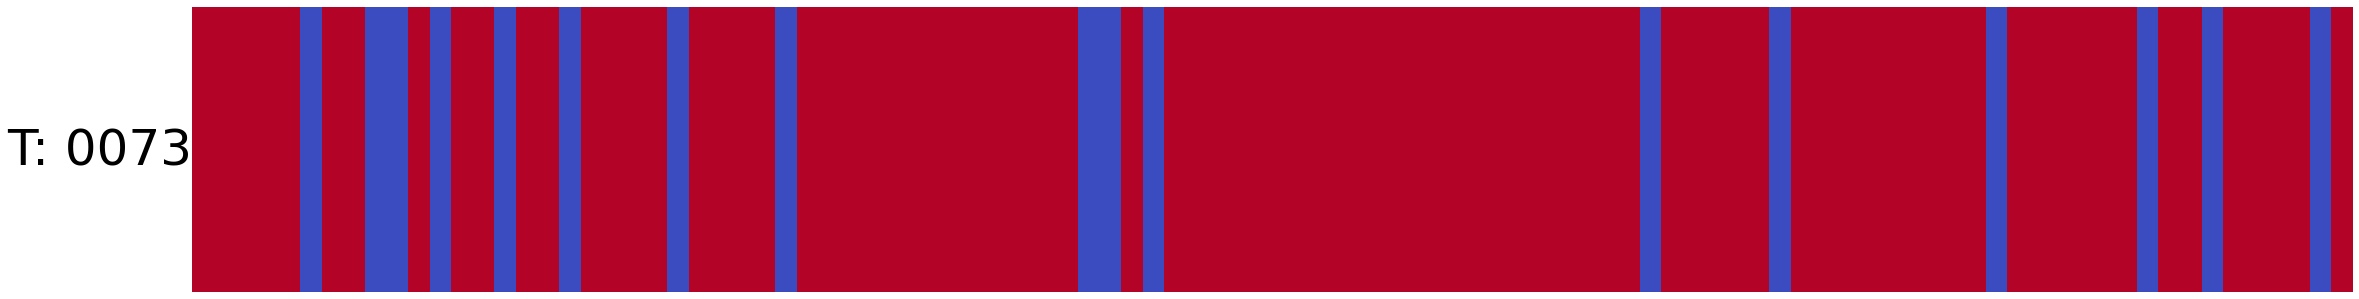

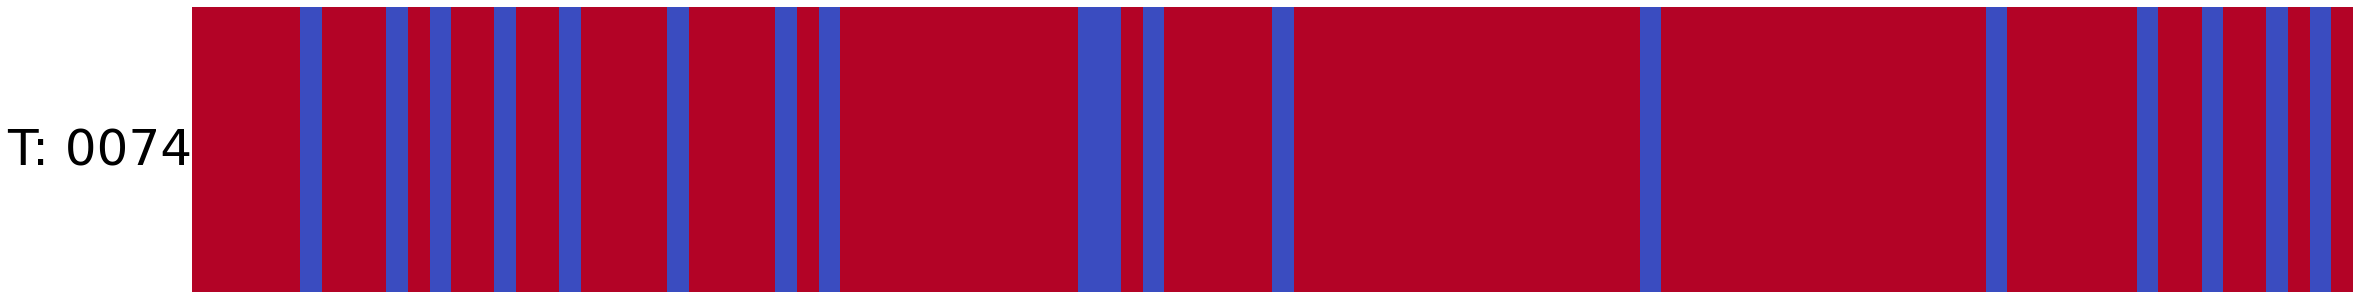

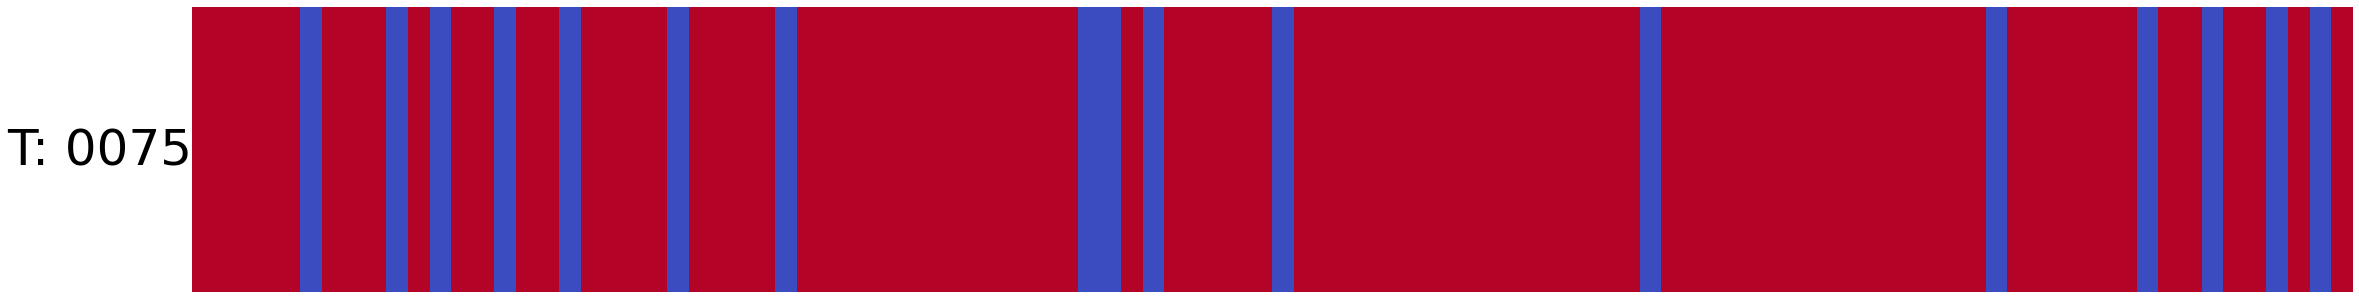

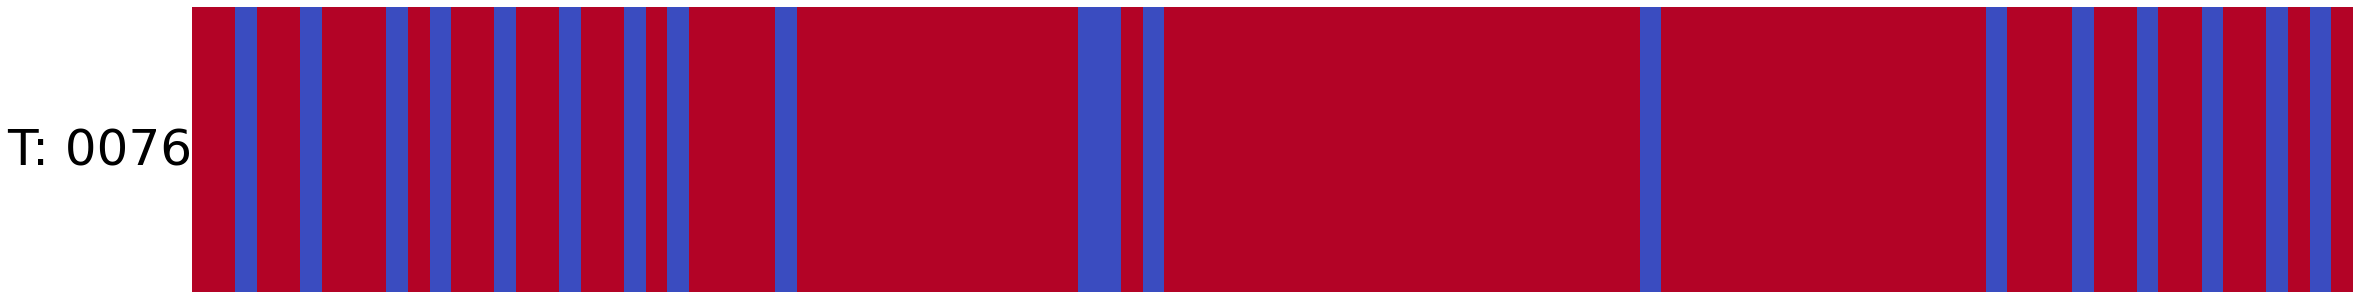

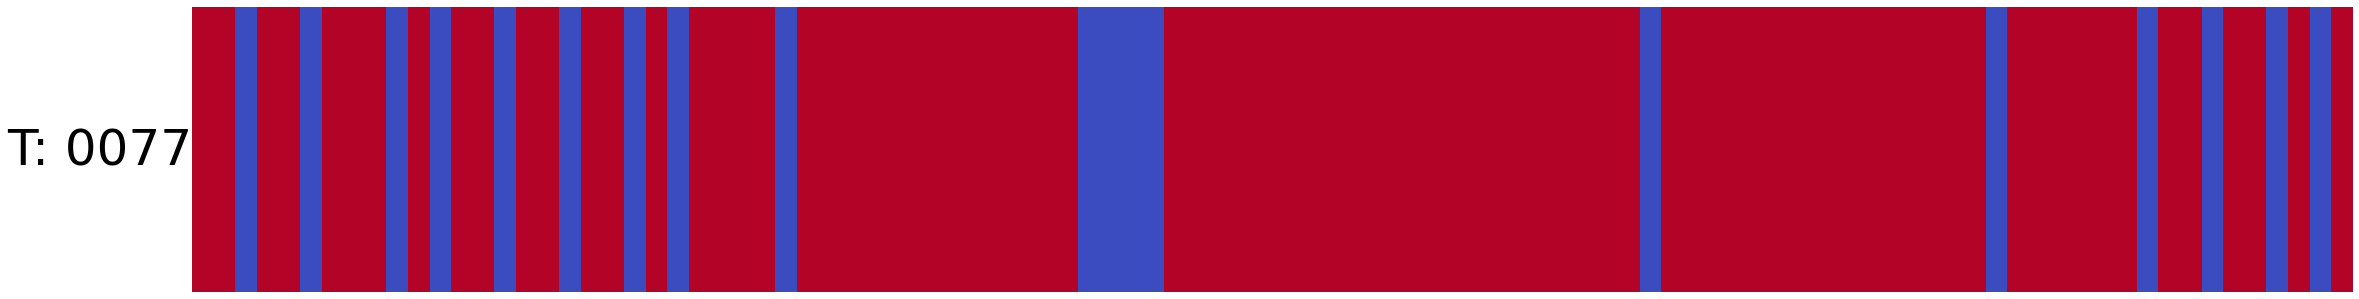

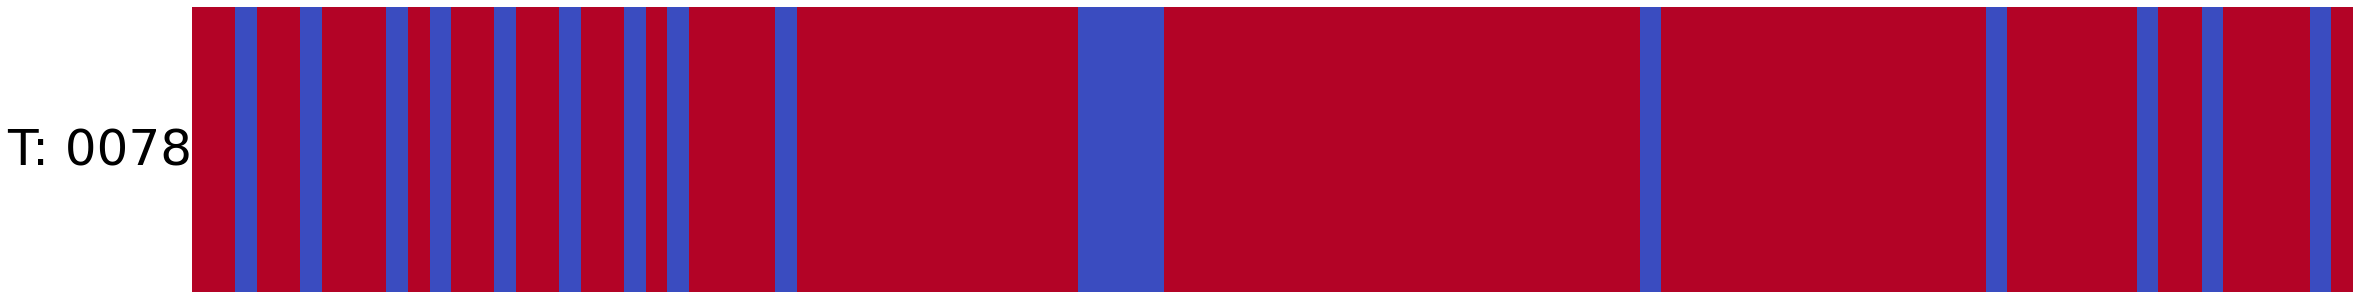

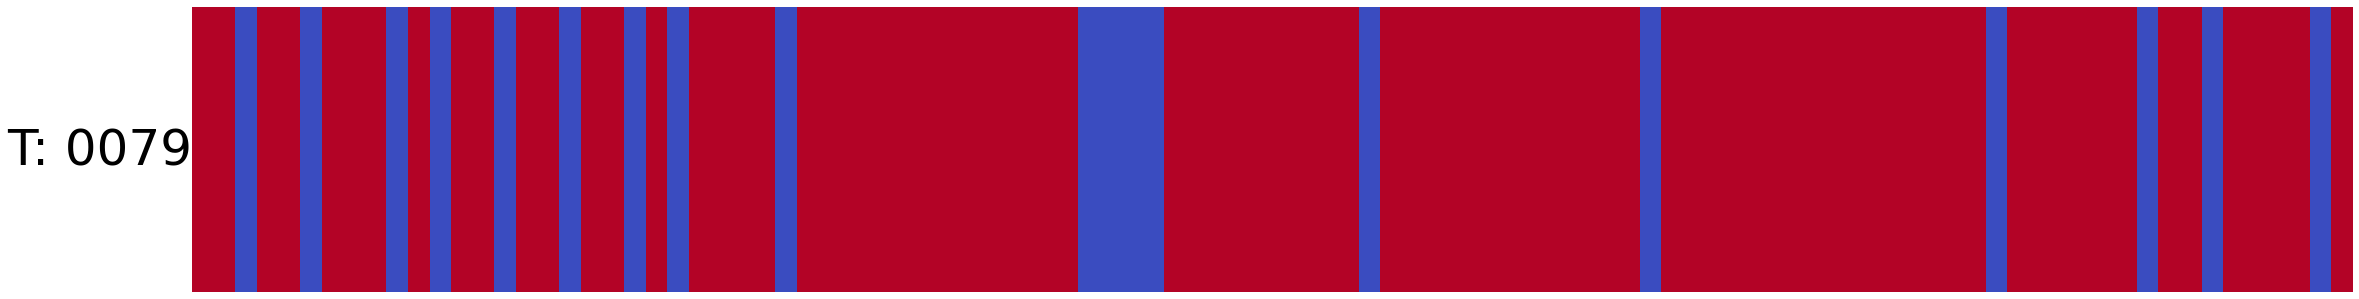

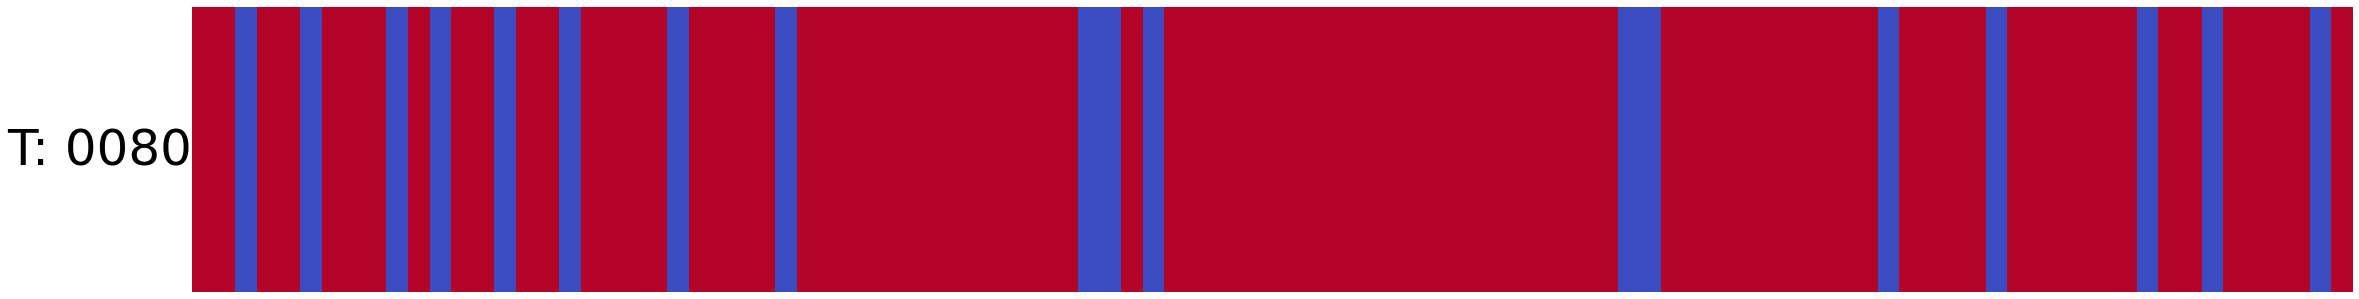

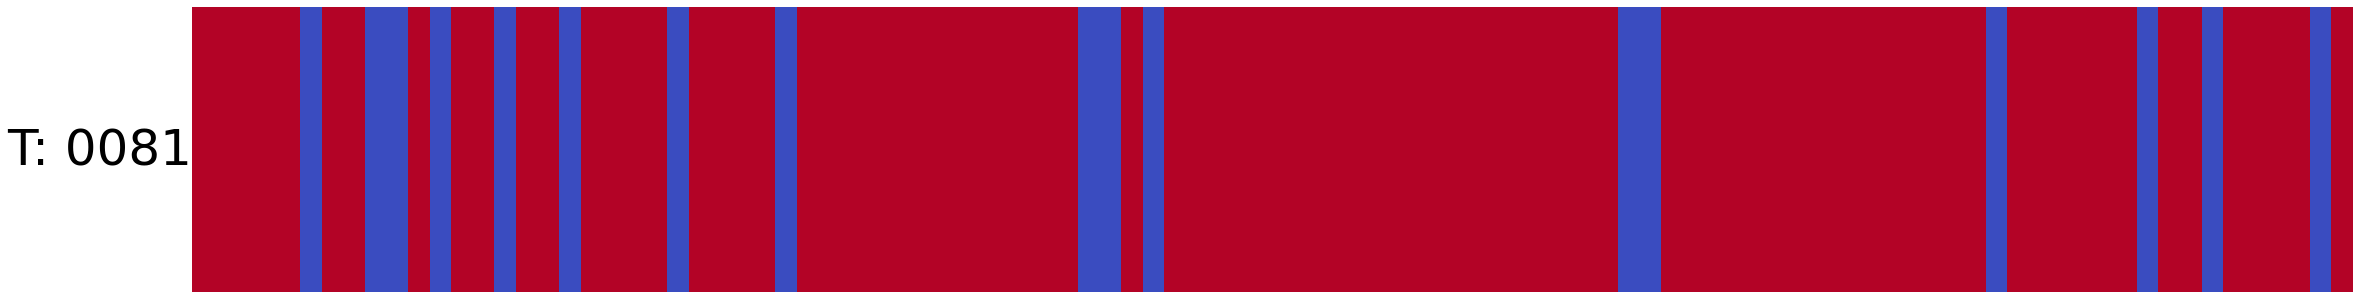

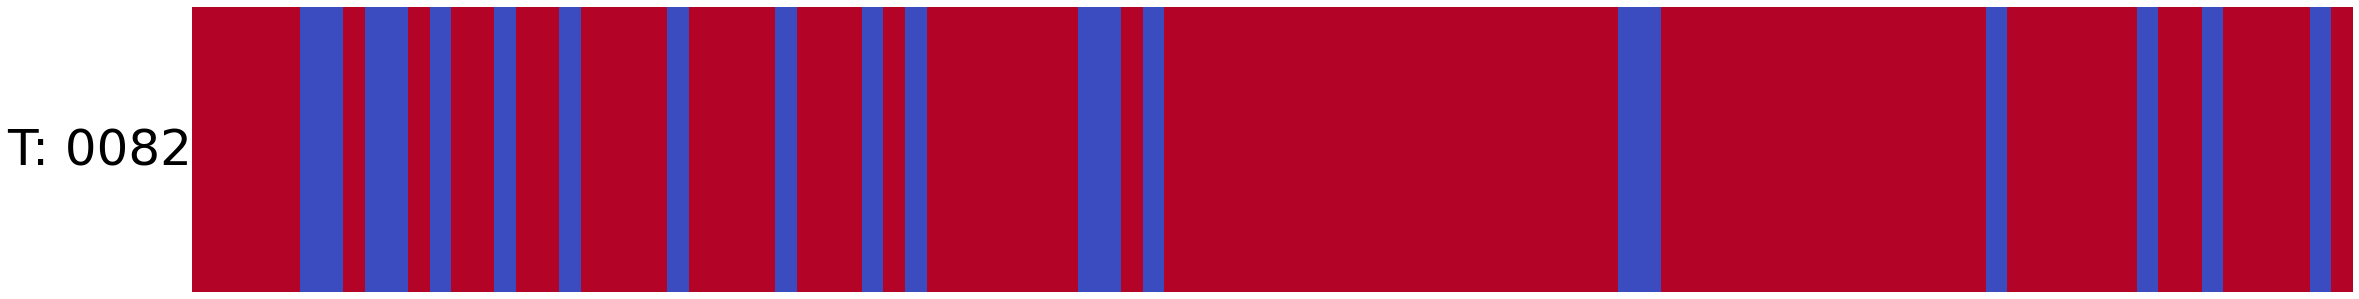

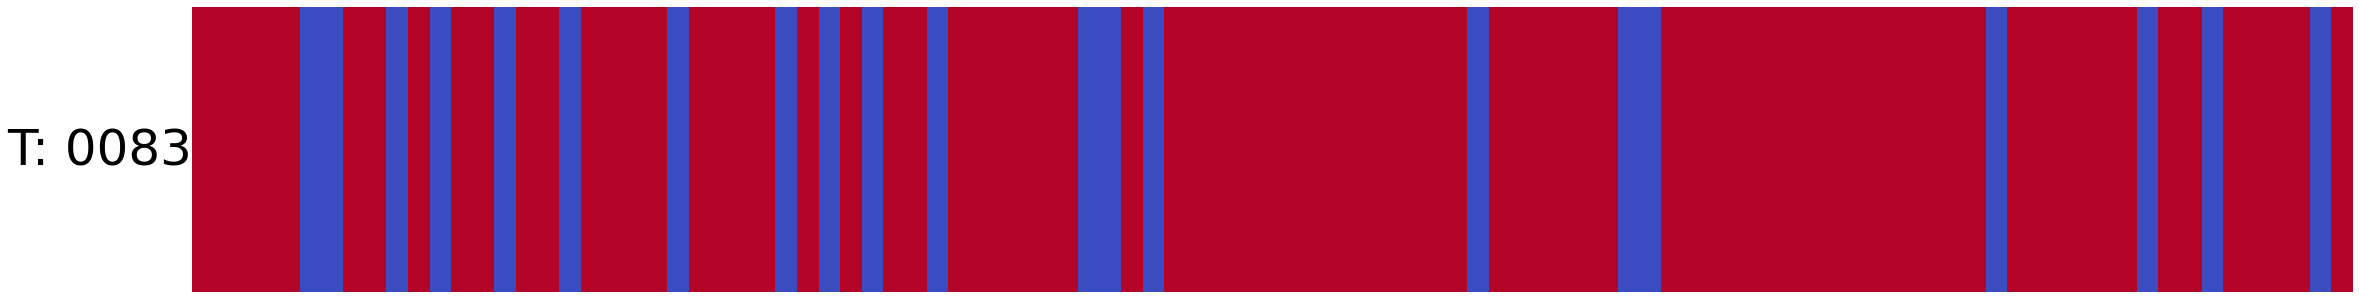

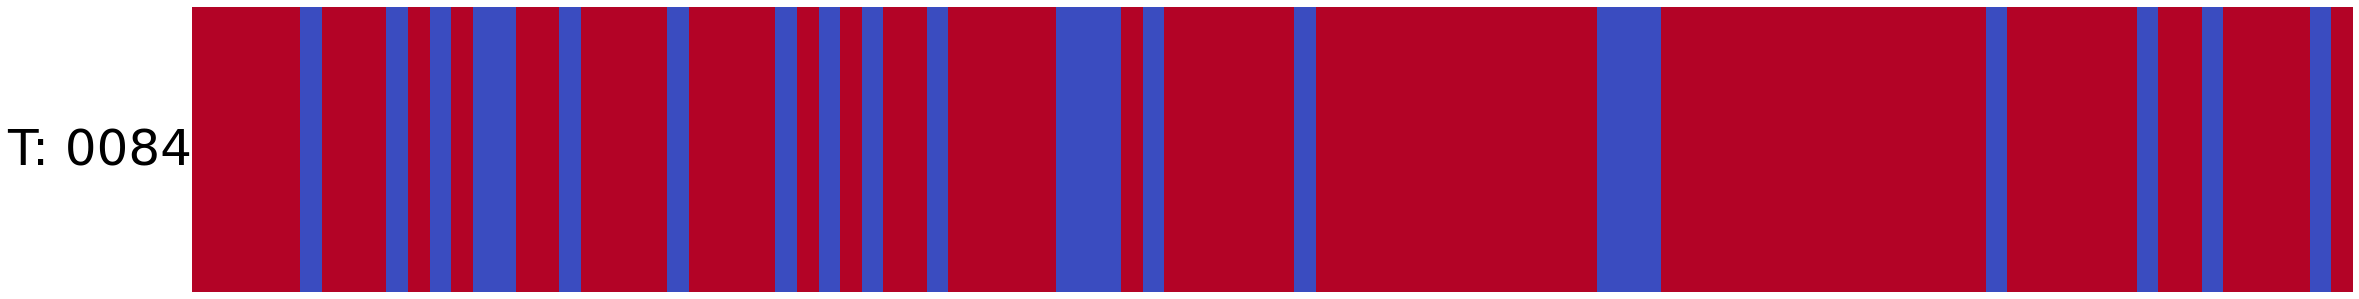

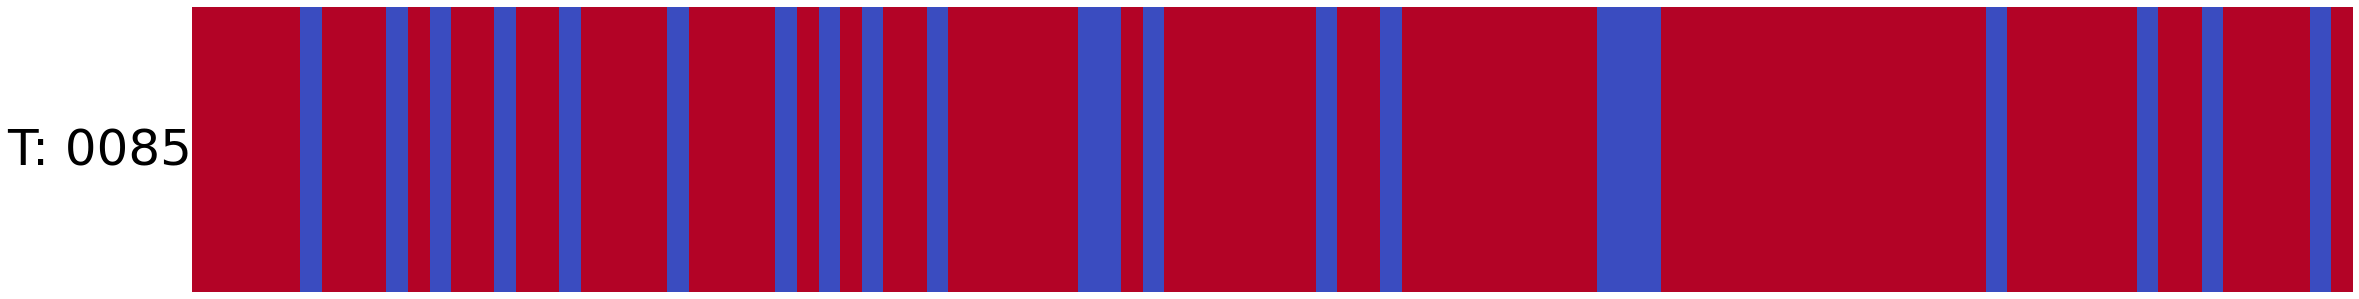

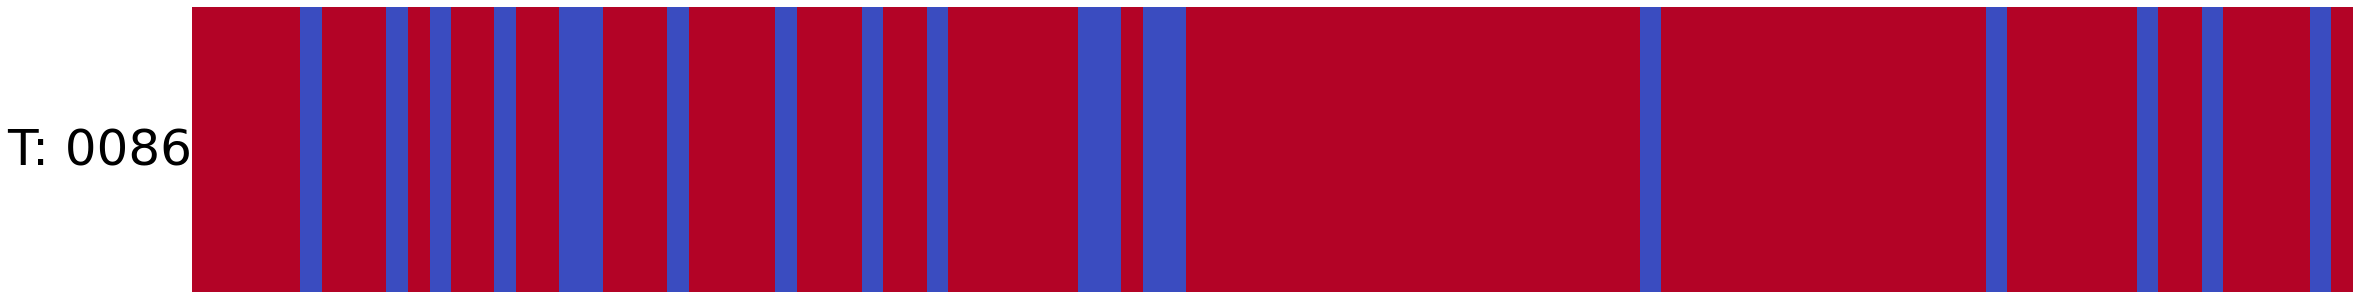

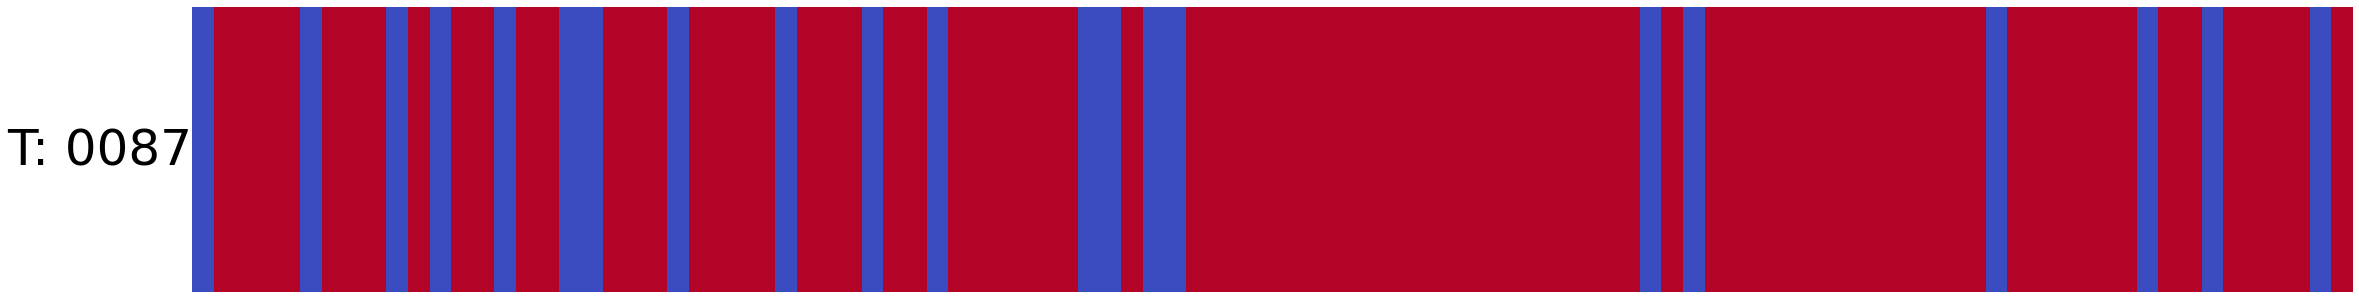

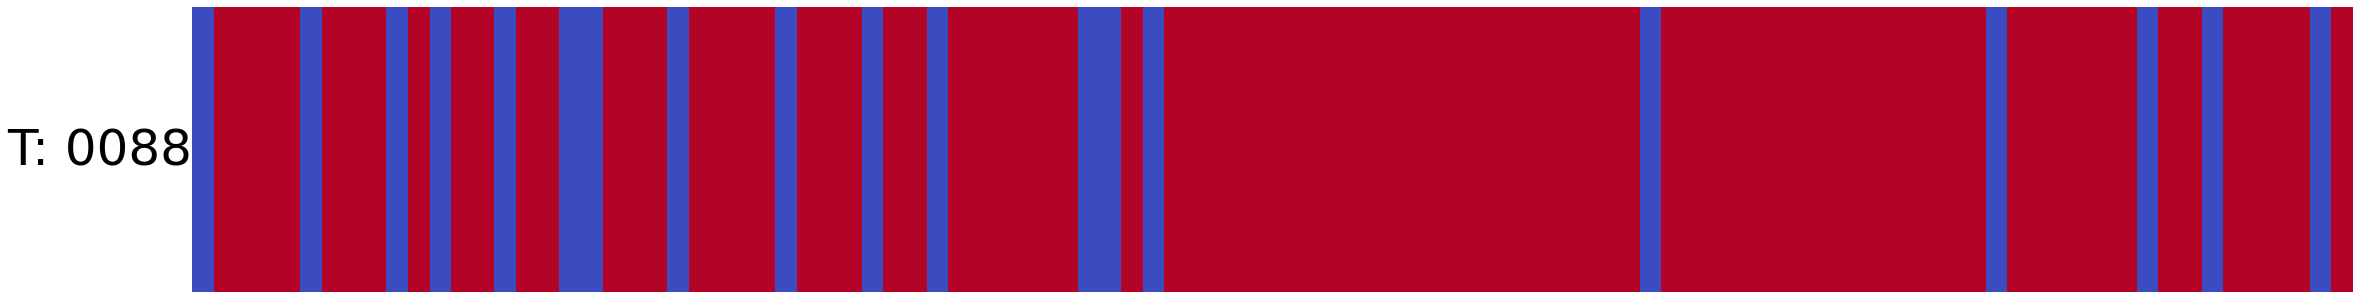

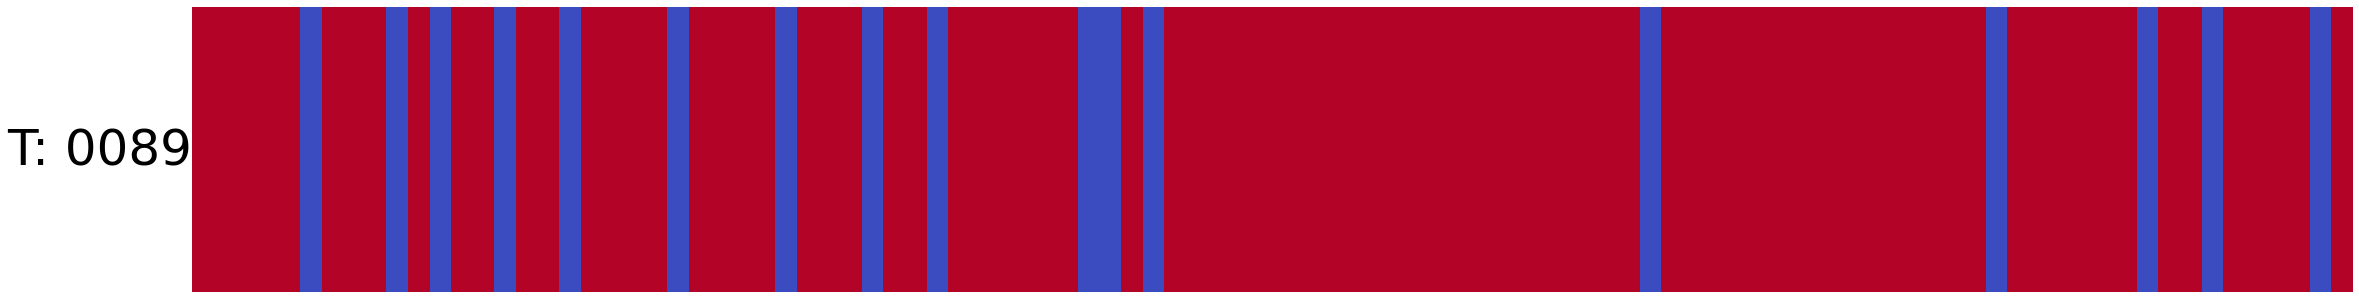

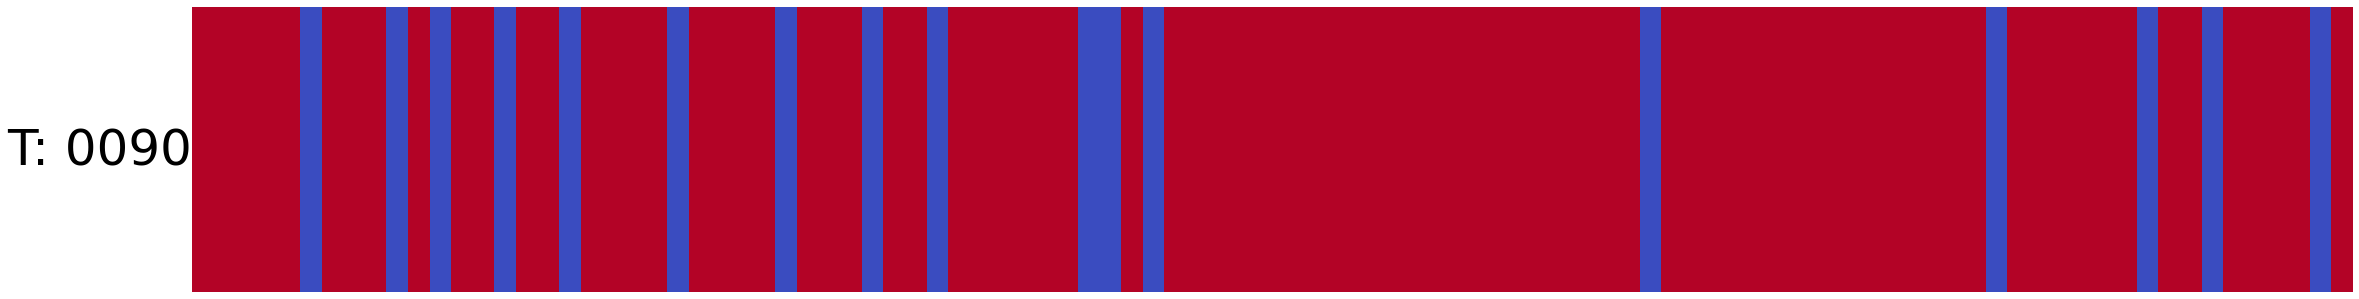

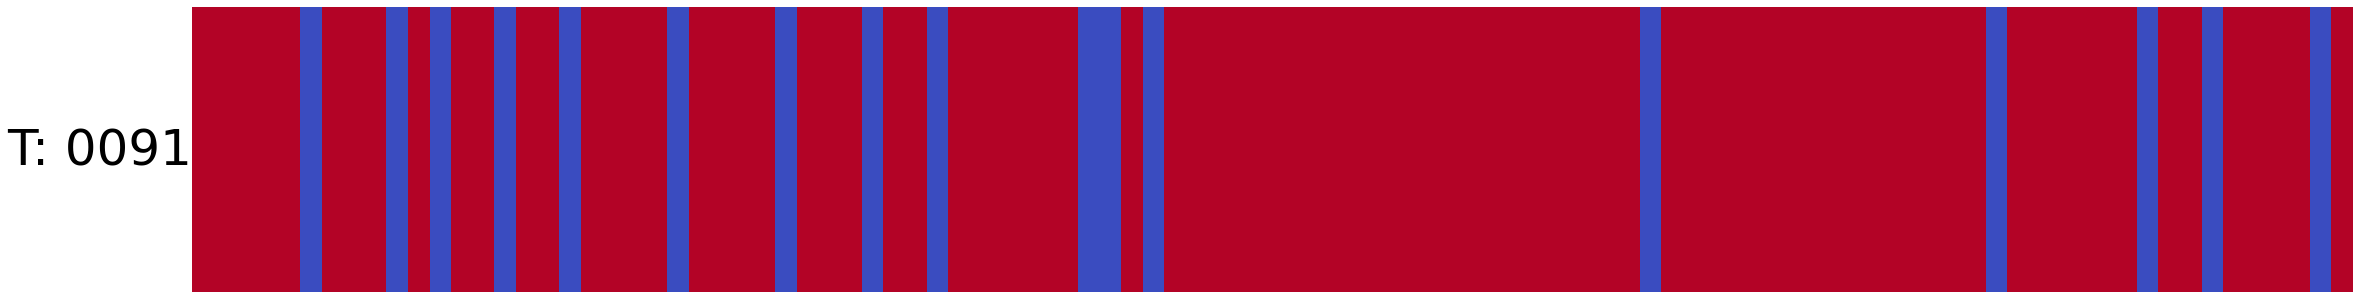

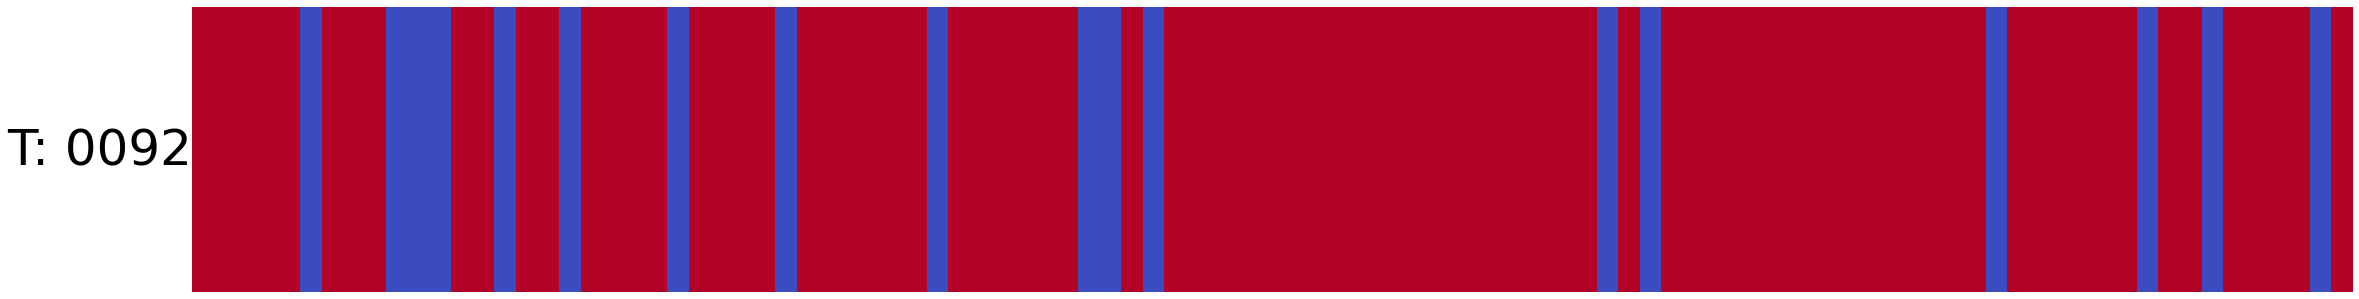

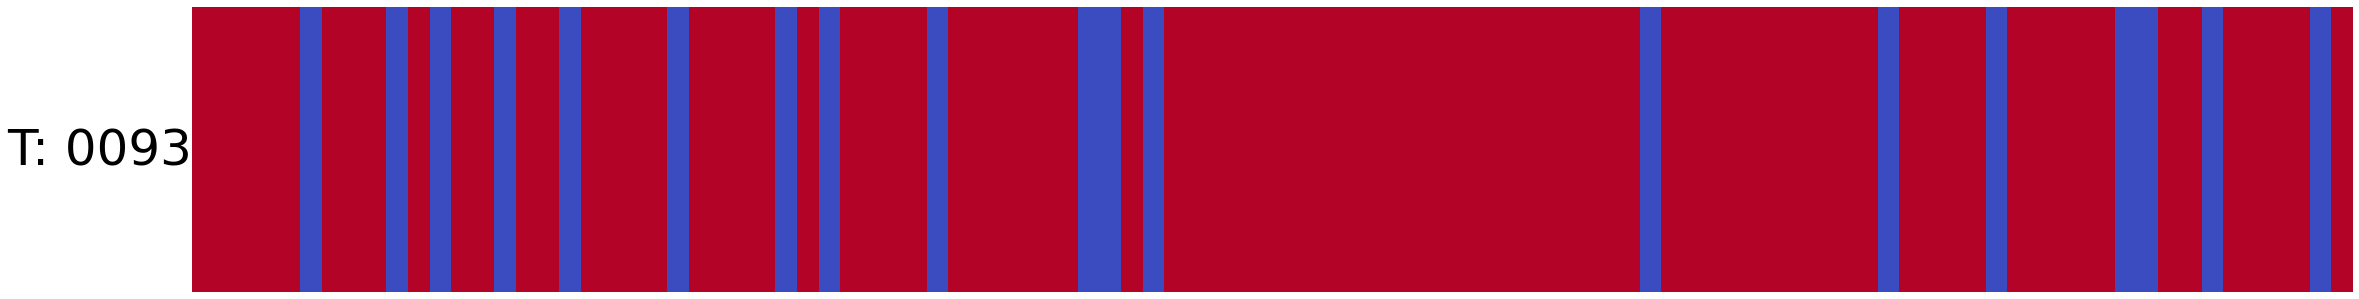

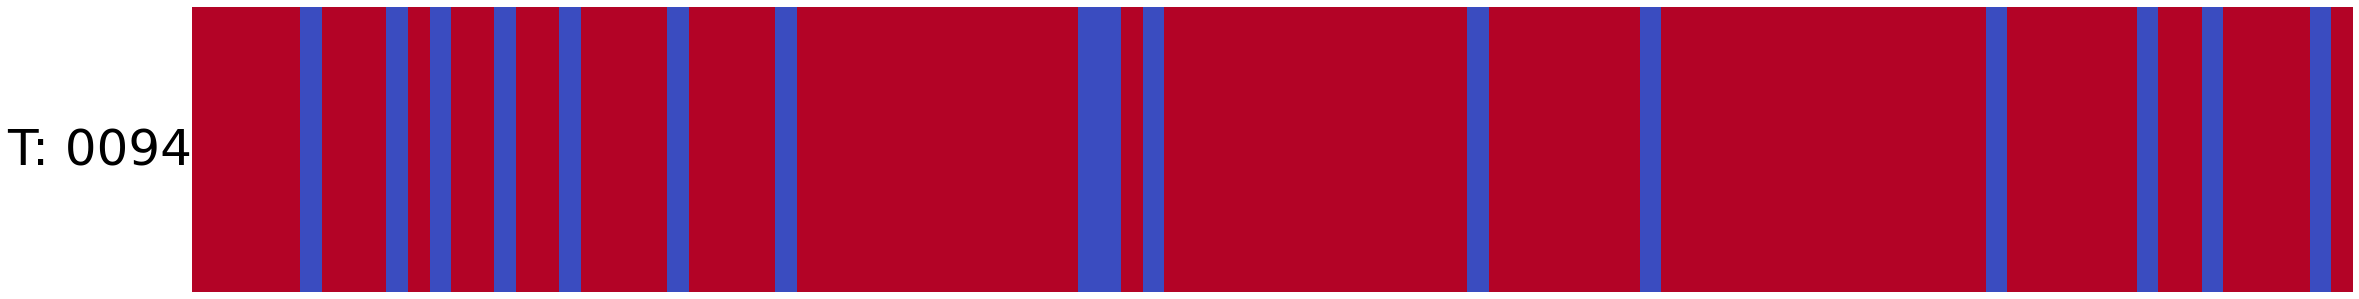

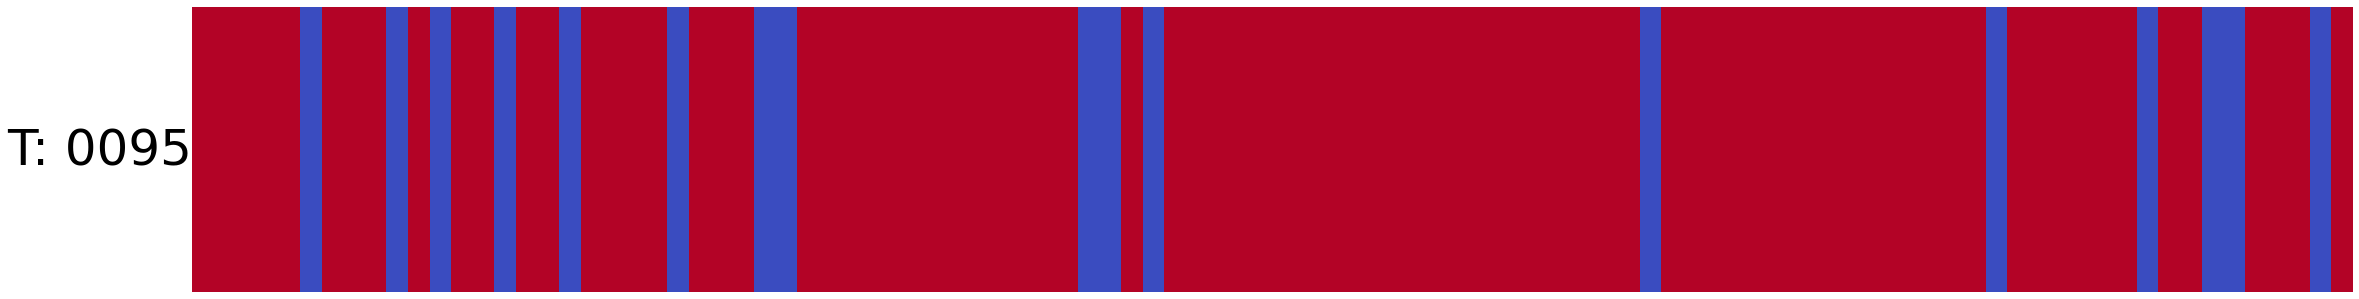

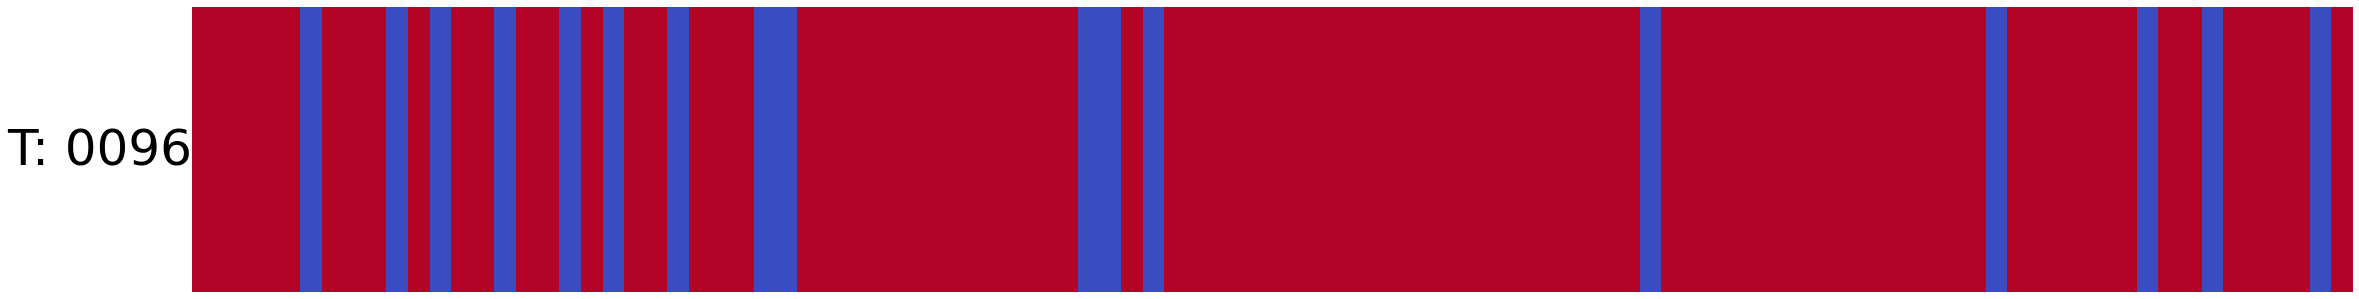

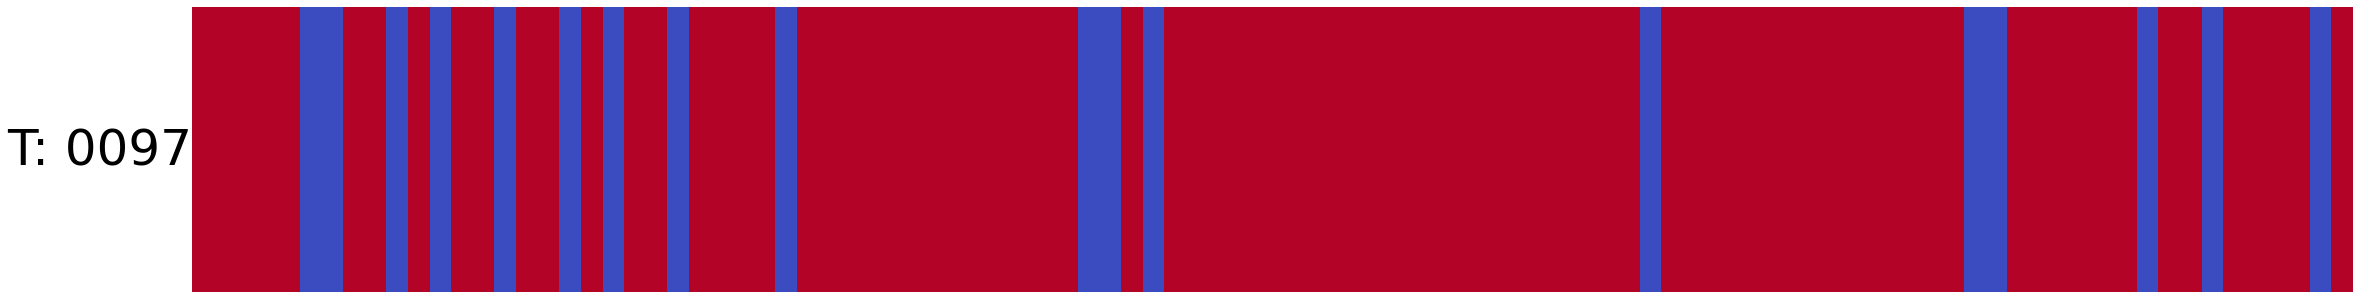

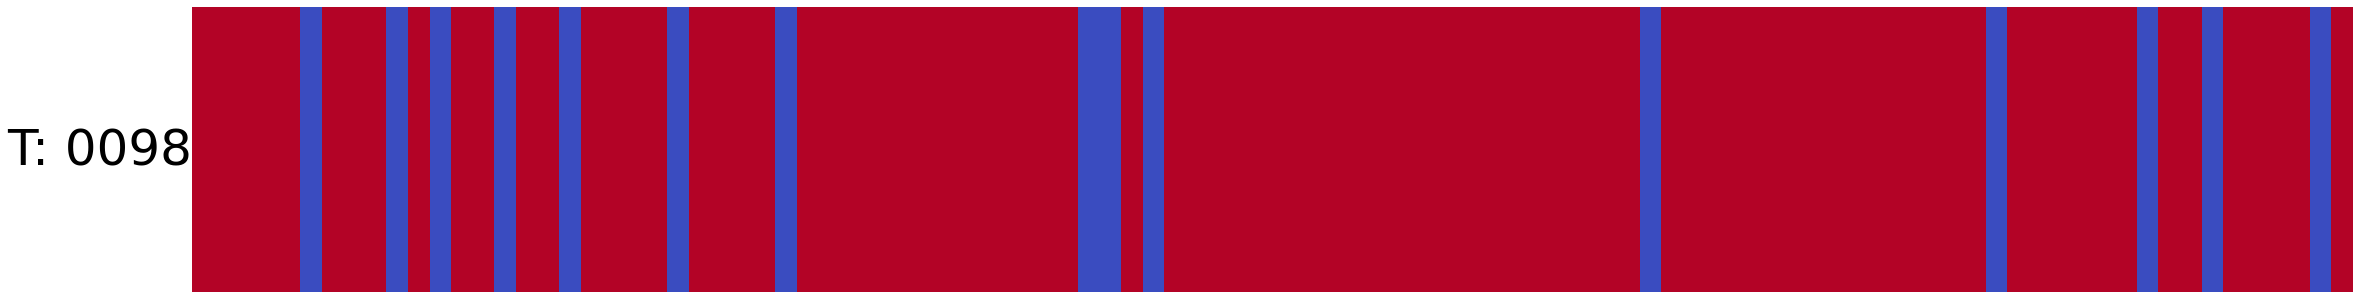

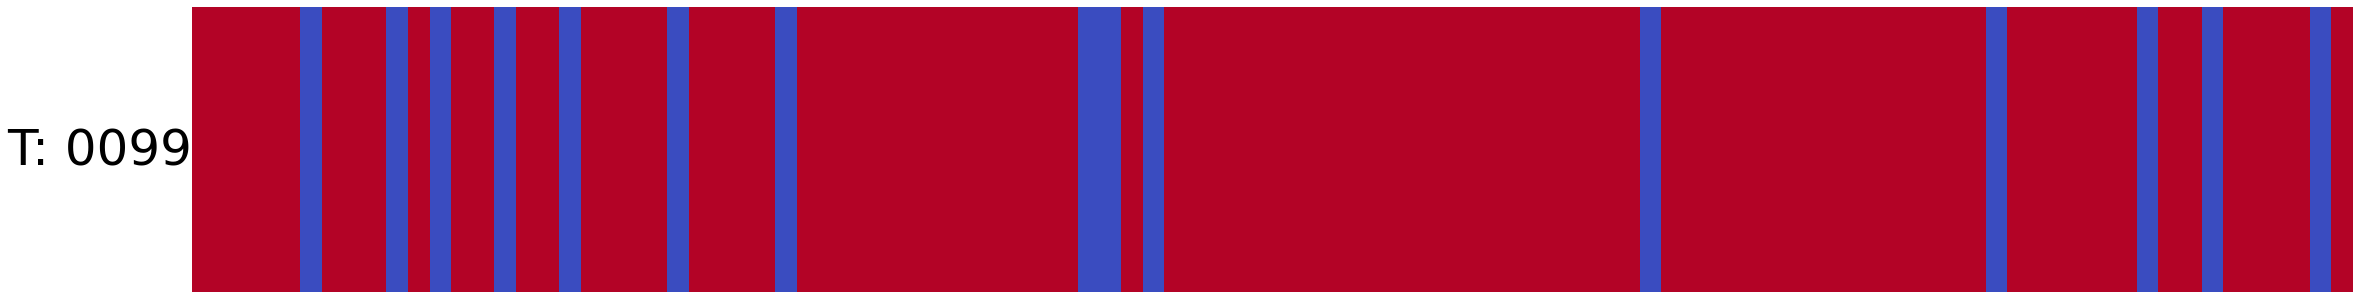

In [ ]:
posicao = np.random.randint(0,N)
posicao2 = np.random.randint(0,N)
posicao3 = np.random.randint(0,N)
posicao4 = np.random.randint(0,N)
posicao5 = np.random.randint(0,N)
estado = np.zeros((N), dtype=int)
duracao = np.zeros((N), dtype=int)

T = 100
D = 5
prob = 0.5
estado[posicao] = 1
estado[posicao2] = 1
estado[posicao3] = 1
estado[posicao4] = 1
estado[posicao5] = 1
duracao[posicao] = D
duracao[posicao2] = D
duracao[posicao3] = D
duracao[posicao4] = D
duracao[posicao5] = D

fig, axis = plt.subplots()
axis.imshow(np.vstack((estado,estado)), aspect='auto', vmin=0, vmax=1, cmap='coolwarm')
axis.set_axis_off()
fig.subplots_adjust(top=1, bottom=0.01, left=0, right=5)
fig.text(0,0.5, "T: %04d"%(0), va='center', ha='right', fontsize=50)
plt.show()

for t in range(1,T):
    new_estado = np.zeros((N), dtype=int)
    for n in range(N):

        if duracao[n] > 0:
            duracao[n] -= 1 # time-step
     
        indices = np.where(matriz[n,:]==1)[0] # lista de adjacência nó n
        viz_contaminado = False
        for idx in indices:
            if estado[idx] == 1: # vizinho está doente
                viz_contaminado = True
                break

        if np.random.random_sample()<=prob and viz_contaminado: # chance de contágio    
                new_estado[n] = 1
                duracao[n] = D
        else:
            if duracao[n] == 0:
                new_estado[n] = 0
            else:
                new_estado[n] = estado[n]

    estado = new_estado
    fig, axis = plt.subplots()
    axis.imshow(np.vstack((estado,estado)), vmin=0, vmax=1, aspect='auto', cmap='coolwarm')
    axis.set_axis_off()
    fig.subplots_adjust(top=1, bottom=0.01, left=0, right=5)
    fig.text(0,0.5, "T: %04d"%(t), va='center', ha='right', fontsize=50)
#     fig.text(0,0,"Tempo", name, va='center', ha='right', fontsize=10)

    plt.show()
    if len(np.nonzero(estado)[0]) == 0:
        break
    


Com uma quantidade inicial maior de indíviduos infectados, pode-se perceber que a propagação acontece mais rápido, pois quanto maior o número de infectados no início da simulação, mais chances os outros vértices têm de serem infectados. 